In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

D0508 04:11:56.363043926      13 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0508 04:11:56.363077792      13 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0508 04:11:56.363082194      13 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0508 04:11:56.363085030      13 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0508 04:11:56.363087646      13 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0508 04:11:56.363090457      13 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0508 04:11:56.363092931      13 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0508 04:11:56.

In [2]:
# import pandas as pd

# # Load the data
# data = pd.read_csv('/kaggle/working/GT.csv')

# # Remove all rows after the 3000th row
# data = data.iloc[:2000]

# # Save the updated data to a new CSV file
# data.to_csv('/kaggle/working/GT.csv', index=False)

In [3]:
data = pd.read_csv('/kaggle/input/isicgt25k/ISIC_2019_Training_GroundTruth.csv')
data.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
store_list = []
image_height = 350
image_width = 350
for i in tqdm(range(data.shape[0])):
    path = '/kaggle/input/isic2019/ISIC_2019_Training_Input/' + data['image'][i] + '.jpg'
    image_check = image.load_img(path, target_size=(image_height, image_width))
    image_check = image.img_to_array(image_check)
    # scaling the images
    image_check = image_check/255
    store_list.append(image_check)

  0%|          | 0/25331 [00:00<?, ?it/s]

  0%|          | 11/25331 [00:00<04:08, 101.88it/s]

  0%|          | 22/25331 [00:00<04:46, 88.20it/s] 

  0%|          | 31/25331 [00:00<05:04, 83.10it/s]

  0%|          | 40/25331 [00:00<05:16, 79.97it/s]

  0%|          | 49/25331 [00:00<05:22, 78.47it/s]

  0%|          | 57/25331 [00:00<05:25, 77.69it/s]

  0%|          | 66/25331 [00:00<05:13, 80.61it/s]

  0%|          | 77/25331 [00:00<04:53, 86.07it/s]

  0%|          | 86/25331 [00:01<05:19, 79.05it/s]

  0%|          | 94/25331 [00:01<05:26, 77.37it/s]

  0%|          | 102/25331 [00:01<05:27, 77.09it/s]

  0%|          | 110/25331 [00:01<05:28, 76.76it/s]

  0%|          | 118/25331 [00:01<05:28, 76.82it/s]

  1%|          | 127/25331 [00:01<05:18, 79.07it/s]

  1%|          | 135/25331 [00:01<05:44, 73.23it/s]

  1%|          | 143/25331 [00:01<05:38, 74.38it/s]

  1%|          | 153/25331 [00:01<05:18, 79.05it/s]

  1%|          | 166/25331 [00:02<04:41, 89.51it/s]

  1%|          | 175/25331 [00:02<04:51, 86.42it/s]

  1%|          | 184/25331 [00:02<05:10, 81.10it/s]

  1%|          | 193/25331 [00:02<05:22, 78.06it/s]

  1%|          | 202/25331 [00:02<05:13, 80.28it/s]

  1%|          | 211/25331 [00:02<05:05, 82.24it/s]

  1%|          | 220/25331 [00:02<04:57, 84.27it/s]

  1%|          | 229/25331 [00:02<04:57, 84.30it/s]

  1%|          | 238/25331 [00:02<05:04, 82.34it/s]

  1%|          | 247/25331 [00:03<05:09, 80.96it/s]

  1%|          | 256/25331 [00:03<05:10, 80.81it/s]

  1%|          | 265/25331 [00:03<05:18, 78.81it/s]

  1%|          | 273/25331 [00:03<05:44, 72.79it/s]

  1%|          | 281/25331 [00:03<06:11, 67.35it/s]

  1%|          | 288/25331 [00:03<06:57, 59.95it/s]

  1%|          | 295/25331 [00:03<07:00, 59.52it/s]

  1%|          | 302/25331 [00:03<07:08, 58.36it/s]

  1%|          | 308/25331 [00:04<07:12, 57.86it/s]

  1%|          | 314/25331 [00:04<07:20, 56.75it/s]

  1%|▏         | 320/25331 [00:04<07:19, 56.88it/s]

  1%|▏         | 326/25331 [00:04<07:22, 56.51it/s]

  1%|▏         | 332/25331 [00:04<07:25, 56.08it/s]

  1%|▏         | 338/25331 [00:04<07:17, 57.09it/s]

  1%|▏         | 344/25331 [00:04<07:26, 56.02it/s]

  1%|▏         | 351/25331 [00:04<07:09, 58.15it/s]

  1%|▏         | 358/25331 [00:04<06:51, 60.71it/s]

  1%|▏         | 365/25331 [00:05<06:42, 62.02it/s]

  1%|▏         | 372/25331 [00:05<06:39, 62.48it/s]

  1%|▏         | 379/25331 [00:05<06:45, 61.50it/s]

  2%|▏         | 386/25331 [00:05<06:38, 62.56it/s]

  2%|▏         | 393/25331 [00:05<06:43, 61.77it/s]

  2%|▏         | 400/25331 [00:05<06:56, 59.92it/s]

  2%|▏         | 407/25331 [00:05<07:00, 59.26it/s]

  2%|▏         | 413/25331 [00:05<07:16, 57.10it/s]

  2%|▏         | 419/25331 [00:05<07:25, 55.88it/s]

  2%|▏         | 425/25331 [00:06<07:30, 55.27it/s]

  2%|▏         | 431/25331 [00:06<07:33, 54.92it/s]

  2%|▏         | 437/25331 [00:06<07:45, 53.49it/s]

  2%|▏         | 443/25331 [00:06<07:44, 53.63it/s]

  2%|▏         | 449/25331 [00:06<07:32, 54.99it/s]

  2%|▏         | 455/25331 [00:06<07:27, 55.62it/s]

  2%|▏         | 462/25331 [00:06<06:59, 59.30it/s]

  2%|▏         | 472/25331 [00:06<05:56, 69.75it/s]

  2%|▏         | 481/25331 [00:06<05:31, 74.91it/s]

  2%|▏         | 489/25331 [00:07<05:52, 70.54it/s]

  2%|▏         | 497/25331 [00:07<06:14, 66.36it/s]

  2%|▏         | 504/25331 [00:07<06:46, 61.15it/s]

  2%|▏         | 511/25331 [00:07<06:35, 62.73it/s]

  2%|▏         | 518/25331 [00:07<06:28, 63.86it/s]

  2%|▏         | 525/25331 [00:07<06:22, 64.80it/s]

  2%|▏         | 532/25331 [00:07<06:33, 62.99it/s]

  2%|▏         | 539/25331 [00:07<06:31, 63.29it/s]

  2%|▏         | 546/25331 [00:07<06:31, 63.35it/s]

  2%|▏         | 553/25331 [00:08<06:24, 64.41it/s]

  2%|▏         | 560/25331 [00:08<06:20, 65.09it/s]

  2%|▏         | 567/25331 [00:08<06:20, 65.02it/s]

  2%|▏         | 574/25331 [00:08<06:24, 64.40it/s]

  2%|▏         | 581/25331 [00:08<06:24, 64.38it/s]

  2%|▏         | 588/25331 [00:08<06:22, 64.62it/s]

  2%|▏         | 595/25331 [00:08<06:47, 60.77it/s]

  2%|▏         | 602/25331 [00:08<06:37, 62.15it/s]

  2%|▏         | 609/25331 [00:08<06:33, 62.76it/s]

  2%|▏         | 616/25331 [00:09<06:23, 64.38it/s]

  2%|▏         | 623/25331 [00:09<06:30, 63.32it/s]

  2%|▏         | 630/25331 [00:09<06:27, 63.82it/s]

  3%|▎         | 637/25331 [00:09<06:25, 64.00it/s]

  3%|▎         | 644/25331 [00:09<06:27, 63.77it/s]

  3%|▎         | 651/25331 [00:09<06:18, 65.15it/s]

  3%|▎         | 658/25331 [00:09<06:15, 65.67it/s]

  3%|▎         | 665/25331 [00:09<06:48, 60.45it/s]

  3%|▎         | 672/25331 [00:09<06:36, 62.20it/s]

  3%|▎         | 679/25331 [00:10<06:24, 64.03it/s]

  3%|▎         | 686/25331 [00:10<06:20, 64.82it/s]

  3%|▎         | 695/25331 [00:10<05:58, 68.68it/s]

  3%|▎         | 703/25331 [00:10<05:45, 71.24it/s]

  3%|▎         | 711/25331 [00:10<05:50, 70.15it/s]

  3%|▎         | 720/25331 [00:10<05:36, 73.11it/s]

  3%|▎         | 729/25331 [00:10<05:24, 75.80it/s]

  3%|▎         | 737/25331 [00:10<05:32, 73.89it/s]

  3%|▎         | 745/25331 [00:10<05:47, 70.81it/s]

  3%|▎         | 753/25331 [00:11<05:43, 71.46it/s]

  3%|▎         | 761/25331 [00:11<05:34, 73.42it/s]

  3%|▎         | 769/25331 [00:11<05:38, 72.61it/s]

  3%|▎         | 777/25331 [00:11<05:38, 72.52it/s]

  3%|▎         | 785/25331 [00:11<05:41, 71.88it/s]

  3%|▎         | 793/25331 [00:11<05:46, 70.72it/s]

  3%|▎         | 801/25331 [00:11<05:51, 69.70it/s]

  3%|▎         | 809/25331 [00:11<05:47, 70.59it/s]

  3%|▎         | 817/25331 [00:11<05:50, 69.86it/s]

  3%|▎         | 825/25331 [00:12<05:48, 70.25it/s]

  3%|▎         | 833/25331 [00:12<05:41, 71.65it/s]

  3%|▎         | 841/25331 [00:12<05:33, 73.34it/s]

  3%|▎         | 849/25331 [00:12<05:37, 72.63it/s]

  3%|▎         | 857/25331 [00:12<05:44, 70.96it/s]

  3%|▎         | 865/25331 [00:12<05:40, 71.95it/s]

  3%|▎         | 873/25331 [00:12<05:33, 73.23it/s]

  3%|▎         | 881/25331 [00:12<05:36, 72.74it/s]

  4%|▎         | 889/25331 [00:12<05:31, 73.82it/s]

  4%|▎         | 897/25331 [00:13<05:23, 75.53it/s]

  4%|▎         | 905/25331 [00:13<05:28, 74.36it/s]

  4%|▎         | 913/25331 [00:13<05:22, 75.64it/s]

  4%|▎         | 921/25331 [00:13<05:23, 75.40it/s]

  4%|▎         | 929/25331 [00:13<05:19, 76.30it/s]

  4%|▎         | 937/25331 [00:13<05:20, 76.19it/s]

  4%|▎         | 945/25331 [00:13<05:20, 76.08it/s]

  4%|▍         | 953/25331 [00:13<05:23, 75.26it/s]

  4%|▍         | 961/25331 [00:13<05:26, 74.69it/s]

  4%|▍         | 969/25331 [00:14<05:31, 73.45it/s]

  4%|▍         | 977/25331 [00:14<05:33, 73.08it/s]

  4%|▍         | 985/25331 [00:14<05:24, 75.02it/s]

  4%|▍         | 994/25331 [00:14<05:16, 76.94it/s]

  4%|▍         | 1003/25331 [00:14<05:07, 79.04it/s]

  4%|▍         | 1011/25331 [00:14<05:07, 79.20it/s]

  4%|▍         | 1019/25331 [00:14<05:06, 79.37it/s]

  4%|▍         | 1027/25331 [00:14<05:07, 79.16it/s]

  4%|▍         | 1035/25331 [00:14<05:09, 78.38it/s]

  4%|▍         | 1043/25331 [00:14<05:18, 76.21it/s]

  4%|▍         | 1051/25331 [00:15<05:17, 76.49it/s]

  4%|▍         | 1059/25331 [00:15<05:13, 77.48it/s]

  4%|▍         | 1068/25331 [00:15<05:08, 78.62it/s]

  4%|▍         | 1076/25331 [00:15<05:12, 77.69it/s]

  4%|▍         | 1084/25331 [00:15<05:11, 77.82it/s]

  4%|▍         | 1092/25331 [00:15<05:17, 76.28it/s]

  4%|▍         | 1100/25331 [00:15<05:14, 76.93it/s]

  4%|▍         | 1108/25331 [00:15<05:20, 75.59it/s]

  4%|▍         | 1116/25331 [00:15<05:45, 70.04it/s]

  4%|▍         | 1124/25331 [00:16<05:52, 68.60it/s]

  4%|▍         | 1131/25331 [00:16<06:02, 66.83it/s]

  4%|▍         | 1138/25331 [00:16<06:02, 66.78it/s]

  5%|▍         | 1145/25331 [00:16<05:57, 67.60it/s]

  5%|▍         | 1152/25331 [00:16<06:03, 66.51it/s]

  5%|▍         | 1159/25331 [00:16<06:14, 64.50it/s]

  5%|▍         | 1167/25331 [00:16<05:58, 67.48it/s]

  5%|▍         | 1174/25331 [00:16<06:08, 65.54it/s]

  5%|▍         | 1182/25331 [00:16<05:55, 67.96it/s]

  5%|▍         | 1189/25331 [00:17<05:59, 67.23it/s]

  5%|▍         | 1196/25331 [00:17<06:01, 66.67it/s]

  5%|▍         | 1203/25331 [00:17<06:07, 65.58it/s]

  5%|▍         | 1211/25331 [00:17<05:52, 68.43it/s]

  5%|▍         | 1219/25331 [00:17<05:47, 69.33it/s]

  5%|▍         | 1227/25331 [00:17<05:44, 69.87it/s]

  5%|▍         | 1234/25331 [00:17<05:47, 69.32it/s]

  5%|▍         | 1241/25331 [00:17<05:55, 67.79it/s]

  5%|▍         | 1248/25331 [00:17<06:04, 66.00it/s]

  5%|▍         | 1255/25331 [00:18<06:13, 64.40it/s]

  5%|▍         | 1262/25331 [00:18<06:22, 62.94it/s]

  5%|▌         | 1269/25331 [00:18<06:22, 62.94it/s]

  5%|▌         | 1276/25331 [00:18<06:25, 62.43it/s]

  5%|▌         | 1283/25331 [00:18<06:45, 59.25it/s]

  5%|▌         | 1289/25331 [00:18<06:50, 58.52it/s]

  5%|▌         | 1296/25331 [00:18<06:33, 61.11it/s]

  5%|▌         | 1303/25331 [00:18<06:33, 61.11it/s]

  5%|▌         | 1310/25331 [00:18<06:22, 62.81it/s]

  5%|▌         | 1317/25331 [00:19<06:13, 64.34it/s]

  5%|▌         | 1324/25331 [00:19<06:04, 65.82it/s]

  5%|▌         | 1331/25331 [00:19<06:01, 66.42it/s]

  5%|▌         | 1338/25331 [00:19<06:04, 65.84it/s]

  5%|▌         | 1345/25331 [00:19<05:59, 66.67it/s]

  5%|▌         | 1352/25331 [00:19<06:06, 65.38it/s]

  5%|▌         | 1359/25331 [00:19<06:28, 61.70it/s]

  5%|▌         | 1366/25331 [00:19<06:26, 62.00it/s]

  5%|▌         | 1373/25331 [00:19<06:16, 63.62it/s]

  5%|▌         | 1380/25331 [00:20<06:12, 64.24it/s]

  5%|▌         | 1387/25331 [00:20<06:35, 60.47it/s]

  6%|▌         | 1394/25331 [00:20<06:33, 60.83it/s]

  6%|▌         | 1401/25331 [00:20<06:18, 63.28it/s]

  6%|▌         | 1408/25331 [00:20<06:24, 62.24it/s]

  6%|▌         | 1415/25331 [00:20<06:22, 62.56it/s]

  6%|▌         | 1422/25331 [00:20<06:15, 63.71it/s]

  6%|▌         | 1429/25331 [00:20<06:13, 64.00it/s]

  6%|▌         | 1436/25331 [00:20<06:08, 64.91it/s]

  6%|▌         | 1443/25331 [00:21<06:06, 65.13it/s]

  6%|▌         | 1450/25331 [00:21<06:26, 61.74it/s]

  6%|▌         | 1457/25331 [00:21<06:29, 61.30it/s]

  6%|▌         | 1464/25331 [00:21<06:25, 61.91it/s]

  6%|▌         | 1471/25331 [00:21<06:32, 60.75it/s]

  6%|▌         | 1478/25331 [00:21<06:39, 59.68it/s]

  6%|▌         | 1484/25331 [00:21<06:43, 59.10it/s]

  6%|▌         | 1490/25331 [00:21<07:02, 56.45it/s]

  6%|▌         | 1497/25331 [00:21<06:51, 57.93it/s]

  6%|▌         | 1504/25331 [00:22<06:39, 59.70it/s]

  6%|▌         | 1511/25331 [00:22<06:32, 60.73it/s]

  6%|▌         | 1518/25331 [00:22<06:25, 61.80it/s]

  6%|▌         | 1525/25331 [00:22<06:17, 63.11it/s]

  6%|▌         | 1532/25331 [00:22<06:14, 63.61it/s]

  6%|▌         | 1539/25331 [00:22<06:29, 61.11it/s]

  6%|▌         | 1546/25331 [00:22<06:19, 62.70it/s]

  6%|▌         | 1553/25331 [00:22<06:13, 63.72it/s]

  6%|▌         | 1560/25331 [00:22<06:07, 64.70it/s]

  6%|▌         | 1567/25331 [00:23<06:06, 64.92it/s]

  6%|▌         | 1574/25331 [00:23<06:10, 64.09it/s]

  6%|▌         | 1581/25331 [00:23<06:05, 64.96it/s]

  6%|▋         | 1588/25331 [00:23<05:59, 66.09it/s]

  6%|▋         | 1595/25331 [00:23<06:08, 64.43it/s]

  6%|▋         | 1602/25331 [00:23<06:10, 63.97it/s]

  6%|▋         | 1609/25331 [00:23<06:10, 63.99it/s]

  6%|▋         | 1616/25331 [00:23<06:14, 63.32it/s]

  6%|▋         | 1623/25331 [00:23<06:09, 64.12it/s]

  6%|▋         | 1630/25331 [00:24<06:02, 65.32it/s]

  6%|▋         | 1637/25331 [00:24<06:10, 63.88it/s]

  6%|▋         | 1644/25331 [00:24<06:12, 63.55it/s]

  7%|▋         | 1651/25331 [00:24<06:12, 63.50it/s]

  7%|▋         | 1658/25331 [00:24<06:23, 61.71it/s]

  7%|▋         | 1665/25331 [00:24<06:13, 63.30it/s]

  7%|▋         | 1672/25331 [00:24<06:15, 62.95it/s]

  7%|▋         | 1679/25331 [00:24<06:13, 63.25it/s]

  7%|▋         | 1686/25331 [00:24<06:18, 62.51it/s]

  7%|▋         | 1693/25331 [00:25<06:19, 62.28it/s]

  7%|▋         | 1700/25331 [00:25<06:12, 63.39it/s]

  7%|▋         | 1707/25331 [00:25<06:17, 62.60it/s]

  7%|▋         | 1714/25331 [00:25<06:32, 60.14it/s]

  7%|▋         | 1721/25331 [00:25<06:34, 59.91it/s]

  7%|▋         | 1728/25331 [00:25<06:21, 61.81it/s]

  7%|▋         | 1735/25331 [00:25<06:13, 63.12it/s]

  7%|▋         | 1742/25331 [00:25<06:15, 62.74it/s]

  7%|▋         | 1749/25331 [00:25<06:17, 62.52it/s]

  7%|▋         | 1756/25331 [00:26<06:26, 61.07it/s]

  7%|▋         | 1763/25331 [00:26<06:15, 62.80it/s]

  7%|▋         | 1770/25331 [00:26<06:19, 62.01it/s]

  7%|▋         | 1777/25331 [00:26<06:24, 61.27it/s]

  7%|▋         | 1784/25331 [00:26<06:16, 62.56it/s]

  7%|▋         | 1791/25331 [00:26<06:19, 62.00it/s]

  7%|▋         | 1798/25331 [00:26<06:10, 63.53it/s]

  7%|▋         | 1805/25331 [00:26<06:09, 63.60it/s]

  7%|▋         | 1812/25331 [00:26<06:03, 64.71it/s]

  7%|▋         | 1819/25331 [00:27<06:00, 65.19it/s]

  7%|▋         | 1826/25331 [00:27<05:54, 66.33it/s]

  7%|▋         | 1833/25331 [00:27<05:49, 67.19it/s]

  7%|▋         | 1840/25331 [00:27<05:50, 66.99it/s]

  7%|▋         | 1847/25331 [00:27<06:14, 62.62it/s]

  7%|▋         | 1855/25331 [00:27<06:00, 65.04it/s]

  7%|▋         | 1862/25331 [00:27<06:02, 64.81it/s]

  7%|▋         | 1869/25331 [00:27<05:59, 65.22it/s]

  7%|▋         | 1876/25331 [00:27<06:04, 64.35it/s]

  7%|▋         | 1883/25331 [00:28<06:06, 63.93it/s]

  7%|▋         | 1890/25331 [00:28<06:02, 64.74it/s]

  7%|▋         | 1897/25331 [00:28<05:55, 65.99it/s]

  8%|▊         | 1904/25331 [00:28<06:06, 63.86it/s]

  8%|▊         | 1911/25331 [00:28<06:02, 64.57it/s]

  8%|▊         | 1918/25331 [00:28<06:01, 64.68it/s]

  8%|▊         | 1925/25331 [00:28<05:56, 65.59it/s]

  8%|▊         | 1932/25331 [00:28<05:56, 65.57it/s]

  8%|▊         | 1939/25331 [00:28<05:54, 65.92it/s]

  8%|▊         | 1946/25331 [00:29<05:56, 65.54it/s]

  8%|▊         | 1953/25331 [00:29<05:54, 66.02it/s]

  8%|▊         | 1960/25331 [00:29<05:51, 66.43it/s]

  8%|▊         | 1967/25331 [00:29<05:53, 66.14it/s]

  8%|▊         | 1975/25331 [00:29<05:46, 67.49it/s]

  8%|▊         | 1983/25331 [00:29<05:40, 68.51it/s]

  8%|▊         | 1990/25331 [00:29<05:40, 68.50it/s]

  8%|▊         | 1998/25331 [00:29<05:41, 68.29it/s]

  8%|▊         | 2005/25331 [00:29<05:44, 67.78it/s]

  8%|▊         | 2013/25331 [00:29<05:39, 68.68it/s]

  8%|▊         | 2021/25331 [00:30<05:35, 69.40it/s]

  8%|▊         | 2028/25331 [00:30<05:40, 68.42it/s]

  8%|▊         | 2035/25331 [00:30<05:39, 68.63it/s]

  8%|▊         | 2042/25331 [00:30<05:44, 67.60it/s]

  8%|▊         | 2049/25331 [00:30<05:53, 65.89it/s]

  8%|▊         | 2056/25331 [00:30<05:52, 66.07it/s]

  8%|▊         | 2063/25331 [00:30<05:51, 66.28it/s]

  8%|▊         | 2070/25331 [00:30<05:54, 65.63it/s]

  8%|▊         | 2077/25331 [00:30<06:04, 63.88it/s]

  8%|▊         | 2084/25331 [00:31<06:04, 63.80it/s]

  8%|▊         | 2092/25331 [00:31<05:53, 65.76it/s]

  8%|▊         | 2099/25331 [00:31<05:51, 66.13it/s]

  8%|▊         | 2106/25331 [00:31<05:49, 66.48it/s]

  8%|▊         | 2113/25331 [00:31<05:49, 66.53it/s]

  8%|▊         | 2120/25331 [00:31<05:58, 64.68it/s]

  8%|▊         | 2127/25331 [00:31<06:14, 62.03it/s]

  8%|▊         | 2134/25331 [00:31<06:20, 60.92it/s]

  8%|▊         | 2141/25331 [00:31<06:12, 62.29it/s]

  8%|▊         | 2148/25331 [00:32<06:10, 62.52it/s]

  9%|▊         | 2155/25331 [00:32<06:09, 62.71it/s]

  9%|▊         | 2162/25331 [00:32<06:03, 63.69it/s]

  9%|▊         | 2169/25331 [00:32<06:00, 64.30it/s]

  9%|▊         | 2176/25331 [00:32<05:59, 64.47it/s]

  9%|▊         | 2184/25331 [00:32<05:47, 66.52it/s]

  9%|▊         | 2191/25331 [00:32<05:49, 66.27it/s]

  9%|▊         | 2198/25331 [00:32<05:46, 66.83it/s]

  9%|▊         | 2205/25331 [00:32<05:48, 66.29it/s]

  9%|▊         | 2212/25331 [00:33<05:49, 66.16it/s]

  9%|▉         | 2219/25331 [00:33<05:47, 66.46it/s]

  9%|▉         | 2226/25331 [00:33<05:48, 66.32it/s]

  9%|▉         | 2233/25331 [00:33<05:45, 66.86it/s]

  9%|▉         | 2240/25331 [00:33<05:42, 67.50it/s]

  9%|▉         | 2248/25331 [00:33<05:36, 68.55it/s]

  9%|▉         | 2255/25331 [00:33<05:38, 68.07it/s]

  9%|▉         | 2262/25331 [00:33<05:42, 67.42it/s]

  9%|▉         | 2269/25331 [00:33<05:43, 67.08it/s]

  9%|▉         | 2277/25331 [00:33<05:35, 68.73it/s]

  9%|▉         | 2284/25331 [00:34<05:56, 64.66it/s]

  9%|▉         | 2291/25331 [00:34<05:58, 64.22it/s]

  9%|▉         | 2298/25331 [00:34<06:12, 61.79it/s]

  9%|▉         | 2305/25331 [00:34<06:09, 62.29it/s]

  9%|▉         | 2312/25331 [00:34<06:13, 61.59it/s]

  9%|▉         | 2319/25331 [00:34<06:19, 60.72it/s]

  9%|▉         | 2326/25331 [00:34<06:28, 59.14it/s]

  9%|▉         | 2332/25331 [00:34<06:36, 58.05it/s]

  9%|▉         | 2338/25331 [00:35<06:36, 58.04it/s]

  9%|▉         | 2344/25331 [00:35<06:38, 57.75it/s]

  9%|▉         | 2350/25331 [00:35<06:39, 57.58it/s]

  9%|▉         | 2356/25331 [00:35<06:39, 57.48it/s]

  9%|▉         | 2363/25331 [00:35<06:30, 58.78it/s]

  9%|▉         | 2369/25331 [00:35<06:38, 57.62it/s]

  9%|▉         | 2375/25331 [00:35<06:35, 58.11it/s]

  9%|▉         | 2381/25331 [00:35<06:42, 56.98it/s]

  9%|▉         | 2387/25331 [00:35<06:47, 56.28it/s]

  9%|▉         | 2393/25331 [00:35<06:46, 56.45it/s]

  9%|▉         | 2399/25331 [00:36<06:41, 57.06it/s]

  9%|▉         | 2405/25331 [00:36<06:49, 55.97it/s]

 10%|▉         | 2411/25331 [00:36<06:50, 55.84it/s]

 10%|▉         | 2417/25331 [00:36<06:55, 55.14it/s]

 10%|▉         | 2423/25331 [00:36<06:46, 56.34it/s]

 10%|▉         | 2429/25331 [00:36<06:43, 56.71it/s]

 10%|▉         | 2435/25331 [00:36<06:42, 56.94it/s]

 10%|▉         | 2441/25331 [00:36<06:47, 56.18it/s]

 10%|▉         | 2447/25331 [00:36<06:43, 56.73it/s]

 10%|▉         | 2453/25331 [00:37<06:44, 56.60it/s]

 10%|▉         | 2459/25331 [00:37<07:02, 54.18it/s]

 10%|▉         | 2466/25331 [00:37<06:41, 56.96it/s]

 10%|▉         | 2473/25331 [00:37<06:33, 58.15it/s]

 10%|▉         | 2480/25331 [00:37<06:24, 59.45it/s]

 10%|▉         | 2486/25331 [00:37<06:26, 59.07it/s]

 10%|▉         | 2492/25331 [00:37<06:32, 58.19it/s]

 10%|▉         | 2498/25331 [00:37<06:30, 58.44it/s]

 10%|▉         | 2504/25331 [00:37<06:30, 58.41it/s]

 10%|▉         | 2510/25331 [00:38<06:32, 58.21it/s]

 10%|▉         | 2516/25331 [00:38<06:29, 58.52it/s]

 10%|▉         | 2522/25331 [00:38<06:35, 57.62it/s]

 10%|▉         | 2528/25331 [00:38<06:45, 56.19it/s]

 10%|█         | 2534/25331 [00:38<06:49, 55.71it/s]

 10%|█         | 2540/25331 [00:38<06:56, 54.67it/s]

 10%|█         | 2546/25331 [00:38<06:54, 55.01it/s]

 10%|█         | 2552/25331 [00:38<06:45, 56.15it/s]

 10%|█         | 2558/25331 [00:38<06:48, 55.70it/s]

 10%|█         | 2564/25331 [00:39<06:43, 56.37it/s]

 10%|█         | 2571/25331 [00:39<06:31, 58.17it/s]

 10%|█         | 2577/25331 [00:39<06:29, 58.35it/s]

 10%|█         | 2583/25331 [00:39<06:28, 58.48it/s]

 10%|█         | 2589/25331 [00:39<06:38, 57.11it/s]

 10%|█         | 2595/25331 [00:39<06:41, 56.66it/s]

 10%|█         | 2602/25331 [00:39<06:32, 57.88it/s]

 10%|█         | 2609/25331 [00:39<06:22, 59.34it/s]

 10%|█         | 2615/25331 [00:39<06:22, 59.36it/s]

 10%|█         | 2621/25331 [00:39<06:30, 58.22it/s]

 10%|█         | 2627/25331 [00:40<06:26, 58.71it/s]

 10%|█         | 2633/25331 [00:40<06:36, 57.30it/s]

 10%|█         | 2639/25331 [00:40<06:41, 56.50it/s]

 10%|█         | 2645/25331 [00:40<07:04, 53.48it/s]

 10%|█         | 2651/25331 [00:40<06:53, 54.82it/s]

 10%|█         | 2658/25331 [00:40<06:40, 56.60it/s]

 11%|█         | 2664/25331 [00:40<06:34, 57.50it/s]

 11%|█         | 2670/25331 [00:40<07:09, 52.77it/s]

 11%|█         | 2677/25331 [00:41<06:52, 54.90it/s]

 11%|█         | 2684/25331 [00:41<06:40, 56.56it/s]

 11%|█         | 2691/25331 [00:41<06:34, 57.44it/s]

 11%|█         | 2697/25331 [00:41<06:38, 56.85it/s]

 11%|█         | 2703/25331 [00:41<06:40, 56.44it/s]

 11%|█         | 2709/25331 [00:41<06:34, 57.40it/s]

 11%|█         | 2715/25331 [00:41<06:38, 56.70it/s]

 11%|█         | 2721/25331 [00:41<06:48, 55.38it/s]

 11%|█         | 2727/25331 [00:41<07:00, 53.77it/s]

 11%|█         | 2733/25331 [00:42<06:58, 54.00it/s]

 11%|█         | 2739/25331 [00:42<06:51, 54.96it/s]

 11%|█         | 2745/25331 [00:42<06:45, 55.75it/s]

 11%|█         | 2752/25331 [00:42<06:41, 56.18it/s]

 11%|█         | 2758/25331 [00:42<06:38, 56.71it/s]

 11%|█         | 2765/25331 [00:42<06:28, 58.11it/s]

 11%|█         | 2771/25331 [00:42<06:30, 57.78it/s]

 11%|█         | 2777/25331 [00:42<06:33, 57.37it/s]

 11%|█         | 2784/25331 [00:42<06:20, 59.32it/s]

 11%|█         | 2791/25331 [00:42<06:16, 59.91it/s]

 11%|█         | 2798/25331 [00:43<06:02, 62.08it/s]

 11%|█         | 2805/25331 [00:43<05:57, 63.06it/s]

 11%|█         | 2812/25331 [00:43<05:53, 63.70it/s]

 11%|█         | 2819/25331 [00:43<05:56, 63.19it/s]

 11%|█         | 2826/25331 [00:43<05:56, 63.05it/s]

 11%|█         | 2833/25331 [00:43<05:51, 64.01it/s]

 11%|█         | 2841/25331 [00:43<05:45, 65.17it/s]

 11%|█         | 2848/25331 [00:43<05:47, 64.78it/s]

 11%|█▏        | 2855/25331 [00:43<05:42, 65.59it/s]

 11%|█▏        | 2862/25331 [00:44<05:44, 65.28it/s]

 11%|█▏        | 2869/25331 [00:44<05:40, 66.04it/s]

 11%|█▏        | 2876/25331 [00:44<05:39, 66.10it/s]

 11%|█▏        | 2884/25331 [00:44<05:32, 67.53it/s]

 11%|█▏        | 2891/25331 [00:44<05:33, 67.27it/s]

 11%|█▏        | 2898/25331 [00:44<05:36, 66.76it/s]

 11%|█▏        | 2905/25331 [00:44<05:37, 66.40it/s]

 11%|█▏        | 2912/25331 [00:44<05:41, 65.70it/s]

 12%|█▏        | 2919/25331 [00:44<05:50, 63.87it/s]

 12%|█▏        | 2926/25331 [00:45<06:23, 58.36it/s]

 12%|█▏        | 2933/25331 [00:45<06:14, 59.88it/s]

 12%|█▏        | 2940/25331 [00:45<06:08, 60.79it/s]

 12%|█▏        | 2947/25331 [00:45<06:04, 61.42it/s]

 12%|█▏        | 2955/25331 [00:45<05:48, 64.26it/s]

 12%|█▏        | 2962/25331 [00:45<05:47, 64.32it/s]

 12%|█▏        | 2969/25331 [00:45<06:01, 61.92it/s]

 12%|█▏        | 2976/25331 [00:45<06:02, 61.63it/s]

 12%|█▏        | 2983/25331 [00:45<06:02, 61.73it/s]

 12%|█▏        | 2990/25331 [00:46<06:02, 61.69it/s]

 12%|█▏        | 2997/25331 [00:46<06:12, 59.90it/s]

 12%|█▏        | 3004/25331 [00:46<06:07, 60.68it/s]

 12%|█▏        | 3011/25331 [00:46<06:20, 58.67it/s]

 12%|█▏        | 3017/25331 [00:46<06:21, 58.50it/s]

 12%|█▏        | 3023/25331 [00:46<06:20, 58.67it/s]

 12%|█▏        | 3029/25331 [00:46<06:23, 58.15it/s]

 12%|█▏        | 3035/25331 [00:46<06:21, 58.38it/s]

 12%|█▏        | 3041/25331 [00:46<06:29, 57.27it/s]

 12%|█▏        | 3048/25331 [00:47<06:11, 59.91it/s]

 12%|█▏        | 3055/25331 [00:47<05:59, 61.96it/s]

 12%|█▏        | 3062/25331 [00:47<06:03, 61.26it/s]

 12%|█▏        | 3069/25331 [00:47<05:59, 61.97it/s]

 12%|█▏        | 3076/25331 [00:47<05:56, 62.41it/s]

 12%|█▏        | 3083/25331 [00:47<05:45, 64.32it/s]

 12%|█▏        | 3090/25331 [00:47<05:55, 62.63it/s]

 12%|█▏        | 3097/25331 [00:47<05:46, 64.17it/s]

 12%|█▏        | 3104/25331 [00:47<05:44, 64.61it/s]

 12%|█▏        | 3111/25331 [00:48<05:43, 64.70it/s]

 12%|█▏        | 3118/25331 [00:48<05:37, 65.85it/s]

 12%|█▏        | 3125/25331 [00:48<05:38, 65.69it/s]

 12%|█▏        | 3132/25331 [00:48<05:40, 65.27it/s]

 12%|█▏        | 3139/25331 [00:48<05:36, 65.93it/s]

 12%|█▏        | 3146/25331 [00:48<05:42, 64.73it/s]

 12%|█▏        | 3153/25331 [00:48<05:43, 64.58it/s]

 12%|█▏        | 3160/25331 [00:48<05:36, 65.92it/s]

 13%|█▎        | 3168/25331 [00:48<05:29, 67.22it/s]

 13%|█▎        | 3175/25331 [00:49<05:46, 63.86it/s]

 13%|█▎        | 3182/25331 [00:49<05:51, 62.93it/s]

 13%|█▎        | 3189/25331 [00:49<05:55, 62.33it/s]

 13%|█▎        | 3196/25331 [00:49<05:45, 64.15it/s]

 13%|█▎        | 3203/25331 [00:49<05:42, 64.64it/s]

 13%|█▎        | 3210/25331 [00:49<05:41, 64.84it/s]

 13%|█▎        | 3217/25331 [00:49<05:39, 65.18it/s]

 13%|█▎        | 3224/25331 [00:49<05:39, 65.05it/s]

 13%|█▎        | 3231/25331 [00:49<05:44, 64.20it/s]

 13%|█▎        | 3238/25331 [00:50<05:40, 64.86it/s]

 13%|█▎        | 3246/25331 [00:50<05:32, 66.47it/s]

 13%|█▎        | 3253/25331 [00:50<05:35, 65.71it/s]

 13%|█▎        | 3260/25331 [00:50<05:36, 65.51it/s]

 13%|█▎        | 3267/25331 [00:50<05:42, 64.43it/s]

 13%|█▎        | 3274/25331 [00:50<05:36, 65.51it/s]

 13%|█▎        | 3281/25331 [00:50<05:41, 64.65it/s]

 13%|█▎        | 3288/25331 [00:50<05:42, 64.36it/s]

 13%|█▎        | 3295/25331 [00:50<05:50, 62.81it/s]

 13%|█▎        | 3302/25331 [00:51<05:50, 62.80it/s]

 13%|█▎        | 3309/25331 [00:51<05:51, 62.64it/s]

 13%|█▎        | 3316/25331 [00:51<06:01, 60.87it/s]

 13%|█▎        | 3323/25331 [00:51<05:59, 61.15it/s]

 13%|█▎        | 3330/25331 [00:51<05:52, 62.46it/s]

 13%|█▎        | 3337/25331 [00:51<05:54, 62.03it/s]

 13%|█▎        | 3344/25331 [00:51<05:47, 63.26it/s]

 13%|█▎        | 3352/25331 [00:51<05:36, 65.36it/s]

 13%|█▎        | 3359/25331 [00:51<05:30, 66.48it/s]

 13%|█▎        | 3366/25331 [00:52<05:31, 66.33it/s]

 13%|█▎        | 3373/25331 [00:52<05:47, 63.20it/s]

 13%|█▎        | 3380/25331 [00:52<05:40, 64.56it/s]

 13%|█▎        | 3387/25331 [00:52<05:40, 64.44it/s]

 13%|█▎        | 3394/25331 [00:52<05:38, 64.73it/s]

 13%|█▎        | 3401/25331 [00:52<05:37, 65.02it/s]

 13%|█▎        | 3408/25331 [00:52<05:37, 64.90it/s]

 13%|█▎        | 3415/25331 [00:52<05:37, 64.88it/s]

 14%|█▎        | 3423/25331 [00:52<05:28, 66.62it/s]

 14%|█▎        | 3431/25331 [00:53<05:20, 68.25it/s]

 14%|█▎        | 3439/25331 [00:53<05:17, 68.96it/s]

 14%|█▎        | 3447/25331 [00:53<05:12, 70.02it/s]

 14%|█▎        | 3455/25331 [00:53<05:22, 67.86it/s]

 14%|█▎        | 3462/25331 [00:53<05:26, 67.03it/s]

 14%|█▎        | 3469/25331 [00:53<05:29, 66.45it/s]

 14%|█▎        | 3476/25331 [00:53<05:30, 66.04it/s]

 14%|█▎        | 3483/25331 [00:53<05:30, 66.18it/s]

 14%|█▍        | 3490/25331 [00:53<05:33, 65.41it/s]

 14%|█▍        | 3497/25331 [00:54<05:28, 66.37it/s]

 14%|█▍        | 3505/25331 [00:54<05:22, 67.59it/s]

 14%|█▍        | 3512/25331 [00:54<05:22, 67.76it/s]

 14%|█▍        | 3520/25331 [00:54<05:14, 69.39it/s]

 14%|█▍        | 3527/25331 [00:54<05:13, 69.50it/s]

 14%|█▍        | 3535/25331 [00:54<05:10, 70.20it/s]

 14%|█▍        | 3543/25331 [00:54<05:17, 68.73it/s]

 14%|█▍        | 3550/25331 [00:54<05:24, 67.17it/s]

 14%|█▍        | 3557/25331 [00:54<05:40, 64.01it/s]

 14%|█▍        | 3564/25331 [00:55<05:54, 61.40it/s]

 14%|█▍        | 3571/25331 [00:55<05:48, 62.48it/s]

 14%|█▍        | 3578/25331 [00:55<05:53, 61.54it/s]

 14%|█▍        | 3585/25331 [00:55<05:46, 62.74it/s]

 14%|█▍        | 3592/25331 [00:55<05:49, 62.22it/s]

 14%|█▍        | 3600/25331 [00:55<05:38, 64.18it/s]

 14%|█▍        | 3607/25331 [00:55<05:37, 64.44it/s]

 14%|█▍        | 3614/25331 [00:55<05:37, 64.41it/s]

 14%|█▍        | 3621/25331 [00:55<05:34, 64.93it/s]

 14%|█▍        | 3628/25331 [00:56<05:32, 65.25it/s]

 14%|█▍        | 3635/25331 [00:56<05:54, 61.20it/s]

 14%|█▍        | 3642/25331 [00:56<06:17, 57.52it/s]

 14%|█▍        | 3649/25331 [00:56<06:03, 59.72it/s]

 14%|█▍        | 3656/25331 [00:56<06:14, 57.86it/s]

 14%|█▍        | 3663/25331 [00:56<06:05, 59.34it/s]

 14%|█▍        | 3669/25331 [00:56<06:24, 56.35it/s]

 15%|█▍        | 3675/25331 [00:56<06:34, 54.85it/s]

 15%|█▍        | 3682/25331 [00:56<06:20, 56.90it/s]

 15%|█▍        | 3689/25331 [00:57<06:03, 59.59it/s]

 15%|█▍        | 3696/25331 [00:57<05:57, 60.55it/s]

 15%|█▍        | 3703/25331 [00:57<05:59, 60.08it/s]

 15%|█▍        | 3710/25331 [00:57<05:49, 61.84it/s]

 15%|█▍        | 3717/25331 [00:57<05:41, 63.33it/s]

 15%|█▍        | 3724/25331 [00:57<05:42, 63.08it/s]

 15%|█▍        | 3731/25331 [00:57<05:36, 64.24it/s]

 15%|█▍        | 3738/25331 [00:57<05:36, 64.15it/s]

 15%|█▍        | 3745/25331 [00:57<05:43, 62.80it/s]

 15%|█▍        | 3753/25331 [00:58<05:33, 64.75it/s]

 15%|█▍        | 3760/25331 [00:58<05:36, 64.08it/s]

 15%|█▍        | 3767/25331 [00:58<05:41, 63.17it/s]

 15%|█▍        | 3774/25331 [00:58<05:57, 60.32it/s]

 15%|█▍        | 3781/25331 [00:58<05:53, 60.91it/s]

 15%|█▍        | 3788/25331 [00:58<06:31, 55.07it/s]

 15%|█▍        | 3794/25331 [00:58<06:25, 55.86it/s]

 15%|█▌        | 3801/25331 [00:58<06:15, 57.26it/s]

 15%|█▌        | 3807/25331 [00:59<06:14, 57.44it/s]

 15%|█▌        | 3814/25331 [00:59<06:05, 58.87it/s]

 15%|█▌        | 3821/25331 [00:59<05:51, 61.12it/s]

 15%|█▌        | 3828/25331 [00:59<05:41, 62.94it/s]

 15%|█▌        | 3835/25331 [00:59<05:46, 62.12it/s]

 15%|█▌        | 3842/25331 [00:59<05:37, 63.72it/s]

 15%|█▌        | 3849/25331 [00:59<05:58, 59.84it/s]

 15%|█▌        | 3856/25331 [00:59<05:56, 60.27it/s]

 15%|█▌        | 3863/25331 [00:59<05:43, 62.57it/s]

 15%|█▌        | 3870/25331 [01:00<05:52, 60.87it/s]

 15%|█▌        | 3877/25331 [01:00<05:45, 62.02it/s]

 15%|█▌        | 3884/25331 [01:00<05:36, 63.80it/s]

 15%|█▌        | 3891/25331 [01:00<05:34, 64.10it/s]

 15%|█▌        | 3898/25331 [01:00<05:30, 64.77it/s]

 15%|█▌        | 3906/25331 [01:00<05:26, 65.65it/s]

 15%|█▌        | 3913/25331 [01:00<05:24, 65.97it/s]

 15%|█▌        | 3920/25331 [01:00<05:36, 63.61it/s]

 16%|█▌        | 3927/25331 [01:00<05:33, 64.24it/s]

 16%|█▌        | 3934/25331 [01:01<05:48, 61.31it/s]

 16%|█▌        | 3941/25331 [01:01<05:40, 62.75it/s]

 16%|█▌        | 3948/25331 [01:01<05:40, 62.71it/s]

 16%|█▌        | 3955/25331 [01:01<05:47, 61.58it/s]

 16%|█▌        | 3962/25331 [01:01<05:55, 60.12it/s]

 16%|█▌        | 3969/25331 [01:01<05:53, 60.39it/s]

 16%|█▌        | 3976/25331 [01:01<05:44, 61.97it/s]

 16%|█▌        | 3983/25331 [01:01<05:44, 62.01it/s]

 16%|█▌        | 3990/25331 [01:01<05:45, 61.70it/s]

 16%|█▌        | 3997/25331 [01:02<05:56, 59.77it/s]

 16%|█▌        | 4004/25331 [01:02<05:44, 61.89it/s]

 16%|█▌        | 4011/25331 [01:02<05:36, 63.44it/s]

 16%|█▌        | 4018/25331 [01:02<05:37, 63.15it/s]

 16%|█▌        | 4025/25331 [01:02<05:42, 62.21it/s]

 16%|█▌        | 4032/25331 [01:02<05:33, 63.95it/s]

 16%|█▌        | 4039/25331 [01:02<05:25, 65.35it/s]

 16%|█▌        | 4046/25331 [01:02<05:38, 62.83it/s]

 16%|█▌        | 4053/25331 [01:02<05:35, 63.47it/s]

 16%|█▌        | 4060/25331 [01:03<05:25, 65.28it/s]

 16%|█▌        | 4067/25331 [01:03<05:30, 64.33it/s]

 16%|█▌        | 4075/25331 [01:03<05:20, 66.23it/s]

 16%|█▌        | 4082/25331 [01:03<05:22, 65.98it/s]

 16%|█▌        | 4089/25331 [01:03<05:19, 66.59it/s]

 16%|█▌        | 4096/25331 [01:03<05:18, 66.57it/s]

 16%|█▌        | 4103/25331 [01:03<05:15, 67.25it/s]

 16%|█▌        | 4111/25331 [01:03<05:08, 68.87it/s]

 16%|█▋        | 4118/25331 [01:03<05:08, 68.77it/s]

 16%|█▋        | 4125/25331 [01:04<05:15, 67.31it/s]

 16%|█▋        | 4133/25331 [01:04<05:09, 68.45it/s]

 16%|█▋        | 4141/25331 [01:04<05:08, 68.67it/s]

 16%|█▋        | 4149/25331 [01:04<05:06, 69.02it/s]

 16%|█▋        | 4156/25331 [01:04<05:15, 67.13it/s]

 16%|█▋        | 4163/25331 [01:04<05:23, 65.53it/s]

 16%|█▋        | 4170/25331 [01:04<05:24, 65.26it/s]

 16%|█▋        | 4177/25331 [01:04<05:21, 65.88it/s]

 17%|█▋        | 4184/25331 [01:04<05:41, 62.00it/s]

 17%|█▋        | 4191/25331 [01:05<05:37, 62.59it/s]

 17%|█▋        | 4198/25331 [01:05<05:35, 62.97it/s]

 17%|█▋        | 4205/25331 [01:05<05:35, 63.02it/s]

 17%|█▋        | 4212/25331 [01:05<05:35, 62.91it/s]

 17%|█▋        | 4219/25331 [01:05<05:40, 62.05it/s]

 17%|█▋        | 4226/25331 [01:05<05:38, 62.40it/s]

 17%|█▋        | 4233/25331 [01:05<05:37, 62.44it/s]

 17%|█▋        | 4240/25331 [01:05<05:44, 61.26it/s]

 17%|█▋        | 4247/25331 [01:05<05:54, 59.45it/s]

 17%|█▋        | 4254/25331 [01:06<05:48, 60.46it/s]

 17%|█▋        | 4262/25331 [01:06<05:37, 62.42it/s]

 17%|█▋        | 4269/25331 [01:06<05:28, 64.11it/s]

 17%|█▋        | 4276/25331 [01:06<05:35, 62.69it/s]

 17%|█▋        | 4283/25331 [01:06<05:41, 61.69it/s]

 17%|█▋        | 4290/25331 [01:06<05:38, 62.09it/s]

 17%|█▋        | 4297/25331 [01:06<05:44, 61.03it/s]

 17%|█▋        | 4304/25331 [01:06<05:42, 61.48it/s]

 17%|█▋        | 4312/25331 [01:06<05:28, 64.08it/s]

 17%|█▋        | 4319/25331 [01:07<05:36, 62.44it/s]

 17%|█▋        | 4326/25331 [01:07<05:56, 58.85it/s]

 17%|█▋        | 4333/25331 [01:07<05:41, 61.53it/s]

 17%|█▋        | 4340/25331 [01:07<05:43, 61.07it/s]

 17%|█▋        | 4347/25331 [01:07<05:39, 61.79it/s]

 17%|█▋        | 4354/25331 [01:07<05:52, 59.51it/s]

 17%|█▋        | 4361/25331 [01:07<05:46, 60.49it/s]

 17%|█▋        | 4368/25331 [01:07<05:43, 61.05it/s]

 17%|█▋        | 4375/25331 [01:08<05:39, 61.64it/s]

 17%|█▋        | 4382/25331 [01:08<05:28, 63.75it/s]

 17%|█▋        | 4389/25331 [01:08<05:35, 62.41it/s]

 17%|█▋        | 4396/25331 [01:08<05:43, 60.90it/s]

 17%|█▋        | 4403/25331 [01:08<05:30, 63.24it/s]

 17%|█▋        | 4411/25331 [01:08<05:20, 65.34it/s]

 17%|█▋        | 4418/25331 [01:08<05:25, 64.16it/s]

 17%|█▋        | 4425/25331 [01:08<05:37, 61.88it/s]

 17%|█▋        | 4432/25331 [01:08<05:29, 63.36it/s]

 18%|█▊        | 4439/25331 [01:09<05:27, 63.75it/s]

 18%|█▊        | 4446/25331 [01:09<05:29, 63.43it/s]

 18%|█▊        | 4453/25331 [01:09<05:28, 63.58it/s]

 18%|█▊        | 4460/25331 [01:09<05:29, 63.28it/s]

 18%|█▊        | 4467/25331 [01:09<05:30, 63.17it/s]

 18%|█▊        | 4474/25331 [01:09<05:26, 63.96it/s]

 18%|█▊        | 4481/25331 [01:09<05:32, 62.62it/s]

 18%|█▊        | 4488/25331 [01:09<05:31, 62.89it/s]

 18%|█▊        | 4496/25331 [01:09<05:19, 65.17it/s]

 18%|█▊        | 4503/25331 [01:10<05:18, 65.45it/s]

 18%|█▊        | 4510/25331 [01:10<05:24, 64.20it/s]

 18%|█▊        | 4517/25331 [01:10<05:22, 64.55it/s]

 18%|█▊        | 4524/25331 [01:10<05:18, 65.32it/s]

 18%|█▊        | 4531/25331 [01:10<05:20, 64.85it/s]

 18%|█▊        | 4539/25331 [01:10<05:11, 66.80it/s]

 18%|█▊        | 4546/25331 [01:10<05:10, 67.04it/s]

 18%|█▊        | 4553/25331 [01:10<05:13, 66.20it/s]

 18%|█▊        | 4561/25331 [01:10<05:05, 67.95it/s]

 18%|█▊        | 4568/25331 [01:10<05:06, 67.74it/s]

 18%|█▊        | 4575/25331 [01:11<05:06, 67.63it/s]

 18%|█▊        | 4582/25331 [01:11<05:13, 66.29it/s]

 18%|█▊        | 4589/25331 [01:11<05:11, 66.51it/s]

 18%|█▊        | 4596/25331 [01:11<05:19, 64.93it/s]

 18%|█▊        | 4603/25331 [01:11<05:17, 65.34it/s]

 18%|█▊        | 4610/25331 [01:11<05:14, 65.86it/s]

 18%|█▊        | 4617/25331 [01:11<05:18, 65.01it/s]

 18%|█▊        | 4624/25331 [01:11<05:13, 66.09it/s]

 18%|█▊        | 4631/25331 [01:11<05:16, 65.37it/s]

 18%|█▊        | 4638/25331 [01:12<05:18, 64.92it/s]

 18%|█▊        | 4645/25331 [01:12<05:18, 64.85it/s]

 18%|█▊        | 4652/25331 [01:12<05:16, 65.37it/s]

 18%|█▊        | 4659/25331 [01:12<05:16, 65.31it/s]

 18%|█▊        | 4666/25331 [01:12<05:19, 64.77it/s]

 18%|█▊        | 4673/25331 [01:12<05:18, 64.91it/s]

 18%|█▊        | 4680/25331 [01:12<05:19, 64.61it/s]

 19%|█▊        | 4687/25331 [01:12<05:21, 64.28it/s]

 19%|█▊        | 4694/25331 [01:12<05:21, 64.09it/s]

 19%|█▊        | 4701/25331 [01:13<05:17, 65.05it/s]

 19%|█▊        | 4708/25331 [01:13<05:11, 66.27it/s]

 19%|█▊        | 4715/25331 [01:13<05:17, 64.94it/s]

 19%|█▊        | 4722/25331 [01:13<05:38, 60.94it/s]

 19%|█▊        | 4729/25331 [01:13<05:44, 59.81it/s]

 19%|█▊        | 4736/25331 [01:13<05:38, 60.77it/s]

 19%|█▊        | 4743/25331 [01:13<05:29, 62.50it/s]

 19%|█▉        | 4750/25331 [01:13<05:20, 64.15it/s]

 19%|█▉        | 4758/25331 [01:13<05:11, 66.10it/s]

 19%|█▉        | 4766/25331 [01:14<05:07, 66.96it/s]

 19%|█▉        | 4773/25331 [01:14<05:09, 66.34it/s]

 19%|█▉        | 4781/25331 [01:14<05:03, 67.71it/s]

 19%|█▉        | 4788/25331 [01:14<05:09, 66.31it/s]

 19%|█▉        | 4795/25331 [01:14<05:08, 66.66it/s]

 19%|█▉        | 4802/25331 [01:14<05:12, 65.72it/s]

 19%|█▉        | 4809/25331 [01:14<05:10, 66.06it/s]

 19%|█▉        | 4816/25331 [01:14<05:08, 66.50it/s]

 19%|█▉        | 4823/25331 [01:14<05:20, 63.97it/s]

 19%|█▉        | 4830/25331 [01:15<05:16, 64.87it/s]

 19%|█▉        | 4837/25331 [01:15<05:12, 65.49it/s]

 19%|█▉        | 4844/25331 [01:15<05:13, 65.33it/s]

 19%|█▉        | 4851/25331 [01:15<05:10, 65.98it/s]

 19%|█▉        | 4858/25331 [01:15<05:14, 65.01it/s]

 19%|█▉        | 4865/25331 [01:15<05:18, 64.17it/s]

 19%|█▉        | 4872/25331 [01:15<05:20, 63.89it/s]

 19%|█▉        | 4879/25331 [01:15<05:20, 63.74it/s]

 19%|█▉        | 4886/25331 [01:15<05:24, 63.03it/s]

 19%|█▉        | 4893/25331 [01:16<05:32, 61.56it/s]

 19%|█▉        | 4900/25331 [01:16<05:28, 62.11it/s]

 19%|█▉        | 4907/25331 [01:16<05:32, 61.47it/s]

 19%|█▉        | 4914/25331 [01:16<05:31, 61.61it/s]

 19%|█▉        | 4921/25331 [01:16<05:33, 61.28it/s]

 19%|█▉        | 4928/25331 [01:16<05:27, 62.32it/s]

 19%|█▉        | 4935/25331 [01:16<05:22, 63.17it/s]

 20%|█▉        | 4942/25331 [01:16<06:08, 55.28it/s]

 20%|█▉        | 4949/25331 [01:16<05:52, 57.83it/s]

 20%|█▉        | 4956/25331 [01:17<05:40, 59.90it/s]

 20%|█▉        | 4963/25331 [01:17<05:27, 62.27it/s]

 20%|█▉        | 4970/25331 [01:17<05:37, 60.39it/s]

 20%|█▉        | 4977/25331 [01:17<05:28, 61.93it/s]

 20%|█▉        | 4984/25331 [01:17<05:23, 62.85it/s]

 20%|█▉        | 4991/25331 [01:17<05:20, 63.55it/s]

 20%|█▉        | 4998/25331 [01:17<05:14, 64.60it/s]

 20%|█▉        | 5005/25331 [01:17<05:11, 65.31it/s]

 20%|█▉        | 5012/25331 [01:17<05:13, 64.82it/s]

 20%|█▉        | 5019/25331 [01:18<05:21, 63.25it/s]

 20%|█▉        | 5026/25331 [01:18<05:51, 57.80it/s]

 20%|█▉        | 5032/25331 [01:18<05:48, 58.32it/s]

 20%|█▉        | 5039/25331 [01:18<05:46, 58.64it/s]

 20%|█▉        | 5046/25331 [01:18<05:36, 60.26it/s]

 20%|█▉        | 5053/25331 [01:18<05:29, 61.62it/s]

 20%|█▉        | 5060/25331 [01:18<05:33, 60.87it/s]

 20%|██        | 5067/25331 [01:18<05:43, 59.05it/s]

 20%|██        | 5073/25331 [01:19<06:08, 55.04it/s]

 20%|██        | 5080/25331 [01:19<05:52, 57.43it/s]

 20%|██        | 5087/25331 [01:19<05:41, 59.23it/s]

 20%|██        | 5094/25331 [01:19<05:32, 60.84it/s]

 20%|██        | 5101/25331 [01:19<05:23, 62.61it/s]

 20%|██        | 5108/25331 [01:19<05:29, 61.31it/s]

 20%|██        | 5115/25331 [01:19<05:26, 61.89it/s]

 20%|██        | 5122/25331 [01:19<05:26, 61.87it/s]

 20%|██        | 5129/25331 [01:19<05:25, 62.13it/s]

 20%|██        | 5136/25331 [01:20<05:19, 63.12it/s]

 20%|██        | 5143/25331 [01:20<05:24, 62.15it/s]

 20%|██        | 5151/25331 [01:20<05:10, 65.09it/s]

 20%|██        | 5158/25331 [01:20<05:04, 66.15it/s]

 20%|██        | 5165/25331 [01:20<05:23, 62.32it/s]

 20%|██        | 5172/25331 [01:20<05:19, 63.19it/s]

 20%|██        | 5180/25331 [01:20<05:09, 65.14it/s]

 20%|██        | 5187/25331 [01:20<05:15, 63.92it/s]

 21%|██        | 5194/25331 [01:20<05:14, 63.96it/s]

 21%|██        | 5201/25331 [01:21<05:22, 62.42it/s]

 21%|██        | 5208/25331 [01:21<05:23, 62.16it/s]

 21%|██        | 5215/25331 [01:21<05:15, 63.81it/s]

 21%|██        | 5222/25331 [01:21<05:24, 62.06it/s]

 21%|██        | 5229/25331 [01:21<05:39, 59.27it/s]

 21%|██        | 5235/25331 [01:21<05:54, 56.74it/s]

 21%|██        | 5241/25331 [01:21<05:53, 56.77it/s]

 21%|██        | 5248/25331 [01:21<05:42, 58.71it/s]

 21%|██        | 5255/25331 [01:21<05:35, 59.80it/s]

 21%|██        | 5262/25331 [01:22<05:31, 60.53it/s]

 21%|██        | 5269/25331 [01:22<05:29, 60.95it/s]

 21%|██        | 5276/25331 [01:22<05:36, 59.62it/s]

 21%|██        | 5283/25331 [01:22<05:28, 61.09it/s]

 21%|██        | 5290/25331 [01:22<05:25, 61.52it/s]

 21%|██        | 5297/25331 [01:22<05:15, 63.53it/s]

 21%|██        | 5305/25331 [01:22<05:05, 65.45it/s]

 21%|██        | 5312/25331 [01:22<05:00, 66.59it/s]

 21%|██        | 5319/25331 [01:22<05:03, 66.05it/s]

 21%|██        | 5326/25331 [01:23<05:03, 65.92it/s]

 21%|██        | 5333/25331 [01:23<05:11, 64.25it/s]

 21%|██        | 5340/25331 [01:23<05:05, 65.46it/s]

 21%|██        | 5347/25331 [01:23<05:07, 64.91it/s]

 21%|██        | 5354/25331 [01:23<05:01, 66.30it/s]

 21%|██        | 5361/25331 [01:23<04:58, 66.83it/s]

 21%|██        | 5368/25331 [01:23<05:06, 65.08it/s]

 21%|██        | 5376/25331 [01:23<05:01, 66.28it/s]

 21%|██▏       | 5383/25331 [01:23<04:56, 67.23it/s]

 21%|██▏       | 5390/25331 [01:24<05:12, 63.89it/s]

 21%|██▏       | 5397/25331 [01:24<05:11, 63.91it/s]

 21%|██▏       | 5404/25331 [01:24<05:06, 65.12it/s]

 21%|██▏       | 5411/25331 [01:24<05:09, 64.30it/s]

 21%|██▏       | 5418/25331 [01:24<05:05, 65.17it/s]

 21%|██▏       | 5425/25331 [01:24<05:08, 64.52it/s]

 21%|██▏       | 5432/25331 [01:24<05:03, 65.61it/s]

 21%|██▏       | 5439/25331 [01:24<05:00, 66.10it/s]

 21%|██▏       | 5446/25331 [01:24<05:03, 65.56it/s]

 22%|██▏       | 5453/25331 [01:24<05:06, 64.95it/s]

 22%|██▏       | 5460/25331 [01:25<05:12, 63.50it/s]

 22%|██▏       | 5467/25331 [01:25<05:14, 63.16it/s]

 22%|██▏       | 5474/25331 [01:25<05:11, 63.74it/s]

 22%|██▏       | 5481/25331 [01:25<05:10, 63.99it/s]

 22%|██▏       | 5488/25331 [01:25<05:10, 63.86it/s]

 22%|██▏       | 5495/25331 [01:25<05:07, 64.57it/s]

 22%|██▏       | 5502/25331 [01:25<05:12, 63.53it/s]

 22%|██▏       | 5509/25331 [01:25<05:21, 61.60it/s]

 22%|██▏       | 5516/25331 [01:26<05:35, 59.01it/s]

 22%|██▏       | 5523/25331 [01:26<05:23, 61.15it/s]

 22%|██▏       | 5530/25331 [01:26<05:15, 62.77it/s]

 22%|██▏       | 5537/25331 [01:26<05:18, 62.06it/s]

 22%|██▏       | 5544/25331 [01:26<05:14, 62.93it/s]

 22%|██▏       | 5551/25331 [01:26<05:10, 63.62it/s]

 22%|██▏       | 5558/25331 [01:26<05:08, 64.06it/s]

 22%|██▏       | 5565/25331 [01:26<05:12, 63.34it/s]

 22%|██▏       | 5573/25331 [01:26<05:00, 65.86it/s]

 22%|██▏       | 5580/25331 [01:26<05:00, 65.66it/s]

 22%|██▏       | 5587/25331 [01:27<04:59, 65.82it/s]

 22%|██▏       | 5594/25331 [01:27<04:59, 65.91it/s]

 22%|██▏       | 5601/25331 [01:27<04:59, 65.91it/s]

 22%|██▏       | 5608/25331 [01:27<04:58, 66.12it/s]

 22%|██▏       | 5615/25331 [01:27<04:57, 66.26it/s]

 22%|██▏       | 5623/25331 [01:27<04:52, 67.44it/s]

 22%|██▏       | 5630/25331 [01:27<05:19, 61.61it/s]

 22%|██▏       | 5637/25331 [01:27<05:09, 63.66it/s]

 22%|██▏       | 5644/25331 [01:27<05:09, 63.61it/s]

 22%|██▏       | 5652/25331 [01:28<04:56, 66.27it/s]

 22%|██▏       | 5659/25331 [01:28<04:58, 65.98it/s]

 22%|██▏       | 5666/25331 [01:28<04:56, 66.28it/s]

 22%|██▏       | 5673/25331 [01:28<04:57, 66.07it/s]

 22%|██▏       | 5680/25331 [01:28<05:10, 63.32it/s]

 22%|██▏       | 5688/25331 [01:28<05:01, 65.10it/s]

 22%|██▏       | 5696/25331 [01:28<04:51, 67.25it/s]

 23%|██▎       | 5703/25331 [01:28<04:52, 67.09it/s]

 23%|██▎       | 5710/25331 [01:28<04:52, 66.97it/s]

 23%|██▎       | 5717/25331 [01:29<04:52, 67.02it/s]

 23%|██▎       | 5724/25331 [01:29<04:52, 66.96it/s]

 23%|██▎       | 5731/25331 [01:29<04:52, 66.92it/s]

 23%|██▎       | 5738/25331 [01:29<04:49, 67.68it/s]

 23%|██▎       | 5745/25331 [01:29<04:55, 66.35it/s]

 23%|██▎       | 5752/25331 [01:29<04:53, 66.75it/s]

 23%|██▎       | 5759/25331 [01:29<04:52, 66.81it/s]

 23%|██▎       | 5766/25331 [01:29<04:58, 65.61it/s]

 23%|██▎       | 5773/25331 [01:29<04:59, 65.32it/s]

 23%|██▎       | 5780/25331 [01:30<04:53, 66.53it/s]

 23%|██▎       | 5787/25331 [01:30<05:07, 63.53it/s]

 23%|██▎       | 5794/25331 [01:30<05:08, 63.30it/s]

 23%|██▎       | 5801/25331 [01:30<05:05, 63.98it/s]

 23%|██▎       | 5808/25331 [01:30<05:03, 64.40it/s]

 23%|██▎       | 5815/25331 [01:30<05:04, 64.07it/s]

 23%|██▎       | 5822/25331 [01:30<05:07, 63.42it/s]

 23%|██▎       | 5829/25331 [01:30<05:04, 64.06it/s]

 23%|██▎       | 5836/25331 [01:30<05:06, 63.58it/s]

 23%|██▎       | 5843/25331 [01:31<05:02, 64.48it/s]

 23%|██▎       | 5850/25331 [01:31<05:18, 61.07it/s]

 23%|██▎       | 5857/25331 [01:31<05:23, 60.24it/s]

 23%|██▎       | 5864/25331 [01:31<05:26, 59.64it/s]

 23%|██▎       | 5870/25331 [01:31<05:51, 55.37it/s]

 23%|██▎       | 5876/25331 [01:31<06:16, 51.73it/s]

 23%|██▎       | 5882/25331 [01:31<06:06, 53.13it/s]

 23%|██▎       | 5889/25331 [01:31<05:43, 56.54it/s]

 23%|██▎       | 5896/25331 [01:31<05:29, 58.91it/s]

 23%|██▎       | 5902/25331 [01:32<05:35, 57.96it/s]

 23%|██▎       | 5909/25331 [01:32<05:27, 59.23it/s]

 23%|██▎       | 5915/25331 [01:32<05:34, 57.98it/s]

 23%|██▎       | 5922/25331 [01:32<05:24, 59.77it/s]

 23%|██▎       | 5928/25331 [01:32<05:24, 59.79it/s]

 23%|██▎       | 5934/25331 [01:32<05:24, 59.77it/s]

 23%|██▎       | 5940/25331 [01:32<05:34, 58.05it/s]

 23%|██▎       | 5947/25331 [01:32<05:22, 60.05it/s]

 24%|██▎       | 5954/25331 [01:32<05:09, 62.64it/s]

 24%|██▎       | 5961/25331 [01:33<05:01, 64.20it/s]

 24%|██▎       | 5968/25331 [01:33<05:01, 64.12it/s]

 24%|██▎       | 5975/25331 [01:33<05:03, 63.82it/s]

 24%|██▎       | 5982/25331 [01:33<05:03, 63.73it/s]

 24%|██▎       | 5989/25331 [01:33<05:07, 62.91it/s]

 24%|██▎       | 5996/25331 [01:33<05:20, 60.24it/s]

 24%|██▎       | 6003/25331 [01:33<05:15, 61.17it/s]

 24%|██▎       | 6010/25331 [01:33<05:09, 62.52it/s]

 24%|██▍       | 6017/25331 [01:33<05:08, 62.64it/s]

 24%|██▍       | 6024/25331 [01:34<05:07, 62.79it/s]

 24%|██▍       | 6031/25331 [01:34<05:06, 63.03it/s]

 24%|██▍       | 6038/25331 [01:34<05:25, 59.29it/s]

 24%|██▍       | 6045/25331 [01:34<05:16, 60.86it/s]

 24%|██▍       | 6052/25331 [01:34<05:07, 62.71it/s]

 24%|██▍       | 6059/25331 [01:34<05:06, 62.93it/s]

 24%|██▍       | 6066/25331 [01:34<05:06, 62.81it/s]

 24%|██▍       | 6074/25331 [01:34<04:55, 65.06it/s]

 24%|██▍       | 6081/25331 [01:35<05:35, 57.37it/s]

 24%|██▍       | 6088/25331 [01:35<05:25, 59.08it/s]

 24%|██▍       | 6095/25331 [01:35<06:18, 50.81it/s]

 24%|██▍       | 6101/25331 [01:35<06:20, 50.54it/s]

 24%|██▍       | 6108/25331 [01:35<05:51, 54.68it/s]

 24%|██▍       | 6115/25331 [01:35<05:28, 58.44it/s]

 24%|██▍       | 6122/25331 [01:35<05:19, 60.10it/s]

 24%|██▍       | 6129/25331 [01:35<05:08, 62.34it/s]

 24%|██▍       | 6136/25331 [01:35<05:02, 63.40it/s]

 24%|██▍       | 6143/25331 [01:36<05:06, 62.58it/s]

 24%|██▍       | 6150/25331 [01:36<04:59, 63.94it/s]

 24%|██▍       | 6157/25331 [01:36<05:15, 60.77it/s]

 24%|██▍       | 6164/25331 [01:36<05:31, 57.78it/s]

 24%|██▍       | 6171/25331 [01:36<05:18, 60.24it/s]

 24%|██▍       | 6178/25331 [01:36<05:17, 60.37it/s]

 24%|██▍       | 6185/25331 [01:36<05:26, 58.66it/s]

 24%|██▍       | 6191/25331 [01:36<05:57, 53.56it/s]

 24%|██▍       | 6198/25331 [01:37<05:44, 55.51it/s]

 24%|██▍       | 6205/25331 [01:37<05:33, 57.31it/s]

 25%|██▍       | 6212/25331 [01:37<05:23, 59.17it/s]

 25%|██▍       | 6219/25331 [01:37<05:17, 60.23it/s]

 25%|██▍       | 6226/25331 [01:37<05:12, 61.12it/s]

 25%|██▍       | 6233/25331 [01:37<05:06, 62.35it/s]

 25%|██▍       | 6240/25331 [01:37<05:01, 63.25it/s]

 25%|██▍       | 6247/25331 [01:37<04:56, 64.46it/s]

 25%|██▍       | 6255/25331 [01:37<04:48, 66.03it/s]

 25%|██▍       | 6262/25331 [01:38<05:06, 62.15it/s]

 25%|██▍       | 6269/25331 [01:38<04:57, 64.05it/s]

 25%|██▍       | 6276/25331 [01:38<04:51, 65.34it/s]

 25%|██▍       | 6283/25331 [01:38<04:49, 65.79it/s]

 25%|██▍       | 6290/25331 [01:38<04:54, 64.75it/s]

 25%|██▍       | 6297/25331 [01:38<04:59, 63.46it/s]

 25%|██▍       | 6304/25331 [01:38<05:00, 63.27it/s]

 25%|██▍       | 6311/25331 [01:38<05:04, 62.41it/s]

 25%|██▍       | 6318/25331 [01:38<05:00, 63.38it/s]

 25%|██▍       | 6325/25331 [01:39<04:54, 64.52it/s]

 25%|██▍       | 6332/25331 [01:39<04:55, 64.40it/s]

 25%|██▌       | 6339/25331 [01:39<05:01, 63.08it/s]

 25%|██▌       | 6346/25331 [01:39<05:03, 62.65it/s]

 25%|██▌       | 6353/25331 [01:39<05:09, 61.29it/s]

 25%|██▌       | 6360/25331 [01:39<05:01, 62.90it/s]

 25%|██▌       | 6367/25331 [01:39<05:10, 61.10it/s]

 25%|██▌       | 6375/25331 [01:39<04:56, 63.87it/s]

 25%|██▌       | 6382/25331 [01:39<04:54, 64.40it/s]

 25%|██▌       | 6389/25331 [01:40<04:51, 65.03it/s]

 25%|██▌       | 6396/25331 [01:40<04:48, 65.67it/s]

 25%|██▌       | 6403/25331 [01:40<04:43, 66.77it/s]

 25%|██▌       | 6410/25331 [01:40<04:47, 65.79it/s]

 25%|██▌       | 6417/25331 [01:40<04:55, 64.09it/s]

 25%|██▌       | 6424/25331 [01:40<05:10, 60.89it/s]

 25%|██▌       | 6431/25331 [01:40<05:14, 60.07it/s]

 25%|██▌       | 6438/25331 [01:40<05:20, 58.92it/s]

 25%|██▌       | 6445/25331 [01:40<05:10, 60.83it/s]

 25%|██▌       | 6452/25331 [01:41<05:07, 61.46it/s]

 25%|██▌       | 6459/25331 [01:41<05:05, 61.72it/s]

 26%|██▌       | 6466/25331 [01:41<05:30, 57.09it/s]

 26%|██▌       | 6473/25331 [01:41<05:37, 55.94it/s]

 26%|██▌       | 6480/25331 [01:41<05:22, 58.53it/s]

 26%|██▌       | 6487/25331 [01:41<05:08, 61.02it/s]

 26%|██▌       | 6494/25331 [01:41<05:04, 61.80it/s]

 26%|██▌       | 6501/25331 [01:41<05:07, 61.14it/s]

 26%|██▌       | 6508/25331 [01:41<05:13, 59.97it/s]

 26%|██▌       | 6515/25331 [01:42<05:18, 59.02it/s]

 26%|██▌       | 6522/25331 [01:42<05:08, 61.02it/s]

 26%|██▌       | 6529/25331 [01:42<05:01, 62.28it/s]

 26%|██▌       | 6536/25331 [01:42<05:04, 61.67it/s]

 26%|██▌       | 6543/25331 [01:42<05:06, 61.29it/s]

 26%|██▌       | 6550/25331 [01:42<05:01, 62.39it/s]

 26%|██▌       | 6557/25331 [01:42<04:54, 63.64it/s]

 26%|██▌       | 6564/25331 [01:42<05:23, 58.05it/s]

 26%|██▌       | 6570/25331 [01:43<05:21, 58.33it/s]

 26%|██▌       | 6577/25331 [01:43<05:12, 59.99it/s]

 26%|██▌       | 6584/25331 [01:43<05:19, 58.68it/s]

 26%|██▌       | 6591/25331 [01:43<05:05, 61.40it/s]

 26%|██▌       | 6598/25331 [01:43<05:18, 58.88it/s]

 26%|██▌       | 6604/25331 [01:43<05:17, 58.89it/s]

 26%|██▌       | 6611/25331 [01:43<05:04, 61.45it/s]

 26%|██▌       | 6618/25331 [01:43<04:55, 63.40it/s]

 26%|██▌       | 6625/25331 [01:43<05:02, 61.92it/s]

 26%|██▌       | 6632/25331 [01:44<04:55, 63.25it/s]

 26%|██▌       | 6639/25331 [01:44<04:58, 62.58it/s]

 26%|██▌       | 6646/25331 [01:44<04:59, 62.40it/s]

 26%|██▋       | 6653/25331 [01:44<05:04, 61.29it/s]

 26%|██▋       | 6660/25331 [01:44<04:55, 63.13it/s]

 26%|██▋       | 6667/25331 [01:44<04:50, 64.20it/s]

 26%|██▋       | 6674/25331 [01:44<04:54, 63.40it/s]

 26%|██▋       | 6681/25331 [01:44<04:53, 63.57it/s]

 26%|██▋       | 6688/25331 [01:44<05:10, 60.06it/s]

 26%|██▋       | 6695/25331 [01:45<05:05, 61.00it/s]

 26%|██▋       | 6702/25331 [01:45<04:56, 62.90it/s]

 26%|██▋       | 6709/25331 [01:45<05:03, 61.44it/s]

 27%|██▋       | 6717/25331 [01:45<04:56, 62.87it/s]

 27%|██▋       | 6724/25331 [01:45<05:05, 60.83it/s]

 27%|██▋       | 6731/25331 [01:45<05:04, 60.99it/s]

 27%|██▋       | 6738/25331 [01:45<05:14, 59.10it/s]

 27%|██▋       | 6745/25331 [01:45<05:11, 59.70it/s]

 27%|██▋       | 6751/25331 [01:45<05:12, 59.53it/s]

 27%|██▋       | 6758/25331 [01:46<05:04, 61.07it/s]

 27%|██▋       | 6765/25331 [01:46<04:59, 62.02it/s]

 27%|██▋       | 6772/25331 [01:46<04:51, 63.73it/s]

 27%|██▋       | 6779/25331 [01:46<04:54, 63.03it/s]

 27%|██▋       | 6786/25331 [01:46<04:52, 63.46it/s]

 27%|██▋       | 6793/25331 [01:46<05:04, 60.85it/s]

 27%|██▋       | 6800/25331 [01:46<04:58, 62.07it/s]

 27%|██▋       | 6807/25331 [01:46<04:50, 63.70it/s]

 27%|██▋       | 6814/25331 [01:46<04:56, 62.52it/s]

 27%|██▋       | 6821/25331 [01:47<05:02, 61.16it/s]

 27%|██▋       | 6828/25331 [01:47<05:00, 61.59it/s]

 27%|██▋       | 6835/25331 [01:47<05:11, 59.30it/s]

 27%|██▋       | 6841/25331 [01:47<05:17, 58.25it/s]

 27%|██▋       | 6848/25331 [01:47<05:09, 59.68it/s]

 27%|██▋       | 6855/25331 [01:47<05:00, 61.50it/s]

 27%|██▋       | 6862/25331 [01:47<04:57, 62.11it/s]

 27%|██▋       | 6869/25331 [01:47<04:53, 62.99it/s]

 27%|██▋       | 6876/25331 [01:47<04:51, 63.29it/s]

 27%|██▋       | 6883/25331 [01:48<04:44, 64.76it/s]

 27%|██▋       | 6890/25331 [01:48<04:48, 63.85it/s]

 27%|██▋       | 6897/25331 [01:48<04:49, 63.75it/s]

 27%|██▋       | 6904/25331 [01:48<04:41, 65.48it/s]

 27%|██▋       | 6912/25331 [01:48<04:33, 67.27it/s]

 27%|██▋       | 6919/25331 [01:48<04:38, 66.11it/s]

 27%|██▋       | 6926/25331 [01:48<04:38, 66.15it/s]

 27%|██▋       | 6933/25331 [01:48<04:37, 66.25it/s]

 27%|██▋       | 6940/25331 [01:48<04:36, 66.47it/s]

 27%|██▋       | 6947/25331 [01:49<04:36, 66.55it/s]

 27%|██▋       | 6954/25331 [01:49<04:39, 65.72it/s]

 27%|██▋       | 6962/25331 [01:49<04:31, 67.64it/s]

 28%|██▊       | 6969/25331 [01:49<04:30, 67.83it/s]

 28%|██▊       | 6976/25331 [01:49<04:30, 67.80it/s]

 28%|██▊       | 6983/25331 [01:49<04:30, 67.71it/s]

 28%|██▊       | 6990/25331 [01:49<04:29, 67.99it/s]

 28%|██▊       | 6997/25331 [01:49<04:29, 68.15it/s]

 28%|██▊       | 7004/25331 [01:49<04:29, 67.93it/s]

 28%|██▊       | 7011/25331 [01:49<04:36, 66.20it/s]

 28%|██▊       | 7018/25331 [01:50<04:38, 65.79it/s]

 28%|██▊       | 7025/25331 [01:50<04:43, 64.66it/s]

 28%|██▊       | 7032/25331 [01:50<04:45, 64.12it/s]

 28%|██▊       | 7039/25331 [01:50<04:46, 63.79it/s]

 28%|██▊       | 7046/25331 [01:50<05:02, 60.45it/s]

 28%|██▊       | 7053/25331 [01:50<04:54, 62.07it/s]

 28%|██▊       | 7060/25331 [01:50<05:07, 59.39it/s]

 28%|██▊       | 7067/25331 [01:50<04:54, 62.12it/s]

 28%|██▊       | 7074/25331 [01:50<04:45, 64.06it/s]

 28%|██▊       | 7081/25331 [01:51<04:49, 63.09it/s]

 28%|██▊       | 7088/25331 [01:51<04:41, 64.74it/s]

 28%|██▊       | 7095/25331 [01:51<04:39, 65.17it/s]

 28%|██▊       | 7102/25331 [01:51<04:41, 64.70it/s]

 28%|██▊       | 7109/25331 [01:51<04:52, 62.20it/s]

 28%|██▊       | 7116/25331 [01:51<04:54, 61.82it/s]

 28%|██▊       | 7123/25331 [01:51<05:01, 60.48it/s]

 28%|██▊       | 7130/25331 [01:51<04:56, 61.48it/s]

 28%|██▊       | 7137/25331 [01:51<04:52, 62.28it/s]

 28%|██▊       | 7144/25331 [01:52<05:06, 59.29it/s]

 28%|██▊       | 7150/25331 [01:52<05:17, 57.25it/s]

 28%|██▊       | 7157/25331 [01:52<05:06, 59.32it/s]

 28%|██▊       | 7163/25331 [01:52<05:26, 55.64it/s]

 28%|██▊       | 7169/25331 [01:52<05:22, 56.28it/s]

 28%|██▊       | 7176/25331 [01:52<05:09, 58.75it/s]

 28%|██▊       | 7183/25331 [01:52<05:00, 60.46it/s]

 28%|██▊       | 7190/25331 [01:52<04:57, 60.90it/s]

 28%|██▊       | 7197/25331 [01:53<04:49, 62.61it/s]

 28%|██▊       | 7204/25331 [01:53<04:42, 64.11it/s]

 28%|██▊       | 7211/25331 [01:53<04:40, 64.69it/s]

 28%|██▊       | 7218/25331 [01:53<04:36, 65.49it/s]

 29%|██▊       | 7225/25331 [01:53<04:53, 61.69it/s]

 29%|██▊       | 7232/25331 [01:53<04:44, 63.71it/s]

 29%|██▊       | 7239/25331 [01:53<04:37, 65.09it/s]

 29%|██▊       | 7246/25331 [01:53<04:32, 66.35it/s]

 29%|██▊       | 7253/25331 [01:53<04:31, 66.50it/s]

 29%|██▊       | 7260/25331 [01:53<04:35, 65.69it/s]

 29%|██▊       | 7267/25331 [01:54<04:34, 65.71it/s]

 29%|██▊       | 7275/25331 [01:54<04:29, 67.11it/s]

 29%|██▊       | 7282/25331 [01:54<04:30, 66.64it/s]

 29%|██▉       | 7290/25331 [01:54<04:21, 68.91it/s]

 29%|██▉       | 7297/25331 [01:54<04:23, 68.52it/s]

 29%|██▉       | 7304/25331 [01:54<04:30, 66.64it/s]

 29%|██▉       | 7311/25331 [01:54<04:39, 64.51it/s]

 29%|██▉       | 7318/25331 [01:54<04:49, 62.32it/s]

 29%|██▉       | 7325/25331 [01:54<04:50, 62.04it/s]

 29%|██▉       | 7332/25331 [01:55<04:55, 60.93it/s]

 29%|██▉       | 7339/25331 [01:55<04:49, 62.21it/s]

 29%|██▉       | 7346/25331 [01:55<04:53, 61.31it/s]

 29%|██▉       | 7353/25331 [01:55<04:51, 61.60it/s]

 29%|██▉       | 7360/25331 [01:55<04:43, 63.33it/s]

 29%|██▉       | 7367/25331 [01:55<04:55, 60.76it/s]

 29%|██▉       | 7374/25331 [01:55<04:55, 60.73it/s]

 29%|██▉       | 7381/25331 [01:55<04:59, 59.99it/s]

 29%|██▉       | 7388/25331 [01:56<04:58, 60.03it/s]

 29%|██▉       | 7395/25331 [01:56<04:48, 62.24it/s]

 29%|██▉       | 7402/25331 [01:56<04:49, 61.83it/s]

 29%|██▉       | 7409/25331 [01:56<04:42, 63.47it/s]

 29%|██▉       | 7416/25331 [01:56<04:38, 64.39it/s]

 29%|██▉       | 7423/25331 [01:56<04:40, 63.83it/s]

 29%|██▉       | 7430/25331 [01:56<04:48, 62.02it/s]

 29%|██▉       | 7437/25331 [01:56<04:49, 61.73it/s]

 29%|██▉       | 7444/25331 [01:56<04:47, 62.23it/s]

 29%|██▉       | 7451/25331 [01:57<04:41, 63.43it/s]

 29%|██▉       | 7458/25331 [01:57<04:35, 64.84it/s]

 29%|██▉       | 7465/25331 [01:57<04:48, 61.85it/s]

 29%|██▉       | 7472/25331 [01:57<04:41, 63.40it/s]

 30%|██▉       | 7479/25331 [01:57<04:43, 62.98it/s]

 30%|██▉       | 7486/25331 [01:57<04:41, 63.49it/s]

 30%|██▉       | 7493/25331 [01:57<04:45, 62.50it/s]

 30%|██▉       | 7500/25331 [01:57<04:42, 63.21it/s]

 30%|██▉       | 7507/25331 [01:57<04:47, 61.92it/s]

 30%|██▉       | 7514/25331 [01:58<04:51, 61.03it/s]

 30%|██▉       | 7521/25331 [01:58<05:03, 58.71it/s]

 30%|██▉       | 7528/25331 [01:58<04:49, 61.41it/s]

 30%|██▉       | 7535/25331 [01:58<04:58, 59.67it/s]

 30%|██▉       | 7542/25331 [01:58<04:54, 60.32it/s]

 30%|██▉       | 7549/25331 [01:58<04:52, 60.88it/s]

 30%|██▉       | 7556/25331 [01:58<04:46, 62.15it/s]

 30%|██▉       | 7563/25331 [01:58<04:43, 62.59it/s]

 30%|██▉       | 7570/25331 [01:58<04:39, 63.60it/s]

 30%|██▉       | 7577/25331 [01:59<04:41, 63.14it/s]

 30%|██▉       | 7585/25331 [01:59<04:29, 65.89it/s]

 30%|██▉       | 7592/25331 [01:59<04:29, 65.84it/s]

 30%|██▉       | 7599/25331 [01:59<04:28, 65.94it/s]

 30%|███       | 7606/25331 [01:59<04:31, 65.36it/s]

 30%|███       | 7613/25331 [01:59<04:36, 64.07it/s]

 30%|███       | 7620/25331 [01:59<04:36, 63.99it/s]

 30%|███       | 7628/25331 [01:59<04:29, 65.74it/s]

 30%|███       | 7636/25331 [01:59<04:24, 66.78it/s]

 30%|███       | 7643/25331 [02:00<04:22, 67.46it/s]

 30%|███       | 7650/25331 [02:00<04:28, 65.81it/s]

 30%|███       | 7657/25331 [02:00<04:25, 66.53it/s]

 30%|███       | 7664/25331 [02:00<04:25, 66.65it/s]

 30%|███       | 7671/25331 [02:00<04:41, 62.77it/s]

 30%|███       | 7679/25331 [02:00<04:32, 64.85it/s]

 30%|███       | 7686/25331 [02:00<04:28, 65.76it/s]

 30%|███       | 7693/25331 [02:00<04:28, 65.76it/s]

 30%|███       | 7700/25331 [02:00<04:27, 65.98it/s]

 30%|███       | 7707/25331 [02:01<04:32, 64.70it/s]

 30%|███       | 7714/25331 [02:01<04:42, 62.31it/s]

 30%|███       | 7721/25331 [02:01<04:50, 60.58it/s]

 31%|███       | 7728/25331 [02:01<04:49, 60.82it/s]

 31%|███       | 7735/25331 [02:01<05:05, 57.68it/s]

 31%|███       | 7742/25331 [02:01<04:56, 59.22it/s]

 31%|███       | 7749/25331 [02:01<04:49, 60.77it/s]

 31%|███       | 7756/25331 [02:01<04:51, 60.21it/s]

 31%|███       | 7763/25331 [02:01<04:58, 58.90it/s]

 31%|███       | 7769/25331 [02:02<04:58, 58.76it/s]

 31%|███       | 7775/25331 [02:02<05:06, 57.33it/s]

 31%|███       | 7781/25331 [02:02<05:07, 56.98it/s]

 31%|███       | 7788/25331 [02:02<04:57, 58.88it/s]

 31%|███       | 7796/25331 [02:02<04:37, 63.25it/s]

 31%|███       | 7804/25331 [02:02<04:30, 64.77it/s]

 31%|███       | 7811/25331 [02:02<04:29, 65.05it/s]

 31%|███       | 7819/25331 [02:02<04:33, 64.00it/s]

 31%|███       | 7826/25331 [02:02<04:36, 63.42it/s]

 31%|███       | 7833/25331 [02:03<04:33, 63.94it/s]

 31%|███       | 7840/25331 [02:03<04:35, 63.58it/s]

 31%|███       | 7847/25331 [02:03<04:30, 64.55it/s]

 31%|███       | 7854/25331 [02:03<04:47, 60.71it/s]

 31%|███       | 7861/25331 [02:03<04:55, 59.17it/s]

 31%|███       | 7868/25331 [02:03<04:48, 60.60it/s]

 31%|███       | 7875/25331 [02:03<04:40, 62.17it/s]

 31%|███       | 7882/25331 [02:03<04:36, 63.09it/s]

 31%|███       | 7889/25331 [02:03<04:35, 63.20it/s]

 31%|███       | 7896/25331 [02:04<04:38, 62.56it/s]

 31%|███       | 7903/25331 [02:04<04:43, 61.42it/s]

 31%|███       | 7910/25331 [02:04<04:35, 63.14it/s]

 31%|███▏      | 7917/25331 [02:04<04:28, 64.85it/s]

 31%|███▏      | 7924/25331 [02:04<04:38, 62.41it/s]

 31%|███▏      | 7931/25331 [02:04<04:33, 63.65it/s]

 31%|███▏      | 7938/25331 [02:04<04:38, 62.55it/s]

 31%|███▏      | 7946/25331 [02:04<04:27, 65.06it/s]

 31%|███▏      | 7953/25331 [02:04<04:26, 65.13it/s]

 31%|███▏      | 7960/25331 [02:05<04:34, 63.17it/s]

 31%|███▏      | 7967/25331 [02:05<04:35, 63.13it/s]

 31%|███▏      | 7974/25331 [02:05<04:32, 63.72it/s]

 32%|███▏      | 7981/25331 [02:05<04:30, 64.10it/s]

 32%|███▏      | 7988/25331 [02:05<04:25, 65.32it/s]

 32%|███▏      | 7995/25331 [02:05<04:26, 65.15it/s]

 32%|███▏      | 8003/25331 [02:05<04:19, 66.85it/s]

 32%|███▏      | 8010/25331 [02:05<04:22, 65.99it/s]

 32%|███▏      | 8017/25331 [02:06<04:44, 60.84it/s]

 32%|███▏      | 8024/25331 [02:06<04:41, 61.48it/s]

 32%|███▏      | 8031/25331 [02:06<04:40, 61.76it/s]

 32%|███▏      | 8038/25331 [02:06<04:53, 58.98it/s]

 32%|███▏      | 8045/25331 [02:06<04:46, 60.36it/s]

 32%|███▏      | 8052/25331 [02:06<04:51, 59.22it/s]

 32%|███▏      | 8059/25331 [02:06<04:45, 60.55it/s]

 32%|███▏      | 8066/25331 [02:06<04:40, 61.54it/s]

 32%|███▏      | 8073/25331 [02:06<04:45, 60.52it/s]

 32%|███▏      | 8081/25331 [02:07<04:34, 62.79it/s]

 32%|███▏      | 8088/25331 [02:07<04:30, 63.69it/s]

 32%|███▏      | 8095/25331 [02:07<04:37, 62.09it/s]

 32%|███▏      | 8102/25331 [02:07<04:30, 63.60it/s]

 32%|███▏      | 8109/25331 [02:07<04:24, 65.22it/s]

 32%|███▏      | 8116/25331 [02:07<04:19, 66.28it/s]

 32%|███▏      | 8123/25331 [02:07<04:20, 65.97it/s]

 32%|███▏      | 8130/25331 [02:07<04:24, 65.00it/s]

 32%|███▏      | 8138/25331 [02:07<04:16, 67.09it/s]

 32%|███▏      | 8146/25331 [02:08<04:09, 69.00it/s]

 32%|███▏      | 8153/25331 [02:08<04:14, 67.54it/s]

 32%|███▏      | 8160/25331 [02:08<04:22, 65.36it/s]

 32%|███▏      | 8167/25331 [02:08<04:27, 64.12it/s]

 32%|███▏      | 8174/25331 [02:08<04:26, 64.29it/s]

 32%|███▏      | 8181/25331 [02:08<04:23, 65.14it/s]

 32%|███▏      | 8188/25331 [02:08<04:25, 64.52it/s]

 32%|███▏      | 8195/25331 [02:08<04:24, 64.83it/s]

 32%|███▏      | 8202/25331 [02:08<04:32, 62.95it/s]

 32%|███▏      | 8209/25331 [02:09<04:29, 63.58it/s]

 32%|███▏      | 8216/25331 [02:09<04:31, 63.03it/s]

 32%|███▏      | 8223/25331 [02:09<04:48, 59.40it/s]

 32%|███▏      | 8229/25331 [02:09<04:49, 59.11it/s]

 33%|███▎      | 8235/25331 [02:09<04:55, 57.86it/s]

 33%|███▎      | 8242/25331 [02:09<04:40, 61.03it/s]

 33%|███▎      | 8249/25331 [02:09<04:36, 61.69it/s]

 33%|███▎      | 8256/25331 [02:09<04:31, 62.95it/s]

 33%|███▎      | 8263/25331 [02:09<04:38, 61.20it/s]

 33%|███▎      | 8270/25331 [02:10<04:30, 63.10it/s]

 33%|███▎      | 8277/25331 [02:10<04:31, 62.89it/s]

 33%|███▎      | 8284/25331 [02:10<04:29, 63.29it/s]

 33%|███▎      | 8291/25331 [02:10<04:34, 61.98it/s]

 33%|███▎      | 8298/25331 [02:10<04:31, 62.75it/s]

 33%|███▎      | 8305/25331 [02:10<04:30, 62.94it/s]

 33%|███▎      | 8312/25331 [02:10<04:27, 63.70it/s]

 33%|███▎      | 8319/25331 [02:10<04:37, 61.20it/s]

 33%|███▎      | 8326/25331 [02:10<05:07, 55.38it/s]

 33%|███▎      | 8333/25331 [02:11<04:56, 57.34it/s]

 33%|███▎      | 8340/25331 [02:11<04:50, 58.45it/s]

 33%|███▎      | 8348/25331 [02:11<04:34, 61.79it/s]

 33%|███▎      | 8355/25331 [02:11<04:31, 62.52it/s]

 33%|███▎      | 8362/25331 [02:11<04:34, 61.77it/s]

 33%|███▎      | 8369/25331 [02:11<04:38, 61.00it/s]

 33%|███▎      | 8376/25331 [02:11<04:44, 59.59it/s]

 33%|███▎      | 8382/25331 [02:11<04:53, 57.66it/s]

 33%|███▎      | 8389/25331 [02:11<04:46, 59.04it/s]

 33%|███▎      | 8396/25331 [02:12<04:44, 59.43it/s]

 33%|███▎      | 8403/25331 [02:12<04:36, 61.12it/s]

 33%|███▎      | 8411/25331 [02:12<04:25, 63.75it/s]

 33%|███▎      | 8418/25331 [02:12<04:23, 64.15it/s]

 33%|███▎      | 8425/25331 [02:12<04:24, 63.83it/s]

 33%|███▎      | 8432/25331 [02:12<04:18, 65.43it/s]

 33%|███▎      | 8439/25331 [02:12<04:19, 65.17it/s]

 33%|███▎      | 8446/25331 [02:12<04:21, 64.62it/s]

 33%|███▎      | 8453/25331 [02:12<04:22, 64.23it/s]

 33%|███▎      | 8461/25331 [02:13<04:11, 67.09it/s]

 33%|███▎      | 8468/25331 [02:13<04:22, 64.14it/s]

 33%|███▎      | 8475/25331 [02:13<04:23, 63.96it/s]

 33%|███▎      | 8482/25331 [02:13<04:22, 64.16it/s]

 34%|███▎      | 8489/25331 [02:13<04:30, 62.30it/s]

 34%|███▎      | 8496/25331 [02:13<04:22, 64.09it/s]

 34%|███▎      | 8503/25331 [02:13<04:21, 64.43it/s]

 34%|███▎      | 8510/25331 [02:13<04:21, 64.36it/s]

 34%|███▎      | 8517/25331 [02:13<04:20, 64.44it/s]

 34%|███▎      | 8525/25331 [02:14<04:12, 66.64it/s]

 34%|███▎      | 8532/25331 [02:14<04:18, 65.04it/s]

 34%|███▎      | 8539/25331 [02:14<04:15, 65.70it/s]

 34%|███▎      | 8546/25331 [02:14<04:13, 66.16it/s]

 34%|███▍      | 8553/25331 [02:14<04:10, 66.87it/s]

 34%|███▍      | 8560/25331 [02:14<04:12, 66.48it/s]

 34%|███▍      | 8567/25331 [02:14<04:10, 67.03it/s]

 34%|███▍      | 8574/25331 [02:14<04:07, 67.58it/s]

 34%|███▍      | 8581/25331 [02:14<04:18, 64.84it/s]

 34%|███▍      | 8588/25331 [02:15<04:20, 64.26it/s]

 34%|███▍      | 8595/25331 [02:15<04:23, 63.62it/s]

 34%|███▍      | 8602/25331 [02:15<04:24, 63.22it/s]

 34%|███▍      | 8609/25331 [02:15<04:25, 62.89it/s]

 34%|███▍      | 8616/25331 [02:15<04:28, 62.35it/s]

 34%|███▍      | 8623/25331 [02:15<04:22, 63.63it/s]

 34%|███▍      | 8630/25331 [02:15<04:17, 64.94it/s]

 34%|███▍      | 8637/25331 [02:15<04:12, 66.04it/s]

 34%|███▍      | 8644/25331 [02:15<04:19, 64.38it/s]

 34%|███▍      | 8651/25331 [02:16<04:27, 62.34it/s]

 34%|███▍      | 8658/25331 [02:16<04:33, 60.95it/s]

 34%|███▍      | 8665/25331 [02:16<04:27, 62.31it/s]

 34%|███▍      | 8672/25331 [02:16<04:39, 59.53it/s]

 34%|███▍      | 8679/25331 [02:16<04:32, 61.16it/s]

 34%|███▍      | 8686/25331 [02:16<04:33, 60.75it/s]

 34%|███▍      | 8693/25331 [02:16<04:39, 59.47it/s]

 34%|███▍      | 8700/25331 [02:16<04:30, 61.41it/s]

 34%|███▍      | 8707/25331 [02:16<04:32, 61.01it/s]

 34%|███▍      | 8714/25331 [02:17<04:30, 61.34it/s]

 34%|███▍      | 8721/25331 [02:17<04:23, 63.06it/s]

 34%|███▍      | 8728/25331 [02:17<04:34, 60.44it/s]

 34%|███▍      | 8735/25331 [02:17<04:23, 62.93it/s]

 35%|███▍      | 8743/25331 [02:17<04:13, 65.49it/s]

 35%|███▍      | 8750/25331 [02:17<04:13, 65.35it/s]

 35%|███▍      | 8757/25331 [02:17<04:09, 66.52it/s]

 35%|███▍      | 8764/25331 [02:17<04:14, 65.01it/s]

 35%|███▍      | 8771/25331 [02:17<04:22, 63.11it/s]

 35%|███▍      | 8779/25331 [02:18<04:07, 66.74it/s]

 35%|███▍      | 8786/25331 [02:18<04:18, 63.92it/s]

 35%|███▍      | 8793/25331 [02:18<04:23, 62.81it/s]

 35%|███▍      | 8800/25331 [02:18<04:20, 63.45it/s]

 35%|███▍      | 8807/25331 [02:18<04:19, 63.61it/s]

 35%|███▍      | 8815/25331 [02:18<04:12, 65.31it/s]

 35%|███▍      | 8822/25331 [02:18<04:16, 64.46it/s]

 35%|███▍      | 8829/25331 [02:18<04:15, 64.47it/s]

 35%|███▍      | 8836/25331 [02:18<04:16, 64.31it/s]

 35%|███▍      | 8843/25331 [02:19<04:11, 65.67it/s]

 35%|███▍      | 8850/25331 [02:19<04:10, 65.80it/s]

 35%|███▍      | 8857/25331 [02:19<04:11, 65.61it/s]

 35%|███▍      | 8864/25331 [02:19<04:09, 65.98it/s]

 35%|███▌      | 8871/25331 [02:19<04:14, 64.80it/s]

 35%|███▌      | 8878/25331 [02:19<04:14, 64.63it/s]

 35%|███▌      | 8885/25331 [02:19<04:23, 62.39it/s]

 35%|███▌      | 8892/25331 [02:19<04:35, 59.62it/s]

 35%|███▌      | 8899/25331 [02:19<04:26, 61.67it/s]

 35%|███▌      | 8906/25331 [02:20<04:27, 61.46it/s]

 35%|███▌      | 8913/25331 [02:20<04:21, 62.73it/s]

 35%|███▌      | 8920/25331 [02:20<04:18, 63.41it/s]

 35%|███▌      | 8927/25331 [02:20<04:16, 63.88it/s]

 35%|███▌      | 8934/25331 [02:20<04:10, 65.35it/s]

 35%|███▌      | 8941/25331 [02:20<04:20, 62.85it/s]

 35%|███▌      | 8949/25331 [02:20<04:10, 65.30it/s]

 35%|███▌      | 8956/25331 [02:20<04:11, 65.15it/s]

 35%|███▌      | 8963/25331 [02:20<04:12, 64.89it/s]

 35%|███▌      | 8970/25331 [02:21<04:13, 64.45it/s]

 35%|███▌      | 8977/25331 [02:21<04:18, 63.18it/s]

 35%|███▌      | 8984/25331 [02:21<04:22, 62.34it/s]

 35%|███▌      | 8991/25331 [02:21<04:15, 63.88it/s]

 36%|███▌      | 8998/25331 [02:21<04:18, 63.16it/s]

 36%|███▌      | 9005/25331 [02:21<04:11, 65.01it/s]

 36%|███▌      | 9012/25331 [02:21<04:16, 63.71it/s]

 36%|███▌      | 9019/25331 [02:21<04:20, 62.54it/s]

 36%|███▌      | 9026/25331 [02:21<04:18, 63.16it/s]

 36%|███▌      | 9033/25331 [02:22<04:17, 63.23it/s]

 36%|███▌      | 9040/25331 [02:22<04:16, 63.61it/s]

 36%|███▌      | 9047/25331 [02:22<04:13, 64.28it/s]

 36%|███▌      | 9055/25331 [02:22<04:07, 65.85it/s]

 36%|███▌      | 9062/25331 [02:22<04:13, 64.19it/s]

 36%|███▌      | 9069/25331 [02:22<04:26, 60.95it/s]

 36%|███▌      | 9076/25331 [02:22<04:26, 61.08it/s]

 36%|███▌      | 9083/25331 [02:22<04:18, 62.96it/s]

 36%|███▌      | 9090/25331 [02:22<04:23, 61.57it/s]

 36%|███▌      | 9097/25331 [02:23<04:20, 62.39it/s]

 36%|███▌      | 9104/25331 [02:23<04:29, 60.21it/s]

 36%|███▌      | 9112/25331 [02:23<04:13, 64.00it/s]

 36%|███▌      | 9119/25331 [02:23<04:09, 64.90it/s]

 36%|███▌      | 9126/25331 [02:23<04:10, 64.67it/s]

 36%|███▌      | 9133/25331 [02:23<04:06, 65.76it/s]

 36%|███▌      | 9140/25331 [02:23<04:10, 64.71it/s]

 36%|███▌      | 9147/25331 [02:23<04:15, 63.39it/s]

 36%|███▌      | 9154/25331 [02:23<04:10, 64.49it/s]

 36%|███▌      | 9161/25331 [02:24<04:06, 65.67it/s]

 36%|███▌      | 9168/25331 [02:24<04:10, 64.41it/s]

 36%|███▌      | 9175/25331 [02:24<04:14, 63.50it/s]

 36%|███▋      | 9183/25331 [02:24<04:04, 66.13it/s]

 36%|███▋      | 9190/25331 [02:24<04:07, 65.28it/s]

 36%|███▋      | 9197/25331 [02:24<04:02, 66.49it/s]

 36%|███▋      | 9204/25331 [02:24<04:01, 66.68it/s]

 36%|███▋      | 9211/25331 [02:24<04:02, 66.55it/s]

 36%|███▋      | 9218/25331 [02:24<04:02, 66.48it/s]

 36%|███▋      | 9225/25331 [02:25<04:01, 66.66it/s]

 36%|███▋      | 9232/25331 [02:25<04:00, 67.06it/s]

 36%|███▋      | 9240/25331 [02:25<03:56, 68.14it/s]

 37%|███▋      | 9247/25331 [02:25<03:59, 67.28it/s]

 37%|███▋      | 9254/25331 [02:25<03:58, 67.55it/s]

 37%|███▋      | 9261/25331 [02:25<03:55, 68.14it/s]

 37%|███▋      | 9268/25331 [02:25<03:57, 67.59it/s]

 37%|███▋      | 9276/25331 [02:25<03:54, 68.60it/s]

 37%|███▋      | 9283/25331 [02:25<03:57, 67.52it/s]

 37%|███▋      | 9290/25331 [02:26<04:01, 66.54it/s]

 37%|███▋      | 9297/25331 [02:26<04:01, 66.52it/s]

 37%|███▋      | 9304/25331 [02:26<04:06, 65.00it/s]

 37%|███▋      | 9311/25331 [02:26<04:08, 64.46it/s]

 37%|███▋      | 9318/25331 [02:26<04:20, 61.56it/s]

 37%|███▋      | 9325/25331 [02:26<04:39, 57.37it/s]

 37%|███▋      | 9332/25331 [02:26<04:30, 59.05it/s]

 37%|███▋      | 9338/25331 [02:26<04:33, 58.55it/s]

 37%|███▋      | 9345/25331 [02:26<04:24, 60.44it/s]

 37%|███▋      | 9352/25331 [02:27<04:28, 59.59it/s]

 37%|███▋      | 9358/25331 [02:27<04:29, 59.19it/s]

 37%|███▋      | 9365/25331 [02:27<04:24, 60.28it/s]

 37%|███▋      | 9372/25331 [02:27<04:17, 61.86it/s]

 37%|███▋      | 9379/25331 [02:27<04:13, 62.92it/s]

 37%|███▋      | 9386/25331 [02:27<04:14, 62.78it/s]

 37%|███▋      | 9393/25331 [02:27<04:06, 64.56it/s]

 37%|███▋      | 9400/25331 [02:27<04:01, 66.01it/s]

 37%|███▋      | 9407/25331 [02:27<04:11, 63.44it/s]

 37%|███▋      | 9414/25331 [02:28<04:16, 61.94it/s]

 37%|███▋      | 9422/25331 [02:28<04:06, 64.44it/s]

 37%|███▋      | 9429/25331 [02:28<04:16, 61.96it/s]

 37%|███▋      | 9436/25331 [02:28<04:11, 63.15it/s]

 37%|███▋      | 9444/25331 [02:28<04:03, 65.18it/s]

 37%|███▋      | 9452/25331 [02:28<03:52, 68.24it/s]

 37%|███▋      | 9460/25331 [02:28<03:50, 68.83it/s]

 37%|███▋      | 9467/25331 [02:28<03:50, 68.68it/s]

 37%|███▋      | 9474/25331 [02:28<03:51, 68.36it/s]

 37%|███▋      | 9481/25331 [02:29<03:54, 67.58it/s]

 37%|███▋      | 9488/25331 [02:29<03:59, 66.12it/s]

 37%|███▋      | 9495/25331 [02:29<04:04, 64.72it/s]

 38%|███▊      | 9502/25331 [02:29<04:09, 63.34it/s]

 38%|███▊      | 9509/25331 [02:29<04:11, 63.02it/s]

 38%|███▊      | 9516/25331 [02:29<04:07, 63.91it/s]

 38%|███▊      | 9524/25331 [02:29<03:54, 67.27it/s]

 38%|███▊      | 9532/25331 [02:29<03:50, 68.40it/s]

 38%|███▊      | 9540/25331 [02:29<03:47, 69.53it/s]

 38%|███▊      | 9547/25331 [02:30<03:50, 68.37it/s]

 38%|███▊      | 9554/25331 [02:30<03:49, 68.65it/s]

 38%|███▊      | 9561/25331 [02:30<03:52, 67.80it/s]

 38%|███▊      | 9568/25331 [02:30<03:53, 67.62it/s]

 38%|███▊      | 9575/25331 [02:30<03:51, 67.95it/s]

 38%|███▊      | 9582/25331 [02:30<03:50, 68.24it/s]

 38%|███▊      | 9590/25331 [02:30<03:49, 68.62it/s]

 38%|███▊      | 9597/25331 [02:30<03:51, 67.96it/s]

 38%|███▊      | 9604/25331 [02:30<03:53, 67.40it/s]

 38%|███▊      | 9612/25331 [02:30<03:49, 68.59it/s]

 38%|███▊      | 9619/25331 [02:31<03:53, 67.30it/s]

 38%|███▊      | 9626/25331 [02:31<03:52, 67.44it/s]

 38%|███▊      | 9633/25331 [02:31<03:55, 66.74it/s]

 38%|███▊      | 9641/25331 [02:31<03:51, 67.77it/s]

 38%|███▊      | 9648/25331 [02:31<03:51, 67.71it/s]

 38%|███▊      | 9655/25331 [02:31<03:52, 67.33it/s]

 38%|███▊      | 9662/25331 [02:31<03:51, 67.57it/s]

 38%|███▊      | 9669/25331 [02:31<04:03, 64.38it/s]

 38%|███▊      | 9676/25331 [02:31<04:00, 65.09it/s]

 38%|███▊      | 9683/25331 [02:32<03:58, 65.65it/s]

 38%|███▊      | 9690/25331 [02:32<04:10, 62.43it/s]

 38%|███▊      | 9697/25331 [02:32<04:08, 63.02it/s]

 38%|███▊      | 9704/25331 [02:32<04:19, 60.32it/s]

 38%|███▊      | 9711/25331 [02:32<04:17, 60.62it/s]

 38%|███▊      | 9718/25331 [02:32<04:11, 62.14it/s]

 38%|███▊      | 9726/25331 [02:32<04:02, 64.38it/s]

 38%|███▊      | 9733/25331 [02:32<03:59, 65.09it/s]

 38%|███▊      | 9740/25331 [02:32<04:01, 64.52it/s]

 38%|███▊      | 9747/25331 [02:33<03:59, 64.96it/s]

 39%|███▊      | 9754/25331 [02:33<04:01, 64.58it/s]

 39%|███▊      | 9761/25331 [02:33<04:09, 62.47it/s]

 39%|███▊      | 9768/25331 [02:33<04:11, 61.96it/s]

 39%|███▊      | 9775/25331 [02:33<04:03, 63.83it/s]

 39%|███▊      | 9782/25331 [02:33<04:01, 64.32it/s]

 39%|███▊      | 9789/25331 [02:33<03:59, 64.88it/s]

 39%|███▊      | 9796/25331 [02:33<04:05, 63.24it/s]

 39%|███▊      | 9803/25331 [02:33<04:04, 63.39it/s]

 39%|███▊      | 9810/25331 [02:34<04:02, 63.93it/s]

 39%|███▉      | 9817/25331 [02:34<04:02, 64.08it/s]

 39%|███▉      | 9824/25331 [02:34<03:59, 64.87it/s]

 39%|███▉      | 9831/25331 [02:34<03:59, 64.79it/s]

 39%|███▉      | 9838/25331 [02:34<04:00, 64.47it/s]

 39%|███▉      | 9845/25331 [02:34<04:02, 63.90it/s]

 39%|███▉      | 9852/25331 [02:34<04:06, 62.89it/s]

 39%|███▉      | 9859/25331 [02:34<04:10, 61.83it/s]

 39%|███▉      | 9866/25331 [02:34<04:03, 63.64it/s]

 39%|███▉      | 9873/25331 [02:35<03:59, 64.52it/s]

 39%|███▉      | 9880/25331 [02:35<03:56, 65.41it/s]

 39%|███▉      | 9887/25331 [02:35<03:54, 65.81it/s]

 39%|███▉      | 9894/25331 [02:35<04:01, 64.03it/s]

 39%|███▉      | 9901/25331 [02:35<03:55, 65.62it/s]

 39%|███▉      | 9908/25331 [02:35<03:54, 65.68it/s]

 39%|███▉      | 9916/25331 [02:35<03:47, 67.67it/s]

 39%|███▉      | 9923/25331 [02:35<03:50, 66.75it/s]

 39%|███▉      | 9930/25331 [02:35<03:58, 64.68it/s]

 39%|███▉      | 9937/25331 [02:36<03:59, 64.29it/s]

 39%|███▉      | 9944/25331 [02:36<03:59, 64.29it/s]

 39%|███▉      | 9951/25331 [02:36<03:59, 64.14it/s]

 39%|███▉      | 9958/25331 [02:36<03:56, 64.93it/s]

 39%|███▉      | 9965/25331 [02:36<04:00, 63.78it/s]

 39%|███▉      | 9972/25331 [02:36<04:01, 63.62it/s]

 39%|███▉      | 9979/25331 [02:36<04:00, 63.95it/s]

 39%|███▉      | 9986/25331 [02:36<03:55, 65.04it/s]

 39%|███▉      | 9993/25331 [02:36<03:57, 64.65it/s]

 39%|███▉      | 10000/25331 [02:37<04:07, 61.88it/s]

 40%|███▉      | 10007/25331 [02:37<04:07, 61.90it/s]

 40%|███▉      | 10014/25331 [02:37<03:59, 63.88it/s]

 40%|███▉      | 10021/25331 [02:37<03:56, 64.62it/s]

 40%|███▉      | 10028/25331 [02:37<03:52, 65.89it/s]

 40%|███▉      | 10035/25331 [02:37<03:53, 65.60it/s]

 40%|███▉      | 10042/25331 [02:37<03:58, 64.20it/s]

 40%|███▉      | 10049/25331 [02:37<03:55, 64.79it/s]

 40%|███▉      | 10056/25331 [02:37<03:53, 65.45it/s]

 40%|███▉      | 10063/25331 [02:37<03:49, 66.52it/s]

 40%|███▉      | 10070/25331 [02:38<03:52, 65.77it/s]

 40%|███▉      | 10077/25331 [02:38<03:48, 66.83it/s]

 40%|███▉      | 10084/25331 [02:38<03:47, 67.07it/s]

 40%|███▉      | 10091/25331 [02:38<03:48, 66.72it/s]

 40%|███▉      | 10098/25331 [02:38<03:52, 65.54it/s]

 40%|███▉      | 10105/25331 [02:38<03:49, 66.40it/s]

 40%|███▉      | 10112/25331 [02:38<03:54, 64.82it/s]

 40%|███▉      | 10120/25331 [02:38<03:48, 66.43it/s]

 40%|███▉      | 10127/25331 [02:38<03:46, 67.12it/s]

 40%|████      | 10134/25331 [02:39<03:51, 65.75it/s]

 40%|████      | 10141/25331 [02:39<03:47, 66.76it/s]

 40%|████      | 10148/25331 [02:39<03:45, 67.20it/s]

 40%|████      | 10155/25331 [02:39<03:54, 64.79it/s]

 40%|████      | 10162/25331 [02:39<03:53, 65.10it/s]

 40%|████      | 10169/25331 [02:39<03:52, 65.09it/s]

 40%|████      | 10176/25331 [02:39<04:12, 60.01it/s]

 40%|████      | 10183/25331 [02:39<04:09, 60.82it/s]

 40%|████      | 10190/25331 [02:39<04:08, 60.84it/s]

 40%|████      | 10197/25331 [02:40<04:01, 62.61it/s]

 40%|████      | 10204/25331 [02:40<04:00, 62.82it/s]

 40%|████      | 10211/25331 [02:40<03:55, 64.23it/s]

 40%|████      | 10218/25331 [02:40<03:56, 63.80it/s]

 40%|████      | 10225/25331 [02:40<04:00, 62.93it/s]

 40%|████      | 10232/25331 [02:40<03:58, 63.24it/s]

 40%|████      | 10239/25331 [02:40<03:58, 63.33it/s]

 40%|████      | 10247/25331 [02:40<03:51, 65.09it/s]

 40%|████      | 10254/25331 [02:40<03:59, 63.02it/s]

 41%|████      | 10261/25331 [02:41<03:53, 64.44it/s]

 41%|████      | 10268/25331 [02:41<03:52, 64.85it/s]

 41%|████      | 10275/25331 [02:41<03:49, 65.60it/s]

 41%|████      | 10282/25331 [02:41<03:57, 63.46it/s]

 41%|████      | 10289/25331 [02:41<04:08, 60.60it/s]

 41%|████      | 10296/25331 [02:41<04:08, 60.50it/s]

 41%|████      | 10303/25331 [02:41<04:07, 60.69it/s]

 41%|████      | 10310/25331 [02:41<04:15, 58.74it/s]

 41%|████      | 10316/25331 [02:41<04:14, 59.04it/s]

 41%|████      | 10322/25331 [02:42<04:20, 57.53it/s]

 41%|████      | 10329/25331 [02:42<04:20, 57.62it/s]

 41%|████      | 10335/25331 [02:42<04:18, 58.09it/s]

 41%|████      | 10341/25331 [02:42<04:16, 58.35it/s]

 41%|████      | 10348/25331 [02:42<04:09, 60.01it/s]

 41%|████      | 10355/25331 [02:42<04:12, 59.36it/s]

 41%|████      | 10362/25331 [02:42<04:04, 61.16it/s]

 41%|████      | 10370/25331 [02:42<03:48, 65.44it/s]

 41%|████      | 10377/25331 [02:42<03:50, 64.77it/s]

 41%|████      | 10384/25331 [02:43<03:50, 64.83it/s]

 41%|████      | 10391/25331 [02:43<03:49, 65.01it/s]

 41%|████      | 10398/25331 [02:43<03:53, 63.92it/s]

 41%|████      | 10405/25331 [02:43<04:02, 61.58it/s]

 41%|████      | 10413/25331 [02:43<03:52, 64.20it/s]

 41%|████      | 10420/25331 [02:43<03:52, 64.16it/s]

 41%|████      | 10427/25331 [02:43<03:51, 64.48it/s]

 41%|████      | 10434/25331 [02:43<03:50, 64.57it/s]

 41%|████      | 10441/25331 [02:43<03:47, 65.36it/s]

 41%|████      | 10448/25331 [02:44<03:48, 65.23it/s]

 41%|████▏     | 10455/25331 [02:44<04:10, 59.47it/s]

 41%|████▏     | 10462/25331 [02:44<04:02, 61.27it/s]

 41%|████▏     | 10469/25331 [02:44<03:59, 61.99it/s]

 41%|████▏     | 10476/25331 [02:44<03:54, 63.23it/s]

 41%|████▏     | 10483/25331 [02:44<03:51, 64.16it/s]

 41%|████▏     | 10490/25331 [02:44<03:47, 65.11it/s]

 41%|████▏     | 10497/25331 [02:44<03:45, 65.91it/s]

 41%|████▏     | 10504/25331 [02:44<03:46, 65.50it/s]

 41%|████▏     | 10512/25331 [02:45<03:41, 66.96it/s]

 42%|████▏     | 10520/25331 [02:45<03:37, 68.23it/s]

 42%|████▏     | 10527/25331 [02:45<03:43, 66.35it/s]

 42%|████▏     | 10535/25331 [02:45<03:35, 68.66it/s]

 42%|████▏     | 10542/25331 [02:45<03:41, 66.76it/s]

 42%|████▏     | 10549/25331 [02:45<03:42, 66.59it/s]

 42%|████▏     | 10556/25331 [02:45<03:39, 67.25it/s]

 42%|████▏     | 10563/25331 [02:45<03:39, 67.20it/s]

 42%|████▏     | 10570/25331 [02:45<03:42, 66.46it/s]

 42%|████▏     | 10577/25331 [02:46<03:47, 64.88it/s]

 42%|████▏     | 10584/25331 [02:46<03:52, 63.51it/s]

 42%|████▏     | 10591/25331 [02:46<03:52, 63.29it/s]

 42%|████▏     | 10598/25331 [02:46<04:03, 60.51it/s]

 42%|████▏     | 10605/25331 [02:46<04:04, 60.30it/s]

 42%|████▏     | 10612/25331 [02:46<04:02, 60.66it/s]

 42%|████▏     | 10619/25331 [02:46<04:08, 59.23it/s]

 42%|████▏     | 10626/25331 [02:46<04:05, 59.79it/s]

 42%|████▏     | 10633/25331 [02:46<04:07, 59.46it/s]

 42%|████▏     | 10639/25331 [02:47<04:08, 59.03it/s]

 42%|████▏     | 10646/25331 [02:47<04:01, 60.92it/s]

 42%|████▏     | 10653/25331 [02:47<03:59, 61.40it/s]

 42%|████▏     | 10660/25331 [02:47<04:07, 59.20it/s]

 42%|████▏     | 10667/25331 [02:47<04:01, 60.75it/s]

 42%|████▏     | 10674/25331 [02:47<03:53, 62.78it/s]

 42%|████▏     | 10681/25331 [02:47<03:49, 63.93it/s]

 42%|████▏     | 10688/25331 [02:47<03:48, 64.22it/s]

 42%|████▏     | 10695/25331 [02:47<03:47, 64.25it/s]

 42%|████▏     | 10702/25331 [02:48<03:46, 64.55it/s]

 42%|████▏     | 10709/25331 [02:48<03:44, 65.06it/s]

 42%|████▏     | 10716/25331 [02:48<03:43, 65.36it/s]

 42%|████▏     | 10723/25331 [02:48<03:42, 65.72it/s]

 42%|████▏     | 10730/25331 [02:48<03:40, 66.23it/s]

 42%|████▏     | 10737/25331 [02:48<03:39, 66.57it/s]

 42%|████▏     | 10744/25331 [02:48<03:36, 67.45it/s]

 42%|████▏     | 10751/25331 [02:48<03:34, 67.92it/s]

 42%|████▏     | 10758/25331 [02:48<03:34, 67.91it/s]

 42%|████▏     | 10765/25331 [02:49<03:44, 65.03it/s]

 43%|████▎     | 10772/25331 [02:49<03:49, 63.56it/s]

 43%|████▎     | 10779/25331 [02:49<03:46, 64.30it/s]

 43%|████▎     | 10786/25331 [02:49<03:44, 64.88it/s]

 43%|████▎     | 10793/25331 [02:49<03:48, 63.66it/s]

 43%|████▎     | 10800/25331 [02:49<03:47, 63.89it/s]

 43%|████▎     | 10807/25331 [02:49<03:45, 64.42it/s]

 43%|████▎     | 10814/25331 [02:49<03:49, 63.20it/s]

 43%|████▎     | 10821/25331 [02:49<03:48, 63.46it/s]

 43%|████▎     | 10828/25331 [02:50<03:48, 63.56it/s]

 43%|████▎     | 10835/25331 [02:50<03:43, 64.84it/s]

 43%|████▎     | 10843/25331 [02:50<03:38, 66.27it/s]

 43%|████▎     | 10850/25331 [02:50<03:41, 65.33it/s]

 43%|████▎     | 10857/25331 [02:50<03:43, 64.83it/s]

 43%|████▎     | 10864/25331 [02:50<03:49, 63.08it/s]

 43%|████▎     | 10871/25331 [02:50<03:49, 63.07it/s]

 43%|████▎     | 10878/25331 [02:50<03:44, 64.37it/s]

 43%|████▎     | 10885/25331 [02:50<03:43, 64.69it/s]

 43%|████▎     | 10892/25331 [02:50<03:40, 65.52it/s]

 43%|████▎     | 10899/25331 [02:51<03:38, 66.03it/s]

 43%|████▎     | 10906/25331 [02:51<03:41, 65.13it/s]

 43%|████▎     | 10914/25331 [02:51<03:36, 66.68it/s]

 43%|████▎     | 10921/25331 [02:51<03:37, 66.33it/s]

 43%|████▎     | 10928/25331 [02:51<03:49, 62.85it/s]

 43%|████▎     | 10935/25331 [02:51<03:49, 62.86it/s]

 43%|████▎     | 10943/25331 [02:51<03:41, 64.97it/s]

 43%|████▎     | 10950/25331 [02:51<03:46, 63.53it/s]

 43%|████▎     | 10957/25331 [02:52<03:46, 63.36it/s]

 43%|████▎     | 10965/25331 [02:52<03:40, 65.04it/s]

 43%|████▎     | 10972/25331 [02:52<03:42, 64.61it/s]

 43%|████▎     | 10979/25331 [02:52<03:44, 63.87it/s]

 43%|████▎     | 10986/25331 [02:52<03:42, 64.43it/s]

 43%|████▎     | 10993/25331 [02:52<03:44, 63.90it/s]

 43%|████▎     | 11000/25331 [02:52<03:40, 65.03it/s]

 43%|████▎     | 11007/25331 [02:52<03:36, 66.05it/s]

 43%|████▎     | 11014/25331 [02:52<03:35, 66.29it/s]

 44%|████▎     | 11021/25331 [02:52<03:33, 67.11it/s]

 44%|████▎     | 11028/25331 [02:53<03:34, 66.55it/s]

 44%|████▎     | 11035/25331 [02:53<03:32, 67.33it/s]

 44%|████▎     | 11042/25331 [02:53<03:34, 66.59it/s]

 44%|████▎     | 11049/25331 [02:53<03:40, 64.88it/s]

 44%|████▎     | 11056/25331 [02:53<03:38, 65.21it/s]

 44%|████▎     | 11063/25331 [02:53<03:36, 65.97it/s]

 44%|████▎     | 11070/25331 [02:53<03:32, 67.12it/s]

 44%|████▎     | 11077/25331 [02:53<03:37, 65.69it/s]

 44%|████▍     | 11084/25331 [02:53<03:37, 65.61it/s]

 44%|████▍     | 11091/25331 [02:54<03:38, 65.32it/s]

 44%|████▍     | 11098/25331 [02:54<03:35, 66.10it/s]

 44%|████▍     | 11105/25331 [02:54<03:36, 65.70it/s]

 44%|████▍     | 11113/25331 [02:54<03:32, 67.06it/s]

 44%|████▍     | 11120/25331 [02:54<03:33, 66.70it/s]

 44%|████▍     | 11127/25331 [02:54<03:35, 65.91it/s]

 44%|████▍     | 11134/25331 [02:54<03:36, 65.60it/s]

 44%|████▍     | 11141/25331 [02:54<03:35, 65.82it/s]

 44%|████▍     | 11148/25331 [02:54<03:38, 64.87it/s]

 44%|████▍     | 11155/25331 [02:55<03:43, 63.34it/s]

 44%|████▍     | 11162/25331 [02:55<03:44, 63.03it/s]

 44%|████▍     | 11169/25331 [02:55<03:43, 63.38it/s]

 44%|████▍     | 11176/25331 [02:55<03:38, 64.84it/s]

 44%|████▍     | 11183/25331 [02:55<03:37, 65.09it/s]

 44%|████▍     | 11190/25331 [02:55<04:02, 58.33it/s]

 44%|████▍     | 11196/25331 [02:55<04:01, 58.43it/s]

 44%|████▍     | 11202/25331 [02:55<04:01, 58.47it/s]

 44%|████▍     | 11209/25331 [02:55<03:54, 60.28it/s]

 44%|████▍     | 11216/25331 [02:56<04:01, 58.33it/s]

 44%|████▍     | 11223/25331 [02:56<03:57, 59.48it/s]

 44%|████▍     | 11229/25331 [02:56<03:56, 59.60it/s]

 44%|████▍     | 11235/25331 [02:56<04:03, 57.88it/s]

 44%|████▍     | 11241/25331 [02:56<04:05, 57.32it/s]

 44%|████▍     | 11249/25331 [02:56<03:48, 61.70it/s]

 44%|████▍     | 11256/25331 [02:56<03:56, 59.59it/s]

 44%|████▍     | 11263/25331 [02:56<03:48, 61.57it/s]

 44%|████▍     | 11270/25331 [02:56<03:49, 61.33it/s]

 45%|████▍     | 11277/25331 [02:57<03:49, 61.37it/s]

 45%|████▍     | 11284/25331 [02:57<03:52, 60.30it/s]

 45%|████▍     | 11291/25331 [02:57<03:54, 59.84it/s]

 45%|████▍     | 11297/25331 [02:57<03:59, 58.48it/s]

 45%|████▍     | 11304/25331 [02:57<03:52, 60.41it/s]

 45%|████▍     | 11311/25331 [02:57<03:52, 60.40it/s]

 45%|████▍     | 11318/25331 [02:57<03:52, 60.26it/s]

 45%|████▍     | 11325/25331 [02:57<03:53, 60.09it/s]

 45%|████▍     | 11332/25331 [02:57<03:58, 58.58it/s]

 45%|████▍     | 11338/25331 [02:58<03:57, 58.87it/s]

 45%|████▍     | 11345/25331 [02:58<03:49, 60.95it/s]

 45%|████▍     | 11352/25331 [02:58<04:08, 56.35it/s]

 45%|████▍     | 11359/25331 [02:58<04:05, 57.02it/s]

 45%|████▍     | 11366/25331 [02:58<03:57, 58.69it/s]

 45%|████▍     | 11373/25331 [02:58<03:51, 60.31it/s]

 45%|████▍     | 11380/25331 [02:58<03:47, 61.42it/s]

 45%|████▍     | 11387/25331 [02:58<03:47, 61.20it/s]

 45%|████▍     | 11394/25331 [02:58<03:44, 62.15it/s]

 45%|████▌     | 11401/25331 [02:59<03:39, 63.50it/s]

 45%|████▌     | 11408/25331 [02:59<03:34, 64.96it/s]

 45%|████▌     | 11415/25331 [02:59<03:37, 63.93it/s]

 45%|████▌     | 11422/25331 [02:59<03:32, 65.51it/s]

 45%|████▌     | 11429/25331 [02:59<03:34, 64.82it/s]

 45%|████▌     | 11436/25331 [02:59<03:31, 65.61it/s]

 45%|████▌     | 11443/25331 [02:59<03:33, 65.02it/s]

 45%|████▌     | 11450/25331 [02:59<03:33, 64.91it/s]

 45%|████▌     | 11457/25331 [02:59<03:39, 63.31it/s]

 45%|████▌     | 11464/25331 [03:00<03:41, 62.60it/s]

 45%|████▌     | 11471/25331 [03:00<03:44, 61.82it/s]

 45%|████▌     | 11478/25331 [03:00<03:46, 61.21it/s]

 45%|████▌     | 11485/25331 [03:00<03:39, 63.09it/s]

 45%|████▌     | 11492/25331 [03:00<03:43, 61.78it/s]

 45%|████▌     | 11499/25331 [03:00<03:45, 61.33it/s]

 45%|████▌     | 11506/25331 [03:00<03:52, 59.47it/s]

 45%|████▌     | 11512/25331 [03:00<03:54, 58.93it/s]

 45%|████▌     | 11518/25331 [03:00<03:56, 58.39it/s]

 45%|████▌     | 11524/25331 [03:01<03:58, 57.96it/s]

 46%|████▌     | 11531/25331 [03:01<04:06, 55.99it/s]

 46%|████▌     | 11537/25331 [03:01<04:09, 55.39it/s]

 46%|████▌     | 11543/25331 [03:01<04:04, 56.36it/s]

 46%|████▌     | 11550/25331 [03:01<03:57, 58.12it/s]

 46%|████▌     | 11556/25331 [03:01<04:01, 57.01it/s]

 46%|████▌     | 11563/25331 [03:01<04:01, 56.99it/s]

 46%|████▌     | 11569/25331 [03:01<03:59, 57.44it/s]

 46%|████▌     | 11575/25331 [03:01<03:59, 57.40it/s]

 46%|████▌     | 11582/25331 [03:02<03:56, 58.24it/s]

 46%|████▌     | 11590/25331 [03:02<03:44, 61.11it/s]

 46%|████▌     | 11597/25331 [03:02<03:44, 61.13it/s]

 46%|████▌     | 11604/25331 [03:02<03:43, 61.35it/s]

 46%|████▌     | 11611/25331 [03:02<03:40, 62.23it/s]

 46%|████▌     | 11618/25331 [03:02<03:36, 63.44it/s]

 46%|████▌     | 11625/25331 [03:02<03:39, 62.52it/s]

 46%|████▌     | 11632/25331 [03:02<03:39, 62.55it/s]

 46%|████▌     | 11639/25331 [03:03<03:38, 62.63it/s]

 46%|████▌     | 11646/25331 [03:03<03:47, 60.08it/s]

 46%|████▌     | 11653/25331 [03:03<03:45, 60.72it/s]

 46%|████▌     | 11660/25331 [03:03<03:41, 61.68it/s]

 46%|████▌     | 11667/25331 [03:03<03:44, 60.99it/s]

 46%|████▌     | 11674/25331 [03:03<03:41, 61.53it/s]

 46%|████▌     | 11681/25331 [03:03<03:35, 63.21it/s]

 46%|████▌     | 11688/25331 [03:03<03:34, 63.68it/s]

 46%|████▌     | 11695/25331 [03:03<03:33, 63.88it/s]

 46%|████▌     | 11702/25331 [03:04<03:32, 64.07it/s]

 46%|████▌     | 11709/25331 [03:04<03:46, 60.15it/s]

 46%|████▋     | 11716/25331 [03:04<03:46, 60.22it/s]

 46%|████▋     | 11723/25331 [03:04<03:42, 61.22it/s]

 46%|████▋     | 11730/25331 [03:04<03:34, 63.27it/s]

 46%|████▋     | 11737/25331 [03:04<03:30, 64.70it/s]

 46%|████▋     | 11744/25331 [03:04<04:03, 55.71it/s]

 46%|████▋     | 11750/25331 [03:04<04:00, 56.53it/s]

 46%|████▋     | 11757/25331 [03:04<03:50, 58.79it/s]

 46%|████▋     | 11764/25331 [03:05<04:29, 50.29it/s]

 46%|████▋     | 11771/25331 [03:05<04:12, 53.77it/s]

 46%|████▋     | 11777/25331 [03:05<04:22, 51.57it/s]

 47%|████▋     | 11783/25331 [03:05<04:17, 52.54it/s]

 47%|████▋     | 11790/25331 [03:05<03:57, 57.01it/s]

 47%|████▋     | 11797/25331 [03:05<03:52, 58.31it/s]

 47%|████▋     | 11803/25331 [03:05<03:54, 57.75it/s]

 47%|████▋     | 11809/25331 [03:05<03:59, 56.49it/s]

 47%|████▋     | 11816/25331 [03:06<03:51, 58.42it/s]

 47%|████▋     | 11822/25331 [03:06<03:54, 57.52it/s]

 47%|████▋     | 11829/25331 [03:06<03:47, 59.44it/s]

 47%|████▋     | 11836/25331 [03:06<03:37, 62.04it/s]

 47%|████▋     | 11843/25331 [03:06<04:09, 54.12it/s]

 47%|████▋     | 11849/25331 [03:06<04:03, 55.38it/s]

 47%|████▋     | 11855/25331 [03:06<04:04, 55.08it/s]

 47%|████▋     | 11861/25331 [03:06<04:03, 55.35it/s]

 47%|████▋     | 11867/25331 [03:06<04:00, 55.92it/s]

 47%|████▋     | 11874/25331 [03:07<03:53, 57.58it/s]

 47%|████▋     | 11880/25331 [03:07<03:54, 57.47it/s]

 47%|████▋     | 11886/25331 [03:07<04:09, 53.83it/s]

 47%|████▋     | 11893/25331 [03:07<03:59, 56.08it/s]

 47%|████▋     | 11900/25331 [03:07<03:51, 58.12it/s]

 47%|████▋     | 11907/25331 [03:07<03:46, 59.37it/s]

 47%|████▋     | 11914/25331 [03:07<03:39, 61.06it/s]

 47%|████▋     | 11921/25331 [03:07<03:42, 60.37it/s]

 47%|████▋     | 11928/25331 [03:07<03:47, 58.92it/s]

 47%|████▋     | 11934/25331 [03:08<03:48, 58.62it/s]

 47%|████▋     | 11941/25331 [03:08<03:43, 59.78it/s]

 47%|████▋     | 11948/25331 [03:08<03:40, 60.79it/s]

 47%|████▋     | 11955/25331 [03:08<03:32, 63.08it/s]

 47%|████▋     | 11962/25331 [03:08<03:32, 63.04it/s]

 47%|████▋     | 11969/25331 [03:08<03:36, 61.80it/s]

 47%|████▋     | 11976/25331 [03:08<03:36, 61.67it/s]

 47%|████▋     | 11983/25331 [03:08<03:35, 61.81it/s]

 47%|████▋     | 11990/25331 [03:08<03:35, 61.87it/s]

 47%|████▋     | 11997/25331 [03:09<03:31, 62.95it/s]

 47%|████▋     | 12004/25331 [03:09<03:31, 63.13it/s]

 47%|████▋     | 12012/25331 [03:09<03:19, 66.85it/s]

 47%|████▋     | 12019/25331 [03:09<03:25, 64.75it/s]

 47%|████▋     | 12026/25331 [03:09<03:29, 63.43it/s]

 48%|████▊     | 12033/25331 [03:09<03:32, 62.51it/s]

 48%|████▊     | 12040/25331 [03:09<03:36, 61.34it/s]

 48%|████▊     | 12047/25331 [03:09<03:32, 62.41it/s]

 48%|████▊     | 12054/25331 [03:09<03:30, 62.93it/s]

 48%|████▊     | 12061/25331 [03:10<03:32, 62.48it/s]

 48%|████▊     | 12068/25331 [03:10<03:29, 63.18it/s]

 48%|████▊     | 12075/25331 [03:10<03:46, 58.40it/s]

 48%|████▊     | 12081/25331 [03:10<03:47, 58.19it/s]

 48%|████▊     | 12088/25331 [03:10<03:42, 59.64it/s]

 48%|████▊     | 12095/25331 [03:10<03:35, 61.40it/s]

 48%|████▊     | 12102/25331 [03:10<03:44, 58.90it/s]

 48%|████▊     | 12108/25331 [03:10<03:44, 58.97it/s]

 48%|████▊     | 12114/25331 [03:11<03:56, 55.96it/s]

 48%|████▊     | 12120/25331 [03:11<04:02, 54.38it/s]

 48%|████▊     | 12127/25331 [03:11<03:51, 57.15it/s]

 48%|████▊     | 12134/25331 [03:11<03:46, 58.39it/s]

 48%|████▊     | 12140/25331 [03:11<03:45, 58.47it/s]

 48%|████▊     | 12146/25331 [03:11<03:53, 56.53it/s]

 48%|████▊     | 12152/25331 [03:11<03:52, 56.71it/s]

 48%|████▊     | 12158/25331 [03:11<03:52, 56.68it/s]

 48%|████▊     | 12164/25331 [03:11<04:03, 54.07it/s]

 48%|████▊     | 12171/25331 [03:12<03:51, 56.84it/s]

 48%|████▊     | 12178/25331 [03:12<03:47, 57.79it/s]

 48%|████▊     | 12185/25331 [03:12<03:44, 58.49it/s]

 48%|████▊     | 12192/25331 [03:12<03:40, 59.47it/s]

 48%|████▊     | 12199/25331 [03:12<03:36, 60.74it/s]

 48%|████▊     | 12206/25331 [03:12<03:36, 60.65it/s]

 48%|████▊     | 12213/25331 [03:12<03:31, 62.16it/s]

 48%|████▊     | 12220/25331 [03:12<03:37, 60.38it/s]

 48%|████▊     | 12227/25331 [03:12<03:38, 59.94it/s]

 48%|████▊     | 12234/25331 [03:13<03:37, 60.17it/s]

 48%|████▊     | 12241/25331 [03:13<03:30, 62.07it/s]

 48%|████▊     | 12248/25331 [03:13<03:31, 61.83it/s]

 48%|████▊     | 12255/25331 [03:13<03:49, 56.98it/s]

 48%|████▊     | 12262/25331 [03:13<03:42, 58.69it/s]

 48%|████▊     | 12269/25331 [03:13<03:39, 59.46it/s]

 48%|████▊     | 12275/25331 [03:13<03:39, 59.50it/s]

 48%|████▊     | 12281/25331 [03:13<03:40, 59.28it/s]

 49%|████▊     | 12288/25331 [03:13<03:39, 59.53it/s]

 49%|████▊     | 12295/25331 [03:14<03:37, 59.94it/s]

 49%|████▊     | 12302/25331 [03:14<03:38, 59.51it/s]

 49%|████▊     | 12308/25331 [03:14<03:49, 56.72it/s]

 49%|████▊     | 12315/25331 [03:14<03:41, 58.73it/s]

 49%|████▊     | 12322/25331 [03:14<03:36, 59.97it/s]

 49%|████▊     | 12329/25331 [03:14<03:28, 62.35it/s]

 49%|████▊     | 12336/25331 [03:14<03:25, 63.20it/s]

 49%|████▊     | 12343/25331 [03:14<03:23, 63.73it/s]

 49%|████▉     | 12350/25331 [03:14<03:28, 62.18it/s]

 49%|████▉     | 12357/25331 [03:15<03:31, 61.33it/s]

 49%|████▉     | 12364/25331 [03:15<03:30, 61.74it/s]

 49%|████▉     | 12371/25331 [03:15<03:25, 62.96it/s]

 49%|████▉     | 12378/25331 [03:15<03:27, 62.41it/s]

 49%|████▉     | 12385/25331 [03:15<03:25, 62.86it/s]

 49%|████▉     | 12392/25331 [03:15<03:26, 62.72it/s]

 49%|████▉     | 12400/25331 [03:15<03:20, 64.53it/s]

 49%|████▉     | 12407/25331 [03:15<03:22, 63.69it/s]

 49%|████▉     | 12414/25331 [03:16<03:35, 60.06it/s]

 49%|████▉     | 12421/25331 [03:16<03:32, 60.86it/s]

 49%|████▉     | 12428/25331 [03:16<03:34, 60.21it/s]

 49%|████▉     | 12435/25331 [03:16<03:31, 60.99it/s]

 49%|████▉     | 12442/25331 [03:16<03:54, 54.94it/s]

 49%|████▉     | 12449/25331 [03:16<03:43, 57.75it/s]

 49%|████▉     | 12455/25331 [03:16<03:45, 57.19it/s]

 49%|████▉     | 12461/25331 [03:16<03:48, 56.27it/s]

 49%|████▉     | 12467/25331 [03:16<03:45, 57.15it/s]

 49%|████▉     | 12473/25331 [03:17<03:53, 55.07it/s]

 49%|████▉     | 12480/25331 [03:17<03:47, 56.53it/s]

 49%|████▉     | 12486/25331 [03:17<03:45, 56.89it/s]

 49%|████▉     | 12492/25331 [03:17<03:58, 53.75it/s]

 49%|████▉     | 12498/25331 [03:17<04:05, 52.24it/s]

 49%|████▉     | 12504/25331 [03:17<03:59, 53.51it/s]

 49%|████▉     | 12510/25331 [03:17<03:56, 54.28it/s]

 49%|████▉     | 12517/25331 [03:17<03:47, 56.25it/s]

 49%|████▉     | 12523/25331 [03:17<03:43, 57.21it/s]

 49%|████▉     | 12530/25331 [03:18<03:36, 59.24it/s]

 49%|████▉     | 12537/25331 [03:18<03:33, 59.84it/s]

 50%|████▉     | 12544/25331 [03:18<03:31, 60.48it/s]

 50%|████▉     | 12551/25331 [03:18<03:50, 55.39it/s]

 50%|████▉     | 12557/25331 [03:18<03:45, 56.56it/s]

 50%|████▉     | 12563/25331 [03:18<03:45, 56.74it/s]

 50%|████▉     | 12569/25331 [03:18<03:50, 55.32it/s]

 50%|████▉     | 12575/25331 [03:18<03:45, 56.48it/s]

 50%|████▉     | 12581/25331 [03:18<03:47, 56.10it/s]

 50%|████▉     | 12587/25331 [03:19<03:50, 55.19it/s]

 50%|████▉     | 12594/25331 [03:19<03:39, 58.15it/s]

 50%|████▉     | 12601/25331 [03:19<03:32, 59.98it/s]

 50%|████▉     | 12608/25331 [03:19<03:23, 62.56it/s]

 50%|████▉     | 12615/25331 [03:19<03:27, 61.23it/s]

 50%|████▉     | 12622/25331 [03:19<03:26, 61.59it/s]

 50%|████▉     | 12629/25331 [03:19<03:29, 60.55it/s]

 50%|████▉     | 12636/25331 [03:19<03:36, 58.74it/s]

 50%|████▉     | 12643/25331 [03:19<03:32, 59.70it/s]

 50%|████▉     | 12650/25331 [03:20<03:28, 60.87it/s]

 50%|████▉     | 12657/25331 [03:20<03:40, 57.53it/s]

 50%|████▉     | 12663/25331 [03:20<03:38, 58.06it/s]

 50%|█████     | 12670/25331 [03:20<03:35, 58.84it/s]

 50%|█████     | 12676/25331 [03:20<03:34, 59.03it/s]

 50%|█████     | 12682/25331 [03:20<03:44, 56.33it/s]

 50%|█████     | 12688/25331 [03:20<03:54, 53.98it/s]

 50%|█████     | 12694/25331 [03:20<03:49, 54.96it/s]

 50%|█████     | 12701/25331 [03:21<03:54, 53.86it/s]

 50%|█████     | 12708/25331 [03:21<03:40, 57.19it/s]

 50%|█████     | 12714/25331 [03:21<03:51, 54.57it/s]

 50%|█████     | 12721/25331 [03:21<03:38, 57.62it/s]

 50%|█████     | 12728/25331 [03:21<03:34, 58.73it/s]

 50%|█████     | 12735/25331 [03:21<03:30, 59.83it/s]

 50%|█████     | 12742/25331 [03:21<03:32, 59.13it/s]

 50%|█████     | 12748/25331 [03:21<03:36, 58.23it/s]

 50%|█████     | 12754/25331 [03:21<03:35, 58.49it/s]

 50%|█████     | 12760/25331 [03:22<03:38, 57.53it/s]

 50%|█████     | 12767/25331 [03:22<03:34, 58.62it/s]

 50%|█████     | 12773/25331 [03:22<03:40, 56.95it/s]

 50%|█████     | 12780/25331 [03:22<03:32, 59.19it/s]

 50%|█████     | 12787/25331 [03:22<03:30, 59.48it/s]

 51%|█████     | 12794/25331 [03:22<03:26, 60.78it/s]

 51%|█████     | 12801/25331 [03:22<03:18, 63.19it/s]

 51%|█████     | 12808/25331 [03:22<03:20, 62.48it/s]

 51%|█████     | 12815/25331 [03:22<03:27, 60.34it/s]

 51%|█████     | 12822/25331 [03:23<03:32, 59.00it/s]

 51%|█████     | 12829/25331 [03:23<03:29, 59.67it/s]

 51%|█████     | 12836/25331 [03:23<03:22, 61.64it/s]

 51%|█████     | 12843/25331 [03:23<03:24, 61.12it/s]

 51%|█████     | 12850/25331 [03:23<03:22, 61.70it/s]

 51%|█████     | 12857/25331 [03:23<03:23, 61.30it/s]

 51%|█████     | 12864/25331 [03:23<03:22, 61.46it/s]

 51%|█████     | 12871/25331 [03:23<03:30, 59.21it/s]

 51%|█████     | 12877/25331 [03:23<03:30, 59.09it/s]

 51%|█████     | 12884/25331 [03:24<03:26, 60.40it/s]

 51%|█████     | 12891/25331 [03:24<03:23, 61.20it/s]

 51%|█████     | 12898/25331 [03:24<03:21, 61.71it/s]

 51%|█████     | 12905/25331 [03:24<03:21, 61.60it/s]

 51%|█████     | 12912/25331 [03:24<03:24, 60.82it/s]

 51%|█████     | 12919/25331 [03:24<03:38, 56.73it/s]

 51%|█████     | 12925/25331 [03:24<04:10, 49.43it/s]

 51%|█████     | 12931/25331 [03:24<04:24, 46.79it/s]

 51%|█████     | 12936/25331 [03:25<04:24, 46.88it/s]

 51%|█████     | 12941/25331 [03:25<04:27, 46.29it/s]

 51%|█████     | 12946/25331 [03:25<04:33, 45.34it/s]

 51%|█████     | 12951/25331 [03:25<04:34, 45.05it/s]

 51%|█████     | 12956/25331 [03:25<04:49, 42.75it/s]

 51%|█████     | 12961/25331 [03:25<04:52, 42.29it/s]

 51%|█████     | 12966/25331 [03:25<04:45, 43.34it/s]

 51%|█████     | 12971/25331 [03:25<04:44, 43.50it/s]

 51%|█████     | 12976/25331 [03:26<04:51, 42.39it/s]

 51%|█████     | 12981/25331 [03:26<04:55, 41.76it/s]

 51%|█████▏    | 12986/25331 [03:26<04:46, 43.09it/s]

 51%|█████▏    | 12991/25331 [03:26<04:46, 43.13it/s]

 51%|█████▏    | 12996/25331 [03:26<04:42, 43.62it/s]

 51%|█████▏    | 13001/25331 [03:26<04:45, 43.25it/s]

 51%|█████▏    | 13006/25331 [03:26<04:44, 43.38it/s]

 51%|█████▏    | 13011/25331 [03:26<04:48, 42.75it/s]

 51%|█████▏    | 13016/25331 [03:26<04:56, 41.54it/s]

 51%|█████▏    | 13021/25331 [03:27<04:58, 41.26it/s]

 51%|█████▏    | 13026/25331 [03:27<04:57, 41.40it/s]

 51%|█████▏    | 13031/25331 [03:27<04:54, 41.83it/s]

 51%|█████▏    | 13036/25331 [03:27<04:53, 41.93it/s]

 51%|█████▏    | 13041/25331 [03:27<05:02, 40.58it/s]

 52%|█████▏    | 13046/25331 [03:27<05:13, 39.17it/s]

 52%|█████▏    | 13051/25331 [03:27<05:03, 40.51it/s]

 52%|█████▏    | 13056/25331 [03:27<04:52, 42.02it/s]

 52%|█████▏    | 13061/25331 [03:28<04:51, 42.12it/s]

 52%|█████▏    | 13066/25331 [03:28<05:03, 40.41it/s]

 52%|█████▏    | 13071/25331 [03:28<04:54, 41.62it/s]

 52%|█████▏    | 13076/25331 [03:28<04:57, 41.23it/s]

 52%|█████▏    | 13081/25331 [03:28<04:51, 42.03it/s]

 52%|█████▏    | 13086/25331 [03:28<05:02, 40.52it/s]

 52%|█████▏    | 13091/25331 [03:28<04:49, 42.35it/s]

 52%|█████▏    | 13096/25331 [03:28<04:44, 43.04it/s]

 52%|█████▏    | 13101/25331 [03:29<04:41, 43.40it/s]

 52%|█████▏    | 13106/25331 [03:29<04:41, 43.46it/s]

 52%|█████▏    | 13111/25331 [03:29<04:38, 43.87it/s]

 52%|█████▏    | 13116/25331 [03:29<04:50, 41.98it/s]

 52%|█████▏    | 13121/25331 [03:29<04:51, 41.91it/s]

 52%|█████▏    | 13126/25331 [03:29<04:59, 40.76it/s]

 52%|█████▏    | 13131/25331 [03:29<04:53, 41.56it/s]

 52%|█████▏    | 13136/25331 [03:29<04:40, 43.41it/s]

 52%|█████▏    | 13141/25331 [03:29<04:37, 43.99it/s]

 52%|█████▏    | 13146/25331 [03:30<05:02, 40.28it/s]

 52%|█████▏    | 13151/25331 [03:30<05:07, 39.57it/s]

 52%|█████▏    | 13156/25331 [03:30<04:48, 42.17it/s]

 52%|█████▏    | 13161/25331 [03:30<05:15, 38.55it/s]

 52%|█████▏    | 13166/25331 [03:30<04:59, 40.66it/s]

 52%|█████▏    | 13171/25331 [03:30<04:59, 40.58it/s]

 52%|█████▏    | 13176/25331 [03:30<05:11, 39.08it/s]

 52%|█████▏    | 13181/25331 [03:30<05:03, 40.07it/s]

 52%|█████▏    | 13186/25331 [03:31<04:57, 40.78it/s]

 52%|█████▏    | 13191/25331 [03:31<05:02, 40.10it/s]

 52%|█████▏    | 13196/25331 [03:31<05:11, 38.98it/s]

 52%|█████▏    | 13201/25331 [03:31<05:11, 38.95it/s]

 52%|█████▏    | 13205/25331 [03:31<05:16, 38.31it/s]

 52%|█████▏    | 13209/25331 [03:31<05:22, 37.63it/s]

 52%|█████▏    | 13214/25331 [03:31<05:17, 38.13it/s]

 52%|█████▏    | 13218/25331 [03:31<05:28, 36.85it/s]

 52%|█████▏    | 13223/25331 [03:32<05:12, 38.75it/s]

 52%|█████▏    | 13227/25331 [03:32<05:37, 35.91it/s]

 52%|█████▏    | 13231/25331 [03:32<05:43, 35.19it/s]

 52%|█████▏    | 13236/25331 [03:32<05:25, 37.10it/s]

 52%|█████▏    | 13240/25331 [03:32<05:40, 35.48it/s]

 52%|█████▏    | 13244/25331 [03:32<05:31, 36.42it/s]

 52%|█████▏    | 13248/25331 [03:32<05:24, 37.26it/s]

 52%|█████▏    | 13252/25331 [03:32<05:29, 36.66it/s]

 52%|█████▏    | 13256/25331 [03:32<05:22, 37.46it/s]

 52%|█████▏    | 13261/25331 [03:33<05:13, 38.46it/s]

 52%|█████▏    | 13265/25331 [03:33<05:23, 37.30it/s]

 52%|█████▏    | 13270/25331 [03:33<05:24, 37.14it/s]

 52%|█████▏    | 13275/25331 [03:33<05:13, 38.49it/s]

 52%|█████▏    | 13280/25331 [03:33<05:06, 39.25it/s]

 52%|█████▏    | 13284/25331 [03:33<05:05, 39.38it/s]

 52%|█████▏    | 13288/25331 [03:33<05:15, 38.14it/s]

 52%|█████▏    | 13292/25331 [03:33<05:22, 37.33it/s]

 52%|█████▏    | 13296/25331 [03:34<05:45, 34.82it/s]

 53%|█████▎    | 13301/25331 [03:34<05:20, 37.48it/s]

 53%|█████▎    | 13305/25331 [03:34<05:17, 37.88it/s]

 53%|█████▎    | 13309/25331 [03:34<05:22, 37.25it/s]

 53%|█████▎    | 13314/25331 [03:34<05:18, 37.76it/s]

 53%|█████▎    | 13319/25331 [03:34<05:16, 37.96it/s]

 53%|█████▎    | 13324/25331 [03:34<05:03, 39.51it/s]

 53%|█████▎    | 13329/25331 [03:34<04:58, 40.15it/s]

 53%|█████▎    | 13334/25331 [03:35<04:54, 40.74it/s]

 53%|█████▎    | 13339/25331 [03:35<05:04, 39.40it/s]

 53%|█████▎    | 13344/25331 [03:35<05:16, 37.83it/s]

 53%|█████▎    | 13348/25331 [03:35<05:19, 37.52it/s]

 53%|█████▎    | 13353/25331 [03:35<05:01, 39.74it/s]

 53%|█████▎    | 13358/25331 [03:35<04:47, 41.57it/s]

 53%|█████▎    | 13363/25331 [03:35<04:46, 41.76it/s]

 53%|█████▎    | 13368/25331 [03:35<04:39, 42.84it/s]

 53%|█████▎    | 13373/25331 [03:35<04:41, 42.55it/s]

 53%|█████▎    | 13378/25331 [03:36<04:41, 42.51it/s]

 53%|█████▎    | 13383/25331 [03:36<04:47, 41.55it/s]

 53%|█████▎    | 13388/25331 [03:36<04:50, 41.06it/s]

 53%|█████▎    | 13393/25331 [03:36<04:57, 40.16it/s]

 53%|█████▎    | 13398/25331 [03:36<05:00, 39.67it/s]

 53%|█████▎    | 13402/25331 [03:36<05:43, 34.72it/s]

 53%|█████▎    | 13408/25331 [03:36<05:07, 38.72it/s]

 53%|█████▎    | 13413/25331 [03:37<05:15, 37.76it/s]

 53%|█████▎    | 13417/25331 [03:37<05:17, 37.49it/s]

 53%|█████▎    | 13421/25331 [03:37<05:17, 37.53it/s]

 53%|█████▎    | 13425/25331 [03:37<05:14, 37.84it/s]

 53%|█████▎    | 13430/25331 [03:37<05:02, 39.39it/s]

 53%|█████▎    | 13435/25331 [03:37<04:47, 41.31it/s]

 53%|█████▎    | 13440/25331 [03:37<04:39, 42.51it/s]

 53%|█████▎    | 13445/25331 [03:37<04:44, 41.71it/s]

 53%|█████▎    | 13450/25331 [03:37<05:04, 38.96it/s]

 53%|█████▎    | 13454/25331 [03:38<05:33, 35.60it/s]

 53%|█████▎    | 13458/25331 [03:38<05:32, 35.75it/s]

 53%|█████▎    | 13463/25331 [03:38<05:19, 37.14it/s]

 53%|█████▎    | 13468/25331 [03:38<05:09, 38.35it/s]

 53%|█████▎    | 13473/25331 [03:38<04:58, 39.68it/s]

 53%|█████▎    | 13478/25331 [03:38<04:49, 40.96it/s]

 53%|█████▎    | 13483/25331 [03:38<04:49, 40.91it/s]

 53%|█████▎    | 13488/25331 [03:38<05:00, 39.35it/s]

 53%|█████▎    | 13492/25331 [03:39<05:04, 38.86it/s]

 53%|█████▎    | 13497/25331 [03:39<05:14, 37.57it/s]

 53%|█████▎    | 13502/25331 [03:39<04:58, 39.63it/s]

 53%|█████▎    | 13507/25331 [03:39<04:44, 41.56it/s]

 53%|█████▎    | 13512/25331 [03:39<04:59, 39.49it/s]

 53%|█████▎    | 13517/25331 [03:39<05:09, 38.16it/s]

 53%|█████▎    | 13522/25331 [03:39<04:49, 40.83it/s]

 53%|█████▎    | 13527/25331 [03:39<05:04, 38.83it/s]

 53%|█████▎    | 13531/25331 [03:40<05:25, 36.23it/s]

 53%|█████▎    | 13536/25331 [03:40<05:00, 39.23it/s]

 53%|█████▎    | 13541/25331 [03:40<04:59, 39.32it/s]

 53%|█████▎    | 13545/25331 [03:40<05:05, 38.52it/s]

 53%|█████▎    | 13549/25331 [03:40<05:03, 38.82it/s]

 54%|█████▎    | 13554/25331 [03:40<04:50, 40.52it/s]

 54%|█████▎    | 13559/25331 [03:40<04:46, 41.11it/s]

 54%|█████▎    | 13564/25331 [03:40<04:49, 40.69it/s]

 54%|█████▎    | 13569/25331 [03:40<04:45, 41.23it/s]

 54%|█████▎    | 13574/25331 [03:41<04:56, 39.66it/s]

 54%|█████▎    | 13578/25331 [03:41<05:13, 37.45it/s]

 54%|█████▎    | 13583/25331 [03:41<05:03, 38.75it/s]

 54%|█████▎    | 13588/25331 [03:41<04:52, 40.17it/s]

 54%|█████▎    | 13593/25331 [03:41<04:39, 41.94it/s]

 54%|█████▎    | 13598/25331 [03:41<04:34, 42.76it/s]

 54%|█████▎    | 13604/25331 [03:41<04:19, 45.17it/s]

 54%|█████▎    | 13609/25331 [03:41<04:17, 45.51it/s]

 54%|█████▎    | 13614/25331 [03:42<04:34, 42.69it/s]

 54%|█████▍    | 13619/25331 [03:42<04:56, 39.52it/s]

 54%|█████▍    | 13624/25331 [03:42<04:51, 40.20it/s]

 54%|█████▍    | 13629/25331 [03:42<04:44, 41.10it/s]

 54%|█████▍    | 13634/25331 [03:42<04:32, 42.86it/s]

 54%|█████▍    | 13639/25331 [03:42<04:24, 44.24it/s]

 54%|█████▍    | 13644/25331 [03:42<04:51, 40.08it/s]

 54%|█████▍    | 13649/25331 [03:42<04:48, 40.44it/s]

 54%|█████▍    | 13654/25331 [03:43<04:41, 41.52it/s]

 54%|█████▍    | 13659/25331 [03:43<04:36, 42.26it/s]

 54%|█████▍    | 13664/25331 [03:43<04:42, 41.31it/s]

 54%|█████▍    | 13669/25331 [03:43<04:41, 41.49it/s]

 54%|█████▍    | 13674/25331 [03:43<04:32, 42.84it/s]

 54%|█████▍    | 13679/25331 [03:43<04:34, 42.41it/s]

 54%|█████▍    | 13684/25331 [03:43<04:30, 42.98it/s]

 54%|█████▍    | 13689/25331 [03:43<04:37, 41.89it/s]

 54%|█████▍    | 13694/25331 [03:44<05:02, 38.48it/s]

 54%|█████▍    | 13699/25331 [03:44<04:48, 40.32it/s]

 54%|█████▍    | 13704/25331 [03:44<04:39, 41.66it/s]

 54%|█████▍    | 13709/25331 [03:44<04:39, 41.58it/s]

 54%|█████▍    | 13714/25331 [03:44<04:34, 42.27it/s]

 54%|█████▍    | 13719/25331 [03:44<04:45, 40.65it/s]

 54%|█████▍    | 13724/25331 [03:44<04:42, 41.06it/s]

 54%|█████▍    | 13729/25331 [03:44<05:00, 38.64it/s]

 54%|█████▍    | 13733/25331 [03:44<05:11, 37.18it/s]

 54%|█████▍    | 13737/25331 [03:45<05:08, 37.59it/s]

 54%|█████▍    | 13741/25331 [03:45<05:16, 36.63it/s]

 54%|█████▍    | 13745/25331 [03:45<06:21, 30.40it/s]

 54%|█████▍    | 13749/25331 [03:45<06:12, 31.11it/s]

 54%|█████▍    | 13754/25331 [03:45<05:39, 34.15it/s]

 54%|█████▍    | 13759/25331 [03:45<05:06, 37.76it/s]

 54%|█████▍    | 13764/25331 [03:45<05:05, 37.81it/s]

 54%|█████▍    | 13768/25331 [03:45<05:05, 37.88it/s]

 54%|█████▍    | 13772/25331 [03:46<05:21, 35.96it/s]

 54%|█████▍    | 13776/25331 [03:46<05:12, 36.94it/s]

 54%|█████▍    | 13780/25331 [03:46<05:22, 35.84it/s]

 54%|█████▍    | 13785/25331 [03:46<05:15, 36.56it/s]

 54%|█████▍    | 13789/25331 [03:46<05:13, 36.87it/s]

 54%|█████▍    | 13793/25331 [03:46<05:08, 37.42it/s]

 54%|█████▍    | 13797/25331 [03:46<05:09, 37.27it/s]

 54%|█████▍    | 13801/25331 [03:46<05:25, 35.42it/s]

 54%|█████▍    | 13805/25331 [03:47<05:33, 34.51it/s]

 55%|█████▍    | 13809/25331 [03:47<05:23, 35.61it/s]

 55%|█████▍    | 13813/25331 [03:47<06:05, 31.53it/s]

 55%|█████▍    | 13817/25331 [03:47<05:43, 33.48it/s]

 55%|█████▍    | 13821/25331 [03:47<05:42, 33.65it/s]

 55%|█████▍    | 13826/25331 [03:47<05:17, 36.22it/s]

 55%|█████▍    | 13830/25331 [03:47<05:18, 36.13it/s]

 55%|█████▍    | 13834/25331 [03:47<05:40, 33.79it/s]

 55%|█████▍    | 13838/25331 [03:48<06:27, 29.69it/s]

 55%|█████▍    | 13842/25331 [03:48<06:14, 30.65it/s]

 55%|█████▍    | 13846/25331 [03:48<06:16, 30.47it/s]

 55%|█████▍    | 13850/25331 [03:48<06:02, 31.66it/s]

 55%|█████▍    | 13854/25331 [03:48<05:48, 32.97it/s]

 55%|█████▍    | 13859/25331 [03:48<05:15, 36.40it/s]

 55%|█████▍    | 13863/25331 [03:48<05:10, 36.97it/s]

 55%|█████▍    | 13867/25331 [03:48<05:07, 37.25it/s]

 55%|█████▍    | 13871/25331 [03:48<05:14, 36.49it/s]

 55%|█████▍    | 13875/25331 [03:49<05:06, 37.42it/s]

 55%|█████▍    | 13879/25331 [03:49<05:03, 37.68it/s]

 55%|█████▍    | 13883/25331 [03:49<05:37, 33.94it/s]

 55%|█████▍    | 13887/25331 [03:49<05:31, 34.54it/s]

 55%|█████▍    | 13891/25331 [03:49<05:17, 35.99it/s]

 55%|█████▍    | 13895/25331 [03:49<05:19, 35.76it/s]

 55%|█████▍    | 13899/25331 [03:49<05:12, 36.58it/s]

 55%|█████▍    | 13903/25331 [03:49<05:17, 35.97it/s]

 55%|█████▍    | 13907/25331 [03:49<05:22, 35.43it/s]

 55%|█████▍    | 13912/25331 [03:50<05:04, 37.56it/s]

 55%|█████▍    | 13917/25331 [03:50<04:50, 39.24it/s]

 55%|█████▍    | 13922/25331 [03:50<04:42, 40.44it/s]

 55%|█████▍    | 13927/25331 [03:50<05:02, 37.64it/s]

 55%|█████▍    | 13932/25331 [03:50<04:49, 39.33it/s]

 55%|█████▌    | 13936/25331 [03:50<05:00, 37.93it/s]

 55%|█████▌    | 13940/25331 [03:50<04:58, 38.20it/s]

 55%|█████▌    | 13945/25331 [03:50<04:58, 38.10it/s]

 55%|█████▌    | 13949/25331 [03:51<05:12, 36.47it/s]

 55%|█████▌    | 13954/25331 [03:51<04:57, 38.27it/s]

 55%|█████▌    | 13958/25331 [03:51<05:31, 34.35it/s]

 55%|█████▌    | 13962/25331 [03:51<05:18, 35.70it/s]

 55%|█████▌    | 13966/25331 [03:51<05:16, 35.86it/s]

 55%|█████▌    | 13971/25331 [03:51<05:03, 37.41it/s]

 55%|█████▌    | 13975/25331 [03:51<05:07, 36.93it/s]

 55%|█████▌    | 13980/25331 [03:51<05:00, 37.76it/s]

 55%|█████▌    | 13984/25331 [03:51<04:57, 38.11it/s]

 55%|█████▌    | 13988/25331 [03:52<05:16, 35.88it/s]

 55%|█████▌    | 13993/25331 [03:52<04:58, 37.96it/s]

 55%|█████▌    | 13997/25331 [03:52<05:13, 36.10it/s]

 55%|█████▌    | 14001/25331 [03:52<05:10, 36.44it/s]

 55%|█████▌    | 14006/25331 [03:52<04:57, 38.02it/s]

 55%|█████▌    | 14011/25331 [03:52<04:49, 39.13it/s]

 55%|█████▌    | 14016/25331 [03:52<04:41, 40.22it/s]

 55%|█████▌    | 14021/25331 [03:52<04:47, 39.28it/s]

 55%|█████▌    | 14026/25331 [03:53<04:43, 39.91it/s]

 55%|█████▌    | 14031/25331 [03:53<04:35, 41.02it/s]

 55%|█████▌    | 14036/25331 [03:53<04:32, 41.43it/s]

 55%|█████▌    | 14041/25331 [03:53<04:47, 39.33it/s]

 55%|█████▌    | 14045/25331 [03:53<05:17, 35.58it/s]

 55%|█████▌    | 14049/25331 [03:53<05:21, 35.07it/s]

 55%|█████▌    | 14053/25331 [03:53<05:23, 34.88it/s]

 55%|█████▌    | 14057/25331 [03:53<05:15, 35.77it/s]

 56%|█████▌    | 14061/25331 [03:54<05:15, 35.68it/s]

 56%|█████▌    | 14065/25331 [03:54<05:14, 35.86it/s]

 56%|█████▌    | 14069/25331 [03:54<05:07, 36.59it/s]

 56%|█████▌    | 14073/25331 [03:54<05:02, 37.28it/s]

 56%|█████▌    | 14077/25331 [03:54<05:02, 37.23it/s]

 56%|█████▌    | 14082/25331 [03:54<04:46, 39.24it/s]

 56%|█████▌    | 14087/25331 [03:54<04:55, 38.03it/s]

 56%|█████▌    | 14091/25331 [03:54<05:07, 36.56it/s]

 56%|█████▌    | 14096/25331 [03:54<04:48, 38.93it/s]

 56%|█████▌    | 14100/25331 [03:55<04:53, 38.27it/s]

 56%|█████▌    | 14104/25331 [03:55<04:52, 38.36it/s]

 56%|█████▌    | 14108/25331 [03:55<04:55, 37.97it/s]

 56%|█████▌    | 14112/25331 [03:55<05:05, 36.76it/s]

 56%|█████▌    | 14116/25331 [03:55<05:09, 36.22it/s]

 56%|█████▌    | 14121/25331 [03:55<05:03, 36.96it/s]

 56%|█████▌    | 14125/25331 [03:55<05:17, 35.29it/s]

 56%|█████▌    | 14130/25331 [03:55<05:10, 36.07it/s]

 56%|█████▌    | 14134/25331 [03:56<05:20, 34.94it/s]

 56%|█████▌    | 14138/25331 [03:56<05:11, 35.97it/s]

 56%|█████▌    | 14142/25331 [03:56<05:31, 33.79it/s]

 56%|█████▌    | 14146/25331 [03:56<05:21, 34.81it/s]

 56%|█████▌    | 14150/25331 [03:56<05:12, 35.76it/s]

 56%|█████▌    | 14154/25331 [03:56<05:25, 34.31it/s]

 56%|█████▌    | 14158/25331 [03:56<05:59, 31.05it/s]

 56%|█████▌    | 14162/25331 [03:56<06:13, 29.91it/s]

 56%|█████▌    | 14167/25331 [03:57<05:33, 33.52it/s]

 56%|█████▌    | 14171/25331 [03:57<05:20, 34.83it/s]

 56%|█████▌    | 14175/25331 [03:57<05:13, 35.56it/s]

 56%|█████▌    | 14179/25331 [03:57<05:24, 34.39it/s]

 56%|█████▌    | 14183/25331 [03:57<05:19, 34.90it/s]

 56%|█████▌    | 14188/25331 [03:57<05:03, 36.73it/s]

 56%|█████▌    | 14192/25331 [03:57<05:05, 36.48it/s]

 56%|█████▌    | 14197/25331 [03:57<04:52, 38.01it/s]

 56%|█████▌    | 14201/25331 [03:57<04:58, 37.30it/s]

 56%|█████▌    | 14206/25331 [03:58<04:46, 38.88it/s]

 56%|█████▌    | 14210/25331 [03:58<04:45, 39.01it/s]

 56%|█████▌    | 14214/25331 [03:58<05:06, 36.32it/s]

 56%|█████▌    | 14218/25331 [03:58<05:04, 36.53it/s]

 56%|█████▌    | 14222/25331 [03:58<05:07, 36.15it/s]

 56%|█████▌    | 14226/25331 [03:58<05:04, 36.52it/s]

 56%|█████▌    | 14230/25331 [03:58<04:57, 37.31it/s]

 56%|█████▌    | 14235/25331 [03:58<04:44, 38.95it/s]

 56%|█████▌    | 14240/25331 [03:58<04:51, 38.03it/s]

 56%|█████▌    | 14245/25331 [03:59<04:42, 39.24it/s]

 56%|█████▋    | 14249/25331 [03:59<04:42, 39.18it/s]

 56%|█████▋    | 14254/25331 [03:59<04:37, 39.86it/s]

 56%|█████▋    | 14259/25331 [03:59<04:31, 40.79it/s]

 56%|█████▋    | 14264/25331 [03:59<04:46, 38.69it/s]

 56%|█████▋    | 14269/25331 [03:59<04:36, 40.02it/s]

 56%|█████▋    | 14274/25331 [03:59<04:55, 37.45it/s]

 56%|█████▋    | 14279/25331 [03:59<04:38, 39.73it/s]

 56%|█████▋    | 14284/25331 [04:00<04:42, 39.08it/s]

 56%|█████▋    | 14289/25331 [04:00<04:25, 41.56it/s]

 56%|█████▋    | 14294/25331 [04:00<04:22, 42.03it/s]

 56%|█████▋    | 14299/25331 [04:00<04:21, 42.19it/s]

 56%|█████▋    | 14304/25331 [04:00<04:22, 42.09it/s]

 56%|█████▋    | 14309/25331 [04:00<04:23, 41.84it/s]

 57%|█████▋    | 14314/25331 [04:00<04:38, 39.59it/s]

 57%|█████▋    | 14318/25331 [04:00<04:38, 39.57it/s]

 57%|█████▋    | 14322/25331 [04:01<04:39, 39.40it/s]

 57%|█████▋    | 14326/25331 [04:01<04:51, 37.80it/s]

 57%|█████▋    | 14331/25331 [04:01<04:43, 38.77it/s]

 57%|█████▋    | 14335/25331 [04:01<04:43, 38.77it/s]

 57%|█████▋    | 14339/25331 [04:01<04:42, 38.96it/s]

 57%|█████▋    | 14344/25331 [04:01<04:30, 40.58it/s]

 57%|█████▋    | 14349/25331 [04:01<04:49, 38.00it/s]

 57%|█████▋    | 14353/25331 [04:01<04:49, 37.95it/s]

 57%|█████▋    | 14357/25331 [04:01<04:54, 37.28it/s]

 57%|█████▋    | 14362/25331 [04:02<04:37, 39.51it/s]

 57%|█████▋    | 14366/25331 [04:02<04:53, 37.33it/s]

 57%|█████▋    | 14370/25331 [04:02<05:00, 36.51it/s]

 57%|█████▋    | 14374/25331 [04:02<05:19, 34.30it/s]

 57%|█████▋    | 14379/25331 [04:02<04:51, 37.57it/s]

 57%|█████▋    | 14383/25331 [04:02<04:56, 36.93it/s]

 57%|█████▋    | 14387/25331 [04:02<04:57, 36.81it/s]

 57%|█████▋    | 14392/25331 [04:02<04:43, 38.62it/s]

 57%|█████▋    | 14397/25331 [04:02<04:29, 40.54it/s]

 57%|█████▋    | 14402/25331 [04:03<04:20, 42.02it/s]

 57%|█████▋    | 14407/25331 [04:03<04:17, 42.37it/s]

 57%|█████▋    | 14412/25331 [04:03<04:12, 43.31it/s]

 57%|█████▋    | 14417/25331 [04:03<04:09, 43.67it/s]

 57%|█████▋    | 14422/25331 [04:03<04:34, 39.73it/s]

 57%|█████▋    | 14427/25331 [04:03<04:32, 40.05it/s]

 57%|█████▋    | 14432/25331 [04:03<04:25, 41.05it/s]

 57%|█████▋    | 14437/25331 [04:03<04:18, 42.08it/s]

 57%|█████▋    | 14442/25331 [04:04<04:33, 39.85it/s]

 57%|█████▋    | 14447/25331 [04:04<04:24, 41.14it/s]

 57%|█████▋    | 14452/25331 [04:04<04:33, 39.79it/s]

 57%|█████▋    | 14457/25331 [04:04<04:53, 37.05it/s]

 57%|█████▋    | 14462/25331 [04:04<04:53, 36.97it/s]

 57%|█████▋    | 14467/25331 [04:04<04:36, 39.26it/s]

 57%|█████▋    | 14472/25331 [04:04<04:30, 40.13it/s]

 57%|█████▋    | 14477/25331 [04:04<04:48, 37.56it/s]

 57%|█████▋    | 14481/25331 [04:05<04:46, 37.86it/s]

 57%|█████▋    | 14485/25331 [04:05<04:49, 37.46it/s]

 57%|█████▋    | 14490/25331 [04:05<04:34, 39.54it/s]

 57%|█████▋    | 14495/25331 [04:05<04:31, 39.85it/s]

 57%|█████▋    | 14500/25331 [04:05<04:24, 41.00it/s]

 57%|█████▋    | 14505/25331 [04:05<04:31, 39.87it/s]

 57%|█████▋    | 14510/25331 [04:05<04:22, 41.16it/s]

 57%|█████▋    | 14515/25331 [04:05<04:28, 40.33it/s]

 57%|█████▋    | 14520/25331 [04:06<04:50, 37.16it/s]

 57%|█████▋    | 14524/25331 [04:06<04:46, 37.71it/s]

 57%|█████▋    | 14528/25331 [04:06<04:47, 37.52it/s]

 57%|█████▋    | 14533/25331 [04:06<04:37, 38.84it/s]

 57%|█████▋    | 14537/25331 [04:06<04:39, 38.60it/s]

 57%|█████▋    | 14542/25331 [04:06<04:33, 39.48it/s]

 57%|█████▋    | 14546/25331 [04:06<04:47, 37.50it/s]

 57%|█████▋    | 14550/25331 [04:06<04:53, 36.74it/s]

 57%|█████▋    | 14554/25331 [04:06<04:52, 36.82it/s]

 57%|█████▋    | 14558/25331 [04:07<04:48, 37.30it/s]

 57%|█████▋    | 14563/25331 [04:07<04:41, 38.22it/s]

 58%|█████▊    | 14567/25331 [04:07<04:41, 38.25it/s]

 58%|█████▊    | 14571/25331 [04:07<04:40, 38.43it/s]

 58%|█████▊    | 14575/25331 [04:07<05:06, 35.11it/s]

 58%|█████▊    | 14579/25331 [04:07<04:58, 36.07it/s]

 58%|█████▊    | 14583/25331 [04:07<05:04, 35.29it/s]

 58%|█████▊    | 14588/25331 [04:07<04:47, 37.34it/s]

 58%|█████▊    | 14592/25331 [04:08<04:48, 37.27it/s]

 58%|█████▊    | 14596/25331 [04:08<04:57, 36.04it/s]

 58%|█████▊    | 14601/25331 [04:08<04:49, 37.06it/s]

 58%|█████▊    | 14605/25331 [04:08<04:45, 37.60it/s]

 58%|█████▊    | 14609/25331 [04:08<04:51, 36.75it/s]

 58%|█████▊    | 14613/25331 [04:08<04:58, 35.95it/s]

 58%|█████▊    | 14617/25331 [04:08<04:49, 37.04it/s]

 58%|█████▊    | 14621/25331 [04:08<05:14, 34.05it/s]

 58%|█████▊    | 14626/25331 [04:08<04:52, 36.66it/s]

 58%|█████▊    | 14630/25331 [04:09<04:45, 37.45it/s]

 58%|█████▊    | 14634/25331 [04:09<04:45, 37.41it/s]

 58%|█████▊    | 14638/25331 [04:09<05:02, 35.35it/s]

 58%|█████▊    | 14643/25331 [04:09<04:40, 38.16it/s]

 58%|█████▊    | 14647/25331 [04:09<04:37, 38.57it/s]

 58%|█████▊    | 14651/25331 [04:09<05:07, 34.75it/s]

 58%|█████▊    | 14655/25331 [04:09<04:56, 36.03it/s]

 58%|█████▊    | 14659/25331 [04:09<04:49, 36.86it/s]

 58%|█████▊    | 14664/25331 [04:09<04:47, 37.11it/s]

 58%|█████▊    | 14668/25331 [04:10<04:41, 37.84it/s]

 58%|█████▊    | 14673/25331 [04:10<04:25, 40.14it/s]

 58%|█████▊    | 14678/25331 [04:10<04:39, 38.13it/s]

 58%|█████▊    | 14682/25331 [04:10<04:51, 36.54it/s]

 58%|█████▊    | 14687/25331 [04:10<04:34, 38.73it/s]

 58%|█████▊    | 14691/25331 [04:10<04:39, 38.06it/s]

 58%|█████▊    | 14695/25331 [04:10<04:40, 37.94it/s]

 58%|█████▊    | 14699/25331 [04:10<04:44, 37.43it/s]

 58%|█████▊    | 14703/25331 [04:11<05:05, 34.79it/s]

 58%|█████▊    | 14707/25331 [04:11<05:07, 34.59it/s]

 58%|█████▊    | 14711/25331 [04:11<05:05, 34.79it/s]

 58%|█████▊    | 14716/25331 [04:11<04:36, 38.43it/s]

 58%|█████▊    | 14720/25331 [04:11<04:46, 37.03it/s]

 58%|█████▊    | 14724/25331 [04:11<04:42, 37.54it/s]

 58%|█████▊    | 14728/25331 [04:11<04:41, 37.72it/s]

 58%|█████▊    | 14732/25331 [04:11<04:45, 37.13it/s]

 58%|█████▊    | 14736/25331 [04:11<04:39, 37.87it/s]

 58%|█████▊    | 14741/25331 [04:12<04:34, 38.60it/s]

 58%|█████▊    | 14745/25331 [04:12<04:58, 35.43it/s]

 58%|█████▊    | 14750/25331 [04:12<04:50, 36.39it/s]

 58%|█████▊    | 14754/25331 [04:12<04:58, 35.39it/s]

 58%|█████▊    | 14759/25331 [04:12<04:55, 35.73it/s]

 58%|█████▊    | 14764/25331 [04:12<04:40, 37.72it/s]

 58%|█████▊    | 14768/25331 [04:12<04:42, 37.46it/s]

 58%|█████▊    | 14773/25331 [04:12<04:31, 38.87it/s]

 58%|█████▊    | 14777/25331 [04:12<04:31, 38.94it/s]

 58%|█████▊    | 14782/25331 [04:13<04:19, 40.64it/s]

 58%|█████▊    | 14787/25331 [04:13<04:38, 37.91it/s]

 58%|█████▊    | 14792/25331 [04:13<04:53, 35.92it/s]

 58%|█████▊    | 14796/25331 [04:13<04:50, 36.27it/s]

 58%|█████▊    | 14801/25331 [04:13<04:31, 38.81it/s]

 58%|█████▊    | 14806/25331 [04:13<04:19, 40.56it/s]

 58%|█████▊    | 14811/25331 [04:13<04:26, 39.48it/s]

 58%|█████▊    | 14815/25331 [04:13<04:25, 39.58it/s]

 59%|█████▊    | 14819/25331 [04:14<04:27, 39.24it/s]

 59%|█████▊    | 14823/25331 [04:14<05:01, 34.82it/s]

 59%|█████▊    | 14827/25331 [04:14<04:55, 35.52it/s]

 59%|█████▊    | 14831/25331 [04:14<05:00, 34.99it/s]

 59%|█████▊    | 14836/25331 [04:14<04:38, 37.70it/s]

 59%|█████▊    | 14841/25331 [04:14<04:31, 38.69it/s]

 59%|█████▊    | 14845/25331 [04:14<04:28, 38.98it/s]

 59%|█████▊    | 14849/25331 [04:14<04:43, 36.96it/s]

 59%|█████▊    | 14853/25331 [04:15<04:41, 37.20it/s]

 59%|█████▊    | 14857/25331 [04:15<04:42, 37.09it/s]

 59%|█████▊    | 14861/25331 [04:15<04:45, 36.65it/s]

 59%|█████▊    | 14865/25331 [04:15<04:55, 35.42it/s]

 59%|█████▊    | 14869/25331 [04:15<04:50, 35.98it/s]

 59%|█████▊    | 14874/25331 [04:15<04:36, 37.78it/s]

 59%|█████▊    | 14878/25331 [04:15<04:44, 36.68it/s]

 59%|█████▉    | 14882/25331 [04:15<04:45, 36.66it/s]

 59%|█████▉    | 14887/25331 [04:15<04:28, 38.93it/s]

 59%|█████▉    | 14892/25331 [04:16<04:27, 39.00it/s]

 59%|█████▉    | 14896/25331 [04:16<04:26, 39.11it/s]

 59%|█████▉    | 14901/25331 [04:16<04:29, 38.64it/s]

 59%|█████▉    | 14905/25331 [04:16<04:37, 37.51it/s]

 59%|█████▉    | 14909/25331 [04:16<04:55, 35.28it/s]

 59%|█████▉    | 14913/25331 [04:16<04:45, 36.46it/s]

 59%|█████▉    | 14917/25331 [04:16<04:41, 37.03it/s]

 59%|█████▉    | 14921/25331 [04:16<05:04, 34.14it/s]

 59%|█████▉    | 14925/25331 [04:16<05:00, 34.68it/s]

 59%|█████▉    | 14930/25331 [04:17<04:55, 35.16it/s]

 59%|█████▉    | 14934/25331 [04:17<04:47, 36.13it/s]

 59%|█████▉    | 14938/25331 [04:17<04:53, 35.43it/s]

 59%|█████▉    | 14943/25331 [04:17<04:32, 38.12it/s]

 59%|█████▉    | 14947/25331 [04:17<04:37, 37.48it/s]

 59%|█████▉    | 14951/25331 [04:17<04:37, 37.37it/s]

 59%|█████▉    | 14956/25331 [04:17<04:28, 38.68it/s]

 59%|█████▉    | 14960/25331 [04:17<04:31, 38.19it/s]

 59%|█████▉    | 14965/25331 [04:18<04:15, 40.58it/s]

 59%|█████▉    | 14970/25331 [04:18<04:33, 37.86it/s]

 59%|█████▉    | 14974/25331 [04:18<04:30, 38.33it/s]

 59%|█████▉    | 14978/25331 [04:18<04:39, 36.98it/s]

 59%|█████▉    | 14983/25331 [04:18<04:29, 38.36it/s]

 59%|█████▉    | 14987/25331 [04:18<04:29, 38.43it/s]

 59%|█████▉    | 14991/25331 [04:18<04:30, 38.21it/s]

 59%|█████▉    | 14996/25331 [04:18<04:21, 39.55it/s]

 59%|█████▉    | 15001/25331 [04:18<04:15, 40.47it/s]

 59%|█████▉    | 15006/25331 [04:19<04:15, 40.46it/s]

 59%|█████▉    | 15011/25331 [04:19<04:27, 38.60it/s]

 59%|█████▉    | 15016/25331 [04:19<04:20, 39.55it/s]

 59%|█████▉    | 15020/25331 [04:19<04:30, 38.07it/s]

 59%|█████▉    | 15024/25331 [04:19<04:35, 37.44it/s]

 59%|█████▉    | 15029/25331 [04:19<04:26, 38.61it/s]

 59%|█████▉    | 15033/25331 [04:19<04:51, 35.28it/s]

 59%|█████▉    | 15037/25331 [04:19<05:00, 34.27it/s]

 59%|█████▉    | 15041/25331 [04:20<05:14, 32.74it/s]

 59%|█████▉    | 15045/25331 [04:20<05:00, 34.17it/s]

 59%|█████▉    | 15049/25331 [04:20<05:06, 33.55it/s]

 59%|█████▉    | 15053/25331 [04:20<04:56, 34.71it/s]

 59%|█████▉    | 15058/25331 [04:20<04:38, 36.86it/s]

 59%|█████▉    | 15063/25331 [04:20<04:30, 37.89it/s]

 59%|█████▉    | 15067/25331 [04:20<05:07, 33.34it/s]

 59%|█████▉    | 15071/25331 [04:20<05:01, 34.05it/s]

 60%|█████▉    | 15075/25331 [04:21<04:50, 35.36it/s]

 60%|█████▉    | 15079/25331 [04:21<04:58, 34.31it/s]

 60%|█████▉    | 15083/25331 [04:21<04:58, 34.37it/s]

 60%|█████▉    | 15088/25331 [04:21<04:42, 36.32it/s]

 60%|█████▉    | 15092/25331 [04:21<04:49, 35.33it/s]

 60%|█████▉    | 15096/25331 [04:21<04:58, 34.29it/s]

 60%|█████▉    | 15100/25331 [04:21<04:51, 35.09it/s]

 60%|█████▉    | 15104/25331 [04:21<04:46, 35.72it/s]

 60%|█████▉    | 15109/25331 [04:21<04:37, 36.85it/s]

 60%|█████▉    | 15114/25331 [04:22<04:24, 38.57it/s]

 60%|█████▉    | 15118/25331 [04:22<04:26, 38.33it/s]

 60%|█████▉    | 15123/25331 [04:22<04:15, 39.97it/s]

 60%|█████▉    | 15127/25331 [04:22<04:18, 39.41it/s]

 60%|█████▉    | 15131/25331 [04:22<04:27, 38.18it/s]

 60%|█████▉    | 15135/25331 [04:22<04:34, 37.14it/s]

 60%|█████▉    | 15139/25331 [04:22<04:42, 36.13it/s]

 60%|█████▉    | 15144/25331 [04:22<04:30, 37.68it/s]

 60%|█████▉    | 15149/25331 [04:23<04:20, 39.08it/s]

 60%|█████▉    | 15153/25331 [04:23<04:21, 38.99it/s]

 60%|█████▉    | 15157/25331 [04:23<04:41, 36.14it/s]

 60%|█████▉    | 15162/25331 [04:23<04:28, 37.93it/s]

 60%|█████▉    | 15166/25331 [04:23<04:34, 36.97it/s]

 60%|█████▉    | 15170/25331 [04:23<04:38, 36.49it/s]

 60%|█████▉    | 15175/25331 [04:23<04:21, 38.85it/s]

 60%|█████▉    | 15180/25331 [04:23<04:13, 40.03it/s]

 60%|█████▉    | 15185/25331 [04:23<04:15, 39.75it/s]

 60%|█████▉    | 15190/25331 [04:24<04:12, 40.11it/s]

 60%|█████▉    | 15195/25331 [04:24<04:21, 38.79it/s]

 60%|██████    | 15199/25331 [04:24<04:19, 39.05it/s]

 60%|██████    | 15203/25331 [04:24<04:21, 38.66it/s]

 60%|██████    | 15207/25331 [04:24<04:20, 38.89it/s]

 60%|██████    | 15212/25331 [04:24<04:13, 39.85it/s]

 60%|██████    | 15216/25331 [04:24<04:26, 37.93it/s]

 60%|██████    | 15221/25331 [04:24<04:11, 40.13it/s]

 60%|██████    | 15226/25331 [04:25<04:33, 36.88it/s]

 60%|██████    | 15230/25331 [04:25<04:52, 34.53it/s]

 60%|██████    | 15234/25331 [04:25<04:53, 34.36it/s]

 60%|██████    | 15239/25331 [04:25<04:33, 36.84it/s]

 60%|██████    | 15243/25331 [04:25<04:39, 36.14it/s]

 60%|██████    | 15248/25331 [04:25<04:19, 38.85it/s]

 60%|██████    | 15252/25331 [04:25<04:32, 37.00it/s]

 60%|██████    | 15257/25331 [04:25<04:25, 37.91it/s]

 60%|██████    | 15261/25331 [04:25<04:27, 37.58it/s]

 60%|██████    | 15265/25331 [04:26<04:31, 37.03it/s]

 60%|██████    | 15269/25331 [04:26<04:40, 35.83it/s]

 60%|██████    | 15273/25331 [04:26<04:32, 36.89it/s]

 60%|██████    | 15278/25331 [04:26<04:22, 38.31it/s]

 60%|██████    | 15283/25331 [04:26<04:12, 39.87it/s]

 60%|██████    | 15287/25331 [04:26<04:12, 39.81it/s]

 60%|██████    | 15291/25331 [04:26<04:28, 37.42it/s]

 60%|██████    | 15295/25331 [04:26<04:35, 36.42it/s]

 60%|██████    | 15299/25331 [04:27<04:50, 34.49it/s]

 60%|██████    | 15304/25331 [04:27<04:35, 36.38it/s]

 60%|██████    | 15308/25331 [04:27<04:50, 34.47it/s]

 60%|██████    | 15312/25331 [04:27<04:47, 34.87it/s]

 60%|██████    | 15316/25331 [04:27<04:41, 35.55it/s]

 60%|██████    | 15320/25331 [04:27<04:38, 35.99it/s]

 60%|██████    | 15324/25331 [04:27<04:33, 36.64it/s]

 61%|██████    | 15328/25331 [04:27<04:46, 34.97it/s]

 61%|██████    | 15332/25331 [04:27<04:44, 35.14it/s]

 61%|██████    | 15337/25331 [04:28<04:28, 37.27it/s]

 61%|██████    | 15342/25331 [04:28<04:15, 39.04it/s]

 61%|██████    | 15346/25331 [04:28<04:36, 36.08it/s]

 61%|██████    | 15350/25331 [04:28<04:30, 36.89it/s]

 61%|██████    | 15354/25331 [04:28<04:37, 35.98it/s]

 61%|██████    | 15358/25331 [04:28<04:42, 35.27it/s]

 61%|██████    | 15363/25331 [04:28<04:26, 37.37it/s]

 61%|██████    | 15368/25331 [04:28<04:17, 38.72it/s]

 61%|██████    | 15373/25331 [04:29<04:10, 39.69it/s]

 61%|██████    | 15377/25331 [04:29<04:10, 39.73it/s]

 61%|██████    | 15381/25331 [04:29<04:17, 38.69it/s]

 61%|██████    | 15386/25331 [04:29<03:59, 41.52it/s]

 61%|██████    | 15391/25331 [04:29<04:25, 37.38it/s]

 61%|██████    | 15396/25331 [04:29<04:14, 39.09it/s]

 61%|██████    | 15400/25331 [04:29<04:33, 36.35it/s]

 61%|██████    | 15404/25331 [04:29<04:41, 35.26it/s]

 61%|██████    | 15409/25331 [04:29<04:28, 36.98it/s]

 61%|██████    | 15413/25331 [04:30<04:36, 35.93it/s]

 61%|██████    | 15417/25331 [04:30<04:37, 35.78it/s]

 61%|██████    | 15422/25331 [04:30<04:17, 38.55it/s]

 61%|██████    | 15426/25331 [04:30<04:32, 36.40it/s]

 61%|██████    | 15430/25331 [04:30<04:31, 36.50it/s]

 61%|██████    | 15435/25331 [04:30<04:12, 39.25it/s]

 61%|██████    | 15440/25331 [04:30<04:09, 39.59it/s]

 61%|██████    | 15444/25331 [04:30<04:21, 37.83it/s]

 61%|██████    | 15448/25331 [04:31<04:21, 37.78it/s]

 61%|██████    | 15452/25331 [04:31<04:29, 36.71it/s]

 61%|██████    | 15456/25331 [04:31<04:56, 33.32it/s]

 61%|██████    | 15460/25331 [04:31<04:56, 33.31it/s]

 61%|██████    | 15465/25331 [04:31<04:39, 35.27it/s]

 61%|██████    | 15469/25331 [04:31<04:46, 34.41it/s]

 61%|██████    | 15473/25331 [04:31<04:49, 34.04it/s]

 61%|██████    | 15477/25331 [04:31<04:38, 35.36it/s]

 61%|██████    | 15481/25331 [04:31<04:37, 35.50it/s]

 61%|██████    | 15486/25331 [04:32<04:31, 36.29it/s]

 61%|██████    | 15490/25331 [04:32<04:24, 37.23it/s]

 61%|██████    | 15495/25331 [04:32<04:13, 38.74it/s]

 61%|██████    | 15499/25331 [04:32<04:14, 38.70it/s]

 61%|██████    | 15503/25331 [04:32<04:21, 37.62it/s]

 61%|██████    | 15508/25331 [04:32<04:11, 39.03it/s]

 61%|██████    | 15513/25331 [04:32<03:58, 41.11it/s]

 61%|██████▏   | 15518/25331 [04:32<04:13, 38.67it/s]

 61%|██████▏   | 15522/25331 [04:33<04:16, 38.19it/s]

 61%|██████▏   | 15526/25331 [04:33<04:16, 38.24it/s]

 61%|██████▏   | 15530/25331 [04:33<04:31, 36.13it/s]

 61%|██████▏   | 15535/25331 [04:33<04:18, 37.91it/s]

 61%|██████▏   | 15539/25331 [04:33<04:27, 36.56it/s]

 61%|██████▏   | 15543/25331 [04:33<04:31, 36.08it/s]

 61%|██████▏   | 15547/25331 [04:33<04:25, 36.80it/s]

 61%|██████▏   | 15552/25331 [04:33<04:14, 38.40it/s]

 61%|██████▏   | 15557/25331 [04:33<04:05, 39.80it/s]

 61%|██████▏   | 15562/25331 [04:34<04:00, 40.63it/s]

 61%|██████▏   | 15567/25331 [04:34<04:09, 39.06it/s]

 61%|██████▏   | 15571/25331 [04:34<04:09, 39.11it/s]

 61%|██████▏   | 15575/25331 [04:34<04:20, 37.51it/s]

 62%|██████▏   | 15579/25331 [04:34<04:19, 37.56it/s]

 62%|██████▏   | 15584/25331 [04:34<04:18, 37.67it/s]

 62%|██████▏   | 15588/25331 [04:34<04:26, 36.60it/s]

 62%|██████▏   | 15593/25331 [04:34<04:14, 38.32it/s]

 62%|██████▏   | 15597/25331 [04:35<04:15, 38.08it/s]

 62%|██████▏   | 15602/25331 [04:35<04:10, 38.88it/s]

 62%|██████▏   | 15607/25331 [04:35<04:04, 39.83it/s]

 62%|██████▏   | 15611/25331 [04:35<04:17, 37.73it/s]

 62%|██████▏   | 15615/25331 [04:35<04:26, 36.48it/s]

 62%|██████▏   | 15619/25331 [04:35<04:30, 35.97it/s]

 62%|██████▏   | 15623/25331 [04:35<04:34, 35.35it/s]

 62%|██████▏   | 15627/25331 [04:35<04:26, 36.39it/s]

 62%|██████▏   | 15631/25331 [04:35<04:32, 35.59it/s]

 62%|██████▏   | 15636/25331 [04:36<04:13, 38.18it/s]

 62%|██████▏   | 15641/25331 [04:36<04:00, 40.23it/s]

 62%|██████▏   | 15646/25331 [04:36<03:58, 40.57it/s]

 62%|██████▏   | 15651/25331 [04:36<04:04, 39.66it/s]

 62%|██████▏   | 15655/25331 [04:36<04:07, 39.08it/s]

 62%|██████▏   | 15660/25331 [04:36<04:00, 40.23it/s]

 62%|██████▏   | 15665/25331 [04:36<03:54, 41.17it/s]

 62%|██████▏   | 15670/25331 [04:36<04:03, 39.75it/s]

 62%|██████▏   | 15674/25331 [04:36<04:05, 39.26it/s]

 62%|██████▏   | 15679/25331 [04:37<03:54, 41.10it/s]

 62%|██████▏   | 15684/25331 [04:37<04:12, 38.20it/s]

 62%|██████▏   | 15688/25331 [04:37<04:18, 37.36it/s]

 62%|██████▏   | 15693/25331 [04:37<04:03, 39.60it/s]

 62%|██████▏   | 15698/25331 [04:37<03:51, 41.61it/s]

 62%|██████▏   | 15703/25331 [04:37<03:48, 42.18it/s]

 62%|██████▏   | 15708/25331 [04:37<03:57, 40.57it/s]

 62%|██████▏   | 15713/25331 [04:37<03:54, 40.97it/s]

 62%|██████▏   | 15718/25331 [04:38<03:45, 42.58it/s]

 62%|██████▏   | 15723/25331 [04:38<03:45, 42.60it/s]

 62%|██████▏   | 15728/25331 [04:38<04:04, 39.29it/s]

 62%|██████▏   | 15733/25331 [04:38<03:58, 40.28it/s]

 62%|██████▏   | 15738/25331 [04:38<04:03, 39.35it/s]

 62%|██████▏   | 15743/25331 [04:38<03:50, 41.56it/s]

 62%|██████▏   | 15748/25331 [04:38<03:52, 41.20it/s]

 62%|██████▏   | 15753/25331 [04:38<03:51, 41.31it/s]

 62%|██████▏   | 15758/25331 [04:39<03:59, 39.94it/s]

 62%|██████▏   | 15763/25331 [04:39<04:00, 39.79it/s]

 62%|██████▏   | 15768/25331 [04:39<04:03, 39.35it/s]

 62%|██████▏   | 15773/25331 [04:39<03:57, 40.18it/s]

 62%|██████▏   | 15778/25331 [04:39<04:13, 37.67it/s]

 62%|██████▏   | 15782/25331 [04:39<04:23, 36.19it/s]

 62%|██████▏   | 15786/25331 [04:39<04:35, 34.69it/s]

 62%|██████▏   | 15791/25331 [04:39<04:19, 36.74it/s]

 62%|██████▏   | 15796/25331 [04:40<04:14, 37.51it/s]

 62%|██████▏   | 15800/25331 [04:40<04:16, 37.21it/s]

 62%|██████▏   | 15805/25331 [04:40<04:01, 39.44it/s]

 62%|██████▏   | 15810/25331 [04:40<04:07, 38.53it/s]

 62%|██████▏   | 15814/25331 [04:40<04:07, 38.52it/s]

 62%|██████▏   | 15818/25331 [04:40<04:13, 37.46it/s]

 62%|██████▏   | 15822/25331 [04:40<04:10, 37.98it/s]

 62%|██████▏   | 15827/25331 [04:40<04:06, 38.63it/s]

 62%|██████▏   | 15831/25331 [04:40<04:04, 38.87it/s]

 63%|██████▎   | 15835/25331 [04:41<04:05, 38.75it/s]

 63%|██████▎   | 15840/25331 [04:41<04:01, 39.35it/s]

 63%|██████▎   | 15844/25331 [04:41<04:08, 38.22it/s]

 63%|██████▎   | 15848/25331 [04:41<04:07, 38.30it/s]

 63%|██████▎   | 15852/25331 [04:41<04:15, 37.04it/s]

 63%|██████▎   | 15857/25331 [04:41<04:07, 38.26it/s]

 63%|██████▎   | 15862/25331 [04:41<03:57, 39.95it/s]

 63%|██████▎   | 15866/25331 [04:41<04:09, 37.98it/s]

 63%|██████▎   | 15870/25331 [04:42<04:19, 36.50it/s]

 63%|██████▎   | 15875/25331 [04:42<04:17, 36.70it/s]

 63%|██████▎   | 15879/25331 [04:42<04:46, 33.03it/s]

 63%|██████▎   | 15884/25331 [04:42<04:28, 35.12it/s]

 63%|██████▎   | 15888/25331 [04:42<04:42, 33.41it/s]

 63%|██████▎   | 15892/25331 [04:42<04:34, 34.41it/s]

 63%|██████▎   | 15896/25331 [04:42<04:30, 34.87it/s]

 63%|██████▎   | 15901/25331 [04:42<04:15, 36.87it/s]

 63%|██████▎   | 15905/25331 [04:43<04:19, 36.31it/s]

 63%|██████▎   | 15910/25331 [04:43<04:05, 38.41it/s]

 63%|██████▎   | 15914/25331 [04:43<04:13, 37.15it/s]

 63%|██████▎   | 15919/25331 [04:43<04:05, 38.37it/s]

 63%|██████▎   | 15923/25331 [04:43<04:14, 36.93it/s]

 63%|██████▎   | 15927/25331 [04:43<04:23, 35.75it/s]

 63%|██████▎   | 15932/25331 [04:43<04:14, 36.98it/s]

 63%|██████▎   | 15937/25331 [04:43<04:01, 38.83it/s]

 63%|██████▎   | 15941/25331 [04:43<04:12, 37.21it/s]

 63%|██████▎   | 15945/25331 [04:44<04:14, 36.86it/s]

 63%|██████▎   | 15950/25331 [04:44<04:05, 38.14it/s]

 63%|██████▎   | 15954/25331 [04:44<04:13, 36.99it/s]

 63%|██████▎   | 15958/25331 [04:44<04:43, 33.12it/s]

 63%|██████▎   | 15962/25331 [04:44<04:51, 32.17it/s]

 63%|██████▎   | 15966/25331 [04:44<04:56, 31.55it/s]

 63%|██████▎   | 15970/25331 [04:44<05:05, 30.67it/s]

 63%|██████▎   | 15974/25331 [04:45<04:54, 31.75it/s]

 63%|██████▎   | 15978/25331 [04:45<04:39, 33.45it/s]

 63%|██████▎   | 15982/25331 [04:45<04:35, 33.96it/s]

 63%|██████▎   | 15986/25331 [04:45<04:35, 33.95it/s]

 63%|██████▎   | 15991/25331 [04:45<04:09, 37.50it/s]

 63%|██████▎   | 15996/25331 [04:45<04:04, 38.13it/s]

 63%|██████▎   | 16000/25331 [04:45<04:14, 36.62it/s]

 63%|██████▎   | 16004/25331 [04:45<04:17, 36.24it/s]

 63%|██████▎   | 16008/25331 [04:45<04:20, 35.75it/s]

 63%|██████▎   | 16013/25331 [04:46<04:16, 36.28it/s]

 63%|██████▎   | 16017/25331 [04:46<04:17, 36.17it/s]

 63%|██████▎   | 16022/25331 [04:46<04:07, 37.62it/s]

 63%|██████▎   | 16026/25331 [04:46<04:15, 36.35it/s]

 63%|██████▎   | 16031/25331 [04:46<04:02, 38.29it/s]

 63%|██████▎   | 16036/25331 [04:46<04:02, 38.31it/s]

 63%|██████▎   | 16041/25331 [04:46<04:18, 35.88it/s]

 63%|██████▎   | 16046/25331 [04:46<04:05, 37.75it/s]

 63%|██████▎   | 16050/25331 [04:47<04:09, 37.23it/s]

 63%|██████▎   | 16054/25331 [04:47<04:14, 36.49it/s]

 63%|██████▎   | 16059/25331 [04:47<04:03, 38.07it/s]

 63%|██████▎   | 16063/25331 [04:47<04:23, 35.20it/s]

 63%|██████▎   | 16067/25331 [04:47<04:29, 34.36it/s]

 63%|██████▎   | 16072/25331 [04:47<04:14, 36.45it/s]

 63%|██████▎   | 16077/25331 [04:47<04:04, 37.81it/s]

 63%|██████▎   | 16081/25331 [04:47<04:04, 37.80it/s]

 63%|██████▎   | 16085/25331 [04:48<04:28, 34.45it/s]

 64%|██████▎   | 16089/25331 [04:48<04:23, 35.11it/s]

 64%|██████▎   | 16094/25331 [04:48<04:13, 36.50it/s]

 64%|██████▎   | 16098/25331 [04:48<04:33, 33.76it/s]

 64%|██████▎   | 16103/25331 [04:48<04:13, 36.47it/s]

 64%|██████▎   | 16107/25331 [04:48<04:12, 36.47it/s]

 64%|██████▎   | 16111/25331 [04:48<04:15, 36.12it/s]

 64%|██████▎   | 16115/25331 [04:48<04:34, 33.54it/s]

 64%|██████▎   | 16120/25331 [04:49<04:12, 36.42it/s]

 64%|██████▎   | 16125/25331 [04:49<03:52, 39.64it/s]

 64%|██████▎   | 16130/25331 [04:49<04:01, 38.05it/s]

 64%|██████▎   | 16135/25331 [04:49<03:48, 40.22it/s]

 64%|██████▎   | 16140/25331 [04:49<03:52, 39.51it/s]

 64%|██████▎   | 16145/25331 [04:49<03:52, 39.59it/s]

 64%|██████▍   | 16150/25331 [04:49<03:44, 40.82it/s]

 64%|██████▍   | 16155/25331 [04:49<03:43, 41.06it/s]

 64%|██████▍   | 16160/25331 [04:49<03:39, 41.72it/s]

 64%|██████▍   | 16165/25331 [04:50<03:41, 41.43it/s]

 64%|██████▍   | 16170/25331 [04:50<03:37, 42.21it/s]

 64%|██████▍   | 16175/25331 [04:50<03:36, 42.22it/s]

 64%|██████▍   | 16180/25331 [04:50<03:43, 40.99it/s]

 64%|██████▍   | 16185/25331 [04:50<03:45, 40.53it/s]

 64%|██████▍   | 16190/25331 [04:50<03:47, 40.14it/s]

 64%|██████▍   | 16195/25331 [04:50<03:51, 39.48it/s]

 64%|██████▍   | 16200/25331 [04:50<03:43, 40.87it/s]

 64%|██████▍   | 16205/25331 [04:51<03:50, 39.58it/s]

 64%|██████▍   | 16209/25331 [04:51<04:11, 36.22it/s]

 64%|██████▍   | 16214/25331 [04:51<03:55, 38.69it/s]

 64%|██████▍   | 16219/25331 [04:51<03:44, 40.67it/s]

 64%|██████▍   | 16224/25331 [04:51<03:48, 39.88it/s]

 64%|██████▍   | 16229/25331 [04:51<03:39, 41.39it/s]

 64%|██████▍   | 16234/25331 [04:51<03:38, 41.70it/s]

 64%|██████▍   | 16239/25331 [04:51<03:54, 38.73it/s]

 64%|██████▍   | 16244/25331 [04:52<03:47, 39.94it/s]

 64%|██████▍   | 16249/25331 [04:52<03:42, 40.77it/s]

 64%|██████▍   | 16254/25331 [04:52<03:40, 41.14it/s]

 64%|██████▍   | 16259/25331 [04:52<03:40, 41.22it/s]

 64%|██████▍   | 16264/25331 [04:52<03:41, 40.96it/s]

 64%|██████▍   | 16269/25331 [04:52<03:47, 39.91it/s]

 64%|██████▍   | 16274/25331 [04:52<03:42, 40.64it/s]

 64%|██████▍   | 16279/25331 [04:52<03:34, 42.14it/s]

 64%|██████▍   | 16284/25331 [04:53<03:40, 40.96it/s]

 64%|██████▍   | 16289/25331 [04:53<03:37, 41.61it/s]

 64%|██████▍   | 16294/25331 [04:53<03:30, 42.87it/s]

 64%|██████▍   | 16299/25331 [04:53<03:34, 42.16it/s]

 64%|██████▍   | 16304/25331 [04:53<03:33, 42.21it/s]

 64%|██████▍   | 16309/25331 [04:53<03:32, 42.42it/s]

 64%|██████▍   | 16314/25331 [04:53<03:26, 43.75it/s]

 64%|██████▍   | 16319/25331 [04:53<03:24, 44.02it/s]

 64%|██████▍   | 16324/25331 [04:53<03:21, 44.81it/s]

 64%|██████▍   | 16329/25331 [04:54<03:27, 43.35it/s]

 64%|██████▍   | 16334/25331 [04:54<03:24, 43.99it/s]

 65%|██████▍   | 16339/25331 [04:54<03:19, 45.15it/s]

 65%|██████▍   | 16344/25331 [04:54<03:19, 45.00it/s]

 65%|██████▍   | 16349/25331 [04:54<03:20, 44.86it/s]

 65%|██████▍   | 16354/25331 [04:54<03:23, 44.09it/s]

 65%|██████▍   | 16359/25331 [04:54<03:30, 42.65it/s]

 65%|██████▍   | 16364/25331 [04:54<03:46, 39.59it/s]

 65%|██████▍   | 16369/25331 [04:55<03:38, 40.95it/s]

 65%|██████▍   | 16374/25331 [04:55<03:35, 41.54it/s]

 65%|██████▍   | 16379/25331 [04:55<03:31, 42.32it/s]

 65%|██████▍   | 16384/25331 [04:55<03:32, 42.07it/s]

 65%|██████▍   | 16389/25331 [04:55<03:27, 43.15it/s]

 65%|██████▍   | 16394/25331 [04:55<03:30, 42.50it/s]

 65%|██████▍   | 16399/25331 [04:55<03:39, 40.77it/s]

 65%|██████▍   | 16404/25331 [04:55<03:45, 39.53it/s]

 65%|██████▍   | 16409/25331 [04:55<03:38, 40.75it/s]

 65%|██████▍   | 16414/25331 [04:56<03:29, 42.50it/s]

 65%|██████▍   | 16419/25331 [04:56<03:27, 42.85it/s]

 65%|██████▍   | 16424/25331 [04:56<03:37, 40.92it/s]

 65%|██████▍   | 16429/25331 [04:56<03:36, 41.20it/s]

 65%|██████▍   | 16434/25331 [04:56<03:38, 40.73it/s]

 65%|██████▍   | 16439/25331 [04:56<03:36, 41.09it/s]

 65%|██████▍   | 16444/25331 [04:56<03:33, 41.65it/s]

 65%|██████▍   | 16449/25331 [04:56<03:31, 41.95it/s]

 65%|██████▍   | 16454/25331 [04:57<03:29, 42.46it/s]

 65%|██████▍   | 16459/25331 [04:57<03:32, 41.66it/s]

 65%|██████▍   | 16464/25331 [04:57<03:41, 40.00it/s]

 65%|██████▌   | 16469/25331 [04:57<03:44, 39.51it/s]

 65%|██████▌   | 16474/25331 [04:57<03:38, 40.58it/s]

 65%|██████▌   | 16479/25331 [04:57<03:55, 37.54it/s]

 65%|██████▌   | 16483/25331 [04:57<03:52, 38.13it/s]

 65%|██████▌   | 16488/25331 [04:57<03:52, 38.03it/s]

 65%|██████▌   | 16492/25331 [04:58<03:57, 37.25it/s]

 65%|██████▌   | 16496/25331 [04:58<04:12, 34.98it/s]

 65%|██████▌   | 16500/25331 [04:58<04:12, 35.01it/s]

 65%|██████▌   | 16504/25331 [04:58<04:03, 36.26it/s]

 65%|██████▌   | 16508/25331 [04:58<04:06, 35.78it/s]

 65%|██████▌   | 16512/25331 [04:58<04:00, 36.71it/s]

 65%|██████▌   | 16517/25331 [04:58<03:46, 38.95it/s]

 65%|██████▌   | 16521/25331 [04:58<03:45, 39.09it/s]

 65%|██████▌   | 16526/25331 [04:58<03:41, 39.84it/s]

 65%|██████▌   | 16531/25331 [04:59<03:35, 40.75it/s]

 65%|██████▌   | 16536/25331 [04:59<03:38, 40.21it/s]

 65%|██████▌   | 16541/25331 [04:59<03:35, 40.72it/s]

 65%|██████▌   | 16546/25331 [04:59<03:29, 41.92it/s]

 65%|██████▌   | 16551/25331 [04:59<03:31, 41.59it/s]

 65%|██████▌   | 16556/25331 [04:59<03:36, 40.60it/s]

 65%|██████▌   | 16561/25331 [04:59<03:35, 40.66it/s]

 65%|██████▌   | 16566/25331 [04:59<03:28, 41.97it/s]

 65%|██████▌   | 16571/25331 [05:00<03:25, 42.73it/s]

 65%|██████▌   | 16576/25331 [05:00<03:21, 43.48it/s]

 65%|██████▌   | 16581/25331 [05:00<03:29, 41.84it/s]

 65%|██████▌   | 16586/25331 [05:00<03:38, 40.08it/s]

 65%|██████▌   | 16591/25331 [05:00<03:34, 40.65it/s]

 66%|██████▌   | 16596/25331 [05:00<03:28, 41.80it/s]

 66%|██████▌   | 16601/25331 [05:00<03:26, 42.34it/s]

 66%|██████▌   | 16606/25331 [05:00<03:30, 41.46it/s]

 66%|██████▌   | 16611/25331 [05:00<03:24, 42.54it/s]

 66%|██████▌   | 16616/25331 [05:01<03:23, 42.85it/s]

 66%|██████▌   | 16621/25331 [05:01<03:28, 41.84it/s]

 66%|██████▌   | 16626/25331 [05:01<03:35, 40.35it/s]

 66%|██████▌   | 16631/25331 [05:01<03:38, 39.83it/s]

 66%|██████▌   | 16635/25331 [05:01<03:43, 38.92it/s]

 66%|██████▌   | 16639/25331 [05:01<03:45, 38.53it/s]

 66%|██████▌   | 16643/25331 [05:01<03:43, 38.90it/s]

 66%|██████▌   | 16648/25331 [05:01<03:37, 39.96it/s]

 66%|██████▌   | 16652/25331 [05:02<03:51, 37.54it/s]

 66%|██████▌   | 16657/25331 [05:02<03:43, 38.83it/s]

 66%|██████▌   | 16661/25331 [05:02<03:42, 38.99it/s]

 66%|██████▌   | 16666/25331 [05:02<03:35, 40.25it/s]

 66%|██████▌   | 16671/25331 [05:02<03:52, 37.19it/s]

 66%|██████▌   | 16675/25331 [05:02<04:10, 34.53it/s]

 66%|██████▌   | 16680/25331 [05:02<03:56, 36.61it/s]

 66%|██████▌   | 16684/25331 [05:02<03:59, 36.12it/s]

 66%|██████▌   | 16689/25331 [05:03<03:45, 38.36it/s]

 66%|██████▌   | 16694/25331 [05:03<03:33, 40.38it/s]

 66%|██████▌   | 16699/25331 [05:03<03:26, 41.83it/s]

 66%|██████▌   | 16704/25331 [05:03<03:22, 42.70it/s]

 66%|██████▌   | 16709/25331 [05:03<03:55, 36.62it/s]

 66%|██████▌   | 16714/25331 [05:03<03:42, 38.77it/s]

 66%|██████▌   | 16719/25331 [05:03<03:31, 40.65it/s]

 66%|██████▌   | 16724/25331 [05:03<03:21, 42.77it/s]

 66%|██████▌   | 16729/25331 [05:03<03:20, 42.86it/s]

 66%|██████▌   | 16734/25331 [05:04<03:16, 43.69it/s]

 66%|██████▌   | 16739/25331 [05:04<03:14, 44.08it/s]

 66%|██████▌   | 16744/25331 [05:04<03:12, 44.54it/s]

 66%|██████▌   | 16749/25331 [05:04<03:09, 45.24it/s]

 66%|██████▌   | 16754/25331 [05:04<03:19, 42.96it/s]

 66%|██████▌   | 16759/25331 [05:04<03:15, 43.89it/s]

 66%|██████▌   | 16764/25331 [05:04<03:13, 44.30it/s]

 66%|██████▌   | 16769/25331 [05:04<03:12, 44.40it/s]

 66%|██████▌   | 16774/25331 [05:04<03:11, 44.69it/s]

 66%|██████▌   | 16779/25331 [05:05<03:13, 44.27it/s]

 66%|██████▋   | 16784/25331 [05:05<03:20, 42.68it/s]

 66%|██████▋   | 16789/25331 [05:05<03:16, 43.53it/s]

 66%|██████▋   | 16794/25331 [05:05<03:24, 41.84it/s]

 66%|██████▋   | 16799/25331 [05:05<03:17, 43.15it/s]

 66%|██████▋   | 16804/25331 [05:05<03:27, 41.05it/s]

 66%|██████▋   | 16809/25331 [05:05<03:22, 42.09it/s]

 66%|██████▋   | 16814/25331 [05:05<03:19, 42.76it/s]

 66%|██████▋   | 16819/25331 [05:06<03:15, 43.58it/s]

 66%|██████▋   | 16824/25331 [05:06<03:16, 43.22it/s]

 66%|██████▋   | 16829/25331 [05:06<03:17, 42.99it/s]

 66%|██████▋   | 16834/25331 [05:06<03:20, 42.46it/s]

 66%|██████▋   | 16839/25331 [05:06<03:15, 43.52it/s]

 66%|██████▋   | 16844/25331 [05:06<03:08, 45.14it/s]

 67%|██████▋   | 16849/25331 [05:06<03:13, 43.76it/s]

 67%|██████▋   | 16854/25331 [05:06<03:12, 43.93it/s]

 67%|██████▋   | 16859/25331 [05:06<03:12, 44.06it/s]

 67%|██████▋   | 16864/25331 [05:07<03:12, 44.08it/s]

 67%|██████▋   | 16869/25331 [05:07<03:18, 42.58it/s]

 67%|██████▋   | 16874/25331 [05:07<03:14, 43.52it/s]

 67%|██████▋   | 16879/25331 [05:07<03:20, 42.13it/s]

 67%|██████▋   | 16884/25331 [05:07<03:23, 41.44it/s]

 67%|██████▋   | 16889/25331 [05:07<03:18, 42.59it/s]

 67%|██████▋   | 16894/25331 [05:07<03:30, 40.11it/s]

 67%|██████▋   | 16899/25331 [05:07<03:30, 40.13it/s]

 67%|██████▋   | 16904/25331 [05:08<03:35, 39.17it/s]

 67%|██████▋   | 16908/25331 [05:08<03:50, 36.62it/s]

 67%|██████▋   | 16913/25331 [05:08<03:37, 38.73it/s]

 67%|██████▋   | 16918/25331 [05:08<03:29, 40.24it/s]

 67%|██████▋   | 16923/25331 [05:08<03:32, 39.61it/s]

 67%|██████▋   | 16928/25331 [05:08<03:23, 41.39it/s]

 67%|██████▋   | 16933/25331 [05:08<03:19, 42.12it/s]

 67%|██████▋   | 16938/25331 [05:08<03:28, 40.32it/s]

 67%|██████▋   | 16943/25331 [05:09<03:30, 39.77it/s]

 67%|██████▋   | 16948/25331 [05:09<03:23, 41.11it/s]

 67%|██████▋   | 16953/25331 [05:09<03:16, 42.58it/s]

 67%|██████▋   | 16958/25331 [05:09<03:14, 43.07it/s]

 67%|██████▋   | 16963/25331 [05:09<03:15, 42.77it/s]

 67%|██████▋   | 16968/25331 [05:09<03:14, 43.11it/s]

 67%|██████▋   | 16973/25331 [05:09<03:16, 42.50it/s]

 67%|██████▋   | 16978/25331 [05:09<03:14, 42.86it/s]

 67%|██████▋   | 16983/25331 [05:09<03:13, 43.19it/s]

 67%|██████▋   | 16988/25331 [05:10<03:13, 43.15it/s]

 67%|██████▋   | 16993/25331 [05:10<03:08, 44.32it/s]

 67%|██████▋   | 16998/25331 [05:10<03:17, 42.28it/s]

 67%|██████▋   | 17003/25331 [05:10<03:14, 42.72it/s]

 67%|██████▋   | 17008/25331 [05:10<03:11, 43.41it/s]

 67%|██████▋   | 17013/25331 [05:10<03:12, 43.29it/s]

 67%|██████▋   | 17018/25331 [05:10<03:05, 44.86it/s]

 67%|██████▋   | 17023/25331 [05:10<03:04, 44.92it/s]

 67%|██████▋   | 17028/25331 [05:10<03:04, 45.07it/s]

 67%|██████▋   | 17033/25331 [05:11<03:03, 45.14it/s]

 67%|██████▋   | 17038/25331 [05:11<03:03, 45.20it/s]

 67%|██████▋   | 17043/25331 [05:11<03:08, 44.04it/s]

 67%|██████▋   | 17048/25331 [05:11<03:06, 44.43it/s]

 67%|██████▋   | 17053/25331 [05:11<03:10, 43.54it/s]

 67%|██████▋   | 17058/25331 [05:11<03:08, 43.96it/s]

 67%|██████▋   | 17063/25331 [05:11<03:11, 43.28it/s]

 67%|██████▋   | 17068/25331 [05:11<03:19, 41.50it/s]

 67%|██████▋   | 17073/25331 [05:12<03:37, 38.02it/s]

 67%|██████▋   | 17077/25331 [05:12<03:34, 38.41it/s]

 67%|██████▋   | 17082/25331 [05:12<03:25, 40.10it/s]

 67%|██████▋   | 17087/25331 [05:12<03:23, 40.59it/s]

 67%|██████▋   | 17092/25331 [05:12<03:16, 41.98it/s]

 67%|██████▋   | 17097/25331 [05:12<03:15, 42.09it/s]

 68%|██████▊   | 17102/25331 [05:12<03:06, 44.14it/s]

 68%|██████▊   | 17107/25331 [05:12<03:07, 43.93it/s]

 68%|██████▊   | 17112/25331 [05:12<03:06, 44.11it/s]

 68%|██████▊   | 17118/25331 [05:13<02:57, 46.33it/s]

 68%|██████▊   | 17123/25331 [05:13<02:59, 45.67it/s]

 68%|██████▊   | 17128/25331 [05:13<03:00, 45.33it/s]

 68%|██████▊   | 17133/25331 [05:13<02:58, 46.05it/s]

 68%|██████▊   | 17138/25331 [05:13<03:09, 43.12it/s]

 68%|██████▊   | 17143/25331 [05:13<03:05, 44.05it/s]

 68%|██████▊   | 17148/25331 [05:13<03:01, 45.12it/s]

 68%|██████▊   | 17153/25331 [05:13<03:04, 44.32it/s]

 68%|██████▊   | 17158/25331 [05:13<03:13, 42.32it/s]

 68%|██████▊   | 17163/25331 [05:14<03:10, 42.96it/s]

 68%|██████▊   | 17168/25331 [05:14<03:06, 43.87it/s]

 68%|██████▊   | 17173/25331 [05:14<03:03, 44.36it/s]

 68%|██████▊   | 17178/25331 [05:14<03:05, 43.90it/s]

 68%|██████▊   | 17183/25331 [05:14<03:04, 44.14it/s]

 68%|██████▊   | 17188/25331 [05:14<03:23, 40.04it/s]

 68%|██████▊   | 17193/25331 [05:14<03:20, 40.68it/s]

 68%|██████▊   | 17198/25331 [05:14<03:16, 41.36it/s]

 68%|██████▊   | 17203/25331 [05:15<03:37, 37.32it/s]

 68%|██████▊   | 17207/25331 [05:15<03:43, 36.28it/s]

 68%|██████▊   | 17211/25331 [05:15<03:45, 36.00it/s]

 68%|██████▊   | 17216/25331 [05:15<03:29, 38.81it/s]

 68%|██████▊   | 17220/25331 [05:15<03:31, 38.34it/s]

 68%|██████▊   | 17225/25331 [05:15<03:23, 39.80it/s]

 68%|██████▊   | 17230/25331 [05:15<03:18, 40.88it/s]

 68%|██████▊   | 17235/25331 [05:15<03:23, 39.87it/s]

 68%|██████▊   | 17240/25331 [05:16<03:15, 41.37it/s]

 68%|██████▊   | 17245/25331 [05:16<03:09, 42.64it/s]

 68%|██████▊   | 17250/25331 [05:16<03:13, 41.70it/s]

 68%|██████▊   | 17255/25331 [05:16<03:33, 37.75it/s]

 68%|██████▊   | 17260/25331 [05:16<03:24, 39.43it/s]

 68%|██████▊   | 17265/25331 [05:16<03:20, 40.31it/s]

 68%|██████▊   | 17270/25331 [05:16<03:17, 40.76it/s]

 68%|██████▊   | 17275/25331 [05:16<03:16, 41.01it/s]

 68%|██████▊   | 17280/25331 [05:17<03:17, 40.74it/s]

 68%|██████▊   | 17285/25331 [05:17<03:16, 40.96it/s]

 68%|██████▊   | 17290/25331 [05:17<03:13, 41.65it/s]

 68%|██████▊   | 17295/25331 [05:17<03:20, 40.02it/s]

 68%|██████▊   | 17300/25331 [05:17<03:15, 41.13it/s]

 68%|██████▊   | 17305/25331 [05:17<03:19, 40.15it/s]

 68%|██████▊   | 17310/25331 [05:17<03:14, 41.19it/s]

 68%|██████▊   | 17315/25331 [05:17<03:20, 39.99it/s]

 68%|██████▊   | 17320/25331 [05:17<03:13, 41.45it/s]

 68%|██████▊   | 17325/25331 [05:18<03:14, 41.11it/s]

 68%|██████▊   | 17330/25331 [05:18<03:06, 42.93it/s]

 68%|██████▊   | 17335/25331 [05:18<03:01, 44.09it/s]

 68%|██████▊   | 17341/25331 [05:18<02:55, 45.48it/s]

 68%|██████▊   | 17346/25331 [05:18<02:59, 44.54it/s]

 68%|██████▊   | 17351/25331 [05:18<03:00, 44.14it/s]

 69%|██████▊   | 17356/25331 [05:18<03:09, 42.08it/s]

 69%|██████▊   | 17361/25331 [05:18<03:11, 41.52it/s]

 69%|██████▊   | 17366/25331 [05:19<03:07, 42.58it/s]

 69%|██████▊   | 17371/25331 [05:19<03:03, 43.42it/s]

 69%|██████▊   | 17376/25331 [05:19<02:58, 44.66it/s]

 69%|██████▊   | 17381/25331 [05:19<02:55, 45.26it/s]

 69%|██████▊   | 17386/25331 [05:19<02:54, 45.60it/s]

 69%|██████▊   | 17391/25331 [05:19<02:53, 45.80it/s]

 69%|██████▊   | 17396/25331 [05:19<02:52, 46.02it/s]

 69%|██████▊   | 17401/25331 [05:19<03:01, 43.64it/s]

 69%|██████▊   | 17406/25331 [05:19<02:57, 44.61it/s]

 69%|██████▊   | 17411/25331 [05:20<02:56, 44.81it/s]

 69%|██████▉   | 17416/25331 [05:20<03:00, 43.91it/s]

 69%|██████▉   | 17421/25331 [05:20<03:06, 42.40it/s]

 69%|██████▉   | 17426/25331 [05:20<02:58, 44.24it/s]

 69%|██████▉   | 17431/25331 [05:20<02:57, 44.62it/s]

 69%|██████▉   | 17436/25331 [05:20<02:58, 44.12it/s]

 69%|██████▉   | 17441/25331 [05:20<02:58, 44.32it/s]

 69%|██████▉   | 17446/25331 [05:20<03:01, 43.42it/s]

 69%|██████▉   | 17451/25331 [05:20<03:01, 43.53it/s]

 69%|██████▉   | 17456/25331 [05:21<03:07, 41.92it/s]

 69%|██████▉   | 17461/25331 [05:21<03:08, 41.82it/s]

 69%|██████▉   | 17466/25331 [05:21<03:09, 41.57it/s]

 69%|██████▉   | 17471/25331 [05:21<03:04, 42.53it/s]

 69%|██████▉   | 17476/25331 [05:21<03:09, 41.50it/s]

 69%|██████▉   | 17481/25331 [05:21<03:10, 41.21it/s]

 69%|██████▉   | 17486/25331 [05:21<03:09, 41.43it/s]

 69%|██████▉   | 17491/25331 [05:21<03:06, 42.10it/s]

 69%|██████▉   | 17496/25331 [05:22<03:09, 41.38it/s]

 69%|██████▉   | 17501/25331 [05:22<03:08, 41.50it/s]

 69%|██████▉   | 17506/25331 [05:22<03:08, 41.45it/s]

 69%|██████▉   | 17511/25331 [05:22<03:23, 38.37it/s]

 69%|██████▉   | 17516/25331 [05:22<03:21, 38.87it/s]

 69%|██████▉   | 17521/25331 [05:22<03:16, 39.69it/s]

 69%|██████▉   | 17525/25331 [05:22<03:16, 39.72it/s]

 69%|██████▉   | 17530/25331 [05:22<03:10, 40.87it/s]

 69%|██████▉   | 17535/25331 [05:23<03:13, 40.31it/s]

 69%|██████▉   | 17540/25331 [05:23<03:03, 42.39it/s]

 69%|██████▉   | 17545/25331 [05:23<03:00, 43.20it/s]

 69%|██████▉   | 17550/25331 [05:23<02:57, 43.89it/s]

 69%|██████▉   | 17555/25331 [05:23<02:55, 44.40it/s]

 69%|██████▉   | 17560/25331 [05:23<03:08, 41.20it/s]

 69%|██████▉   | 17565/25331 [05:23<03:06, 41.59it/s]

 69%|██████▉   | 17570/25331 [05:23<03:03, 42.39it/s]

 69%|██████▉   | 17575/25331 [05:23<02:59, 43.09it/s]

 69%|██████▉   | 17580/25331 [05:24<02:55, 44.12it/s]

 69%|██████▉   | 17585/25331 [05:24<02:55, 44.17it/s]

 69%|██████▉   | 17590/25331 [05:24<02:53, 44.67it/s]

 69%|██████▉   | 17595/25331 [05:24<02:56, 43.72it/s]

 69%|██████▉   | 17600/25331 [05:24<02:53, 44.68it/s]

 69%|██████▉   | 17605/25331 [05:24<02:54, 44.39it/s]

 70%|██████▉   | 17610/25331 [05:24<02:51, 45.08it/s]

 70%|██████▉   | 17615/25331 [05:24<02:51, 44.95it/s]

 70%|██████▉   | 17620/25331 [05:24<02:51, 44.88it/s]

 70%|██████▉   | 17625/25331 [05:25<02:50, 45.24it/s]

 70%|██████▉   | 17630/25331 [05:25<03:12, 39.93it/s]

 70%|██████▉   | 17635/25331 [05:25<03:09, 40.60it/s]

 70%|██████▉   | 17640/25331 [05:25<03:02, 42.05it/s]

 70%|██████▉   | 17645/25331 [05:25<02:56, 43.45it/s]

 70%|██████▉   | 17650/25331 [05:25<02:56, 43.43it/s]

 70%|██████▉   | 17655/25331 [05:25<02:54, 44.03it/s]

 70%|██████▉   | 17660/25331 [05:25<02:57, 43.32it/s]

 70%|██████▉   | 17665/25331 [05:26<02:58, 42.93it/s]

 70%|██████▉   | 17670/25331 [05:26<02:59, 42.72it/s]

 70%|██████▉   | 17675/25331 [05:26<03:01, 42.25it/s]

 70%|██████▉   | 17680/25331 [05:26<03:00, 42.49it/s]

 70%|██████▉   | 17685/25331 [05:26<03:01, 42.22it/s]

 70%|██████▉   | 17690/25331 [05:26<03:01, 42.14it/s]

 70%|██████▉   | 17695/25331 [05:26<02:54, 43.79it/s]

 70%|██████▉   | 17700/25331 [05:26<02:55, 43.52it/s]

 70%|██████▉   | 17705/25331 [05:26<02:55, 43.57it/s]

 70%|██████▉   | 17710/25331 [05:27<02:55, 43.32it/s]

 70%|██████▉   | 17715/25331 [05:27<03:05, 41.14it/s]

 70%|██████▉   | 17720/25331 [05:27<03:03, 41.46it/s]

 70%|██████▉   | 17725/25331 [05:27<03:02, 41.73it/s]

 70%|██████▉   | 17730/25331 [05:27<02:59, 42.43it/s]

 70%|███████   | 17735/25331 [05:27<02:55, 43.25it/s]

 70%|███████   | 17740/25331 [05:27<02:57, 42.72it/s]

 70%|███████   | 17745/25331 [05:27<02:58, 42.58it/s]

 70%|███████   | 17750/25331 [05:28<02:59, 42.25it/s]

 70%|███████   | 17755/25331 [05:28<03:01, 41.67it/s]

 70%|███████   | 17760/25331 [05:28<02:56, 42.86it/s]

 70%|███████   | 17765/25331 [05:28<02:52, 43.79it/s]

 70%|███████   | 17770/25331 [05:28<02:54, 43.21it/s]

 70%|███████   | 17775/25331 [05:28<02:55, 43.09it/s]

 70%|███████   | 17780/25331 [05:28<02:53, 43.53it/s]

 70%|███████   | 17785/25331 [05:28<02:52, 43.80it/s]

 70%|███████   | 17790/25331 [05:28<02:53, 43.56it/s]

 70%|███████   | 17795/25331 [05:29<02:54, 43.18it/s]

 70%|███████   | 17800/25331 [05:29<02:50, 44.13it/s]

 70%|███████   | 17805/25331 [05:29<02:46, 45.11it/s]

 70%|███████   | 17810/25331 [05:29<02:45, 45.53it/s]

 70%|███████   | 17815/25331 [05:29<02:46, 45.27it/s]

 70%|███████   | 17820/25331 [05:29<02:50, 44.12it/s]

 70%|███████   | 17825/25331 [05:29<03:00, 41.68it/s]

 70%|███████   | 17830/25331 [05:29<02:54, 42.89it/s]

 70%|███████   | 17835/25331 [05:29<02:59, 41.73it/s]

 70%|███████   | 17840/25331 [05:30<02:53, 43.10it/s]

 70%|███████   | 17845/25331 [05:30<02:49, 44.23it/s]

 70%|███████   | 17850/25331 [05:30<02:47, 44.70it/s]

 70%|███████   | 17855/25331 [05:30<02:42, 46.01it/s]

 71%|███████   | 17860/25331 [05:30<02:47, 44.60it/s]

 71%|███████   | 17865/25331 [05:30<02:48, 44.36it/s]

 71%|███████   | 17870/25331 [05:30<02:44, 45.40it/s]

 71%|███████   | 17875/25331 [05:30<02:56, 42.21it/s]

 71%|███████   | 17880/25331 [05:30<02:54, 42.70it/s]

 71%|███████   | 17885/25331 [05:31<02:48, 44.23it/s]

 71%|███████   | 17890/25331 [05:31<02:48, 44.12it/s]

 71%|███████   | 17895/25331 [05:31<02:53, 42.78it/s]

 71%|███████   | 17900/25331 [05:31<02:48, 44.17it/s]

 71%|███████   | 17905/25331 [05:31<02:51, 43.22it/s]

 71%|███████   | 17910/25331 [05:31<02:51, 43.31it/s]

 71%|███████   | 17915/25331 [05:31<03:01, 40.85it/s]

 71%|███████   | 17920/25331 [05:31<02:56, 41.99it/s]

 71%|███████   | 17925/25331 [05:32<03:00, 41.05it/s]

 71%|███████   | 17930/25331 [05:32<02:54, 42.41it/s]

 71%|███████   | 17935/25331 [05:32<02:56, 41.97it/s]

 71%|███████   | 17940/25331 [05:32<02:59, 41.26it/s]

 71%|███████   | 17945/25331 [05:32<02:56, 41.82it/s]

 71%|███████   | 17950/25331 [05:32<02:53, 42.45it/s]

 71%|███████   | 17955/25331 [05:32<02:50, 43.35it/s]

 71%|███████   | 17960/25331 [05:32<02:51, 43.03it/s]

 71%|███████   | 17965/25331 [05:32<02:47, 43.93it/s]

 71%|███████   | 17970/25331 [05:33<02:44, 44.62it/s]

 71%|███████   | 17975/25331 [05:33<02:43, 45.12it/s]

 71%|███████   | 17980/25331 [05:33<02:41, 45.58it/s]

 71%|███████   | 17985/25331 [05:33<02:38, 46.48it/s]

 71%|███████   | 17990/25331 [05:33<02:37, 46.54it/s]

 71%|███████   | 17995/25331 [05:33<02:39, 45.89it/s]

 71%|███████   | 18000/25331 [05:33<02:47, 43.83it/s]

 71%|███████   | 18005/25331 [05:33<02:48, 43.58it/s]

 71%|███████   | 18010/25331 [05:33<02:53, 42.15it/s]

 71%|███████   | 18015/25331 [05:34<02:53, 42.28it/s]

 71%|███████   | 18020/25331 [05:34<02:53, 42.08it/s]

 71%|███████   | 18025/25331 [05:34<02:51, 42.54it/s]

 71%|███████   | 18030/25331 [05:34<02:45, 44.20it/s]

 71%|███████   | 18035/25331 [05:34<02:47, 43.49it/s]

 71%|███████   | 18040/25331 [05:34<02:50, 42.75it/s]

 71%|███████   | 18045/25331 [05:34<02:53, 41.91it/s]

 71%|███████▏  | 18050/25331 [05:34<02:57, 41.07it/s]

 71%|███████▏  | 18055/25331 [05:35<02:57, 41.05it/s]

 71%|███████▏  | 18060/25331 [05:35<02:57, 40.90it/s]

 71%|███████▏  | 18065/25331 [05:35<02:53, 41.82it/s]

 71%|███████▏  | 18070/25331 [05:35<02:53, 41.85it/s]

 71%|███████▏  | 18075/25331 [05:35<02:55, 41.33it/s]

 71%|███████▏  | 18080/25331 [05:35<02:52, 42.10it/s]

 71%|███████▏  | 18085/25331 [05:35<02:46, 43.50it/s]

 71%|███████▏  | 18090/25331 [05:35<02:47, 43.20it/s]

 71%|███████▏  | 18095/25331 [05:35<02:44, 43.90it/s]

 71%|███████▏  | 18100/25331 [05:36<02:47, 43.23it/s]

 71%|███████▏  | 18105/25331 [05:36<02:50, 42.35it/s]

 71%|███████▏  | 18110/25331 [05:36<02:48, 42.95it/s]

 72%|███████▏  | 18115/25331 [05:36<02:44, 43.82it/s]

 72%|███████▏  | 18120/25331 [05:36<02:43, 44.07it/s]

 72%|███████▏  | 18125/25331 [05:36<02:39, 45.04it/s]

 72%|███████▏  | 18130/25331 [05:36<02:42, 44.40it/s]

 72%|███████▏  | 18135/25331 [05:36<02:49, 42.48it/s]

 72%|███████▏  | 18140/25331 [05:37<02:45, 43.55it/s]

 72%|███████▏  | 18145/25331 [05:37<02:42, 44.35it/s]

 72%|███████▏  | 18150/25331 [05:37<02:49, 42.32it/s]

 72%|███████▏  | 18155/25331 [05:37<02:48, 42.50it/s]

 72%|███████▏  | 18160/25331 [05:37<02:44, 43.66it/s]

 72%|███████▏  | 18165/25331 [05:37<02:49, 42.22it/s]

 72%|███████▏  | 18170/25331 [05:37<02:49, 42.36it/s]

 72%|███████▏  | 18175/25331 [05:37<02:42, 44.12it/s]

 72%|███████▏  | 18180/25331 [05:37<02:41, 44.19it/s]

 72%|███████▏  | 18185/25331 [05:38<02:41, 44.20it/s]

 72%|███████▏  | 18190/25331 [05:38<02:41, 44.12it/s]

 72%|███████▏  | 18195/25331 [05:38<02:41, 44.30it/s]

 72%|███████▏  | 18200/25331 [05:38<02:48, 42.41it/s]

 72%|███████▏  | 18205/25331 [05:38<02:42, 43.88it/s]

 72%|███████▏  | 18210/25331 [05:38<02:43, 43.46it/s]

 72%|███████▏  | 18215/25331 [05:38<02:42, 43.75it/s]

 72%|███████▏  | 18220/25331 [05:38<02:41, 43.99it/s]

 72%|███████▏  | 18225/25331 [05:38<02:41, 44.06it/s]

 72%|███████▏  | 18230/25331 [05:39<02:57, 40.07it/s]

 72%|███████▏  | 18235/25331 [05:39<02:51, 41.28it/s]

 72%|███████▏  | 18240/25331 [05:39<02:44, 43.03it/s]

 72%|███████▏  | 18245/25331 [05:39<02:45, 42.78it/s]

 72%|███████▏  | 18250/25331 [05:39<02:42, 43.69it/s]

 72%|███████▏  | 18255/25331 [05:39<02:39, 44.36it/s]

 72%|███████▏  | 18260/25331 [05:39<02:40, 44.06it/s]

 72%|███████▏  | 18265/25331 [05:39<02:46, 42.43it/s]

 72%|███████▏  | 18270/25331 [05:40<02:41, 43.81it/s]

 72%|███████▏  | 18275/25331 [05:40<02:48, 41.85it/s]

 72%|███████▏  | 18280/25331 [05:40<02:46, 42.33it/s]

 72%|███████▏  | 18285/25331 [05:40<02:43, 43.18it/s]

 72%|███████▏  | 18290/25331 [05:40<02:40, 43.81it/s]

 72%|███████▏  | 18295/25331 [05:40<02:35, 45.15it/s]

 72%|███████▏  | 18300/25331 [05:40<02:42, 43.18it/s]

 72%|███████▏  | 18305/25331 [05:40<02:47, 42.00it/s]

 72%|███████▏  | 18310/25331 [05:40<02:49, 41.40it/s]

 72%|███████▏  | 18315/25331 [05:41<02:41, 43.32it/s]

 72%|███████▏  | 18320/25331 [05:41<02:41, 43.49it/s]

 72%|███████▏  | 18325/25331 [05:41<02:42, 43.23it/s]

 72%|███████▏  | 18330/25331 [05:41<02:39, 43.77it/s]

 72%|███████▏  | 18335/25331 [05:41<02:42, 43.00it/s]

 72%|███████▏  | 18340/25331 [05:41<02:38, 44.20it/s]

 72%|███████▏  | 18345/25331 [05:41<02:40, 43.49it/s]

 72%|███████▏  | 18350/25331 [05:41<02:41, 43.15it/s]

 72%|███████▏  | 18355/25331 [05:42<02:49, 41.11it/s]

 72%|███████▏  | 18360/25331 [05:42<02:48, 41.31it/s]

 73%|███████▎  | 18365/25331 [05:42<02:46, 41.94it/s]

 73%|███████▎  | 18370/25331 [05:42<02:43, 42.66it/s]

 73%|███████▎  | 18375/25331 [05:42<02:49, 40.93it/s]

 73%|███████▎  | 18380/25331 [05:42<02:57, 39.23it/s]

 73%|███████▎  | 18384/25331 [05:42<02:56, 39.33it/s]

 73%|███████▎  | 18389/25331 [05:42<02:50, 40.76it/s]

 73%|███████▎  | 18394/25331 [05:42<02:56, 39.35it/s]

 73%|███████▎  | 18399/25331 [05:43<02:46, 41.51it/s]

 73%|███████▎  | 18404/25331 [05:43<02:47, 41.37it/s]

 73%|███████▎  | 18409/25331 [05:43<02:43, 42.29it/s]

 73%|███████▎  | 18414/25331 [05:43<02:44, 42.04it/s]

 73%|███████▎  | 18419/25331 [05:43<02:42, 42.61it/s]

 73%|███████▎  | 18424/25331 [05:43<02:41, 42.73it/s]

 73%|███████▎  | 18429/25331 [05:43<02:55, 39.31it/s]

 73%|███████▎  | 18434/25331 [05:43<02:46, 41.30it/s]

 73%|███████▎  | 18439/25331 [05:44<02:41, 42.58it/s]

 73%|███████▎  | 18444/25331 [05:44<02:39, 43.10it/s]

 73%|███████▎  | 18449/25331 [05:44<02:37, 43.70it/s]

 73%|███████▎  | 18454/25331 [05:44<02:45, 41.58it/s]

 73%|███████▎  | 18459/25331 [05:44<02:41, 42.49it/s]

 73%|███████▎  | 18464/25331 [05:44<02:38, 43.30it/s]

 73%|███████▎  | 18469/25331 [05:44<02:36, 43.99it/s]

 73%|███████▎  | 18474/25331 [05:44<02:34, 44.26it/s]

 73%|███████▎  | 18479/25331 [05:44<02:34, 44.35it/s]

 73%|███████▎  | 18484/25331 [05:45<02:33, 44.55it/s]

 73%|███████▎  | 18489/25331 [05:45<02:29, 45.80it/s]

 73%|███████▎  | 18494/25331 [05:45<02:28, 45.91it/s]

 73%|███████▎  | 18499/25331 [05:45<02:27, 46.25it/s]

 73%|███████▎  | 18504/25331 [05:45<02:31, 45.11it/s]

 73%|███████▎  | 18509/25331 [05:45<02:37, 43.18it/s]

 73%|███████▎  | 18514/25331 [05:45<02:36, 43.68it/s]

 73%|███████▎  | 18519/25331 [05:45<02:38, 42.99it/s]

 73%|███████▎  | 18524/25331 [05:45<02:39, 42.56it/s]

 73%|███████▎  | 18529/25331 [05:46<02:37, 43.26it/s]

 73%|███████▎  | 18535/25331 [05:46<02:30, 45.17it/s]

 73%|███████▎  | 18540/25331 [05:46<02:30, 45.15it/s]

 73%|███████▎  | 18545/25331 [05:46<02:43, 41.60it/s]

 73%|███████▎  | 18550/25331 [05:46<02:40, 42.21it/s]

 73%|███████▎  | 18555/25331 [05:46<02:38, 42.75it/s]

 73%|███████▎  | 18560/25331 [05:46<02:36, 43.28it/s]

 73%|███████▎  | 18565/25331 [05:46<02:33, 43.97it/s]

 73%|███████▎  | 18570/25331 [05:47<02:35, 43.49it/s]

 73%|███████▎  | 18575/25331 [05:47<02:48, 40.07it/s]

 73%|███████▎  | 18580/25331 [05:47<02:44, 41.05it/s]

 73%|███████▎  | 18585/25331 [05:47<02:43, 41.36it/s]

 73%|███████▎  | 18590/25331 [05:47<02:42, 41.47it/s]

 73%|███████▎  | 18595/25331 [05:47<02:40, 41.92it/s]

 73%|███████▎  | 18600/25331 [05:47<02:37, 42.60it/s]

 73%|███████▎  | 18605/25331 [05:47<02:36, 43.04it/s]

 73%|███████▎  | 18610/25331 [05:48<02:36, 43.06it/s]

 73%|███████▎  | 18615/25331 [05:48<02:37, 42.67it/s]

 74%|███████▎  | 18620/25331 [05:48<02:47, 40.18it/s]

 74%|███████▎  | 18626/25331 [05:48<02:35, 43.16it/s]

 74%|███████▎  | 18631/25331 [05:48<02:34, 43.31it/s]

 74%|███████▎  | 18636/25331 [05:48<02:37, 42.63it/s]

 74%|███████▎  | 18641/25331 [05:48<02:33, 43.63it/s]

 74%|███████▎  | 18646/25331 [05:48<02:32, 43.83it/s]

 74%|███████▎  | 18651/25331 [05:48<02:36, 42.58it/s]

 74%|███████▎  | 18656/25331 [05:49<02:34, 43.13it/s]

 74%|███████▎  | 18661/25331 [05:49<02:36, 42.61it/s]

 74%|███████▎  | 18666/25331 [05:49<02:35, 42.80it/s]

 74%|███████▎  | 18671/25331 [05:49<02:35, 42.91it/s]

 74%|███████▎  | 18676/25331 [05:49<02:34, 43.03it/s]

 74%|███████▎  | 18681/25331 [05:49<02:33, 43.43it/s]

 74%|███████▍  | 18686/25331 [05:49<02:39, 41.58it/s]

 74%|███████▍  | 18691/25331 [05:49<02:38, 41.93it/s]

 74%|███████▍  | 18696/25331 [05:50<02:36, 42.52it/s]

 74%|███████▍  | 18701/25331 [05:50<02:31, 43.64it/s]

 74%|███████▍  | 18706/25331 [05:50<02:37, 42.16it/s]

 74%|███████▍  | 18711/25331 [05:50<02:35, 42.55it/s]

 74%|███████▍  | 18716/25331 [05:50<02:31, 43.56it/s]

 74%|███████▍  | 18721/25331 [05:50<02:32, 43.42it/s]

 74%|███████▍  | 18726/25331 [05:50<02:30, 43.91it/s]

 74%|███████▍  | 18731/25331 [05:50<02:37, 41.94it/s]

 74%|███████▍  | 18736/25331 [05:50<02:35, 42.41it/s]

 74%|███████▍  | 18741/25331 [05:51<02:40, 41.05it/s]

 74%|███████▍  | 18746/25331 [05:51<02:35, 42.30it/s]

 74%|███████▍  | 18751/25331 [05:51<02:32, 43.07it/s]

 74%|███████▍  | 18756/25331 [05:51<02:28, 44.16it/s]

 74%|███████▍  | 18761/25331 [05:51<02:36, 42.07it/s]

 74%|███████▍  | 18766/25331 [05:51<02:43, 40.23it/s]

 74%|███████▍  | 18771/25331 [05:51<02:42, 40.26it/s]

 74%|███████▍  | 18776/25331 [05:51<02:44, 39.79it/s]

 74%|███████▍  | 18781/25331 [05:52<02:37, 41.46it/s]

 74%|███████▍  | 18786/25331 [05:52<02:31, 43.31it/s]

 74%|███████▍  | 18791/25331 [05:52<02:26, 44.71it/s]

 74%|███████▍  | 18796/25331 [05:52<02:22, 45.75it/s]

 74%|███████▍  | 18801/25331 [05:52<02:23, 45.44it/s]

 74%|███████▍  | 18806/25331 [05:52<02:23, 45.43it/s]

 74%|███████▍  | 18811/25331 [05:52<02:22, 45.60it/s]

 74%|███████▍  | 18816/25331 [05:52<02:36, 41.66it/s]

 74%|███████▍  | 18821/25331 [05:52<02:32, 42.63it/s]

 74%|███████▍  | 18826/25331 [05:53<02:31, 43.05it/s]

 74%|███████▍  | 18831/25331 [05:53<02:36, 41.44it/s]

 74%|███████▍  | 18836/25331 [05:53<02:34, 42.03it/s]

 74%|███████▍  | 18841/25331 [05:53<02:31, 42.80it/s]

 74%|███████▍  | 18846/25331 [05:53<02:29, 43.43it/s]

 74%|███████▍  | 18851/25331 [05:53<02:29, 43.38it/s]

 74%|███████▍  | 18856/25331 [05:53<02:34, 41.83it/s]

 74%|███████▍  | 18861/25331 [05:53<02:39, 40.48it/s]

 74%|███████▍  | 18866/25331 [05:54<02:32, 42.45it/s]

 74%|███████▍  | 18871/25331 [05:54<02:28, 43.54it/s]

 75%|███████▍  | 18876/25331 [05:54<02:28, 43.50it/s]

 75%|███████▍  | 18881/25331 [05:54<02:26, 43.92it/s]

 75%|███████▍  | 18886/25331 [05:54<02:25, 44.37it/s]

 75%|███████▍  | 18891/25331 [05:54<02:22, 45.27it/s]

 75%|███████▍  | 18896/25331 [05:54<02:20, 45.77it/s]

 75%|███████▍  | 18901/25331 [05:54<02:22, 45.07it/s]

 75%|███████▍  | 18906/25331 [05:54<02:25, 44.03it/s]

 75%|███████▍  | 18911/25331 [05:55<02:27, 43.48it/s]

 75%|███████▍  | 18916/25331 [05:55<02:25, 44.20it/s]

 75%|███████▍  | 18921/25331 [05:55<02:22, 44.98it/s]

 75%|███████▍  | 18926/25331 [05:55<02:22, 44.96it/s]

 75%|███████▍  | 18931/25331 [05:55<02:27, 43.44it/s]

 75%|███████▍  | 18936/25331 [05:55<02:26, 43.61it/s]

 75%|███████▍  | 18941/25331 [05:55<02:31, 42.13it/s]

 75%|███████▍  | 18946/25331 [05:55<02:29, 42.79it/s]

 75%|███████▍  | 18951/25331 [05:55<02:28, 42.84it/s]

 75%|███████▍  | 18956/25331 [05:56<02:26, 43.54it/s]

 75%|███████▍  | 18961/25331 [05:56<02:30, 42.33it/s]

 75%|███████▍  | 18966/25331 [05:56<02:41, 39.43it/s]

 75%|███████▍  | 18971/25331 [05:56<02:37, 40.48it/s]

 75%|███████▍  | 18976/25331 [05:56<02:32, 41.80it/s]

 75%|███████▍  | 18981/25331 [05:56<02:26, 43.46it/s]

 75%|███████▍  | 18986/25331 [05:56<02:23, 44.37it/s]

 75%|███████▍  | 18991/25331 [05:56<02:20, 45.01it/s]

 75%|███████▍  | 18996/25331 [05:56<02:21, 44.88it/s]

 75%|███████▌  | 19001/25331 [05:57<02:21, 44.80it/s]

 75%|███████▌  | 19006/25331 [05:57<02:23, 44.07it/s]

 75%|███████▌  | 19011/25331 [05:57<02:20, 44.92it/s]

 75%|███████▌  | 19016/25331 [05:57<02:21, 44.68it/s]

 75%|███████▌  | 19021/25331 [05:57<02:31, 41.74it/s]

 75%|███████▌  | 19026/25331 [05:57<02:31, 41.71it/s]

 75%|███████▌  | 19031/25331 [05:57<02:29, 42.05it/s]

 75%|███████▌  | 19036/25331 [05:57<02:27, 42.61it/s]

 75%|███████▌  | 19041/25331 [05:58<02:23, 43.78it/s]

 75%|███████▌  | 19046/25331 [05:58<02:23, 43.83it/s]

 75%|███████▌  | 19051/25331 [05:58<02:30, 41.68it/s]

 75%|███████▌  | 19056/25331 [05:58<02:43, 38.32it/s]

 75%|███████▌  | 19060/25331 [05:58<02:47, 37.43it/s]

 75%|███████▌  | 19065/25331 [05:58<02:42, 38.55it/s]

 75%|███████▌  | 19069/25331 [05:58<02:48, 37.16it/s]

 75%|███████▌  | 19073/25331 [05:58<02:46, 37.55it/s]

 75%|███████▌  | 19078/25331 [05:58<02:35, 40.16it/s]

 75%|███████▌  | 19083/25331 [05:59<02:29, 41.75it/s]

 75%|███████▌  | 19088/25331 [05:59<02:22, 43.93it/s]

 75%|███████▌  | 19093/25331 [05:59<02:19, 44.86it/s]

 75%|███████▌  | 19098/25331 [05:59<02:24, 43.07it/s]

 75%|███████▌  | 19103/25331 [05:59<02:20, 44.41it/s]

 75%|███████▌  | 19108/25331 [05:59<02:17, 45.42it/s]

 75%|███████▌  | 19113/25331 [05:59<02:13, 46.42it/s]

 75%|███████▌  | 19118/25331 [05:59<02:17, 45.03it/s]

 75%|███████▌  | 19123/25331 [05:59<02:14, 46.30it/s]

 76%|███████▌  | 19128/25331 [06:00<02:12, 46.80it/s]

 76%|███████▌  | 19133/25331 [06:00<02:18, 44.69it/s]

 76%|███████▌  | 19138/25331 [06:00<02:16, 45.31it/s]

 76%|███████▌  | 19143/25331 [06:00<02:22, 43.34it/s]

 76%|███████▌  | 19148/25331 [06:00<02:20, 44.05it/s]

 76%|███████▌  | 19153/25331 [06:00<02:21, 43.68it/s]

 76%|███████▌  | 19158/25331 [06:00<02:21, 43.73it/s]

 76%|███████▌  | 19163/25331 [06:00<02:27, 41.74it/s]

 76%|███████▌  | 19168/25331 [06:01<02:33, 40.08it/s]

 76%|███████▌  | 19173/25331 [06:01<02:30, 40.98it/s]

 76%|███████▌  | 19178/25331 [06:01<02:32, 40.27it/s]

 76%|███████▌  | 19183/25331 [06:01<02:31, 40.56it/s]

 76%|███████▌  | 19188/25331 [06:01<02:28, 41.51it/s]

 76%|███████▌  | 19193/25331 [06:01<02:26, 41.95it/s]

 76%|███████▌  | 19198/25331 [06:01<02:32, 40.15it/s]

 76%|███████▌  | 19203/25331 [06:01<02:31, 40.50it/s]

 76%|███████▌  | 19208/25331 [06:02<02:32, 40.08it/s]

 76%|███████▌  | 19213/25331 [06:02<02:26, 41.70it/s]

 76%|███████▌  | 19218/25331 [06:02<02:22, 42.98it/s]

 76%|███████▌  | 19223/25331 [06:02<02:21, 43.17it/s]

 76%|███████▌  | 19228/25331 [06:02<02:23, 42.60it/s]

 76%|███████▌  | 19233/25331 [06:02<02:28, 41.05it/s]

 76%|███████▌  | 19238/25331 [06:02<02:25, 41.93it/s]

 76%|███████▌  | 19243/25331 [06:02<02:24, 42.17it/s]

 76%|███████▌  | 19248/25331 [06:02<02:20, 43.33it/s]

 76%|███████▌  | 19253/25331 [06:03<02:24, 42.01it/s]

 76%|███████▌  | 19258/25331 [06:03<02:20, 43.30it/s]

 76%|███████▌  | 19263/25331 [06:03<02:22, 42.66it/s]

 76%|███████▌  | 19268/25331 [06:03<02:22, 42.60it/s]

 76%|███████▌  | 19273/25331 [06:03<02:23, 42.35it/s]

 76%|███████▌  | 19278/25331 [06:03<02:26, 41.32it/s]

 76%|███████▌  | 19283/25331 [06:03<02:26, 41.19it/s]

 76%|███████▌  | 19288/25331 [06:03<02:29, 40.34it/s]

 76%|███████▌  | 19293/25331 [06:04<02:30, 40.00it/s]

 76%|███████▌  | 19298/25331 [06:04<02:23, 41.92it/s]

 76%|███████▌  | 19303/25331 [06:04<02:24, 41.68it/s]

 76%|███████▌  | 19308/25331 [06:04<02:20, 42.80it/s]

 76%|███████▌  | 19313/25331 [06:04<02:29, 40.17it/s]

 76%|███████▋  | 19318/25331 [06:04<02:36, 38.41it/s]

 76%|███████▋  | 19323/25331 [06:04<02:28, 40.49it/s]

 76%|███████▋  | 19328/25331 [06:04<02:24, 41.46it/s]

 76%|███████▋  | 19333/25331 [06:05<02:29, 40.13it/s]

 76%|███████▋  | 19338/25331 [06:05<02:45, 36.25it/s]

 76%|███████▋  | 19342/25331 [06:05<02:51, 34.92it/s]

 76%|███████▋  | 19346/25331 [06:05<02:54, 34.39it/s]

 76%|███████▋  | 19351/25331 [06:05<02:38, 37.62it/s]

 76%|███████▋  | 19356/25331 [06:05<02:32, 39.14it/s]

 76%|███████▋  | 19361/25331 [06:05<02:27, 40.43it/s]

 76%|███████▋  | 19366/25331 [06:05<02:31, 39.33it/s]

 76%|███████▋  | 19370/25331 [06:06<02:31, 39.46it/s]

 76%|███████▋  | 19375/25331 [06:06<02:26, 40.60it/s]

 77%|███████▋  | 19380/25331 [06:06<02:24, 41.32it/s]

 77%|███████▋  | 19385/25331 [06:06<02:24, 41.06it/s]

 77%|███████▋  | 19390/25331 [06:06<02:27, 40.24it/s]

 77%|███████▋  | 19395/25331 [06:06<02:24, 41.16it/s]

 77%|███████▋  | 19400/25331 [06:06<02:26, 40.36it/s]

 77%|███████▋  | 19405/25331 [06:06<02:24, 41.13it/s]

 77%|███████▋  | 19410/25331 [06:06<02:18, 42.86it/s]

 77%|███████▋  | 19415/25331 [06:07<02:18, 42.72it/s]

 77%|███████▋  | 19420/25331 [06:07<02:23, 41.05it/s]

 77%|███████▋  | 19425/25331 [06:07<02:22, 41.34it/s]

 77%|███████▋  | 19430/25331 [06:07<02:19, 42.34it/s]

 77%|███████▋  | 19435/25331 [06:07<02:18, 42.66it/s]

 77%|███████▋  | 19440/25331 [06:07<02:14, 43.92it/s]

 77%|███████▋  | 19445/25331 [06:07<02:11, 44.89it/s]

 77%|███████▋  | 19450/25331 [06:07<02:11, 44.80it/s]

 77%|███████▋  | 19455/25331 [06:07<02:12, 44.41it/s]

 77%|███████▋  | 19460/25331 [06:08<02:14, 43.50it/s]

 77%|███████▋  | 19465/25331 [06:08<02:14, 43.47it/s]

 77%|███████▋  | 19470/25331 [06:08<02:16, 42.84it/s]

 77%|███████▋  | 19475/25331 [06:08<02:14, 43.47it/s]

 77%|███████▋  | 19480/25331 [06:08<02:23, 40.73it/s]

 77%|███████▋  | 19485/25331 [06:08<02:19, 41.76it/s]

 77%|███████▋  | 19490/25331 [06:08<02:19, 41.85it/s]

 77%|███████▋  | 19495/25331 [06:08<02:19, 41.94it/s]

 77%|███████▋  | 19500/25331 [06:09<02:19, 41.93it/s]

 77%|███████▋  | 19505/25331 [06:09<02:20, 41.36it/s]

 77%|███████▋  | 19510/25331 [06:09<02:15, 42.83it/s]

 77%|███████▋  | 19515/25331 [06:09<02:22, 40.70it/s]

 77%|███████▋  | 19520/25331 [06:09<02:21, 41.14it/s]

 77%|███████▋  | 19525/25331 [06:09<02:14, 43.14it/s]

 77%|███████▋  | 19530/25331 [06:09<02:12, 43.79it/s]

 77%|███████▋  | 19535/25331 [06:09<02:12, 43.70it/s]

 77%|███████▋  | 19540/25331 [06:10<02:16, 42.38it/s]

 77%|███████▋  | 19545/25331 [06:10<02:20, 41.27it/s]

 77%|███████▋  | 19550/25331 [06:10<02:16, 42.32it/s]

 77%|███████▋  | 19555/25331 [06:10<02:13, 43.42it/s]

 77%|███████▋  | 19560/25331 [06:10<02:08, 44.75it/s]

 77%|███████▋  | 19565/25331 [06:10<02:05, 46.03it/s]

 77%|███████▋  | 19570/25331 [06:10<02:06, 45.51it/s]

 77%|███████▋  | 19575/25331 [06:10<02:07, 45.20it/s]

 77%|███████▋  | 19580/25331 [06:10<02:14, 42.78it/s]

 77%|███████▋  | 19585/25331 [06:11<02:23, 40.04it/s]

 77%|███████▋  | 19590/25331 [06:11<02:22, 40.25it/s]

 77%|███████▋  | 19595/25331 [06:11<02:17, 41.76it/s]

 77%|███████▋  | 19600/25331 [06:11<02:15, 42.22it/s]

 77%|███████▋  | 19605/25331 [06:11<02:14, 42.63it/s]

 77%|███████▋  | 19610/25331 [06:11<02:14, 42.39it/s]

 77%|███████▋  | 19615/25331 [06:11<02:09, 44.02it/s]

 77%|███████▋  | 19620/25331 [06:11<02:08, 44.39it/s]

 77%|███████▋  | 19625/25331 [06:11<02:09, 44.11it/s]

 77%|███████▋  | 19630/25331 [06:12<02:12, 43.04it/s]

 78%|███████▊  | 19635/25331 [06:12<02:09, 44.01it/s]

 78%|███████▊  | 19640/25331 [06:12<02:13, 42.50it/s]

 78%|███████▊  | 19645/25331 [06:12<02:13, 42.61it/s]

 78%|███████▊  | 19650/25331 [06:12<02:10, 43.63it/s]

 78%|███████▊  | 19655/25331 [06:12<02:09, 43.67it/s]

 78%|███████▊  | 19660/25331 [06:12<02:09, 43.65it/s]

 78%|███████▊  | 19665/25331 [06:12<02:11, 43.14it/s]

 78%|███████▊  | 19670/25331 [06:13<02:06, 44.78it/s]

 78%|███████▊  | 19675/25331 [06:13<02:15, 41.68it/s]

 78%|███████▊  | 19680/25331 [06:13<02:16, 41.28it/s]

 78%|███████▊  | 19685/25331 [06:13<02:22, 39.58it/s]

 78%|███████▊  | 19690/25331 [06:13<02:19, 40.40it/s]

 78%|███████▊  | 19695/25331 [06:13<02:19, 40.37it/s]

 78%|███████▊  | 19700/25331 [06:13<02:18, 40.76it/s]

 78%|███████▊  | 19705/25331 [06:13<02:13, 42.27it/s]

 78%|███████▊  | 19710/25331 [06:13<02:11, 42.76it/s]

 78%|███████▊  | 19715/25331 [06:14<02:13, 42.22it/s]

 78%|███████▊  | 19720/25331 [06:14<02:12, 42.25it/s]

 78%|███████▊  | 19725/25331 [06:14<02:10, 42.99it/s]

 78%|███████▊  | 19730/25331 [06:14<02:11, 42.53it/s]

 78%|███████▊  | 19735/25331 [06:14<02:10, 42.98it/s]

 78%|███████▊  | 19740/25331 [06:14<02:23, 38.99it/s]

 78%|███████▊  | 19745/25331 [06:14<02:19, 39.99it/s]

 78%|███████▊  | 19750/25331 [06:14<02:21, 39.50it/s]

 78%|███████▊  | 19754/25331 [06:15<02:25, 38.25it/s]

 78%|███████▊  | 19759/25331 [06:15<02:19, 39.96it/s]

 78%|███████▊  | 19764/25331 [06:15<02:14, 41.30it/s]

 78%|███████▊  | 19769/25331 [06:15<02:11, 42.35it/s]

 78%|███████▊  | 19774/25331 [06:15<02:08, 43.15it/s]

 78%|███████▊  | 19779/25331 [06:15<02:12, 41.83it/s]

 78%|███████▊  | 19784/25331 [06:15<02:13, 41.61it/s]

 78%|███████▊  | 19789/25331 [06:15<02:12, 41.91it/s]

 78%|███████▊  | 19794/25331 [06:16<02:13, 41.54it/s]

 78%|███████▊  | 19799/25331 [06:16<02:12, 41.72it/s]

 78%|███████▊  | 19804/25331 [06:16<02:08, 42.94it/s]

 78%|███████▊  | 19809/25331 [06:16<02:06, 43.66it/s]

 78%|███████▊  | 19814/25331 [06:16<02:07, 43.13it/s]

 78%|███████▊  | 19819/25331 [06:16<02:08, 42.90it/s]

 78%|███████▊  | 19824/25331 [06:16<02:09, 42.40it/s]

 78%|███████▊  | 19829/25331 [06:16<02:08, 42.71it/s]

 78%|███████▊  | 19834/25331 [06:16<02:12, 41.58it/s]

 78%|███████▊  | 19839/25331 [06:17<02:11, 41.74it/s]

 78%|███████▊  | 19844/25331 [06:17<02:17, 39.91it/s]

 78%|███████▊  | 19849/25331 [06:17<02:17, 39.79it/s]

 78%|███████▊  | 19853/25331 [06:17<02:20, 39.00it/s]

 78%|███████▊  | 19858/25331 [06:17<02:20, 38.99it/s]

 78%|███████▊  | 19863/25331 [06:17<02:19, 39.31it/s]

 78%|███████▊  | 19868/25331 [06:17<02:16, 40.05it/s]

 78%|███████▊  | 19873/25331 [06:17<02:13, 40.81it/s]

 78%|███████▊  | 19878/25331 [06:18<02:08, 42.45it/s]

 78%|███████▊  | 19883/25331 [06:18<02:05, 43.55it/s]

 79%|███████▊  | 19888/25331 [06:18<02:07, 42.67it/s]

 79%|███████▊  | 19893/25331 [06:18<02:12, 40.98it/s]

 79%|███████▊  | 19898/25331 [06:18<02:10, 41.69it/s]

 79%|███████▊  | 19903/25331 [06:18<02:08, 42.16it/s]

 79%|███████▊  | 19908/25331 [06:18<02:12, 40.95it/s]

 79%|███████▊  | 19913/25331 [06:18<02:07, 42.63it/s]

 79%|███████▊  | 19918/25331 [06:19<02:04, 43.49it/s]

 79%|███████▊  | 19923/25331 [06:19<02:08, 42.02it/s]

 79%|███████▊  | 19928/25331 [06:19<02:04, 43.29it/s]

 79%|███████▊  | 19933/25331 [06:19<02:06, 42.70it/s]

 79%|███████▊  | 19938/25331 [06:19<02:07, 42.33it/s]

 79%|███████▊  | 19943/25331 [06:19<02:05, 43.07it/s]

 79%|███████▊  | 19948/25331 [06:19<02:01, 44.23it/s]

 79%|███████▉  | 19954/25331 [06:19<01:55, 46.51it/s]

 79%|███████▉  | 19959/25331 [06:19<01:55, 46.71it/s]

 79%|███████▉  | 19964/25331 [06:20<01:56, 46.11it/s]

 79%|███████▉  | 19969/25331 [06:20<02:01, 44.01it/s]

 79%|███████▉  | 19974/25331 [06:20<02:06, 42.31it/s]

 79%|███████▉  | 19979/25331 [06:20<02:05, 42.77it/s]

 79%|███████▉  | 19984/25331 [06:20<02:02, 43.62it/s]

 79%|███████▉  | 19989/25331 [06:20<01:59, 44.63it/s]

 79%|███████▉  | 19994/25331 [06:20<01:58, 44.94it/s]

 79%|███████▉  | 19999/25331 [06:20<02:05, 42.38it/s]

 79%|███████▉  | 20004/25331 [06:20<02:08, 41.44it/s]

 79%|███████▉  | 20009/25331 [06:21<02:06, 42.07it/s]

 79%|███████▉  | 20014/25331 [06:21<02:04, 42.57it/s]

 79%|███████▉  | 20019/25331 [06:21<02:11, 40.42it/s]

 79%|███████▉  | 20024/25331 [06:21<02:11, 40.47it/s]

 79%|███████▉  | 20029/25331 [06:21<02:17, 38.67it/s]

 79%|███████▉  | 20033/25331 [06:21<02:16, 38.71it/s]

 79%|███████▉  | 20038/25331 [06:21<02:14, 39.23it/s]

 79%|███████▉  | 20043/25331 [06:21<02:07, 41.43it/s]

 79%|███████▉  | 20048/25331 [06:22<02:07, 41.50it/s]

 79%|███████▉  | 20053/25331 [06:22<02:07, 41.25it/s]

 79%|███████▉  | 20058/25331 [06:22<02:02, 42.94it/s]

 79%|███████▉  | 20063/25331 [06:22<02:02, 43.08it/s]

 79%|███████▉  | 20068/25331 [06:22<02:00, 43.60it/s]

 79%|███████▉  | 20073/25331 [06:22<02:00, 43.74it/s]

 79%|███████▉  | 20078/25331 [06:22<01:59, 43.82it/s]

 79%|███████▉  | 20083/25331 [06:22<01:59, 43.86it/s]

 79%|███████▉  | 20088/25331 [06:23<02:15, 38.75it/s]

 79%|███████▉  | 20093/25331 [06:23<02:12, 39.40it/s]

 79%|███████▉  | 20098/25331 [06:23<02:07, 41.07it/s]

 79%|███████▉  | 20103/25331 [06:23<02:02, 42.68it/s]

 79%|███████▉  | 20108/25331 [06:23<01:59, 43.55it/s]

 79%|███████▉  | 20113/25331 [06:23<01:58, 44.10it/s]

 79%|███████▉  | 20118/25331 [06:23<02:01, 42.84it/s]

 79%|███████▉  | 20123/25331 [06:23<01:57, 44.46it/s]

 79%|███████▉  | 20128/25331 [06:23<01:58, 43.75it/s]

 79%|███████▉  | 20133/25331 [06:24<01:55, 45.10it/s]

 79%|███████▉  | 20138/25331 [06:24<01:56, 44.64it/s]

 80%|███████▉  | 20143/25331 [06:24<01:57, 44.19it/s]

 80%|███████▉  | 20148/25331 [06:24<01:57, 44.20it/s]

 80%|███████▉  | 20153/25331 [06:24<02:02, 42.15it/s]

 80%|███████▉  | 20158/25331 [06:24<02:00, 42.81it/s]

 80%|███████▉  | 20163/25331 [06:24<01:59, 43.18it/s]

 80%|███████▉  | 20168/25331 [06:24<02:02, 42.07it/s]

 80%|███████▉  | 20173/25331 [06:24<02:03, 41.75it/s]

 80%|███████▉  | 20178/25331 [06:25<02:00, 42.78it/s]

 80%|███████▉  | 20183/25331 [06:25<01:58, 43.59it/s]

 80%|███████▉  | 20188/25331 [06:25<02:07, 40.24it/s]

 80%|███████▉  | 20193/25331 [06:25<02:07, 40.19it/s]

 80%|███████▉  | 20198/25331 [06:25<02:02, 41.75it/s]

 80%|███████▉  | 20203/25331 [06:25<02:04, 41.20it/s]

 80%|███████▉  | 20208/25331 [06:25<01:58, 43.31it/s]

 80%|███████▉  | 20213/25331 [06:25<02:00, 42.42it/s]

 80%|███████▉  | 20218/25331 [06:26<02:04, 41.17it/s]

 80%|███████▉  | 20223/25331 [06:26<02:00, 42.36it/s]

 80%|███████▉  | 20228/25331 [06:26<02:05, 40.63it/s]

 80%|███████▉  | 20233/25331 [06:26<02:01, 42.11it/s]

 80%|███████▉  | 20238/25331 [06:26<02:02, 41.64it/s]

 80%|███████▉  | 20243/25331 [06:26<01:59, 42.75it/s]

 80%|███████▉  | 20248/25331 [06:26<01:57, 43.28it/s]

 80%|███████▉  | 20253/25331 [06:26<02:04, 40.79it/s]

 80%|███████▉  | 20258/25331 [06:27<02:00, 42.08it/s]

 80%|███████▉  | 20263/25331 [06:27<02:03, 41.18it/s]

 80%|████████  | 20268/25331 [06:27<02:00, 41.99it/s]

 80%|████████  | 20273/25331 [06:27<01:57, 42.98it/s]

 80%|████████  | 20278/25331 [06:27<01:57, 42.89it/s]

 80%|████████  | 20283/25331 [06:27<01:56, 43.30it/s]

 80%|████████  | 20288/25331 [06:27<01:56, 43.31it/s]

 80%|████████  | 20293/25331 [06:27<01:52, 44.96it/s]

 80%|████████  | 20298/25331 [06:27<01:56, 43.10it/s]

 80%|████████  | 20303/25331 [06:28<01:54, 43.81it/s]

 80%|████████  | 20308/25331 [06:28<01:54, 43.85it/s]

 80%|████████  | 20313/25331 [06:28<01:55, 43.55it/s]

 80%|████████  | 20318/25331 [06:28<01:55, 43.36it/s]

 80%|████████  | 20323/25331 [06:28<01:59, 41.89it/s]

 80%|████████  | 20328/25331 [06:28<02:11, 38.00it/s]

 80%|████████  | 20332/25331 [06:28<02:20, 35.65it/s]

 80%|████████  | 20336/25331 [06:28<02:20, 35.52it/s]

 80%|████████  | 20341/25331 [06:29<02:11, 37.98it/s]

 80%|████████  | 20346/25331 [06:29<02:06, 39.45it/s]

 80%|████████  | 20350/25331 [06:29<02:07, 38.99it/s]

 80%|████████  | 20355/25331 [06:29<02:03, 40.42it/s]

 80%|████████  | 20360/25331 [06:29<01:58, 42.01it/s]

 80%|████████  | 20365/25331 [06:29<01:59, 41.54it/s]

 80%|████████  | 20370/25331 [06:29<01:55, 43.09it/s]

 80%|████████  | 20375/25331 [06:29<01:58, 41.65it/s]

 80%|████████  | 20380/25331 [06:29<01:57, 42.07it/s]

 80%|████████  | 20385/25331 [06:30<01:54, 43.24it/s]

 80%|████████  | 20390/25331 [06:30<01:56, 42.40it/s]

 81%|████████  | 20395/25331 [06:30<01:53, 43.50it/s]

 81%|████████  | 20400/25331 [06:30<01:53, 43.45it/s]

 81%|████████  | 20405/25331 [06:30<01:53, 43.51it/s]

 81%|████████  | 20410/25331 [06:30<01:56, 42.15it/s]

 81%|████████  | 20415/25331 [06:30<01:54, 43.12it/s]

 81%|████████  | 20420/25331 [06:30<01:56, 42.20it/s]

 81%|████████  | 20425/25331 [06:31<01:58, 41.35it/s]

 81%|████████  | 20430/25331 [06:31<02:10, 37.49it/s]

 81%|████████  | 20434/25331 [06:31<02:21, 34.52it/s]

 81%|████████  | 20438/25331 [06:31<02:41, 30.28it/s]

 81%|████████  | 20442/25331 [06:31<02:40, 30.51it/s]

 81%|████████  | 20447/25331 [06:31<02:24, 33.85it/s]

 81%|████████  | 20451/25331 [06:31<02:19, 34.88it/s]

 81%|████████  | 20456/25331 [06:31<02:08, 38.00it/s]

 81%|████████  | 20461/25331 [06:32<02:04, 39.12it/s]

 81%|████████  | 20466/25331 [06:32<01:57, 41.52it/s]

 81%|████████  | 20471/25331 [06:32<01:59, 40.58it/s]

 81%|████████  | 20476/25331 [06:32<01:56, 41.84it/s]

 81%|████████  | 20481/25331 [06:32<01:58, 40.94it/s]

 81%|████████  | 20486/25331 [06:32<01:55, 41.80it/s]

 81%|████████  | 20491/25331 [06:32<01:53, 42.69it/s]

 81%|████████  | 20496/25331 [06:32<01:54, 42.07it/s]

 81%|████████  | 20501/25331 [06:33<01:53, 42.54it/s]

 81%|████████  | 20506/25331 [06:33<01:54, 42.00it/s]

 81%|████████  | 20511/25331 [06:33<01:54, 42.12it/s]

 81%|████████  | 20516/25331 [06:33<01:53, 42.40it/s]

 81%|████████  | 20521/25331 [06:33<01:52, 42.87it/s]

 81%|████████  | 20526/25331 [06:33<01:52, 42.87it/s]

 81%|████████  | 20531/25331 [06:33<02:00, 39.91it/s]

 81%|████████  | 20536/25331 [06:33<01:55, 41.37it/s]

 81%|████████  | 20541/25331 [06:34<02:08, 37.40it/s]

 81%|████████  | 20546/25331 [06:34<02:01, 39.29it/s]

 81%|████████  | 20551/25331 [06:34<02:09, 36.89it/s]

 81%|████████  | 20556/25331 [06:34<02:02, 39.04it/s]

 81%|████████  | 20561/25331 [06:34<01:57, 40.65it/s]

 81%|████████  | 20566/25331 [06:34<02:00, 39.41it/s]

 81%|████████  | 20571/25331 [06:34<02:03, 38.49it/s]

 81%|████████  | 20576/25331 [06:34<01:59, 39.69it/s]

 81%|████████  | 20581/25331 [06:35<01:54, 41.46it/s]

 81%|████████▏ | 20586/25331 [06:35<01:53, 41.70it/s]

 81%|████████▏ | 20591/25331 [06:35<02:10, 36.22it/s]

 81%|████████▏ | 20596/25331 [06:35<02:04, 37.95it/s]

 81%|████████▏ | 20601/25331 [06:35<01:59, 39.60it/s]

 81%|████████▏ | 20606/25331 [06:35<01:52, 42.11it/s]

 81%|████████▏ | 20611/25331 [06:35<01:50, 42.81it/s]

 81%|████████▏ | 20616/25331 [06:35<01:53, 41.71it/s]

 81%|████████▏ | 20621/25331 [06:36<02:00, 39.14it/s]

 81%|████████▏ | 20626/25331 [06:36<01:54, 41.13it/s]

 81%|████████▏ | 20631/25331 [06:36<01:53, 41.28it/s]

 81%|████████▏ | 20636/25331 [06:36<01:50, 42.62it/s]

 81%|████████▏ | 20641/25331 [06:36<01:48, 43.13it/s]

 82%|████████▏ | 20646/25331 [06:36<01:45, 44.42it/s]

 82%|████████▏ | 20651/25331 [06:36<01:43, 45.36it/s]

 82%|████████▏ | 20656/25331 [06:36<01:42, 45.57it/s]

 82%|████████▏ | 20661/25331 [06:36<01:43, 45.33it/s]

 82%|████████▏ | 20666/25331 [06:37<01:46, 43.63it/s]

 82%|████████▏ | 20671/25331 [06:37<01:45, 44.21it/s]

 82%|████████▏ | 20676/25331 [06:37<01:43, 45.09it/s]

 82%|████████▏ | 20681/25331 [06:37<01:44, 44.41it/s]

 82%|████████▏ | 20686/25331 [06:37<01:42, 45.35it/s]

 82%|████████▏ | 20691/25331 [06:37<01:45, 44.18it/s]

 82%|████████▏ | 20696/25331 [06:37<01:43, 44.85it/s]

 82%|████████▏ | 20701/25331 [06:37<01:41, 45.48it/s]

 82%|████████▏ | 20706/25331 [06:37<01:41, 45.76it/s]

 82%|████████▏ | 20711/25331 [06:38<01:42, 45.04it/s]

 82%|████████▏ | 20717/25331 [06:38<01:38, 46.64it/s]

 82%|████████▏ | 20722/25331 [06:38<01:43, 44.51it/s]

 82%|████████▏ | 20727/25331 [06:38<01:43, 44.58it/s]

 82%|████████▏ | 20732/25331 [06:38<01:46, 43.32it/s]

 82%|████████▏ | 20737/25331 [06:38<01:43, 44.45it/s]

 82%|████████▏ | 20742/25331 [06:38<01:45, 43.70it/s]

 82%|████████▏ | 20747/25331 [06:38<01:45, 43.37it/s]

 82%|████████▏ | 20752/25331 [06:38<01:44, 43.82it/s]

 82%|████████▏ | 20757/25331 [06:39<01:48, 42.34it/s]

 82%|████████▏ | 20762/25331 [06:39<01:48, 42.25it/s]

 82%|████████▏ | 20767/25331 [06:39<01:43, 44.25it/s]

 82%|████████▏ | 20772/25331 [06:39<01:44, 43.59it/s]

 82%|████████▏ | 20777/25331 [06:39<01:41, 44.84it/s]

 82%|████████▏ | 20782/25331 [06:39<01:41, 44.75it/s]

 82%|████████▏ | 20787/25331 [06:39<01:40, 45.18it/s]

 82%|████████▏ | 20792/25331 [06:39<01:40, 45.16it/s]

 82%|████████▏ | 20797/25331 [06:39<01:39, 45.36it/s]

 82%|████████▏ | 20802/25331 [06:40<01:39, 45.64it/s]

 82%|████████▏ | 20807/25331 [06:40<01:38, 45.97it/s]

 82%|████████▏ | 20812/25331 [06:40<01:40, 44.87it/s]

 82%|████████▏ | 20817/25331 [06:40<01:48, 41.77it/s]

 82%|████████▏ | 20822/25331 [06:40<01:52, 40.18it/s]

 82%|████████▏ | 20827/25331 [06:40<02:06, 35.58it/s]

 82%|████████▏ | 20832/25331 [06:40<02:03, 36.37it/s]

 82%|████████▏ | 20836/25331 [06:40<02:03, 36.38it/s]

 82%|████████▏ | 20841/25331 [06:41<01:53, 39.60it/s]

 82%|████████▏ | 20846/25331 [06:41<01:47, 41.54it/s]

 82%|████████▏ | 20851/25331 [06:41<01:44, 43.04it/s]

 82%|████████▏ | 20856/25331 [06:41<01:44, 42.82it/s]

 82%|████████▏ | 20861/25331 [06:41<01:41, 44.13it/s]

 82%|████████▏ | 20866/25331 [06:41<01:41, 44.13it/s]

 82%|████████▏ | 20871/25331 [06:41<01:40, 44.19it/s]

 82%|████████▏ | 20876/25331 [06:41<01:42, 43.55it/s]

 82%|████████▏ | 20881/25331 [06:41<01:42, 43.59it/s]

 82%|████████▏ | 20886/25331 [06:42<01:42, 43.25it/s]

 82%|████████▏ | 20891/25331 [06:42<01:53, 39.07it/s]

 82%|████████▏ | 20896/25331 [06:42<01:50, 40.08it/s]

 83%|████████▎ | 20901/25331 [06:42<01:49, 40.62it/s]

 83%|████████▎ | 20906/25331 [06:42<01:45, 41.99it/s]

 83%|████████▎ | 20911/25331 [06:42<01:49, 40.34it/s]

 83%|████████▎ | 20916/25331 [06:42<01:48, 40.57it/s]

 83%|████████▎ | 20921/25331 [06:42<01:51, 39.62it/s]

 83%|████████▎ | 20926/25331 [06:43<01:46, 41.25it/s]

 83%|████████▎ | 20931/25331 [06:43<01:45, 41.65it/s]

 83%|████████▎ | 20936/25331 [06:43<01:51, 39.34it/s]

 83%|████████▎ | 20941/25331 [06:43<01:45, 41.55it/s]

 83%|████████▎ | 20946/25331 [06:43<01:44, 41.91it/s]

 83%|████████▎ | 20951/25331 [06:43<01:43, 42.43it/s]

 83%|████████▎ | 20956/25331 [06:43<01:44, 41.91it/s]

 83%|████████▎ | 20961/25331 [06:43<01:41, 43.05it/s]

 83%|████████▎ | 20966/25331 [06:44<01:39, 44.00it/s]

 83%|████████▎ | 20971/25331 [06:44<01:38, 44.35it/s]

 83%|████████▎ | 20976/25331 [06:44<01:38, 44.33it/s]

 83%|████████▎ | 20981/25331 [06:44<01:37, 44.58it/s]

 83%|████████▎ | 20986/25331 [06:44<01:36, 45.01it/s]

 83%|████████▎ | 20991/25331 [06:44<01:35, 45.36it/s]

 83%|████████▎ | 20996/25331 [06:44<01:35, 45.20it/s]

 83%|████████▎ | 21001/25331 [06:44<01:37, 44.24it/s]

 83%|████████▎ | 21006/25331 [06:44<01:40, 43.21it/s]

 83%|████████▎ | 21011/25331 [06:45<01:45, 41.00it/s]

 83%|████████▎ | 21016/25331 [06:45<01:42, 42.13it/s]

 83%|████████▎ | 21021/25331 [06:45<01:41, 42.31it/s]

 83%|████████▎ | 21026/25331 [06:45<01:40, 42.74it/s]

 83%|████████▎ | 21031/25331 [06:45<01:41, 42.53it/s]

 83%|████████▎ | 21036/25331 [06:45<01:40, 42.81it/s]

 83%|████████▎ | 21041/25331 [06:45<01:37, 44.10it/s]

 83%|████████▎ | 21046/25331 [06:45<01:43, 41.21it/s]

 83%|████████▎ | 21051/25331 [06:46<01:39, 42.92it/s]

 83%|████████▎ | 21056/25331 [06:46<01:38, 43.31it/s]

 83%|████████▎ | 21062/25331 [06:46<01:34, 45.27it/s]

 83%|████████▎ | 21067/25331 [06:46<01:33, 45.41it/s]

 83%|████████▎ | 21072/25331 [06:46<01:33, 45.37it/s]

 83%|████████▎ | 21077/25331 [06:46<01:35, 44.70it/s]

 83%|████████▎ | 21082/25331 [06:46<01:41, 41.97it/s]

 83%|████████▎ | 21087/25331 [06:46<01:40, 42.17it/s]

 83%|████████▎ | 21092/25331 [06:46<01:39, 42.62it/s]

 83%|████████▎ | 21097/25331 [06:47<01:38, 43.06it/s]

 83%|████████▎ | 21102/25331 [06:47<01:35, 44.28it/s]

 83%|████████▎ | 21107/25331 [06:47<01:35, 44.41it/s]

 83%|████████▎ | 21112/25331 [06:47<01:40, 41.81it/s]

 83%|████████▎ | 21117/25331 [06:47<01:41, 41.31it/s]

 83%|████████▎ | 21122/25331 [06:47<01:41, 41.43it/s]

 83%|████████▎ | 21127/25331 [06:47<01:39, 42.26it/s]

 83%|████████▎ | 21132/25331 [06:47<01:36, 43.34it/s]

 83%|████████▎ | 21137/25331 [06:47<01:38, 42.61it/s]

 83%|████████▎ | 21142/25331 [06:48<01:38, 42.51it/s]

 83%|████████▎ | 21147/25331 [06:48<01:42, 41.02it/s]

 84%|████████▎ | 21152/25331 [06:48<01:44, 39.92it/s]

 84%|████████▎ | 21157/25331 [06:48<01:46, 39.28it/s]

 84%|████████▎ | 21162/25331 [06:48<01:42, 40.66it/s]

 84%|████████▎ | 21167/25331 [06:48<01:43, 40.14it/s]

 84%|████████▎ | 21172/25331 [06:48<01:41, 40.78it/s]

 84%|████████▎ | 21177/25331 [06:48<01:39, 41.57it/s]

 84%|████████▎ | 21182/25331 [06:49<01:40, 41.15it/s]

 84%|████████▎ | 21187/25331 [06:49<01:38, 41.99it/s]

 84%|████████▎ | 21192/25331 [06:49<01:37, 42.38it/s]

 84%|████████▎ | 21197/25331 [06:49<01:35, 43.21it/s]

 84%|████████▎ | 21202/25331 [06:49<01:40, 41.29it/s]

 84%|████████▎ | 21207/25331 [06:49<01:36, 42.89it/s]

 84%|████████▎ | 21212/25331 [06:49<01:33, 44.06it/s]

 84%|████████▍ | 21217/25331 [06:49<01:31, 44.94it/s]

 84%|████████▍ | 21222/25331 [06:50<01:29, 45.75it/s]

 84%|████████▍ | 21227/25331 [06:50<01:30, 45.29it/s]

 84%|████████▍ | 21232/25331 [06:50<01:29, 45.96it/s]

 84%|████████▍ | 21237/25331 [06:50<01:32, 44.20it/s]

 84%|████████▍ | 21242/25331 [06:50<01:31, 44.90it/s]

 84%|████████▍ | 21247/25331 [06:50<01:29, 45.66it/s]

 84%|████████▍ | 21252/25331 [06:50<01:28, 45.86it/s]

 84%|████████▍ | 21257/25331 [06:50<01:28, 45.94it/s]

 84%|████████▍ | 21262/25331 [06:50<01:35, 42.54it/s]

 84%|████████▍ | 21267/25331 [06:51<01:39, 40.82it/s]

 84%|████████▍ | 21272/25331 [06:51<01:39, 40.60it/s]

 84%|████████▍ | 21277/25331 [06:51<01:35, 42.66it/s]

 84%|████████▍ | 21282/25331 [06:51<01:34, 42.92it/s]

 84%|████████▍ | 21287/25331 [06:51<01:33, 43.10it/s]

 84%|████████▍ | 21292/25331 [06:51<01:32, 43.57it/s]

 84%|████████▍ | 21297/25331 [06:51<01:37, 41.20it/s]

 84%|████████▍ | 21302/25331 [06:51<01:40, 39.98it/s]

 84%|████████▍ | 21307/25331 [06:52<01:37, 41.30it/s]

 84%|████████▍ | 21312/25331 [06:52<01:36, 41.66it/s]

 84%|████████▍ | 21317/25331 [06:52<01:35, 41.87it/s]

 84%|████████▍ | 21322/25331 [06:52<01:33, 42.97it/s]

 84%|████████▍ | 21327/25331 [06:52<01:32, 43.27it/s]

 84%|████████▍ | 21332/25331 [06:52<01:36, 41.35it/s]

 84%|████████▍ | 21337/25331 [06:52<01:37, 40.84it/s]

 84%|████████▍ | 21342/25331 [06:52<01:33, 42.57it/s]

 84%|████████▍ | 21347/25331 [06:52<01:29, 44.46it/s]

 84%|████████▍ | 21352/25331 [06:53<01:28, 44.78it/s]

 84%|████████▍ | 21357/25331 [06:53<01:28, 44.82it/s]

 84%|████████▍ | 21362/25331 [06:53<01:30, 43.64it/s]

 84%|████████▍ | 21367/25331 [06:53<01:29, 44.46it/s]

 84%|████████▍ | 21372/25331 [06:53<01:27, 45.36it/s]

 84%|████████▍ | 21377/25331 [06:53<01:27, 45.22it/s]

 84%|████████▍ | 21382/25331 [06:53<01:26, 45.69it/s]

 84%|████████▍ | 21387/25331 [06:53<01:26, 45.63it/s]

 84%|████████▍ | 21392/25331 [06:53<01:27, 44.92it/s]

 84%|████████▍ | 21397/25331 [06:54<01:27, 45.13it/s]

 84%|████████▍ | 21402/25331 [06:54<01:29, 43.68it/s]

 85%|████████▍ | 21407/25331 [06:54<01:29, 43.86it/s]

 85%|████████▍ | 21412/25331 [06:54<01:30, 43.27it/s]

 85%|████████▍ | 21417/25331 [06:54<01:28, 44.22it/s]

 85%|████████▍ | 21422/25331 [06:54<01:28, 44.19it/s]

 85%|████████▍ | 21427/25331 [06:54<01:29, 43.70it/s]

 85%|████████▍ | 21432/25331 [06:54<01:31, 42.79it/s]

 85%|████████▍ | 21437/25331 [06:54<01:31, 42.45it/s]

 85%|████████▍ | 21442/25331 [06:55<01:29, 43.27it/s]

 85%|████████▍ | 21447/25331 [06:55<01:31, 42.39it/s]

 85%|████████▍ | 21452/25331 [06:55<01:29, 43.11it/s]

 85%|████████▍ | 21457/25331 [06:55<01:28, 43.61it/s]

 85%|████████▍ | 21462/25331 [06:55<01:36, 40.14it/s]

 85%|████████▍ | 21467/25331 [06:55<01:36, 40.04it/s]

 85%|████████▍ | 21472/25331 [06:55<01:37, 39.65it/s]

 85%|████████▍ | 21476/25331 [06:55<01:38, 39.09it/s]

 85%|████████▍ | 21481/25331 [06:56<01:33, 41.15it/s]

 85%|████████▍ | 21486/25331 [06:56<01:32, 41.47it/s]

 85%|████████▍ | 21491/25331 [06:56<01:31, 42.11it/s]

 85%|████████▍ | 21496/25331 [06:56<01:29, 42.83it/s]

 85%|████████▍ | 21501/25331 [06:56<01:32, 41.50it/s]

 85%|████████▍ | 21506/25331 [06:56<01:30, 42.42it/s]

 85%|████████▍ | 21511/25331 [06:56<01:29, 42.72it/s]

 85%|████████▍ | 21516/25331 [06:56<01:29, 42.60it/s]

 85%|████████▍ | 21521/25331 [06:56<01:29, 42.66it/s]

 85%|████████▍ | 21526/25331 [06:57<01:32, 41.32it/s]

 85%|████████▍ | 21531/25331 [06:57<01:31, 41.46it/s]

 85%|████████▌ | 21537/25331 [06:57<01:26, 43.85it/s]

 85%|████████▌ | 21542/25331 [06:57<01:27, 43.10it/s]

 85%|████████▌ | 21547/25331 [06:57<01:29, 42.18it/s]

 85%|████████▌ | 21552/25331 [06:57<01:27, 43.09it/s]

 85%|████████▌ | 21557/25331 [06:57<01:26, 43.63it/s]

 85%|████████▌ | 21562/25331 [06:57<01:25, 43.84it/s]

 85%|████████▌ | 21567/25331 [06:58<01:29, 41.89it/s]

 85%|████████▌ | 21572/25331 [06:58<01:29, 42.14it/s]

 85%|████████▌ | 21577/25331 [06:58<01:30, 41.45it/s]

 85%|████████▌ | 21582/25331 [06:58<01:30, 41.28it/s]

 85%|████████▌ | 21587/25331 [06:58<01:29, 41.95it/s]

 85%|████████▌ | 21592/25331 [06:58<01:32, 40.39it/s]

 85%|████████▌ | 21597/25331 [06:58<01:31, 40.95it/s]

 85%|████████▌ | 21602/25331 [06:58<01:33, 40.06it/s]

 85%|████████▌ | 21607/25331 [06:59<01:30, 41.03it/s]

 85%|████████▌ | 21612/25331 [06:59<01:32, 40.02it/s]

 85%|████████▌ | 21617/25331 [06:59<01:28, 42.14it/s]

 85%|████████▌ | 21622/25331 [06:59<01:26, 43.04it/s]

 85%|████████▌ | 21627/25331 [06:59<01:23, 44.22it/s]

 85%|████████▌ | 21632/25331 [06:59<01:21, 45.28it/s]

 85%|████████▌ | 21637/25331 [06:59<01:30, 40.83it/s]

 85%|████████▌ | 21642/25331 [06:59<01:27, 42.02it/s]

 85%|████████▌ | 21647/25331 [06:59<01:24, 43.45it/s]

 85%|████████▌ | 21652/25331 [07:00<01:24, 43.43it/s]

 85%|████████▌ | 21657/25331 [07:00<01:25, 43.18it/s]

 86%|████████▌ | 21662/25331 [07:00<01:24, 43.23it/s]

 86%|████████▌ | 21667/25331 [07:00<01:22, 44.43it/s]

 86%|████████▌ | 21672/25331 [07:00<01:21, 45.02it/s]

 86%|████████▌ | 21677/25331 [07:00<01:20, 45.60it/s]

 86%|████████▌ | 21682/25331 [07:00<01:24, 43.34it/s]

 86%|████████▌ | 21687/25331 [07:00<01:22, 44.08it/s]

 86%|████████▌ | 21692/25331 [07:01<01:26, 41.90it/s]

 86%|████████▌ | 21697/25331 [07:01<01:26, 42.10it/s]

 86%|████████▌ | 21702/25331 [07:01<01:28, 41.09it/s]

 86%|████████▌ | 21707/25331 [07:01<01:26, 41.71it/s]

 86%|████████▌ | 21712/25331 [07:01<01:24, 42.81it/s]

 86%|████████▌ | 21717/25331 [07:01<01:22, 43.89it/s]

 86%|████████▌ | 21722/25331 [07:01<01:22, 43.48it/s]

 86%|████████▌ | 21727/25331 [07:01<01:23, 43.25it/s]

 86%|████████▌ | 21732/25331 [07:01<01:24, 42.59it/s]

 86%|████████▌ | 21737/25331 [07:02<01:24, 42.55it/s]

 86%|████████▌ | 21742/25331 [07:02<01:22, 43.37it/s]

 86%|████████▌ | 21747/25331 [07:02<01:25, 41.71it/s]

 86%|████████▌ | 21752/25331 [07:02<01:25, 41.76it/s]

 86%|████████▌ | 21757/25331 [07:02<01:25, 42.02it/s]

 86%|████████▌ | 21762/25331 [07:02<01:25, 41.67it/s]

 86%|████████▌ | 21767/25331 [07:02<01:28, 40.46it/s]

 86%|████████▌ | 21772/25331 [07:02<01:26, 41.10it/s]

 86%|████████▌ | 21777/25331 [07:03<01:30, 39.46it/s]

 86%|████████▌ | 21781/25331 [07:03<01:32, 38.30it/s]

 86%|████████▌ | 21786/25331 [07:03<01:30, 39.37it/s]

 86%|████████▌ | 21791/25331 [07:03<01:28, 39.98it/s]

 86%|████████▌ | 21796/25331 [07:03<01:25, 41.38it/s]

 86%|████████▌ | 21801/25331 [07:03<01:22, 42.55it/s]

 86%|████████▌ | 21806/25331 [07:03<01:21, 43.44it/s]

 86%|████████▌ | 21811/25331 [07:03<01:21, 43.24it/s]

 86%|████████▌ | 21816/25331 [07:03<01:20, 43.42it/s]

 86%|████████▌ | 21821/25331 [07:04<01:20, 43.77it/s]

 86%|████████▌ | 21826/25331 [07:04<01:23, 42.14it/s]

 86%|████████▌ | 21831/25331 [07:04<01:21, 43.00it/s]

 86%|████████▌ | 21836/25331 [07:04<01:18, 44.51it/s]

 86%|████████▌ | 21841/25331 [07:04<01:18, 44.57it/s]

 86%|████████▌ | 21846/25331 [07:04<01:16, 45.28it/s]

 86%|████████▋ | 21851/25331 [07:04<01:16, 45.34it/s]

 86%|████████▋ | 21856/25331 [07:04<01:16, 45.60it/s]

 86%|████████▋ | 21861/25331 [07:04<01:15, 45.71it/s]

 86%|████████▋ | 21866/25331 [07:05<01:19, 43.37it/s]

 86%|████████▋ | 21871/25331 [07:05<01:18, 44.05it/s]

 86%|████████▋ | 21876/25331 [07:05<01:18, 44.03it/s]

 86%|████████▋ | 21881/25331 [07:05<01:19, 43.50it/s]

 86%|████████▋ | 21886/25331 [07:05<01:20, 42.72it/s]

 86%|████████▋ | 21891/25331 [07:05<01:18, 43.79it/s]

 86%|████████▋ | 21896/25331 [07:05<01:18, 43.92it/s]

 86%|████████▋ | 21901/25331 [07:05<01:19, 43.08it/s]

 86%|████████▋ | 21906/25331 [07:06<01:18, 43.63it/s]

 86%|████████▋ | 21911/25331 [07:06<01:18, 43.33it/s]

 87%|████████▋ | 21916/25331 [07:06<01:17, 44.35it/s]

 87%|████████▋ | 21921/25331 [07:06<01:16, 44.40it/s]

 87%|████████▋ | 21926/25331 [07:06<01:19, 42.78it/s]

 87%|████████▋ | 21931/25331 [07:06<01:20, 42.23it/s]

 87%|████████▋ | 21936/25331 [07:06<01:19, 42.45it/s]

 87%|████████▋ | 21941/25331 [07:06<01:19, 42.60it/s]

 87%|████████▋ | 21946/25331 [07:06<01:21, 41.42it/s]

 87%|████████▋ | 21951/25331 [07:07<01:28, 38.37it/s]

 87%|████████▋ | 21956/25331 [07:07<01:25, 39.63it/s]

 87%|████████▋ | 21961/25331 [07:07<01:22, 40.86it/s]

 87%|████████▋ | 21966/25331 [07:07<01:20, 41.90it/s]

 87%|████████▋ | 21971/25331 [07:07<01:21, 41.27it/s]

 87%|████████▋ | 21976/25331 [07:07<01:18, 42.64it/s]

 87%|████████▋ | 21981/25331 [07:07<01:18, 42.92it/s]

 87%|████████▋ | 21986/25331 [07:07<01:15, 44.10it/s]

 87%|████████▋ | 21991/25331 [07:08<01:20, 41.66it/s]

 87%|████████▋ | 21996/25331 [07:08<01:20, 41.57it/s]

 87%|████████▋ | 22001/25331 [07:08<01:20, 41.62it/s]

 87%|████████▋ | 22006/25331 [07:08<01:18, 42.29it/s]

 87%|████████▋ | 22011/25331 [07:08<01:21, 40.82it/s]

 87%|████████▋ | 22016/25331 [07:08<01:18, 42.04it/s]

 87%|████████▋ | 22021/25331 [07:08<01:19, 41.60it/s]

 87%|████████▋ | 22026/25331 [07:08<01:17, 42.80it/s]

 87%|████████▋ | 22031/25331 [07:08<01:18, 41.78it/s]

 87%|████████▋ | 22036/25331 [07:09<01:18, 41.96it/s]

 87%|████████▋ | 22041/25331 [07:09<01:19, 41.54it/s]

 87%|████████▋ | 22046/25331 [07:09<01:18, 41.93it/s]

 87%|████████▋ | 22051/25331 [07:09<01:17, 42.11it/s]

 87%|████████▋ | 22056/25331 [07:09<01:17, 42.51it/s]

 87%|████████▋ | 22061/25331 [07:09<01:15, 43.24it/s]

 87%|████████▋ | 22066/25331 [07:09<01:15, 43.51it/s]

 87%|████████▋ | 22071/25331 [07:09<01:18, 41.57it/s]

 87%|████████▋ | 22076/25331 [07:10<01:16, 42.68it/s]

 87%|████████▋ | 22082/25331 [07:10<01:12, 44.61it/s]

 87%|████████▋ | 22087/25331 [07:10<01:12, 44.73it/s]

 87%|████████▋ | 22092/25331 [07:10<01:11, 45.31it/s]

 87%|████████▋ | 22097/25331 [07:10<01:11, 45.39it/s]

 87%|████████▋ | 22102/25331 [07:10<01:11, 45.08it/s]

 87%|████████▋ | 22107/25331 [07:10<01:11, 45.08it/s]

 87%|████████▋ | 22112/25331 [07:10<01:11, 45.19it/s]

 87%|████████▋ | 22117/25331 [07:10<01:12, 44.55it/s]

 87%|████████▋ | 22122/25331 [07:11<01:14, 43.27it/s]

 87%|████████▋ | 22127/25331 [07:11<01:14, 42.83it/s]

 87%|████████▋ | 22132/25331 [07:11<01:18, 40.91it/s]

 87%|████████▋ | 22137/25331 [07:11<01:16, 41.74it/s]

 87%|████████▋ | 22142/25331 [07:11<01:14, 42.86it/s]

 87%|████████▋ | 22147/25331 [07:11<01:13, 43.18it/s]

 87%|████████▋ | 22152/25331 [07:11<01:17, 40.83it/s]

 87%|████████▋ | 22157/25331 [07:11<01:14, 42.36it/s]

 87%|████████▋ | 22162/25331 [07:12<01:13, 42.93it/s]

 88%|████████▊ | 22167/25331 [07:12<01:11, 44.01it/s]

 88%|████████▊ | 22172/25331 [07:12<01:11, 44.21it/s]

 88%|████████▊ | 22177/25331 [07:12<01:10, 44.67it/s]

 88%|████████▊ | 22182/25331 [07:12<01:08, 46.12it/s]

 88%|████████▊ | 22187/25331 [07:12<01:09, 45.51it/s]

 88%|████████▊ | 22192/25331 [07:12<01:08, 45.55it/s]

 88%|████████▊ | 22197/25331 [07:12<01:08, 45.98it/s]

 88%|████████▊ | 22202/25331 [07:12<01:10, 44.13it/s]

 88%|████████▊ | 22207/25331 [07:13<01:09, 45.10it/s]

 88%|████████▊ | 22212/25331 [07:13<01:09, 44.81it/s]

 88%|████████▊ | 22217/25331 [07:13<01:09, 45.04it/s]

 88%|████████▊ | 22222/25331 [07:13<01:10, 44.25it/s]

 88%|████████▊ | 22227/25331 [07:13<01:08, 45.12it/s]

 88%|████████▊ | 22232/25331 [07:13<01:07, 45.90it/s]

 88%|████████▊ | 22237/25331 [07:13<01:07, 45.93it/s]

 88%|████████▊ | 22242/25331 [07:13<01:07, 45.50it/s]

 88%|████████▊ | 22247/25331 [07:13<01:07, 45.62it/s]

 88%|████████▊ | 22252/25331 [07:13<01:07, 45.51it/s]

 88%|████████▊ | 22257/25331 [07:14<01:08, 44.66it/s]

 88%|████████▊ | 22262/25331 [07:14<01:09, 43.87it/s]

 88%|████████▊ | 22267/25331 [07:14<01:08, 44.64it/s]

 88%|████████▊ | 22272/25331 [07:14<01:08, 44.41it/s]

 88%|████████▊ | 22277/25331 [07:14<01:09, 44.03it/s]

 88%|████████▊ | 22282/25331 [07:14<01:07, 44.91it/s]

 88%|████████▊ | 22287/25331 [07:14<01:08, 44.18it/s]

 88%|████████▊ | 22292/25331 [07:14<01:08, 44.10it/s]

 88%|████████▊ | 22297/25331 [07:15<01:10, 42.98it/s]

 88%|████████▊ | 22302/25331 [07:15<01:10, 43.15it/s]

 88%|████████▊ | 22307/25331 [07:15<01:09, 43.40it/s]

 88%|████████▊ | 22312/25331 [07:15<01:09, 43.42it/s]

 88%|████████▊ | 22317/25331 [07:15<01:07, 44.51it/s]

 88%|████████▊ | 22322/25331 [07:15<01:06, 45.06it/s]

 88%|████████▊ | 22327/25331 [07:15<01:11, 42.16it/s]

 88%|████████▊ | 22332/25331 [07:15<01:09, 43.19it/s]

 88%|████████▊ | 22337/25331 [07:15<01:08, 43.55it/s]

 88%|████████▊ | 22342/25331 [07:16<01:08, 43.75it/s]

 88%|████████▊ | 22347/25331 [07:16<01:11, 41.62it/s]

 88%|████████▊ | 22352/25331 [07:16<01:09, 42.63it/s]

 88%|████████▊ | 22357/25331 [07:16<01:08, 43.68it/s]

 88%|████████▊ | 22362/25331 [07:16<01:08, 43.51it/s]

 88%|████████▊ | 22367/25331 [07:16<01:10, 41.85it/s]

 88%|████████▊ | 22372/25331 [07:16<01:08, 43.10it/s]

 88%|████████▊ | 22377/25331 [07:16<01:07, 43.50it/s]

 88%|████████▊ | 22382/25331 [07:16<01:08, 43.21it/s]

 88%|████████▊ | 22387/25331 [07:17<01:07, 43.81it/s]

 88%|████████▊ | 22392/25331 [07:17<01:06, 44.30it/s]

 88%|████████▊ | 22397/25331 [07:17<01:04, 45.15it/s]

 88%|████████▊ | 22402/25331 [07:17<01:05, 44.59it/s]

 88%|████████▊ | 22407/25331 [07:17<01:04, 45.41it/s]

 88%|████████▊ | 22412/25331 [07:17<01:04, 45.12it/s]

 88%|████████▊ | 22417/25331 [07:17<01:04, 45.38it/s]

 89%|████████▊ | 22422/25331 [07:17<01:06, 43.50it/s]

 89%|████████▊ | 22427/25331 [07:18<01:07, 43.21it/s]

 89%|████████▊ | 22432/25331 [07:18<01:08, 42.56it/s]

 89%|████████▊ | 22437/25331 [07:18<01:10, 41.29it/s]

 89%|████████▊ | 22442/25331 [07:18<01:08, 41.95it/s]

 89%|████████▊ | 22447/25331 [07:18<01:09, 41.28it/s]

 89%|████████▊ | 22452/25331 [07:18<01:11, 40.11it/s]

 89%|████████▊ | 22457/25331 [07:18<01:13, 39.24it/s]

 89%|████████▊ | 22462/25331 [07:18<01:08, 41.91it/s]

 89%|████████▊ | 22467/25331 [07:18<01:08, 42.04it/s]

 89%|████████▊ | 22472/25331 [07:19<01:06, 43.20it/s]

 89%|████████▊ | 22477/25331 [07:19<01:04, 44.24it/s]

 89%|████████▉ | 22482/25331 [07:19<01:03, 44.54it/s]

 89%|████████▉ | 22487/25331 [07:19<01:02, 45.28it/s]

 89%|████████▉ | 22492/25331 [07:19<01:03, 44.99it/s]

 89%|████████▉ | 22497/25331 [07:19<01:07, 42.03it/s]

 89%|████████▉ | 22502/25331 [07:19<01:06, 42.38it/s]

 89%|████████▉ | 22507/25331 [07:19<01:04, 43.97it/s]

 89%|████████▉ | 22513/25331 [07:20<01:01, 45.97it/s]

 89%|████████▉ | 22518/25331 [07:20<01:02, 45.28it/s]

 89%|████████▉ | 22523/25331 [07:20<01:01, 45.88it/s]

 89%|████████▉ | 22528/25331 [07:20<01:01, 45.63it/s]

 89%|████████▉ | 22533/25331 [07:20<01:00, 46.30it/s]

 89%|████████▉ | 22538/25331 [07:20<01:00, 46.34it/s]

 89%|████████▉ | 22543/25331 [07:20<01:00, 46.13it/s]

 89%|████████▉ | 22548/25331 [07:20<00:59, 46.58it/s]

 89%|████████▉ | 22553/25331 [07:20<00:58, 47.15it/s]

 89%|████████▉ | 22558/25331 [07:20<01:02, 44.58it/s]

 89%|████████▉ | 22563/25331 [07:21<01:02, 44.36it/s]

 89%|████████▉ | 22568/25331 [07:21<01:01, 44.60it/s]

 89%|████████▉ | 22573/25331 [07:21<01:04, 42.67it/s]

 89%|████████▉ | 22578/25331 [07:21<01:06, 41.42it/s]

 89%|████████▉ | 22583/25331 [07:21<01:04, 42.88it/s]

 89%|████████▉ | 22588/25331 [07:21<01:03, 43.05it/s]

 89%|████████▉ | 22593/25331 [07:21<01:05, 41.94it/s]

 89%|████████▉ | 22598/25331 [07:21<01:05, 41.65it/s]

 89%|████████▉ | 22603/25331 [07:22<01:03, 42.65it/s]

 89%|████████▉ | 22608/25331 [07:22<01:03, 43.20it/s]

 89%|████████▉ | 22613/25331 [07:22<01:02, 43.52it/s]

 89%|████████▉ | 22618/25331 [07:22<01:01, 44.10it/s]

 89%|████████▉ | 22623/25331 [07:22<01:00, 44.78it/s]

 89%|████████▉ | 22628/25331 [07:22<00:59, 45.51it/s]

 89%|████████▉ | 22633/25331 [07:22<00:59, 45.31it/s]

 89%|████████▉ | 22638/25331 [07:22<00:59, 45.35it/s]

 89%|████████▉ | 22643/25331 [07:22<01:00, 44.25it/s]

 89%|████████▉ | 22648/25331 [07:23<00:59, 44.75it/s]

 89%|████████▉ | 22653/25331 [07:23<00:58, 45.48it/s]

 89%|████████▉ | 22658/25331 [07:23<00:59, 45.19it/s]

 89%|████████▉ | 22663/25331 [07:23<00:59, 44.95it/s]

 89%|████████▉ | 22669/25331 [07:23<00:56, 46.73it/s]

 90%|████████▉ | 22674/25331 [07:23<00:55, 47.48it/s]

 90%|████████▉ | 22679/25331 [07:23<01:01, 42.85it/s]

 90%|████████▉ | 22684/25331 [07:23<01:03, 41.73it/s]

 90%|████████▉ | 22689/25331 [07:23<01:03, 41.87it/s]

 90%|████████▉ | 22694/25331 [07:24<01:00, 43.82it/s]

 90%|████████▉ | 22699/25331 [07:24<01:02, 41.92it/s]

 90%|████████▉ | 22704/25331 [07:24<01:01, 42.78it/s]

 90%|████████▉ | 22709/25331 [07:24<01:01, 42.77it/s]

 90%|████████▉ | 22714/25331 [07:24<00:59, 43.77it/s]

 90%|████████▉ | 22719/25331 [07:24<00:57, 45.11it/s]

 90%|████████▉ | 22724/25331 [07:24<00:57, 44.97it/s]

 90%|████████▉ | 22729/25331 [07:24<00:57, 45.63it/s]

 90%|████████▉ | 22734/25331 [07:24<00:56, 45.80it/s]

 90%|████████▉ | 22739/25331 [07:25<00:59, 43.81it/s]

 90%|████████▉ | 22744/25331 [07:25<00:58, 44.18it/s]

 90%|████████▉ | 22749/25331 [07:25<00:56, 45.62it/s]

 90%|████████▉ | 22754/25331 [07:25<00:56, 45.78it/s]

 90%|████████▉ | 22759/25331 [07:25<00:55, 46.24it/s]

 90%|████████▉ | 22764/25331 [07:25<00:55, 46.25it/s]

 90%|████████▉ | 22769/25331 [07:25<00:55, 46.34it/s]

 90%|████████▉ | 22774/25331 [07:25<00:55, 45.86it/s]

 90%|████████▉ | 22780/25331 [07:25<00:54, 46.65it/s]

 90%|████████▉ | 22785/25331 [07:26<00:59, 42.84it/s]

 90%|████████▉ | 22790/25331 [07:26<00:58, 43.69it/s]

 90%|████████▉ | 22795/25331 [07:26<00:56, 44.87it/s]

 90%|█████████ | 22800/25331 [07:26<00:56, 45.07it/s]

 90%|█████████ | 22805/25331 [07:26<00:55, 45.28it/s]

 90%|█████████ | 22810/25331 [07:26<00:56, 44.47it/s]

 90%|█████████ | 22815/25331 [07:26<00:56, 44.33it/s]

 90%|█████████ | 22820/25331 [07:26<01:04, 39.21it/s]

 90%|█████████ | 22825/25331 [07:27<01:02, 40.22it/s]

 90%|█████████ | 22830/25331 [07:27<01:04, 38.59it/s]

 90%|█████████ | 22834/25331 [07:27<01:06, 37.54it/s]

 90%|█████████ | 22838/25331 [07:27<01:06, 37.45it/s]

 90%|█████████ | 22843/25331 [07:27<01:02, 39.83it/s]

 90%|█████████ | 22849/25331 [07:27<00:57, 43.12it/s]

 90%|█████████ | 22854/25331 [07:27<00:57, 42.81it/s]

 90%|█████████ | 22859/25331 [07:27<00:57, 43.10it/s]

 90%|█████████ | 22864/25331 [07:28<00:59, 41.67it/s]

 90%|█████████ | 22869/25331 [07:28<00:57, 42.97it/s]

 90%|█████████ | 22874/25331 [07:28<00:56, 43.53it/s]

 90%|█████████ | 22879/25331 [07:28<01:04, 38.24it/s]

 90%|█████████ | 22883/25331 [07:28<01:03, 38.32it/s]

 90%|█████████ | 22887/25331 [07:28<01:03, 38.63it/s]

 90%|█████████ | 22891/25331 [07:28<01:05, 37.47it/s]

 90%|█████████ | 22895/25331 [07:28<01:04, 37.87it/s]

 90%|█████████ | 22900/25331 [07:28<01:03, 38.43it/s]

 90%|█████████ | 22905/25331 [07:29<01:00, 40.00it/s]

 90%|█████████ | 22910/25331 [07:29<00:57, 41.81it/s]

 90%|█████████ | 22915/25331 [07:29<00:57, 41.73it/s]

 90%|█████████ | 22920/25331 [07:29<00:57, 41.98it/s]

 91%|█████████ | 22925/25331 [07:29<00:56, 42.35it/s]

 91%|█████████ | 22930/25331 [07:29<00:55, 43.24it/s]

 91%|█████████ | 22935/25331 [07:29<00:54, 43.67it/s]

 91%|█████████ | 22940/25331 [07:29<00:53, 44.67it/s]

 91%|█████████ | 22945/25331 [07:30<00:57, 41.49it/s]

 91%|█████████ | 22950/25331 [07:30<01:00, 39.12it/s]

 91%|█████████ | 22955/25331 [07:30<00:59, 39.89it/s]

 91%|█████████ | 22960/25331 [07:30<01:01, 38.65it/s]

 91%|█████████ | 22965/25331 [07:30<00:59, 40.10it/s]

 91%|█████████ | 22970/25331 [07:30<00:56, 41.79it/s]

 91%|█████████ | 22975/25331 [07:30<00:54, 42.95it/s]

 91%|█████████ | 22980/25331 [07:30<00:52, 44.38it/s]

 91%|█████████ | 22985/25331 [07:30<00:52, 44.82it/s]

 91%|█████████ | 22990/25331 [07:31<00:53, 43.73it/s]

 91%|█████████ | 22995/25331 [07:31<00:55, 42.34it/s]

 91%|█████████ | 23000/25331 [07:31<00:54, 42.86it/s]

 91%|█████████ | 23005/25331 [07:31<00:52, 43.89it/s]

 91%|█████████ | 23010/25331 [07:31<00:52, 44.01it/s]

 91%|█████████ | 23015/25331 [07:31<00:53, 43.06it/s]

 91%|█████████ | 23020/25331 [07:31<00:58, 39.56it/s]

 91%|█████████ | 23025/25331 [07:31<00:57, 40.20it/s]

 91%|█████████ | 23030/25331 [07:32<00:55, 41.55it/s]

 91%|█████████ | 23035/25331 [07:32<00:53, 42.68it/s]

 91%|█████████ | 23040/25331 [07:32<00:53, 42.93it/s]

 91%|█████████ | 23045/25331 [07:32<00:52, 43.21it/s]

 91%|█████████ | 23050/25331 [07:32<00:52, 43.47it/s]

 91%|█████████ | 23055/25331 [07:32<00:54, 42.05it/s]

 91%|█████████ | 23060/25331 [07:32<00:51, 44.03it/s]

 91%|█████████ | 23065/25331 [07:32<00:54, 41.35it/s]

 91%|█████████ | 23070/25331 [07:32<00:53, 42.04it/s]

 91%|█████████ | 23075/25331 [07:33<00:54, 41.60it/s]

 91%|█████████ | 23080/25331 [07:33<00:56, 40.18it/s]

 91%|█████████ | 23085/25331 [07:33<00:54, 41.14it/s]

 91%|█████████ | 23090/25331 [07:33<00:55, 40.31it/s]

 91%|█████████ | 23095/25331 [07:33<00:54, 40.91it/s]

 91%|█████████ | 23100/25331 [07:33<00:53, 41.94it/s]

 91%|█████████ | 23105/25331 [07:33<00:55, 40.23it/s]

 91%|█████████ | 23110/25331 [07:33<00:56, 39.61it/s]

 91%|█████████ | 23114/25331 [07:34<00:56, 39.07it/s]

 91%|█████████▏| 23118/25331 [07:34<00:56, 39.18it/s]

 91%|█████████▏| 23123/25331 [07:34<00:54, 40.79it/s]

 91%|█████████▏| 23128/25331 [07:34<00:55, 39.87it/s]

 91%|█████████▏| 23133/25331 [07:34<00:53, 40.80it/s]

 91%|█████████▏| 23138/25331 [07:34<00:55, 39.83it/s]

 91%|█████████▏| 23143/25331 [07:34<00:53, 40.81it/s]

 91%|█████████▏| 23149/25331 [07:34<00:52, 41.81it/s]

 91%|█████████▏| 23154/25331 [07:35<00:52, 41.83it/s]

 91%|█████████▏| 23159/25331 [07:35<00:56, 38.63it/s]

 91%|█████████▏| 23164/25331 [07:35<00:52, 41.06it/s]

 91%|█████████▏| 23169/25331 [07:35<00:51, 41.81it/s]

 91%|█████████▏| 23174/25331 [07:35<00:51, 41.87it/s]

 92%|█████████▏| 23179/25331 [07:35<00:52, 40.68it/s]

 92%|█████████▏| 23184/25331 [07:35<00:51, 42.07it/s]

 92%|█████████▏| 23189/25331 [07:35<00:49, 42.94it/s]

 92%|█████████▏| 23194/25331 [07:36<00:49, 43.09it/s]

 92%|█████████▏| 23199/25331 [07:36<00:48, 43.72it/s]

 92%|█████████▏| 23204/25331 [07:36<00:50, 42.51it/s]

 92%|█████████▏| 23209/25331 [07:36<00:49, 43.08it/s]

 92%|█████████▏| 23214/25331 [07:36<00:48, 43.39it/s]

 92%|█████████▏| 23219/25331 [07:36<00:49, 42.68it/s]

 92%|█████████▏| 23224/25331 [07:36<00:50, 42.03it/s]

 92%|█████████▏| 23229/25331 [07:36<00:51, 40.86it/s]

 92%|█████████▏| 23234/25331 [07:36<00:50, 41.18it/s]

 92%|█████████▏| 23239/25331 [07:37<00:50, 41.83it/s]

 92%|█████████▏| 23244/25331 [07:37<00:48, 43.34it/s]

 92%|█████████▏| 23249/25331 [07:37<00:50, 41.50it/s]

 92%|█████████▏| 23254/25331 [07:37<00:51, 40.57it/s]

 92%|█████████▏| 23259/25331 [07:37<00:49, 42.15it/s]

 92%|█████████▏| 23264/25331 [07:37<00:51, 40.24it/s]

 92%|█████████▏| 23269/25331 [07:37<00:49, 41.79it/s]

 92%|█████████▏| 23274/25331 [07:37<00:47, 42.90it/s]

 92%|█████████▏| 23279/25331 [07:38<00:48, 42.64it/s]

 92%|█████████▏| 23284/25331 [07:38<00:49, 41.54it/s]

 92%|█████████▏| 23289/25331 [07:38<00:49, 41.11it/s]

 92%|█████████▏| 23294/25331 [07:38<00:47, 42.52it/s]

 92%|█████████▏| 23299/25331 [07:38<00:48, 41.85it/s]

 92%|█████████▏| 23304/25331 [07:38<00:47, 42.85it/s]

 92%|█████████▏| 23309/25331 [07:38<00:46, 43.38it/s]

 92%|█████████▏| 23314/25331 [07:38<00:45, 44.03it/s]

 92%|█████████▏| 23319/25331 [07:38<00:44, 44.95it/s]

 92%|█████████▏| 23324/25331 [07:39<00:44, 45.58it/s]

 92%|█████████▏| 23329/25331 [07:39<00:44, 45.08it/s]

 92%|█████████▏| 23334/25331 [07:39<00:46, 43.13it/s]

 92%|█████████▏| 23339/25331 [07:39<00:47, 42.17it/s]

 92%|█████████▏| 23344/25331 [07:39<00:45, 43.24it/s]

 92%|█████████▏| 23349/25331 [07:39<00:45, 43.52it/s]

 92%|█████████▏| 23354/25331 [07:39<00:44, 44.53it/s]

 92%|█████████▏| 23359/25331 [07:39<00:47, 41.92it/s]

 92%|█████████▏| 23364/25331 [07:40<00:51, 38.46it/s]

 92%|█████████▏| 23369/25331 [07:40<00:48, 40.61it/s]

 92%|█████████▏| 23374/25331 [07:40<00:47, 40.98it/s]

 92%|█████████▏| 23379/25331 [07:40<00:48, 40.43it/s]

 92%|█████████▏| 23384/25331 [07:40<00:48, 39.79it/s]

 92%|█████████▏| 23389/25331 [07:40<00:46, 41.33it/s]

 92%|█████████▏| 23394/25331 [07:40<00:45, 42.31it/s]

 92%|█████████▏| 23399/25331 [07:40<00:46, 41.48it/s]

 92%|█████████▏| 23404/25331 [07:40<00:46, 41.42it/s]

 92%|█████████▏| 23409/25331 [07:41<00:47, 40.84it/s]

 92%|█████████▏| 23414/25331 [07:41<00:46, 41.61it/s]

 92%|█████████▏| 23419/25331 [07:41<00:49, 38.62it/s]

 92%|█████████▏| 23424/25331 [07:41<00:48, 38.93it/s]

 92%|█████████▏| 23429/25331 [07:41<00:47, 39.96it/s]

 93%|█████████▎| 23434/25331 [07:41<00:49, 38.41it/s]

 93%|█████████▎| 23439/25331 [07:41<00:47, 40.14it/s]

 93%|█████████▎| 23444/25331 [07:42<00:46, 40.38it/s]

 93%|█████████▎| 23449/25331 [07:42<00:45, 41.10it/s]

 93%|█████████▎| 23454/25331 [07:42<00:45, 41.13it/s]

 93%|█████████▎| 23459/25331 [07:42<00:49, 38.02it/s]

 93%|█████████▎| 23464/25331 [07:42<00:47, 39.30it/s]

 93%|█████████▎| 23469/25331 [07:42<00:46, 39.86it/s]

 93%|█████████▎| 23474/25331 [07:42<00:47, 39.22it/s]

 93%|█████████▎| 23478/25331 [07:42<00:47, 39.18it/s]

 93%|█████████▎| 23483/25331 [07:42<00:45, 40.73it/s]

 93%|█████████▎| 23488/25331 [07:43<00:44, 41.33it/s]

 93%|█████████▎| 23493/25331 [07:43<00:44, 40.94it/s]

 93%|█████████▎| 23498/25331 [07:43<00:45, 39.97it/s]

 93%|█████████▎| 23503/25331 [07:43<00:50, 36.29it/s]

 93%|█████████▎| 23508/25331 [07:43<00:48, 37.63it/s]

 93%|█████████▎| 23513/25331 [07:43<00:46, 38.78it/s]

 93%|█████████▎| 23518/25331 [07:43<00:44, 40.85it/s]

 93%|█████████▎| 23523/25331 [07:43<00:43, 41.67it/s]

 93%|█████████▎| 23528/25331 [07:44<00:42, 41.94it/s]

 93%|█████████▎| 23533/25331 [07:44<00:44, 40.33it/s]

 93%|█████████▎| 23538/25331 [07:44<00:45, 39.79it/s]

 93%|█████████▎| 23543/25331 [07:44<00:43, 41.05it/s]

 93%|█████████▎| 23548/25331 [07:44<00:42, 41.73it/s]

 93%|█████████▎| 23553/25331 [07:44<00:42, 41.83it/s]

 93%|█████████▎| 23558/25331 [07:44<00:41, 43.07it/s]

 93%|█████████▎| 23563/25331 [07:44<00:40, 43.59it/s]

 93%|█████████▎| 23568/25331 [07:45<00:40, 43.83it/s]

 93%|█████████▎| 23573/25331 [07:45<00:40, 42.89it/s]

 93%|█████████▎| 23578/25331 [07:45<00:42, 41.27it/s]

 93%|█████████▎| 23583/25331 [07:45<00:42, 40.89it/s]

 93%|█████████▎| 23588/25331 [07:45<00:42, 41.31it/s]

 93%|█████████▎| 23593/25331 [07:45<00:40, 43.17it/s]

 93%|█████████▎| 23598/25331 [07:45<00:41, 41.64it/s]

 93%|█████████▎| 23603/25331 [07:45<00:39, 43.24it/s]

 93%|█████████▎| 23608/25331 [07:45<00:39, 43.26it/s]

 93%|█████████▎| 23613/25331 [07:46<00:39, 43.55it/s]

 93%|█████████▎| 23618/25331 [07:46<00:38, 44.26it/s]

 93%|█████████▎| 23623/25331 [07:46<00:38, 44.45it/s]

 93%|█████████▎| 23628/25331 [07:46<00:38, 43.81it/s]

 93%|█████████▎| 23633/25331 [07:46<00:39, 43.50it/s]

 93%|█████████▎| 23638/25331 [07:46<00:38, 43.64it/s]

 93%|█████████▎| 23643/25331 [07:46<00:39, 43.22it/s]

 93%|█████████▎| 23648/25331 [07:46<00:42, 39.17it/s]

 93%|█████████▎| 23653/25331 [07:47<00:41, 40.28it/s]

 93%|█████████▎| 23658/25331 [07:47<00:42, 39.08it/s]

 93%|█████████▎| 23663/25331 [07:47<00:41, 39.82it/s]

 93%|█████████▎| 23668/25331 [07:47<00:41, 40.37it/s]

 93%|█████████▎| 23673/25331 [07:47<00:41, 40.24it/s]

 93%|█████████▎| 23678/25331 [07:47<00:41, 39.57it/s]

 93%|█████████▎| 23683/25331 [07:47<00:40, 40.97it/s]

 94%|█████████▎| 23688/25331 [07:47<00:39, 41.90it/s]

 94%|█████████▎| 23693/25331 [07:48<00:41, 39.44it/s]

 94%|█████████▎| 23698/25331 [07:48<00:39, 41.01it/s]

 94%|█████████▎| 23703/25331 [07:48<00:40, 40.22it/s]

 94%|█████████▎| 23708/25331 [07:48<00:39, 41.35it/s]

 94%|█████████▎| 23713/25331 [07:48<00:39, 41.38it/s]

 94%|█████████▎| 23718/25331 [07:48<00:38, 41.76it/s]

 94%|█████████▎| 23723/25331 [07:48<00:38, 42.22it/s]

 94%|█████████▎| 23728/25331 [07:48<00:37, 42.77it/s]

 94%|█████████▎| 23733/25331 [07:49<00:37, 42.90it/s]

 94%|█████████▎| 23738/25331 [07:49<00:35, 44.58it/s]

 94%|█████████▎| 23743/25331 [07:49<00:35, 44.34it/s]

 94%|█████████▍| 23748/25331 [07:49<00:35, 44.21it/s]

 94%|█████████▍| 23753/25331 [07:49<00:35, 44.38it/s]

 94%|█████████▍| 23758/25331 [07:49<00:36, 42.58it/s]

 94%|█████████▍| 23763/25331 [07:49<00:37, 42.22it/s]

 94%|█████████▍| 23768/25331 [07:49<00:36, 42.36it/s]

 94%|█████████▍| 23773/25331 [07:49<00:37, 41.11it/s]

 94%|█████████▍| 23778/25331 [07:50<00:37, 41.30it/s]

 94%|█████████▍| 23783/25331 [07:50<00:36, 42.05it/s]

 94%|█████████▍| 23788/25331 [07:50<00:36, 42.77it/s]

 94%|█████████▍| 23793/25331 [07:50<00:35, 43.70it/s]

 94%|█████████▍| 23798/25331 [07:50<00:35, 43.74it/s]

 94%|█████████▍| 23803/25331 [07:50<00:36, 42.23it/s]

 94%|█████████▍| 23808/25331 [07:50<00:37, 40.24it/s]

 94%|█████████▍| 23813/25331 [07:50<00:36, 41.94it/s]

 94%|█████████▍| 23818/25331 [07:51<00:38, 39.73it/s]

 94%|█████████▍| 23823/25331 [07:51<00:37, 40.42it/s]

 94%|█████████▍| 23828/25331 [07:51<00:36, 40.69it/s]

 94%|█████████▍| 23833/25331 [07:51<00:36, 41.49it/s]

 94%|█████████▍| 23838/25331 [07:51<00:35, 42.20it/s]

 94%|█████████▍| 23843/25331 [07:51<00:33, 43.79it/s]

 94%|█████████▍| 23848/25331 [07:51<00:36, 40.31it/s]

 94%|█████████▍| 23853/25331 [07:51<00:35, 41.36it/s]

 94%|█████████▍| 23858/25331 [07:51<00:36, 39.92it/s]

 94%|█████████▍| 23863/25331 [07:52<00:37, 39.45it/s]

 94%|█████████▍| 23868/25331 [07:52<00:36, 40.27it/s]

 94%|█████████▍| 23873/25331 [07:52<00:36, 39.97it/s]

 94%|█████████▍| 23878/25331 [07:52<00:37, 39.10it/s]

 94%|█████████▍| 23883/25331 [07:52<00:35, 40.88it/s]

 94%|█████████▍| 23888/25331 [07:52<00:34, 42.44it/s]

 94%|█████████▍| 23893/25331 [07:52<00:32, 43.70it/s]

 94%|█████████▍| 23898/25331 [07:52<00:36, 39.58it/s]

 94%|█████████▍| 23903/25331 [07:53<00:38, 37.31it/s]

 94%|█████████▍| 23908/25331 [07:53<00:36, 39.17it/s]

 94%|█████████▍| 23913/25331 [07:53<00:35, 40.31it/s]

 94%|█████████▍| 23918/25331 [07:53<00:34, 40.84it/s]

 94%|█████████▍| 23923/25331 [07:53<00:34, 41.41it/s]

 94%|█████████▍| 23928/25331 [07:53<00:33, 42.27it/s]

 94%|█████████▍| 23933/25331 [07:53<00:32, 43.22it/s]

 95%|█████████▍| 23938/25331 [07:53<00:31, 43.81it/s]

 95%|█████████▍| 23943/25331 [07:54<00:33, 41.84it/s]

 95%|█████████▍| 23948/25331 [07:54<00:33, 41.82it/s]

 95%|█████████▍| 23953/25331 [07:54<00:32, 42.75it/s]

 95%|█████████▍| 23958/25331 [07:54<00:33, 40.84it/s]

 95%|█████████▍| 23963/25331 [07:54<00:34, 39.70it/s]

 95%|█████████▍| 23967/25331 [07:54<00:35, 38.97it/s]

 95%|█████████▍| 23971/25331 [07:54<00:38, 34.88it/s]

 95%|█████████▍| 23976/25331 [07:54<00:35, 37.80it/s]

 95%|█████████▍| 23981/25331 [07:55<00:33, 39.89it/s]

 95%|█████████▍| 23986/25331 [07:55<00:32, 41.00it/s]

 95%|█████████▍| 23991/25331 [07:55<00:34, 38.43it/s]

 95%|█████████▍| 23996/25331 [07:55<00:33, 39.76it/s]

 95%|█████████▍| 24001/25331 [07:55<00:36, 36.67it/s]

 95%|█████████▍| 24005/25331 [07:55<00:37, 35.37it/s]

 95%|█████████▍| 24010/25331 [07:55<00:35, 36.81it/s]

 95%|█████████▍| 24014/25331 [07:55<00:38, 34.28it/s]

 95%|█████████▍| 24018/25331 [07:56<00:38, 34.39it/s]

 95%|█████████▍| 24022/25331 [07:56<00:39, 33.35it/s]

 95%|█████████▍| 24026/25331 [07:56<00:37, 34.52it/s]

 95%|█████████▍| 24030/25331 [07:56<00:38, 34.02it/s]

 95%|█████████▍| 24034/25331 [07:56<00:37, 35.05it/s]

 95%|█████████▍| 24038/25331 [07:56<00:37, 34.12it/s]

 95%|█████████▍| 24042/25331 [07:56<00:36, 35.27it/s]

 95%|█████████▍| 24046/25331 [07:56<00:37, 34.33it/s]

 95%|█████████▍| 24050/25331 [07:57<00:36, 34.95it/s]

 95%|█████████▍| 24054/25331 [07:57<00:36, 34.69it/s]

 95%|█████████▍| 24059/25331 [07:57<00:34, 37.14it/s]

 95%|█████████▍| 24064/25331 [07:57<00:34, 36.43it/s]

 95%|█████████▌| 24069/25331 [07:57<00:32, 38.37it/s]

 95%|█████████▌| 24074/25331 [07:57<00:31, 39.66it/s]

 95%|█████████▌| 24078/25331 [07:57<00:32, 38.04it/s]

 95%|█████████▌| 24082/25331 [07:57<00:35, 35.37it/s]

 95%|█████████▌| 24086/25331 [07:57<00:35, 35.46it/s]

 95%|█████████▌| 24091/25331 [07:58<00:33, 37.24it/s]

 95%|█████████▌| 24096/25331 [07:58<00:31, 38.60it/s]

 95%|█████████▌| 24100/25331 [07:58<00:34, 35.58it/s]

 95%|█████████▌| 24104/25331 [07:58<00:33, 36.27it/s]

 95%|█████████▌| 24108/25331 [07:58<00:34, 35.55it/s]

 95%|█████████▌| 24112/25331 [07:58<00:34, 35.20it/s]

 95%|█████████▌| 24116/25331 [07:58<00:36, 33.55it/s]

 95%|█████████▌| 24121/25331 [07:58<00:33, 35.59it/s]

 95%|█████████▌| 24125/25331 [07:59<00:33, 35.89it/s]

 95%|█████████▌| 24130/25331 [07:59<00:32, 37.32it/s]

 95%|█████████▌| 24135/25331 [07:59<00:31, 37.75it/s]

 95%|█████████▌| 24139/25331 [07:59<00:33, 35.54it/s]

 95%|█████████▌| 24144/25331 [07:59<00:31, 37.42it/s]

 95%|█████████▌| 24148/25331 [07:59<00:31, 36.99it/s]

 95%|█████████▌| 24153/25331 [07:59<00:31, 36.82it/s]

 95%|█████████▌| 24158/25331 [07:59<00:30, 39.03it/s]

 95%|█████████▌| 24163/25331 [08:00<00:29, 39.98it/s]

 95%|█████████▌| 24168/25331 [08:00<00:28, 41.15it/s]

 95%|█████████▌| 24173/25331 [08:00<00:27, 41.45it/s]

 95%|█████████▌| 24178/25331 [08:00<00:28, 40.62it/s]

 95%|█████████▌| 24183/25331 [08:00<00:30, 37.20it/s]

 95%|█████████▌| 24189/25331 [08:00<00:28, 40.49it/s]

 96%|█████████▌| 24194/25331 [08:00<00:27, 42.06it/s]

 96%|█████████▌| 24199/25331 [08:00<00:26, 42.46it/s]

 96%|█████████▌| 24204/25331 [08:01<00:26, 42.73it/s]

 96%|█████████▌| 24209/25331 [08:01<00:26, 41.91it/s]

 96%|█████████▌| 24214/25331 [08:01<00:28, 39.54it/s]

 96%|█████████▌| 24219/25331 [08:01<00:28, 38.71it/s]

 96%|█████████▌| 24223/25331 [08:01<00:30, 35.99it/s]

 96%|█████████▌| 24228/25331 [08:01<00:28, 38.32it/s]

 96%|█████████▌| 24232/25331 [08:01<00:29, 37.42it/s]

 96%|█████████▌| 24236/25331 [08:01<00:32, 33.35it/s]

 96%|█████████▌| 24240/25331 [08:02<00:32, 33.69it/s]

 96%|█████████▌| 24245/25331 [08:02<00:31, 34.26it/s]

 96%|█████████▌| 24249/25331 [08:02<00:31, 34.06it/s]

 96%|█████████▌| 24253/25331 [08:02<00:30, 35.45it/s]

 96%|█████████▌| 24257/25331 [08:02<00:30, 35.53it/s]

 96%|█████████▌| 24262/25331 [08:02<00:28, 37.20it/s]

 96%|█████████▌| 24267/25331 [08:02<00:28, 37.86it/s]

 96%|█████████▌| 24271/25331 [08:02<00:29, 36.42it/s]

 96%|█████████▌| 24276/25331 [08:03<00:27, 38.28it/s]

 96%|█████████▌| 24281/25331 [08:03<00:26, 40.06it/s]

 96%|█████████▌| 24286/25331 [08:03<00:25, 41.44it/s]

 96%|█████████▌| 24291/25331 [08:03<00:26, 39.61it/s]

 96%|█████████▌| 24296/25331 [08:03<00:25, 40.97it/s]

 96%|█████████▌| 24301/25331 [08:03<00:24, 41.86it/s]

 96%|█████████▌| 24306/25331 [08:03<00:25, 39.97it/s]

 96%|█████████▌| 24311/25331 [08:03<00:25, 39.69it/s]

 96%|█████████▌| 24316/25331 [08:03<00:25, 40.42it/s]

 96%|█████████▌| 24321/25331 [08:04<00:26, 38.63it/s]

 96%|█████████▌| 24325/25331 [08:04<00:27, 37.00it/s]

 96%|█████████▌| 24330/25331 [08:04<00:25, 39.09it/s]

 96%|█████████▌| 24335/25331 [08:04<00:25, 39.67it/s]

 96%|█████████▌| 24340/25331 [08:04<00:25, 39.09it/s]

 96%|█████████▌| 24345/25331 [08:04<00:24, 40.60it/s]

 96%|█████████▌| 24350/25331 [08:04<00:23, 41.79it/s]

 96%|█████████▌| 24355/25331 [08:04<00:24, 39.67it/s]

 96%|█████████▌| 24360/25331 [08:05<00:24, 39.02it/s]

 96%|█████████▌| 24364/25331 [08:05<00:25, 38.32it/s]

 96%|█████████▌| 24368/25331 [08:05<00:25, 37.75it/s]

 96%|█████████▌| 24372/25331 [08:05<00:25, 37.77it/s]

 96%|█████████▌| 24376/25331 [08:05<00:25, 37.14it/s]

 96%|█████████▌| 24381/25331 [08:05<00:24, 38.56it/s]

 96%|█████████▋| 24386/25331 [08:05<00:23, 39.99it/s]

 96%|█████████▋| 24391/25331 [08:05<00:24, 39.12it/s]

 96%|█████████▋| 24396/25331 [08:06<00:23, 39.79it/s]

 96%|█████████▋| 24401/25331 [08:06<00:23, 40.31it/s]

 96%|█████████▋| 24406/25331 [08:06<00:23, 39.50it/s]

 96%|█████████▋| 24410/25331 [08:06<00:24, 37.76it/s]

 96%|█████████▋| 24414/25331 [08:06<00:24, 37.07it/s]

 96%|█████████▋| 24419/25331 [08:06<00:23, 38.73it/s]

 96%|█████████▋| 24423/25331 [08:06<00:24, 37.76it/s]

 96%|█████████▋| 24428/25331 [08:06<00:23, 38.89it/s]

 96%|█████████▋| 24432/25331 [08:06<00:23, 38.82it/s]

 96%|█████████▋| 24437/25331 [08:07<00:22, 40.46it/s]

 96%|█████████▋| 24442/25331 [08:07<00:21, 40.51it/s]

 97%|█████████▋| 24447/25331 [08:07<00:22, 39.32it/s]

 97%|█████████▋| 24451/25331 [08:07<00:23, 38.21it/s]

 97%|█████████▋| 24456/25331 [08:07<00:22, 39.13it/s]

 97%|█████████▋| 24461/25331 [08:07<00:22, 37.99it/s]

 97%|█████████▋| 24465/25331 [08:07<00:23, 37.20it/s]

 97%|█████████▋| 24470/25331 [08:07<00:22, 39.10it/s]

 97%|█████████▋| 24474/25331 [08:08<00:22, 37.53it/s]

 97%|█████████▋| 24479/25331 [08:08<00:21, 38.78it/s]

 97%|█████████▋| 24484/25331 [08:08<00:21, 39.85it/s]

 97%|█████████▋| 24489/25331 [08:08<00:20, 41.20it/s]

 97%|█████████▋| 24494/25331 [08:08<00:21, 39.50it/s]

 97%|█████████▋| 24498/25331 [08:08<00:21, 38.00it/s]

 97%|█████████▋| 24503/25331 [08:08<00:20, 39.52it/s]

 97%|█████████▋| 24507/25331 [08:08<00:21, 39.20it/s]

 97%|█████████▋| 24512/25331 [08:09<00:20, 40.14it/s]

 97%|█████████▋| 24517/25331 [08:09<00:20, 39.35it/s]

 97%|█████████▋| 24521/25331 [08:09<00:22, 36.66it/s]

 97%|█████████▋| 24525/25331 [08:09<00:23, 34.54it/s]

 97%|█████████▋| 24529/25331 [08:09<00:22, 35.28it/s]

 97%|█████████▋| 24533/25331 [08:09<00:22, 36.05it/s]

 97%|█████████▋| 24538/25331 [08:09<00:21, 37.05it/s]

 97%|█████████▋| 24542/25331 [08:09<00:21, 37.52it/s]

 97%|█████████▋| 24546/25331 [08:09<00:22, 34.39it/s]

 97%|█████████▋| 24551/25331 [08:10<00:21, 36.58it/s]

 97%|█████████▋| 24556/25331 [08:10<00:21, 36.20it/s]

 97%|█████████▋| 24561/25331 [08:10<00:19, 39.42it/s]

 97%|█████████▋| 24566/25331 [08:10<00:19, 38.46it/s]

 97%|█████████▋| 24570/25331 [08:10<00:20, 38.03it/s]

 97%|█████████▋| 24575/25331 [08:10<00:19, 39.26it/s]

 97%|█████████▋| 24579/25331 [08:10<00:20, 37.09it/s]

 97%|█████████▋| 24583/25331 [08:10<00:20, 35.66it/s]

 97%|█████████▋| 24587/25331 [08:11<00:20, 36.32it/s]

 97%|█████████▋| 24591/25331 [08:11<00:22, 33.07it/s]

 97%|█████████▋| 24595/25331 [08:11<00:21, 33.73it/s]

 97%|█████████▋| 24600/25331 [08:11<00:20, 36.01it/s]

 97%|█████████▋| 24605/25331 [08:11<00:19, 37.59it/s]

 97%|█████████▋| 24610/25331 [08:11<00:18, 38.45it/s]

 97%|█████████▋| 24614/25331 [08:11<00:19, 35.94it/s]

 97%|█████████▋| 24618/25331 [08:11<00:19, 35.97it/s]

 97%|█████████▋| 24622/25331 [08:12<00:21, 33.44it/s]

 97%|█████████▋| 24626/25331 [08:12<00:20, 35.03it/s]

 97%|█████████▋| 24630/25331 [08:12<00:19, 35.54it/s]

 97%|█████████▋| 24635/25331 [08:12<00:18, 37.28it/s]

 97%|█████████▋| 24640/25331 [08:12<00:17, 38.91it/s]

 97%|█████████▋| 24644/25331 [08:12<00:19, 36.08it/s]

 97%|█████████▋| 24649/25331 [08:12<00:18, 37.84it/s]

 97%|█████████▋| 24654/25331 [08:12<00:18, 37.21it/s]

 97%|█████████▋| 24659/25331 [08:13<00:17, 38.85it/s]

 97%|█████████▋| 24663/25331 [08:13<00:18, 36.03it/s]

 97%|█████████▋| 24667/25331 [08:13<00:19, 33.72it/s]

 97%|█████████▋| 24671/25331 [08:13<00:19, 34.35it/s]

 97%|█████████▋| 24675/25331 [08:13<00:18, 35.23it/s]

 97%|█████████▋| 24680/25331 [08:13<00:17, 37.19it/s]

 97%|█████████▋| 24685/25331 [08:13<00:16, 38.77it/s]

 97%|█████████▋| 24690/25331 [08:13<00:15, 40.74it/s]

 97%|█████████▋| 24695/25331 [08:14<00:16, 39.70it/s]

 98%|█████████▊| 24700/25331 [08:14<00:15, 41.10it/s]

 98%|█████████▊| 24705/25331 [08:14<00:15, 40.05it/s]

 98%|█████████▊| 24710/25331 [08:14<00:16, 37.39it/s]

 98%|█████████▊| 24715/25331 [08:14<00:15, 38.58it/s]

 98%|█████████▊| 24719/25331 [08:14<00:16, 37.53it/s]

 98%|█████████▊| 24724/25331 [08:14<00:15, 38.50it/s]

 98%|█████████▊| 24728/25331 [08:14<00:15, 38.83it/s]

 98%|█████████▊| 24732/25331 [08:14<00:15, 38.93it/s]

 98%|█████████▊| 24737/25331 [08:15<00:14, 39.85it/s]

 98%|█████████▊| 24742/25331 [08:15<00:14, 40.37it/s]

 98%|█████████▊| 24747/25331 [08:15<00:14, 40.44it/s]

 98%|█████████▊| 24752/25331 [08:15<00:15, 37.87it/s]

 98%|█████████▊| 24757/25331 [08:15<00:14, 39.18it/s]

 98%|█████████▊| 24762/25331 [08:15<00:14, 39.07it/s]

 98%|█████████▊| 24766/25331 [08:15<00:14, 37.70it/s]

 98%|█████████▊| 24771/25331 [08:15<00:14, 38.65it/s]

 98%|█████████▊| 24775/25331 [08:16<00:14, 38.43it/s]

 98%|█████████▊| 24779/25331 [08:16<00:14, 38.24it/s]

 98%|█████████▊| 24783/25331 [08:16<00:15, 36.13it/s]

 98%|█████████▊| 24788/25331 [08:16<00:14, 38.17it/s]

 98%|█████████▊| 24792/25331 [08:16<00:16, 32.53it/s]

 98%|█████████▊| 24796/25331 [08:16<00:15, 33.50it/s]

 98%|█████████▊| 24800/25331 [08:16<00:15, 33.49it/s]

 98%|█████████▊| 24804/25331 [08:16<00:16, 32.14it/s]

 98%|█████████▊| 24808/25331 [08:17<00:15, 33.07it/s]

 98%|█████████▊| 24812/25331 [08:17<00:15, 33.19it/s]

 98%|█████████▊| 24816/25331 [08:17<00:15, 33.35it/s]

 98%|█████████▊| 24821/25331 [08:17<00:14, 36.17it/s]

 98%|█████████▊| 24826/25331 [08:17<00:13, 37.97it/s]

 98%|█████████▊| 24831/25331 [08:17<00:13, 37.39it/s]

 98%|█████████▊| 24835/25331 [08:17<00:13, 37.90it/s]

 98%|█████████▊| 24839/25331 [08:17<00:12, 37.89it/s]

 98%|█████████▊| 24843/25331 [08:17<00:12, 38.36it/s]

 98%|█████████▊| 24847/25331 [08:18<00:13, 37.01it/s]

 98%|█████████▊| 24852/25331 [08:18<00:12, 39.22it/s]

 98%|█████████▊| 24857/25331 [08:18<00:11, 39.85it/s]

 98%|█████████▊| 24862/25331 [08:18<00:11, 41.48it/s]

 98%|█████████▊| 24867/25331 [08:18<00:11, 38.95it/s]

 98%|█████████▊| 24871/25331 [08:18<00:12, 36.40it/s]

 98%|█████████▊| 24875/25331 [08:18<00:12, 35.67it/s]

 98%|█████████▊| 24880/25331 [08:18<00:11, 38.03it/s]

 98%|█████████▊| 24884/25331 [08:19<00:12, 35.76it/s]

 98%|█████████▊| 24889/25331 [08:19<00:11, 37.30it/s]

 98%|█████████▊| 24893/25331 [08:19<00:11, 36.73it/s]

 98%|█████████▊| 24898/25331 [08:19<00:11, 37.92it/s]

 98%|█████████▊| 24903/25331 [08:19<00:10, 39.47it/s]

 98%|█████████▊| 24907/25331 [08:19<00:11, 38.05it/s]

 98%|█████████▊| 24911/25331 [08:19<00:10, 38.30it/s]

 98%|█████████▊| 24915/25331 [08:19<00:11, 36.13it/s]

 98%|█████████▊| 24920/25331 [08:20<00:11, 36.63it/s]

 98%|█████████▊| 24925/25331 [08:20<00:10, 38.72it/s]

 98%|█████████▊| 24930/25331 [08:20<00:09, 40.36it/s]

 98%|█████████▊| 24935/25331 [08:20<00:10, 37.62it/s]

 98%|█████████▊| 24940/25331 [08:20<00:10, 37.40it/s]

 98%|█████████▊| 24945/25331 [08:20<00:10, 38.16it/s]

 98%|█████████▊| 24950/25331 [08:20<00:10, 37.60it/s]

 99%|█████████▊| 24954/25331 [08:20<00:10, 37.55it/s]

 99%|█████████▊| 24959/25331 [08:21<00:09, 39.43it/s]

 99%|█████████▊| 24964/25331 [08:21<00:09, 40.62it/s]

 99%|█████████▊| 24969/25331 [08:21<00:09, 38.24it/s]

 99%|█████████▊| 24973/25331 [08:21<00:09, 38.38it/s]

 99%|█████████▊| 24978/25331 [08:21<00:09, 38.65it/s]

 99%|█████████▊| 24983/25331 [08:21<00:08, 39.22it/s]

 99%|█████████▊| 24987/25331 [08:21<00:09, 37.48it/s]

 99%|█████████▊| 24992/25331 [08:21<00:08, 39.43it/s]

 99%|█████████▊| 24996/25331 [08:22<00:09, 36.53it/s]

 99%|█████████▊| 25000/25331 [08:22<00:09, 35.27it/s]

 99%|█████████▊| 25004/25331 [08:22<00:09, 33.78it/s]

 99%|█████████▊| 25008/25331 [08:22<00:09, 35.16it/s]

 99%|█████████▊| 25012/25331 [08:22<00:09, 35.41it/s]

 99%|█████████▉| 25017/25331 [08:22<00:08, 37.67it/s]

 99%|█████████▉| 25021/25331 [08:22<00:08, 36.25it/s]

 99%|█████████▉| 25025/25331 [08:22<00:08, 35.69it/s]

 99%|█████████▉| 25030/25331 [08:22<00:08, 37.22it/s]

 99%|█████████▉| 25035/25331 [08:23<00:07, 38.80it/s]

 99%|█████████▉| 25040/25331 [08:23<00:07, 39.39it/s]

 99%|█████████▉| 25045/25331 [08:23<00:07, 40.23it/s]

 99%|█████████▉| 25050/25331 [08:23<00:07, 38.63it/s]

 99%|█████████▉| 25055/25331 [08:23<00:06, 39.84it/s]

 99%|█████████▉| 25060/25331 [08:23<00:07, 38.26it/s]

 99%|█████████▉| 25065/25331 [08:23<00:06, 38.22it/s]

 99%|█████████▉| 25070/25331 [08:23<00:06, 37.60it/s]

 99%|█████████▉| 25074/25331 [08:24<00:06, 37.12it/s]

 99%|█████████▉| 25079/25331 [08:24<00:06, 36.56it/s]

 99%|█████████▉| 25083/25331 [08:24<00:06, 35.80it/s]

 99%|█████████▉| 25088/25331 [08:24<00:06, 37.11it/s]

 99%|█████████▉| 25092/25331 [08:24<00:06, 37.20it/s]

 99%|█████████▉| 25097/25331 [08:24<00:06, 34.63it/s]

 99%|█████████▉| 25101/25331 [08:24<00:07, 31.46it/s]

 99%|█████████▉| 25106/25331 [08:25<00:06, 34.35it/s]

 99%|█████████▉| 25110/25331 [08:25<00:06, 35.11it/s]

 99%|█████████▉| 25114/25331 [08:25<00:06, 35.05it/s]

 99%|█████████▉| 25119/25331 [08:25<00:05, 37.76it/s]

 99%|█████████▉| 25124/25331 [08:25<00:05, 38.78it/s]

 99%|█████████▉| 25129/25331 [08:25<00:05, 40.04it/s]

 99%|█████████▉| 25134/25331 [08:25<00:05, 38.79it/s]

 99%|█████████▉| 25138/25331 [08:25<00:05, 33.64it/s]

 99%|█████████▉| 25142/25331 [08:26<00:05, 34.66it/s]

 99%|█████████▉| 25146/25331 [08:26<00:05, 34.65it/s]

 99%|█████████▉| 25150/25331 [08:26<00:05, 34.59it/s]

 99%|█████████▉| 25155/25331 [08:26<00:04, 36.75it/s]

 99%|█████████▉| 25160/25331 [08:26<00:04, 37.96it/s]

 99%|█████████▉| 25164/25331 [08:26<00:04, 38.44it/s]

 99%|█████████▉| 25169/25331 [08:26<00:04, 39.39it/s]

 99%|█████████▉| 25173/25331 [08:26<00:04, 39.00it/s]

 99%|█████████▉| 25177/25331 [08:26<00:04, 38.42it/s]

 99%|█████████▉| 25181/25331 [08:27<00:03, 38.26it/s]

 99%|█████████▉| 25185/25331 [08:27<00:03, 37.18it/s]

 99%|█████████▉| 25190/25331 [08:27<00:03, 39.27it/s]

 99%|█████████▉| 25195/25331 [08:27<00:03, 40.27it/s]

 99%|█████████▉| 25200/25331 [08:27<00:03, 40.79it/s]

100%|█████████▉| 25205/25331 [08:27<00:03, 41.74it/s]

100%|█████████▉| 25210/25331 [08:27<00:02, 42.74it/s]

100%|█████████▉| 25215/25331 [08:27<00:02, 40.67it/s]

100%|█████████▉| 25220/25331 [08:27<00:02, 40.17it/s]

100%|█████████▉| 25225/25331 [08:28<00:02, 39.86it/s]

100%|█████████▉| 25230/25331 [08:28<00:02, 39.06it/s]

100%|█████████▉| 25234/25331 [08:28<00:02, 38.23it/s]

100%|█████████▉| 25238/25331 [08:28<00:02, 35.79it/s]

100%|█████████▉| 25243/25331 [08:28<00:02, 38.12it/s]

100%|█████████▉| 25248/25331 [08:28<00:02, 40.34it/s]

100%|█████████▉| 25253/25331 [08:28<00:01, 41.08it/s]

100%|█████████▉| 25258/25331 [08:28<00:01, 42.03it/s]

100%|█████████▉| 25263/25331 [08:29<00:01, 39.88it/s]

100%|█████████▉| 25268/25331 [08:29<00:01, 40.41it/s]

100%|█████████▉| 25273/25331 [08:29<00:01, 39.40it/s]

100%|█████████▉| 25277/25331 [08:29<00:01, 35.46it/s]

100%|█████████▉| 25281/25331 [08:29<00:01, 35.76it/s]

100%|█████████▉| 25286/25331 [08:29<00:01, 37.99it/s]

100%|█████████▉| 25290/25331 [08:29<00:01, 38.21it/s]

100%|█████████▉| 25295/25331 [08:29<00:00, 39.30it/s]

100%|█████████▉| 25299/25331 [08:30<00:00, 37.67it/s]

100%|█████████▉| 25304/25331 [08:30<00:00, 37.42it/s]

100%|█████████▉| 25308/25331 [08:30<00:00, 37.54it/s]

100%|█████████▉| 25312/25331 [08:30<00:00, 37.13it/s]

100%|█████████▉| 25316/25331 [08:30<00:00, 37.06it/s]

100%|█████████▉| 25321/25331 [08:30<00:00, 36.54it/s]

100%|█████████▉| 25326/25331 [08:30<00:00, 38.75it/s]

100%|█████████▉| 25330/25331 [08:30<00:00, 39.04it/s]

100%|██████████| 25331/25331 [08:30<00:00, 49.58it/s]

In [5]:
x = np.array(store_list)
y = data.drop(columns=['image'])
Y = y.to_numpy()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state=42, test_size=0.20)


In [7]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(9, activation='sigmoid'))
model.summary()



Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 348, 348, 16)      448       


 batch_normalization (BatchN  (None, 348, 348, 16)     64        


 ormalization)                                                   


 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         


 )                                                               


 dropout (Dropout)           (None, 174, 174, 16)      0         


 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      


 batch_normalization_1 (Batc  (None, 172, 172, 32)     128       


 hNormalization)                                                 


 max_pooling2d_1 (MaxPooling  (None, 86, 86, 32)       0         


 2D)                                                             


 dropout_1 (Dropout)         (None, 86, 86, 32)        0         


 conv2d_2 (Conv2D)           (None, 84, 84, 64)        18496     


 batch_normalization_2 (Batc  (None, 84, 84, 64)       256       


 hNormalization)                                                 


 max_pooling2d_2 (MaxPooling  (None, 42, 42, 64)       0         


 2D)                                                             


 dropout_2 (Dropout)         (None, 42, 42, 64)        0         


 conv2d_3 (Conv2D)           (None, 40, 40, 128)       73856     


 batch_normalization_3 (Batc  (None, 40, 40, 128)      512       


 hNormalization)                                                 


 max_pooling2d_3 (MaxPooling  (None, 20, 20, 128)      0         


 2D)                                                             


 dropout_3 (Dropout)         (None, 20, 20, 128)       0         


 flatten (Flatten)           (None, 51200)             0         


 dense (Dense)               (None, 64)                3276864   


 batch_normalization_4 (Batc  (None, 64)               256       


 hNormalization)                                                 


 dropout_4 (Dropout)         (None, 64)                0         


 dense_1 (Dense)             (None, 128)               8320      


 batch_normalization_5 (Batc  (None, 128)              512       


 hNormalization)                                                 


 dropout_5 (Dropout)         (None, 128)               0         


 dense_2 (Dense)             (None, 9)                 1161      


Total params: 3,385,513


Trainable params: 3,384,649


Non-trainable params: 864


_________________________________________________________________


In [8]:
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
es_callback = keras.callbacks.EarlyStopping(patience=3)
history = model.fit(x_train, y_train, epochs=15, validation_split=0.3, callbacks=[es_callback])

Epoch 1/15


  1/444 [..............................] - ETA: 28:50 - loss: 0.9360 - accuracy: 0.1250

  2/444 [..............................] - ETA: 7:35 - loss: 0.9137 - accuracy: 0.1406 

  3/444 [..............................] - ETA: 7:30 - loss: 0.8893 - accuracy: 0.1042

  4/444 [..............................] - ETA: 7:35 - loss: 0.8855 - accuracy: 0.0938

  5/444 [..............................] - ETA: 7:28 - loss: 0.8729 - accuracy: 0.0938

  6/444 [..............................] - ETA: 7:27 - loss: 0.8705 - accuracy: 0.1094

  7/444 [..............................] - ETA: 7:28 - loss: 0.8683 - accuracy: 0.1250

  8/444 [..............................] - ETA: 7:27 - loss: 0.8618 - accuracy: 0.1367

  9/444 [..............................] - ETA: 7:25 - loss: 0.8569 - accuracy: 0.1354

 10/444 [..............................] - ETA: 7:24 - loss: 0.8516 - accuracy: 0.1344

 11/444 [..............................] - ETA: 7:23 - loss: 0.8507 - accuracy: 0.1392

 12/444 [..............................] - ETA: 7:21 - loss: 0.8468 - accuracy: 0.1406

 13/444 [..............................] - ETA: 7:20 - loss: 0.8426 - accuracy: 0.1442

 14/444 [..............................] - ETA: 7:20 - loss: 0.8373 - accuracy: 0.1384

 15/444 [>.............................] - ETA: 7:19 - loss: 0.8366 - accuracy: 0.1396

 16/444 [>.............................] - ETA: 7:18 - loss: 0.8326 - accuracy: 0.1406

 17/444 [>.............................] - ETA: 7:15 - loss: 0.8275 - accuracy: 0.1507

 18/444 [>.............................] - ETA: 7:14 - loss: 0.8244 - accuracy: 0.1562

 19/444 [>.............................] - ETA: 7:13 - loss: 0.8257 - accuracy: 0.1595

 20/444 [>.............................] - ETA: 7:12 - loss: 0.8224 - accuracy: 0.1641

 21/444 [>.............................] - ETA: 7:12 - loss: 0.8208 - accuracy: 0.1711

 22/444 [>.............................] - ETA: 7:12 - loss: 0.8190 - accuracy: 0.1747

 23/444 [>.............................] - ETA: 7:10 - loss: 0.8183 - accuracy: 0.1739

 24/444 [>.............................] - ETA: 7:09 - loss: 0.8160 - accuracy: 0.1771

 25/444 [>.............................] - ETA: 7:07 - loss: 0.8129 - accuracy: 0.1825

 26/444 [>.............................] - ETA: 7:06 - loss: 0.8116 - accuracy: 0.1851

 27/444 [>.............................] - ETA: 7:04 - loss: 0.8113 - accuracy: 0.1852

 28/444 [>.............................] - ETA: 7:04 - loss: 0.8100 - accuracy: 0.1897

 29/444 [>.............................] - ETA: 7:03 - loss: 0.8062 - accuracy: 0.1918

 30/444 [=>............................] - ETA: 7:02 - loss: 0.8023 - accuracy: 0.1969

 31/444 [=>............................] - ETA: 7:01 - loss: 0.7997 - accuracy: 0.1986

 32/444 [=>............................] - ETA: 7:00 - loss: 0.7998 - accuracy: 0.2002

 33/444 [=>............................] - ETA: 6:58 - loss: 0.7980 - accuracy: 0.2017

 34/444 [=>............................] - ETA: 6:57 - loss: 0.7952 - accuracy: 0.2013

 35/444 [=>............................] - ETA: 6:56 - loss: 0.7920 - accuracy: 0.2045

 36/444 [=>............................] - ETA: 6:55 - loss: 0.7916 - accuracy: 0.2040

 37/444 [=>............................] - ETA: 6:54 - loss: 0.7894 - accuracy: 0.2095

 38/444 [=>............................] - ETA: 6:53 - loss: 0.7871 - accuracy: 0.2122

 39/444 [=>............................] - ETA: 6:52 - loss: 0.7843 - accuracy: 0.2147

 40/444 [=>............................] - ETA: 6:51 - loss: 0.7837 - accuracy: 0.2164

 41/444 [=>............................] - ETA: 6:50 - loss: 0.7805 - accuracy: 0.2180

 42/444 [=>............................] - ETA: 6:50 - loss: 0.7783 - accuracy: 0.2195

 43/444 [=>............................] - ETA: 6:49 - loss: 0.7761 - accuracy: 0.2231

 44/444 [=>............................] - ETA: 6:48 - loss: 0.7749 - accuracy: 0.2223

 45/444 [==>...........................] - ETA: 6:47 - loss: 0.7724 - accuracy: 0.2250

 46/444 [==>...........................] - ETA: 6:46 - loss: 0.7706 - accuracy: 0.2269

 47/444 [==>...........................] - ETA: 6:44 - loss: 0.7693 - accuracy: 0.2281

 48/444 [==>...........................] - ETA: 6:43 - loss: 0.7684 - accuracy: 0.2311

 49/444 [==>...........................] - ETA: 6:42 - loss: 0.7674 - accuracy: 0.2341

 50/444 [==>...........................] - ETA: 6:41 - loss: 0.7665 - accuracy: 0.2356

 51/444 [==>...........................] - ETA: 6:40 - loss: 0.7655 - accuracy: 0.2371

 52/444 [==>...........................] - ETA: 6:39 - loss: 0.7632 - accuracy: 0.2392

 53/444 [==>...........................] - ETA: 6:38 - loss: 0.7613 - accuracy: 0.2412

 54/444 [==>...........................] - ETA: 6:37 - loss: 0.7586 - accuracy: 0.2425

 55/444 [==>...........................] - ETA: 6:36 - loss: 0.7581 - accuracy: 0.2438

 56/444 [==>...........................] - ETA: 6:35 - loss: 0.7563 - accuracy: 0.2478

 57/444 [==>...........................] - ETA: 6:34 - loss: 0.7548 - accuracy: 0.2500

 58/444 [==>...........................] - ETA: 6:33 - loss: 0.7526 - accuracy: 0.2516

 59/444 [==>...........................] - ETA: 6:32 - loss: 0.7520 - accuracy: 0.2537

 60/444 [===>..........................] - ETA: 6:31 - loss: 0.7510 - accuracy: 0.2542

 61/444 [===>..........................] - ETA: 6:29 - loss: 0.7502 - accuracy: 0.2531

 62/444 [===>..........................] - ETA: 6:28 - loss: 0.7491 - accuracy: 0.2515

 63/444 [===>..........................] - ETA: 6:28 - loss: 0.7469 - accuracy: 0.2560

 64/444 [===>..........................] - ETA: 6:27 - loss: 0.7454 - accuracy: 0.2568

 65/444 [===>..........................] - ETA: 6:26 - loss: 0.7437 - accuracy: 0.2567

 66/444 [===>..........................] - ETA: 6:24 - loss: 0.7417 - accuracy: 0.2580

 67/444 [===>..........................] - ETA: 6:23 - loss: 0.7408 - accuracy: 0.2575

 68/444 [===>..........................] - ETA: 6:22 - loss: 0.7400 - accuracy: 0.2578

 69/444 [===>..........................] - ETA: 6:21 - loss: 0.7378 - accuracy: 0.2591

 70/444 [===>..........................] - ETA: 6:20 - loss: 0.7360 - accuracy: 0.2607

 71/444 [===>..........................] - ETA: 6:19 - loss: 0.7346 - accuracy: 0.2619

 72/444 [===>..........................] - ETA: 6:18 - loss: 0.7337 - accuracy: 0.2639

 73/444 [===>..........................] - ETA: 6:17 - loss: 0.7325 - accuracy: 0.2641

 74/444 [====>.........................] - ETA: 6:16 - loss: 0.7303 - accuracy: 0.2652

 75/444 [====>.........................] - ETA: 6:15 - loss: 0.7289 - accuracy: 0.2646

 76/444 [====>.........................] - ETA: 6:14 - loss: 0.7282 - accuracy: 0.2640

 77/444 [====>.........................] - ETA: 6:13 - loss: 0.7264 - accuracy: 0.2658

 78/444 [====>.........................] - ETA: 6:12 - loss: 0.7251 - accuracy: 0.2664

 79/444 [====>.........................] - ETA: 6:11 - loss: 0.7245 - accuracy: 0.2662

 80/444 [====>.........................] - ETA: 6:10 - loss: 0.7230 - accuracy: 0.2656

 81/444 [====>.........................] - ETA: 6:09 - loss: 0.7215 - accuracy: 0.2643

 82/444 [====>.........................] - ETA: 6:08 - loss: 0.7198 - accuracy: 0.2641

 83/444 [====>.........................] - ETA: 6:07 - loss: 0.7186 - accuracy: 0.2636

 84/444 [====>.........................] - ETA: 6:06 - loss: 0.7172 - accuracy: 0.2641

 85/444 [====>.........................] - ETA: 6:05 - loss: 0.7159 - accuracy: 0.2643

 86/444 [====>.........................] - ETA: 6:04 - loss: 0.7146 - accuracy: 0.2649

 87/444 [====>.........................] - ETA: 6:03 - loss: 0.7133 - accuracy: 0.2654

 88/444 [====>.........................] - ETA: 6:02 - loss: 0.7118 - accuracy: 0.2656

 89/444 [=====>........................] - ETA: 6:01 - loss: 0.7106 - accuracy: 0.2651

 90/444 [=====>........................] - ETA: 6:00 - loss: 0.7091 - accuracy: 0.2660

 91/444 [=====>........................] - ETA: 5:59 - loss: 0.7071 - accuracy: 0.2668

 92/444 [=====>........................] - ETA: 5:58 - loss: 0.7057 - accuracy: 0.2677

 93/444 [=====>........................] - ETA: 5:57 - loss: 0.7041 - accuracy: 0.2675

 94/444 [=====>........................] - ETA: 5:56 - loss: 0.7023 - accuracy: 0.2676

 95/444 [=====>........................] - ETA: 5:55 - loss: 0.7011 - accuracy: 0.2668

 96/444 [=====>........................] - ETA: 5:54 - loss: 0.6997 - accuracy: 0.2679

 97/444 [=====>........................] - ETA: 5:53 - loss: 0.6984 - accuracy: 0.2687

 98/444 [=====>........................] - ETA: 5:52 - loss: 0.6965 - accuracy: 0.2704

 99/444 [=====>........................] - ETA: 5:51 - loss: 0.6943 - accuracy: 0.2724

100/444 [=====>........................] - ETA: 5:50 - loss: 0.6926 - accuracy: 0.2734

101/444 [=====>........................] - ETA: 5:49 - loss: 0.6910 - accuracy: 0.2744

102/444 [=====>........................] - ETA: 5:48 - loss: 0.6893 - accuracy: 0.2760

103/444 [=====>........................] - ETA: 5:47 - loss: 0.6872 - accuracy: 0.2779

104/444 [======>.......................] - ETA: 5:46 - loss: 0.6859 - accuracy: 0.2791

105/444 [======>.......................] - ETA: 5:45 - loss: 0.6843 - accuracy: 0.2792

106/444 [======>.......................] - ETA: 5:44 - loss: 0.6832 - accuracy: 0.2807

107/444 [======>.......................] - ETA: 5:43 - loss: 0.6815 - accuracy: 0.2821

108/444 [======>.......................] - ETA: 5:42 - loss: 0.6799 - accuracy: 0.2839

109/444 [======>.......................] - ETA: 5:41 - loss: 0.6786 - accuracy: 0.2847

110/444 [======>.......................] - ETA: 5:40 - loss: 0.6770 - accuracy: 0.2855

111/444 [======>.......................] - ETA: 5:39 - loss: 0.6751 - accuracy: 0.2872

112/444 [======>.......................] - ETA: 5:38 - loss: 0.6736 - accuracy: 0.2882

113/444 [======>.......................] - ETA: 5:37 - loss: 0.6721 - accuracy: 0.2887

114/444 [======>.......................] - ETA: 5:36 - loss: 0.6704 - accuracy: 0.2895

115/444 [======>.......................] - ETA: 5:35 - loss: 0.6692 - accuracy: 0.2894

116/444 [======>.......................] - ETA: 5:34 - loss: 0.6674 - accuracy: 0.2901

117/444 [======>.......................] - ETA: 5:33 - loss: 0.6657 - accuracy: 0.2911

118/444 [======>.......................] - ETA: 5:32 - loss: 0.6646 - accuracy: 0.2924

119/444 [=======>......................] - ETA: 5:31 - loss: 0.6635 - accuracy: 0.2933

120/444 [=======>......................] - ETA: 5:30 - loss: 0.6618 - accuracy: 0.2948

121/444 [=======>......................] - ETA: 5:29 - loss: 0.6604 - accuracy: 0.2967

122/444 [=======>......................] - ETA: 5:28 - loss: 0.6588 - accuracy: 0.2984

123/444 [=======>......................] - ETA: 5:27 - loss: 0.6570 - accuracy: 0.2993

124/444 [=======>......................] - ETA: 5:26 - loss: 0.6555 - accuracy: 0.2999

125/444 [=======>......................] - ETA: 5:25 - loss: 0.6542 - accuracy: 0.3010

126/444 [=======>......................] - ETA: 5:24 - loss: 0.6526 - accuracy: 0.3021

127/444 [=======>......................] - ETA: 5:23 - loss: 0.6510 - accuracy: 0.3039

128/444 [=======>......................] - ETA: 5:22 - loss: 0.6491 - accuracy: 0.3057

129/444 [=======>......................] - ETA: 5:21 - loss: 0.6477 - accuracy: 0.3069

130/444 [=======>......................] - ETA: 5:20 - loss: 0.6459 - accuracy: 0.3084

131/444 [=======>......................] - ETA: 5:19 - loss: 0.6446 - accuracy: 0.3089

132/444 [=======>......................] - ETA: 5:18 - loss: 0.6433 - accuracy: 0.3094

133/444 [=======>......................] - ETA: 5:17 - loss: 0.6421 - accuracy: 0.3104

134/444 [========>.....................] - ETA: 5:16 - loss: 0.6409 - accuracy: 0.3095

135/444 [========>.....................] - ETA: 5:15 - loss: 0.6391 - accuracy: 0.3100

136/444 [========>.....................] - ETA: 5:14 - loss: 0.6378 - accuracy: 0.3102

137/444 [========>.....................] - ETA: 5:13 - loss: 0.6364 - accuracy: 0.3107

138/444 [========>.....................] - ETA: 5:12 - loss: 0.6351 - accuracy: 0.3111

139/444 [========>.....................] - ETA: 5:11 - loss: 0.6336 - accuracy: 0.3118

140/444 [========>.....................] - ETA: 5:10 - loss: 0.6323 - accuracy: 0.3123

141/444 [========>.....................] - ETA: 5:09 - loss: 0.6308 - accuracy: 0.3125

142/444 [========>.....................] - ETA: 5:07 - loss: 0.6295 - accuracy: 0.3127

143/444 [========>.....................] - ETA: 5:06 - loss: 0.6282 - accuracy: 0.3134

144/444 [========>.....................] - ETA: 5:05 - loss: 0.6268 - accuracy: 0.3145

145/444 [========>.....................] - ETA: 5:04 - loss: 0.6253 - accuracy: 0.3151

146/444 [========>.....................] - ETA: 5:03 - loss: 0.6237 - accuracy: 0.3153

147/444 [========>.....................] - ETA: 5:02 - loss: 0.6222 - accuracy: 0.3151

148/444 [=========>....................] - ETA: 5:01 - loss: 0.6210 - accuracy: 0.3161

149/444 [=========>....................] - ETA: 5:00 - loss: 0.6197 - accuracy: 0.3173

150/444 [=========>....................] - ETA: 4:59 - loss: 0.6182 - accuracy: 0.3183

151/444 [=========>....................] - ETA: 4:58 - loss: 0.6167 - accuracy: 0.3202

152/444 [=========>....................] - ETA: 4:57 - loss: 0.6150 - accuracy: 0.3211

153/444 [=========>....................] - ETA: 4:56 - loss: 0.6137 - accuracy: 0.3221

154/444 [=========>....................] - ETA: 4:55 - loss: 0.6126 - accuracy: 0.3220

155/444 [=========>....................] - ETA: 4:54 - loss: 0.6110 - accuracy: 0.3226

156/444 [=========>....................] - ETA: 4:53 - loss: 0.6096 - accuracy: 0.3233

157/444 [=========>....................] - ETA: 4:52 - loss: 0.6081 - accuracy: 0.3238

158/444 [=========>....................] - ETA: 4:51 - loss: 0.6070 - accuracy: 0.3240

159/444 [=========>....................] - ETA: 4:50 - loss: 0.6054 - accuracy: 0.3249

160/444 [=========>....................] - ETA: 4:49 - loss: 0.6042 - accuracy: 0.3250

161/444 [=========>....................] - ETA: 4:48 - loss: 0.6029 - accuracy: 0.3261

162/444 [=========>....................] - ETA: 4:47 - loss: 0.6016 - accuracy: 0.3264

163/444 [==========>...................] - ETA: 4:46 - loss: 0.6002 - accuracy: 0.3278

164/444 [==========>...................] - ETA: 4:45 - loss: 0.5990 - accuracy: 0.3283

165/444 [==========>...................] - ETA: 4:44 - loss: 0.5978 - accuracy: 0.3288

166/444 [==========>...................] - ETA: 4:43 - loss: 0.5963 - accuracy: 0.3298

167/444 [==========>...................] - ETA: 4:42 - loss: 0.5950 - accuracy: 0.3305

168/444 [==========>...................] - ETA: 4:41 - loss: 0.5938 - accuracy: 0.3305

169/444 [==========>...................] - ETA: 4:40 - loss: 0.5923 - accuracy: 0.3312

170/444 [==========>...................] - ETA: 4:39 - loss: 0.5912 - accuracy: 0.3320

171/444 [==========>...................] - ETA: 4:38 - loss: 0.5899 - accuracy: 0.3324

172/444 [==========>...................] - ETA: 4:37 - loss: 0.5887 - accuracy: 0.3328

173/444 [==========>...................] - ETA: 4:36 - loss: 0.5871 - accuracy: 0.3340

174/444 [==========>...................] - ETA: 4:35 - loss: 0.5858 - accuracy: 0.3342

175/444 [==========>...................] - ETA: 4:34 - loss: 0.5845 - accuracy: 0.3345

176/444 [==========>...................] - ETA: 4:33 - loss: 0.5833 - accuracy: 0.3352

177/444 [==========>...................] - ETA: 4:32 - loss: 0.5822 - accuracy: 0.3358

178/444 [===========>..................] - ETA: 4:31 - loss: 0.5809 - accuracy: 0.3369

179/444 [===========>..................] - ETA: 4:30 - loss: 0.5793 - accuracy: 0.3378

180/444 [===========>..................] - ETA: 4:29 - loss: 0.5778 - accuracy: 0.3389

181/444 [===========>..................] - ETA: 4:28 - loss: 0.5764 - accuracy: 0.3401

182/444 [===========>..................] - ETA: 4:27 - loss: 0.5750 - accuracy: 0.3413

183/444 [===========>..................] - ETA: 4:26 - loss: 0.5737 - accuracy: 0.3420

184/444 [===========>..................] - ETA: 4:25 - loss: 0.5726 - accuracy: 0.3424

185/444 [===========>..................] - ETA: 4:24 - loss: 0.5713 - accuracy: 0.3434

186/444 [===========>..................] - ETA: 4:23 - loss: 0.5700 - accuracy: 0.3436

187/444 [===========>..................] - ETA: 4:22 - loss: 0.5690 - accuracy: 0.3439

188/444 [===========>..................] - ETA: 4:21 - loss: 0.5678 - accuracy: 0.3439

189/444 [===========>..................] - ETA: 4:20 - loss: 0.5665 - accuracy: 0.3444

190/444 [===========>..................] - ETA: 4:19 - loss: 0.5651 - accuracy: 0.3457

191/444 [===========>..................] - ETA: 4:18 - loss: 0.5638 - accuracy: 0.3464

192/444 [===========>..................] - ETA: 4:17 - loss: 0.5624 - accuracy: 0.3478

193/444 [============>.................] - ETA: 4:16 - loss: 0.5610 - accuracy: 0.3488

194/444 [============>.................] - ETA: 4:15 - loss: 0.5595 - accuracy: 0.3502

195/444 [============>.................] - ETA: 4:14 - loss: 0.5583 - accuracy: 0.3506

196/444 [============>.................] - ETA: 4:13 - loss: 0.5569 - accuracy: 0.3512

197/444 [============>.................] - ETA: 4:12 - loss: 0.5558 - accuracy: 0.3512

198/444 [============>.................] - ETA: 4:11 - loss: 0.5544 - accuracy: 0.3524

199/444 [============>.................] - ETA: 4:10 - loss: 0.5532 - accuracy: 0.3529

200/444 [============>.................] - ETA: 4:09 - loss: 0.5519 - accuracy: 0.3539

201/444 [============>.................] - ETA: 4:08 - loss: 0.5506 - accuracy: 0.3540

202/444 [============>.................] - ETA: 4:07 - loss: 0.5497 - accuracy: 0.3537

203/444 [============>.................] - ETA: 4:06 - loss: 0.5483 - accuracy: 0.3547

204/444 [============>.................] - ETA: 4:05 - loss: 0.5468 - accuracy: 0.3563

205/444 [============>.................] - ETA: 4:04 - loss: 0.5456 - accuracy: 0.3569

206/444 [============>.................] - ETA: 4:03 - loss: 0.5443 - accuracy: 0.3585

207/444 [============>.................] - ETA: 4:02 - loss: 0.5429 - accuracy: 0.3593

208/444 [=============>................] - ETA: 4:01 - loss: 0.5417 - accuracy: 0.3598

209/444 [=============>................] - ETA: 4:00 - loss: 0.5407 - accuracy: 0.3599

210/444 [=============>................] - ETA: 3:59 - loss: 0.5395 - accuracy: 0.3612

211/444 [=============>................] - ETA: 3:58 - loss: 0.5383 - accuracy: 0.3621

212/444 [=============>................] - ETA: 3:56 - loss: 0.5374 - accuracy: 0.3625

213/444 [=============>................] - ETA: 3:55 - loss: 0.5362 - accuracy: 0.3627

214/444 [=============>................] - ETA: 3:54 - loss: 0.5350 - accuracy: 0.3636

215/444 [=============>................] - ETA: 3:53 - loss: 0.5339 - accuracy: 0.3638

216/444 [=============>................] - ETA: 3:52 - loss: 0.5326 - accuracy: 0.3647

217/444 [=============>................] - ETA: 3:51 - loss: 0.5314 - accuracy: 0.3659

218/444 [=============>................] - ETA: 3:50 - loss: 0.5303 - accuracy: 0.3661

219/444 [=============>................] - ETA: 3:49 - loss: 0.5292 - accuracy: 0.3669

220/444 [=============>................] - ETA: 3:48 - loss: 0.5281 - accuracy: 0.3675

221/444 [=============>................] - ETA: 3:47 - loss: 0.5270 - accuracy: 0.3681

222/444 [==============>...............] - ETA: 3:46 - loss: 0.5259 - accuracy: 0.3687

223/444 [==============>...............] - ETA: 3:45 - loss: 0.5248 - accuracy: 0.3695

224/444 [==============>...............] - ETA: 3:44 - loss: 0.5233 - accuracy: 0.3705

225/444 [==============>...............] - ETA: 3:43 - loss: 0.5220 - accuracy: 0.3714

226/444 [==============>...............] - ETA: 3:42 - loss: 0.5210 - accuracy: 0.3717

227/444 [==============>...............] - ETA: 3:41 - loss: 0.5196 - accuracy: 0.3731

228/444 [==============>...............] - ETA: 3:40 - loss: 0.5184 - accuracy: 0.3738

229/444 [==============>...............] - ETA: 3:39 - loss: 0.5172 - accuracy: 0.3747

230/444 [==============>...............] - ETA: 3:38 - loss: 0.5160 - accuracy: 0.3757

231/444 [==============>...............] - ETA: 3:37 - loss: 0.5149 - accuracy: 0.3766

232/444 [==============>...............] - ETA: 3:36 - loss: 0.5139 - accuracy: 0.3768

233/444 [==============>...............] - ETA: 3:35 - loss: 0.5128 - accuracy: 0.3775

234/444 [==============>...............] - ETA: 3:34 - loss: 0.5119 - accuracy: 0.3777

235/444 [==============>...............] - ETA: 3:33 - loss: 0.5108 - accuracy: 0.3785

236/444 [==============>...............] - ETA: 3:32 - loss: 0.5098 - accuracy: 0.3788

237/444 [===============>..............] - ETA: 3:31 - loss: 0.5090 - accuracy: 0.3796

238/444 [===============>..............] - ETA: 3:30 - loss: 0.5080 - accuracy: 0.3803

239/444 [===============>..............] - ETA: 3:29 - loss: 0.5069 - accuracy: 0.3809

240/444 [===============>..............] - ETA: 3:28 - loss: 0.5059 - accuracy: 0.3814

241/444 [===============>..............] - ETA: 3:27 - loss: 0.5048 - accuracy: 0.3821

242/444 [===============>..............] - ETA: 3:26 - loss: 0.5038 - accuracy: 0.3827

243/444 [===============>..............] - ETA: 3:25 - loss: 0.5027 - accuracy: 0.3837

244/444 [===============>..............] - ETA: 3:24 - loss: 0.5018 - accuracy: 0.3845

245/444 [===============>..............] - ETA: 3:23 - loss: 0.5008 - accuracy: 0.3848

246/444 [===============>..............] - ETA: 3:22 - loss: 0.5000 - accuracy: 0.3844

247/444 [===============>..............] - ETA: 3:21 - loss: 0.4991 - accuracy: 0.3847

248/444 [===============>..............] - ETA: 3:20 - loss: 0.4980 - accuracy: 0.3860

249/444 [===============>..............] - ETA: 3:19 - loss: 0.4969 - accuracy: 0.3868

250/444 [===============>..............] - ETA: 3:18 - loss: 0.4961 - accuracy: 0.3866

251/444 [===============>..............] - ETA: 3:17 - loss: 0.4953 - accuracy: 0.3866

252/444 [================>.............] - ETA: 3:16 - loss: 0.4944 - accuracy: 0.3870

253/444 [================>.............] - ETA: 3:15 - loss: 0.4937 - accuracy: 0.3876

254/444 [================>.............] - ETA: 3:14 - loss: 0.4927 - accuracy: 0.3887

255/444 [================>.............] - ETA: 3:13 - loss: 0.4918 - accuracy: 0.3890

256/444 [================>.............] - ETA: 3:12 - loss: 0.4907 - accuracy: 0.3899

257/444 [================>.............] - ETA: 3:11 - loss: 0.4898 - accuracy: 0.3906

258/444 [================>.............] - ETA: 3:10 - loss: 0.4886 - accuracy: 0.3918

259/444 [================>.............] - ETA: 3:09 - loss: 0.4878 - accuracy: 0.3923

260/444 [================>.............] - ETA: 3:08 - loss: 0.4870 - accuracy: 0.3925

261/444 [================>.............] - ETA: 3:06 - loss: 0.4861 - accuracy: 0.3931

262/444 [================>.............] - ETA: 3:05 - loss: 0.4852 - accuracy: 0.3940

263/444 [================>.............] - ETA: 3:04 - loss: 0.4844 - accuracy: 0.3944

264/444 [================>.............] - ETA: 3:03 - loss: 0.4835 - accuracy: 0.3949

265/444 [================>.............] - ETA: 3:02 - loss: 0.4827 - accuracy: 0.3950

266/444 [================>.............] - ETA: 3:01 - loss: 0.4819 - accuracy: 0.3953

267/444 [=================>............] - ETA: 3:00 - loss: 0.4810 - accuracy: 0.3961

268/444 [=================>............] - ETA: 2:59 - loss: 0.4803 - accuracy: 0.3962

269/444 [=================>............] - ETA: 2:58 - loss: 0.4794 - accuracy: 0.3970

270/444 [=================>............] - ETA: 2:57 - loss: 0.4785 - accuracy: 0.3976

271/444 [=================>............] - ETA: 2:56 - loss: 0.4776 - accuracy: 0.3983

272/444 [=================>............] - ETA: 2:55 - loss: 0.4767 - accuracy: 0.3986

273/444 [=================>............] - ETA: 2:54 - loss: 0.4759 - accuracy: 0.3992

274/444 [=================>............] - ETA: 2:53 - loss: 0.4751 - accuracy: 0.3996

275/444 [=================>............] - ETA: 2:52 - loss: 0.4744 - accuracy: 0.3997

276/444 [=================>............] - ETA: 2:51 - loss: 0.4735 - accuracy: 0.4004

277/444 [=================>............] - ETA: 2:50 - loss: 0.4725 - accuracy: 0.4014

278/444 [=================>............] - ETA: 2:49 - loss: 0.4716 - accuracy: 0.4018

279/444 [=================>............] - ETA: 2:48 - loss: 0.4708 - accuracy: 0.4027

280/444 [=================>............] - ETA: 2:47 - loss: 0.4698 - accuracy: 0.4038

281/444 [=================>............] - ETA: 2:46 - loss: 0.4689 - accuracy: 0.4047

282/444 [==================>...........] - ETA: 2:45 - loss: 0.4680 - accuracy: 0.4054

283/444 [==================>...........] - ETA: 2:44 - loss: 0.4673 - accuracy: 0.4056

284/444 [==================>...........] - ETA: 2:43 - loss: 0.4668 - accuracy: 0.4055

285/444 [==================>...........] - ETA: 2:42 - loss: 0.4659 - accuracy: 0.4058

286/444 [==================>...........] - ETA: 2:41 - loss: 0.4651 - accuracy: 0.4066

287/444 [==================>...........] - ETA: 2:40 - loss: 0.4644 - accuracy: 0.4069

288/444 [==================>...........] - ETA: 2:39 - loss: 0.4637 - accuracy: 0.4070

289/444 [==================>...........] - ETA: 2:38 - loss: 0.4629 - accuracy: 0.4074

290/444 [==================>...........] - ETA: 2:37 - loss: 0.4621 - accuracy: 0.4082

291/444 [==================>...........] - ETA: 2:36 - loss: 0.4614 - accuracy: 0.4083

292/444 [==================>...........] - ETA: 2:35 - loss: 0.4605 - accuracy: 0.4090

293/444 [==================>...........] - ETA: 2:34 - loss: 0.4597 - accuracy: 0.4093

294/444 [==================>...........] - ETA: 2:33 - loss: 0.4590 - accuracy: 0.4100

295/444 [==================>...........] - ETA: 2:32 - loss: 0.4582 - accuracy: 0.4105

296/444 [===================>..........] - ETA: 2:31 - loss: 0.4575 - accuracy: 0.4109

297/444 [===================>..........] - ETA: 2:30 - loss: 0.4569 - accuracy: 0.4112

298/444 [===================>..........] - ETA: 2:29 - loss: 0.4561 - accuracy: 0.4117

299/444 [===================>..........] - ETA: 2:28 - loss: 0.4554 - accuracy: 0.4119

300/444 [===================>..........] - ETA: 2:27 - loss: 0.4546 - accuracy: 0.4126

301/444 [===================>..........] - ETA: 2:26 - loss: 0.4539 - accuracy: 0.4129

302/444 [===================>..........] - ETA: 2:25 - loss: 0.4531 - accuracy: 0.4133

303/444 [===================>..........] - ETA: 2:24 - loss: 0.4524 - accuracy: 0.4134

304/444 [===================>..........] - ETA: 2:23 - loss: 0.4517 - accuracy: 0.4139

305/444 [===================>..........] - ETA: 2:22 - loss: 0.4510 - accuracy: 0.4141

306/444 [===================>..........] - ETA: 2:21 - loss: 0.4502 - accuracy: 0.4149

307/444 [===================>..........] - ETA: 2:20 - loss: 0.4495 - accuracy: 0.4153

308/444 [===================>..........] - ETA: 2:19 - loss: 0.4488 - accuracy: 0.4156

309/444 [===================>..........] - ETA: 2:18 - loss: 0.4481 - accuracy: 0.4160

310/444 [===================>..........] - ETA: 2:16 - loss: 0.4474 - accuracy: 0.4166

311/444 [====================>.........] - ETA: 2:15 - loss: 0.4466 - accuracy: 0.4173

312/444 [====================>.........] - ETA: 2:14 - loss: 0.4462 - accuracy: 0.4173

313/444 [====================>.........] - ETA: 2:13 - loss: 0.4455 - accuracy: 0.4177

314/444 [====================>.........] - ETA: 2:12 - loss: 0.4448 - accuracy: 0.4179

315/444 [====================>.........] - ETA: 2:11 - loss: 0.4442 - accuracy: 0.4183

316/444 [====================>.........] - ETA: 2:10 - loss: 0.4436 - accuracy: 0.4187

317/444 [====================>.........] - ETA: 2:09 - loss: 0.4430 - accuracy: 0.4190

318/444 [====================>.........] - ETA: 2:08 - loss: 0.4422 - accuracy: 0.4196

319/444 [====================>.........] - ETA: 2:07 - loss: 0.4416 - accuracy: 0.4201

320/444 [====================>.........] - ETA: 2:06 - loss: 0.4411 - accuracy: 0.4202

321/444 [====================>.........] - ETA: 2:05 - loss: 0.4404 - accuracy: 0.4209

322/444 [====================>.........] - ETA: 2:04 - loss: 0.4399 - accuracy: 0.4209

323/444 [====================>.........] - ETA: 2:03 - loss: 0.4392 - accuracy: 0.4212

324/444 [====================>.........] - ETA: 2:02 - loss: 0.4386 - accuracy: 0.4213

325/444 [====================>.........] - ETA: 2:01 - loss: 0.4381 - accuracy: 0.4214

326/444 [=====================>........] - ETA: 2:00 - loss: 0.4376 - accuracy: 0.4214

327/444 [=====================>........] - ETA: 1:59 - loss: 0.4370 - accuracy: 0.4217

328/444 [=====================>........] - ETA: 1:58 - loss: 0.4364 - accuracy: 0.4218

329/444 [=====================>........] - ETA: 1:57 - loss: 0.4357 - accuracy: 0.4219

330/444 [=====================>........] - ETA: 1:56 - loss: 0.4352 - accuracy: 0.4223

331/444 [=====================>........] - ETA: 1:55 - loss: 0.4348 - accuracy: 0.4220

332/444 [=====================>........] - ETA: 1:54 - loss: 0.4343 - accuracy: 0.4224

333/444 [=====================>........] - ETA: 1:53 - loss: 0.4337 - accuracy: 0.4232

334/444 [=====================>........] - ETA: 1:52 - loss: 0.4331 - accuracy: 0.4237

335/444 [=====================>........] - ETA: 1:51 - loss: 0.4325 - accuracy: 0.4240

336/444 [=====================>........] - ETA: 1:50 - loss: 0.4320 - accuracy: 0.4241

337/444 [=====================>........] - ETA: 1:49 - loss: 0.4315 - accuracy: 0.4241

338/444 [=====================>........] - ETA: 1:48 - loss: 0.4309 - accuracy: 0.4244

339/444 [=====================>........] - ETA: 1:47 - loss: 0.4303 - accuracy: 0.4250

340/444 [=====================>........] - ETA: 1:46 - loss: 0.4297 - accuracy: 0.4251

341/444 [======================>.......] - ETA: 1:45 - loss: 0.4291 - accuracy: 0.4257

342/444 [======================>.......] - ETA: 1:44 - loss: 0.4285 - accuracy: 0.4260

343/444 [======================>.......] - ETA: 1:43 - loss: 0.4279 - accuracy: 0.4260

344/444 [======================>.......] - ETA: 1:42 - loss: 0.4275 - accuracy: 0.4261

345/444 [======================>.......] - ETA: 1:41 - loss: 0.4269 - accuracy: 0.4264

346/444 [======================>.......] - ETA: 1:40 - loss: 0.4263 - accuracy: 0.4269

347/444 [======================>.......] - ETA: 1:39 - loss: 0.4257 - accuracy: 0.4271

348/444 [======================>.......] - ETA: 1:38 - loss: 0.4253 - accuracy: 0.4273

349/444 [======================>.......] - ETA: 1:37 - loss: 0.4248 - accuracy: 0.4272

350/444 [======================>.......] - ETA: 1:36 - loss: 0.4242 - accuracy: 0.4279

351/444 [======================>.......] - ETA: 1:35 - loss: 0.4236 - accuracy: 0.4283

352/444 [======================>.......] - ETA: 1:34 - loss: 0.4232 - accuracy: 0.4284

353/444 [======================>.......] - ETA: 1:33 - loss: 0.4227 - accuracy: 0.4284

354/444 [======================>.......] - ETA: 1:32 - loss: 0.4223 - accuracy: 0.4281

355/444 [======================>.......] - ETA: 1:31 - loss: 0.4218 - accuracy: 0.4283

356/444 [=======================>......] - ETA: 1:30 - loss: 0.4212 - accuracy: 0.4285

357/444 [=======================>......] - ETA: 1:28 - loss: 0.4208 - accuracy: 0.4286

358/444 [=======================>......] - ETA: 1:27 - loss: 0.4201 - accuracy: 0.4294

359/444 [=======================>......] - ETA: 1:26 - loss: 0.4196 - accuracy: 0.4292

360/444 [=======================>......] - ETA: 1:25 - loss: 0.4191 - accuracy: 0.4293

361/444 [=======================>......] - ETA: 1:24 - loss: 0.4186 - accuracy: 0.4295

362/444 [=======================>......] - ETA: 1:23 - loss: 0.4182 - accuracy: 0.4297

363/444 [=======================>......] - ETA: 1:22 - loss: 0.4178 - accuracy: 0.4298

364/444 [=======================>......] - ETA: 1:21 - loss: 0.4174 - accuracy: 0.4299

365/444 [=======================>......] - ETA: 1:20 - loss: 0.4168 - accuracy: 0.4305

366/444 [=======================>......] - ETA: 1:19 - loss: 0.4162 - accuracy: 0.4310

367/444 [=======================>......] - ETA: 1:18 - loss: 0.4156 - accuracy: 0.4314

368/444 [=======================>......] - ETA: 1:17 - loss: 0.4151 - accuracy: 0.4318

369/444 [=======================>......] - ETA: 1:16 - loss: 0.4145 - accuracy: 0.4326

370/444 [========================>.....] - ETA: 1:15 - loss: 0.4140 - accuracy: 0.4324

371/444 [========================>.....] - ETA: 1:14 - loss: 0.4136 - accuracy: 0.4326

372/444 [========================>.....] - ETA: 1:13 - loss: 0.4131 - accuracy: 0.4330

373/444 [========================>.....] - ETA: 1:12 - loss: 0.4127 - accuracy: 0.4330

374/444 [========================>.....] - ETA: 1:11 - loss: 0.4122 - accuracy: 0.4330

375/444 [========================>.....] - ETA: 1:10 - loss: 0.4119 - accuracy: 0.4328

376/444 [========================>.....] - ETA: 1:09 - loss: 0.4114 - accuracy: 0.4333

377/444 [========================>.....] - ETA: 1:08 - loss: 0.4109 - accuracy: 0.4337

378/444 [========================>.....] - ETA: 1:07 - loss: 0.4103 - accuracy: 0.4343

379/444 [========================>.....] - ETA: 1:06 - loss: 0.4099 - accuracy: 0.4346

380/444 [========================>.....] - ETA: 1:05 - loss: 0.4094 - accuracy: 0.4348

381/444 [========================>.....] - ETA: 1:04 - loss: 0.4090 - accuracy: 0.4350

382/444 [========================>.....] - ETA: 1:03 - loss: 0.4083 - accuracy: 0.4359

383/444 [========================>.....] - ETA: 1:02 - loss: 0.4079 - accuracy: 0.4362

384/444 [========================>.....] - ETA: 1:01 - loss: 0.4074 - accuracy: 0.4367

385/444 [=========================>....] - ETA: 1:00 - loss: 0.4069 - accuracy: 0.4370

386/444 [=========================>....] - ETA: 59s - loss: 0.4065 - accuracy: 0.4370 

387/444 [=========================>....] - ETA: 58s - loss: 0.4060 - accuracy: 0.4375

388/444 [=========================>....] - ETA: 57s - loss: 0.4055 - accuracy: 0.4380

389/444 [=========================>....] - ETA: 56s - loss: 0.4051 - accuracy: 0.4382

390/444 [=========================>....] - ETA: 55s - loss: 0.4047 - accuracy: 0.4384

391/444 [=========================>....] - ETA: 54s - loss: 0.4042 - accuracy: 0.4388

392/444 [=========================>....] - ETA: 53s - loss: 0.4038 - accuracy: 0.4391

393/444 [=========================>....] - ETA: 52s - loss: 0.4034 - accuracy: 0.4395

394/444 [=========================>....] - ETA: 51s - loss: 0.4029 - accuracy: 0.4396

395/444 [=========================>....] - ETA: 50s - loss: 0.4025 - accuracy: 0.4396

396/444 [=========================>....] - ETA: 49s - loss: 0.4021 - accuracy: 0.4400

397/444 [=========================>....] - ETA: 48s - loss: 0.4016 - accuracy: 0.4403

398/444 [=========================>....] - ETA: 47s - loss: 0.4011 - accuracy: 0.4407

399/444 [=========================>....] - ETA: 46s - loss: 0.4006 - accuracy: 0.4410

400/444 [==========================>...] - ETA: 45s - loss: 0.4002 - accuracy: 0.4409

401/444 [==========================>...] - ETA: 44s - loss: 0.3998 - accuracy: 0.4413

402/444 [==========================>...] - ETA: 42s - loss: 0.3993 - accuracy: 0.4419

403/444 [==========================>...] - ETA: 41s - loss: 0.3988 - accuracy: 0.4422

404/444 [==========================>...] - ETA: 40s - loss: 0.3984 - accuracy: 0.4426

405/444 [==========================>...] - ETA: 39s - loss: 0.3979 - accuracy: 0.4431

406/444 [==========================>...] - ETA: 38s - loss: 0.3973 - accuracy: 0.4437

407/444 [==========================>...] - ETA: 37s - loss: 0.3971 - accuracy: 0.4437

408/444 [==========================>...] - ETA: 36s - loss: 0.3969 - accuracy: 0.4435

409/444 [==========================>...] - ETA: 35s - loss: 0.3966 - accuracy: 0.4435

410/444 [==========================>...] - ETA: 34s - loss: 0.3963 - accuracy: 0.4436

411/444 [==========================>...] - ETA: 33s - loss: 0.3961 - accuracy: 0.4436

412/444 [==========================>...] - ETA: 32s - loss: 0.3957 - accuracy: 0.4437

413/444 [==========================>...] - ETA: 31s - loss: 0.3954 - accuracy: 0.4438

414/444 [==========================>...] - ETA: 30s - loss: 0.3950 - accuracy: 0.4441

415/444 [===========================>..] - ETA: 29s - loss: 0.3945 - accuracy: 0.4446

416/444 [===========================>..] - ETA: 28s - loss: 0.3940 - accuracy: 0.4449

417/444 [===========================>..] - ETA: 27s - loss: 0.3937 - accuracy: 0.4449

418/444 [===========================>..] - ETA: 26s - loss: 0.3934 - accuracy: 0.4451

419/444 [===========================>..] - ETA: 25s - loss: 0.3930 - accuracy: 0.4453

420/444 [===========================>..] - ETA: 24s - loss: 0.3925 - accuracy: 0.4458

421/444 [===========================>..] - ETA: 23s - loss: 0.3921 - accuracy: 0.4457

422/444 [===========================>..] - ETA: 22s - loss: 0.3918 - accuracy: 0.4460

423/444 [===========================>..] - ETA: 21s - loss: 0.3913 - accuracy: 0.4465

424/444 [===========================>..] - ETA: 20s - loss: 0.3910 - accuracy: 0.4467

425/444 [===========================>..] - ETA: 19s - loss: 0.3907 - accuracy: 0.4467

426/444 [===========================>..] - ETA: 18s - loss: 0.3903 - accuracy: 0.4470

427/444 [===========================>..] - ETA: 17s - loss: 0.3898 - accuracy: 0.4475

428/444 [===========================>..] - ETA: 16s - loss: 0.3893 - accuracy: 0.4479

429/444 [===========================>..] - ETA: 15s - loss: 0.3889 - accuracy: 0.4481

430/444 [============================>.] - ETA: 14s - loss: 0.3885 - accuracy: 0.4484

431/444 [============================>.] - ETA: 13s - loss: 0.3883 - accuracy: 0.4484

432/444 [============================>.] - ETA: 12s - loss: 0.3879 - accuracy: 0.4488

433/444 [============================>.] - ETA: 11s - loss: 0.3875 - accuracy: 0.4490

434/444 [============================>.] - ETA: 10s - loss: 0.3870 - accuracy: 0.4492

435/444 [============================>.] - ETA: 9s - loss: 0.3866 - accuracy: 0.4497 

436/444 [============================>.] - ETA: 8s - loss: 0.3863 - accuracy: 0.4500

437/444 [============================>.] - ETA: 7s - loss: 0.3859 - accuracy: 0.4502

438/444 [============================>.] - ETA: 6s - loss: 0.3855 - accuracy: 0.4506

439/444 [============================>.] - ETA: 5s - loss: 0.3850 - accuracy: 0.4510

440/444 [============================>.] - ETA: 4s - loss: 0.3847 - accuracy: 0.4513

441/444 [============================>.] - ETA: 3s - loss: 0.3844 - accuracy: 0.4515

442/444 [============================>.] - ETA: 2s - loss: 0.3842 - accuracy: 0.4512

443/444 [============================>.] - ETA: 1s - loss: 0.3838 - accuracy: 0.4515

444/444 [==============================] - ETA: 0s - loss: 0.3837 - accuracy: 0.4516

444/444 [==============================] - 493s 1s/step - loss: 0.3837 - accuracy: 0.4516 - val_loss: 0.2424 - val_accuracy: 0.5067


Epoch 2/15


  1/444 [..............................] - ETA: 7:34 - loss: 0.1853 - accuracy: 0.6875

  2/444 [..............................] - ETA: 7:20 - loss: 0.1930 - accuracy: 0.6562

  3/444 [..............................] - ETA: 7:29 - loss: 0.2074 - accuracy: 0.6042

  4/444 [..............................] - ETA: 7:27 - loss: 0.2146 - accuracy: 0.5781

  5/444 [..............................] - ETA: 7:27 - loss: 0.2246 - accuracy: 0.5500

  6/444 [..............................] - ETA: 7:27 - loss: 0.2211 - accuracy: 0.5729

  7/444 [..............................] - ETA: 7:27 - loss: 0.2229 - accuracy: 0.5580

  8/444 [..............................] - ETA: 7:27 - loss: 0.2140 - accuracy: 0.5781

  9/444 [..............................] - ETA: 7:25 - loss: 0.2242 - accuracy: 0.5590

 10/444 [..............................] - ETA: 7:27 - loss: 0.2199 - accuracy: 0.5750

 11/444 [..............................] - ETA: 7:25 - loss: 0.2219 - accuracy: 0.5739

 12/444 [..............................] - ETA: 7:24 - loss: 0.2233 - accuracy: 0.5677

 13/444 [..............................] - ETA: 7:23 - loss: 0.2241 - accuracy: 0.5649

 14/444 [..............................] - ETA: 7:21 - loss: 0.2224 - accuracy: 0.5670

 15/444 [>.............................] - ETA: 7:19 - loss: 0.2206 - accuracy: 0.5646

 16/444 [>.............................] - ETA: 7:17 - loss: 0.2198 - accuracy: 0.5664

 17/444 [>.............................] - ETA: 7:19 - loss: 0.2201 - accuracy: 0.5643

 18/444 [>.............................] - ETA: 7:18 - loss: 0.2188 - accuracy: 0.5729

 19/444 [>.............................] - ETA: 7:16 - loss: 0.2175 - accuracy: 0.5740

 20/444 [>.............................] - ETA: 7:14 - loss: 0.2169 - accuracy: 0.5750

 21/444 [>.............................] - ETA: 7:13 - loss: 0.2167 - accuracy: 0.5774

 22/444 [>.............................] - ETA: 7:11 - loss: 0.2175 - accuracy: 0.5753

 23/444 [>.............................] - ETA: 7:11 - loss: 0.2172 - accuracy: 0.5747

 24/444 [>.............................] - ETA: 7:11 - loss: 0.2171 - accuracy: 0.5729

 25/444 [>.............................] - ETA: 7:10 - loss: 0.2178 - accuracy: 0.5700

 26/444 [>.............................] - ETA: 7:09 - loss: 0.2172 - accuracy: 0.5709

 27/444 [>.............................] - ETA: 7:07 - loss: 0.2179 - accuracy: 0.5694

 28/444 [>.............................] - ETA: 7:05 - loss: 0.2174 - accuracy: 0.5703

 29/444 [>.............................] - ETA: 7:04 - loss: 0.2161 - accuracy: 0.5711

 30/444 [=>............................] - ETA: 7:04 - loss: 0.2146 - accuracy: 0.5750

 31/444 [=>............................] - ETA: 7:03 - loss: 0.2157 - accuracy: 0.5696

 32/444 [=>............................] - ETA: 7:01 - loss: 0.2179 - accuracy: 0.5654

 33/444 [=>............................] - ETA: 7:00 - loss: 0.2182 - accuracy: 0.5644

 34/444 [=>............................] - ETA: 6:59 - loss: 0.2181 - accuracy: 0.5634

 35/444 [=>............................] - ETA: 6:58 - loss: 0.2183 - accuracy: 0.5643

 36/444 [=>............................] - ETA: 6:56 - loss: 0.2199 - accuracy: 0.5642

 37/444 [=>............................] - ETA: 6:55 - loss: 0.2198 - accuracy: 0.5650

 38/444 [=>............................] - ETA: 6:54 - loss: 0.2198 - accuracy: 0.5650

 39/444 [=>............................] - ETA: 6:54 - loss: 0.2203 - accuracy: 0.5649

 40/444 [=>............................] - ETA: 6:53 - loss: 0.2187 - accuracy: 0.5680

 41/444 [=>............................] - ETA: 6:51 - loss: 0.2180 - accuracy: 0.5724

 42/444 [=>............................] - ETA: 6:50 - loss: 0.2191 - accuracy: 0.5707

 43/444 [=>............................] - ETA: 6:49 - loss: 0.2193 - accuracy: 0.5698

 44/444 [=>............................] - ETA: 6:48 - loss: 0.2199 - accuracy: 0.5675

 45/444 [==>...........................] - ETA: 6:48 - loss: 0.2206 - accuracy: 0.5646

 46/444 [==>...........................] - ETA: 6:47 - loss: 0.2206 - accuracy: 0.5645

 47/444 [==>...........................] - ETA: 6:46 - loss: 0.2204 - accuracy: 0.5645

 48/444 [==>...........................] - ETA: 6:44 - loss: 0.2197 - accuracy: 0.5651

 49/444 [==>...........................] - ETA: 6:43 - loss: 0.2198 - accuracy: 0.5644

 50/444 [==>...........................] - ETA: 6:42 - loss: 0.2206 - accuracy: 0.5619

 51/444 [==>...........................] - ETA: 6:41 - loss: 0.2202 - accuracy: 0.5619

 52/444 [==>...........................] - ETA: 6:40 - loss: 0.2205 - accuracy: 0.5601

 53/444 [==>...........................] - ETA: 6:39 - loss: 0.2203 - accuracy: 0.5596

 54/444 [==>...........................] - ETA: 6:37 - loss: 0.2207 - accuracy: 0.5602

 55/444 [==>...........................] - ETA: 6:36 - loss: 0.2210 - accuracy: 0.5591

 56/444 [==>...........................] - ETA: 6:35 - loss: 0.2227 - accuracy: 0.5564

 57/444 [==>...........................] - ETA: 6:34 - loss: 0.2223 - accuracy: 0.5576

 58/444 [==>...........................] - ETA: 6:33 - loss: 0.2218 - accuracy: 0.5571

 59/444 [==>...........................] - ETA: 6:32 - loss: 0.2208 - accuracy: 0.5593

 60/444 [===>..........................] - ETA: 6:31 - loss: 0.2216 - accuracy: 0.5594

 61/444 [===>..........................] - ETA: 6:30 - loss: 0.2224 - accuracy: 0.5564

 62/444 [===>..........................] - ETA: 6:30 - loss: 0.2229 - accuracy: 0.5570

 63/444 [===>..........................] - ETA: 6:28 - loss: 0.2228 - accuracy: 0.5570

 64/444 [===>..........................] - ETA: 6:27 - loss: 0.2233 - accuracy: 0.5566

 65/444 [===>..........................] - ETA: 6:27 - loss: 0.2230 - accuracy: 0.5572

 66/444 [===>..........................] - ETA: 6:26 - loss: 0.2230 - accuracy: 0.5563

 67/444 [===>..........................] - ETA: 6:25 - loss: 0.2224 - accuracy: 0.5574

 68/444 [===>..........................] - ETA: 6:24 - loss: 0.2218 - accuracy: 0.5602

 69/444 [===>..........................] - ETA: 6:24 - loss: 0.2217 - accuracy: 0.5598

 70/444 [===>..........................] - ETA: 6:22 - loss: 0.2216 - accuracy: 0.5594

 71/444 [===>..........................] - ETA: 6:21 - loss: 0.2212 - accuracy: 0.5612

 72/444 [===>..........................] - ETA: 6:20 - loss: 0.2211 - accuracy: 0.5612

 73/444 [===>..........................] - ETA: 6:20 - loss: 0.2207 - accuracy: 0.5612

 74/444 [====>.........................] - ETA: 6:19 - loss: 0.2205 - accuracy: 0.5608

 75/444 [====>.........................] - ETA: 6:18 - loss: 0.2206 - accuracy: 0.5608

 76/444 [====>.........................] - ETA: 6:17 - loss: 0.2215 - accuracy: 0.5592

 77/444 [====>.........................] - ETA: 6:15 - loss: 0.2215 - accuracy: 0.5588

 78/444 [====>.........................] - ETA: 6:14 - loss: 0.2214 - accuracy: 0.5593

 79/444 [====>.........................] - ETA: 6:14 - loss: 0.2215 - accuracy: 0.5593

 80/444 [====>.........................] - ETA: 6:13 - loss: 0.2211 - accuracy: 0.5609

 81/444 [====>.........................] - ETA: 6:12 - loss: 0.2208 - accuracy: 0.5610

 82/444 [====>.........................] - ETA: 6:10 - loss: 0.2208 - accuracy: 0.5614

 83/444 [====>.........................] - ETA: 6:09 - loss: 0.2208 - accuracy: 0.5614

 84/444 [====>.........................] - ETA: 6:08 - loss: 0.2205 - accuracy: 0.5621

 85/444 [====>.........................] - ETA: 6:07 - loss: 0.2203 - accuracy: 0.5614

 86/444 [====>.........................] - ETA: 6:06 - loss: 0.2206 - accuracy: 0.5614

 87/444 [====>.........................] - ETA: 6:05 - loss: 0.2211 - accuracy: 0.5596

 88/444 [====>.........................] - ETA: 6:04 - loss: 0.2213 - accuracy: 0.5593

 89/444 [=====>........................] - ETA: 6:03 - loss: 0.2223 - accuracy: 0.5579

 90/444 [=====>........................] - ETA: 6:02 - loss: 0.2223 - accuracy: 0.5576

 91/444 [=====>........................] - ETA: 6:01 - loss: 0.2224 - accuracy: 0.5577

 92/444 [=====>........................] - ETA: 6:00 - loss: 0.2220 - accuracy: 0.5581

 93/444 [=====>........................] - ETA: 5:59 - loss: 0.2219 - accuracy: 0.5578

 94/444 [=====>........................] - ETA: 5:58 - loss: 0.2216 - accuracy: 0.5582

 95/444 [=====>........................] - ETA: 5:57 - loss: 0.2216 - accuracy: 0.5592

 96/444 [=====>........................] - ETA: 5:56 - loss: 0.2215 - accuracy: 0.5592

 97/444 [=====>........................] - ETA: 5:55 - loss: 0.2212 - accuracy: 0.5599

 98/444 [=====>........................] - ETA: 5:54 - loss: 0.2214 - accuracy: 0.5596

 99/444 [=====>........................] - ETA: 5:53 - loss: 0.2212 - accuracy: 0.5597

100/444 [=====>........................] - ETA: 5:52 - loss: 0.2208 - accuracy: 0.5603

101/444 [=====>........................] - ETA: 5:51 - loss: 0.2208 - accuracy: 0.5600

102/444 [=====>........................] - ETA: 5:50 - loss: 0.2204 - accuracy: 0.5600

103/444 [=====>........................] - ETA: 5:49 - loss: 0.2204 - accuracy: 0.5592

104/444 [======>.......................] - ETA: 5:48 - loss: 0.2208 - accuracy: 0.5580

105/444 [======>.......................] - ETA: 5:47 - loss: 0.2206 - accuracy: 0.5586

106/444 [======>.......................] - ETA: 5:46 - loss: 0.2206 - accuracy: 0.5581

107/444 [======>.......................] - ETA: 5:45 - loss: 0.2208 - accuracy: 0.5587

108/444 [======>.......................] - ETA: 5:44 - loss: 0.2205 - accuracy: 0.5593

109/444 [======>.......................] - ETA: 5:43 - loss: 0.2204 - accuracy: 0.5591

110/444 [======>.......................] - ETA: 5:42 - loss: 0.2206 - accuracy: 0.5585

111/444 [======>.......................] - ETA: 5:41 - loss: 0.2203 - accuracy: 0.5588

112/444 [======>.......................] - ETA: 5:40 - loss: 0.2200 - accuracy: 0.5594

113/444 [======>.......................] - ETA: 5:39 - loss: 0.2203 - accuracy: 0.5592

114/444 [======>.......................] - ETA: 5:38 - loss: 0.2201 - accuracy: 0.5603

115/444 [======>.......................] - ETA: 5:37 - loss: 0.2200 - accuracy: 0.5609

116/444 [======>.......................] - ETA: 5:36 - loss: 0.2202 - accuracy: 0.5614

117/444 [======>.......................] - ETA: 5:35 - loss: 0.2206 - accuracy: 0.5612

118/444 [======>.......................] - ETA: 5:34 - loss: 0.2205 - accuracy: 0.5609

119/444 [=======>......................] - ETA: 5:33 - loss: 0.2202 - accuracy: 0.5620

120/444 [=======>......................] - ETA: 5:31 - loss: 0.2200 - accuracy: 0.5622

121/444 [=======>......................] - ETA: 5:30 - loss: 0.2200 - accuracy: 0.5622

122/444 [=======>......................] - ETA: 5:30 - loss: 0.2198 - accuracy: 0.5625

123/444 [=======>......................] - ETA: 5:29 - loss: 0.2197 - accuracy: 0.5633

124/444 [=======>......................] - ETA: 5:27 - loss: 0.2197 - accuracy: 0.5635

125/444 [=======>......................] - ETA: 5:26 - loss: 0.2204 - accuracy: 0.5620

126/444 [=======>......................] - ETA: 5:25 - loss: 0.2204 - accuracy: 0.5623

127/444 [=======>......................] - ETA: 5:24 - loss: 0.2201 - accuracy: 0.5627

128/444 [=======>......................] - ETA: 5:23 - loss: 0.2202 - accuracy: 0.5625

129/444 [=======>......................] - ETA: 5:22 - loss: 0.2207 - accuracy: 0.5615

130/444 [=======>......................] - ETA: 5:21 - loss: 0.2208 - accuracy: 0.5615

131/444 [=======>......................] - ETA: 5:20 - loss: 0.2207 - accuracy: 0.5613

132/444 [=======>......................] - ETA: 5:19 - loss: 0.2210 - accuracy: 0.5606

133/444 [=======>......................] - ETA: 5:18 - loss: 0.2214 - accuracy: 0.5602

134/444 [========>.....................] - ETA: 5:17 - loss: 0.2219 - accuracy: 0.5599

135/444 [========>.....................] - ETA: 5:16 - loss: 0.2215 - accuracy: 0.5604

136/444 [========>.....................] - ETA: 5:15 - loss: 0.2212 - accuracy: 0.5611

137/444 [========>.....................] - ETA: 5:14 - loss: 0.2211 - accuracy: 0.5611

138/444 [========>.....................] - ETA: 5:13 - loss: 0.2214 - accuracy: 0.5611

139/444 [========>.....................] - ETA: 5:12 - loss: 0.2213 - accuracy: 0.5614

140/444 [========>.....................] - ETA: 5:11 - loss: 0.2213 - accuracy: 0.5609

141/444 [========>.....................] - ETA: 5:10 - loss: 0.2213 - accuracy: 0.5605

142/444 [========>.....................] - ETA: 5:09 - loss: 0.2213 - accuracy: 0.5605

143/444 [========>.....................] - ETA: 5:08 - loss: 0.2215 - accuracy: 0.5592

144/444 [========>.....................] - ETA: 5:07 - loss: 0.2212 - accuracy: 0.5595

145/444 [========>.....................] - ETA: 5:06 - loss: 0.2215 - accuracy: 0.5588

146/444 [========>.....................] - ETA: 5:05 - loss: 0.2213 - accuracy: 0.5595

147/444 [========>.....................] - ETA: 5:04 - loss: 0.2212 - accuracy: 0.5587

148/444 [=========>....................] - ETA: 5:03 - loss: 0.2212 - accuracy: 0.5591

149/444 [=========>....................] - ETA: 5:02 - loss: 0.2214 - accuracy: 0.5587

150/444 [=========>....................] - ETA: 5:01 - loss: 0.2212 - accuracy: 0.5590

151/444 [=========>....................] - ETA: 5:00 - loss: 0.2210 - accuracy: 0.5592

152/444 [=========>....................] - ETA: 4:59 - loss: 0.2211 - accuracy: 0.5596

153/444 [=========>....................] - ETA: 4:58 - loss: 0.2212 - accuracy: 0.5586

154/444 [=========>....................] - ETA: 4:56 - loss: 0.2211 - accuracy: 0.5591

155/444 [=========>....................] - ETA: 4:55 - loss: 0.2208 - accuracy: 0.5589

156/444 [=========>....................] - ETA: 4:54 - loss: 0.2213 - accuracy: 0.5581

157/444 [=========>....................] - ETA: 4:53 - loss: 0.2212 - accuracy: 0.5581

158/444 [=========>....................] - ETA: 4:52 - loss: 0.2210 - accuracy: 0.5587

159/444 [=========>....................] - ETA: 4:51 - loss: 0.2213 - accuracy: 0.5578

160/444 [=========>....................] - ETA: 4:50 - loss: 0.2215 - accuracy: 0.5572

161/444 [=========>....................] - ETA: 4:49 - loss: 0.2216 - accuracy: 0.5569

162/444 [=========>....................] - ETA: 4:48 - loss: 0.2215 - accuracy: 0.5561

163/444 [==========>...................] - ETA: 4:47 - loss: 0.2215 - accuracy: 0.5564

164/444 [==========>...................] - ETA: 4:46 - loss: 0.2217 - accuracy: 0.5560

165/444 [==========>...................] - ETA: 4:45 - loss: 0.2220 - accuracy: 0.5553

166/444 [==========>...................] - ETA: 4:44 - loss: 0.2219 - accuracy: 0.5557

167/444 [==========>...................] - ETA: 4:43 - loss: 0.2220 - accuracy: 0.5556

168/444 [==========>...................] - ETA: 4:42 - loss: 0.2218 - accuracy: 0.5556

169/444 [==========>...................] - ETA: 4:41 - loss: 0.2218 - accuracy: 0.5553

170/444 [==========>...................] - ETA: 4:40 - loss: 0.2215 - accuracy: 0.5564

171/444 [==========>...................] - ETA: 4:39 - loss: 0.2213 - accuracy: 0.5568

172/444 [==========>...................] - ETA: 4:38 - loss: 0.2213 - accuracy: 0.5567

173/444 [==========>...................] - ETA: 4:37 - loss: 0.2213 - accuracy: 0.5562

174/444 [==========>...................] - ETA: 4:36 - loss: 0.2212 - accuracy: 0.5562

175/444 [==========>...................] - ETA: 4:35 - loss: 0.2212 - accuracy: 0.5557

176/444 [==========>...................] - ETA: 4:34 - loss: 0.2214 - accuracy: 0.5558

177/444 [==========>...................] - ETA: 4:33 - loss: 0.2214 - accuracy: 0.5553

178/444 [===========>..................] - ETA: 4:32 - loss: 0.2215 - accuracy: 0.5548

179/444 [===========>..................] - ETA: 4:31 - loss: 0.2215 - accuracy: 0.5548

180/444 [===========>..................] - ETA: 4:30 - loss: 0.2213 - accuracy: 0.5550

181/444 [===========>..................] - ETA: 4:29 - loss: 0.2212 - accuracy: 0.5551

182/444 [===========>..................] - ETA: 4:28 - loss: 0.2211 - accuracy: 0.5549

183/444 [===========>..................] - ETA: 4:27 - loss: 0.2209 - accuracy: 0.5562

184/444 [===========>..................] - ETA: 4:26 - loss: 0.2208 - accuracy: 0.5562

185/444 [===========>..................] - ETA: 4:25 - loss: 0.2210 - accuracy: 0.5562

186/444 [===========>..................] - ETA: 4:24 - loss: 0.2211 - accuracy: 0.5563

187/444 [===========>..................] - ETA: 4:23 - loss: 0.2213 - accuracy: 0.5555

188/444 [===========>..................] - ETA: 4:22 - loss: 0.2211 - accuracy: 0.5557

189/444 [===========>..................] - ETA: 4:21 - loss: 0.2208 - accuracy: 0.5564

190/444 [===========>..................] - ETA: 4:20 - loss: 0.2207 - accuracy: 0.5569

191/444 [===========>..................] - ETA: 4:19 - loss: 0.2208 - accuracy: 0.5568

192/444 [===========>..................] - ETA: 4:18 - loss: 0.2208 - accuracy: 0.5571

193/444 [============>.................] - ETA: 4:17 - loss: 0.2208 - accuracy: 0.5572

194/444 [============>.................] - ETA: 4:16 - loss: 0.2203 - accuracy: 0.5582

195/444 [============>.................] - ETA: 4:15 - loss: 0.2202 - accuracy: 0.5583

196/444 [============>.................] - ETA: 4:14 - loss: 0.2201 - accuracy: 0.5588

197/444 [============>.................] - ETA: 4:13 - loss: 0.2200 - accuracy: 0.5593

198/444 [============>.................] - ETA: 4:12 - loss: 0.2200 - accuracy: 0.5592

199/444 [============>.................] - ETA: 4:11 - loss: 0.2200 - accuracy: 0.5586

200/444 [============>.................] - ETA: 4:10 - loss: 0.2203 - accuracy: 0.5580

201/444 [============>.................] - ETA: 4:09 - loss: 0.2201 - accuracy: 0.5580

202/444 [============>.................] - ETA: 4:08 - loss: 0.2200 - accuracy: 0.5586

203/444 [============>.................] - ETA: 4:07 - loss: 0.2200 - accuracy: 0.5585

204/444 [============>.................] - ETA: 4:06 - loss: 0.2200 - accuracy: 0.5585

205/444 [============>.................] - ETA: 4:05 - loss: 0.2199 - accuracy: 0.5587

206/444 [============>.................] - ETA: 4:04 - loss: 0.2198 - accuracy: 0.5589

207/444 [============>.................] - ETA: 4:03 - loss: 0.2197 - accuracy: 0.5595

208/444 [=============>................] - ETA: 4:01 - loss: 0.2196 - accuracy: 0.5593

209/444 [=============>................] - ETA: 4:00 - loss: 0.2196 - accuracy: 0.5591

210/444 [=============>................] - ETA: 3:59 - loss: 0.2195 - accuracy: 0.5594

211/444 [=============>................] - ETA: 3:58 - loss: 0.2196 - accuracy: 0.5591

212/444 [=============>................] - ETA: 3:57 - loss: 0.2195 - accuracy: 0.5593

213/444 [=============>................] - ETA: 3:56 - loss: 0.2196 - accuracy: 0.5588

214/444 [=============>................] - ETA: 3:55 - loss: 0.2195 - accuracy: 0.5588

215/444 [=============>................] - ETA: 3:54 - loss: 0.2194 - accuracy: 0.5592

216/444 [=============>................] - ETA: 3:53 - loss: 0.2193 - accuracy: 0.5590

217/444 [=============>................] - ETA: 3:52 - loss: 0.2194 - accuracy: 0.5585

218/444 [=============>................] - ETA: 3:51 - loss: 0.2192 - accuracy: 0.5591

219/444 [=============>................] - ETA: 3:50 - loss: 0.2193 - accuracy: 0.5592

220/444 [=============>................] - ETA: 3:49 - loss: 0.2191 - accuracy: 0.5592

221/444 [=============>................] - ETA: 3:48 - loss: 0.2193 - accuracy: 0.5591

222/444 [==============>...............] - ETA: 3:47 - loss: 0.2192 - accuracy: 0.5594

223/444 [==============>...............] - ETA: 3:46 - loss: 0.2193 - accuracy: 0.5591

224/444 [==============>...............] - ETA: 3:45 - loss: 0.2193 - accuracy: 0.5587

225/444 [==============>...............] - ETA: 3:44 - loss: 0.2194 - accuracy: 0.5586

226/444 [==============>...............] - ETA: 3:43 - loss: 0.2194 - accuracy: 0.5590

227/444 [==============>...............] - ETA: 3:42 - loss: 0.2193 - accuracy: 0.5592

228/444 [==============>...............] - ETA: 3:41 - loss: 0.2195 - accuracy: 0.5588

229/444 [==============>...............] - ETA: 3:40 - loss: 0.2195 - accuracy: 0.5587

230/444 [==============>...............] - ETA: 3:39 - loss: 0.2196 - accuracy: 0.5582

231/444 [==============>...............] - ETA: 3:38 - loss: 0.2200 - accuracy: 0.5579

232/444 [==============>...............] - ETA: 3:37 - loss: 0.2200 - accuracy: 0.5578

233/444 [==============>...............] - ETA: 3:36 - loss: 0.2198 - accuracy: 0.5586

234/444 [==============>...............] - ETA: 3:35 - loss: 0.2199 - accuracy: 0.5581

235/444 [==============>...............] - ETA: 3:34 - loss: 0.2199 - accuracy: 0.5586

236/444 [==============>...............] - ETA: 3:33 - loss: 0.2198 - accuracy: 0.5585

237/444 [===============>..............] - ETA: 3:31 - loss: 0.2197 - accuracy: 0.5589

238/444 [===============>..............] - ETA: 3:31 - loss: 0.2195 - accuracy: 0.5588

239/444 [===============>..............] - ETA: 3:29 - loss: 0.2194 - accuracy: 0.5592

240/444 [===============>..............] - ETA: 3:28 - loss: 0.2193 - accuracy: 0.5595

241/444 [===============>..............] - ETA: 3:27 - loss: 0.2193 - accuracy: 0.5598

242/444 [===============>..............] - ETA: 3:26 - loss: 0.2192 - accuracy: 0.5599

243/444 [===============>..............] - ETA: 3:25 - loss: 0.2193 - accuracy: 0.5594

244/444 [===============>..............] - ETA: 3:24 - loss: 0.2194 - accuracy: 0.5592

245/444 [===============>..............] - ETA: 3:23 - loss: 0.2195 - accuracy: 0.5589

246/444 [===============>..............] - ETA: 3:22 - loss: 0.2194 - accuracy: 0.5593

247/444 [===============>..............] - ETA: 3:21 - loss: 0.2195 - accuracy: 0.5593

248/444 [===============>..............] - ETA: 3:20 - loss: 0.2195 - accuracy: 0.5592

249/444 [===============>..............] - ETA: 3:19 - loss: 0.2194 - accuracy: 0.5594

250/444 [===============>..............] - ETA: 3:18 - loss: 0.2195 - accuracy: 0.5590

251/444 [===============>..............] - ETA: 3:17 - loss: 0.2195 - accuracy: 0.5588

252/444 [================>.............] - ETA: 3:16 - loss: 0.2195 - accuracy: 0.5590

253/444 [================>.............] - ETA: 3:15 - loss: 0.2193 - accuracy: 0.5594

254/444 [================>.............] - ETA: 3:14 - loss: 0.2191 - accuracy: 0.5600

255/444 [================>.............] - ETA: 3:13 - loss: 0.2190 - accuracy: 0.5602

256/444 [================>.............] - ETA: 3:12 - loss: 0.2187 - accuracy: 0.5608

257/444 [================>.............] - ETA: 3:11 - loss: 0.2186 - accuracy: 0.5613

258/444 [================>.............] - ETA: 3:10 - loss: 0.2186 - accuracy: 0.5612

259/444 [================>.............] - ETA: 3:09 - loss: 0.2188 - accuracy: 0.5613

260/444 [================>.............] - ETA: 3:08 - loss: 0.2187 - accuracy: 0.5613

261/444 [================>.............] - ETA: 3:07 - loss: 0.2184 - accuracy: 0.5623

262/444 [================>.............] - ETA: 3:06 - loss: 0.2183 - accuracy: 0.5624

263/444 [================>.............] - ETA: 3:05 - loss: 0.2183 - accuracy: 0.5624

264/444 [================>.............] - ETA: 3:04 - loss: 0.2186 - accuracy: 0.5617

265/444 [================>.............] - ETA: 3:03 - loss: 0.2186 - accuracy: 0.5613

266/444 [================>.............] - ETA: 3:02 - loss: 0.2188 - accuracy: 0.5611

267/444 [=================>............] - ETA: 3:01 - loss: 0.2187 - accuracy: 0.5611

268/444 [=================>............] - ETA: 3:00 - loss: 0.2190 - accuracy: 0.5609

269/444 [=================>............] - ETA: 2:59 - loss: 0.2191 - accuracy: 0.5604

270/444 [=================>............] - ETA: 2:58 - loss: 0.2191 - accuracy: 0.5602

271/444 [=================>............] - ETA: 2:57 - loss: 0.2191 - accuracy: 0.5601

272/444 [=================>............] - ETA: 2:56 - loss: 0.2192 - accuracy: 0.5600

273/444 [=================>............] - ETA: 2:55 - loss: 0.2192 - accuracy: 0.5603

274/444 [=================>............] - ETA: 2:53 - loss: 0.2191 - accuracy: 0.5606

275/444 [=================>............] - ETA: 2:52 - loss: 0.2189 - accuracy: 0.5612

276/444 [=================>............] - ETA: 2:51 - loss: 0.2189 - accuracy: 0.5611

277/444 [=================>............] - ETA: 2:50 - loss: 0.2189 - accuracy: 0.5610

278/444 [=================>............] - ETA: 2:49 - loss: 0.2192 - accuracy: 0.5605

279/444 [=================>............] - ETA: 2:48 - loss: 0.2192 - accuracy: 0.5606

280/444 [=================>............] - ETA: 2:47 - loss: 0.2192 - accuracy: 0.5607

281/444 [=================>............] - ETA: 2:46 - loss: 0.2192 - accuracy: 0.5607

282/444 [==================>...........] - ETA: 2:45 - loss: 0.2193 - accuracy: 0.5601

283/444 [==================>...........] - ETA: 2:44 - loss: 0.2192 - accuracy: 0.5603

284/444 [==================>...........] - ETA: 2:43 - loss: 0.2190 - accuracy: 0.5608

285/444 [==================>...........] - ETA: 2:42 - loss: 0.2189 - accuracy: 0.5607

286/444 [==================>...........] - ETA: 2:41 - loss: 0.2191 - accuracy: 0.5603

287/444 [==================>...........] - ETA: 2:40 - loss: 0.2192 - accuracy: 0.5600

288/444 [==================>...........] - ETA: 2:39 - loss: 0.2191 - accuracy: 0.5605

289/444 [==================>...........] - ETA: 2:38 - loss: 0.2191 - accuracy: 0.5608

290/444 [==================>...........] - ETA: 2:37 - loss: 0.2192 - accuracy: 0.5607

291/444 [==================>...........] - ETA: 2:36 - loss: 0.2193 - accuracy: 0.5606

292/444 [==================>...........] - ETA: 2:35 - loss: 0.2193 - accuracy: 0.5603

293/444 [==================>...........] - ETA: 2:34 - loss: 0.2193 - accuracy: 0.5604

294/444 [==================>...........] - ETA: 2:33 - loss: 0.2194 - accuracy: 0.5603

295/444 [==================>...........] - ETA: 2:32 - loss: 0.2194 - accuracy: 0.5602

296/444 [===================>..........] - ETA: 2:31 - loss: 0.2192 - accuracy: 0.5605

297/444 [===================>..........] - ETA: 2:30 - loss: 0.2192 - accuracy: 0.5604

298/444 [===================>..........] - ETA: 2:29 - loss: 0.2193 - accuracy: 0.5601

299/444 [===================>..........] - ETA: 2:28 - loss: 0.2194 - accuracy: 0.5599

300/444 [===================>..........] - ETA: 2:27 - loss: 0.2195 - accuracy: 0.5597

301/444 [===================>..........] - ETA: 2:26 - loss: 0.2195 - accuracy: 0.5598

302/444 [===================>..........] - ETA: 2:25 - loss: 0.2195 - accuracy: 0.5601

303/444 [===================>..........] - ETA: 2:24 - loss: 0.2194 - accuracy: 0.5599

304/444 [===================>..........] - ETA: 2:23 - loss: 0.2194 - accuracy: 0.5598

305/444 [===================>..........] - ETA: 2:22 - loss: 0.2194 - accuracy: 0.5600

306/444 [===================>..........] - ETA: 2:21 - loss: 0.2193 - accuracy: 0.5606

307/444 [===================>..........] - ETA: 2:20 - loss: 0.2192 - accuracy: 0.5611

308/444 [===================>..........] - ETA: 2:19 - loss: 0.2192 - accuracy: 0.5614

309/444 [===================>..........] - ETA: 2:18 - loss: 0.2193 - accuracy: 0.5614

310/444 [===================>..........] - ETA: 2:17 - loss: 0.2192 - accuracy: 0.5616

311/444 [====================>.........] - ETA: 2:16 - loss: 0.2192 - accuracy: 0.5618

312/444 [====================>.........] - ETA: 2:15 - loss: 0.2192 - accuracy: 0.5618

313/444 [====================>.........] - ETA: 2:14 - loss: 0.2191 - accuracy: 0.5620

314/444 [====================>.........] - ETA: 2:12 - loss: 0.2193 - accuracy: 0.5617

315/444 [====================>.........] - ETA: 2:11 - loss: 0.2193 - accuracy: 0.5618

316/444 [====================>.........] - ETA: 2:10 - loss: 0.2193 - accuracy: 0.5614

317/444 [====================>.........] - ETA: 2:09 - loss: 0.2193 - accuracy: 0.5615

318/444 [====================>.........] - ETA: 2:08 - loss: 0.2194 - accuracy: 0.5616

319/444 [====================>.........] - ETA: 2:07 - loss: 0.2193 - accuracy: 0.5616

320/444 [====================>.........] - ETA: 2:06 - loss: 0.2193 - accuracy: 0.5615

321/444 [====================>.........] - ETA: 2:05 - loss: 0.2192 - accuracy: 0.5620

322/444 [====================>.........] - ETA: 2:04 - loss: 0.2193 - accuracy: 0.5619

323/444 [====================>.........] - ETA: 2:03 - loss: 0.2194 - accuracy: 0.5616

324/444 [====================>.........] - ETA: 2:02 - loss: 0.2195 - accuracy: 0.5615

325/444 [====================>.........] - ETA: 2:01 - loss: 0.2193 - accuracy: 0.5617

326/444 [=====================>........] - ETA: 2:00 - loss: 0.2194 - accuracy: 0.5613

327/444 [=====================>........] - ETA: 1:59 - loss: 0.2193 - accuracy: 0.5615

328/444 [=====================>........] - ETA: 1:58 - loss: 0.2193 - accuracy: 0.5616

329/444 [=====================>........] - ETA: 1:57 - loss: 0.2193 - accuracy: 0.5616

330/444 [=====================>........] - ETA: 1:56 - loss: 0.2193 - accuracy: 0.5616

331/444 [=====================>........] - ETA: 1:55 - loss: 0.2193 - accuracy: 0.5617

332/444 [=====================>........] - ETA: 1:54 - loss: 0.2192 - accuracy: 0.5617

333/444 [=====================>........] - ETA: 1:53 - loss: 0.2192 - accuracy: 0.5619

334/444 [=====================>........] - ETA: 1:52 - loss: 0.2191 - accuracy: 0.5620

335/444 [=====================>........] - ETA: 1:51 - loss: 0.2190 - accuracy: 0.5624

336/444 [=====================>........] - ETA: 1:50 - loss: 0.2192 - accuracy: 0.5624

337/444 [=====================>........] - ETA: 1:49 - loss: 0.2192 - accuracy: 0.5624

338/444 [=====================>........] - ETA: 1:48 - loss: 0.2192 - accuracy: 0.5623

339/444 [=====================>........] - ETA: 1:47 - loss: 0.2191 - accuracy: 0.5627

340/444 [=====================>........] - ETA: 1:46 - loss: 0.2190 - accuracy: 0.5631

341/444 [======================>.......] - ETA: 1:45 - loss: 0.2190 - accuracy: 0.5630

342/444 [======================>.......] - ETA: 1:44 - loss: 0.2190 - accuracy: 0.5630

343/444 [======================>.......] - ETA: 1:43 - loss: 0.2191 - accuracy: 0.5630

344/444 [======================>.......] - ETA: 1:42 - loss: 0.2191 - accuracy: 0.5629

345/444 [======================>.......] - ETA: 1:41 - loss: 0.2193 - accuracy: 0.5626

346/444 [======================>.......] - ETA: 1:40 - loss: 0.2193 - accuracy: 0.5625

347/444 [======================>.......] - ETA: 1:39 - loss: 0.2191 - accuracy: 0.5630

348/444 [======================>.......] - ETA: 1:38 - loss: 0.2190 - accuracy: 0.5630

349/444 [======================>.......] - ETA: 1:37 - loss: 0.2191 - accuracy: 0.5625

350/444 [======================>.......] - ETA: 1:36 - loss: 0.2193 - accuracy: 0.5624

351/444 [======================>.......] - ETA: 1:35 - loss: 0.2194 - accuracy: 0.5621

352/444 [======================>.......] - ETA: 1:34 - loss: 0.2193 - accuracy: 0.5621

353/444 [======================>.......] - ETA: 1:33 - loss: 0.2193 - accuracy: 0.5620

354/444 [======================>.......] - ETA: 1:32 - loss: 0.2192 - accuracy: 0.5621

355/444 [======================>.......] - ETA: 1:31 - loss: 0.2191 - accuracy: 0.5623

356/444 [=======================>......] - ETA: 1:30 - loss: 0.2191 - accuracy: 0.5624

357/444 [=======================>......] - ETA: 1:28 - loss: 0.2191 - accuracy: 0.5623

358/444 [=======================>......] - ETA: 1:27 - loss: 0.2193 - accuracy: 0.5622

359/444 [=======================>......] - ETA: 1:26 - loss: 0.2192 - accuracy: 0.5625

360/444 [=======================>......] - ETA: 1:25 - loss: 0.2192 - accuracy: 0.5625

361/444 [=======================>......] - ETA: 1:24 - loss: 0.2191 - accuracy: 0.5623

362/444 [=======================>......] - ETA: 1:23 - loss: 0.2192 - accuracy: 0.5624

363/444 [=======================>......] - ETA: 1:22 - loss: 0.2191 - accuracy: 0.5626

364/444 [=======================>......] - ETA: 1:21 - loss: 0.2190 - accuracy: 0.5628

365/444 [=======================>......] - ETA: 1:20 - loss: 0.2188 - accuracy: 0.5630

366/444 [=======================>......] - ETA: 1:19 - loss: 0.2189 - accuracy: 0.5628

367/444 [=======================>......] - ETA: 1:18 - loss: 0.2191 - accuracy: 0.5627

368/444 [=======================>......] - ETA: 1:17 - loss: 0.2192 - accuracy: 0.5625

369/444 [=======================>......] - ETA: 1:16 - loss: 0.2192 - accuracy: 0.5626

370/444 [========================>.....] - ETA: 1:15 - loss: 0.2192 - accuracy: 0.5624

371/444 [========================>.....] - ETA: 1:14 - loss: 0.2190 - accuracy: 0.5629

372/444 [========================>.....] - ETA: 1:13 - loss: 0.2190 - accuracy: 0.5628

373/444 [========================>.....] - ETA: 1:12 - loss: 0.2191 - accuracy: 0.5626

374/444 [========================>.....] - ETA: 1:11 - loss: 0.2192 - accuracy: 0.5621

375/444 [========================>.....] - ETA: 1:10 - loss: 0.2192 - accuracy: 0.5622

376/444 [========================>.....] - ETA: 1:09 - loss: 0.2191 - accuracy: 0.5623

377/444 [========================>.....] - ETA: 1:08 - loss: 0.2191 - accuracy: 0.5623

378/444 [========================>.....] - ETA: 1:07 - loss: 0.2192 - accuracy: 0.5622

379/444 [========================>.....] - ETA: 1:06 - loss: 0.2192 - accuracy: 0.5623

380/444 [========================>.....] - ETA: 1:05 - loss: 0.2191 - accuracy: 0.5623

381/444 [========================>.....] - ETA: 1:04 - loss: 0.2192 - accuracy: 0.5623

382/444 [========================>.....] - ETA: 1:03 - loss: 0.2192 - accuracy: 0.5623

383/444 [========================>.....] - ETA: 1:02 - loss: 0.2191 - accuracy: 0.5623

384/444 [========================>.....] - ETA: 1:01 - loss: 0.2190 - accuracy: 0.5625

385/444 [=========================>....] - ETA: 1:00 - loss: 0.2190 - accuracy: 0.5623

386/444 [=========================>....] - ETA: 59s - loss: 0.2190 - accuracy: 0.5627 

387/444 [=========================>....] - ETA: 58s - loss: 0.2189 - accuracy: 0.5631

388/444 [=========================>....] - ETA: 57s - loss: 0.2191 - accuracy: 0.5629

389/444 [=========================>....] - ETA: 56s - loss: 0.2189 - accuracy: 0.5631

390/444 [=========================>....] - ETA: 55s - loss: 0.2189 - accuracy: 0.5631

391/444 [=========================>....] - ETA: 54s - loss: 0.2190 - accuracy: 0.5631

392/444 [=========================>....] - ETA: 53s - loss: 0.2190 - accuracy: 0.5632

393/444 [=========================>....] - ETA: 52s - loss: 0.2190 - accuracy: 0.5631

394/444 [=========================>....] - ETA: 51s - loss: 0.2190 - accuracy: 0.5631

395/444 [=========================>....] - ETA: 50s - loss: 0.2189 - accuracy: 0.5631

396/444 [=========================>....] - ETA: 49s - loss: 0.2189 - accuracy: 0.5630

397/444 [=========================>....] - ETA: 48s - loss: 0.2189 - accuracy: 0.5630

398/444 [=========================>....] - ETA: 47s - loss: 0.2188 - accuracy: 0.5630

399/444 [=========================>....] - ETA: 46s - loss: 0.2189 - accuracy: 0.5629

400/444 [==========================>...] - ETA: 45s - loss: 0.2189 - accuracy: 0.5627

401/444 [==========================>...] - ETA: 43s - loss: 0.2189 - accuracy: 0.5627

402/444 [==========================>...] - ETA: 42s - loss: 0.2188 - accuracy: 0.5631

403/444 [==========================>...] - ETA: 41s - loss: 0.2187 - accuracy: 0.5631

404/444 [==========================>...] - ETA: 40s - loss: 0.2187 - accuracy: 0.5633

405/444 [==========================>...] - ETA: 39s - loss: 0.2188 - accuracy: 0.5631

406/444 [==========================>...] - ETA: 38s - loss: 0.2187 - accuracy: 0.5630

407/444 [==========================>...] - ETA: 37s - loss: 0.2187 - accuracy: 0.5630

408/444 [==========================>...] - ETA: 36s - loss: 0.2186 - accuracy: 0.5633

409/444 [==========================>...] - ETA: 35s - loss: 0.2188 - accuracy: 0.5631

410/444 [==========================>...] - ETA: 34s - loss: 0.2188 - accuracy: 0.5631

411/444 [==========================>...] - ETA: 33s - loss: 0.2188 - accuracy: 0.5631

412/444 [==========================>...] - ETA: 32s - loss: 0.2187 - accuracy: 0.5632

413/444 [==========================>...] - ETA: 31s - loss: 0.2187 - accuracy: 0.5632

414/444 [==========================>...] - ETA: 30s - loss: 0.2186 - accuracy: 0.5633

415/444 [===========================>..] - ETA: 29s - loss: 0.2186 - accuracy: 0.5633

416/444 [===========================>..] - ETA: 28s - loss: 0.2186 - accuracy: 0.5633

417/444 [===========================>..] - ETA: 27s - loss: 0.2186 - accuracy: 0.5635

418/444 [===========================>..] - ETA: 26s - loss: 0.2186 - accuracy: 0.5635

419/444 [===========================>..] - ETA: 25s - loss: 0.2186 - accuracy: 0.5637

420/444 [===========================>..] - ETA: 24s - loss: 0.2186 - accuracy: 0.5635

421/444 [===========================>..] - ETA: 23s - loss: 0.2187 - accuracy: 0.5636

422/444 [===========================>..] - ETA: 22s - loss: 0.2185 - accuracy: 0.5641

423/444 [===========================>..] - ETA: 21s - loss: 0.2186 - accuracy: 0.5638

424/444 [===========================>..] - ETA: 20s - loss: 0.2186 - accuracy: 0.5640

425/444 [===========================>..] - ETA: 19s - loss: 0.2185 - accuracy: 0.5641

426/444 [===========================>..] - ETA: 18s - loss: 0.2186 - accuracy: 0.5638

427/444 [===========================>..] - ETA: 17s - loss: 0.2186 - accuracy: 0.5636

428/444 [===========================>..] - ETA: 16s - loss: 0.2186 - accuracy: 0.5636

429/444 [===========================>..] - ETA: 15s - loss: 0.2186 - accuracy: 0.5639

430/444 [============================>.] - ETA: 14s - loss: 0.2186 - accuracy: 0.5639

431/444 [============================>.] - ETA: 13s - loss: 0.2186 - accuracy: 0.5639

432/444 [============================>.] - ETA: 12s - loss: 0.2186 - accuracy: 0.5639

433/444 [============================>.] - ETA: 11s - loss: 0.2186 - accuracy: 0.5637

434/444 [============================>.] - ETA: 10s - loss: 0.2186 - accuracy: 0.5637

435/444 [============================>.] - ETA: 9s - loss: 0.2186 - accuracy: 0.5637 

436/444 [============================>.] - ETA: 8s - loss: 0.2186 - accuracy: 0.5638

437/444 [============================>.] - ETA: 7s - loss: 0.2187 - accuracy: 0.5636

438/444 [============================>.] - ETA: 6s - loss: 0.2185 - accuracy: 0.5640

439/444 [============================>.] - ETA: 5s - loss: 0.2185 - accuracy: 0.5640

440/444 [============================>.] - ETA: 4s - loss: 0.2185 - accuracy: 0.5638

441/444 [============================>.] - ETA: 3s - loss: 0.2186 - accuracy: 0.5637

442/444 [============================>.] - ETA: 2s - loss: 0.2185 - accuracy: 0.5638

443/444 [============================>.] - ETA: 1s - loss: 0.2185 - accuracy: 0.5637

444/444 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.5637

444/444 [==============================] - 484s 1s/step - loss: 0.2186 - accuracy: 0.5637 - val_loss: 0.2230 - val_accuracy: 0.5464


Epoch 3/15


  1/444 [..............................] - ETA: 7:26 - loss: 0.2683 - accuracy: 0.3750

  2/444 [..............................] - ETA: 7:35 - loss: 0.2284 - accuracy: 0.5000

  3/444 [..............................] - ETA: 7:33 - loss: 0.2380 - accuracy: 0.5000

  4/444 [..............................] - ETA: 7:40 - loss: 0.2414 - accuracy: 0.5078

  5/444 [..............................] - ETA: 7:40 - loss: 0.2345 - accuracy: 0.5000

  6/444 [..............................] - ETA: 7:41 - loss: 0.2330 - accuracy: 0.5104

  7/444 [..............................] - ETA: 7:39 - loss: 0.2277 - accuracy: 0.5179

  8/444 [..............................] - ETA: 7:35 - loss: 0.2274 - accuracy: 0.5273

  9/444 [..............................] - ETA: 7:33 - loss: 0.2257 - accuracy: 0.5243

 10/444 [..............................] - ETA: 7:31 - loss: 0.2213 - accuracy: 0.5375

 11/444 [..............................] - ETA: 7:28 - loss: 0.2216 - accuracy: 0.5341

 12/444 [..............................] - ETA: 7:25 - loss: 0.2206 - accuracy: 0.5365

 13/444 [..............................] - ETA: 7:25 - loss: 0.2191 - accuracy: 0.5457

 14/444 [..............................] - ETA: 7:22 - loss: 0.2193 - accuracy: 0.5446

 15/444 [>.............................] - ETA: 7:21 - loss: 0.2196 - accuracy: 0.5479

 16/444 [>.............................] - ETA: 7:22 - loss: 0.2173 - accuracy: 0.5508

 17/444 [>.............................] - ETA: 7:21 - loss: 0.2157 - accuracy: 0.5551

 18/444 [>.............................] - ETA: 7:19 - loss: 0.2147 - accuracy: 0.5556

 19/444 [>.............................] - ETA: 7:17 - loss: 0.2162 - accuracy: 0.5510

 20/444 [>.............................] - ETA: 7:16 - loss: 0.2153 - accuracy: 0.5531

 21/444 [>.............................] - ETA: 7:14 - loss: 0.2139 - accuracy: 0.5565

 22/444 [>.............................] - ETA: 7:13 - loss: 0.2141 - accuracy: 0.5568

 23/444 [>.............................] - ETA: 7:12 - loss: 0.2139 - accuracy: 0.5571

 24/444 [>.............................] - ETA: 7:10 - loss: 0.2142 - accuracy: 0.5547

 25/444 [>.............................] - ETA: 7:09 - loss: 0.2128 - accuracy: 0.5562

 26/444 [>.............................] - ETA: 7:08 - loss: 0.2141 - accuracy: 0.5505

 27/444 [>.............................] - ETA: 7:07 - loss: 0.2125 - accuracy: 0.5544

 28/444 [>.............................] - ETA: 7:06 - loss: 0.2117 - accuracy: 0.5592

 29/444 [>.............................] - ETA: 7:05 - loss: 0.2116 - accuracy: 0.5603

 30/444 [=>............................] - ETA: 7:04 - loss: 0.2125 - accuracy: 0.5594

 31/444 [=>............................] - ETA: 7:03 - loss: 0.2111 - accuracy: 0.5625

 32/444 [=>............................] - ETA: 7:01 - loss: 0.2129 - accuracy: 0.5625

 33/444 [=>............................] - ETA: 7:00 - loss: 0.2134 - accuracy: 0.5625

 34/444 [=>............................] - ETA: 6:59 - loss: 0.2124 - accuracy: 0.5634

 35/444 [=>............................] - ETA: 6:58 - loss: 0.2131 - accuracy: 0.5598

 36/444 [=>............................] - ETA: 6:57 - loss: 0.2127 - accuracy: 0.5608

 37/444 [=>............................] - ETA: 6:56 - loss: 0.2122 - accuracy: 0.5608

 38/444 [=>............................] - ETA: 6:55 - loss: 0.2120 - accuracy: 0.5609

 39/444 [=>............................] - ETA: 6:53 - loss: 0.2113 - accuracy: 0.5633

 40/444 [=>............................] - ETA: 6:52 - loss: 0.2129 - accuracy: 0.5602

 41/444 [=>............................] - ETA: 6:51 - loss: 0.2134 - accuracy: 0.5579

 42/444 [=>............................] - ETA: 6:50 - loss: 0.2146 - accuracy: 0.5551

 43/444 [=>............................] - ETA: 6:49 - loss: 0.2134 - accuracy: 0.5596

 44/444 [=>............................] - ETA: 6:48 - loss: 0.2137 - accuracy: 0.5604

 45/444 [==>...........................] - ETA: 6:47 - loss: 0.2144 - accuracy: 0.5583

 46/444 [==>...........................] - ETA: 6:46 - loss: 0.2136 - accuracy: 0.5605

 47/444 [==>...........................] - ETA: 6:45 - loss: 0.2139 - accuracy: 0.5598

 48/444 [==>...........................] - ETA: 6:44 - loss: 0.2152 - accuracy: 0.5579

 49/444 [==>...........................] - ETA: 6:43 - loss: 0.2149 - accuracy: 0.5580

 50/444 [==>...........................] - ETA: 6:42 - loss: 0.2142 - accuracy: 0.5600

 51/444 [==>...........................] - ETA: 6:41 - loss: 0.2135 - accuracy: 0.5625

 52/444 [==>...........................] - ETA: 6:40 - loss: 0.2129 - accuracy: 0.5631

 53/444 [==>...........................] - ETA: 6:39 - loss: 0.2137 - accuracy: 0.5601

 54/444 [==>...........................] - ETA: 6:37 - loss: 0.2140 - accuracy: 0.5579

 55/444 [==>...........................] - ETA: 6:37 - loss: 0.2140 - accuracy: 0.5574

 56/444 [==>...........................] - ETA: 6:36 - loss: 0.2139 - accuracy: 0.5580

 57/444 [==>...........................] - ETA: 6:35 - loss: 0.2137 - accuracy: 0.5609

 58/444 [==>...........................] - ETA: 6:34 - loss: 0.2130 - accuracy: 0.5636

 59/444 [==>...........................] - ETA: 6:33 - loss: 0.2128 - accuracy: 0.5641

 60/444 [===>..........................] - ETA: 6:31 - loss: 0.2128 - accuracy: 0.5646

 61/444 [===>..........................] - ETA: 6:31 - loss: 0.2119 - accuracy: 0.5676

 62/444 [===>..........................] - ETA: 6:30 - loss: 0.2120 - accuracy: 0.5670

 63/444 [===>..........................] - ETA: 6:29 - loss: 0.2122 - accuracy: 0.5670

 64/444 [===>..........................] - ETA: 6:28 - loss: 0.2128 - accuracy: 0.5640

 65/444 [===>..........................] - ETA: 6:27 - loss: 0.2134 - accuracy: 0.5639

 66/444 [===>..........................] - ETA: 6:26 - loss: 0.2127 - accuracy: 0.5658

 67/444 [===>..........................] - ETA: 6:24 - loss: 0.2126 - accuracy: 0.5662

 68/444 [===>..........................] - ETA: 6:23 - loss: 0.2124 - accuracy: 0.5666

 69/444 [===>..........................] - ETA: 6:23 - loss: 0.2115 - accuracy: 0.5697

 70/444 [===>..........................] - ETA: 6:22 - loss: 0.2114 - accuracy: 0.5701

 71/444 [===>..........................] - ETA: 6:21 - loss: 0.2112 - accuracy: 0.5700

 72/444 [===>..........................] - ETA: 6:19 - loss: 0.2110 - accuracy: 0.5707

 73/444 [===>..........................] - ETA: 6:18 - loss: 0.2113 - accuracy: 0.5715

 74/444 [====>.........................] - ETA: 6:17 - loss: 0.2114 - accuracy: 0.5718

 75/444 [====>.........................] - ETA: 6:16 - loss: 0.2117 - accuracy: 0.5725

 76/444 [====>.........................] - ETA: 6:15 - loss: 0.2121 - accuracy: 0.5707

 77/444 [====>.........................] - ETA: 6:14 - loss: 0.2127 - accuracy: 0.5698

 78/444 [====>.........................] - ETA: 6:13 - loss: 0.2133 - accuracy: 0.5673

 79/444 [====>.........................] - ETA: 6:12 - loss: 0.2132 - accuracy: 0.5680

 80/444 [====>.........................] - ETA: 6:11 - loss: 0.2130 - accuracy: 0.5684

 81/444 [====>.........................] - ETA: 6:10 - loss: 0.2122 - accuracy: 0.5706

 82/444 [====>.........................] - ETA: 6:09 - loss: 0.2122 - accuracy: 0.5701

 83/444 [====>.........................] - ETA: 6:08 - loss: 0.2126 - accuracy: 0.5700

 84/444 [====>.........................] - ETA: 6:07 - loss: 0.2132 - accuracy: 0.5685

 85/444 [====>.........................] - ETA: 6:06 - loss: 0.2136 - accuracy: 0.5676

 86/444 [====>.........................] - ETA: 6:05 - loss: 0.2138 - accuracy: 0.5665

 87/444 [====>.........................] - ETA: 6:04 - loss: 0.2141 - accuracy: 0.5654

 88/444 [====>.........................] - ETA: 6:03 - loss: 0.2146 - accuracy: 0.5646

 89/444 [=====>........................] - ETA: 6:02 - loss: 0.2152 - accuracy: 0.5643

 90/444 [=====>........................] - ETA: 6:01 - loss: 0.2155 - accuracy: 0.5639

 91/444 [=====>........................] - ETA: 6:00 - loss: 0.2158 - accuracy: 0.5646

 92/444 [=====>........................] - ETA: 5:59 - loss: 0.2158 - accuracy: 0.5642

 93/444 [=====>........................] - ETA: 5:58 - loss: 0.2152 - accuracy: 0.5652

 94/444 [=====>........................] - ETA: 5:58 - loss: 0.2158 - accuracy: 0.5628

 95/444 [=====>........................] - ETA: 5:57 - loss: 0.2154 - accuracy: 0.5635

 96/444 [=====>........................] - ETA: 5:56 - loss: 0.2156 - accuracy: 0.5628

 97/444 [=====>........................] - ETA: 5:55 - loss: 0.2152 - accuracy: 0.5638

 98/444 [=====>........................] - ETA: 5:54 - loss: 0.2151 - accuracy: 0.5641

 99/444 [=====>........................] - ETA: 5:53 - loss: 0.2144 - accuracy: 0.5660

100/444 [=====>........................] - ETA: 5:52 - loss: 0.2147 - accuracy: 0.5656

101/444 [=====>........................] - ETA: 5:51 - loss: 0.2146 - accuracy: 0.5650

102/444 [=====>........................] - ETA: 5:50 - loss: 0.2145 - accuracy: 0.5659

103/444 [=====>........................] - ETA: 5:49 - loss: 0.2143 - accuracy: 0.5652

104/444 [======>.......................] - ETA: 5:48 - loss: 0.2142 - accuracy: 0.5658

105/444 [======>.......................] - ETA: 5:47 - loss: 0.2142 - accuracy: 0.5655

106/444 [======>.......................] - ETA: 5:46 - loss: 0.2140 - accuracy: 0.5666

107/444 [======>.......................] - ETA: 5:45 - loss: 0.2138 - accuracy: 0.5666

108/444 [======>.......................] - ETA: 5:44 - loss: 0.2138 - accuracy: 0.5660

109/444 [======>.......................] - ETA: 5:43 - loss: 0.2139 - accuracy: 0.5648

110/444 [======>.......................] - ETA: 5:42 - loss: 0.2137 - accuracy: 0.5656

111/444 [======>.......................] - ETA: 5:41 - loss: 0.2136 - accuracy: 0.5653

112/444 [======>.......................] - ETA: 5:40 - loss: 0.2136 - accuracy: 0.5653

113/444 [======>.......................] - ETA: 5:39 - loss: 0.2136 - accuracy: 0.5647

114/444 [======>.......................] - ETA: 5:38 - loss: 0.2135 - accuracy: 0.5652

115/444 [======>.......................] - ETA: 5:37 - loss: 0.2131 - accuracy: 0.5658

116/444 [======>.......................] - ETA: 5:36 - loss: 0.2129 - accuracy: 0.5660

117/444 [======>.......................] - ETA: 5:35 - loss: 0.2132 - accuracy: 0.5654

118/444 [======>.......................] - ETA: 5:34 - loss: 0.2131 - accuracy: 0.5654

119/444 [=======>......................] - ETA: 5:33 - loss: 0.2134 - accuracy: 0.5649

120/444 [=======>......................] - ETA: 5:32 - loss: 0.2136 - accuracy: 0.5648

121/444 [=======>......................] - ETA: 5:31 - loss: 0.2137 - accuracy: 0.5656

122/444 [=======>......................] - ETA: 5:30 - loss: 0.2137 - accuracy: 0.5656

123/444 [=======>......................] - ETA: 5:29 - loss: 0.2136 - accuracy: 0.5653

124/444 [=======>......................] - ETA: 5:28 - loss: 0.2134 - accuracy: 0.5663

125/444 [=======>......................] - ETA: 5:27 - loss: 0.2139 - accuracy: 0.5660

126/444 [=======>......................] - ETA: 5:26 - loss: 0.2138 - accuracy: 0.5680

127/444 [=======>......................] - ETA: 5:25 - loss: 0.2134 - accuracy: 0.5687

128/444 [=======>......................] - ETA: 5:24 - loss: 0.2132 - accuracy: 0.5684

129/444 [=======>......................] - ETA: 5:22 - loss: 0.2133 - accuracy: 0.5688

130/444 [=======>......................] - ETA: 5:21 - loss: 0.2130 - accuracy: 0.5692

131/444 [=======>......................] - ETA: 5:20 - loss: 0.2129 - accuracy: 0.5699

132/444 [=======>......................] - ETA: 5:19 - loss: 0.2131 - accuracy: 0.5703

133/444 [=======>......................] - ETA: 5:18 - loss: 0.2135 - accuracy: 0.5698

134/444 [========>.....................] - ETA: 5:17 - loss: 0.2134 - accuracy: 0.5697

135/444 [========>.....................] - ETA: 5:16 - loss: 0.2135 - accuracy: 0.5690

136/444 [========>.....................] - ETA: 5:15 - loss: 0.2138 - accuracy: 0.5678

137/444 [========>.....................] - ETA: 5:14 - loss: 0.2140 - accuracy: 0.5677

138/444 [========>.....................] - ETA: 5:13 - loss: 0.2138 - accuracy: 0.5682

139/444 [========>.....................] - ETA: 5:12 - loss: 0.2140 - accuracy: 0.5683

140/444 [========>.....................] - ETA: 5:11 - loss: 0.2138 - accuracy: 0.5688

141/444 [========>.....................] - ETA: 5:10 - loss: 0.2137 - accuracy: 0.5691

142/444 [========>.....................] - ETA: 5:09 - loss: 0.2137 - accuracy: 0.5691

143/444 [========>.....................] - ETA: 5:08 - loss: 0.2137 - accuracy: 0.5693

144/444 [========>.....................] - ETA: 5:07 - loss: 0.2133 - accuracy: 0.5705

145/444 [========>.....................] - ETA: 5:06 - loss: 0.2134 - accuracy: 0.5705

146/444 [========>.....................] - ETA: 5:05 - loss: 0.2132 - accuracy: 0.5708

147/444 [========>.....................] - ETA: 5:04 - loss: 0.2134 - accuracy: 0.5708

148/444 [=========>....................] - ETA: 5:03 - loss: 0.2133 - accuracy: 0.5714

149/444 [=========>....................] - ETA: 5:02 - loss: 0.2131 - accuracy: 0.5719

150/444 [=========>....................] - ETA: 5:01 - loss: 0.2134 - accuracy: 0.5710

151/444 [=========>....................] - ETA: 5:00 - loss: 0.2134 - accuracy: 0.5708

152/444 [=========>....................] - ETA: 4:59 - loss: 0.2131 - accuracy: 0.5713

153/444 [=========>....................] - ETA: 4:58 - loss: 0.2130 - accuracy: 0.5721

154/444 [=========>....................] - ETA: 4:57 - loss: 0.2132 - accuracy: 0.5718

155/444 [=========>....................] - ETA: 4:56 - loss: 0.2132 - accuracy: 0.5716

156/444 [=========>....................] - ETA: 4:55 - loss: 0.2131 - accuracy: 0.5717

157/444 [=========>....................] - ETA: 4:54 - loss: 0.2130 - accuracy: 0.5719

158/444 [=========>....................] - ETA: 4:53 - loss: 0.2131 - accuracy: 0.5718

159/444 [=========>....................] - ETA: 4:52 - loss: 0.2130 - accuracy: 0.5723

160/444 [=========>....................] - ETA: 4:51 - loss: 0.2129 - accuracy: 0.5727

161/444 [=========>....................] - ETA: 4:50 - loss: 0.2131 - accuracy: 0.5720

162/444 [=========>....................] - ETA: 4:49 - loss: 0.2132 - accuracy: 0.5714

163/444 [==========>...................] - ETA: 4:48 - loss: 0.2129 - accuracy: 0.5725

164/444 [==========>...................] - ETA: 4:47 - loss: 0.2127 - accuracy: 0.5726

165/444 [==========>...................] - ETA: 4:46 - loss: 0.2128 - accuracy: 0.5725

166/444 [==========>...................] - ETA: 4:45 - loss: 0.2126 - accuracy: 0.5732

167/444 [==========>...................] - ETA: 4:44 - loss: 0.2123 - accuracy: 0.5741

168/444 [==========>...................] - ETA: 4:43 - loss: 0.2124 - accuracy: 0.5740

169/444 [==========>...................] - ETA: 4:42 - loss: 0.2123 - accuracy: 0.5740

170/444 [==========>...................] - ETA: 4:41 - loss: 0.2123 - accuracy: 0.5741

171/444 [==========>...................] - ETA: 4:40 - loss: 0.2122 - accuracy: 0.5740

172/444 [==========>...................] - ETA: 4:39 - loss: 0.2121 - accuracy: 0.5745

173/444 [==========>...................] - ETA: 4:38 - loss: 0.2120 - accuracy: 0.5748

174/444 [==========>...................] - ETA: 4:37 - loss: 0.2120 - accuracy: 0.5749

175/444 [==========>...................] - ETA: 4:35 - loss: 0.2120 - accuracy: 0.5748

176/444 [==========>...................] - ETA: 4:34 - loss: 0.2117 - accuracy: 0.5755

177/444 [==========>...................] - ETA: 4:33 - loss: 0.2117 - accuracy: 0.5756

178/444 [===========>..................] - ETA: 4:32 - loss: 0.2117 - accuracy: 0.5755

179/444 [===========>..................] - ETA: 4:31 - loss: 0.2116 - accuracy: 0.5756

180/444 [===========>..................] - ETA: 4:30 - loss: 0.2118 - accuracy: 0.5750

181/444 [===========>..................] - ETA: 4:29 - loss: 0.2121 - accuracy: 0.5748

182/444 [===========>..................] - ETA: 4:28 - loss: 0.2120 - accuracy: 0.5752

183/444 [===========>..................] - ETA: 4:27 - loss: 0.2118 - accuracy: 0.5753

184/444 [===========>..................] - ETA: 4:26 - loss: 0.2117 - accuracy: 0.5752

185/444 [===========>..................] - ETA: 4:25 - loss: 0.2118 - accuracy: 0.5745

186/444 [===========>..................] - ETA: 4:24 - loss: 0.2119 - accuracy: 0.5748

187/444 [===========>..................] - ETA: 4:23 - loss: 0.2118 - accuracy: 0.5754

188/444 [===========>..................] - ETA: 4:22 - loss: 0.2118 - accuracy: 0.5751

189/444 [===========>..................] - ETA: 4:21 - loss: 0.2119 - accuracy: 0.5749

190/444 [===========>..................] - ETA: 4:20 - loss: 0.2117 - accuracy: 0.5757

191/444 [===========>..................] - ETA: 4:19 - loss: 0.2117 - accuracy: 0.5754

192/444 [===========>..................] - ETA: 4:18 - loss: 0.2116 - accuracy: 0.5752

193/444 [============>.................] - ETA: 4:17 - loss: 0.2115 - accuracy: 0.5753

194/444 [============>.................] - ETA: 4:16 - loss: 0.2115 - accuracy: 0.5752

195/444 [============>.................] - ETA: 4:15 - loss: 0.2114 - accuracy: 0.5758

196/444 [============>.................] - ETA: 4:14 - loss: 0.2113 - accuracy: 0.5761

197/444 [============>.................] - ETA: 4:13 - loss: 0.2112 - accuracy: 0.5765

198/444 [============>.................] - ETA: 4:12 - loss: 0.2111 - accuracy: 0.5765

199/444 [============>.................] - ETA: 4:11 - loss: 0.2111 - accuracy: 0.5766

200/444 [============>.................] - ETA: 4:10 - loss: 0.2111 - accuracy: 0.5767

201/444 [============>.................] - ETA: 4:09 - loss: 0.2112 - accuracy: 0.5765

202/444 [============>.................] - ETA: 4:08 - loss: 0.2113 - accuracy: 0.5764

203/444 [============>.................] - ETA: 4:07 - loss: 0.2113 - accuracy: 0.5762

204/444 [============>.................] - ETA: 4:06 - loss: 0.2115 - accuracy: 0.5760

205/444 [============>.................] - ETA: 4:05 - loss: 0.2114 - accuracy: 0.5761

206/444 [============>.................] - ETA: 4:04 - loss: 0.2114 - accuracy: 0.5760

207/444 [============>.................] - ETA: 4:03 - loss: 0.2114 - accuracy: 0.5761

208/444 [=============>................] - ETA: 4:02 - loss: 0.2116 - accuracy: 0.5754

209/444 [=============>................] - ETA: 4:01 - loss: 0.2116 - accuracy: 0.5755

210/444 [=============>................] - ETA: 4:00 - loss: 0.2116 - accuracy: 0.5751

211/444 [=============>................] - ETA: 3:59 - loss: 0.2117 - accuracy: 0.5751

212/444 [=============>................] - ETA: 3:58 - loss: 0.2115 - accuracy: 0.5752

213/444 [=============>................] - ETA: 3:57 - loss: 0.2117 - accuracy: 0.5751

214/444 [=============>................] - ETA: 3:56 - loss: 0.2117 - accuracy: 0.5749

215/444 [=============>................] - ETA: 3:55 - loss: 0.2117 - accuracy: 0.5751

216/444 [=============>................] - ETA: 3:54 - loss: 0.2116 - accuracy: 0.5752

217/444 [=============>................] - ETA: 3:53 - loss: 0.2117 - accuracy: 0.5752

218/444 [=============>................] - ETA: 3:52 - loss: 0.2116 - accuracy: 0.5753

219/444 [=============>................] - ETA: 3:51 - loss: 0.2116 - accuracy: 0.5755

220/444 [=============>................] - ETA: 3:50 - loss: 0.2116 - accuracy: 0.5756

221/444 [=============>................] - ETA: 3:49 - loss: 0.2118 - accuracy: 0.5752

222/444 [==============>...............] - ETA: 3:48 - loss: 0.2117 - accuracy: 0.5757

223/444 [==============>...............] - ETA: 3:47 - loss: 0.2118 - accuracy: 0.5751

224/444 [==============>...............] - ETA: 3:46 - loss: 0.2116 - accuracy: 0.5758

225/444 [==============>...............] - ETA: 3:45 - loss: 0.2117 - accuracy: 0.5758

226/444 [==============>...............] - ETA: 3:43 - loss: 0.2116 - accuracy: 0.5761

227/444 [==============>...............] - ETA: 3:42 - loss: 0.2115 - accuracy: 0.5767

228/444 [==============>...............] - ETA: 3:41 - loss: 0.2114 - accuracy: 0.5766

229/444 [==============>...............] - ETA: 3:40 - loss: 0.2113 - accuracy: 0.5767

230/444 [==============>...............] - ETA: 3:39 - loss: 0.2110 - accuracy: 0.5774

231/444 [==============>...............] - ETA: 3:38 - loss: 0.2111 - accuracy: 0.5772

232/444 [==============>...............] - ETA: 3:37 - loss: 0.2112 - accuracy: 0.5769

233/444 [==============>...............] - ETA: 3:36 - loss: 0.2112 - accuracy: 0.5771

234/444 [==============>...............] - ETA: 3:35 - loss: 0.2112 - accuracy: 0.5769

235/444 [==============>...............] - ETA: 3:34 - loss: 0.2111 - accuracy: 0.5767

236/444 [==============>...............] - ETA: 3:33 - loss: 0.2111 - accuracy: 0.5767

237/444 [===============>..............] - ETA: 3:32 - loss: 0.2109 - accuracy: 0.5773

238/444 [===============>..............] - ETA: 3:31 - loss: 0.2106 - accuracy: 0.5780

239/444 [===============>..............] - ETA: 3:30 - loss: 0.2106 - accuracy: 0.5781

240/444 [===============>..............] - ETA: 3:29 - loss: 0.2109 - accuracy: 0.5772

241/444 [===============>..............] - ETA: 3:28 - loss: 0.2110 - accuracy: 0.5774

242/444 [===============>..............] - ETA: 3:27 - loss: 0.2110 - accuracy: 0.5775

243/444 [===============>..............] - ETA: 3:26 - loss: 0.2108 - accuracy: 0.5782

244/444 [===============>..............] - ETA: 3:25 - loss: 0.2108 - accuracy: 0.5780

245/444 [===============>..............] - ETA: 3:24 - loss: 0.2107 - accuracy: 0.5786

246/444 [===============>..............] - ETA: 3:23 - loss: 0.2106 - accuracy: 0.5788

247/444 [===============>..............] - ETA: 3:22 - loss: 0.2107 - accuracy: 0.5782

248/444 [===============>..............] - ETA: 3:21 - loss: 0.2108 - accuracy: 0.5776

249/444 [===============>..............] - ETA: 3:20 - loss: 0.2107 - accuracy: 0.5782

250/444 [===============>..............] - ETA: 3:19 - loss: 0.2107 - accuracy: 0.5784

251/444 [===============>..............] - ETA: 3:18 - loss: 0.2105 - accuracy: 0.5786

252/444 [================>.............] - ETA: 3:17 - loss: 0.2103 - accuracy: 0.5791

253/444 [================>.............] - ETA: 3:16 - loss: 0.2103 - accuracy: 0.5793

254/444 [================>.............] - ETA: 3:15 - loss: 0.2102 - accuracy: 0.5791

255/444 [================>.............] - ETA: 3:14 - loss: 0.2102 - accuracy: 0.5794

256/444 [================>.............] - ETA: 3:13 - loss: 0.2102 - accuracy: 0.5795

257/444 [================>.............] - ETA: 3:12 - loss: 0.2102 - accuracy: 0.5790

258/444 [================>.............] - ETA: 3:11 - loss: 0.2102 - accuracy: 0.5793

259/444 [================>.............] - ETA: 3:10 - loss: 0.2102 - accuracy: 0.5794

260/444 [================>.............] - ETA: 3:09 - loss: 0.2101 - accuracy: 0.5794

261/444 [================>.............] - ETA: 3:08 - loss: 0.2102 - accuracy: 0.5793

262/444 [================>.............] - ETA: 3:07 - loss: 0.2102 - accuracy: 0.5791

263/444 [================>.............] - ETA: 3:06 - loss: 0.2103 - accuracy: 0.5789

264/444 [================>.............] - ETA: 3:05 - loss: 0.2105 - accuracy: 0.5790

265/444 [================>.............] - ETA: 3:03 - loss: 0.2105 - accuracy: 0.5790

266/444 [================>.............] - ETA: 3:02 - loss: 0.2105 - accuracy: 0.5792

267/444 [=================>............] - ETA: 3:01 - loss: 0.2105 - accuracy: 0.5794

268/444 [=================>............] - ETA: 3:00 - loss: 0.2104 - accuracy: 0.5796

269/444 [=================>............] - ETA: 2:59 - loss: 0.2102 - accuracy: 0.5800

270/444 [=================>............] - ETA: 2:58 - loss: 0.2101 - accuracy: 0.5800

271/444 [=================>............] - ETA: 2:57 - loss: 0.2099 - accuracy: 0.5804

272/444 [=================>............] - ETA: 2:56 - loss: 0.2099 - accuracy: 0.5804

273/444 [=================>............] - ETA: 2:55 - loss: 0.2100 - accuracy: 0.5801

274/444 [=================>............] - ETA: 2:54 - loss: 0.2104 - accuracy: 0.5796

275/444 [=================>............] - ETA: 2:53 - loss: 0.2102 - accuracy: 0.5798

276/444 [=================>............] - ETA: 2:52 - loss: 0.2104 - accuracy: 0.5796

277/444 [=================>............] - ETA: 2:51 - loss: 0.2105 - accuracy: 0.5792

278/444 [=================>............] - ETA: 2:50 - loss: 0.2105 - accuracy: 0.5792

279/444 [=================>............] - ETA: 2:49 - loss: 0.2104 - accuracy: 0.5793

280/444 [=================>............] - ETA: 2:48 - loss: 0.2106 - accuracy: 0.5788

281/444 [=================>............] - ETA: 2:47 - loss: 0.2105 - accuracy: 0.5791

282/444 [==================>...........] - ETA: 2:46 - loss: 0.2104 - accuracy: 0.5795

283/444 [==================>...........] - ETA: 2:45 - loss: 0.2104 - accuracy: 0.5792

284/444 [==================>...........] - ETA: 2:44 - loss: 0.2104 - accuracy: 0.5790

285/444 [==================>...........] - ETA: 2:43 - loss: 0.2105 - accuracy: 0.5789

286/444 [==================>...........] - ETA: 2:42 - loss: 0.2103 - accuracy: 0.5794

287/444 [==================>...........] - ETA: 2:41 - loss: 0.2103 - accuracy: 0.5794

288/444 [==================>...........] - ETA: 2:40 - loss: 0.2102 - accuracy: 0.5795

289/444 [==================>...........] - ETA: 2:39 - loss: 0.2102 - accuracy: 0.5796

290/444 [==================>...........] - ETA: 2:38 - loss: 0.2105 - accuracy: 0.5790

291/444 [==================>...........] - ETA: 2:37 - loss: 0.2105 - accuracy: 0.5790

292/444 [==================>...........] - ETA: 2:36 - loss: 0.2105 - accuracy: 0.5789

293/444 [==================>...........] - ETA: 2:35 - loss: 0.2105 - accuracy: 0.5792

294/444 [==================>...........] - ETA: 2:34 - loss: 0.2104 - accuracy: 0.5793

295/444 [==================>...........] - ETA: 2:33 - loss: 0.2104 - accuracy: 0.5792

296/444 [===================>..........] - ETA: 2:32 - loss: 0.2105 - accuracy: 0.5789

297/444 [===================>..........] - ETA: 2:31 - loss: 0.2106 - accuracy: 0.5786

298/444 [===================>..........] - ETA: 2:30 - loss: 0.2105 - accuracy: 0.5788

299/444 [===================>..........] - ETA: 2:29 - loss: 0.2105 - accuracy: 0.5790

300/444 [===================>..........] - ETA: 2:28 - loss: 0.2105 - accuracy: 0.5789

301/444 [===================>..........] - ETA: 2:27 - loss: 0.2105 - accuracy: 0.5790

302/444 [===================>..........] - ETA: 2:25 - loss: 0.2104 - accuracy: 0.5790

303/444 [===================>..........] - ETA: 2:24 - loss: 0.2103 - accuracy: 0.5791

304/444 [===================>..........] - ETA: 2:23 - loss: 0.2104 - accuracy: 0.5786

305/444 [===================>..........] - ETA: 2:22 - loss: 0.2105 - accuracy: 0.5785

306/444 [===================>..........] - ETA: 2:21 - loss: 0.2106 - accuracy: 0.5784

307/444 [===================>..........] - ETA: 2:20 - loss: 0.2106 - accuracy: 0.5786

308/444 [===================>..........] - ETA: 2:19 - loss: 0.2104 - accuracy: 0.5788

309/444 [===================>..........] - ETA: 2:18 - loss: 0.2104 - accuracy: 0.5787

310/444 [===================>..........] - ETA: 2:17 - loss: 0.2104 - accuracy: 0.5791

311/444 [====================>.........] - ETA: 2:16 - loss: 0.2104 - accuracy: 0.5792

312/444 [====================>.........] - ETA: 2:15 - loss: 0.2103 - accuracy: 0.5795

313/444 [====================>.........] - ETA: 2:14 - loss: 0.2103 - accuracy: 0.5794

314/444 [====================>.........] - ETA: 2:13 - loss: 0.2102 - accuracy: 0.5794

315/444 [====================>.........] - ETA: 2:12 - loss: 0.2101 - accuracy: 0.5797

316/444 [====================>.........] - ETA: 2:11 - loss: 0.2103 - accuracy: 0.5792

317/444 [====================>.........] - ETA: 2:10 - loss: 0.2102 - accuracy: 0.5793

318/444 [====================>.........] - ETA: 2:09 - loss: 0.2103 - accuracy: 0.5790

319/444 [====================>.........] - ETA: 2:08 - loss: 0.2101 - accuracy: 0.5795

320/444 [====================>.........] - ETA: 2:07 - loss: 0.2100 - accuracy: 0.5796

321/444 [====================>.........] - ETA: 2:06 - loss: 0.2101 - accuracy: 0.5796

322/444 [====================>.........] - ETA: 2:05 - loss: 0.2102 - accuracy: 0.5795

323/444 [====================>.........] - ETA: 2:04 - loss: 0.2102 - accuracy: 0.5793

324/444 [====================>.........] - ETA: 2:03 - loss: 0.2103 - accuracy: 0.5791

325/444 [====================>.........] - ETA: 2:02 - loss: 0.2102 - accuracy: 0.5796

326/444 [=====================>........] - ETA: 2:01 - loss: 0.2102 - accuracy: 0.5799

327/444 [=====================>........] - ETA: 2:00 - loss: 0.2100 - accuracy: 0.5802

328/444 [=====================>........] - ETA: 1:59 - loss: 0.2100 - accuracy: 0.5801

329/444 [=====================>........] - ETA: 1:58 - loss: 0.2100 - accuracy: 0.5805

330/444 [=====================>........] - ETA: 1:57 - loss: 0.2102 - accuracy: 0.5799

331/444 [=====================>........] - ETA: 1:56 - loss: 0.2101 - accuracy: 0.5804

332/444 [=====================>........] - ETA: 1:55 - loss: 0.2101 - accuracy: 0.5808

333/444 [=====================>........] - ETA: 1:54 - loss: 0.2102 - accuracy: 0.5804

334/444 [=====================>........] - ETA: 1:53 - loss: 0.2102 - accuracy: 0.5806

335/444 [=====================>........] - ETA: 1:52 - loss: 0.2103 - accuracy: 0.5800

336/444 [=====================>........] - ETA: 1:51 - loss: 0.2103 - accuracy: 0.5798

337/444 [=====================>........] - ETA: 1:50 - loss: 0.2104 - accuracy: 0.5798

338/444 [=====================>........] - ETA: 1:49 - loss: 0.2103 - accuracy: 0.5802

339/444 [=====================>........] - ETA: 1:48 - loss: 0.2101 - accuracy: 0.5803

340/444 [=====================>........] - ETA: 1:47 - loss: 0.2103 - accuracy: 0.5798

341/444 [======================>.......] - ETA: 1:45 - loss: 0.2104 - accuracy: 0.5795

342/444 [======================>.......] - ETA: 1:44 - loss: 0.2104 - accuracy: 0.5795

343/444 [======================>.......] - ETA: 1:43 - loss: 0.2104 - accuracy: 0.5796

344/444 [======================>.......] - ETA: 1:42 - loss: 0.2103 - accuracy: 0.5799

345/444 [======================>.......] - ETA: 1:41 - loss: 0.2103 - accuracy: 0.5798

346/444 [======================>.......] - ETA: 1:40 - loss: 0.2102 - accuracy: 0.5798

347/444 [======================>.......] - ETA: 1:39 - loss: 0.2103 - accuracy: 0.5797

348/444 [======================>.......] - ETA: 1:38 - loss: 0.2103 - accuracy: 0.5797

349/444 [======================>.......] - ETA: 1:37 - loss: 0.2102 - accuracy: 0.5797

350/444 [======================>.......] - ETA: 1:36 - loss: 0.2103 - accuracy: 0.5797

351/444 [======================>.......] - ETA: 1:35 - loss: 0.2103 - accuracy: 0.5799

352/444 [======================>.......] - ETA: 1:34 - loss: 0.2106 - accuracy: 0.5795

353/444 [======================>.......] - ETA: 1:33 - loss: 0.2107 - accuracy: 0.5791

354/444 [======================>.......] - ETA: 1:32 - loss: 0.2105 - accuracy: 0.5796

355/444 [======================>.......] - ETA: 1:31 - loss: 0.2104 - accuracy: 0.5797

356/444 [=======================>......] - ETA: 1:30 - loss: 0.2105 - accuracy: 0.5794

357/444 [=======================>......] - ETA: 1:29 - loss: 0.2105 - accuracy: 0.5795

358/444 [=======================>......] - ETA: 1:28 - loss: 0.2104 - accuracy: 0.5793

359/444 [=======================>......] - ETA: 1:27 - loss: 0.2103 - accuracy: 0.5797

360/444 [=======================>......] - ETA: 1:26 - loss: 0.2103 - accuracy: 0.5796

361/444 [=======================>......] - ETA: 1:25 - loss: 0.2102 - accuracy: 0.5796

362/444 [=======================>......] - ETA: 1:24 - loss: 0.2101 - accuracy: 0.5798

363/444 [=======================>......] - ETA: 1:23 - loss: 0.2103 - accuracy: 0.5795

364/444 [=======================>......] - ETA: 1:22 - loss: 0.2103 - accuracy: 0.5795

365/444 [=======================>......] - ETA: 1:21 - loss: 0.2102 - accuracy: 0.5796

366/444 [=======================>......] - ETA: 1:20 - loss: 0.2101 - accuracy: 0.5799

367/444 [=======================>......] - ETA: 1:19 - loss: 0.2099 - accuracy: 0.5802

368/444 [=======================>......] - ETA: 1:18 - loss: 0.2100 - accuracy: 0.5799

369/444 [=======================>......] - ETA: 1:17 - loss: 0.2099 - accuracy: 0.5797

370/444 [========================>.....] - ETA: 1:16 - loss: 0.2100 - accuracy: 0.5797

371/444 [========================>.....] - ETA: 1:15 - loss: 0.2100 - accuracy: 0.5796

372/444 [========================>.....] - ETA: 1:14 - loss: 0.2100 - accuracy: 0.5796

373/444 [========================>.....] - ETA: 1:13 - loss: 0.2101 - accuracy: 0.5797

374/444 [========================>.....] - ETA: 1:12 - loss: 0.2100 - accuracy: 0.5798

375/444 [========================>.....] - ETA: 1:11 - loss: 0.2099 - accuracy: 0.5798

376/444 [========================>.....] - ETA: 1:10 - loss: 0.2099 - accuracy: 0.5800

377/444 [========================>.....] - ETA: 1:09 - loss: 0.2099 - accuracy: 0.5801

378/444 [========================>.....] - ETA: 1:07 - loss: 0.2099 - accuracy: 0.5800

379/444 [========================>.....] - ETA: 1:06 - loss: 0.2098 - accuracy: 0.5800

380/444 [========================>.....] - ETA: 1:05 - loss: 0.2098 - accuracy: 0.5799

381/444 [========================>.....] - ETA: 1:04 - loss: 0.2098 - accuracy: 0.5801

382/444 [========================>.....] - ETA: 1:03 - loss: 0.2097 - accuracy: 0.5801

383/444 [========================>.....] - ETA: 1:02 - loss: 0.2098 - accuracy: 0.5800

384/444 [========================>.....] - ETA: 1:01 - loss: 0.2097 - accuracy: 0.5802

385/444 [=========================>....] - ETA: 1:00 - loss: 0.2096 - accuracy: 0.5801

386/444 [=========================>....] - ETA: 59s - loss: 0.2096 - accuracy: 0.5801 

387/444 [=========================>....] - ETA: 58s - loss: 0.2095 - accuracy: 0.5802

388/444 [=========================>....] - ETA: 57s - loss: 0.2094 - accuracy: 0.5803

389/444 [=========================>....] - ETA: 56s - loss: 0.2094 - accuracy: 0.5805

390/444 [=========================>....] - ETA: 55s - loss: 0.2094 - accuracy: 0.5805

391/444 [=========================>....] - ETA: 54s - loss: 0.2093 - accuracy: 0.5806

392/444 [=========================>....] - ETA: 53s - loss: 0.2092 - accuracy: 0.5808

393/444 [=========================>....] - ETA: 52s - loss: 0.2092 - accuracy: 0.5806

394/444 [=========================>....] - ETA: 51s - loss: 0.2092 - accuracy: 0.5807

395/444 [=========================>....] - ETA: 50s - loss: 0.2092 - accuracy: 0.5807

396/444 [=========================>....] - ETA: 49s - loss: 0.2093 - accuracy: 0.5806

397/444 [=========================>....] - ETA: 48s - loss: 0.2094 - accuracy: 0.5806

398/444 [=========================>....] - ETA: 47s - loss: 0.2094 - accuracy: 0.5807

399/444 [=========================>....] - ETA: 46s - loss: 0.2094 - accuracy: 0.5806

400/444 [==========================>...] - ETA: 45s - loss: 0.2094 - accuracy: 0.5805

401/444 [==========================>...] - ETA: 44s - loss: 0.2094 - accuracy: 0.5807

402/444 [==========================>...] - ETA: 43s - loss: 0.2094 - accuracy: 0.5806

403/444 [==========================>...] - ETA: 42s - loss: 0.2093 - accuracy: 0.5806

404/444 [==========================>...] - ETA: 41s - loss: 0.2093 - accuracy: 0.5808

405/444 [==========================>...] - ETA: 40s - loss: 0.2094 - accuracy: 0.5805

406/444 [==========================>...] - ETA: 39s - loss: 0.2094 - accuracy: 0.5802

407/444 [==========================>...] - ETA: 38s - loss: 0.2094 - accuracy: 0.5803

408/444 [==========================>...] - ETA: 37s - loss: 0.2093 - accuracy: 0.5808

409/444 [==========================>...] - ETA: 36s - loss: 0.2093 - accuracy: 0.5811

410/444 [==========================>...] - ETA: 35s - loss: 0.2093 - accuracy: 0.5811

411/444 [==========================>...] - ETA: 33s - loss: 0.2092 - accuracy: 0.5811

412/444 [==========================>...] - ETA: 32s - loss: 0.2092 - accuracy: 0.5812

413/444 [==========================>...] - ETA: 31s - loss: 0.2092 - accuracy: 0.5813

414/444 [==========================>...] - ETA: 30s - loss: 0.2093 - accuracy: 0.5811

415/444 [===========================>..] - ETA: 29s - loss: 0.2093 - accuracy: 0.5813

416/444 [===========================>..] - ETA: 28s - loss: 0.2093 - accuracy: 0.5811

417/444 [===========================>..] - ETA: 27s - loss: 0.2093 - accuracy: 0.5811

418/444 [===========================>..] - ETA: 26s - loss: 0.2092 - accuracy: 0.5813

419/444 [===========================>..] - ETA: 25s - loss: 0.2093 - accuracy: 0.5808

420/444 [===========================>..] - ETA: 24s - loss: 0.2093 - accuracy: 0.5809

421/444 [===========================>..] - ETA: 23s - loss: 0.2093 - accuracy: 0.5809

422/444 [===========================>..] - ETA: 22s - loss: 0.2094 - accuracy: 0.5807

423/444 [===========================>..] - ETA: 21s - loss: 0.2094 - accuracy: 0.5808

424/444 [===========================>..] - ETA: 20s - loss: 0.2093 - accuracy: 0.5810

425/444 [===========================>..] - ETA: 19s - loss: 0.2094 - accuracy: 0.5808

426/444 [===========================>..] - ETA: 18s - loss: 0.2094 - accuracy: 0.5807

427/444 [===========================>..] - ETA: 17s - loss: 0.2093 - accuracy: 0.5806

428/444 [===========================>..] - ETA: 16s - loss: 0.2092 - accuracy: 0.5809

429/444 [===========================>..] - ETA: 15s - loss: 0.2092 - accuracy: 0.5811

430/444 [============================>.] - ETA: 14s - loss: 0.2093 - accuracy: 0.5807

431/444 [============================>.] - ETA: 13s - loss: 0.2092 - accuracy: 0.5809

432/444 [============================>.] - ETA: 12s - loss: 0.2092 - accuracy: 0.5810

433/444 [============================>.] - ETA: 11s - loss: 0.2091 - accuracy: 0.5813

434/444 [============================>.] - ETA: 10s - loss: 0.2091 - accuracy: 0.5811

435/444 [============================>.] - ETA: 9s - loss: 0.2090 - accuracy: 0.5813 

436/444 [============================>.] - ETA: 8s - loss: 0.2090 - accuracy: 0.5814

437/444 [============================>.] - ETA: 7s - loss: 0.2090 - accuracy: 0.5814

438/444 [============================>.] - ETA: 6s - loss: 0.2092 - accuracy: 0.5811

439/444 [============================>.] - ETA: 5s - loss: 0.2091 - accuracy: 0.5811

440/444 [============================>.] - ETA: 4s - loss: 0.2091 - accuracy: 0.5810

441/444 [============================>.] - ETA: 3s - loss: 0.2091 - accuracy: 0.5809

442/444 [============================>.] - ETA: 2s - loss: 0.2091 - accuracy: 0.5810

443/444 [============================>.] - ETA: 1s - loss: 0.2091 - accuracy: 0.5810

444/444 [==============================] - ETA: 0s - loss: 0.2091 - accuracy: 0.5809

444/444 [==============================] - 487s 1s/step - loss: 0.2091 - accuracy: 0.5809 - val_loss: 0.2155 - val_accuracy: 0.5587


Epoch 4/15


  1/444 [..............................] - ETA: 7:43 - loss: 0.2078 - accuracy: 0.5625

  2/444 [..............................] - ETA: 7:38 - loss: 0.2108 - accuracy: 0.5625

  3/444 [..............................] - ETA: 7:39 - loss: 0.2045 - accuracy: 0.6042

  4/444 [..............................] - ETA: 7:36 - loss: 0.2066 - accuracy: 0.5781

  5/444 [..............................] - ETA: 7:37 - loss: 0.2037 - accuracy: 0.5625

  6/444 [..............................] - ETA: 7:39 - loss: 0.2032 - accuracy: 0.5573

  7/444 [..............................] - ETA: 7:36 - loss: 0.2086 - accuracy: 0.5580

  8/444 [..............................] - ETA: 7:33 - loss: 0.2042 - accuracy: 0.5703

  9/444 [..............................] - ETA: 7:31 - loss: 0.2022 - accuracy: 0.5764

 10/444 [..............................] - ETA: 7:30 - loss: 0.2041 - accuracy: 0.5656

 11/444 [..............................] - ETA: 7:29 - loss: 0.2041 - accuracy: 0.5653

 12/444 [..............................] - ETA: 7:29 - loss: 0.2060 - accuracy: 0.5625

 13/444 [..............................] - ETA: 7:29 - loss: 0.2033 - accuracy: 0.5793

 14/444 [..............................] - ETA: 7:28 - loss: 0.2039 - accuracy: 0.5804

 15/444 [>.............................] - ETA: 7:26 - loss: 0.2021 - accuracy: 0.5854

 16/444 [>.............................] - ETA: 7:24 - loss: 0.2013 - accuracy: 0.5879

 17/444 [>.............................] - ETA: 7:23 - loss: 0.2019 - accuracy: 0.5901

 18/444 [>.............................] - ETA: 7:21 - loss: 0.2028 - accuracy: 0.5851

 19/444 [>.............................] - ETA: 7:21 - loss: 0.1997 - accuracy: 0.5954

 20/444 [>.............................] - ETA: 7:21 - loss: 0.2007 - accuracy: 0.5922

 21/444 [>.............................] - ETA: 7:20 - loss: 0.2010 - accuracy: 0.5923

 22/444 [>.............................] - ETA: 7:18 - loss: 0.2044 - accuracy: 0.5866

 23/444 [>.............................] - ETA: 7:16 - loss: 0.2054 - accuracy: 0.5870

 24/444 [>.............................] - ETA: 7:15 - loss: 0.2048 - accuracy: 0.5911

 25/444 [>.............................] - ETA: 7:14 - loss: 0.2040 - accuracy: 0.5925

 26/444 [>.............................] - ETA: 7:13 - loss: 0.2049 - accuracy: 0.5901

 27/444 [>.............................] - ETA: 7:13 - loss: 0.2052 - accuracy: 0.5880

 28/444 [>.............................] - ETA: 7:12 - loss: 0.2057 - accuracy: 0.5893

 29/444 [>.............................] - ETA: 7:11 - loss: 0.2060 - accuracy: 0.5884

 30/444 [=>............................] - ETA: 7:10 - loss: 0.2048 - accuracy: 0.5917

 31/444 [=>............................] - ETA: 7:09 - loss: 0.2061 - accuracy: 0.5917

 32/444 [=>............................] - ETA: 7:07 - loss: 0.2049 - accuracy: 0.5957

 33/444 [=>............................] - ETA: 7:07 - loss: 0.2041 - accuracy: 0.5966

 34/444 [=>............................] - ETA: 7:06 - loss: 0.2040 - accuracy: 0.5974

 35/444 [=>............................] - ETA: 7:05 - loss: 0.2044 - accuracy: 0.5946

 36/444 [=>............................] - ETA: 7:04 - loss: 0.2040 - accuracy: 0.5981

 37/444 [=>............................] - ETA: 7:02 - loss: 0.2038 - accuracy: 0.5988

 38/444 [=>............................] - ETA: 7:01 - loss: 0.2040 - accuracy: 0.5987

 39/444 [=>............................] - ETA: 7:00 - loss: 0.2034 - accuracy: 0.5986

 40/444 [=>............................] - ETA: 6:59 - loss: 0.2032 - accuracy: 0.6000

 41/444 [=>............................] - ETA: 6:58 - loss: 0.2024 - accuracy: 0.6014

 42/444 [=>............................] - ETA: 6:57 - loss: 0.2017 - accuracy: 0.6019

 43/444 [=>............................] - ETA: 6:56 - loss: 0.2019 - accuracy: 0.6025

 44/444 [=>............................] - ETA: 6:55 - loss: 0.2020 - accuracy: 0.6016

 45/444 [==>...........................] - ETA: 6:53 - loss: 0.2021 - accuracy: 0.6028

 46/444 [==>...........................] - ETA: 6:52 - loss: 0.2037 - accuracy: 0.6005

 47/444 [==>...........................] - ETA: 6:51 - loss: 0.2026 - accuracy: 0.6037

 48/444 [==>...........................] - ETA: 6:50 - loss: 0.2019 - accuracy: 0.6048

 49/444 [==>...........................] - ETA: 6:49 - loss: 0.2017 - accuracy: 0.6040

 50/444 [==>...........................] - ETA: 6:48 - loss: 0.2019 - accuracy: 0.6031

 51/444 [==>...........................] - ETA: 6:46 - loss: 0.2012 - accuracy: 0.6054

 52/444 [==>...........................] - ETA: 6:45 - loss: 0.2010 - accuracy: 0.6052

 53/444 [==>...........................] - ETA: 6:44 - loss: 0.2014 - accuracy: 0.6044

 54/444 [==>...........................] - ETA: 6:44 - loss: 0.2011 - accuracy: 0.6036

 55/444 [==>...........................] - ETA: 6:43 - loss: 0.2007 - accuracy: 0.6040

 56/444 [==>...........................] - ETA: 6:41 - loss: 0.2003 - accuracy: 0.6049

 57/444 [==>...........................] - ETA: 6:40 - loss: 0.1998 - accuracy: 0.6047

 58/444 [==>...........................] - ETA: 6:39 - loss: 0.1997 - accuracy: 0.6051

 59/444 [==>...........................] - ETA: 6:38 - loss: 0.1997 - accuracy: 0.6043

 60/444 [===>..........................] - ETA: 6:37 - loss: 0.2001 - accuracy: 0.6036

 61/444 [===>..........................] - ETA: 6:36 - loss: 0.2005 - accuracy: 0.6040

 62/444 [===>..........................] - ETA: 6:35 - loss: 0.1999 - accuracy: 0.6058

 63/444 [===>..........................] - ETA: 6:34 - loss: 0.1993 - accuracy: 0.6066

 64/444 [===>..........................] - ETA: 6:33 - loss: 0.1991 - accuracy: 0.6074

 65/444 [===>..........................] - ETA: 6:32 - loss: 0.1988 - accuracy: 0.6087

 66/444 [===>..........................] - ETA: 6:31 - loss: 0.1983 - accuracy: 0.6084

 67/444 [===>..........................] - ETA: 6:30 - loss: 0.1981 - accuracy: 0.6082

 68/444 [===>..........................] - ETA: 6:29 - loss: 0.1988 - accuracy: 0.6057

 69/444 [===>..........................] - ETA: 6:28 - loss: 0.1995 - accuracy: 0.6028

 70/444 [===>..........................] - ETA: 6:27 - loss: 0.1997 - accuracy: 0.6009

 71/444 [===>..........................] - ETA: 6:26 - loss: 0.1998 - accuracy: 0.5999

 72/444 [===>..........................] - ETA: 6:25 - loss: 0.1998 - accuracy: 0.5994

 73/444 [===>..........................] - ETA: 6:24 - loss: 0.1999 - accuracy: 0.5993

 74/444 [====>.........................] - ETA: 6:23 - loss: 0.1999 - accuracy: 0.5992

 75/444 [====>.........................] - ETA: 6:22 - loss: 0.2002 - accuracy: 0.5996

 76/444 [====>.........................] - ETA: 6:21 - loss: 0.2005 - accuracy: 0.5987

 77/444 [====>.........................] - ETA: 6:20 - loss: 0.2010 - accuracy: 0.5966

 78/444 [====>.........................] - ETA: 6:18 - loss: 0.2013 - accuracy: 0.5950

 79/444 [====>.........................] - ETA: 6:17 - loss: 0.2015 - accuracy: 0.5949

 80/444 [====>.........................] - ETA: 6:16 - loss: 0.2013 - accuracy: 0.5957

 81/444 [====>.........................] - ETA: 6:15 - loss: 0.2010 - accuracy: 0.5957

 82/444 [====>.........................] - ETA: 6:15 - loss: 0.2014 - accuracy: 0.5945

 83/444 [====>.........................] - ETA: 6:13 - loss: 0.2011 - accuracy: 0.5945

 84/444 [====>.........................] - ETA: 6:12 - loss: 0.2010 - accuracy: 0.5949

 85/444 [====>.........................] - ETA: 6:11 - loss: 0.2016 - accuracy: 0.5930

 86/444 [====>.........................] - ETA: 6:10 - loss: 0.2019 - accuracy: 0.5923

 87/444 [====>.........................] - ETA: 6:09 - loss: 0.2019 - accuracy: 0.5923

 88/444 [====>.........................] - ETA: 6:08 - loss: 0.2019 - accuracy: 0.5930

 89/444 [=====>........................] - ETA: 6:07 - loss: 0.2019 - accuracy: 0.5934

 90/444 [=====>........................] - ETA: 6:06 - loss: 0.2016 - accuracy: 0.5941

 91/444 [=====>........................] - ETA: 6:05 - loss: 0.2015 - accuracy: 0.5938

 92/444 [=====>........................] - ETA: 6:04 - loss: 0.2018 - accuracy: 0.5921

 93/444 [=====>........................] - ETA: 6:03 - loss: 0.2020 - accuracy: 0.5921

 94/444 [=====>........................] - ETA: 6:02 - loss: 0.2026 - accuracy: 0.5911

 95/444 [=====>........................] - ETA: 6:01 - loss: 0.2030 - accuracy: 0.5905

 96/444 [=====>........................] - ETA: 6:00 - loss: 0.2027 - accuracy: 0.5915

 97/444 [=====>........................] - ETA: 5:59 - loss: 0.2030 - accuracy: 0.5902

 98/444 [=====>........................] - ETA: 5:58 - loss: 0.2027 - accuracy: 0.5909

 99/444 [=====>........................] - ETA: 5:57 - loss: 0.2026 - accuracy: 0.5909

100/444 [=====>........................] - ETA: 5:56 - loss: 0.2023 - accuracy: 0.5916

101/444 [=====>........................] - ETA: 5:55 - loss: 0.2032 - accuracy: 0.5900

102/444 [=====>........................] - ETA: 5:54 - loss: 0.2041 - accuracy: 0.5892

103/444 [=====>........................] - ETA: 5:53 - loss: 0.2046 - accuracy: 0.5883

104/444 [======>.......................] - ETA: 5:52 - loss: 0.2042 - accuracy: 0.5895

105/444 [======>.......................] - ETA: 5:51 - loss: 0.2044 - accuracy: 0.5887

106/444 [======>.......................] - ETA: 5:50 - loss: 0.2049 - accuracy: 0.5873

107/444 [======>.......................] - ETA: 5:49 - loss: 0.2051 - accuracy: 0.5864

108/444 [======>.......................] - ETA: 5:48 - loss: 0.2050 - accuracy: 0.5868

109/444 [======>.......................] - ETA: 5:47 - loss: 0.2052 - accuracy: 0.5860

110/444 [======>.......................] - ETA: 5:46 - loss: 0.2048 - accuracy: 0.5872

111/444 [======>.......................] - ETA: 5:45 - loss: 0.2049 - accuracy: 0.5867

112/444 [======>.......................] - ETA: 5:44 - loss: 0.2047 - accuracy: 0.5871

113/444 [======>.......................] - ETA: 5:43 - loss: 0.2045 - accuracy: 0.5874

114/444 [======>.......................] - ETA: 5:42 - loss: 0.2049 - accuracy: 0.5869

115/444 [======>.......................] - ETA: 5:41 - loss: 0.2046 - accuracy: 0.5878

116/444 [======>.......................] - ETA: 5:40 - loss: 0.2046 - accuracy: 0.5876

117/444 [======>.......................] - ETA: 5:39 - loss: 0.2045 - accuracy: 0.5879

118/444 [======>.......................] - ETA: 5:38 - loss: 0.2045 - accuracy: 0.5892

119/444 [=======>......................] - ETA: 5:37 - loss: 0.2047 - accuracy: 0.5895

120/444 [=======>......................] - ETA: 5:36 - loss: 0.2046 - accuracy: 0.5891

121/444 [=======>......................] - ETA: 5:35 - loss: 0.2049 - accuracy: 0.5896

122/444 [=======>......................] - ETA: 5:34 - loss: 0.2048 - accuracy: 0.5897

123/444 [=======>......................] - ETA: 5:33 - loss: 0.2048 - accuracy: 0.5899

124/444 [=======>......................] - ETA: 5:32 - loss: 0.2050 - accuracy: 0.5895

125/444 [=======>......................] - ETA: 5:31 - loss: 0.2047 - accuracy: 0.5895

126/444 [=======>......................] - ETA: 5:30 - loss: 0.2050 - accuracy: 0.5890

127/444 [=======>......................] - ETA: 5:29 - loss: 0.2050 - accuracy: 0.5891

128/444 [=======>......................] - ETA: 5:28 - loss: 0.2048 - accuracy: 0.5898

129/444 [=======>......................] - ETA: 5:27 - loss: 0.2046 - accuracy: 0.5906

130/444 [=======>......................] - ETA: 5:26 - loss: 0.2050 - accuracy: 0.5897

131/444 [=======>......................] - ETA: 5:25 - loss: 0.2048 - accuracy: 0.5902

132/444 [=======>......................] - ETA: 5:24 - loss: 0.2052 - accuracy: 0.5895

133/444 [=======>......................] - ETA: 5:23 - loss: 0.2053 - accuracy: 0.5893

134/444 [========>.....................] - ETA: 5:22 - loss: 0.2055 - accuracy: 0.5879

135/444 [========>.....................] - ETA: 5:20 - loss: 0.2055 - accuracy: 0.5875

136/444 [========>.....................] - ETA: 5:19 - loss: 0.2053 - accuracy: 0.5882

137/444 [========>.....................] - ETA: 5:18 - loss: 0.2053 - accuracy: 0.5878

138/444 [========>.....................] - ETA: 5:17 - loss: 0.2054 - accuracy: 0.5879

139/444 [========>.....................] - ETA: 5:16 - loss: 0.2055 - accuracy: 0.5881

140/444 [========>.....................] - ETA: 5:15 - loss: 0.2055 - accuracy: 0.5879

141/444 [========>.....................] - ETA: 5:14 - loss: 0.2054 - accuracy: 0.5880

142/444 [========>.....................] - ETA: 5:13 - loss: 0.2054 - accuracy: 0.5878

143/444 [========>.....................] - ETA: 5:12 - loss: 0.2053 - accuracy: 0.5878

144/444 [========>.....................] - ETA: 5:11 - loss: 0.2054 - accuracy: 0.5872

145/444 [========>.....................] - ETA: 5:10 - loss: 0.2054 - accuracy: 0.5873

146/444 [========>.....................] - ETA: 5:09 - loss: 0.2056 - accuracy: 0.5869

147/444 [========>.....................] - ETA: 5:08 - loss: 0.2056 - accuracy: 0.5863

148/444 [=========>....................] - ETA: 5:07 - loss: 0.2055 - accuracy: 0.5866

149/444 [=========>....................] - ETA: 5:06 - loss: 0.2055 - accuracy: 0.5864

150/444 [=========>....................] - ETA: 5:05 - loss: 0.2054 - accuracy: 0.5871

151/444 [=========>....................] - ETA: 5:04 - loss: 0.2050 - accuracy: 0.5882

152/444 [=========>....................] - ETA: 5:03 - loss: 0.2053 - accuracy: 0.5876

153/444 [=========>....................] - ETA: 5:02 - loss: 0.2054 - accuracy: 0.5874

154/444 [=========>....................] - ETA: 5:01 - loss: 0.2054 - accuracy: 0.5866

155/444 [=========>....................] - ETA: 5:00 - loss: 0.2053 - accuracy: 0.5871

156/444 [=========>....................] - ETA: 4:59 - loss: 0.2053 - accuracy: 0.5871

157/444 [=========>....................] - ETA: 4:58 - loss: 0.2052 - accuracy: 0.5874

158/444 [=========>....................] - ETA: 4:57 - loss: 0.2051 - accuracy: 0.5872

159/444 [=========>....................] - ETA: 4:56 - loss: 0.2049 - accuracy: 0.5879

160/444 [=========>....................] - ETA: 4:55 - loss: 0.2054 - accuracy: 0.5867

161/444 [=========>....................] - ETA: 4:53 - loss: 0.2054 - accuracy: 0.5870

162/444 [=========>....................] - ETA: 4:52 - loss: 0.2053 - accuracy: 0.5876

163/444 [==========>...................] - ETA: 4:51 - loss: 0.2057 - accuracy: 0.5868

164/444 [==========>...................] - ETA: 4:50 - loss: 0.2057 - accuracy: 0.5873

165/444 [==========>...................] - ETA: 4:49 - loss: 0.2055 - accuracy: 0.5877

166/444 [==========>...................] - ETA: 4:48 - loss: 0.2054 - accuracy: 0.5885

167/444 [==========>...................] - ETA: 4:47 - loss: 0.2052 - accuracy: 0.5891

168/444 [==========>...................] - ETA: 4:46 - loss: 0.2051 - accuracy: 0.5898

169/444 [==========>...................] - ETA: 4:45 - loss: 0.2051 - accuracy: 0.5895

170/444 [==========>...................] - ETA: 4:44 - loss: 0.2051 - accuracy: 0.5893

171/444 [==========>...................] - ETA: 4:43 - loss: 0.2048 - accuracy: 0.5908

172/444 [==========>...................] - ETA: 4:42 - loss: 0.2047 - accuracy: 0.5912

173/444 [==========>...................] - ETA: 4:41 - loss: 0.2046 - accuracy: 0.5909

174/444 [==========>...................] - ETA: 4:40 - loss: 0.2050 - accuracy: 0.5902

175/444 [==========>...................] - ETA: 4:39 - loss: 0.2051 - accuracy: 0.5898

176/444 [==========>...................] - ETA: 4:38 - loss: 0.2054 - accuracy: 0.5895

177/444 [==========>...................] - ETA: 4:37 - loss: 0.2054 - accuracy: 0.5900

178/444 [===========>..................] - ETA: 4:36 - loss: 0.2055 - accuracy: 0.5899

179/444 [===========>..................] - ETA: 4:35 - loss: 0.2053 - accuracy: 0.5904

180/444 [===========>..................] - ETA: 4:34 - loss: 0.2052 - accuracy: 0.5908

181/444 [===========>..................] - ETA: 4:33 - loss: 0.2054 - accuracy: 0.5905

182/444 [===========>..................] - ETA: 4:32 - loss: 0.2053 - accuracy: 0.5900

183/444 [===========>..................] - ETA: 4:31 - loss: 0.2051 - accuracy: 0.5900

184/444 [===========>..................] - ETA: 4:30 - loss: 0.2051 - accuracy: 0.5900

185/444 [===========>..................] - ETA: 4:29 - loss: 0.2058 - accuracy: 0.5889

186/444 [===========>..................] - ETA: 4:28 - loss: 0.2058 - accuracy: 0.5884

187/444 [===========>..................] - ETA: 4:26 - loss: 0.2059 - accuracy: 0.5882

188/444 [===========>..................] - ETA: 4:25 - loss: 0.2061 - accuracy: 0.5874

189/444 [===========>..................] - ETA: 4:24 - loss: 0.2063 - accuracy: 0.5873

190/444 [===========>..................] - ETA: 4:23 - loss: 0.2061 - accuracy: 0.5873

191/444 [===========>..................] - ETA: 4:22 - loss: 0.2062 - accuracy: 0.5870

192/444 [===========>..................] - ETA: 4:21 - loss: 0.2061 - accuracy: 0.5871

193/444 [============>.................] - ETA: 4:20 - loss: 0.2060 - accuracy: 0.5874

194/444 [============>.................] - ETA: 4:19 - loss: 0.2059 - accuracy: 0.5880

195/444 [============>.................] - ETA: 4:18 - loss: 0.2061 - accuracy: 0.5872

196/444 [============>.................] - ETA: 4:17 - loss: 0.2060 - accuracy: 0.5872

197/444 [============>.................] - ETA: 4:16 - loss: 0.2060 - accuracy: 0.5872

198/444 [============>.................] - ETA: 4:15 - loss: 0.2060 - accuracy: 0.5878

199/444 [============>.................] - ETA: 4:14 - loss: 0.2059 - accuracy: 0.5876

200/444 [============>.................] - ETA: 4:13 - loss: 0.2057 - accuracy: 0.5878

201/444 [============>.................] - ETA: 4:12 - loss: 0.2057 - accuracy: 0.5877

202/444 [============>.................] - ETA: 4:11 - loss: 0.2055 - accuracy: 0.5886

203/444 [============>.................] - ETA: 4:10 - loss: 0.2055 - accuracy: 0.5884

204/444 [============>.................] - ETA: 4:09 - loss: 0.2053 - accuracy: 0.5892

205/444 [============>.................] - ETA: 4:08 - loss: 0.2053 - accuracy: 0.5893

206/444 [============>.................] - ETA: 4:07 - loss: 0.2051 - accuracy: 0.5900

207/444 [============>.................] - ETA: 4:06 - loss: 0.2052 - accuracy: 0.5897

208/444 [=============>................] - ETA: 4:05 - loss: 0.2052 - accuracy: 0.5901

209/444 [=============>................] - ETA: 4:04 - loss: 0.2049 - accuracy: 0.5909

210/444 [=============>................] - ETA: 4:03 - loss: 0.2050 - accuracy: 0.5909

211/444 [=============>................] - ETA: 4:02 - loss: 0.2051 - accuracy: 0.5906

212/444 [=============>................] - ETA: 4:01 - loss: 0.2051 - accuracy: 0.5905

213/444 [=============>................] - ETA: 4:00 - loss: 0.2049 - accuracy: 0.5911

214/444 [=============>................] - ETA: 3:58 - loss: 0.2051 - accuracy: 0.5907

215/444 [=============>................] - ETA: 3:57 - loss: 0.2050 - accuracy: 0.5904

216/444 [=============>................] - ETA: 3:56 - loss: 0.2049 - accuracy: 0.5904

217/444 [=============>................] - ETA: 3:55 - loss: 0.2048 - accuracy: 0.5904

218/444 [=============>................] - ETA: 3:54 - loss: 0.2048 - accuracy: 0.5909

219/444 [=============>................] - ETA: 3:53 - loss: 0.2047 - accuracy: 0.5909

220/444 [=============>................] - ETA: 3:52 - loss: 0.2047 - accuracy: 0.5909

221/444 [=============>................] - ETA: 3:51 - loss: 0.2047 - accuracy: 0.5909

222/444 [==============>...............] - ETA: 3:50 - loss: 0.2048 - accuracy: 0.5907

223/444 [==============>...............] - ETA: 3:49 - loss: 0.2049 - accuracy: 0.5901

224/444 [==============>...............] - ETA: 3:48 - loss: 0.2048 - accuracy: 0.5904

225/444 [==============>...............] - ETA: 3:47 - loss: 0.2049 - accuracy: 0.5901

226/444 [==============>...............] - ETA: 3:46 - loss: 0.2047 - accuracy: 0.5906

227/444 [==============>...............] - ETA: 3:45 - loss: 0.2048 - accuracy: 0.5902

228/444 [==============>...............] - ETA: 3:44 - loss: 0.2048 - accuracy: 0.5903

229/444 [==============>...............] - ETA: 3:43 - loss: 0.2049 - accuracy: 0.5902

230/444 [==============>...............] - ETA: 3:42 - loss: 0.2047 - accuracy: 0.5905

231/444 [==============>...............] - ETA: 3:41 - loss: 0.2046 - accuracy: 0.5906

232/444 [==============>...............] - ETA: 3:40 - loss: 0.2043 - accuracy: 0.5912

233/444 [==============>...............] - ETA: 3:39 - loss: 0.2044 - accuracy: 0.5908

234/444 [==============>...............] - ETA: 3:38 - loss: 0.2042 - accuracy: 0.5916

235/444 [==============>...............] - ETA: 3:37 - loss: 0.2041 - accuracy: 0.5920

236/444 [==============>...............] - ETA: 3:36 - loss: 0.2038 - accuracy: 0.5931

237/444 [===============>..............] - ETA: 3:35 - loss: 0.2038 - accuracy: 0.5930

238/444 [===============>..............] - ETA: 3:34 - loss: 0.2038 - accuracy: 0.5928

239/444 [===============>..............] - ETA: 3:33 - loss: 0.2038 - accuracy: 0.5927

240/444 [===============>..............] - ETA: 3:31 - loss: 0.2038 - accuracy: 0.5926

241/444 [===============>..............] - ETA: 3:30 - loss: 0.2038 - accuracy: 0.5927

242/444 [===============>..............] - ETA: 3:29 - loss: 0.2037 - accuracy: 0.5928

243/444 [===============>..............] - ETA: 3:28 - loss: 0.2038 - accuracy: 0.5931

244/444 [===============>..............] - ETA: 3:27 - loss: 0.2040 - accuracy: 0.5930

245/444 [===============>..............] - ETA: 3:26 - loss: 0.2039 - accuracy: 0.5935

246/444 [===============>..............] - ETA: 3:25 - loss: 0.2039 - accuracy: 0.5934

247/444 [===============>..............] - ETA: 3:24 - loss: 0.2041 - accuracy: 0.5936

248/444 [===============>..............] - ETA: 3:23 - loss: 0.2041 - accuracy: 0.5938

249/444 [===============>..............] - ETA: 3:22 - loss: 0.2040 - accuracy: 0.5941

250/444 [===============>..............] - ETA: 3:21 - loss: 0.2041 - accuracy: 0.5938

251/444 [===============>..............] - ETA: 3:20 - loss: 0.2041 - accuracy: 0.5938

252/444 [================>.............] - ETA: 3:19 - loss: 0.2044 - accuracy: 0.5931

253/444 [================>.............] - ETA: 3:18 - loss: 0.2044 - accuracy: 0.5935

254/444 [================>.............] - ETA: 3:17 - loss: 0.2042 - accuracy: 0.5939

255/444 [================>.............] - ETA: 3:16 - loss: 0.2042 - accuracy: 0.5939

256/444 [================>.............] - ETA: 3:15 - loss: 0.2040 - accuracy: 0.5941

257/444 [================>.............] - ETA: 3:14 - loss: 0.2038 - accuracy: 0.5945

258/444 [================>.............] - ETA: 3:13 - loss: 0.2038 - accuracy: 0.5940

259/444 [================>.............] - ETA: 3:12 - loss: 0.2040 - accuracy: 0.5933

260/444 [================>.............] - ETA: 3:11 - loss: 0.2039 - accuracy: 0.5935

261/444 [================>.............] - ETA: 3:10 - loss: 0.2039 - accuracy: 0.5933

262/444 [================>.............] - ETA: 3:09 - loss: 0.2037 - accuracy: 0.5936

263/444 [================>.............] - ETA: 3:07 - loss: 0.2040 - accuracy: 0.5929

264/444 [================>.............] - ETA: 3:06 - loss: 0.2041 - accuracy: 0.5924

265/444 [================>.............] - ETA: 3:05 - loss: 0.2044 - accuracy: 0.5922

266/444 [================>.............] - ETA: 3:04 - loss: 0.2043 - accuracy: 0.5926

267/444 [=================>............] - ETA: 3:03 - loss: 0.2042 - accuracy: 0.5926

268/444 [=================>............] - ETA: 3:02 - loss: 0.2043 - accuracy: 0.5925

269/444 [=================>............] - ETA: 3:01 - loss: 0.2045 - accuracy: 0.5920

270/444 [=================>............] - ETA: 3:00 - loss: 0.2044 - accuracy: 0.5921

271/444 [=================>............] - ETA: 2:59 - loss: 0.2043 - accuracy: 0.5925

272/444 [=================>............] - ETA: 2:58 - loss: 0.2042 - accuracy: 0.5928

273/444 [=================>............] - ETA: 2:57 - loss: 0.2042 - accuracy: 0.5931

274/444 [=================>............] - ETA: 2:56 - loss: 0.2041 - accuracy: 0.5932

275/444 [=================>............] - ETA: 2:55 - loss: 0.2041 - accuracy: 0.5935

276/444 [=================>............] - ETA: 2:54 - loss: 0.2042 - accuracy: 0.5933

277/444 [=================>............] - ETA: 2:53 - loss: 0.2041 - accuracy: 0.5933

278/444 [=================>............] - ETA: 2:52 - loss: 0.2040 - accuracy: 0.5936

279/444 [=================>............] - ETA: 2:51 - loss: 0.2040 - accuracy: 0.5936

280/444 [=================>............] - ETA: 2:50 - loss: 0.2039 - accuracy: 0.5934

281/444 [=================>............] - ETA: 2:49 - loss: 0.2040 - accuracy: 0.5933

282/444 [==================>...........] - ETA: 2:48 - loss: 0.2039 - accuracy: 0.5934

283/444 [==================>...........] - ETA: 2:47 - loss: 0.2038 - accuracy: 0.5938

284/444 [==================>...........] - ETA: 2:46 - loss: 0.2038 - accuracy: 0.5939

285/444 [==================>...........] - ETA: 2:45 - loss: 0.2038 - accuracy: 0.5940

286/444 [==================>...........] - ETA: 2:44 - loss: 0.2035 - accuracy: 0.5950

287/444 [==================>...........] - ETA: 2:43 - loss: 0.2034 - accuracy: 0.5953

288/444 [==================>...........] - ETA: 2:42 - loss: 0.2036 - accuracy: 0.5949

289/444 [==================>...........] - ETA: 2:41 - loss: 0.2036 - accuracy: 0.5950

290/444 [==================>...........] - ETA: 2:39 - loss: 0.2035 - accuracy: 0.5948

291/444 [==================>...........] - ETA: 2:38 - loss: 0.2035 - accuracy: 0.5948

292/444 [==================>...........] - ETA: 2:37 - loss: 0.2035 - accuracy: 0.5949

293/444 [==================>...........] - ETA: 2:36 - loss: 0.2037 - accuracy: 0.5947

294/444 [==================>...........] - ETA: 2:35 - loss: 0.2036 - accuracy: 0.5949

295/444 [==================>...........] - ETA: 2:34 - loss: 0.2036 - accuracy: 0.5949

296/444 [===================>..........] - ETA: 2:33 - loss: 0.2040 - accuracy: 0.5941

297/444 [===================>..........] - ETA: 2:32 - loss: 0.2043 - accuracy: 0.5934

298/444 [===================>..........] - ETA: 2:31 - loss: 0.2043 - accuracy: 0.5932

299/444 [===================>..........] - ETA: 2:30 - loss: 0.2043 - accuracy: 0.5933

300/444 [===================>..........] - ETA: 2:29 - loss: 0.2044 - accuracy: 0.5931

301/444 [===================>..........] - ETA: 2:28 - loss: 0.2044 - accuracy: 0.5930

302/444 [===================>..........] - ETA: 2:27 - loss: 0.2043 - accuracy: 0.5932

303/444 [===================>..........] - ETA: 2:26 - loss: 0.2041 - accuracy: 0.5934

304/444 [===================>..........] - ETA: 2:25 - loss: 0.2040 - accuracy: 0.5938

305/444 [===================>..........] - ETA: 2:24 - loss: 0.2039 - accuracy: 0.5940

306/444 [===================>..........] - ETA: 2:23 - loss: 0.2039 - accuracy: 0.5935

307/444 [===================>..........] - ETA: 2:22 - loss: 0.2039 - accuracy: 0.5934

308/444 [===================>..........] - ETA: 2:21 - loss: 0.2040 - accuracy: 0.5930

309/444 [===================>..........] - ETA: 2:20 - loss: 0.2040 - accuracy: 0.5929

310/444 [===================>..........] - ETA: 2:19 - loss: 0.2039 - accuracy: 0.5932

311/444 [====================>.........] - ETA: 2:18 - loss: 0.2038 - accuracy: 0.5933

312/444 [====================>.........] - ETA: 2:17 - loss: 0.2036 - accuracy: 0.5936

313/444 [====================>.........] - ETA: 2:16 - loss: 0.2037 - accuracy: 0.5936

314/444 [====================>.........] - ETA: 2:15 - loss: 0.2037 - accuracy: 0.5934

315/444 [====================>.........] - ETA: 2:13 - loss: 0.2040 - accuracy: 0.5931

316/444 [====================>.........] - ETA: 2:12 - loss: 0.2040 - accuracy: 0.5927

317/444 [====================>.........] - ETA: 2:11 - loss: 0.2039 - accuracy: 0.5928

318/444 [====================>.........] - ETA: 2:10 - loss: 0.2039 - accuracy: 0.5924

319/444 [====================>.........] - ETA: 2:09 - loss: 0.2042 - accuracy: 0.5918

320/444 [====================>.........] - ETA: 2:08 - loss: 0.2042 - accuracy: 0.5915

321/444 [====================>.........] - ETA: 2:07 - loss: 0.2043 - accuracy: 0.5911

322/444 [====================>.........] - ETA: 2:06 - loss: 0.2045 - accuracy: 0.5907

323/444 [====================>.........] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.5904

324/444 [====================>.........] - ETA: 2:04 - loss: 0.2045 - accuracy: 0.5909

325/444 [====================>.........] - ETA: 2:03 - loss: 0.2044 - accuracy: 0.5911

326/444 [=====================>........] - ETA: 2:02 - loss: 0.2045 - accuracy: 0.5908

327/444 [=====================>........] - ETA: 2:01 - loss: 0.2047 - accuracy: 0.5905

328/444 [=====================>........] - ETA: 2:00 - loss: 0.2047 - accuracy: 0.5906

329/444 [=====================>........] - ETA: 1:59 - loss: 0.2048 - accuracy: 0.5904

330/444 [=====================>........] - ETA: 1:58 - loss: 0.2048 - accuracy: 0.5901

331/444 [=====================>........] - ETA: 1:57 - loss: 0.2047 - accuracy: 0.5900

332/444 [=====================>........] - ETA: 1:56 - loss: 0.2047 - accuracy: 0.5900

333/444 [=====================>........] - ETA: 1:55 - loss: 0.2048 - accuracy: 0.5897

334/444 [=====================>........] - ETA: 1:54 - loss: 0.2048 - accuracy: 0.5897

335/444 [=====================>........] - ETA: 1:53 - loss: 0.2047 - accuracy: 0.5901

336/444 [=====================>........] - ETA: 1:52 - loss: 0.2047 - accuracy: 0.5899

337/444 [=====================>........] - ETA: 1:51 - loss: 0.2047 - accuracy: 0.5899

338/444 [=====================>........] - ETA: 1:50 - loss: 0.2047 - accuracy: 0.5898

339/444 [=====================>........] - ETA: 1:49 - loss: 0.2045 - accuracy: 0.5902

340/444 [=====================>........] - ETA: 1:48 - loss: 0.2047 - accuracy: 0.5897

341/444 [======================>.......] - ETA: 1:47 - loss: 0.2049 - accuracy: 0.5893

342/444 [======================>.......] - ETA: 1:46 - loss: 0.2049 - accuracy: 0.5893

343/444 [======================>.......] - ETA: 1:44 - loss: 0.2049 - accuracy: 0.5895

344/444 [======================>.......] - ETA: 1:43 - loss: 0.2048 - accuracy: 0.5897

345/444 [======================>.......] - ETA: 1:42 - loss: 0.2047 - accuracy: 0.5901

346/444 [======================>.......] - ETA: 1:41 - loss: 0.2046 - accuracy: 0.5902

347/444 [======================>.......] - ETA: 1:40 - loss: 0.2046 - accuracy: 0.5903

348/444 [======================>.......] - ETA: 1:39 - loss: 0.2046 - accuracy: 0.5906

349/444 [======================>.......] - ETA: 1:38 - loss: 0.2046 - accuracy: 0.5903

350/444 [======================>.......] - ETA: 1:37 - loss: 0.2046 - accuracy: 0.5902

351/444 [======================>.......] - ETA: 1:36 - loss: 0.2045 - accuracy: 0.5904

352/444 [======================>.......] - ETA: 1:35 - loss: 0.2044 - accuracy: 0.5906

353/444 [======================>.......] - ETA: 1:34 - loss: 0.2044 - accuracy: 0.5908

354/444 [======================>.......] - ETA: 1:33 - loss: 0.2044 - accuracy: 0.5907

355/444 [======================>.......] - ETA: 1:32 - loss: 0.2044 - accuracy: 0.5907

356/444 [=======================>......] - ETA: 1:31 - loss: 0.2046 - accuracy: 0.5904

357/444 [=======================>......] - ETA: 1:30 - loss: 0.2047 - accuracy: 0.5902

358/444 [=======================>......] - ETA: 1:29 - loss: 0.2047 - accuracy: 0.5903

359/444 [=======================>......] - ETA: 1:28 - loss: 0.2047 - accuracy: 0.5904

360/444 [=======================>......] - ETA: 1:27 - loss: 0.2045 - accuracy: 0.5905

361/444 [=======================>......] - ETA: 1:26 - loss: 0.2045 - accuracy: 0.5905

362/444 [=======================>......] - ETA: 1:25 - loss: 0.2046 - accuracy: 0.5903

363/444 [=======================>......] - ETA: 1:24 - loss: 0.2046 - accuracy: 0.5903

364/444 [=======================>......] - ETA: 1:23 - loss: 0.2045 - accuracy: 0.5905

365/444 [=======================>......] - ETA: 1:22 - loss: 0.2046 - accuracy: 0.5904

366/444 [=======================>......] - ETA: 1:21 - loss: 0.2045 - accuracy: 0.5904

367/444 [=======================>......] - ETA: 1:20 - loss: 0.2046 - accuracy: 0.5903

368/444 [=======================>......] - ETA: 1:18 - loss: 0.2046 - accuracy: 0.5904

369/444 [=======================>......] - ETA: 1:17 - loss: 0.2045 - accuracy: 0.5910

370/444 [========================>.....] - ETA: 1:16 - loss: 0.2045 - accuracy: 0.5907

371/444 [========================>.....] - ETA: 1:15 - loss: 0.2044 - accuracy: 0.5909

372/444 [========================>.....] - ETA: 1:14 - loss: 0.2045 - accuracy: 0.5908

373/444 [========================>.....] - ETA: 1:13 - loss: 0.2045 - accuracy: 0.5909

374/444 [========================>.....] - ETA: 1:12 - loss: 0.2046 - accuracy: 0.5906

375/444 [========================>.....] - ETA: 1:11 - loss: 0.2046 - accuracy: 0.5907

376/444 [========================>.....] - ETA: 1:10 - loss: 0.2046 - accuracy: 0.5905

377/444 [========================>.....] - ETA: 1:09 - loss: 0.2046 - accuracy: 0.5906

378/444 [========================>.....] - ETA: 1:08 - loss: 0.2045 - accuracy: 0.5908

379/444 [========================>.....] - ETA: 1:07 - loss: 0.2045 - accuracy: 0.5906

380/444 [========================>.....] - ETA: 1:06 - loss: 0.2045 - accuracy: 0.5908

381/444 [========================>.....] - ETA: 1:05 - loss: 0.2045 - accuracy: 0.5906

382/444 [========================>.....] - ETA: 1:04 - loss: 0.2046 - accuracy: 0.5905

383/444 [========================>.....] - ETA: 1:03 - loss: 0.2047 - accuracy: 0.5903

384/444 [========================>.....] - ETA: 1:02 - loss: 0.2047 - accuracy: 0.5903

385/444 [=========================>....] - ETA: 1:01 - loss: 0.2047 - accuracy: 0.5902

386/444 [=========================>....] - ETA: 1:00 - loss: 0.2047 - accuracy: 0.5902

387/444 [=========================>....] - ETA: 59s - loss: 0.2047 - accuracy: 0.5899 

388/444 [=========================>....] - ETA: 58s - loss: 0.2047 - accuracy: 0.5897

389/444 [=========================>....] - ETA: 57s - loss: 0.2047 - accuracy: 0.5896

390/444 [=========================>....] - ETA: 56s - loss: 0.2047 - accuracy: 0.5899

391/444 [=========================>....] - ETA: 55s - loss: 0.2046 - accuracy: 0.5900

392/444 [=========================>....] - ETA: 54s - loss: 0.2046 - accuracy: 0.5900

393/444 [=========================>....] - ETA: 53s - loss: 0.2047 - accuracy: 0.5898

394/444 [=========================>....] - ETA: 51s - loss: 0.2047 - accuracy: 0.5900

395/444 [=========================>....] - ETA: 50s - loss: 0.2046 - accuracy: 0.5903

396/444 [=========================>....] - ETA: 49s - loss: 0.2046 - accuracy: 0.5905

397/444 [=========================>....] - ETA: 48s - loss: 0.2046 - accuracy: 0.5905

398/444 [=========================>....] - ETA: 47s - loss: 0.2046 - accuracy: 0.5902

399/444 [=========================>....] - ETA: 46s - loss: 0.2045 - accuracy: 0.5902

400/444 [==========================>...] - ETA: 45s - loss: 0.2046 - accuracy: 0.5897

401/444 [==========================>...] - ETA: 44s - loss: 0.2044 - accuracy: 0.5903

402/444 [==========================>...] - ETA: 43s - loss: 0.2042 - accuracy: 0.5908

403/444 [==========================>...] - ETA: 42s - loss: 0.2042 - accuracy: 0.5911

404/444 [==========================>...] - ETA: 41s - loss: 0.2041 - accuracy: 0.5912

405/444 [==========================>...] - ETA: 40s - loss: 0.2040 - accuracy: 0.5915

406/444 [==========================>...] - ETA: 39s - loss: 0.2039 - accuracy: 0.5916

407/444 [==========================>...] - ETA: 38s - loss: 0.2039 - accuracy: 0.5917

408/444 [==========================>...] - ETA: 37s - loss: 0.2039 - accuracy: 0.5919

409/444 [==========================>...] - ETA: 36s - loss: 0.2040 - accuracy: 0.5918

410/444 [==========================>...] - ETA: 35s - loss: 0.2041 - accuracy: 0.5915

411/444 [==========================>...] - ETA: 34s - loss: 0.2042 - accuracy: 0.5914

412/444 [==========================>...] - ETA: 33s - loss: 0.2042 - accuracy: 0.5914

413/444 [==========================>...] - ETA: 32s - loss: 0.2041 - accuracy: 0.5916

414/444 [==========================>...] - ETA: 31s - loss: 0.2040 - accuracy: 0.5919

415/444 [===========================>..] - ETA: 30s - loss: 0.2041 - accuracy: 0.5919

416/444 [===========================>..] - ETA: 29s - loss: 0.2042 - accuracy: 0.5919

417/444 [===========================>..] - ETA: 28s - loss: 0.2042 - accuracy: 0.5919

418/444 [===========================>..] - ETA: 27s - loss: 0.2043 - accuracy: 0.5917

419/444 [===========================>..] - ETA: 25s - loss: 0.2044 - accuracy: 0.5912

420/444 [===========================>..] - ETA: 24s - loss: 0.2044 - accuracy: 0.5909

421/444 [===========================>..] - ETA: 23s - loss: 0.2045 - accuracy: 0.5906

422/444 [===========================>..] - ETA: 22s - loss: 0.2044 - accuracy: 0.5909

423/444 [===========================>..] - ETA: 21s - loss: 0.2045 - accuracy: 0.5909

424/444 [===========================>..] - ETA: 20s - loss: 0.2046 - accuracy: 0.5907

425/444 [===========================>..] - ETA: 19s - loss: 0.2046 - accuracy: 0.5908

426/444 [===========================>..] - ETA: 18s - loss: 0.2045 - accuracy: 0.5910

427/444 [===========================>..] - ETA: 17s - loss: 0.2044 - accuracy: 0.5911

428/444 [===========================>..] - ETA: 16s - loss: 0.2045 - accuracy: 0.5909

429/444 [===========================>..] - ETA: 15s - loss: 0.2046 - accuracy: 0.5908

430/444 [============================>.] - ETA: 14s - loss: 0.2046 - accuracy: 0.5908

431/444 [============================>.] - ETA: 13s - loss: 0.2045 - accuracy: 0.5907

432/444 [============================>.] - ETA: 12s - loss: 0.2045 - accuracy: 0.5906

433/444 [============================>.] - ETA: 11s - loss: 0.2045 - accuracy: 0.5909

434/444 [============================>.] - ETA: 10s - loss: 0.2044 - accuracy: 0.5909

435/444 [============================>.] - ETA: 9s - loss: 0.2044 - accuracy: 0.5907 

436/444 [============================>.] - ETA: 8s - loss: 0.2043 - accuracy: 0.5910

437/444 [============================>.] - ETA: 7s - loss: 0.2043 - accuracy: 0.5912

438/444 [============================>.] - ETA: 6s - loss: 0.2042 - accuracy: 0.5914

439/444 [============================>.] - ETA: 5s - loss: 0.2042 - accuracy: 0.5915

440/444 [============================>.] - ETA: 4s - loss: 0.2043 - accuracy: 0.5914

441/444 [============================>.] - ETA: 3s - loss: 0.2043 - accuracy: 0.5914

442/444 [============================>.] - ETA: 2s - loss: 0.2042 - accuracy: 0.5918

443/444 [============================>.] - ETA: 1s - loss: 0.2042 - accuracy: 0.5917

444/444 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.5917

444/444 [==============================] - 491s 1s/step - loss: 0.2042 - accuracy: 0.5917 - val_loss: 0.2081 - val_accuracy: 0.5765


Epoch 5/15


  1/444 [..............................] - ETA: 7:39 - loss: 0.2306 - accuracy: 0.5312

  2/444 [..............................] - ETA: 7:51 - loss: 0.2164 - accuracy: 0.5625

  3/444 [..............................] - ETA: 7:36 - loss: 0.2055 - accuracy: 0.6042

  4/444 [..............................] - ETA: 7:31 - loss: 0.1998 - accuracy: 0.6094

  5/444 [..............................] - ETA: 7:29 - loss: 0.2034 - accuracy: 0.5688

  6/444 [..............................] - ETA: 7:25 - loss: 0.1968 - accuracy: 0.5938

  7/444 [..............................] - ETA: 7:26 - loss: 0.1938 - accuracy: 0.6071

  8/444 [..............................] - ETA: 7:27 - loss: 0.1952 - accuracy: 0.5938

  9/444 [..............................] - ETA: 7:27 - loss: 0.1948 - accuracy: 0.5972

 10/444 [..............................] - ETA: 7:27 - loss: 0.1947 - accuracy: 0.5938

 11/444 [..............................] - ETA: 7:25 - loss: 0.1954 - accuracy: 0.5938

 12/444 [..............................] - ETA: 7:24 - loss: 0.1928 - accuracy: 0.5990

 13/444 [..............................] - ETA: 7:23 - loss: 0.1962 - accuracy: 0.5889

 14/444 [..............................] - ETA: 7:21 - loss: 0.1949 - accuracy: 0.5960

 15/444 [>.............................] - ETA: 7:20 - loss: 0.1935 - accuracy: 0.6000

 16/444 [>.............................] - ETA: 7:20 - loss: 0.1974 - accuracy: 0.5957

 17/444 [>.............................] - ETA: 7:21 - loss: 0.1981 - accuracy: 0.5901

 18/444 [>.............................] - ETA: 7:20 - loss: 0.1956 - accuracy: 0.6042

 19/444 [>.............................] - ETA: 7:19 - loss: 0.1955 - accuracy: 0.6020

 20/444 [>.............................] - ETA: 7:18 - loss: 0.1953 - accuracy: 0.5953

 21/444 [>.............................] - ETA: 7:17 - loss: 0.1963 - accuracy: 0.5982

 22/444 [>.............................] - ETA: 7:15 - loss: 0.1942 - accuracy: 0.6080

 23/444 [>.............................] - ETA: 7:15 - loss: 0.1934 - accuracy: 0.6101

 24/444 [>.............................] - ETA: 7:14 - loss: 0.1926 - accuracy: 0.6120

 25/444 [>.............................] - ETA: 7:14 - loss: 0.1965 - accuracy: 0.6087

 26/444 [>.............................] - ETA: 7:12 - loss: 0.1985 - accuracy: 0.6070

 27/444 [>.............................] - ETA: 7:11 - loss: 0.1975 - accuracy: 0.6088

 28/444 [>.............................] - ETA: 7:10 - loss: 0.1988 - accuracy: 0.6060

 29/444 [>.............................] - ETA: 7:10 - loss: 0.2013 - accuracy: 0.6013

 30/444 [=>............................] - ETA: 7:09 - loss: 0.2011 - accuracy: 0.6010

 31/444 [=>............................] - ETA: 7:08 - loss: 0.1999 - accuracy: 0.6048

 32/444 [=>............................] - ETA: 7:07 - loss: 0.1985 - accuracy: 0.6064

 33/444 [=>............................] - ETA: 7:05 - loss: 0.1969 - accuracy: 0.6108

 34/444 [=>............................] - ETA: 7:04 - loss: 0.1980 - accuracy: 0.6066

 35/444 [=>............................] - ETA: 7:03 - loss: 0.1989 - accuracy: 0.6054

 36/444 [=>............................] - ETA: 7:03 - loss: 0.1987 - accuracy: 0.6050

 37/444 [=>............................] - ETA: 7:03 - loss: 0.1994 - accuracy: 0.5997

 38/444 [=>............................] - ETA: 7:02 - loss: 0.2004 - accuracy: 0.5979

 39/444 [=>............................] - ETA: 7:00 - loss: 0.2016 - accuracy: 0.5946

 40/444 [=>............................] - ETA: 6:59 - loss: 0.2012 - accuracy: 0.5961

 41/444 [=>............................] - ETA: 6:58 - loss: 0.2014 - accuracy: 0.5960

 42/444 [=>............................] - ETA: 6:57 - loss: 0.2012 - accuracy: 0.5975

 43/444 [=>............................] - ETA: 6:56 - loss: 0.2014 - accuracy: 0.5959

 44/444 [=>............................] - ETA: 6:55 - loss: 0.2005 - accuracy: 0.5973

 45/444 [==>...........................] - ETA: 6:54 - loss: 0.2001 - accuracy: 0.5993

 46/444 [==>...........................] - ETA: 6:53 - loss: 0.1999 - accuracy: 0.5985

 47/444 [==>...........................] - ETA: 6:52 - loss: 0.1996 - accuracy: 0.5984

 48/444 [==>...........................] - ETA: 6:51 - loss: 0.2002 - accuracy: 0.5977

 49/444 [==>...........................] - ETA: 6:50 - loss: 0.2003 - accuracy: 0.5969

 50/444 [==>...........................] - ETA: 6:49 - loss: 0.2000 - accuracy: 0.5981

 51/444 [==>...........................] - ETA: 6:48 - loss: 0.1997 - accuracy: 0.5980

 52/444 [==>...........................] - ETA: 6:47 - loss: 0.1990 - accuracy: 0.5986

 53/444 [==>...........................] - ETA: 6:46 - loss: 0.1988 - accuracy: 0.5979

 54/444 [==>...........................] - ETA: 6:45 - loss: 0.1985 - accuracy: 0.5990

 55/444 [==>...........................] - ETA: 6:44 - loss: 0.1986 - accuracy: 0.5994

 56/444 [==>...........................] - ETA: 6:43 - loss: 0.1981 - accuracy: 0.5993

 57/444 [==>...........................] - ETA: 6:42 - loss: 0.1984 - accuracy: 0.5992

 58/444 [==>...........................] - ETA: 6:41 - loss: 0.1988 - accuracy: 0.5991

 59/444 [==>...........................] - ETA: 6:40 - loss: 0.1986 - accuracy: 0.5990

 60/444 [===>..........................] - ETA: 6:39 - loss: 0.1986 - accuracy: 0.6005

 61/444 [===>..........................] - ETA: 6:38 - loss: 0.1985 - accuracy: 0.6014

 62/444 [===>..........................] - ETA: 6:36 - loss: 0.1980 - accuracy: 0.6028

 63/444 [===>..........................] - ETA: 6:36 - loss: 0.1977 - accuracy: 0.6027

 64/444 [===>..........................] - ETA: 6:34 - loss: 0.1976 - accuracy: 0.6025

 65/444 [===>..........................] - ETA: 6:33 - loss: 0.1976 - accuracy: 0.6014

 66/444 [===>..........................] - ETA: 6:32 - loss: 0.1987 - accuracy: 0.5994

 67/444 [===>..........................] - ETA: 6:31 - loss: 0.1983 - accuracy: 0.6007

 68/444 [===>..........................] - ETA: 6:30 - loss: 0.1981 - accuracy: 0.6016

 69/444 [===>..........................] - ETA: 6:29 - loss: 0.1977 - accuracy: 0.6019

 70/444 [===>..........................] - ETA: 6:28 - loss: 0.1985 - accuracy: 0.6000

 71/444 [===>..........................] - ETA: 6:27 - loss: 0.1982 - accuracy: 0.6004

 72/444 [===>..........................] - ETA: 6:26 - loss: 0.1977 - accuracy: 0.6016

 73/444 [===>..........................] - ETA: 6:25 - loss: 0.1973 - accuracy: 0.6023

 74/444 [====>.........................] - ETA: 6:23 - loss: 0.1974 - accuracy: 0.6026

 75/444 [====>.........................] - ETA: 6:22 - loss: 0.1977 - accuracy: 0.6008

 76/444 [====>.........................] - ETA: 6:21 - loss: 0.1981 - accuracy: 0.6003

 77/444 [====>.........................] - ETA: 6:20 - loss: 0.1979 - accuracy: 0.6011

 78/444 [====>.........................] - ETA: 6:19 - loss: 0.1975 - accuracy: 0.6022

 79/444 [====>.........................] - ETA: 6:18 - loss: 0.1975 - accuracy: 0.6017

 80/444 [====>.........................] - ETA: 6:17 - loss: 0.1974 - accuracy: 0.6016

 81/444 [====>.........................] - ETA: 6:16 - loss: 0.1972 - accuracy: 0.6015

 82/444 [====>.........................] - ETA: 6:15 - loss: 0.1965 - accuracy: 0.6037

 83/444 [====>.........................] - ETA: 6:14 - loss: 0.1968 - accuracy: 0.6032

 84/444 [====>.........................] - ETA: 6:13 - loss: 0.1964 - accuracy: 0.6038

 85/444 [====>.........................] - ETA: 6:12 - loss: 0.1963 - accuracy: 0.6037

 86/444 [====>.........................] - ETA: 6:11 - loss: 0.1959 - accuracy: 0.6047

 87/444 [====>.........................] - ETA: 6:10 - loss: 0.1959 - accuracy: 0.6052

 88/444 [====>.........................] - ETA: 6:09 - loss: 0.1960 - accuracy: 0.6051

 89/444 [=====>........................] - ETA: 6:08 - loss: 0.1954 - accuracy: 0.6064

 90/444 [=====>........................] - ETA: 6:07 - loss: 0.1950 - accuracy: 0.6069

 91/444 [=====>........................] - ETA: 6:06 - loss: 0.1954 - accuracy: 0.6065

 92/444 [=====>........................] - ETA: 6:05 - loss: 0.1959 - accuracy: 0.6060

 93/444 [=====>........................] - ETA: 6:04 - loss: 0.1962 - accuracy: 0.6058

 94/444 [=====>........................] - ETA: 6:02 - loss: 0.1963 - accuracy: 0.6057

 95/444 [=====>........................] - ETA: 6:01 - loss: 0.1960 - accuracy: 0.6072

 96/444 [=====>........................] - ETA: 6:00 - loss: 0.1959 - accuracy: 0.6074

 97/444 [=====>........................] - ETA: 5:59 - loss: 0.1961 - accuracy: 0.6070

 98/444 [=====>........................] - ETA: 5:58 - loss: 0.1960 - accuracy: 0.6075

 99/444 [=====>........................] - ETA: 5:57 - loss: 0.1965 - accuracy: 0.6070

100/444 [=====>........................] - ETA: 5:56 - loss: 0.1965 - accuracy: 0.6069

101/444 [=====>........................] - ETA: 5:55 - loss: 0.1962 - accuracy: 0.6071

102/444 [=====>........................] - ETA: 5:54 - loss: 0.1970 - accuracy: 0.6045

103/444 [=====>........................] - ETA: 5:53 - loss: 0.1968 - accuracy: 0.6044

104/444 [======>.......................] - ETA: 5:52 - loss: 0.1969 - accuracy: 0.6049

105/444 [======>.......................] - ETA: 5:51 - loss: 0.1970 - accuracy: 0.6048

106/444 [======>.......................] - ETA: 5:50 - loss: 0.1970 - accuracy: 0.6052

107/444 [======>.......................] - ETA: 5:49 - loss: 0.1966 - accuracy: 0.6066

108/444 [======>.......................] - ETA: 5:48 - loss: 0.1970 - accuracy: 0.6062

109/444 [======>.......................] - ETA: 5:47 - loss: 0.1966 - accuracy: 0.6075

110/444 [======>.......................] - ETA: 5:46 - loss: 0.1967 - accuracy: 0.6085

111/444 [======>.......................] - ETA: 5:45 - loss: 0.1967 - accuracy: 0.6087

112/444 [======>.......................] - ETA: 5:44 - loss: 0.1967 - accuracy: 0.6091

113/444 [======>.......................] - ETA: 5:43 - loss: 0.1967 - accuracy: 0.6087

114/444 [======>.......................] - ETA: 5:42 - loss: 0.1964 - accuracy: 0.6096

115/444 [======>.......................] - ETA: 5:41 - loss: 0.1963 - accuracy: 0.6101

116/444 [======>.......................] - ETA: 5:39 - loss: 0.1962 - accuracy: 0.6105

117/444 [======>.......................] - ETA: 5:38 - loss: 0.1964 - accuracy: 0.6100

118/444 [======>.......................] - ETA: 5:37 - loss: 0.1964 - accuracy: 0.6099

119/444 [=======>......................] - ETA: 5:37 - loss: 0.1966 - accuracy: 0.6098

120/444 [=======>......................] - ETA: 5:36 - loss: 0.1967 - accuracy: 0.6099

121/444 [=======>......................] - ETA: 5:34 - loss: 0.1968 - accuracy: 0.6098

122/444 [=======>......................] - ETA: 5:33 - loss: 0.1967 - accuracy: 0.6101

123/444 [=======>......................] - ETA: 5:32 - loss: 0.1968 - accuracy: 0.6103

124/444 [=======>......................] - ETA: 5:31 - loss: 0.1970 - accuracy: 0.6104

125/444 [=======>......................] - ETA: 5:30 - loss: 0.1969 - accuracy: 0.6102

126/444 [=======>......................] - ETA: 5:29 - loss: 0.1969 - accuracy: 0.6099

127/444 [=======>......................] - ETA: 5:28 - loss: 0.1966 - accuracy: 0.6105

128/444 [=======>......................] - ETA: 5:27 - loss: 0.1965 - accuracy: 0.6108

129/444 [=======>......................] - ETA: 5:26 - loss: 0.1965 - accuracy: 0.6109

130/444 [=======>......................] - ETA: 5:25 - loss: 0.1963 - accuracy: 0.6111

131/444 [=======>......................] - ETA: 5:24 - loss: 0.1959 - accuracy: 0.6121

132/444 [=======>......................] - ETA: 5:23 - loss: 0.1965 - accuracy: 0.6113

133/444 [=======>......................] - ETA: 5:22 - loss: 0.1962 - accuracy: 0.6121

134/444 [========>.....................] - ETA: 5:21 - loss: 0.1959 - accuracy: 0.6133

135/444 [========>.....................] - ETA: 5:20 - loss: 0.1960 - accuracy: 0.6127

136/444 [========>.....................] - ETA: 5:19 - loss: 0.1962 - accuracy: 0.6121

137/444 [========>.....................] - ETA: 5:18 - loss: 0.1967 - accuracy: 0.6106

138/444 [========>.....................] - ETA: 5:17 - loss: 0.1970 - accuracy: 0.6103

139/444 [========>.....................] - ETA: 5:16 - loss: 0.1972 - accuracy: 0.6090

140/444 [========>.....................] - ETA: 5:15 - loss: 0.1972 - accuracy: 0.6092

141/444 [========>.....................] - ETA: 5:14 - loss: 0.1972 - accuracy: 0.6097

142/444 [========>.....................] - ETA: 5:13 - loss: 0.1972 - accuracy: 0.6100

143/444 [========>.....................] - ETA: 5:12 - loss: 0.1969 - accuracy: 0.6106

144/444 [========>.....................] - ETA: 5:11 - loss: 0.1966 - accuracy: 0.6111

145/444 [========>.....................] - ETA: 5:10 - loss: 0.1973 - accuracy: 0.6108

146/444 [========>.....................] - ETA: 5:09 - loss: 0.1978 - accuracy: 0.6104

147/444 [========>.....................] - ETA: 5:08 - loss: 0.1980 - accuracy: 0.6099

148/444 [=========>....................] - ETA: 5:07 - loss: 0.1984 - accuracy: 0.6085

149/444 [=========>....................] - ETA: 5:05 - loss: 0.1982 - accuracy: 0.6086

150/444 [=========>....................] - ETA: 5:04 - loss: 0.1983 - accuracy: 0.6085

151/444 [=========>....................] - ETA: 5:03 - loss: 0.1983 - accuracy: 0.6082

152/444 [=========>....................] - ETA: 5:02 - loss: 0.1984 - accuracy: 0.6071

153/444 [=========>....................] - ETA: 5:01 - loss: 0.1990 - accuracy: 0.6056

154/444 [=========>....................] - ETA: 5:00 - loss: 0.1987 - accuracy: 0.6065

155/444 [=========>....................] - ETA: 4:59 - loss: 0.1989 - accuracy: 0.6067

156/444 [=========>....................] - ETA: 4:58 - loss: 0.1988 - accuracy: 0.6064

157/444 [=========>....................] - ETA: 4:57 - loss: 0.1988 - accuracy: 0.6065

158/444 [=========>....................] - ETA: 4:56 - loss: 0.1990 - accuracy: 0.6060

159/444 [=========>....................] - ETA: 4:55 - loss: 0.1991 - accuracy: 0.6061

160/444 [=========>....................] - ETA: 4:54 - loss: 0.1991 - accuracy: 0.6059

161/444 [=========>....................] - ETA: 4:53 - loss: 0.1991 - accuracy: 0.6062

162/444 [=========>....................] - ETA: 4:52 - loss: 0.1990 - accuracy: 0.6065

163/444 [==========>...................] - ETA: 4:51 - loss: 0.1992 - accuracy: 0.6066

164/444 [==========>...................] - ETA: 4:50 - loss: 0.1996 - accuracy: 0.6058

165/444 [==========>...................] - ETA: 4:49 - loss: 0.1999 - accuracy: 0.6051

166/444 [==========>...................] - ETA: 4:48 - loss: 0.1999 - accuracy: 0.6049

167/444 [==========>...................] - ETA: 4:47 - loss: 0.1996 - accuracy: 0.6057

168/444 [==========>...................] - ETA: 4:46 - loss: 0.1995 - accuracy: 0.6057

169/444 [==========>...................] - ETA: 4:45 - loss: 0.1995 - accuracy: 0.6060

170/444 [==========>...................] - ETA: 4:44 - loss: 0.1992 - accuracy: 0.6061

171/444 [==========>...................] - ETA: 4:43 - loss: 0.1992 - accuracy: 0.6058

172/444 [==========>...................] - ETA: 4:42 - loss: 0.1991 - accuracy: 0.6059

173/444 [==========>...................] - ETA: 4:41 - loss: 0.1991 - accuracy: 0.6059

174/444 [==========>...................] - ETA: 4:40 - loss: 0.1994 - accuracy: 0.6054

175/444 [==========>...................] - ETA: 4:39 - loss: 0.1993 - accuracy: 0.6057

176/444 [==========>...................] - ETA: 4:38 - loss: 0.1994 - accuracy: 0.6053

177/444 [==========>...................] - ETA: 4:37 - loss: 0.1996 - accuracy: 0.6056

178/444 [===========>..................] - ETA: 4:36 - loss: 0.1995 - accuracy: 0.6055

179/444 [===========>..................] - ETA: 4:35 - loss: 0.1998 - accuracy: 0.6046

180/444 [===========>..................] - ETA: 4:34 - loss: 0.2001 - accuracy: 0.6035

181/444 [===========>..................] - ETA: 4:33 - loss: 0.2002 - accuracy: 0.6031

182/444 [===========>..................] - ETA: 4:31 - loss: 0.2002 - accuracy: 0.6032

183/444 [===========>..................] - ETA: 4:30 - loss: 0.2001 - accuracy: 0.6033

184/444 [===========>..................] - ETA: 4:29 - loss: 0.2003 - accuracy: 0.6026

185/444 [===========>..................] - ETA: 4:28 - loss: 0.2002 - accuracy: 0.6025

186/444 [===========>..................] - ETA: 4:27 - loss: 0.2003 - accuracy: 0.6022

187/444 [===========>..................] - ETA: 4:26 - loss: 0.2002 - accuracy: 0.6019

188/444 [===========>..................] - ETA: 4:25 - loss: 0.2000 - accuracy: 0.6024

189/444 [===========>..................] - ETA: 4:24 - loss: 0.2001 - accuracy: 0.6022

190/444 [===========>..................] - ETA: 4:23 - loss: 0.1999 - accuracy: 0.6025

191/444 [===========>..................] - ETA: 4:22 - loss: 0.1999 - accuracy: 0.6021

192/444 [===========>..................] - ETA: 4:21 - loss: 0.1997 - accuracy: 0.6027

193/444 [============>.................] - ETA: 4:20 - loss: 0.1998 - accuracy: 0.6027

194/444 [============>.................] - ETA: 4:19 - loss: 0.1997 - accuracy: 0.6034

195/444 [============>.................] - ETA: 4:18 - loss: 0.1997 - accuracy: 0.6032

196/444 [============>.................] - ETA: 4:17 - loss: 0.1997 - accuracy: 0.6036

197/444 [============>.................] - ETA: 4:16 - loss: 0.1996 - accuracy: 0.6041

198/444 [============>.................] - ETA: 4:15 - loss: 0.1994 - accuracy: 0.6042

199/444 [============>.................] - ETA: 4:14 - loss: 0.1991 - accuracy: 0.6047

200/444 [============>.................] - ETA: 4:13 - loss: 0.1991 - accuracy: 0.6048

201/444 [============>.................] - ETA: 4:12 - loss: 0.1991 - accuracy: 0.6054

202/444 [============>.................] - ETA: 4:10 - loss: 0.1991 - accuracy: 0.6055

203/444 [============>.................] - ETA: 4:09 - loss: 0.1993 - accuracy: 0.6050

204/444 [============>.................] - ETA: 4:08 - loss: 0.1994 - accuracy: 0.6048

205/444 [============>.................] - ETA: 4:07 - loss: 0.1995 - accuracy: 0.6047

206/444 [============>.................] - ETA: 4:06 - loss: 0.1995 - accuracy: 0.6047

207/444 [============>.................] - ETA: 4:05 - loss: 0.1994 - accuracy: 0.6046

208/444 [=============>................] - ETA: 4:04 - loss: 0.1994 - accuracy: 0.6043

209/444 [=============>................] - ETA: 4:03 - loss: 0.1994 - accuracy: 0.6038

210/444 [=============>................] - ETA: 4:02 - loss: 0.1993 - accuracy: 0.6039

211/444 [=============>................] - ETA: 4:01 - loss: 0.1993 - accuracy: 0.6040

212/444 [=============>................] - ETA: 4:00 - loss: 0.1993 - accuracy: 0.6044

213/444 [=============>................] - ETA: 3:59 - loss: 0.1992 - accuracy: 0.6046

214/444 [=============>................] - ETA: 3:58 - loss: 0.1992 - accuracy: 0.6044

215/444 [=============>................] - ETA: 3:57 - loss: 0.1996 - accuracy: 0.6033

216/444 [=============>................] - ETA: 3:56 - loss: 0.1994 - accuracy: 0.6040

217/444 [=============>................] - ETA: 3:55 - loss: 0.1994 - accuracy: 0.6043

218/444 [=============>................] - ETA: 3:54 - loss: 0.1994 - accuracy: 0.6041

219/444 [=============>................] - ETA: 3:53 - loss: 0.1994 - accuracy: 0.6045

220/444 [=============>................] - ETA: 3:52 - loss: 0.1994 - accuracy: 0.6043

221/444 [=============>................] - ETA: 3:51 - loss: 0.1994 - accuracy: 0.6044

222/444 [==============>...............] - ETA: 3:50 - loss: 0.1993 - accuracy: 0.6044

223/444 [==============>...............] - ETA: 3:49 - loss: 0.1993 - accuracy: 0.6048

224/444 [==============>...............] - ETA: 3:48 - loss: 0.1991 - accuracy: 0.6053

225/444 [==============>...............] - ETA: 3:47 - loss: 0.1990 - accuracy: 0.6056

226/444 [==============>...............] - ETA: 3:46 - loss: 0.1989 - accuracy: 0.6056

227/444 [==============>...............] - ETA: 3:45 - loss: 0.1988 - accuracy: 0.6057

228/444 [==============>...............] - ETA: 3:44 - loss: 0.1986 - accuracy: 0.6059

229/444 [==============>...............] - ETA: 3:43 - loss: 0.1985 - accuracy: 0.6062

230/444 [==============>...............] - ETA: 3:42 - loss: 0.1984 - accuracy: 0.6067

231/444 [==============>...............] - ETA: 3:41 - loss: 0.1984 - accuracy: 0.6062

232/444 [==============>...............] - ETA: 3:40 - loss: 0.1984 - accuracy: 0.6063

233/444 [==============>...............] - ETA: 3:38 - loss: 0.1984 - accuracy: 0.6064

234/444 [==============>...............] - ETA: 3:37 - loss: 0.1985 - accuracy: 0.6059

235/444 [==============>...............] - ETA: 3:36 - loss: 0.1988 - accuracy: 0.6055

236/444 [==============>...............] - ETA: 3:35 - loss: 0.1990 - accuracy: 0.6051

237/444 [===============>..............] - ETA: 3:34 - loss: 0.1989 - accuracy: 0.6056

238/444 [===============>..............] - ETA: 3:33 - loss: 0.1987 - accuracy: 0.6058

239/444 [===============>..............] - ETA: 3:32 - loss: 0.1989 - accuracy: 0.6054

240/444 [===============>..............] - ETA: 3:31 - loss: 0.1989 - accuracy: 0.6053

241/444 [===============>..............] - ETA: 3:30 - loss: 0.1989 - accuracy: 0.6057

242/444 [===============>..............] - ETA: 3:29 - loss: 0.1989 - accuracy: 0.6058

243/444 [===============>..............] - ETA: 3:28 - loss: 0.1989 - accuracy: 0.6053

244/444 [===============>..............] - ETA: 3:27 - loss: 0.1989 - accuracy: 0.6053

245/444 [===============>..............] - ETA: 3:26 - loss: 0.1990 - accuracy: 0.6052

246/444 [===============>..............] - ETA: 3:25 - loss: 0.1988 - accuracy: 0.6054

247/444 [===============>..............] - ETA: 3:24 - loss: 0.1988 - accuracy: 0.6053

248/444 [===============>..............] - ETA: 3:23 - loss: 0.1990 - accuracy: 0.6051

249/444 [===============>..............] - ETA: 3:22 - loss: 0.1991 - accuracy: 0.6052

250/444 [===============>..............] - ETA: 3:21 - loss: 0.1992 - accuracy: 0.6051

251/444 [===============>..............] - ETA: 3:20 - loss: 0.1990 - accuracy: 0.6053

252/444 [================>.............] - ETA: 3:19 - loss: 0.1989 - accuracy: 0.6057

253/444 [================>.............] - ETA: 3:18 - loss: 0.1987 - accuracy: 0.6062

254/444 [================>.............] - ETA: 3:17 - loss: 0.1987 - accuracy: 0.6058

255/444 [================>.............] - ETA: 3:16 - loss: 0.1986 - accuracy: 0.6058

256/444 [================>.............] - ETA: 3:15 - loss: 0.1984 - accuracy: 0.6062

257/444 [================>.............] - ETA: 3:14 - loss: 0.1984 - accuracy: 0.6063

258/444 [================>.............] - ETA: 3:13 - loss: 0.1982 - accuracy: 0.6071

259/444 [================>.............] - ETA: 3:12 - loss: 0.1981 - accuracy: 0.6075

260/444 [================>.............] - ETA: 3:10 - loss: 0.1980 - accuracy: 0.6077

261/444 [================>.............] - ETA: 3:09 - loss: 0.1981 - accuracy: 0.6074

262/444 [================>.............] - ETA: 3:08 - loss: 0.1982 - accuracy: 0.6073

263/444 [================>.............] - ETA: 3:07 - loss: 0.1982 - accuracy: 0.6074

264/444 [================>.............] - ETA: 3:06 - loss: 0.1982 - accuracy: 0.6076

265/444 [================>.............] - ETA: 3:05 - loss: 0.1980 - accuracy: 0.6080

266/444 [================>.............] - ETA: 3:04 - loss: 0.1981 - accuracy: 0.6078

267/444 [=================>............] - ETA: 3:03 - loss: 0.1983 - accuracy: 0.6071

268/444 [=================>............] - ETA: 3:02 - loss: 0.1983 - accuracy: 0.6072

269/444 [=================>............] - ETA: 3:01 - loss: 0.1983 - accuracy: 0.6075

270/444 [=================>............] - ETA: 3:00 - loss: 0.1986 - accuracy: 0.6069

271/444 [=================>............] - ETA: 2:59 - loss: 0.1986 - accuracy: 0.6069

272/444 [=================>............] - ETA: 2:58 - loss: 0.1986 - accuracy: 0.6067

273/444 [=================>............] - ETA: 2:57 - loss: 0.1985 - accuracy: 0.6067

274/444 [=================>............] - ETA: 2:56 - loss: 0.1985 - accuracy: 0.6069

275/444 [=================>............] - ETA: 2:55 - loss: 0.1984 - accuracy: 0.6067

276/444 [=================>............] - ETA: 2:54 - loss: 0.1985 - accuracy: 0.6063

277/444 [=================>............] - ETA: 2:53 - loss: 0.1985 - accuracy: 0.6060

278/444 [=================>............] - ETA: 2:52 - loss: 0.1986 - accuracy: 0.6060

279/444 [=================>............] - ETA: 2:51 - loss: 0.1986 - accuracy: 0.6061

280/444 [=================>............] - ETA: 2:50 - loss: 0.1984 - accuracy: 0.6065

281/444 [=================>............] - ETA: 2:49 - loss: 0.1982 - accuracy: 0.6065

282/444 [==================>...........] - ETA: 2:48 - loss: 0.1985 - accuracy: 0.6062

283/444 [==================>...........] - ETA: 2:47 - loss: 0.1983 - accuracy: 0.6064

284/444 [==================>...........] - ETA: 2:46 - loss: 0.1983 - accuracy: 0.6066

285/444 [==================>...........] - ETA: 2:45 - loss: 0.1985 - accuracy: 0.6064

286/444 [==================>...........] - ETA: 2:43 - loss: 0.1985 - accuracy: 0.6061

287/444 [==================>...........] - ETA: 2:42 - loss: 0.1986 - accuracy: 0.6059

288/444 [==================>...........] - ETA: 2:41 - loss: 0.1986 - accuracy: 0.6062

289/444 [==================>...........] - ETA: 2:40 - loss: 0.1985 - accuracy: 0.6063

290/444 [==================>...........] - ETA: 2:39 - loss: 0.1986 - accuracy: 0.6061

291/444 [==================>...........] - ETA: 2:38 - loss: 0.1986 - accuracy: 0.6062

292/444 [==================>...........] - ETA: 2:37 - loss: 0.1987 - accuracy: 0.6063

293/444 [==================>...........] - ETA: 2:36 - loss: 0.1988 - accuracy: 0.6060

294/444 [==================>...........] - ETA: 2:35 - loss: 0.1987 - accuracy: 0.6063

295/444 [==================>...........] - ETA: 2:34 - loss: 0.1988 - accuracy: 0.6062

296/444 [===================>..........] - ETA: 2:33 - loss: 0.1989 - accuracy: 0.6060

297/444 [===================>..........] - ETA: 2:32 - loss: 0.1989 - accuracy: 0.6064

298/444 [===================>..........] - ETA: 2:31 - loss: 0.1987 - accuracy: 0.6065

299/444 [===================>..........] - ETA: 2:30 - loss: 0.1989 - accuracy: 0.6063

300/444 [===================>..........] - ETA: 2:29 - loss: 0.1990 - accuracy: 0.6060

301/444 [===================>..........] - ETA: 2:28 - loss: 0.1988 - accuracy: 0.6066

302/444 [===================>..........] - ETA: 2:27 - loss: 0.1989 - accuracy: 0.6063

303/444 [===================>..........] - ETA: 2:26 - loss: 0.1988 - accuracy: 0.6064

304/444 [===================>..........] - ETA: 2:25 - loss: 0.1989 - accuracy: 0.6061

305/444 [===================>..........] - ETA: 2:24 - loss: 0.1989 - accuracy: 0.6059

306/444 [===================>..........] - ETA: 2:23 - loss: 0.1990 - accuracy: 0.6058

307/444 [===================>..........] - ETA: 2:22 - loss: 0.1989 - accuracy: 0.6057

308/444 [===================>..........] - ETA: 2:21 - loss: 0.1989 - accuracy: 0.6055

309/444 [===================>..........] - ETA: 2:20 - loss: 0.1989 - accuracy: 0.6057

310/444 [===================>..........] - ETA: 2:18 - loss: 0.1988 - accuracy: 0.6060

311/444 [====================>.........] - ETA: 2:17 - loss: 0.1988 - accuracy: 0.6061

312/444 [====================>.........] - ETA: 2:16 - loss: 0.1989 - accuracy: 0.6058

313/444 [====================>.........] - ETA: 2:15 - loss: 0.1990 - accuracy: 0.6055

314/444 [====================>.........] - ETA: 2:14 - loss: 0.1990 - accuracy: 0.6056

315/444 [====================>.........] - ETA: 2:13 - loss: 0.1990 - accuracy: 0.6057

316/444 [====================>.........] - ETA: 2:12 - loss: 0.1989 - accuracy: 0.6059

317/444 [====================>.........] - ETA: 2:11 - loss: 0.1989 - accuracy: 0.6061

318/444 [====================>.........] - ETA: 2:10 - loss: 0.1989 - accuracy: 0.6063

319/444 [====================>.........] - ETA: 2:09 - loss: 0.1989 - accuracy: 0.6058

320/444 [====================>.........] - ETA: 2:08 - loss: 0.1988 - accuracy: 0.6062

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1988 - accuracy: 0.6064

322/444 [====================>.........] - ETA: 2:06 - loss: 0.1988 - accuracy: 0.6061

323/444 [====================>.........] - ETA: 2:05 - loss: 0.1989 - accuracy: 0.6059

324/444 [====================>.........] - ETA: 2:04 - loss: 0.1988 - accuracy: 0.6063

325/444 [====================>.........] - ETA: 2:03 - loss: 0.1987 - accuracy: 0.6062

326/444 [=====================>........] - ETA: 2:02 - loss: 0.1985 - accuracy: 0.6068

327/444 [=====================>........] - ETA: 2:01 - loss: 0.1985 - accuracy: 0.6067

328/444 [=====================>........] - ETA: 2:00 - loss: 0.1987 - accuracy: 0.6062

329/444 [=====================>........] - ETA: 1:59 - loss: 0.1987 - accuracy: 0.6061

330/444 [=====================>........] - ETA: 1:58 - loss: 0.1986 - accuracy: 0.6064

331/444 [=====================>........] - ETA: 1:57 - loss: 0.1987 - accuracy: 0.6061

332/444 [=====================>........] - ETA: 1:56 - loss: 0.1987 - accuracy: 0.6060

333/444 [=====================>........] - ETA: 1:55 - loss: 0.1986 - accuracy: 0.6061

334/444 [=====================>........] - ETA: 1:54 - loss: 0.1986 - accuracy: 0.6058

335/444 [=====================>........] - ETA: 1:52 - loss: 0.1986 - accuracy: 0.6060

336/444 [=====================>........] - ETA: 1:51 - loss: 0.1985 - accuracy: 0.6060

337/444 [=====================>........] - ETA: 1:50 - loss: 0.1984 - accuracy: 0.6065

338/444 [=====================>........] - ETA: 1:49 - loss: 0.1985 - accuracy: 0.6065

339/444 [=====================>........] - ETA: 1:48 - loss: 0.1987 - accuracy: 0.6062

340/444 [=====================>........] - ETA: 1:47 - loss: 0.1988 - accuracy: 0.6060

341/444 [======================>.......] - ETA: 1:46 - loss: 0.1987 - accuracy: 0.6061

342/444 [======================>.......] - ETA: 1:45 - loss: 0.1988 - accuracy: 0.6060

343/444 [======================>.......] - ETA: 1:44 - loss: 0.1987 - accuracy: 0.6062

344/444 [======================>.......] - ETA: 1:43 - loss: 0.1988 - accuracy: 0.6060

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1988 - accuracy: 0.6059

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1988 - accuracy: 0.6059

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1988 - accuracy: 0.6061

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1989 - accuracy: 0.6061

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1990 - accuracy: 0.6058

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1988 - accuracy: 0.6062

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1987 - accuracy: 0.6063

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1988 - accuracy: 0.6063

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1988 - accuracy: 0.6060

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1988 - accuracy: 0.6058

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1990 - accuracy: 0.6052

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1991 - accuracy: 0.6050

357/444 [=======================>......] - ETA: 1:30 - loss: 0.1991 - accuracy: 0.6050

358/444 [=======================>......] - ETA: 1:29 - loss: 0.1991 - accuracy: 0.6052

359/444 [=======================>......] - ETA: 1:28 - loss: 0.1992 - accuracy: 0.6049

360/444 [=======================>......] - ETA: 1:27 - loss: 0.1991 - accuracy: 0.6049

361/444 [=======================>......] - ETA: 1:26 - loss: 0.1992 - accuracy: 0.6049

362/444 [=======================>......] - ETA: 1:24 - loss: 0.1990 - accuracy: 0.6053

363/444 [=======================>......] - ETA: 1:23 - loss: 0.1990 - accuracy: 0.6055

364/444 [=======================>......] - ETA: 1:22 - loss: 0.1991 - accuracy: 0.6055

365/444 [=======================>......] - ETA: 1:21 - loss: 0.1991 - accuracy: 0.6057

366/444 [=======================>......] - ETA: 1:20 - loss: 0.1991 - accuracy: 0.6055

367/444 [=======================>......] - ETA: 1:19 - loss: 0.1992 - accuracy: 0.6052

368/444 [=======================>......] - ETA: 1:18 - loss: 0.1991 - accuracy: 0.6054

369/444 [=======================>......] - ETA: 1:17 - loss: 0.1992 - accuracy: 0.6055

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1990 - accuracy: 0.6057

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1989 - accuracy: 0.6060

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1989 - accuracy: 0.6058

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1989 - accuracy: 0.6059

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1988 - accuracy: 0.6059

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1988 - accuracy: 0.6059

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1988 - accuracy: 0.6056

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1988 - accuracy: 0.6058

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1987 - accuracy: 0.6059

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1987 - accuracy: 0.6060

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1987 - accuracy: 0.6063

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1987 - accuracy: 0.6066

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1988 - accuracy: 0.6064

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1988 - accuracy: 0.6062

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1987 - accuracy: 0.6064

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1987 - accuracy: 0.6067

386/444 [=========================>....] - ETA: 1:00 - loss: 0.1987 - accuracy: 0.6067

387/444 [=========================>....] - ETA: 59s - loss: 0.1985 - accuracy: 0.6073 

388/444 [=========================>....] - ETA: 58s - loss: 0.1985 - accuracy: 0.6073

389/444 [=========================>....] - ETA: 57s - loss: 0.1985 - accuracy: 0.6071

390/444 [=========================>....] - ETA: 55s - loss: 0.1984 - accuracy: 0.6075

391/444 [=========================>....] - ETA: 54s - loss: 0.1984 - accuracy: 0.6073

392/444 [=========================>....] - ETA: 53s - loss: 0.1985 - accuracy: 0.6071

393/444 [=========================>....] - ETA: 52s - loss: 0.1986 - accuracy: 0.6069

394/444 [=========================>....] - ETA: 51s - loss: 0.1986 - accuracy: 0.6068

395/444 [=========================>....] - ETA: 50s - loss: 0.1987 - accuracy: 0.6067

396/444 [=========================>....] - ETA: 49s - loss: 0.1986 - accuracy: 0.6068

397/444 [=========================>....] - ETA: 48s - loss: 0.1985 - accuracy: 0.6071

398/444 [=========================>....] - ETA: 47s - loss: 0.1988 - accuracy: 0.6067

399/444 [=========================>....] - ETA: 46s - loss: 0.1986 - accuracy: 0.6070

400/444 [==========================>...] - ETA: 45s - loss: 0.1985 - accuracy: 0.6070

401/444 [==========================>...] - ETA: 44s - loss: 0.1986 - accuracy: 0.6066

402/444 [==========================>...] - ETA: 43s - loss: 0.1988 - accuracy: 0.6063

403/444 [==========================>...] - ETA: 42s - loss: 0.1988 - accuracy: 0.6063

404/444 [==========================>...] - ETA: 41s - loss: 0.1988 - accuracy: 0.6062

405/444 [==========================>...] - ETA: 40s - loss: 0.1989 - accuracy: 0.6059

406/444 [==========================>...] - ETA: 39s - loss: 0.1990 - accuracy: 0.6057

407/444 [==========================>...] - ETA: 38s - loss: 0.1990 - accuracy: 0.6056

408/444 [==========================>...] - ETA: 37s - loss: 0.1990 - accuracy: 0.6058

409/444 [==========================>...] - ETA: 36s - loss: 0.1990 - accuracy: 0.6055

410/444 [==========================>...] - ETA: 35s - loss: 0.1990 - accuracy: 0.6053

411/444 [==========================>...] - ETA: 34s - loss: 0.1991 - accuracy: 0.6052

412/444 [==========================>...] - ETA: 33s - loss: 0.1991 - accuracy: 0.6054

413/444 [==========================>...] - ETA: 32s - loss: 0.1991 - accuracy: 0.6052

414/444 [==========================>...] - ETA: 31s - loss: 0.1989 - accuracy: 0.6056

415/444 [===========================>..] - ETA: 30s - loss: 0.1990 - accuracy: 0.6055

416/444 [===========================>..] - ETA: 29s - loss: 0.1990 - accuracy: 0.6054

417/444 [===========================>..] - ETA: 27s - loss: 0.1990 - accuracy: 0.6053

418/444 [===========================>..] - ETA: 26s - loss: 0.1992 - accuracy: 0.6049

419/444 [===========================>..] - ETA: 25s - loss: 0.1991 - accuracy: 0.6049

420/444 [===========================>..] - ETA: 24s - loss: 0.1992 - accuracy: 0.6048

421/444 [===========================>..] - ETA: 23s - loss: 0.1993 - accuracy: 0.6046

422/444 [===========================>..] - ETA: 22s - loss: 0.1993 - accuracy: 0.6043

423/444 [===========================>..] - ETA: 21s - loss: 0.1993 - accuracy: 0.6045

424/444 [===========================>..] - ETA: 20s - loss: 0.1993 - accuracy: 0.6044

425/444 [===========================>..] - ETA: 19s - loss: 0.1993 - accuracy: 0.6043

426/444 [===========================>..] - ETA: 18s - loss: 0.1993 - accuracy: 0.6042

427/444 [===========================>..] - ETA: 17s - loss: 0.1994 - accuracy: 0.6041

428/444 [===========================>..] - ETA: 16s - loss: 0.1992 - accuracy: 0.6046

429/444 [===========================>..] - ETA: 15s - loss: 0.1992 - accuracy: 0.6047

430/444 [============================>.] - ETA: 14s - loss: 0.1993 - accuracy: 0.6045

431/444 [============================>.] - ETA: 13s - loss: 0.1993 - accuracy: 0.6046

432/444 [============================>.] - ETA: 12s - loss: 0.1993 - accuracy: 0.6046

433/444 [============================>.] - ETA: 11s - loss: 0.1993 - accuracy: 0.6046

434/444 [============================>.] - ETA: 10s - loss: 0.1993 - accuracy: 0.6048

435/444 [============================>.] - ETA: 9s - loss: 0.1992 - accuracy: 0.6049 

436/444 [============================>.] - ETA: 8s - loss: 0.1991 - accuracy: 0.6052

437/444 [============================>.] - ETA: 7s - loss: 0.1992 - accuracy: 0.6053

438/444 [============================>.] - ETA: 6s - loss: 0.1993 - accuracy: 0.6051

439/444 [============================>.] - ETA: 5s - loss: 0.1993 - accuracy: 0.6050

440/444 [============================>.] - ETA: 4s - loss: 0.1995 - accuracy: 0.6046

441/444 [============================>.] - ETA: 3s - loss: 0.1994 - accuracy: 0.6045

442/444 [============================>.] - ETA: 2s - loss: 0.1994 - accuracy: 0.6045

443/444 [============================>.] - ETA: 1s - loss: 0.1995 - accuracy: 0.6044

444/444 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.6043

444/444 [==============================] - 490s 1s/step - loss: 0.1995 - accuracy: 0.6043 - val_loss: 0.2192 - val_accuracy: 0.5530


Epoch 6/15


  1/444 [..............................] - ETA: 7:24 - loss: 0.1988 - accuracy: 0.5312

  2/444 [..............................] - ETA: 7:29 - loss: 0.1975 - accuracy: 0.5938

  3/444 [..............................] - ETA: 7:27 - loss: 0.1985 - accuracy: 0.6042

  4/444 [..............................] - ETA: 7:28 - loss: 0.2045 - accuracy: 0.6094

  5/444 [..............................] - ETA: 7:28 - loss: 0.1995 - accuracy: 0.6187

  6/444 [..............................] - ETA: 7:33 - loss: 0.1997 - accuracy: 0.6094

  7/444 [..............................] - ETA: 7:32 - loss: 0.2005 - accuracy: 0.6116

  8/444 [..............................] - ETA: 7:29 - loss: 0.2017 - accuracy: 0.6211

  9/444 [..............................] - ETA: 7:27 - loss: 0.2035 - accuracy: 0.6146

 10/444 [..............................] - ETA: 7:25 - loss: 0.2061 - accuracy: 0.6156

 11/444 [..............................] - ETA: 7:23 - loss: 0.2041 - accuracy: 0.6222

 12/444 [..............................] - ETA: 7:21 - loss: 0.2032 - accuracy: 0.6198

 13/444 [..............................] - ETA: 7:22 - loss: 0.2077 - accuracy: 0.6154

 14/444 [..............................] - ETA: 7:22 - loss: 0.2071 - accuracy: 0.6116

 15/444 [>.............................] - ETA: 7:20 - loss: 0.2066 - accuracy: 0.6104

 16/444 [>.............................] - ETA: 7:18 - loss: 0.2035 - accuracy: 0.6191

 17/444 [>.............................] - ETA: 7:16 - loss: 0.2041 - accuracy: 0.6140

 18/444 [>.............................] - ETA: 7:16 - loss: 0.2029 - accuracy: 0.6163

 19/444 [>.............................] - ETA: 7:16 - loss: 0.2036 - accuracy: 0.6135

 20/444 [>.............................] - ETA: 7:16 - loss: 0.2039 - accuracy: 0.6141

 21/444 [>.............................] - ETA: 7:14 - loss: 0.2021 - accuracy: 0.6131

 22/444 [>.............................] - ETA: 7:13 - loss: 0.2012 - accuracy: 0.6179

 23/444 [>.............................] - ETA: 7:12 - loss: 0.1996 - accuracy: 0.6196

 24/444 [>.............................] - ETA: 7:10 - loss: 0.1985 - accuracy: 0.6250

 25/444 [>.............................] - ETA: 7:10 - loss: 0.1983 - accuracy: 0.6250

 26/444 [>.............................] - ETA: 7:09 - loss: 0.1997 - accuracy: 0.6226

 27/444 [>.............................] - ETA: 7:08 - loss: 0.1982 - accuracy: 0.6238

 28/444 [>.............................] - ETA: 7:07 - loss: 0.2002 - accuracy: 0.6205

 29/444 [>.............................] - ETA: 7:06 - loss: 0.2043 - accuracy: 0.6164

 30/444 [=>............................] - ETA: 7:05 - loss: 0.2046 - accuracy: 0.6146

 31/444 [=>............................] - ETA: 7:04 - loss: 0.2046 - accuracy: 0.6129

 32/444 [=>............................] - ETA: 7:03 - loss: 0.2054 - accuracy: 0.6104

 33/444 [=>............................] - ETA: 7:02 - loss: 0.2058 - accuracy: 0.6108

 34/444 [=>............................] - ETA: 7:02 - loss: 0.2067 - accuracy: 0.6057

 35/444 [=>............................] - ETA: 7:01 - loss: 0.2067 - accuracy: 0.6054

 36/444 [=>............................] - ETA: 7:00 - loss: 0.2069 - accuracy: 0.6033

 37/444 [=>............................] - ETA: 6:59 - loss: 0.2071 - accuracy: 0.5988

 38/444 [=>............................] - ETA: 6:58 - loss: 0.2065 - accuracy: 0.5979

 39/444 [=>............................] - ETA: 6:56 - loss: 0.2061 - accuracy: 0.5978

 40/444 [=>............................] - ETA: 6:56 - loss: 0.2070 - accuracy: 0.5945

 41/444 [=>............................] - ETA: 6:55 - loss: 0.2072 - accuracy: 0.5945

 42/444 [=>............................] - ETA: 6:54 - loss: 0.2072 - accuracy: 0.5930

 43/444 [=>............................] - ETA: 6:53 - loss: 0.2078 - accuracy: 0.5908

 44/444 [=>............................] - ETA: 6:51 - loss: 0.2077 - accuracy: 0.5902

 45/444 [==>...........................] - ETA: 6:51 - loss: 0.2076 - accuracy: 0.5896

 46/444 [==>...........................] - ETA: 6:50 - loss: 0.2068 - accuracy: 0.5924

 47/444 [==>...........................] - ETA: 6:49 - loss: 0.2062 - accuracy: 0.5944

 48/444 [==>...........................] - ETA: 6:48 - loss: 0.2067 - accuracy: 0.5924

 49/444 [==>...........................] - ETA: 6:47 - loss: 0.2062 - accuracy: 0.5938

 50/444 [==>...........................] - ETA: 6:46 - loss: 0.2052 - accuracy: 0.5969

 51/444 [==>...........................] - ETA: 6:45 - loss: 0.2056 - accuracy: 0.5968

 52/444 [==>...........................] - ETA: 6:44 - loss: 0.2051 - accuracy: 0.5974

 53/444 [==>...........................] - ETA: 6:42 - loss: 0.2053 - accuracy: 0.5979

 54/444 [==>...........................] - ETA: 6:42 - loss: 0.2050 - accuracy: 0.5984

 55/444 [==>...........................] - ETA: 6:41 - loss: 0.2046 - accuracy: 0.5989

 56/444 [==>...........................] - ETA: 6:40 - loss: 0.2047 - accuracy: 0.5977

 57/444 [==>...........................] - ETA: 6:39 - loss: 0.2042 - accuracy: 0.5987

 58/444 [==>...........................] - ETA: 6:38 - loss: 0.2042 - accuracy: 0.5986

 59/444 [==>...........................] - ETA: 6:36 - loss: 0.2042 - accuracy: 0.5985

 60/444 [===>..........................] - ETA: 6:35 - loss: 0.2037 - accuracy: 0.5995

 61/444 [===>..........................] - ETA: 6:35 - loss: 0.2041 - accuracy: 0.5984

 62/444 [===>..........................] - ETA: 6:34 - loss: 0.2034 - accuracy: 0.5993

 63/444 [===>..........................] - ETA: 6:33 - loss: 0.2026 - accuracy: 0.6012

 64/444 [===>..........................] - ETA: 6:32 - loss: 0.2020 - accuracy: 0.6025

 65/444 [===>..........................] - ETA: 6:31 - loss: 0.2021 - accuracy: 0.6034

 66/444 [===>..........................] - ETA: 6:30 - loss: 0.2015 - accuracy: 0.6032

 67/444 [===>..........................] - ETA: 6:29 - loss: 0.2013 - accuracy: 0.6031

 68/444 [===>..........................] - ETA: 6:28 - loss: 0.2011 - accuracy: 0.6034

 69/444 [===>..........................] - ETA: 6:27 - loss: 0.2010 - accuracy: 0.6033

 70/444 [===>..........................] - ETA: 6:26 - loss: 0.2006 - accuracy: 0.6045

 71/444 [===>..........................] - ETA: 6:25 - loss: 0.2003 - accuracy: 0.6056

 72/444 [===>..........................] - ETA: 6:24 - loss: 0.2000 - accuracy: 0.6068

 73/444 [===>..........................] - ETA: 6:23 - loss: 0.2004 - accuracy: 0.6057

 74/444 [====>.........................] - ETA: 6:22 - loss: 0.2002 - accuracy: 0.6064

 75/444 [====>.........................] - ETA: 6:21 - loss: 0.2006 - accuracy: 0.6046

 76/444 [====>.........................] - ETA: 6:20 - loss: 0.2010 - accuracy: 0.6036

 77/444 [====>.........................] - ETA: 6:19 - loss: 0.2014 - accuracy: 0.6031

 78/444 [====>.........................] - ETA: 6:18 - loss: 0.2011 - accuracy: 0.6030

 79/444 [====>.........................] - ETA: 6:17 - loss: 0.2010 - accuracy: 0.6028

 80/444 [====>.........................] - ETA: 6:16 - loss: 0.2005 - accuracy: 0.6035

 81/444 [====>.........................] - ETA: 6:14 - loss: 0.2001 - accuracy: 0.6042

 82/444 [====>.........................] - ETA: 6:14 - loss: 0.1998 - accuracy: 0.6052

 83/444 [====>.........................] - ETA: 6:12 - loss: 0.1995 - accuracy: 0.6069

 84/444 [====>.........................] - ETA: 6:11 - loss: 0.1988 - accuracy: 0.6083

 85/444 [====>.........................] - ETA: 6:10 - loss: 0.1988 - accuracy: 0.6077

 86/444 [====>.........................] - ETA: 6:09 - loss: 0.1985 - accuracy: 0.6086

 87/444 [====>.........................] - ETA: 6:08 - loss: 0.1989 - accuracy: 0.6081

 88/444 [====>.........................] - ETA: 6:07 - loss: 0.1989 - accuracy: 0.6069

 89/444 [=====>........................] - ETA: 6:06 - loss: 0.1984 - accuracy: 0.6085

 90/444 [=====>........................] - ETA: 6:05 - loss: 0.1980 - accuracy: 0.6090

 91/444 [=====>........................] - ETA: 6:04 - loss: 0.1981 - accuracy: 0.6092

 92/444 [=====>........................] - ETA: 6:03 - loss: 0.1977 - accuracy: 0.6104

 93/444 [=====>........................] - ETA: 6:02 - loss: 0.1983 - accuracy: 0.6085

 94/444 [=====>........................] - ETA: 6:01 - loss: 0.1987 - accuracy: 0.6080

 95/444 [=====>........................] - ETA: 6:00 - loss: 0.1987 - accuracy: 0.6079

 96/444 [=====>........................] - ETA: 5:59 - loss: 0.1984 - accuracy: 0.6084

 97/444 [=====>........................] - ETA: 5:58 - loss: 0.1981 - accuracy: 0.6099

 98/444 [=====>........................] - ETA: 5:57 - loss: 0.1979 - accuracy: 0.6100

 99/444 [=====>........................] - ETA: 5:56 - loss: 0.1974 - accuracy: 0.6114

100/444 [=====>........................] - ETA: 5:55 - loss: 0.1973 - accuracy: 0.6112

101/444 [=====>........................] - ETA: 5:54 - loss: 0.1971 - accuracy: 0.6108

102/444 [=====>........................] - ETA: 5:53 - loss: 0.1969 - accuracy: 0.6112

103/444 [=====>........................] - ETA: 5:52 - loss: 0.1971 - accuracy: 0.6107

104/444 [======>.......................] - ETA: 5:51 - loss: 0.1971 - accuracy: 0.6109

105/444 [======>.......................] - ETA: 5:50 - loss: 0.1971 - accuracy: 0.6101

106/444 [======>.......................] - ETA: 5:49 - loss: 0.1969 - accuracy: 0.6106

107/444 [======>.......................] - ETA: 5:47 - loss: 0.1973 - accuracy: 0.6095

108/444 [======>.......................] - ETA: 5:46 - loss: 0.1969 - accuracy: 0.6102

109/444 [======>.......................] - ETA: 5:46 - loss: 0.1973 - accuracy: 0.6095

110/444 [======>.......................] - ETA: 5:45 - loss: 0.1975 - accuracy: 0.6088

111/444 [======>.......................] - ETA: 5:44 - loss: 0.1975 - accuracy: 0.6090

112/444 [======>.......................] - ETA: 5:42 - loss: 0.1975 - accuracy: 0.6085

113/444 [======>.......................] - ETA: 5:41 - loss: 0.1979 - accuracy: 0.6081

114/444 [======>.......................] - ETA: 5:40 - loss: 0.1976 - accuracy: 0.6096

115/444 [======>.......................] - ETA: 5:39 - loss: 0.1980 - accuracy: 0.6090

116/444 [======>.......................] - ETA: 5:38 - loss: 0.1980 - accuracy: 0.6080

117/444 [======>.......................] - ETA: 5:37 - loss: 0.1980 - accuracy: 0.6079

118/444 [======>.......................] - ETA: 5:36 - loss: 0.1977 - accuracy: 0.6086

119/444 [=======>......................] - ETA: 5:35 - loss: 0.1975 - accuracy: 0.6092

120/444 [=======>......................] - ETA: 5:34 - loss: 0.1982 - accuracy: 0.6078

121/444 [=======>......................] - ETA: 5:33 - loss: 0.1983 - accuracy: 0.6069

122/444 [=======>......................] - ETA: 5:32 - loss: 0.1982 - accuracy: 0.6068

123/444 [=======>......................] - ETA: 5:31 - loss: 0.1978 - accuracy: 0.6082

124/444 [=======>......................] - ETA: 5:30 - loss: 0.1975 - accuracy: 0.6099

125/444 [=======>......................] - ETA: 5:29 - loss: 0.1979 - accuracy: 0.6095

126/444 [=======>......................] - ETA: 5:28 - loss: 0.1975 - accuracy: 0.6111

127/444 [=======>......................] - ETA: 5:27 - loss: 0.1973 - accuracy: 0.6122

128/444 [=======>......................] - ETA: 5:26 - loss: 0.1971 - accuracy: 0.6125

129/444 [=======>......................] - ETA: 5:25 - loss: 0.1971 - accuracy: 0.6129

130/444 [=======>......................] - ETA: 5:24 - loss: 0.1971 - accuracy: 0.6127

131/444 [=======>......................] - ETA: 5:23 - loss: 0.1969 - accuracy: 0.6140

132/444 [=======>......................] - ETA: 5:22 - loss: 0.1967 - accuracy: 0.6134

133/444 [=======>......................] - ETA: 5:21 - loss: 0.1970 - accuracy: 0.6128

134/444 [========>.....................] - ETA: 5:20 - loss: 0.1976 - accuracy: 0.6110

135/444 [========>.....................] - ETA: 5:19 - loss: 0.1971 - accuracy: 0.6118

136/444 [========>.....................] - ETA: 5:18 - loss: 0.1971 - accuracy: 0.6121

137/444 [========>.....................] - ETA: 5:17 - loss: 0.1970 - accuracy: 0.6127

138/444 [========>.....................] - ETA: 5:16 - loss: 0.1969 - accuracy: 0.6132

139/444 [========>.....................] - ETA: 5:15 - loss: 0.1970 - accuracy: 0.6135

140/444 [========>.....................] - ETA: 5:14 - loss: 0.1969 - accuracy: 0.6134

141/444 [========>.....................] - ETA: 5:13 - loss: 0.1967 - accuracy: 0.6137

142/444 [========>.....................] - ETA: 5:12 - loss: 0.1966 - accuracy: 0.6131

143/444 [========>.....................] - ETA: 5:11 - loss: 0.1965 - accuracy: 0.6139

144/444 [========>.....................] - ETA: 5:10 - loss: 0.1965 - accuracy: 0.6144

145/444 [========>.....................] - ETA: 5:09 - loss: 0.1962 - accuracy: 0.6153

146/444 [========>.....................] - ETA: 5:07 - loss: 0.1961 - accuracy: 0.6160

147/444 [========>.....................] - ETA: 5:06 - loss: 0.1962 - accuracy: 0.6161

148/444 [=========>....................] - ETA: 5:05 - loss: 0.1961 - accuracy: 0.6161

149/444 [=========>....................] - ETA: 5:04 - loss: 0.1960 - accuracy: 0.6162

150/444 [=========>....................] - ETA: 5:03 - loss: 0.1958 - accuracy: 0.6167

151/444 [=========>....................] - ETA: 5:02 - loss: 0.1956 - accuracy: 0.6175

152/444 [=========>....................] - ETA: 5:01 - loss: 0.1954 - accuracy: 0.6182

153/444 [=========>....................] - ETA: 5:00 - loss: 0.1954 - accuracy: 0.6172

154/444 [=========>....................] - ETA: 4:59 - loss: 0.1952 - accuracy: 0.6175

155/444 [=========>....................] - ETA: 4:58 - loss: 0.1952 - accuracy: 0.6175

156/444 [=========>....................] - ETA: 4:57 - loss: 0.1954 - accuracy: 0.6168

157/444 [=========>....................] - ETA: 4:56 - loss: 0.1956 - accuracy: 0.6166

158/444 [=========>....................] - ETA: 4:55 - loss: 0.1956 - accuracy: 0.6163

159/444 [=========>....................] - ETA: 4:54 - loss: 0.1956 - accuracy: 0.6165

160/444 [=========>....................] - ETA: 4:53 - loss: 0.1958 - accuracy: 0.6166

161/444 [=========>....................] - ETA: 4:52 - loss: 0.1961 - accuracy: 0.6159

162/444 [=========>....................] - ETA: 4:51 - loss: 0.1959 - accuracy: 0.6167

163/444 [==========>...................] - ETA: 4:50 - loss: 0.1960 - accuracy: 0.6160

164/444 [==========>...................] - ETA: 4:49 - loss: 0.1957 - accuracy: 0.6170

165/444 [==========>...................] - ETA: 4:48 - loss: 0.1955 - accuracy: 0.6172

166/444 [==========>...................] - ETA: 4:47 - loss: 0.1953 - accuracy: 0.6173

167/444 [==========>...................] - ETA: 4:46 - loss: 0.1950 - accuracy: 0.6181

168/444 [==========>...................] - ETA: 4:45 - loss: 0.1949 - accuracy: 0.6189

169/444 [==========>...................] - ETA: 4:44 - loss: 0.1946 - accuracy: 0.6191

170/444 [==========>...................] - ETA: 4:42 - loss: 0.1948 - accuracy: 0.6182

171/444 [==========>...................] - ETA: 4:41 - loss: 0.1950 - accuracy: 0.6179

172/444 [==========>...................] - ETA: 4:40 - loss: 0.1951 - accuracy: 0.6176

173/444 [==========>...................] - ETA: 4:39 - loss: 0.1952 - accuracy: 0.6176

174/444 [==========>...................] - ETA: 4:38 - loss: 0.1953 - accuracy: 0.6169

175/444 [==========>...................] - ETA: 4:37 - loss: 0.1952 - accuracy: 0.6168

176/444 [==========>...................] - ETA: 4:36 - loss: 0.1950 - accuracy: 0.6170

177/444 [==========>...................] - ETA: 4:35 - loss: 0.1949 - accuracy: 0.6172

178/444 [===========>..................] - ETA: 4:34 - loss: 0.1949 - accuracy: 0.6169

179/444 [===========>..................] - ETA: 4:33 - loss: 0.1946 - accuracy: 0.6173

180/444 [===========>..................] - ETA: 4:32 - loss: 0.1948 - accuracy: 0.6160

181/444 [===========>..................] - ETA: 4:31 - loss: 0.1946 - accuracy: 0.6160

182/444 [===========>..................] - ETA: 4:30 - loss: 0.1944 - accuracy: 0.6168

183/444 [===========>..................] - ETA: 4:29 - loss: 0.1944 - accuracy: 0.6165

184/444 [===========>..................] - ETA: 4:28 - loss: 0.1944 - accuracy: 0.6163

185/444 [===========>..................] - ETA: 4:27 - loss: 0.1942 - accuracy: 0.6167

186/444 [===========>..................] - ETA: 4:26 - loss: 0.1944 - accuracy: 0.6159

187/444 [===========>..................] - ETA: 4:25 - loss: 0.1944 - accuracy: 0.6163

188/444 [===========>..................] - ETA: 4:24 - loss: 0.1943 - accuracy: 0.6162

189/444 [===========>..................] - ETA: 4:23 - loss: 0.1946 - accuracy: 0.6159

190/444 [===========>..................] - ETA: 4:22 - loss: 0.1945 - accuracy: 0.6160

191/444 [===========>..................] - ETA: 4:20 - loss: 0.1947 - accuracy: 0.6155

192/444 [===========>..................] - ETA: 4:19 - loss: 0.1945 - accuracy: 0.6162

193/444 [============>.................] - ETA: 4:18 - loss: 0.1943 - accuracy: 0.6163

194/444 [============>.................] - ETA: 4:17 - loss: 0.1946 - accuracy: 0.6157

195/444 [============>.................] - ETA: 4:16 - loss: 0.1947 - accuracy: 0.6154

196/444 [============>.................] - ETA: 4:15 - loss: 0.1953 - accuracy: 0.6145

197/444 [============>.................] - ETA: 4:14 - loss: 0.1952 - accuracy: 0.6147

198/444 [============>.................] - ETA: 4:13 - loss: 0.1951 - accuracy: 0.6147

199/444 [============>.................] - ETA: 4:12 - loss: 0.1953 - accuracy: 0.6148

200/444 [============>.................] - ETA: 4:11 - loss: 0.1955 - accuracy: 0.6147

201/444 [============>.................] - ETA: 4:10 - loss: 0.1957 - accuracy: 0.6143

202/444 [============>.................] - ETA: 4:09 - loss: 0.1957 - accuracy: 0.6140

203/444 [============>.................] - ETA: 4:08 - loss: 0.1955 - accuracy: 0.6144

204/444 [============>.................] - ETA: 4:07 - loss: 0.1955 - accuracy: 0.6141

205/444 [============>.................] - ETA: 4:06 - loss: 0.1955 - accuracy: 0.6143

206/444 [============>.................] - ETA: 4:05 - loss: 0.1956 - accuracy: 0.6142

207/444 [============>.................] - ETA: 4:04 - loss: 0.1954 - accuracy: 0.6149

208/444 [=============>................] - ETA: 4:03 - loss: 0.1953 - accuracy: 0.6148

209/444 [=============>................] - ETA: 4:02 - loss: 0.1951 - accuracy: 0.6151

210/444 [=============>................] - ETA: 4:01 - loss: 0.1953 - accuracy: 0.6146

211/444 [=============>................] - ETA: 4:00 - loss: 0.1953 - accuracy: 0.6148

212/444 [=============>................] - ETA: 3:59 - loss: 0.1954 - accuracy: 0.6139

213/444 [=============>................] - ETA: 3:58 - loss: 0.1953 - accuracy: 0.6140

214/444 [=============>................] - ETA: 3:57 - loss: 0.1953 - accuracy: 0.6136

215/444 [=============>................] - ETA: 3:56 - loss: 0.1956 - accuracy: 0.6129

216/444 [=============>................] - ETA: 3:55 - loss: 0.1954 - accuracy: 0.6133

217/444 [=============>................] - ETA: 3:54 - loss: 0.1954 - accuracy: 0.6133

218/444 [=============>................] - ETA: 3:53 - loss: 0.1953 - accuracy: 0.6132

219/444 [=============>................] - ETA: 3:52 - loss: 0.1952 - accuracy: 0.6137

220/444 [=============>................] - ETA: 3:51 - loss: 0.1953 - accuracy: 0.6139

221/444 [=============>................] - ETA: 3:50 - loss: 0.1952 - accuracy: 0.6144

222/444 [==============>...............] - ETA: 3:49 - loss: 0.1951 - accuracy: 0.6142

223/444 [==============>...............] - ETA: 3:48 - loss: 0.1952 - accuracy: 0.6138

224/444 [==============>...............] - ETA: 3:47 - loss: 0.1953 - accuracy: 0.6137

225/444 [==============>...............] - ETA: 3:46 - loss: 0.1952 - accuracy: 0.6137

226/444 [==============>...............] - ETA: 3:44 - loss: 0.1951 - accuracy: 0.6145

227/444 [==============>...............] - ETA: 3:43 - loss: 0.1953 - accuracy: 0.6141

228/444 [==============>...............] - ETA: 3:42 - loss: 0.1953 - accuracy: 0.6140

229/444 [==============>...............] - ETA: 3:41 - loss: 0.1952 - accuracy: 0.6144

230/444 [==============>...............] - ETA: 3:40 - loss: 0.1953 - accuracy: 0.6140

231/444 [==============>...............] - ETA: 3:39 - loss: 0.1955 - accuracy: 0.6136

232/444 [==============>...............] - ETA: 3:38 - loss: 0.1956 - accuracy: 0.6136

233/444 [==============>...............] - ETA: 3:37 - loss: 0.1958 - accuracy: 0.6131

234/444 [==============>...............] - ETA: 3:36 - loss: 0.1955 - accuracy: 0.6136

235/444 [==============>...............] - ETA: 3:35 - loss: 0.1955 - accuracy: 0.6137

236/444 [==============>...............] - ETA: 3:34 - loss: 0.1957 - accuracy: 0.6136

237/444 [===============>..............] - ETA: 3:33 - loss: 0.1958 - accuracy: 0.6138

238/444 [===============>..............] - ETA: 3:32 - loss: 0.1958 - accuracy: 0.6142

239/444 [===============>..............] - ETA: 3:31 - loss: 0.1956 - accuracy: 0.6147

240/444 [===============>..............] - ETA: 3:30 - loss: 0.1955 - accuracy: 0.6150

241/444 [===============>..............] - ETA: 3:29 - loss: 0.1953 - accuracy: 0.6151

242/444 [===============>..............] - ETA: 3:28 - loss: 0.1953 - accuracy: 0.6151

243/444 [===============>..............] - ETA: 3:27 - loss: 0.1952 - accuracy: 0.6152

244/444 [===============>..............] - ETA: 3:26 - loss: 0.1951 - accuracy: 0.6153

245/444 [===============>..............] - ETA: 3:25 - loss: 0.1950 - accuracy: 0.6154

246/444 [===============>..............] - ETA: 3:24 - loss: 0.1950 - accuracy: 0.6156

247/444 [===============>..............] - ETA: 3:23 - loss: 0.1949 - accuracy: 0.6155

248/444 [===============>..............] - ETA: 3:22 - loss: 0.1949 - accuracy: 0.6158

249/444 [===============>..............] - ETA: 3:21 - loss: 0.1950 - accuracy: 0.6157

250/444 [===============>..............] - ETA: 3:20 - loss: 0.1949 - accuracy: 0.6156

251/444 [===============>..............] - ETA: 3:19 - loss: 0.1949 - accuracy: 0.6158

252/444 [================>.............] - ETA: 3:18 - loss: 0.1950 - accuracy: 0.6153

253/444 [================>.............] - ETA: 3:17 - loss: 0.1949 - accuracy: 0.6157

254/444 [================>.............] - ETA: 3:16 - loss: 0.1950 - accuracy: 0.6158

255/444 [================>.............] - ETA: 3:14 - loss: 0.1950 - accuracy: 0.6159

256/444 [================>.............] - ETA: 3:13 - loss: 0.1950 - accuracy: 0.6160

257/444 [================>.............] - ETA: 3:12 - loss: 0.1950 - accuracy: 0.6156

258/444 [================>.............] - ETA: 3:11 - loss: 0.1950 - accuracy: 0.6156

259/444 [================>.............] - ETA: 3:10 - loss: 0.1950 - accuracy: 0.6155

260/444 [================>.............] - ETA: 3:09 - loss: 0.1950 - accuracy: 0.6153

261/444 [================>.............] - ETA: 3:08 - loss: 0.1949 - accuracy: 0.6151

262/444 [================>.............] - ETA: 3:07 - loss: 0.1947 - accuracy: 0.6157

263/444 [================>.............] - ETA: 3:06 - loss: 0.1948 - accuracy: 0.6154

264/444 [================>.............] - ETA: 3:05 - loss: 0.1948 - accuracy: 0.6151

265/444 [================>.............] - ETA: 3:04 - loss: 0.1947 - accuracy: 0.6154

266/444 [================>.............] - ETA: 3:03 - loss: 0.1947 - accuracy: 0.6151

267/444 [=================>............] - ETA: 3:02 - loss: 0.1948 - accuracy: 0.6149

268/444 [=================>............] - ETA: 3:01 - loss: 0.1948 - accuracy: 0.6150

269/444 [=================>............] - ETA: 3:00 - loss: 0.1946 - accuracy: 0.6156

270/444 [=================>............] - ETA: 2:59 - loss: 0.1948 - accuracy: 0.6155

271/444 [=================>............] - ETA: 2:58 - loss: 0.1950 - accuracy: 0.6150

272/444 [=================>............] - ETA: 2:57 - loss: 0.1950 - accuracy: 0.6150

273/444 [=================>............] - ETA: 2:56 - loss: 0.1951 - accuracy: 0.6153

274/444 [=================>............] - ETA: 2:55 - loss: 0.1950 - accuracy: 0.6156

275/444 [=================>............] - ETA: 2:54 - loss: 0.1951 - accuracy: 0.6156

276/444 [=================>............] - ETA: 2:53 - loss: 0.1950 - accuracy: 0.6153

277/444 [=================>............] - ETA: 2:52 - loss: 0.1951 - accuracy: 0.6151

278/444 [=================>............] - ETA: 2:51 - loss: 0.1950 - accuracy: 0.6153

279/444 [=================>............] - ETA: 2:50 - loss: 0.1950 - accuracy: 0.6153

280/444 [=================>............] - ETA: 2:49 - loss: 0.1951 - accuracy: 0.6150

281/444 [=================>............] - ETA: 2:48 - loss: 0.1951 - accuracy: 0.6151

282/444 [==================>...........] - ETA: 2:47 - loss: 0.1951 - accuracy: 0.6150

283/444 [==================>...........] - ETA: 2:46 - loss: 0.1953 - accuracy: 0.6145

284/444 [==================>...........] - ETA: 2:45 - loss: 0.1952 - accuracy: 0.6147

285/444 [==================>...........] - ETA: 2:44 - loss: 0.1952 - accuracy: 0.6151

286/444 [==================>...........] - ETA: 2:43 - loss: 0.1952 - accuracy: 0.6151

287/444 [==================>...........] - ETA: 2:42 - loss: 0.1952 - accuracy: 0.6152

288/444 [==================>...........] - ETA: 2:41 - loss: 0.1951 - accuracy: 0.6156

289/444 [==================>...........] - ETA: 2:40 - loss: 0.1952 - accuracy: 0.6159

290/444 [==================>...........] - ETA: 2:38 - loss: 0.1951 - accuracy: 0.6158

291/444 [==================>...........] - ETA: 2:37 - loss: 0.1951 - accuracy: 0.6157

292/444 [==================>...........] - ETA: 2:36 - loss: 0.1949 - accuracy: 0.6158

293/444 [==================>...........] - ETA: 2:35 - loss: 0.1948 - accuracy: 0.6161

294/444 [==================>...........] - ETA: 2:34 - loss: 0.1948 - accuracy: 0.6163

295/444 [==================>...........] - ETA: 2:33 - loss: 0.1949 - accuracy: 0.6160

296/444 [===================>..........] - ETA: 2:32 - loss: 0.1949 - accuracy: 0.6158

297/444 [===================>..........] - ETA: 2:31 - loss: 0.1947 - accuracy: 0.6163

298/444 [===================>..........] - ETA: 2:30 - loss: 0.1948 - accuracy: 0.6158

299/444 [===================>..........] - ETA: 2:29 - loss: 0.1949 - accuracy: 0.6157

300/444 [===================>..........] - ETA: 2:28 - loss: 0.1950 - accuracy: 0.6151

301/444 [===================>..........] - ETA: 2:27 - loss: 0.1951 - accuracy: 0.6147

302/444 [===================>..........] - ETA: 2:26 - loss: 0.1951 - accuracy: 0.6148

303/444 [===================>..........] - ETA: 2:25 - loss: 0.1950 - accuracy: 0.6150

304/444 [===================>..........] - ETA: 2:24 - loss: 0.1949 - accuracy: 0.6153

305/444 [===================>..........] - ETA: 2:23 - loss: 0.1949 - accuracy: 0.6156

306/444 [===================>..........] - ETA: 2:22 - loss: 0.1948 - accuracy: 0.6161

307/444 [===================>..........] - ETA: 2:21 - loss: 0.1946 - accuracy: 0.6167

308/444 [===================>..........] - ETA: 2:20 - loss: 0.1947 - accuracy: 0.6162

309/444 [===================>..........] - ETA: 2:19 - loss: 0.1947 - accuracy: 0.6163

310/444 [===================>..........] - ETA: 2:18 - loss: 0.1947 - accuracy: 0.6157

311/444 [====================>.........] - ETA: 2:17 - loss: 0.1948 - accuracy: 0.6157

312/444 [====================>.........] - ETA: 2:16 - loss: 0.1947 - accuracy: 0.6157

313/444 [====================>.........] - ETA: 2:15 - loss: 0.1946 - accuracy: 0.6157

314/444 [====================>.........] - ETA: 2:14 - loss: 0.1948 - accuracy: 0.6152

315/444 [====================>.........] - ETA: 2:13 - loss: 0.1947 - accuracy: 0.6157

316/444 [====================>.........] - ETA: 2:12 - loss: 0.1949 - accuracy: 0.6156

317/444 [====================>.........] - ETA: 2:11 - loss: 0.1950 - accuracy: 0.6151

318/444 [====================>.........] - ETA: 2:10 - loss: 0.1951 - accuracy: 0.6150

319/444 [====================>.........] - ETA: 2:09 - loss: 0.1951 - accuracy: 0.6149

320/444 [====================>.........] - ETA: 2:08 - loss: 0.1950 - accuracy: 0.6150

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1950 - accuracy: 0.6149

322/444 [====================>.........] - ETA: 2:05 - loss: 0.1950 - accuracy: 0.6146

323/444 [====================>.........] - ETA: 2:04 - loss: 0.1949 - accuracy: 0.6146

324/444 [====================>.........] - ETA: 2:03 - loss: 0.1950 - accuracy: 0.6145

325/444 [====================>.........] - ETA: 2:02 - loss: 0.1952 - accuracy: 0.6144

326/444 [=====================>........] - ETA: 2:01 - loss: 0.1951 - accuracy: 0.6146

327/444 [=====================>........] - ETA: 2:00 - loss: 0.1950 - accuracy: 0.6146

328/444 [=====================>........] - ETA: 1:59 - loss: 0.1949 - accuracy: 0.6151

329/444 [=====================>........] - ETA: 1:58 - loss: 0.1949 - accuracy: 0.6149

330/444 [=====================>........] - ETA: 1:57 - loss: 0.1950 - accuracy: 0.6147

331/444 [=====================>........] - ETA: 1:56 - loss: 0.1949 - accuracy: 0.6151

332/444 [=====================>........] - ETA: 1:55 - loss: 0.1951 - accuracy: 0.6146

333/444 [=====================>........] - ETA: 1:54 - loss: 0.1952 - accuracy: 0.6145

334/444 [=====================>........] - ETA: 1:53 - loss: 0.1953 - accuracy: 0.6143

335/444 [=====================>........] - ETA: 1:52 - loss: 0.1954 - accuracy: 0.6139

336/444 [=====================>........] - ETA: 1:51 - loss: 0.1954 - accuracy: 0.6137

337/444 [=====================>........] - ETA: 1:50 - loss: 0.1955 - accuracy: 0.6135

338/444 [=====================>........] - ETA: 1:49 - loss: 0.1954 - accuracy: 0.6137

339/444 [=====================>........] - ETA: 1:48 - loss: 0.1953 - accuracy: 0.6140

340/444 [=====================>........] - ETA: 1:47 - loss: 0.1952 - accuracy: 0.6144

341/444 [======================>.......] - ETA: 1:46 - loss: 0.1951 - accuracy: 0.6147

342/444 [======================>.......] - ETA: 1:45 - loss: 0.1951 - accuracy: 0.6149

343/444 [======================>.......] - ETA: 1:44 - loss: 0.1951 - accuracy: 0.6152

344/444 [======================>.......] - ETA: 1:43 - loss: 0.1950 - accuracy: 0.6154

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1951 - accuracy: 0.6149

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1951 - accuracy: 0.6150

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1953 - accuracy: 0.6146

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1952 - accuracy: 0.6148

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1952 - accuracy: 0.6150

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1952 - accuracy: 0.6148

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1952 - accuracy: 0.6147

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1952 - accuracy: 0.6151

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1952 - accuracy: 0.6148

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1952 - accuracy: 0.6146

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1952 - accuracy: 0.6144

356/444 [=======================>......] - ETA: 1:30 - loss: 0.1952 - accuracy: 0.6147

357/444 [=======================>......] - ETA: 1:29 - loss: 0.1952 - accuracy: 0.6145

358/444 [=======================>......] - ETA: 1:28 - loss: 0.1952 - accuracy: 0.6144

359/444 [=======================>......] - ETA: 1:27 - loss: 0.1952 - accuracy: 0.6142

360/444 [=======================>......] - ETA: 1:26 - loss: 0.1951 - accuracy: 0.6146

361/444 [=======================>......] - ETA: 1:25 - loss: 0.1951 - accuracy: 0.6147

362/444 [=======================>......] - ETA: 1:24 - loss: 0.1950 - accuracy: 0.6146

363/444 [=======================>......] - ETA: 1:23 - loss: 0.1950 - accuracy: 0.6147

364/444 [=======================>......] - ETA: 1:22 - loss: 0.1949 - accuracy: 0.6149

365/444 [=======================>......] - ETA: 1:21 - loss: 0.1948 - accuracy: 0.6148

366/444 [=======================>......] - ETA: 1:20 - loss: 0.1948 - accuracy: 0.6147

367/444 [=======================>......] - ETA: 1:19 - loss: 0.1949 - accuracy: 0.6145

368/444 [=======================>......] - ETA: 1:18 - loss: 0.1950 - accuracy: 0.6144

369/444 [=======================>......] - ETA: 1:17 - loss: 0.1950 - accuracy: 0.6146

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1949 - accuracy: 0.6148

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1949 - accuracy: 0.6147

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1953 - accuracy: 0.6139

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1953 - accuracy: 0.6139

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1953 - accuracy: 0.6137

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1953 - accuracy: 0.6137

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1952 - accuracy: 0.6139

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1952 - accuracy: 0.6138

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1952 - accuracy: 0.6139

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1952 - accuracy: 0.6139

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1952 - accuracy: 0.6138

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1951 - accuracy: 0.6139

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1952 - accuracy: 0.6139

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1952 - accuracy: 0.6136

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1952 - accuracy: 0.6139

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1952 - accuracy: 0.6140

386/444 [=========================>....] - ETA: 59s - loss: 0.1953 - accuracy: 0.6137 

387/444 [=========================>....] - ETA: 58s - loss: 0.1953 - accuracy: 0.6137

388/444 [=========================>....] - ETA: 57s - loss: 0.1952 - accuracy: 0.6139

389/444 [=========================>....] - ETA: 56s - loss: 0.1954 - accuracy: 0.6134

390/444 [=========================>....] - ETA: 55s - loss: 0.1955 - accuracy: 0.6134

391/444 [=========================>....] - ETA: 54s - loss: 0.1955 - accuracy: 0.6134

392/444 [=========================>....] - ETA: 53s - loss: 0.1955 - accuracy: 0.6134

393/444 [=========================>....] - ETA: 52s - loss: 0.1956 - accuracy: 0.6134

394/444 [=========================>....] - ETA: 51s - loss: 0.1955 - accuracy: 0.6133

395/444 [=========================>....] - ETA: 50s - loss: 0.1954 - accuracy: 0.6135

396/444 [=========================>....] - ETA: 49s - loss: 0.1955 - accuracy: 0.6133

397/444 [=========================>....] - ETA: 48s - loss: 0.1956 - accuracy: 0.6134

398/444 [=========================>....] - ETA: 47s - loss: 0.1957 - accuracy: 0.6131

399/444 [=========================>....] - ETA: 46s - loss: 0.1957 - accuracy: 0.6131

400/444 [==========================>...] - ETA: 45s - loss: 0.1957 - accuracy: 0.6130

401/444 [==========================>...] - ETA: 44s - loss: 0.1958 - accuracy: 0.6129

402/444 [==========================>...] - ETA: 43s - loss: 0.1958 - accuracy: 0.6128

403/444 [==========================>...] - ETA: 42s - loss: 0.1958 - accuracy: 0.6130

404/444 [==========================>...] - ETA: 41s - loss: 0.1957 - accuracy: 0.6131

405/444 [==========================>...] - ETA: 40s - loss: 0.1956 - accuracy: 0.6135

406/444 [==========================>...] - ETA: 39s - loss: 0.1956 - accuracy: 0.6135

407/444 [==========================>...] - ETA: 38s - loss: 0.1956 - accuracy: 0.6138

408/444 [==========================>...] - ETA: 37s - loss: 0.1955 - accuracy: 0.6140

409/444 [==========================>...] - ETA: 36s - loss: 0.1956 - accuracy: 0.6135

410/444 [==========================>...] - ETA: 35s - loss: 0.1955 - accuracy: 0.6139

411/444 [==========================>...] - ETA: 34s - loss: 0.1955 - accuracy: 0.6138

412/444 [==========================>...] - ETA: 33s - loss: 0.1955 - accuracy: 0.6139

413/444 [==========================>...] - ETA: 32s - loss: 0.1955 - accuracy: 0.6137

414/444 [==========================>...] - ETA: 31s - loss: 0.1956 - accuracy: 0.6135

415/444 [===========================>..] - ETA: 29s - loss: 0.1956 - accuracy: 0.6132

416/444 [===========================>..] - ETA: 28s - loss: 0.1957 - accuracy: 0.6128

417/444 [===========================>..] - ETA: 27s - loss: 0.1956 - accuracy: 0.6128

418/444 [===========================>..] - ETA: 26s - loss: 0.1956 - accuracy: 0.6127

419/444 [===========================>..] - ETA: 25s - loss: 0.1954 - accuracy: 0.6134

420/444 [===========================>..] - ETA: 24s - loss: 0.1955 - accuracy: 0.6133

421/444 [===========================>..] - ETA: 23s - loss: 0.1955 - accuracy: 0.6133

422/444 [===========================>..] - ETA: 22s - loss: 0.1954 - accuracy: 0.6137

423/444 [===========================>..] - ETA: 21s - loss: 0.1953 - accuracy: 0.6141

424/444 [===========================>..] - ETA: 20s - loss: 0.1953 - accuracy: 0.6142

425/444 [===========================>..] - ETA: 19s - loss: 0.1954 - accuracy: 0.6138

426/444 [===========================>..] - ETA: 18s - loss: 0.1953 - accuracy: 0.6141

427/444 [===========================>..] - ETA: 17s - loss: 0.1952 - accuracy: 0.6144

428/444 [===========================>..] - ETA: 16s - loss: 0.1952 - accuracy: 0.6143

429/444 [===========================>..] - ETA: 15s - loss: 0.1952 - accuracy: 0.6143

430/444 [============================>.] - ETA: 14s - loss: 0.1952 - accuracy: 0.6143

431/444 [============================>.] - ETA: 13s - loss: 0.1951 - accuracy: 0.6143

432/444 [============================>.] - ETA: 12s - loss: 0.1950 - accuracy: 0.6147

433/444 [============================>.] - ETA: 11s - loss: 0.1949 - accuracy: 0.6148

434/444 [============================>.] - ETA: 10s - loss: 0.1949 - accuracy: 0.6151

435/444 [============================>.] - ETA: 9s - loss: 0.1949 - accuracy: 0.6148 

436/444 [============================>.] - ETA: 8s - loss: 0.1951 - accuracy: 0.6146

437/444 [============================>.] - ETA: 7s - loss: 0.1951 - accuracy: 0.6145

438/444 [============================>.] - ETA: 6s - loss: 0.1951 - accuracy: 0.6142

439/444 [============================>.] - ETA: 5s - loss: 0.1950 - accuracy: 0.6143

440/444 [============================>.] - ETA: 4s - loss: 0.1951 - accuracy: 0.6141

441/444 [============================>.] - ETA: 3s - loss: 0.1952 - accuracy: 0.6140

442/444 [============================>.] - ETA: 2s - loss: 0.1952 - accuracy: 0.6143

443/444 [============================>.] - ETA: 1s - loss: 0.1952 - accuracy: 0.6142

444/444 [==============================] - ETA: 0s - loss: 0.1953 - accuracy: 0.6141

444/444 [==============================] - 489s 1s/step - loss: 0.1953 - accuracy: 0.6141 - val_loss: 0.2080 - val_accuracy: 0.5885


Epoch 7/15


  1/444 [..............................] - ETA: 7:39 - loss: 0.1748 - accuracy: 0.5938

  2/444 [..............................] - ETA: 7:55 - loss: 0.1692 - accuracy: 0.6719

  3/444 [..............................] - ETA: 7:47 - loss: 0.1892 - accuracy: 0.6146

  4/444 [..............................] - ETA: 7:37 - loss: 0.1853 - accuracy: 0.6250

  5/444 [..............................] - ETA: 7:33 - loss: 0.1797 - accuracy: 0.6438

  6/444 [..............................] - ETA: 7:32 - loss: 0.1776 - accuracy: 0.6406

  7/444 [..............................] - ETA: 7:30 - loss: 0.1808 - accuracy: 0.6250

  8/444 [..............................] - ETA: 7:31 - loss: 0.2020 - accuracy: 0.6016

  9/444 [..............................] - ETA: 7:31 - loss: 0.1955 - accuracy: 0.6146

 10/444 [..............................] - ETA: 7:29 - loss: 0.1934 - accuracy: 0.6250

 11/444 [..............................] - ETA: 7:27 - loss: 0.1926 - accuracy: 0.6222

 12/444 [..............................] - ETA: 7:24 - loss: 0.1981 - accuracy: 0.6302

 13/444 [..............................] - ETA: 7:23 - loss: 0.1981 - accuracy: 0.6226

 14/444 [..............................] - ETA: 7:23 - loss: 0.1990 - accuracy: 0.6250

 15/444 [>.............................] - ETA: 7:22 - loss: 0.1997 - accuracy: 0.6250

 16/444 [>.............................] - ETA: 7:22 - loss: 0.1976 - accuracy: 0.6328

 17/444 [>.............................] - ETA: 7:20 - loss: 0.1958 - accuracy: 0.6397

 18/444 [>.............................] - ETA: 7:18 - loss: 0.1949 - accuracy: 0.6372

 19/444 [>.............................] - ETA: 7:16 - loss: 0.1928 - accuracy: 0.6414

 20/444 [>.............................] - ETA: 7:16 - loss: 0.1927 - accuracy: 0.6375

 21/444 [>.............................] - ETA: 7:14 - loss: 0.1922 - accuracy: 0.6324

 22/444 [>.............................] - ETA: 7:14 - loss: 0.1903 - accuracy: 0.6392

 23/444 [>.............................] - ETA: 7:14 - loss: 0.1895 - accuracy: 0.6372

 24/444 [>.............................] - ETA: 7:13 - loss: 0.1903 - accuracy: 0.6367

 25/444 [>.............................] - ETA: 7:11 - loss: 0.1906 - accuracy: 0.6363

 26/444 [>.............................] - ETA: 7:10 - loss: 0.1897 - accuracy: 0.6418

 27/444 [>.............................] - ETA: 7:09 - loss: 0.1909 - accuracy: 0.6400

 28/444 [>.............................] - ETA: 7:07 - loss: 0.1896 - accuracy: 0.6417

 29/444 [>.............................] - ETA: 7:07 - loss: 0.1909 - accuracy: 0.6390

 30/444 [=>............................] - ETA: 7:06 - loss: 0.1912 - accuracy: 0.6385

 31/444 [=>............................] - ETA: 7:05 - loss: 0.1908 - accuracy: 0.6421

 32/444 [=>............................] - ETA: 7:04 - loss: 0.1919 - accuracy: 0.6396

 33/444 [=>............................] - ETA: 7:03 - loss: 0.1904 - accuracy: 0.6439

 34/444 [=>............................] - ETA: 7:02 - loss: 0.1898 - accuracy: 0.6434

 35/444 [=>............................] - ETA: 7:01 - loss: 0.1896 - accuracy: 0.6429

 36/444 [=>............................] - ETA: 7:00 - loss: 0.1886 - accuracy: 0.6458

 37/444 [=>............................] - ETA: 7:00 - loss: 0.1887 - accuracy: 0.6444

 38/444 [=>............................] - ETA: 6:59 - loss: 0.1884 - accuracy: 0.6464

 39/444 [=>............................] - ETA: 6:58 - loss: 0.1891 - accuracy: 0.6442

 40/444 [=>............................] - ETA: 6:57 - loss: 0.1876 - accuracy: 0.6484

 41/444 [=>............................] - ETA: 6:56 - loss: 0.1883 - accuracy: 0.6471

 42/444 [=>............................] - ETA: 6:55 - loss: 0.1886 - accuracy: 0.6451

 43/444 [=>............................] - ETA: 6:55 - loss: 0.1880 - accuracy: 0.6468

 44/444 [=>............................] - ETA: 6:53 - loss: 0.1881 - accuracy: 0.6456

 45/444 [==>...........................] - ETA: 6:52 - loss: 0.1880 - accuracy: 0.6424

 46/444 [==>...........................] - ETA: 6:51 - loss: 0.1878 - accuracy: 0.6433

 47/444 [==>...........................] - ETA: 6:49 - loss: 0.1872 - accuracy: 0.6449

 48/444 [==>...........................] - ETA: 6:48 - loss: 0.1867 - accuracy: 0.6458

 49/444 [==>...........................] - ETA: 6:47 - loss: 0.1862 - accuracy: 0.6460

 50/444 [==>...........................] - ETA: 6:47 - loss: 0.1856 - accuracy: 0.6481

 51/444 [==>...........................] - ETA: 6:46 - loss: 0.1858 - accuracy: 0.6477

 52/444 [==>...........................] - ETA: 6:45 - loss: 0.1858 - accuracy: 0.6484

 53/444 [==>...........................] - ETA: 6:43 - loss: 0.1859 - accuracy: 0.6486

 54/444 [==>...........................] - ETA: 6:42 - loss: 0.1854 - accuracy: 0.6493

 55/444 [==>...........................] - ETA: 6:41 - loss: 0.1852 - accuracy: 0.6500

 56/444 [==>...........................] - ETA: 6:40 - loss: 0.1864 - accuracy: 0.6484

 57/444 [==>...........................] - ETA: 6:40 - loss: 0.1863 - accuracy: 0.6469

 58/444 [==>...........................] - ETA: 6:38 - loss: 0.1877 - accuracy: 0.6428

 59/444 [==>...........................] - ETA: 6:37 - loss: 0.1889 - accuracy: 0.6398

 60/444 [===>..........................] - ETA: 6:36 - loss: 0.1891 - accuracy: 0.6406

 61/444 [===>..........................] - ETA: 6:35 - loss: 0.1894 - accuracy: 0.6388

 62/444 [===>..........................] - ETA: 6:34 - loss: 0.1891 - accuracy: 0.6386

 63/444 [===>..........................] - ETA: 6:33 - loss: 0.1884 - accuracy: 0.6389

 64/444 [===>..........................] - ETA: 6:32 - loss: 0.1892 - accuracy: 0.6367

 65/444 [===>..........................] - ETA: 6:31 - loss: 0.1902 - accuracy: 0.6341

 66/444 [===>..........................] - ETA: 6:30 - loss: 0.1912 - accuracy: 0.6326

 67/444 [===>..........................] - ETA: 6:28 - loss: 0.1924 - accuracy: 0.6278

 68/444 [===>..........................] - ETA: 6:27 - loss: 0.1925 - accuracy: 0.6268

 69/444 [===>..........................] - ETA: 6:26 - loss: 0.1922 - accuracy: 0.6282

 70/444 [===>..........................] - ETA: 6:25 - loss: 0.1922 - accuracy: 0.6295

 71/444 [===>..........................] - ETA: 6:24 - loss: 0.1919 - accuracy: 0.6298

 72/444 [===>..........................] - ETA: 6:23 - loss: 0.1920 - accuracy: 0.6298

 73/444 [===>..........................] - ETA: 6:22 - loss: 0.1916 - accuracy: 0.6301

 74/444 [====>.........................] - ETA: 6:21 - loss: 0.1915 - accuracy: 0.6301

 75/444 [====>.........................] - ETA: 6:20 - loss: 0.1928 - accuracy: 0.6271

 76/444 [====>.........................] - ETA: 6:19 - loss: 0.1938 - accuracy: 0.6250

 77/444 [====>.........................] - ETA: 6:18 - loss: 0.1935 - accuracy: 0.6262

 78/444 [====>.........................] - ETA: 6:17 - loss: 0.1934 - accuracy: 0.6262

 79/444 [====>.........................] - ETA: 6:16 - loss: 0.1940 - accuracy: 0.6242

 80/444 [====>.........................] - ETA: 6:15 - loss: 0.1946 - accuracy: 0.6234

 81/444 [====>.........................] - ETA: 6:14 - loss: 0.1941 - accuracy: 0.6246

 82/444 [====>.........................] - ETA: 6:13 - loss: 0.1941 - accuracy: 0.6239

 83/444 [====>.........................] - ETA: 6:12 - loss: 0.1940 - accuracy: 0.6239

 84/444 [====>.........................] - ETA: 6:11 - loss: 0.1939 - accuracy: 0.6235

 85/444 [====>.........................] - ETA: 6:10 - loss: 0.1939 - accuracy: 0.6239

 86/444 [====>.........................] - ETA: 6:09 - loss: 0.1931 - accuracy: 0.6257

 87/444 [====>.........................] - ETA: 6:08 - loss: 0.1929 - accuracy: 0.6257

 88/444 [====>.........................] - ETA: 6:07 - loss: 0.1926 - accuracy: 0.6254

 89/444 [=====>........................] - ETA: 6:06 - loss: 0.1924 - accuracy: 0.6254

 90/444 [=====>........................] - ETA: 6:04 - loss: 0.1925 - accuracy: 0.6257

 91/444 [=====>........................] - ETA: 6:04 - loss: 0.1927 - accuracy: 0.6250

 92/444 [=====>........................] - ETA: 6:03 - loss: 0.1935 - accuracy: 0.6240

 93/444 [=====>........................] - ETA: 6:02 - loss: 0.1930 - accuracy: 0.6247

 94/444 [=====>........................] - ETA: 6:01 - loss: 0.1927 - accuracy: 0.6250

 95/444 [=====>........................] - ETA: 6:00 - loss: 0.1933 - accuracy: 0.6234

 96/444 [=====>........................] - ETA: 5:59 - loss: 0.1937 - accuracy: 0.6224

 97/444 [=====>........................] - ETA: 5:58 - loss: 0.1934 - accuracy: 0.6234

 98/444 [=====>........................] - ETA: 5:57 - loss: 0.1933 - accuracy: 0.6237

 99/444 [=====>........................] - ETA: 5:56 - loss: 0.1929 - accuracy: 0.6250

100/444 [=====>........................] - ETA: 5:55 - loss: 0.1929 - accuracy: 0.6250

101/444 [=====>........................] - ETA: 5:54 - loss: 0.1924 - accuracy: 0.6269

102/444 [=====>........................] - ETA: 5:53 - loss: 0.1918 - accuracy: 0.6284

103/444 [=====>........................] - ETA: 5:52 - loss: 0.1916 - accuracy: 0.6283

104/444 [======>.......................] - ETA: 5:51 - loss: 0.1916 - accuracy: 0.6280

105/444 [======>.......................] - ETA: 5:50 - loss: 0.1914 - accuracy: 0.6292

106/444 [======>.......................] - ETA: 5:49 - loss: 0.1917 - accuracy: 0.6282

107/444 [======>.......................] - ETA: 5:48 - loss: 0.1921 - accuracy: 0.6276

108/444 [======>.......................] - ETA: 5:46 - loss: 0.1921 - accuracy: 0.6276

109/444 [======>.......................] - ETA: 5:45 - loss: 0.1920 - accuracy: 0.6279

110/444 [======>.......................] - ETA: 5:44 - loss: 0.1919 - accuracy: 0.6281

111/444 [======>.......................] - ETA: 5:43 - loss: 0.1917 - accuracy: 0.6284

112/444 [======>.......................] - ETA: 5:42 - loss: 0.1915 - accuracy: 0.6283

113/444 [======>.......................] - ETA: 5:41 - loss: 0.1913 - accuracy: 0.6286

114/444 [======>.......................] - ETA: 5:40 - loss: 0.1911 - accuracy: 0.6286

115/444 [======>.......................] - ETA: 5:39 - loss: 0.1914 - accuracy: 0.6280

116/444 [======>.......................] - ETA: 5:39 - loss: 0.1914 - accuracy: 0.6277

117/444 [======>.......................] - ETA: 5:38 - loss: 0.1913 - accuracy: 0.6274

118/444 [======>.......................] - ETA: 5:36 - loss: 0.1912 - accuracy: 0.6274

119/444 [=======>......................] - ETA: 5:35 - loss: 0.1910 - accuracy: 0.6276

120/444 [=======>......................] - ETA: 5:35 - loss: 0.1909 - accuracy: 0.6271

121/444 [=======>......................] - ETA: 5:34 - loss: 0.1912 - accuracy: 0.6263

122/444 [=======>......................] - ETA: 5:33 - loss: 0.1910 - accuracy: 0.6268

123/444 [=======>......................] - ETA: 5:31 - loss: 0.1910 - accuracy: 0.6265

124/444 [=======>......................] - ETA: 5:30 - loss: 0.1907 - accuracy: 0.6273

125/444 [=======>......................] - ETA: 5:29 - loss: 0.1908 - accuracy: 0.6267

126/444 [=======>......................] - ETA: 5:28 - loss: 0.1907 - accuracy: 0.6267

127/444 [=======>......................] - ETA: 5:27 - loss: 0.1906 - accuracy: 0.6262

128/444 [=======>......................] - ETA: 5:26 - loss: 0.1911 - accuracy: 0.6257

129/444 [=======>......................] - ETA: 5:25 - loss: 0.1911 - accuracy: 0.6252

130/444 [=======>......................] - ETA: 5:24 - loss: 0.1908 - accuracy: 0.6264

131/444 [=======>......................] - ETA: 5:23 - loss: 0.1912 - accuracy: 0.6252

132/444 [=======>......................] - ETA: 5:22 - loss: 0.1913 - accuracy: 0.6241

133/444 [=======>......................] - ETA: 5:21 - loss: 0.1917 - accuracy: 0.6229

134/444 [========>.....................] - ETA: 5:20 - loss: 0.1918 - accuracy: 0.6227

135/444 [========>.....................] - ETA: 5:19 - loss: 0.1916 - accuracy: 0.6231

136/444 [========>.....................] - ETA: 5:18 - loss: 0.1918 - accuracy: 0.6222

137/444 [========>.....................] - ETA: 5:17 - loss: 0.1917 - accuracy: 0.6220

138/444 [========>.....................] - ETA: 5:16 - loss: 0.1917 - accuracy: 0.6207

139/444 [========>.....................] - ETA: 5:15 - loss: 0.1918 - accuracy: 0.6201

140/444 [========>.....................] - ETA: 5:14 - loss: 0.1917 - accuracy: 0.6201

141/444 [========>.....................] - ETA: 5:13 - loss: 0.1915 - accuracy: 0.6206

142/444 [========>.....................] - ETA: 5:12 - loss: 0.1914 - accuracy: 0.6206

143/444 [========>.....................] - ETA: 5:11 - loss: 0.1913 - accuracy: 0.6206

144/444 [========>.....................] - ETA: 5:10 - loss: 0.1916 - accuracy: 0.6198

145/444 [========>.....................] - ETA: 5:09 - loss: 0.1916 - accuracy: 0.6200

146/444 [========>.....................] - ETA: 5:08 - loss: 0.1916 - accuracy: 0.6203

147/444 [========>.....................] - ETA: 5:07 - loss: 0.1915 - accuracy: 0.6212

148/444 [=========>....................] - ETA: 5:06 - loss: 0.1912 - accuracy: 0.6220

149/444 [=========>....................] - ETA: 5:05 - loss: 0.1913 - accuracy: 0.6225

150/444 [=========>....................] - ETA: 5:04 - loss: 0.1911 - accuracy: 0.6229

151/444 [=========>....................] - ETA: 5:03 - loss: 0.1908 - accuracy: 0.6231

152/444 [=========>....................] - ETA: 5:02 - loss: 0.1908 - accuracy: 0.6234

153/444 [=========>....................] - ETA: 5:01 - loss: 0.1908 - accuracy: 0.6240

154/444 [=========>....................] - ETA: 5:00 - loss: 0.1908 - accuracy: 0.6242

155/444 [=========>....................] - ETA: 4:59 - loss: 0.1908 - accuracy: 0.6240

156/444 [=========>....................] - ETA: 4:57 - loss: 0.1910 - accuracy: 0.6242

157/444 [=========>....................] - ETA: 4:56 - loss: 0.1910 - accuracy: 0.6242

158/444 [=========>....................] - ETA: 4:55 - loss: 0.1911 - accuracy: 0.6250

159/444 [=========>....................] - ETA: 4:54 - loss: 0.1913 - accuracy: 0.6244

160/444 [=========>....................] - ETA: 4:53 - loss: 0.1915 - accuracy: 0.6246

161/444 [=========>....................] - ETA: 4:52 - loss: 0.1914 - accuracy: 0.6254

162/444 [=========>....................] - ETA: 4:51 - loss: 0.1915 - accuracy: 0.6252

163/444 [==========>...................] - ETA: 4:50 - loss: 0.1918 - accuracy: 0.6252

164/444 [==========>...................] - ETA: 4:49 - loss: 0.1921 - accuracy: 0.6252

165/444 [==========>...................] - ETA: 4:48 - loss: 0.1921 - accuracy: 0.6246

166/444 [==========>...................] - ETA: 4:47 - loss: 0.1919 - accuracy: 0.6252

167/444 [==========>...................] - ETA: 4:46 - loss: 0.1920 - accuracy: 0.6250

168/444 [==========>...................] - ETA: 4:45 - loss: 0.1924 - accuracy: 0.6235

169/444 [==========>...................] - ETA: 4:44 - loss: 0.1926 - accuracy: 0.6228

170/444 [==========>...................] - ETA: 4:43 - loss: 0.1924 - accuracy: 0.6232

171/444 [==========>...................] - ETA: 4:42 - loss: 0.1923 - accuracy: 0.6234

172/444 [==========>...................] - ETA: 4:41 - loss: 0.1925 - accuracy: 0.6230

173/444 [==========>...................] - ETA: 4:40 - loss: 0.1923 - accuracy: 0.6234

174/444 [==========>...................] - ETA: 4:39 - loss: 0.1923 - accuracy: 0.6234

175/444 [==========>...................] - ETA: 4:38 - loss: 0.1925 - accuracy: 0.6227

176/444 [==========>...................] - ETA: 4:37 - loss: 0.1924 - accuracy: 0.6227

177/444 [==========>...................] - ETA: 4:35 - loss: 0.1926 - accuracy: 0.6220

178/444 [===========>..................] - ETA: 4:34 - loss: 0.1924 - accuracy: 0.6222

179/444 [===========>..................] - ETA: 4:33 - loss: 0.1926 - accuracy: 0.6222

180/444 [===========>..................] - ETA: 4:32 - loss: 0.1925 - accuracy: 0.6226

181/444 [===========>..................] - ETA: 4:31 - loss: 0.1923 - accuracy: 0.6229

182/444 [===========>..................] - ETA: 4:30 - loss: 0.1923 - accuracy: 0.6226

183/444 [===========>..................] - ETA: 4:29 - loss: 0.1921 - accuracy: 0.6230

184/444 [===========>..................] - ETA: 4:28 - loss: 0.1920 - accuracy: 0.6230

185/444 [===========>..................] - ETA: 4:27 - loss: 0.1924 - accuracy: 0.6221

186/444 [===========>..................] - ETA: 4:26 - loss: 0.1923 - accuracy: 0.6218

187/444 [===========>..................] - ETA: 4:25 - loss: 0.1922 - accuracy: 0.6222

188/444 [===========>..................] - ETA: 4:24 - loss: 0.1920 - accuracy: 0.6228

189/444 [===========>..................] - ETA: 4:23 - loss: 0.1919 - accuracy: 0.6230

190/444 [===========>..................] - ETA: 4:22 - loss: 0.1921 - accuracy: 0.6222

191/444 [===========>..................] - ETA: 4:21 - loss: 0.1924 - accuracy: 0.6217

192/444 [===========>..................] - ETA: 4:20 - loss: 0.1927 - accuracy: 0.6209

193/444 [============>.................] - ETA: 4:19 - loss: 0.1929 - accuracy: 0.6198

194/444 [============>.................] - ETA: 4:18 - loss: 0.1928 - accuracy: 0.6202

195/444 [============>.................] - ETA: 4:17 - loss: 0.1925 - accuracy: 0.6213

196/444 [============>.................] - ETA: 4:16 - loss: 0.1922 - accuracy: 0.6226

197/444 [============>.................] - ETA: 4:15 - loss: 0.1921 - accuracy: 0.6229

198/444 [============>.................] - ETA: 4:14 - loss: 0.1920 - accuracy: 0.6229

199/444 [============>.................] - ETA: 4:13 - loss: 0.1919 - accuracy: 0.6228

200/444 [============>.................] - ETA: 4:12 - loss: 0.1918 - accuracy: 0.6233

201/444 [============>.................] - ETA: 4:11 - loss: 0.1918 - accuracy: 0.6238

202/444 [============>.................] - ETA: 4:10 - loss: 0.1919 - accuracy: 0.6231

203/444 [============>.................] - ETA: 4:09 - loss: 0.1919 - accuracy: 0.6230

204/444 [============>.................] - ETA: 4:08 - loss: 0.1920 - accuracy: 0.6227

205/444 [============>.................] - ETA: 4:07 - loss: 0.1921 - accuracy: 0.6226

206/444 [============>.................] - ETA: 4:06 - loss: 0.1922 - accuracy: 0.6224

207/444 [============>.................] - ETA: 4:04 - loss: 0.1926 - accuracy: 0.6215

208/444 [=============>................] - ETA: 4:03 - loss: 0.1925 - accuracy: 0.6212

209/444 [=============>................] - ETA: 4:03 - loss: 0.1925 - accuracy: 0.6210

210/444 [=============>................] - ETA: 4:01 - loss: 0.1927 - accuracy: 0.6202

211/444 [=============>................] - ETA: 4:00 - loss: 0.1925 - accuracy: 0.6207

212/444 [=============>................] - ETA: 3:59 - loss: 0.1923 - accuracy: 0.6207

213/444 [=============>................] - ETA: 3:58 - loss: 0.1924 - accuracy: 0.6207

214/444 [=============>................] - ETA: 3:57 - loss: 0.1922 - accuracy: 0.6211

215/444 [=============>................] - ETA: 3:56 - loss: 0.1922 - accuracy: 0.6209

216/444 [=============>................] - ETA: 3:55 - loss: 0.1921 - accuracy: 0.6215

217/444 [=============>................] - ETA: 3:54 - loss: 0.1921 - accuracy: 0.6214

218/444 [=============>................] - ETA: 3:53 - loss: 0.1919 - accuracy: 0.6216

219/444 [=============>................] - ETA: 3:52 - loss: 0.1919 - accuracy: 0.6214

220/444 [=============>................] - ETA: 3:51 - loss: 0.1919 - accuracy: 0.6212

221/444 [=============>................] - ETA: 3:50 - loss: 0.1918 - accuracy: 0.6213

222/444 [==============>...............] - ETA: 3:49 - loss: 0.1918 - accuracy: 0.6213

223/444 [==============>...............] - ETA: 3:48 - loss: 0.1917 - accuracy: 0.6218

224/444 [==============>...............] - ETA: 3:47 - loss: 0.1918 - accuracy: 0.6214

225/444 [==============>...............] - ETA: 3:46 - loss: 0.1919 - accuracy: 0.6211

226/444 [==============>...............] - ETA: 3:45 - loss: 0.1918 - accuracy: 0.6215

227/444 [==============>...............] - ETA: 3:44 - loss: 0.1919 - accuracy: 0.6217

228/444 [==============>...............] - ETA: 3:43 - loss: 0.1919 - accuracy: 0.6214

229/444 [==============>...............] - ETA: 3:42 - loss: 0.1918 - accuracy: 0.6216

230/444 [==============>...............] - ETA: 3:41 - loss: 0.1919 - accuracy: 0.6212

231/444 [==============>...............] - ETA: 3:40 - loss: 0.1917 - accuracy: 0.6219

232/444 [==============>...............] - ETA: 3:39 - loss: 0.1919 - accuracy: 0.6215

233/444 [==============>...............] - ETA: 3:38 - loss: 0.1918 - accuracy: 0.6218

234/444 [==============>...............] - ETA: 3:37 - loss: 0.1920 - accuracy: 0.6213

235/444 [==============>...............] - ETA: 3:36 - loss: 0.1921 - accuracy: 0.6207

236/444 [==============>...............] - ETA: 3:35 - loss: 0.1920 - accuracy: 0.6206

237/444 [===============>..............] - ETA: 3:34 - loss: 0.1921 - accuracy: 0.6204

238/444 [===============>..............] - ETA: 3:33 - loss: 0.1921 - accuracy: 0.6205

239/444 [===============>..............] - ETA: 3:32 - loss: 0.1923 - accuracy: 0.6204

240/444 [===============>..............] - ETA: 3:30 - loss: 0.1922 - accuracy: 0.6206

241/444 [===============>..............] - ETA: 3:29 - loss: 0.1924 - accuracy: 0.6203

242/444 [===============>..............] - ETA: 3:28 - loss: 0.1925 - accuracy: 0.6201

243/444 [===============>..............] - ETA: 3:27 - loss: 0.1925 - accuracy: 0.6200

244/444 [===============>..............] - ETA: 3:26 - loss: 0.1924 - accuracy: 0.6205

245/444 [===============>..............] - ETA: 3:25 - loss: 0.1923 - accuracy: 0.6210

246/444 [===============>..............] - ETA: 3:24 - loss: 0.1921 - accuracy: 0.6211

247/444 [===============>..............] - ETA: 3:23 - loss: 0.1920 - accuracy: 0.6213

248/444 [===============>..............] - ETA: 3:22 - loss: 0.1919 - accuracy: 0.6215

249/444 [===============>..............] - ETA: 3:21 - loss: 0.1921 - accuracy: 0.6212

250/444 [===============>..............] - ETA: 3:20 - loss: 0.1919 - accuracy: 0.6217

251/444 [===============>..............] - ETA: 3:19 - loss: 0.1917 - accuracy: 0.6226

252/444 [================>.............] - ETA: 3:18 - loss: 0.1918 - accuracy: 0.6221

253/444 [================>.............] - ETA: 3:17 - loss: 0.1920 - accuracy: 0.6219

254/444 [================>.............] - ETA: 3:16 - loss: 0.1922 - accuracy: 0.6214

255/444 [================>.............] - ETA: 3:15 - loss: 0.1922 - accuracy: 0.6213

256/444 [================>.............] - ETA: 3:14 - loss: 0.1921 - accuracy: 0.6217

257/444 [================>.............] - ETA: 3:13 - loss: 0.1924 - accuracy: 0.6209

258/444 [================>.............] - ETA: 3:12 - loss: 0.1925 - accuracy: 0.6204

259/444 [================>.............] - ETA: 3:11 - loss: 0.1925 - accuracy: 0.6205

260/444 [================>.............] - ETA: 3:10 - loss: 0.1925 - accuracy: 0.6203

261/444 [================>.............] - ETA: 3:09 - loss: 0.1923 - accuracy: 0.6208

262/444 [================>.............] - ETA: 3:08 - loss: 0.1922 - accuracy: 0.6214

263/444 [================>.............] - ETA: 3:07 - loss: 0.1923 - accuracy: 0.6208

264/444 [================>.............] - ETA: 3:06 - loss: 0.1923 - accuracy: 0.6207

265/444 [================>.............] - ETA: 3:05 - loss: 0.1923 - accuracy: 0.6204

266/444 [================>.............] - ETA: 3:04 - loss: 0.1924 - accuracy: 0.6202

267/444 [=================>............] - ETA: 3:03 - loss: 0.1924 - accuracy: 0.6199

268/444 [=================>............] - ETA: 3:02 - loss: 0.1924 - accuracy: 0.6196

269/444 [=================>............] - ETA: 3:00 - loss: 0.1923 - accuracy: 0.6198

270/444 [=================>............] - ETA: 2:59 - loss: 0.1922 - accuracy: 0.6194

271/444 [=================>............] - ETA: 2:58 - loss: 0.1922 - accuracy: 0.6196

272/444 [=================>............] - ETA: 2:57 - loss: 0.1925 - accuracy: 0.6193

273/444 [=================>............] - ETA: 2:56 - loss: 0.1925 - accuracy: 0.6193

274/444 [=================>............] - ETA: 2:55 - loss: 0.1925 - accuracy: 0.6193

275/444 [=================>............] - ETA: 2:54 - loss: 0.1923 - accuracy: 0.6199

276/444 [=================>............] - ETA: 2:53 - loss: 0.1922 - accuracy: 0.6201

277/444 [=================>............] - ETA: 2:52 - loss: 0.1922 - accuracy: 0.6199

278/444 [=================>............] - ETA: 2:51 - loss: 0.1923 - accuracy: 0.6197

279/444 [=================>............] - ETA: 2:50 - loss: 0.1923 - accuracy: 0.6200

280/444 [=================>............] - ETA: 2:49 - loss: 0.1926 - accuracy: 0.6190

281/444 [=================>............] - ETA: 2:48 - loss: 0.1926 - accuracy: 0.6193

282/444 [==================>...........] - ETA: 2:47 - loss: 0.1929 - accuracy: 0.6187

283/444 [==================>...........] - ETA: 2:46 - loss: 0.1929 - accuracy: 0.6185

284/444 [==================>...........] - ETA: 2:45 - loss: 0.1929 - accuracy: 0.6183

285/444 [==================>...........] - ETA: 2:44 - loss: 0.1929 - accuracy: 0.6181

286/444 [==================>...........] - ETA: 2:43 - loss: 0.1930 - accuracy: 0.6179

287/444 [==================>...........] - ETA: 2:42 - loss: 0.1929 - accuracy: 0.6182

288/444 [==================>...........] - ETA: 2:41 - loss: 0.1929 - accuracy: 0.6185

289/444 [==================>...........] - ETA: 2:40 - loss: 0.1928 - accuracy: 0.6183

290/444 [==================>...........] - ETA: 2:39 - loss: 0.1927 - accuracy: 0.6186

291/444 [==================>...........] - ETA: 2:38 - loss: 0.1927 - accuracy: 0.6186

292/444 [==================>...........] - ETA: 2:37 - loss: 0.1930 - accuracy: 0.6178

293/444 [==================>...........] - ETA: 2:36 - loss: 0.1930 - accuracy: 0.6177

294/444 [==================>...........] - ETA: 2:35 - loss: 0.1930 - accuracy: 0.6178

295/444 [==================>...........] - ETA: 2:34 - loss: 0.1929 - accuracy: 0.6181

296/444 [===================>..........] - ETA: 2:33 - loss: 0.1929 - accuracy: 0.6179

297/444 [===================>..........] - ETA: 2:31 - loss: 0.1930 - accuracy: 0.6176

298/444 [===================>..........] - ETA: 2:30 - loss: 0.1930 - accuracy: 0.6174

299/444 [===================>..........] - ETA: 2:29 - loss: 0.1930 - accuracy: 0.6174

300/444 [===================>..........] - ETA: 2:28 - loss: 0.1932 - accuracy: 0.6171

301/444 [===================>..........] - ETA: 2:27 - loss: 0.1931 - accuracy: 0.6171

302/444 [===================>..........] - ETA: 2:26 - loss: 0.1931 - accuracy: 0.6171

303/444 [===================>..........] - ETA: 2:25 - loss: 0.1930 - accuracy: 0.6176

304/444 [===================>..........] - ETA: 2:24 - loss: 0.1930 - accuracy: 0.6175

305/444 [===================>..........] - ETA: 2:23 - loss: 0.1929 - accuracy: 0.6173

306/444 [===================>..........] - ETA: 2:22 - loss: 0.1929 - accuracy: 0.6173

307/444 [===================>..........] - ETA: 2:21 - loss: 0.1930 - accuracy: 0.6173

308/444 [===================>..........] - ETA: 2:20 - loss: 0.1929 - accuracy: 0.6173

309/444 [===================>..........] - ETA: 2:19 - loss: 0.1930 - accuracy: 0.6169

310/444 [===================>..........] - ETA: 2:18 - loss: 0.1928 - accuracy: 0.6175

311/444 [====================>.........] - ETA: 2:17 - loss: 0.1929 - accuracy: 0.6176

312/444 [====================>.........] - ETA: 2:16 - loss: 0.1927 - accuracy: 0.6182

313/444 [====================>.........] - ETA: 2:15 - loss: 0.1926 - accuracy: 0.6183

314/444 [====================>.........] - ETA: 2:14 - loss: 0.1926 - accuracy: 0.6186

315/444 [====================>.........] - ETA: 2:13 - loss: 0.1924 - accuracy: 0.6189

316/444 [====================>.........] - ETA: 2:12 - loss: 0.1924 - accuracy: 0.6193

317/444 [====================>.........] - ETA: 2:11 - loss: 0.1927 - accuracy: 0.6189

318/444 [====================>.........] - ETA: 2:10 - loss: 0.1926 - accuracy: 0.6189

319/444 [====================>.........] - ETA: 2:09 - loss: 0.1926 - accuracy: 0.6185

320/444 [====================>.........] - ETA: 2:08 - loss: 0.1927 - accuracy: 0.6185

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1927 - accuracy: 0.6183

322/444 [====================>.........] - ETA: 2:06 - loss: 0.1930 - accuracy: 0.6177

323/444 [====================>.........] - ETA: 2:05 - loss: 0.1929 - accuracy: 0.6176

324/444 [====================>.........] - ETA: 2:04 - loss: 0.1929 - accuracy: 0.6175

325/444 [====================>.........] - ETA: 2:03 - loss: 0.1929 - accuracy: 0.6173

326/444 [=====================>........] - ETA: 2:02 - loss: 0.1927 - accuracy: 0.6176

327/444 [=====================>........] - ETA: 2:01 - loss: 0.1928 - accuracy: 0.6176

328/444 [=====================>........] - ETA: 1:59 - loss: 0.1928 - accuracy: 0.6176

329/444 [=====================>........] - ETA: 1:58 - loss: 0.1929 - accuracy: 0.6175

330/444 [=====================>........] - ETA: 1:57 - loss: 0.1927 - accuracy: 0.6180

331/444 [=====================>........] - ETA: 1:56 - loss: 0.1928 - accuracy: 0.6178

332/444 [=====================>........] - ETA: 1:55 - loss: 0.1928 - accuracy: 0.6179

333/444 [=====================>........] - ETA: 1:54 - loss: 0.1928 - accuracy: 0.6178

334/444 [=====================>........] - ETA: 1:53 - loss: 0.1928 - accuracy: 0.6176

335/444 [=====================>........] - ETA: 1:52 - loss: 0.1929 - accuracy: 0.6174

336/444 [=====================>........] - ETA: 1:51 - loss: 0.1930 - accuracy: 0.6169

337/444 [=====================>........] - ETA: 1:50 - loss: 0.1931 - accuracy: 0.6167

338/444 [=====================>........] - ETA: 1:49 - loss: 0.1931 - accuracy: 0.6170

339/444 [=====================>........] - ETA: 1:48 - loss: 0.1931 - accuracy: 0.6167

340/444 [=====================>........] - ETA: 1:47 - loss: 0.1932 - accuracy: 0.6167

341/444 [======================>.......] - ETA: 1:46 - loss: 0.1933 - accuracy: 0.6168

342/444 [======================>.......] - ETA: 1:45 - loss: 0.1934 - accuracy: 0.6165

343/444 [======================>.......] - ETA: 1:44 - loss: 0.1932 - accuracy: 0.6166

344/444 [======================>.......] - ETA: 1:43 - loss: 0.1932 - accuracy: 0.6167

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1932 - accuracy: 0.6167

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1932 - accuracy: 0.6167

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1933 - accuracy: 0.6164

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1933 - accuracy: 0.6166

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1933 - accuracy: 0.6166

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1934 - accuracy: 0.6163

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1934 - accuracy: 0.6165

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1934 - accuracy: 0.6164

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1934 - accuracy: 0.6164

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1934 - accuracy: 0.6164

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1935 - accuracy: 0.6162

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1935 - accuracy: 0.6162

357/444 [=======================>......] - ETA: 1:29 - loss: 0.1935 - accuracy: 0.6161

358/444 [=======================>......] - ETA: 1:28 - loss: 0.1937 - accuracy: 0.6159

359/444 [=======================>......] - ETA: 1:27 - loss: 0.1936 - accuracy: 0.6162

360/444 [=======================>......] - ETA: 1:26 - loss: 0.1936 - accuracy: 0.6161

361/444 [=======================>......] - ETA: 1:25 - loss: 0.1935 - accuracy: 0.6164

362/444 [=======================>......] - ETA: 1:24 - loss: 0.1935 - accuracy: 0.6165

363/444 [=======================>......] - ETA: 1:23 - loss: 0.1934 - accuracy: 0.6166

364/444 [=======================>......] - ETA: 1:22 - loss: 0.1933 - accuracy: 0.6167

365/444 [=======================>......] - ETA: 1:21 - loss: 0.1932 - accuracy: 0.6170

366/444 [=======================>......] - ETA: 1:20 - loss: 0.1932 - accuracy: 0.6168

367/444 [=======================>......] - ETA: 1:19 - loss: 0.1932 - accuracy: 0.6169

368/444 [=======================>......] - ETA: 1:18 - loss: 0.1932 - accuracy: 0.6165

369/444 [=======================>......] - ETA: 1:17 - loss: 0.1931 - accuracy: 0.6167

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1931 - accuracy: 0.6168

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1931 - accuracy: 0.6170

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1931 - accuracy: 0.6168

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1931 - accuracy: 0.6167

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1932 - accuracy: 0.6167

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1932 - accuracy: 0.6168

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1932 - accuracy: 0.6169

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1931 - accuracy: 0.6170

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1931 - accuracy: 0.6171

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1930 - accuracy: 0.6171

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1930 - accuracy: 0.6171

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1930 - accuracy: 0.6171

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1930 - accuracy: 0.6170

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1930 - accuracy: 0.6172

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1930 - accuracy: 0.6173

385/444 [=========================>....] - ETA: 1:00 - loss: 0.1929 - accuracy: 0.6175

386/444 [=========================>....] - ETA: 59s - loss: 0.1928 - accuracy: 0.6178 

387/444 [=========================>....] - ETA: 58s - loss: 0.1929 - accuracy: 0.6176

388/444 [=========================>....] - ETA: 57s - loss: 0.1928 - accuracy: 0.6177

389/444 [=========================>....] - ETA: 56s - loss: 0.1928 - accuracy: 0.6175

390/444 [=========================>....] - ETA: 55s - loss: 0.1930 - accuracy: 0.6172

391/444 [=========================>....] - ETA: 54s - loss: 0.1930 - accuracy: 0.6172

392/444 [=========================>....] - ETA: 53s - loss: 0.1931 - accuracy: 0.6171

393/444 [=========================>....] - ETA: 52s - loss: 0.1932 - accuracy: 0.6169

394/444 [=========================>....] - ETA: 51s - loss: 0.1932 - accuracy: 0.6169

395/444 [=========================>....] - ETA: 50s - loss: 0.1931 - accuracy: 0.6172

396/444 [=========================>....] - ETA: 49s - loss: 0.1931 - accuracy: 0.6172

397/444 [=========================>....] - ETA: 48s - loss: 0.1931 - accuracy: 0.6172

398/444 [=========================>....] - ETA: 47s - loss: 0.1930 - accuracy: 0.6173

399/444 [=========================>....] - ETA: 46s - loss: 0.1931 - accuracy: 0.6169

400/444 [==========================>...] - ETA: 45s - loss: 0.1930 - accuracy: 0.6173

401/444 [==========================>...] - ETA: 44s - loss: 0.1930 - accuracy: 0.6171

402/444 [==========================>...] - ETA: 43s - loss: 0.1929 - accuracy: 0.6173

403/444 [==========================>...] - ETA: 42s - loss: 0.1929 - accuracy: 0.6173

404/444 [==========================>...] - ETA: 41s - loss: 0.1931 - accuracy: 0.6173

405/444 [==========================>...] - ETA: 40s - loss: 0.1930 - accuracy: 0.6177

406/444 [==========================>...] - ETA: 39s - loss: 0.1929 - accuracy: 0.6176

407/444 [==========================>...] - ETA: 38s - loss: 0.1930 - accuracy: 0.6175

408/444 [==========================>...] - ETA: 37s - loss: 0.1929 - accuracy: 0.6176

409/444 [==========================>...] - ETA: 36s - loss: 0.1930 - accuracy: 0.6173

410/444 [==========================>...] - ETA: 35s - loss: 0.1929 - accuracy: 0.6178

411/444 [==========================>...] - ETA: 34s - loss: 0.1929 - accuracy: 0.6178

412/444 [==========================>...] - ETA: 33s - loss: 0.1928 - accuracy: 0.6178

413/444 [==========================>...] - ETA: 32s - loss: 0.1928 - accuracy: 0.6177

414/444 [==========================>...] - ETA: 31s - loss: 0.1928 - accuracy: 0.6178

415/444 [===========================>..] - ETA: 29s - loss: 0.1928 - accuracy: 0.6178

416/444 [===========================>..] - ETA: 28s - loss: 0.1927 - accuracy: 0.6179

417/444 [===========================>..] - ETA: 27s - loss: 0.1926 - accuracy: 0.6181

418/444 [===========================>..] - ETA: 26s - loss: 0.1927 - accuracy: 0.6178

419/444 [===========================>..] - ETA: 25s - loss: 0.1928 - accuracy: 0.6178

420/444 [===========================>..] - ETA: 24s - loss: 0.1929 - accuracy: 0.6176

421/444 [===========================>..] - ETA: 23s - loss: 0.1929 - accuracy: 0.6178

422/444 [===========================>..] - ETA: 22s - loss: 0.1929 - accuracy: 0.6176

423/444 [===========================>..] - ETA: 21s - loss: 0.1928 - accuracy: 0.6175

424/444 [===========================>..] - ETA: 20s - loss: 0.1929 - accuracy: 0.6173

425/444 [===========================>..] - ETA: 19s - loss: 0.1929 - accuracy: 0.6174

426/444 [===========================>..] - ETA: 18s - loss: 0.1928 - accuracy: 0.6177

427/444 [===========================>..] - ETA: 17s - loss: 0.1928 - accuracy: 0.6178

428/444 [===========================>..] - ETA: 16s - loss: 0.1928 - accuracy: 0.6178

429/444 [===========================>..] - ETA: 15s - loss: 0.1928 - accuracy: 0.6177

430/444 [============================>.] - ETA: 14s - loss: 0.1928 - accuracy: 0.6176

431/444 [============================>.] - ETA: 13s - loss: 0.1928 - accuracy: 0.6175

432/444 [============================>.] - ETA: 12s - loss: 0.1928 - accuracy: 0.6174

433/444 [============================>.] - ETA: 11s - loss: 0.1927 - accuracy: 0.6176

434/444 [============================>.] - ETA: 10s - loss: 0.1927 - accuracy: 0.6175

435/444 [============================>.] - ETA: 9s - loss: 0.1926 - accuracy: 0.6177 

436/444 [============================>.] - ETA: 8s - loss: 0.1927 - accuracy: 0.6179

437/444 [============================>.] - ETA: 7s - loss: 0.1926 - accuracy: 0.6181

438/444 [============================>.] - ETA: 6s - loss: 0.1925 - accuracy: 0.6181

439/444 [============================>.] - ETA: 5s - loss: 0.1925 - accuracy: 0.6181

440/444 [============================>.] - ETA: 4s - loss: 0.1924 - accuracy: 0.6184

441/444 [============================>.] - ETA: 3s - loss: 0.1926 - accuracy: 0.6179

442/444 [============================>.] - ETA: 2s - loss: 0.1928 - accuracy: 0.6176

443/444 [============================>.] - ETA: 1s - loss: 0.1928 - accuracy: 0.6174

444/444 [==============================] - ETA: 0s - loss: 0.1928 - accuracy: 0.6174

444/444 [==============================] - 489s 1s/step - loss: 0.1928 - accuracy: 0.6174 - val_loss: 0.1988 - val_accuracy: 0.6008


Epoch 8/15


  1/444 [..............................] - ETA: 7:50 - loss: 0.1529 - accuracy: 0.6562

  2/444 [..............................] - ETA: 7:49 - loss: 0.1673 - accuracy: 0.6875

  3/444 [..............................] - ETA: 7:37 - loss: 0.1657 - accuracy: 0.6875

  4/444 [..............................] - ETA: 7:33 - loss: 0.1770 - accuracy: 0.6641

  5/444 [..............................] - ETA: 7:34 - loss: 0.1869 - accuracy: 0.6313

  6/444 [..............................] - ETA: 7:30 - loss: 0.1856 - accuracy: 0.6354

  7/444 [..............................] - ETA: 7:30 - loss: 0.1779 - accuracy: 0.6607

  8/444 [..............................] - ETA: 7:32 - loss: 0.1827 - accuracy: 0.6484

  9/444 [..............................] - ETA: 7:33 - loss: 0.1773 - accuracy: 0.6597

 10/444 [..............................] - ETA: 7:31 - loss: 0.1758 - accuracy: 0.6562

 11/444 [..............................] - ETA: 7:29 - loss: 0.1738 - accuracy: 0.6619

 12/444 [..............................] - ETA: 7:28 - loss: 0.1739 - accuracy: 0.6589

 13/444 [..............................] - ETA: 7:28 - loss: 0.1736 - accuracy: 0.6562

 14/444 [..............................] - ETA: 7:27 - loss: 0.1782 - accuracy: 0.6496

 15/444 [>.............................] - ETA: 7:27 - loss: 0.1783 - accuracy: 0.6479

 16/444 [>.............................] - ETA: 7:27 - loss: 0.1794 - accuracy: 0.6367

 17/444 [>.............................] - ETA: 7:25 - loss: 0.1783 - accuracy: 0.6379

 18/444 [>.............................] - ETA: 7:25 - loss: 0.1784 - accuracy: 0.6406

 19/444 [>.............................] - ETA: 7:24 - loss: 0.1781 - accuracy: 0.6365

 20/444 [>.............................] - ETA: 7:23 - loss: 0.1796 - accuracy: 0.6359

 21/444 [>.............................] - ETA: 7:22 - loss: 0.1799 - accuracy: 0.6369

 22/444 [>.............................] - ETA: 7:21 - loss: 0.1831 - accuracy: 0.6264

 23/444 [>.............................] - ETA: 7:21 - loss: 0.1842 - accuracy: 0.6236

 24/444 [>.............................] - ETA: 7:19 - loss: 0.1860 - accuracy: 0.6198

 25/444 [>.............................] - ETA: 7:18 - loss: 0.1856 - accuracy: 0.6212

 26/444 [>.............................] - ETA: 7:16 - loss: 0.1859 - accuracy: 0.6190

 27/444 [>.............................] - ETA: 7:15 - loss: 0.1855 - accuracy: 0.6227

 28/444 [>.............................] - ETA: 7:14 - loss: 0.1868 - accuracy: 0.6217

 29/444 [>.............................] - ETA: 7:13 - loss: 0.1857 - accuracy: 0.6228

 30/444 [=>............................] - ETA: 7:12 - loss: 0.1857 - accuracy: 0.6271

 31/444 [=>............................] - ETA: 7:11 - loss: 0.1855 - accuracy: 0.6270

 32/444 [=>............................] - ETA: 7:10 - loss: 0.1868 - accuracy: 0.6240

 33/444 [=>............................] - ETA: 7:09 - loss: 0.1861 - accuracy: 0.6269

 34/444 [=>............................] - ETA: 7:07 - loss: 0.1863 - accuracy: 0.6278

 35/444 [=>............................] - ETA: 7:07 - loss: 0.1860 - accuracy: 0.6295

 36/444 [=>............................] - ETA: 7:06 - loss: 0.1867 - accuracy: 0.6285

 37/444 [=>............................] - ETA: 7:05 - loss: 0.1864 - accuracy: 0.6301

 38/444 [=>............................] - ETA: 7:03 - loss: 0.1862 - accuracy: 0.6308

 39/444 [=>............................] - ETA: 7:02 - loss: 0.1863 - accuracy: 0.6298

 40/444 [=>............................] - ETA: 7:01 - loss: 0.1855 - accuracy: 0.6313

 41/444 [=>............................] - ETA: 6:59 - loss: 0.1847 - accuracy: 0.6326

 42/444 [=>............................] - ETA: 6:59 - loss: 0.1851 - accuracy: 0.6332

 43/444 [=>............................] - ETA: 6:58 - loss: 0.1849 - accuracy: 0.6337

 44/444 [=>............................] - ETA: 6:57 - loss: 0.1856 - accuracy: 0.6328

 45/444 [==>...........................] - ETA: 6:55 - loss: 0.1855 - accuracy: 0.6333

 46/444 [==>...........................] - ETA: 6:54 - loss: 0.1865 - accuracy: 0.6311

 47/444 [==>...........................] - ETA: 6:53 - loss: 0.1858 - accuracy: 0.6316

 48/444 [==>...........................] - ETA: 6:52 - loss: 0.1869 - accuracy: 0.6289

 49/444 [==>...........................] - ETA: 6:51 - loss: 0.1863 - accuracy: 0.6307

 50/444 [==>...........................] - ETA: 6:50 - loss: 0.1868 - accuracy: 0.6306

 51/444 [==>...........................] - ETA: 6:49 - loss: 0.1872 - accuracy: 0.6293

 52/444 [==>...........................] - ETA: 6:48 - loss: 0.1875 - accuracy: 0.6274

 53/444 [==>...........................] - ETA: 6:47 - loss: 0.1868 - accuracy: 0.6268

 54/444 [==>...........................] - ETA: 6:46 - loss: 0.1863 - accuracy: 0.6285

 55/444 [==>...........................] - ETA: 6:45 - loss: 0.1859 - accuracy: 0.6301

 56/444 [==>...........................] - ETA: 6:44 - loss: 0.1857 - accuracy: 0.6289

 57/444 [==>...........................] - ETA: 6:43 - loss: 0.1865 - accuracy: 0.6277

 58/444 [==>...........................] - ETA: 6:41 - loss: 0.1867 - accuracy: 0.6261

 59/444 [==>...........................] - ETA: 6:40 - loss: 0.1867 - accuracy: 0.6266

 60/444 [===>..........................] - ETA: 6:39 - loss: 0.1874 - accuracy: 0.6260

 61/444 [===>..........................] - ETA: 6:38 - loss: 0.1875 - accuracy: 0.6255

 62/444 [===>..........................] - ETA: 6:37 - loss: 0.1879 - accuracy: 0.6245

 63/444 [===>..........................] - ETA: 6:36 - loss: 0.1881 - accuracy: 0.6240

 64/444 [===>..........................] - ETA: 6:35 - loss: 0.1876 - accuracy: 0.6255

 65/444 [===>..........................] - ETA: 6:33 - loss: 0.1884 - accuracy: 0.6231

 66/444 [===>..........................] - ETA: 6:32 - loss: 0.1888 - accuracy: 0.6231

 67/444 [===>..........................] - ETA: 6:31 - loss: 0.1891 - accuracy: 0.6217

 68/444 [===>..........................] - ETA: 6:31 - loss: 0.1890 - accuracy: 0.6213

 69/444 [===>..........................] - ETA: 6:30 - loss: 0.1882 - accuracy: 0.6232

 70/444 [===>..........................] - ETA: 6:29 - loss: 0.1879 - accuracy: 0.6246

 71/444 [===>..........................] - ETA: 6:28 - loss: 0.1877 - accuracy: 0.6250

 72/444 [===>..........................] - ETA: 6:27 - loss: 0.1877 - accuracy: 0.6254

 73/444 [===>..........................] - ETA: 6:26 - loss: 0.1880 - accuracy: 0.6233

 74/444 [====>.........................] - ETA: 6:24 - loss: 0.1883 - accuracy: 0.6229

 75/444 [====>.........................] - ETA: 6:23 - loss: 0.1880 - accuracy: 0.6233

 76/444 [====>.........................] - ETA: 6:22 - loss: 0.1874 - accuracy: 0.6254

 77/444 [====>.........................] - ETA: 6:21 - loss: 0.1871 - accuracy: 0.6246

 78/444 [====>.........................] - ETA: 6:20 - loss: 0.1869 - accuracy: 0.6262

 79/444 [====>.........................] - ETA: 6:19 - loss: 0.1872 - accuracy: 0.6258

 80/444 [====>.........................] - ETA: 6:18 - loss: 0.1868 - accuracy: 0.6273

 81/444 [====>.........................] - ETA: 6:17 - loss: 0.1867 - accuracy: 0.6273

 82/444 [====>.........................] - ETA: 6:16 - loss: 0.1871 - accuracy: 0.6261

 83/444 [====>.........................] - ETA: 6:15 - loss: 0.1874 - accuracy: 0.6246

 84/444 [====>.........................] - ETA: 6:14 - loss: 0.1870 - accuracy: 0.6257

 85/444 [====>.........................] - ETA: 6:13 - loss: 0.1865 - accuracy: 0.6265

 86/444 [====>.........................] - ETA: 6:12 - loss: 0.1871 - accuracy: 0.6250

 87/444 [====>.........................] - ETA: 6:11 - loss: 0.1865 - accuracy: 0.6272

 88/444 [====>.........................] - ETA: 6:10 - loss: 0.1867 - accuracy: 0.6261

 89/444 [=====>........................] - ETA: 6:09 - loss: 0.1868 - accuracy: 0.6250

 90/444 [=====>........................] - ETA: 6:08 - loss: 0.1866 - accuracy: 0.6257

 91/444 [=====>........................] - ETA: 6:07 - loss: 0.1863 - accuracy: 0.6271

 92/444 [=====>........................] - ETA: 6:06 - loss: 0.1860 - accuracy: 0.6274

 93/444 [=====>........................] - ETA: 6:05 - loss: 0.1861 - accuracy: 0.6263

 94/444 [=====>........................] - ETA: 6:04 - loss: 0.1862 - accuracy: 0.6257

 95/444 [=====>........................] - ETA: 6:03 - loss: 0.1861 - accuracy: 0.6263

 96/444 [=====>........................] - ETA: 6:02 - loss: 0.1861 - accuracy: 0.6257

 97/444 [=====>........................] - ETA: 6:01 - loss: 0.1867 - accuracy: 0.6240

 98/444 [=====>........................] - ETA: 6:00 - loss: 0.1868 - accuracy: 0.6240

 99/444 [=====>........................] - ETA: 5:59 - loss: 0.1866 - accuracy: 0.6244

100/444 [=====>........................] - ETA: 5:58 - loss: 0.1863 - accuracy: 0.6250

101/444 [=====>........................] - ETA: 5:57 - loss: 0.1862 - accuracy: 0.6244

102/444 [=====>........................] - ETA: 5:56 - loss: 0.1862 - accuracy: 0.6250

103/444 [=====>........................] - ETA: 5:55 - loss: 0.1861 - accuracy: 0.6247

104/444 [======>.......................] - ETA: 5:54 - loss: 0.1862 - accuracy: 0.6250

105/444 [======>.......................] - ETA: 5:53 - loss: 0.1869 - accuracy: 0.6241

106/444 [======>.......................] - ETA: 5:51 - loss: 0.1869 - accuracy: 0.6244

107/444 [======>.......................] - ETA: 5:50 - loss: 0.1869 - accuracy: 0.6247

108/444 [======>.......................] - ETA: 5:49 - loss: 0.1866 - accuracy: 0.6253

109/444 [======>.......................] - ETA: 5:48 - loss: 0.1866 - accuracy: 0.6250

110/444 [======>.......................] - ETA: 5:47 - loss: 0.1872 - accuracy: 0.6230

111/444 [======>.......................] - ETA: 5:46 - loss: 0.1870 - accuracy: 0.6239

112/444 [======>.......................] - ETA: 5:45 - loss: 0.1870 - accuracy: 0.6244

113/444 [======>.......................] - ETA: 5:44 - loss: 0.1870 - accuracy: 0.6244

114/444 [======>.......................] - ETA: 5:43 - loss: 0.1870 - accuracy: 0.6247

115/444 [======>.......................] - ETA: 5:42 - loss: 0.1867 - accuracy: 0.6258

116/444 [======>.......................] - ETA: 5:41 - loss: 0.1868 - accuracy: 0.6258

117/444 [======>.......................] - ETA: 5:40 - loss: 0.1869 - accuracy: 0.6250

118/444 [======>.......................] - ETA: 5:39 - loss: 0.1870 - accuracy: 0.6247

119/444 [=======>......................] - ETA: 5:38 - loss: 0.1868 - accuracy: 0.6253

120/444 [=======>......................] - ETA: 5:37 - loss: 0.1872 - accuracy: 0.6242

121/444 [=======>......................] - ETA: 5:35 - loss: 0.1873 - accuracy: 0.6237

122/444 [=======>......................] - ETA: 5:34 - loss: 0.1873 - accuracy: 0.6235

123/444 [=======>......................] - ETA: 5:33 - loss: 0.1872 - accuracy: 0.6237

124/444 [=======>......................] - ETA: 5:32 - loss: 0.1869 - accuracy: 0.6240

125/444 [=======>......................] - ETA: 5:31 - loss: 0.1871 - accuracy: 0.6235

126/444 [=======>......................] - ETA: 5:30 - loss: 0.1868 - accuracy: 0.6250

127/444 [=======>......................] - ETA: 5:29 - loss: 0.1870 - accuracy: 0.6240

128/444 [=======>......................] - ETA: 5:28 - loss: 0.1871 - accuracy: 0.6243

129/444 [=======>......................] - ETA: 5:27 - loss: 0.1869 - accuracy: 0.6250

130/444 [=======>......................] - ETA: 5:26 - loss: 0.1868 - accuracy: 0.6255

131/444 [=======>......................] - ETA: 5:25 - loss: 0.1871 - accuracy: 0.6245

132/444 [=======>......................] - ETA: 5:24 - loss: 0.1867 - accuracy: 0.6255

133/444 [=======>......................] - ETA: 5:23 - loss: 0.1871 - accuracy: 0.6245

134/444 [========>.....................] - ETA: 5:22 - loss: 0.1871 - accuracy: 0.6245

135/444 [========>.....................] - ETA: 5:21 - loss: 0.1870 - accuracy: 0.6248

136/444 [========>.....................] - ETA: 5:20 - loss: 0.1870 - accuracy: 0.6243

137/444 [========>.....................] - ETA: 5:19 - loss: 0.1870 - accuracy: 0.6248

138/444 [========>.....................] - ETA: 5:18 - loss: 0.1870 - accuracy: 0.6252

139/444 [========>.....................] - ETA: 5:17 - loss: 0.1873 - accuracy: 0.6250

140/444 [========>.....................] - ETA: 5:16 - loss: 0.1873 - accuracy: 0.6248

141/444 [========>.....................] - ETA: 5:14 - loss: 0.1871 - accuracy: 0.6254

142/444 [========>.....................] - ETA: 5:13 - loss: 0.1869 - accuracy: 0.6261

143/444 [========>.....................] - ETA: 5:12 - loss: 0.1868 - accuracy: 0.6263

144/444 [========>.....................] - ETA: 5:11 - loss: 0.1871 - accuracy: 0.6261

145/444 [========>.....................] - ETA: 5:10 - loss: 0.1871 - accuracy: 0.6259

146/444 [========>.....................] - ETA: 5:09 - loss: 0.1870 - accuracy: 0.6261

147/444 [========>.....................] - ETA: 5:08 - loss: 0.1870 - accuracy: 0.6263

148/444 [=========>....................] - ETA: 5:07 - loss: 0.1871 - accuracy: 0.6263

149/444 [=========>....................] - ETA: 5:06 - loss: 0.1869 - accuracy: 0.6271

150/444 [=========>....................] - ETA: 5:05 - loss: 0.1867 - accuracy: 0.6277

151/444 [=========>....................] - ETA: 5:04 - loss: 0.1869 - accuracy: 0.6275

152/444 [=========>....................] - ETA: 5:03 - loss: 0.1868 - accuracy: 0.6275

153/444 [=========>....................] - ETA: 5:02 - loss: 0.1869 - accuracy: 0.6270

154/444 [=========>....................] - ETA: 5:00 - loss: 0.1872 - accuracy: 0.6262

155/444 [=========>....................] - ETA: 4:59 - loss: 0.1873 - accuracy: 0.6258

156/444 [=========>....................] - ETA: 4:58 - loss: 0.1870 - accuracy: 0.6268

157/444 [=========>....................] - ETA: 4:57 - loss: 0.1872 - accuracy: 0.6258

158/444 [=========>....................] - ETA: 4:56 - loss: 0.1871 - accuracy: 0.6262

159/444 [=========>....................] - ETA: 4:55 - loss: 0.1868 - accuracy: 0.6268

160/444 [=========>....................] - ETA: 4:54 - loss: 0.1869 - accuracy: 0.6270

161/444 [=========>....................] - ETA: 4:53 - loss: 0.1868 - accuracy: 0.6277

162/444 [=========>....................] - ETA: 4:52 - loss: 0.1867 - accuracy: 0.6279

163/444 [==========>...................] - ETA: 4:51 - loss: 0.1867 - accuracy: 0.6273

164/444 [==========>...................] - ETA: 4:50 - loss: 0.1868 - accuracy: 0.6277

165/444 [==========>...................] - ETA: 4:49 - loss: 0.1870 - accuracy: 0.6278

166/444 [==========>...................] - ETA: 4:48 - loss: 0.1873 - accuracy: 0.6276

167/444 [==========>...................] - ETA: 4:47 - loss: 0.1874 - accuracy: 0.6272

168/444 [==========>...................] - ETA: 4:46 - loss: 0.1875 - accuracy: 0.6270

169/444 [==========>...................] - ETA: 4:45 - loss: 0.1874 - accuracy: 0.6274

170/444 [==========>...................] - ETA: 4:44 - loss: 0.1875 - accuracy: 0.6270

171/444 [==========>...................] - ETA: 4:43 - loss: 0.1876 - accuracy: 0.6270

172/444 [==========>...................] - ETA: 4:42 - loss: 0.1881 - accuracy: 0.6261

173/444 [==========>...................] - ETA: 4:41 - loss: 0.1881 - accuracy: 0.6264

174/444 [==========>...................] - ETA: 4:40 - loss: 0.1880 - accuracy: 0.6268

175/444 [==========>...................] - ETA: 4:39 - loss: 0.1880 - accuracy: 0.6264

176/444 [==========>...................] - ETA: 4:38 - loss: 0.1880 - accuracy: 0.6266

177/444 [==========>...................] - ETA: 4:36 - loss: 0.1878 - accuracy: 0.6269

178/444 [===========>..................] - ETA: 4:35 - loss: 0.1879 - accuracy: 0.6273

179/444 [===========>..................] - ETA: 4:34 - loss: 0.1880 - accuracy: 0.6274

180/444 [===========>..................] - ETA: 4:33 - loss: 0.1881 - accuracy: 0.6274

181/444 [===========>..................] - ETA: 4:32 - loss: 0.1881 - accuracy: 0.6269

182/444 [===========>..................] - ETA: 4:31 - loss: 0.1878 - accuracy: 0.6277

183/444 [===========>..................] - ETA: 4:30 - loss: 0.1878 - accuracy: 0.6277

184/444 [===========>..................] - ETA: 4:29 - loss: 0.1882 - accuracy: 0.6272

185/444 [===========>..................] - ETA: 4:28 - loss: 0.1883 - accuracy: 0.6270

186/444 [===========>..................] - ETA: 4:27 - loss: 0.1885 - accuracy: 0.6268

187/444 [===========>..................] - ETA: 4:26 - loss: 0.1884 - accuracy: 0.6275

188/444 [===========>..................] - ETA: 4:25 - loss: 0.1885 - accuracy: 0.6272

189/444 [===========>..................] - ETA: 4:24 - loss: 0.1886 - accuracy: 0.6271

190/444 [===========>..................] - ETA: 4:23 - loss: 0.1886 - accuracy: 0.6270

191/444 [===========>..................] - ETA: 4:22 - loss: 0.1886 - accuracy: 0.6265

192/444 [===========>..................] - ETA: 4:21 - loss: 0.1886 - accuracy: 0.6263

193/444 [============>.................] - ETA: 4:20 - loss: 0.1887 - accuracy: 0.6258

194/444 [============>.................] - ETA: 4:19 - loss: 0.1887 - accuracy: 0.6258

195/444 [============>.................] - ETA: 4:18 - loss: 0.1887 - accuracy: 0.6260

196/444 [============>.................] - ETA: 4:17 - loss: 0.1887 - accuracy: 0.6258

197/444 [============>.................] - ETA: 4:16 - loss: 0.1888 - accuracy: 0.6256

198/444 [============>.................] - ETA: 4:15 - loss: 0.1891 - accuracy: 0.6250

199/444 [============>.................] - ETA: 4:14 - loss: 0.1893 - accuracy: 0.6248

200/444 [============>.................] - ETA: 4:13 - loss: 0.1891 - accuracy: 0.6253

201/444 [============>.................] - ETA: 4:12 - loss: 0.1891 - accuracy: 0.6256

202/444 [============>.................] - ETA: 4:10 - loss: 0.1893 - accuracy: 0.6253

203/444 [============>.................] - ETA: 4:09 - loss: 0.1893 - accuracy: 0.6252

204/444 [============>.................] - ETA: 4:08 - loss: 0.1892 - accuracy: 0.6253

205/444 [============>.................] - ETA: 4:07 - loss: 0.1891 - accuracy: 0.6258

206/444 [============>.................] - ETA: 4:06 - loss: 0.1889 - accuracy: 0.6261

207/444 [============>.................] - ETA: 4:05 - loss: 0.1888 - accuracy: 0.6265

208/444 [=============>................] - ETA: 4:04 - loss: 0.1888 - accuracy: 0.6265

209/444 [=============>................] - ETA: 4:03 - loss: 0.1887 - accuracy: 0.6266

210/444 [=============>................] - ETA: 4:02 - loss: 0.1887 - accuracy: 0.6268

211/444 [=============>................] - ETA: 4:01 - loss: 0.1885 - accuracy: 0.6272

212/444 [=============>................] - ETA: 4:00 - loss: 0.1888 - accuracy: 0.6265

213/444 [=============>................] - ETA: 3:59 - loss: 0.1885 - accuracy: 0.6269

214/444 [=============>................] - ETA: 3:58 - loss: 0.1888 - accuracy: 0.6263

215/444 [=============>................] - ETA: 3:57 - loss: 0.1892 - accuracy: 0.6249

216/444 [=============>................] - ETA: 3:56 - loss: 0.1894 - accuracy: 0.6241

217/444 [=============>................] - ETA: 3:55 - loss: 0.1894 - accuracy: 0.6243

218/444 [=============>................] - ETA: 3:54 - loss: 0.1894 - accuracy: 0.6241

219/444 [=============>................] - ETA: 3:53 - loss: 0.1895 - accuracy: 0.6234

220/444 [=============>................] - ETA: 3:52 - loss: 0.1897 - accuracy: 0.6230

221/444 [=============>................] - ETA: 3:51 - loss: 0.1896 - accuracy: 0.6232

222/444 [==============>...............] - ETA: 3:50 - loss: 0.1897 - accuracy: 0.6225

223/444 [==============>...............] - ETA: 3:49 - loss: 0.1896 - accuracy: 0.6225

224/444 [==============>...............] - ETA: 3:48 - loss: 0.1896 - accuracy: 0.6221

225/444 [==============>...............] - ETA: 3:47 - loss: 0.1895 - accuracy: 0.6225

226/444 [==============>...............] - ETA: 3:46 - loss: 0.1894 - accuracy: 0.6228

227/444 [==============>...............] - ETA: 3:45 - loss: 0.1895 - accuracy: 0.6224

228/444 [==============>...............] - ETA: 3:44 - loss: 0.1894 - accuracy: 0.6229

229/444 [==============>...............] - ETA: 3:43 - loss: 0.1894 - accuracy: 0.6230

230/444 [==============>...............] - ETA: 3:42 - loss: 0.1892 - accuracy: 0.6232

231/444 [==============>...............] - ETA: 3:40 - loss: 0.1894 - accuracy: 0.6227

232/444 [==============>...............] - ETA: 3:39 - loss: 0.1893 - accuracy: 0.6232

233/444 [==============>...............] - ETA: 3:38 - loss: 0.1894 - accuracy: 0.6231

234/444 [==============>...............] - ETA: 3:37 - loss: 0.1897 - accuracy: 0.6219

235/444 [==============>...............] - ETA: 3:36 - loss: 0.1898 - accuracy: 0.6217

236/444 [==============>...............] - ETA: 3:35 - loss: 0.1899 - accuracy: 0.6212

237/444 [===============>..............] - ETA: 3:34 - loss: 0.1898 - accuracy: 0.6213

238/444 [===============>..............] - ETA: 3:33 - loss: 0.1897 - accuracy: 0.6217

239/444 [===============>..............] - ETA: 3:32 - loss: 0.1899 - accuracy: 0.6211

240/444 [===============>..............] - ETA: 3:31 - loss: 0.1898 - accuracy: 0.6215

241/444 [===============>..............] - ETA: 3:30 - loss: 0.1898 - accuracy: 0.6212

242/444 [===============>..............] - ETA: 3:29 - loss: 0.1896 - accuracy: 0.6216

243/444 [===============>..............] - ETA: 3:28 - loss: 0.1896 - accuracy: 0.6213

244/444 [===============>..............] - ETA: 3:27 - loss: 0.1895 - accuracy: 0.6212

245/444 [===============>..............] - ETA: 3:26 - loss: 0.1895 - accuracy: 0.6214

246/444 [===============>..............] - ETA: 3:25 - loss: 0.1895 - accuracy: 0.6214

247/444 [===============>..............] - ETA: 3:24 - loss: 0.1897 - accuracy: 0.6212

248/444 [===============>..............] - ETA: 3:23 - loss: 0.1896 - accuracy: 0.6211

249/444 [===============>..............] - ETA: 3:22 - loss: 0.1897 - accuracy: 0.6209

250/444 [===============>..............] - ETA: 3:21 - loss: 0.1895 - accuracy: 0.6215

251/444 [===============>..............] - ETA: 3:20 - loss: 0.1894 - accuracy: 0.6218

252/444 [================>.............] - ETA: 3:19 - loss: 0.1897 - accuracy: 0.6212

253/444 [================>.............] - ETA: 3:17 - loss: 0.1897 - accuracy: 0.6209

254/444 [================>.............] - ETA: 3:16 - loss: 0.1897 - accuracy: 0.6209

255/444 [================>.............] - ETA: 3:15 - loss: 0.1896 - accuracy: 0.6214

256/444 [================>.............] - ETA: 3:14 - loss: 0.1895 - accuracy: 0.6217

257/444 [================>.............] - ETA: 3:13 - loss: 0.1897 - accuracy: 0.6215

258/444 [================>.............] - ETA: 3:12 - loss: 0.1897 - accuracy: 0.6214

259/444 [================>.............] - ETA: 3:11 - loss: 0.1896 - accuracy: 0.6214

260/444 [================>.............] - ETA: 3:10 - loss: 0.1897 - accuracy: 0.6209

261/444 [================>.............] - ETA: 3:09 - loss: 0.1897 - accuracy: 0.6210

262/444 [================>.............] - ETA: 3:08 - loss: 0.1896 - accuracy: 0.6214

263/444 [================>.............] - ETA: 3:07 - loss: 0.1896 - accuracy: 0.6216

264/444 [================>.............] - ETA: 3:06 - loss: 0.1898 - accuracy: 0.6211

265/444 [================>.............] - ETA: 3:05 - loss: 0.1896 - accuracy: 0.6215

266/444 [================>.............] - ETA: 3:04 - loss: 0.1895 - accuracy: 0.6218

267/444 [=================>............] - ETA: 3:03 - loss: 0.1893 - accuracy: 0.6222

268/444 [=================>............] - ETA: 3:02 - loss: 0.1892 - accuracy: 0.6222

269/444 [=================>............] - ETA: 3:01 - loss: 0.1892 - accuracy: 0.6220

270/444 [=================>............] - ETA: 3:00 - loss: 0.1891 - accuracy: 0.6225

271/444 [=================>............] - ETA: 2:59 - loss: 0.1892 - accuracy: 0.6220

272/444 [=================>............] - ETA: 2:58 - loss: 0.1890 - accuracy: 0.6222

273/444 [=================>............] - ETA: 2:57 - loss: 0.1889 - accuracy: 0.6227

274/444 [=================>............] - ETA: 2:56 - loss: 0.1887 - accuracy: 0.6228

275/444 [=================>............] - ETA: 2:55 - loss: 0.1887 - accuracy: 0.6228

276/444 [=================>............] - ETA: 2:54 - loss: 0.1887 - accuracy: 0.6230

277/444 [=================>............] - ETA: 2:52 - loss: 0.1886 - accuracy: 0.6231

278/444 [=================>............] - ETA: 2:51 - loss: 0.1885 - accuracy: 0.6232

279/444 [=================>............] - ETA: 2:50 - loss: 0.1886 - accuracy: 0.6232

280/444 [=================>............] - ETA: 2:49 - loss: 0.1886 - accuracy: 0.6232

281/444 [=================>............] - ETA: 2:48 - loss: 0.1886 - accuracy: 0.6232

282/444 [==================>...........] - ETA: 2:47 - loss: 0.1886 - accuracy: 0.6233

283/444 [==================>...........] - ETA: 2:46 - loss: 0.1886 - accuracy: 0.6230

284/444 [==================>...........] - ETA: 2:45 - loss: 0.1884 - accuracy: 0.6236

285/444 [==================>...........] - ETA: 2:44 - loss: 0.1883 - accuracy: 0.6238

286/444 [==================>...........] - ETA: 2:43 - loss: 0.1883 - accuracy: 0.6239

287/444 [==================>...........] - ETA: 2:42 - loss: 0.1883 - accuracy: 0.6242

288/444 [==================>...........] - ETA: 2:41 - loss: 0.1883 - accuracy: 0.6241

289/444 [==================>...........] - ETA: 2:40 - loss: 0.1883 - accuracy: 0.6238

290/444 [==================>...........] - ETA: 2:39 - loss: 0.1884 - accuracy: 0.6235

291/444 [==================>...........] - ETA: 2:38 - loss: 0.1884 - accuracy: 0.6238

292/444 [==================>...........] - ETA: 2:37 - loss: 0.1883 - accuracy: 0.6239

293/444 [==================>...........] - ETA: 2:36 - loss: 0.1885 - accuracy: 0.6234

294/444 [==================>...........] - ETA: 2:35 - loss: 0.1885 - accuracy: 0.6235

295/444 [==================>...........] - ETA: 2:34 - loss: 0.1884 - accuracy: 0.6237

296/444 [===================>..........] - ETA: 2:33 - loss: 0.1883 - accuracy: 0.6236

297/444 [===================>..........] - ETA: 2:32 - loss: 0.1883 - accuracy: 0.6239

298/444 [===================>..........] - ETA: 2:31 - loss: 0.1884 - accuracy: 0.6237

299/444 [===================>..........] - ETA: 2:30 - loss: 0.1885 - accuracy: 0.6233

300/444 [===================>..........] - ETA: 2:29 - loss: 0.1885 - accuracy: 0.6237

301/444 [===================>..........] - ETA: 2:28 - loss: 0.1885 - accuracy: 0.6237

302/444 [===================>..........] - ETA: 2:26 - loss: 0.1885 - accuracy: 0.6234

303/444 [===================>..........] - ETA: 2:25 - loss: 0.1884 - accuracy: 0.6237

304/444 [===================>..........] - ETA: 2:24 - loss: 0.1884 - accuracy: 0.6234

305/444 [===================>..........] - ETA: 2:23 - loss: 0.1886 - accuracy: 0.6227

306/444 [===================>..........] - ETA: 2:22 - loss: 0.1887 - accuracy: 0.6224

307/444 [===================>..........] - ETA: 2:21 - loss: 0.1887 - accuracy: 0.6225

308/444 [===================>..........] - ETA: 2:20 - loss: 0.1886 - accuracy: 0.6225

309/444 [===================>..........] - ETA: 2:19 - loss: 0.1888 - accuracy: 0.6223

310/444 [===================>..........] - ETA: 2:18 - loss: 0.1888 - accuracy: 0.6220

311/444 [====================>.........] - ETA: 2:17 - loss: 0.1889 - accuracy: 0.6221

312/444 [====================>.........] - ETA: 2:16 - loss: 0.1890 - accuracy: 0.6220

313/444 [====================>.........] - ETA: 2:15 - loss: 0.1889 - accuracy: 0.6223

314/444 [====================>.........] - ETA: 2:14 - loss: 0.1888 - accuracy: 0.6224

315/444 [====================>.........] - ETA: 2:13 - loss: 0.1887 - accuracy: 0.6228

316/444 [====================>.........] - ETA: 2:12 - loss: 0.1888 - accuracy: 0.6228

317/444 [====================>.........] - ETA: 2:11 - loss: 0.1890 - accuracy: 0.6223

318/444 [====================>.........] - ETA: 2:10 - loss: 0.1890 - accuracy: 0.6224

319/444 [====================>.........] - ETA: 2:09 - loss: 0.1889 - accuracy: 0.6226

320/444 [====================>.........] - ETA: 2:08 - loss: 0.1888 - accuracy: 0.6229

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1888 - accuracy: 0.6230

322/444 [====================>.........] - ETA: 2:06 - loss: 0.1889 - accuracy: 0.6225

323/444 [====================>.........] - ETA: 2:05 - loss: 0.1889 - accuracy: 0.6223

324/444 [====================>.........] - ETA: 2:04 - loss: 0.1888 - accuracy: 0.6223

325/444 [====================>.........] - ETA: 2:03 - loss: 0.1888 - accuracy: 0.6223

326/444 [=====================>........] - ETA: 2:02 - loss: 0.1888 - accuracy: 0.6221

327/444 [=====================>........] - ETA: 2:01 - loss: 0.1887 - accuracy: 0.6223

328/444 [=====================>........] - ETA: 2:00 - loss: 0.1887 - accuracy: 0.6223

329/444 [=====================>........] - ETA: 1:59 - loss: 0.1888 - accuracy: 0.6224

330/444 [=====================>........] - ETA: 1:58 - loss: 0.1886 - accuracy: 0.6230

331/444 [=====================>........] - ETA: 1:57 - loss: 0.1887 - accuracy: 0.6228

332/444 [=====================>........] - ETA: 1:56 - loss: 0.1888 - accuracy: 0.6226

333/444 [=====================>........] - ETA: 1:54 - loss: 0.1887 - accuracy: 0.6227

334/444 [=====================>........] - ETA: 1:53 - loss: 0.1887 - accuracy: 0.6228

335/444 [=====================>........] - ETA: 1:52 - loss: 0.1888 - accuracy: 0.6227

336/444 [=====================>........] - ETA: 1:51 - loss: 0.1886 - accuracy: 0.6228

337/444 [=====================>........] - ETA: 1:50 - loss: 0.1887 - accuracy: 0.6228

338/444 [=====================>........] - ETA: 1:49 - loss: 0.1888 - accuracy: 0.6226

339/444 [=====================>........] - ETA: 1:48 - loss: 0.1888 - accuracy: 0.6224

340/444 [=====================>........] - ETA: 1:47 - loss: 0.1888 - accuracy: 0.6225

341/444 [======================>.......] - ETA: 1:46 - loss: 0.1887 - accuracy: 0.6227

342/444 [======================>.......] - ETA: 1:45 - loss: 0.1886 - accuracy: 0.6233

343/444 [======================>.......] - ETA: 1:44 - loss: 0.1886 - accuracy: 0.6233

344/444 [======================>.......] - ETA: 1:43 - loss: 0.1885 - accuracy: 0.6234

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1887 - accuracy: 0.6231

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1887 - accuracy: 0.6232

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1888 - accuracy: 0.6230

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1889 - accuracy: 0.6230

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1890 - accuracy: 0.6226

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1890 - accuracy: 0.6227

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1890 - accuracy: 0.6227

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1889 - accuracy: 0.6230

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1888 - accuracy: 0.6231

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1888 - accuracy: 0.6231

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1887 - accuracy: 0.6235

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1887 - accuracy: 0.6235

357/444 [=======================>......] - ETA: 1:30 - loss: 0.1887 - accuracy: 0.6237

358/444 [=======================>......] - ETA: 1:29 - loss: 0.1887 - accuracy: 0.6240

359/444 [=======================>......] - ETA: 1:28 - loss: 0.1888 - accuracy: 0.6238

360/444 [=======================>......] - ETA: 1:27 - loss: 0.1887 - accuracy: 0.6239

361/444 [=======================>......] - ETA: 1:25 - loss: 0.1888 - accuracy: 0.6236

362/444 [=======================>......] - ETA: 1:24 - loss: 0.1887 - accuracy: 0.6238

363/444 [=======================>......] - ETA: 1:23 - loss: 0.1887 - accuracy: 0.6237

364/444 [=======================>......] - ETA: 1:22 - loss: 0.1888 - accuracy: 0.6235

365/444 [=======================>......] - ETA: 1:21 - loss: 0.1887 - accuracy: 0.6235

366/444 [=======================>......] - ETA: 1:20 - loss: 0.1887 - accuracy: 0.6237

367/444 [=======================>......] - ETA: 1:19 - loss: 0.1888 - accuracy: 0.6236

368/444 [=======================>......] - ETA: 1:18 - loss: 0.1888 - accuracy: 0.6234

369/444 [=======================>......] - ETA: 1:17 - loss: 0.1888 - accuracy: 0.6237

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1888 - accuracy: 0.6239

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1888 - accuracy: 0.6241

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1886 - accuracy: 0.6244

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1888 - accuracy: 0.6239

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1888 - accuracy: 0.6241

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1887 - accuracy: 0.6246

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1886 - accuracy: 0.6249

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1886 - accuracy: 0.6248

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1886 - accuracy: 0.6248

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1887 - accuracy: 0.6247

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1886 - accuracy: 0.6250

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1887 - accuracy: 0.6248

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1888 - accuracy: 0.6245

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1888 - accuracy: 0.6243

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1888 - accuracy: 0.6242

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1887 - accuracy: 0.6242

386/444 [=========================>....] - ETA: 1:00 - loss: 0.1887 - accuracy: 0.6244

387/444 [=========================>....] - ETA: 59s - loss: 0.1887 - accuracy: 0.6242 

388/444 [=========================>....] - ETA: 58s - loss: 0.1887 - accuracy: 0.6242

389/444 [=========================>....] - ETA: 56s - loss: 0.1887 - accuracy: 0.6240

390/444 [=========================>....] - ETA: 55s - loss: 0.1888 - accuracy: 0.6238

391/444 [=========================>....] - ETA: 54s - loss: 0.1888 - accuracy: 0.6238

392/444 [=========================>....] - ETA: 53s - loss: 0.1890 - accuracy: 0.6233

393/444 [=========================>....] - ETA: 52s - loss: 0.1889 - accuracy: 0.6234

394/444 [=========================>....] - ETA: 51s - loss: 0.1890 - accuracy: 0.6232

395/444 [=========================>....] - ETA: 50s - loss: 0.1890 - accuracy: 0.6233

396/444 [=========================>....] - ETA: 49s - loss: 0.1889 - accuracy: 0.6233

397/444 [=========================>....] - ETA: 48s - loss: 0.1890 - accuracy: 0.6234

398/444 [=========================>....] - ETA: 47s - loss: 0.1890 - accuracy: 0.6236

399/444 [=========================>....] - ETA: 46s - loss: 0.1889 - accuracy: 0.6237

400/444 [==========================>...] - ETA: 45s - loss: 0.1889 - accuracy: 0.6238

401/444 [==========================>...] - ETA: 44s - loss: 0.1888 - accuracy: 0.6241

402/444 [==========================>...] - ETA: 43s - loss: 0.1889 - accuracy: 0.6239

403/444 [==========================>...] - ETA: 42s - loss: 0.1888 - accuracy: 0.6239

404/444 [==========================>...] - ETA: 41s - loss: 0.1888 - accuracy: 0.6238

405/444 [==========================>...] - ETA: 40s - loss: 0.1888 - accuracy: 0.6237

406/444 [==========================>...] - ETA: 39s - loss: 0.1888 - accuracy: 0.6235

407/444 [==========================>...] - ETA: 38s - loss: 0.1889 - accuracy: 0.6234

408/444 [==========================>...] - ETA: 37s - loss: 0.1890 - accuracy: 0.6231

409/444 [==========================>...] - ETA: 36s - loss: 0.1891 - accuracy: 0.6229

410/444 [==========================>...] - ETA: 35s - loss: 0.1891 - accuracy: 0.6229

411/444 [==========================>...] - ETA: 34s - loss: 0.1892 - accuracy: 0.6226

412/444 [==========================>...] - ETA: 33s - loss: 0.1891 - accuracy: 0.6227

413/444 [==========================>...] - ETA: 32s - loss: 0.1891 - accuracy: 0.6227

414/444 [==========================>...] - ETA: 31s - loss: 0.1890 - accuracy: 0.6229

415/444 [===========================>..] - ETA: 30s - loss: 0.1890 - accuracy: 0.6228

416/444 [===========================>..] - ETA: 29s - loss: 0.1890 - accuracy: 0.6229

417/444 [===========================>..] - ETA: 27s - loss: 0.1889 - accuracy: 0.6231

418/444 [===========================>..] - ETA: 26s - loss: 0.1890 - accuracy: 0.6225

419/444 [===========================>..] - ETA: 25s - loss: 0.1890 - accuracy: 0.6226

420/444 [===========================>..] - ETA: 24s - loss: 0.1889 - accuracy: 0.6228

421/444 [===========================>..] - ETA: 23s - loss: 0.1890 - accuracy: 0.6226

422/444 [===========================>..] - ETA: 22s - loss: 0.1891 - accuracy: 0.6225

423/444 [===========================>..] - ETA: 21s - loss: 0.1892 - accuracy: 0.6222

424/444 [===========================>..] - ETA: 20s - loss: 0.1892 - accuracy: 0.6222

425/444 [===========================>..] - ETA: 19s - loss: 0.1892 - accuracy: 0.6219

426/444 [===========================>..] - ETA: 18s - loss: 0.1892 - accuracy: 0.6221

427/444 [===========================>..] - ETA: 17s - loss: 0.1891 - accuracy: 0.6221

428/444 [===========================>..] - ETA: 16s - loss: 0.1891 - accuracy: 0.6223

429/444 [===========================>..] - ETA: 15s - loss: 0.1890 - accuracy: 0.6224

430/444 [============================>.] - ETA: 14s - loss: 0.1890 - accuracy: 0.6224

431/444 [============================>.] - ETA: 13s - loss: 0.1890 - accuracy: 0.6223

432/444 [============================>.] - ETA: 12s - loss: 0.1890 - accuracy: 0.6225

433/444 [============================>.] - ETA: 11s - loss: 0.1891 - accuracy: 0.6225

434/444 [============================>.] - ETA: 10s - loss: 0.1891 - accuracy: 0.6223

435/444 [============================>.] - ETA: 9s - loss: 0.1891 - accuracy: 0.6224 

436/444 [============================>.] - ETA: 8s - loss: 0.1892 - accuracy: 0.6221

437/444 [============================>.] - ETA: 7s - loss: 0.1892 - accuracy: 0.6221

438/444 [============================>.] - ETA: 6s - loss: 0.1891 - accuracy: 0.6224

439/444 [============================>.] - ETA: 5s - loss: 0.1891 - accuracy: 0.6224

440/444 [============================>.] - ETA: 4s - loss: 0.1890 - accuracy: 0.6226

441/444 [============================>.] - ETA: 3s - loss: 0.1889 - accuracy: 0.6227

442/444 [============================>.] - ETA: 2s - loss: 0.1890 - accuracy: 0.6227

443/444 [============================>.] - ETA: 1s - loss: 0.1889 - accuracy: 0.6231

444/444 [==============================] - ETA: 0s - loss: 0.1888 - accuracy: 0.6232

444/444 [==============================] - 490s 1s/step - loss: 0.1888 - accuracy: 0.6232 - val_loss: 0.1913 - val_accuracy: 0.6145


Epoch 9/15


  1/444 [..............................] - ETA: 7:28 - loss: 0.1840 - accuracy: 0.6250

  2/444 [..............................] - ETA: 7:18 - loss: 0.1768 - accuracy: 0.6250

  3/444 [..............................] - ETA: 7:36 - loss: 0.1711 - accuracy: 0.6562

  4/444 [..............................] - ETA: 7:35 - loss: 0.1726 - accuracy: 0.6875

  5/444 [..............................] - ETA: 7:35 - loss: 0.1702 - accuracy: 0.6875

  6/444 [..............................] - ETA: 7:39 - loss: 0.1809 - accuracy: 0.6771

  7/444 [..............................] - ETA: 7:42 - loss: 0.1768 - accuracy: 0.6920

  8/444 [..............................] - ETA: 7:38 - loss: 0.1823 - accuracy: 0.6758

  9/444 [..............................] - ETA: 7:35 - loss: 0.1800 - accuracy: 0.6806

 10/444 [..............................] - ETA: 7:32 - loss: 0.1802 - accuracy: 0.6781

 11/444 [..............................] - ETA: 7:30 - loss: 0.1811 - accuracy: 0.6761

 12/444 [..............................] - ETA: 7:30 - loss: 0.1777 - accuracy: 0.6849

 13/444 [..............................] - ETA: 7:29 - loss: 0.1744 - accuracy: 0.6923

 14/444 [..............................] - ETA: 7:26 - loss: 0.1785 - accuracy: 0.6808

 15/444 [>.............................] - ETA: 7:24 - loss: 0.1777 - accuracy: 0.6771

 16/444 [>.............................] - ETA: 7:23 - loss: 0.1759 - accuracy: 0.6777

 17/444 [>.............................] - ETA: 7:22 - loss: 0.1775 - accuracy: 0.6746

 18/444 [>.............................] - ETA: 7:21 - loss: 0.1775 - accuracy: 0.6701

 19/444 [>.............................] - ETA: 7:19 - loss: 0.1787 - accuracy: 0.6628

 20/444 [>.............................] - ETA: 7:18 - loss: 0.1802 - accuracy: 0.6562

 21/444 [>.............................] - ETA: 7:17 - loss: 0.1816 - accuracy: 0.6533

 22/444 [>.............................] - ETA: 7:15 - loss: 0.1807 - accuracy: 0.6548

 23/444 [>.............................] - ETA: 7:14 - loss: 0.1805 - accuracy: 0.6535

 24/444 [>.............................] - ETA: 7:13 - loss: 0.1796 - accuracy: 0.6549

 25/444 [>.............................] - ETA: 7:11 - loss: 0.1800 - accuracy: 0.6538

 26/444 [>.............................] - ETA: 7:10 - loss: 0.1809 - accuracy: 0.6490

 27/444 [>.............................] - ETA: 7:10 - loss: 0.1794 - accuracy: 0.6539

 28/444 [>.............................] - ETA: 7:09 - loss: 0.1796 - accuracy: 0.6518

 29/444 [>.............................] - ETA: 7:08 - loss: 0.1809 - accuracy: 0.6487

 30/444 [=>............................] - ETA: 7:07 - loss: 0.1809 - accuracy: 0.6479

 31/444 [=>............................] - ETA: 7:06 - loss: 0.1803 - accuracy: 0.6482

 32/444 [=>............................] - ETA: 7:05 - loss: 0.1805 - accuracy: 0.6514

 33/444 [=>............................] - ETA: 7:04 - loss: 0.1812 - accuracy: 0.6496

 34/444 [=>............................] - ETA: 7:04 - loss: 0.1822 - accuracy: 0.6489

 35/444 [=>............................] - ETA: 7:03 - loss: 0.1816 - accuracy: 0.6527

 36/444 [=>............................] - ETA: 7:02 - loss: 0.1819 - accuracy: 0.6528

 37/444 [=>............................] - ETA: 7:01 - loss: 0.1807 - accuracy: 0.6579

 38/444 [=>............................] - ETA: 6:59 - loss: 0.1811 - accuracy: 0.6571

 39/444 [=>............................] - ETA: 6:58 - loss: 0.1805 - accuracy: 0.6595

 40/444 [=>............................] - ETA: 6:58 - loss: 0.1806 - accuracy: 0.6594

 41/444 [=>............................] - ETA: 6:56 - loss: 0.1815 - accuracy: 0.6562

 42/444 [=>............................] - ETA: 6:55 - loss: 0.1831 - accuracy: 0.6518

 43/444 [=>............................] - ETA: 6:54 - loss: 0.1829 - accuracy: 0.6504

 44/444 [=>............................] - ETA: 6:53 - loss: 0.1828 - accuracy: 0.6499

 45/444 [==>...........................] - ETA: 6:52 - loss: 0.1848 - accuracy: 0.6451

 46/444 [==>...........................] - ETA: 6:51 - loss: 0.1856 - accuracy: 0.6413

 47/444 [==>...........................] - ETA: 6:51 - loss: 0.1854 - accuracy: 0.6410

 48/444 [==>...........................] - ETA: 6:50 - loss: 0.1843 - accuracy: 0.6439

 49/444 [==>...........................] - ETA: 6:49 - loss: 0.1843 - accuracy: 0.6441

 50/444 [==>...........................] - ETA: 6:48 - loss: 0.1850 - accuracy: 0.6431

 51/444 [==>...........................] - ETA: 6:47 - loss: 0.1847 - accuracy: 0.6434

 52/444 [==>...........................] - ETA: 6:45 - loss: 0.1862 - accuracy: 0.6400

 53/444 [==>...........................] - ETA: 6:45 - loss: 0.1871 - accuracy: 0.6368

 54/444 [==>...........................] - ETA: 6:44 - loss: 0.1865 - accuracy: 0.6372

 55/444 [==>...........................] - ETA: 6:43 - loss: 0.1862 - accuracy: 0.6381

 56/444 [==>...........................] - ETA: 6:42 - loss: 0.1859 - accuracy: 0.6384

 57/444 [==>...........................] - ETA: 6:41 - loss: 0.1859 - accuracy: 0.6371

 58/444 [==>...........................] - ETA: 6:39 - loss: 0.1875 - accuracy: 0.6331

 59/444 [==>...........................] - ETA: 6:38 - loss: 0.1870 - accuracy: 0.6329

 60/444 [===>..........................] - ETA: 6:37 - loss: 0.1865 - accuracy: 0.6333

 61/444 [===>..........................] - ETA: 6:37 - loss: 0.1870 - accuracy: 0.6322

 62/444 [===>..........................] - ETA: 6:36 - loss: 0.1858 - accuracy: 0.6356

 63/444 [===>..........................] - ETA: 6:35 - loss: 0.1856 - accuracy: 0.6354

 64/444 [===>..........................] - ETA: 6:34 - loss: 0.1854 - accuracy: 0.6353

 65/444 [===>..........................] - ETA: 6:33 - loss: 0.1846 - accuracy: 0.6365

 66/444 [===>..........................] - ETA: 6:32 - loss: 0.1847 - accuracy: 0.6359

 67/444 [===>..........................] - ETA: 6:31 - loss: 0.1839 - accuracy: 0.6385

 68/444 [===>..........................] - ETA: 6:30 - loss: 0.1837 - accuracy: 0.6392

 69/444 [===>..........................] - ETA: 6:29 - loss: 0.1847 - accuracy: 0.6368

 70/444 [===>..........................] - ETA: 6:28 - loss: 0.1844 - accuracy: 0.6366

 71/444 [===>..........................] - ETA: 6:26 - loss: 0.1844 - accuracy: 0.6364

 72/444 [===>..........................] - ETA: 6:26 - loss: 0.1847 - accuracy: 0.6359

 73/444 [===>..........................] - ETA: 6:24 - loss: 0.1847 - accuracy: 0.6366

 74/444 [====>.........................] - ETA: 6:24 - loss: 0.1841 - accuracy: 0.6377

 75/444 [====>.........................] - ETA: 6:23 - loss: 0.1850 - accuracy: 0.6350

 76/444 [====>.........................] - ETA: 6:22 - loss: 0.1854 - accuracy: 0.6340

 77/444 [====>.........................] - ETA: 6:20 - loss: 0.1851 - accuracy: 0.6356

 78/444 [====>.........................] - ETA: 6:19 - loss: 0.1848 - accuracy: 0.6358

 79/444 [====>.........................] - ETA: 6:18 - loss: 0.1845 - accuracy: 0.6365

 80/444 [====>.........................] - ETA: 6:17 - loss: 0.1847 - accuracy: 0.6367

 81/444 [====>.........................] - ETA: 6:16 - loss: 0.1842 - accuracy: 0.6377

 82/444 [====>.........................] - ETA: 6:15 - loss: 0.1848 - accuracy: 0.6364

 83/444 [====>.........................] - ETA: 6:14 - loss: 0.1841 - accuracy: 0.6374

 84/444 [====>.........................] - ETA: 6:13 - loss: 0.1839 - accuracy: 0.6384

 85/444 [====>.........................] - ETA: 6:12 - loss: 0.1842 - accuracy: 0.6382

 86/444 [====>.........................] - ETA: 6:11 - loss: 0.1845 - accuracy: 0.6374

 87/444 [====>.........................] - ETA: 6:10 - loss: 0.1844 - accuracy: 0.6365

 88/444 [====>.........................] - ETA: 6:09 - loss: 0.1842 - accuracy: 0.6374

 89/444 [=====>........................] - ETA: 6:08 - loss: 0.1842 - accuracy: 0.6383

 90/444 [=====>........................] - ETA: 6:07 - loss: 0.1841 - accuracy: 0.6392

 91/444 [=====>........................] - ETA: 6:06 - loss: 0.1840 - accuracy: 0.6394

 92/444 [=====>........................] - ETA: 6:05 - loss: 0.1840 - accuracy: 0.6399

 93/444 [=====>........................] - ETA: 6:04 - loss: 0.1840 - accuracy: 0.6411

 94/444 [=====>........................] - ETA: 6:03 - loss: 0.1838 - accuracy: 0.6413

 95/444 [=====>........................] - ETA: 6:02 - loss: 0.1842 - accuracy: 0.6408

 96/444 [=====>........................] - ETA: 6:01 - loss: 0.1844 - accuracy: 0.6393

 97/444 [=====>........................] - ETA: 6:00 - loss: 0.1843 - accuracy: 0.6392

 98/444 [=====>........................] - ETA: 5:59 - loss: 0.1843 - accuracy: 0.6403

 99/444 [=====>........................] - ETA: 5:58 - loss: 0.1845 - accuracy: 0.6398

100/444 [=====>........................] - ETA: 5:57 - loss: 0.1845 - accuracy: 0.6403

101/444 [=====>........................] - ETA: 5:56 - loss: 0.1842 - accuracy: 0.6408

102/444 [=====>........................] - ETA: 5:55 - loss: 0.1841 - accuracy: 0.6403

103/444 [=====>........................] - ETA: 5:54 - loss: 0.1845 - accuracy: 0.6387

104/444 [======>.......................] - ETA: 5:53 - loss: 0.1849 - accuracy: 0.6385

105/444 [======>.......................] - ETA: 5:52 - loss: 0.1845 - accuracy: 0.6390

106/444 [======>.......................] - ETA: 5:51 - loss: 0.1848 - accuracy: 0.6374

107/444 [======>.......................] - ETA: 5:50 - loss: 0.1848 - accuracy: 0.6376

108/444 [======>.......................] - ETA: 5:49 - loss: 0.1853 - accuracy: 0.6372

109/444 [======>.......................] - ETA: 5:48 - loss: 0.1856 - accuracy: 0.6362

110/444 [======>.......................] - ETA: 5:47 - loss: 0.1854 - accuracy: 0.6361

111/444 [======>.......................] - ETA: 5:46 - loss: 0.1853 - accuracy: 0.6363

112/444 [======>.......................] - ETA: 5:45 - loss: 0.1853 - accuracy: 0.6350

113/444 [======>.......................] - ETA: 5:43 - loss: 0.1854 - accuracy: 0.6347

114/444 [======>.......................] - ETA: 5:42 - loss: 0.1854 - accuracy: 0.6346

115/444 [======>.......................] - ETA: 5:41 - loss: 0.1855 - accuracy: 0.6348

116/444 [======>.......................] - ETA: 5:40 - loss: 0.1854 - accuracy: 0.6342

117/444 [======>.......................] - ETA: 5:39 - loss: 0.1854 - accuracy: 0.6338

118/444 [======>.......................] - ETA: 5:38 - loss: 0.1853 - accuracy: 0.6340

119/444 [=======>......................] - ETA: 5:37 - loss: 0.1855 - accuracy: 0.6339

120/444 [=======>......................] - ETA: 5:36 - loss: 0.1854 - accuracy: 0.6339

121/444 [=======>......................] - ETA: 5:35 - loss: 0.1858 - accuracy: 0.6338

122/444 [=======>......................] - ETA: 5:34 - loss: 0.1854 - accuracy: 0.6335

123/444 [=======>......................] - ETA: 5:33 - loss: 0.1855 - accuracy: 0.6331

124/444 [=======>......................] - ETA: 5:32 - loss: 0.1854 - accuracy: 0.6333

125/444 [=======>......................] - ETA: 5:31 - loss: 0.1853 - accuracy: 0.6335

126/444 [=======>......................] - ETA: 5:30 - loss: 0.1852 - accuracy: 0.6337

127/444 [=======>......................] - ETA: 5:29 - loss: 0.1850 - accuracy: 0.6336

128/444 [=======>......................] - ETA: 5:28 - loss: 0.1854 - accuracy: 0.6331

129/444 [=======>......................] - ETA: 5:27 - loss: 0.1852 - accuracy: 0.6330

130/444 [=======>......................] - ETA: 5:26 - loss: 0.1849 - accuracy: 0.6337

131/444 [=======>......................] - ETA: 5:25 - loss: 0.1853 - accuracy: 0.6329

132/444 [=======>......................] - ETA: 5:24 - loss: 0.1852 - accuracy: 0.6326

133/444 [=======>......................] - ETA: 5:22 - loss: 0.1851 - accuracy: 0.6325

134/444 [========>.....................] - ETA: 5:21 - loss: 0.1854 - accuracy: 0.6322

135/444 [========>.....................] - ETA: 5:20 - loss: 0.1855 - accuracy: 0.6322

136/444 [========>.....................] - ETA: 5:19 - loss: 0.1853 - accuracy: 0.6324

137/444 [========>.....................] - ETA: 5:18 - loss: 0.1851 - accuracy: 0.6321

138/444 [========>.....................] - ETA: 5:17 - loss: 0.1847 - accuracy: 0.6334

139/444 [========>.....................] - ETA: 5:16 - loss: 0.1847 - accuracy: 0.6331

140/444 [========>.....................] - ETA: 5:15 - loss: 0.1846 - accuracy: 0.6333

141/444 [========>.....................] - ETA: 5:14 - loss: 0.1849 - accuracy: 0.6319

142/444 [========>.....................] - ETA: 5:13 - loss: 0.1848 - accuracy: 0.6320

143/444 [========>.....................] - ETA: 5:12 - loss: 0.1847 - accuracy: 0.6326

144/444 [========>.....................] - ETA: 5:11 - loss: 0.1845 - accuracy: 0.6330

145/444 [========>.....................] - ETA: 5:10 - loss: 0.1843 - accuracy: 0.6334

146/444 [========>.....................] - ETA: 5:09 - loss: 0.1843 - accuracy: 0.6333

147/444 [========>.....................] - ETA: 5:08 - loss: 0.1847 - accuracy: 0.6324

148/444 [=========>....................] - ETA: 5:07 - loss: 0.1846 - accuracy: 0.6326

149/444 [=========>....................] - ETA: 5:06 - loss: 0.1847 - accuracy: 0.6323

150/444 [=========>....................] - ETA: 5:05 - loss: 0.1846 - accuracy: 0.6327

151/444 [=========>....................] - ETA: 5:04 - loss: 0.1849 - accuracy: 0.6325

152/444 [=========>....................] - ETA: 5:03 - loss: 0.1850 - accuracy: 0.6320

153/444 [=========>....................] - ETA: 5:02 - loss: 0.1852 - accuracy: 0.6315

154/444 [=========>....................] - ETA: 5:01 - loss: 0.1853 - accuracy: 0.6313

155/444 [=========>....................] - ETA: 5:00 - loss: 0.1855 - accuracy: 0.6308

156/444 [=========>....................] - ETA: 4:59 - loss: 0.1858 - accuracy: 0.6304

157/444 [=========>....................] - ETA: 4:58 - loss: 0.1856 - accuracy: 0.6308

158/444 [=========>....................] - ETA: 4:57 - loss: 0.1858 - accuracy: 0.6299

159/444 [=========>....................] - ETA: 4:56 - loss: 0.1858 - accuracy: 0.6299

160/444 [=========>....................] - ETA: 4:55 - loss: 0.1859 - accuracy: 0.6295

161/444 [=========>....................] - ETA: 4:53 - loss: 0.1859 - accuracy: 0.6297

162/444 [=========>....................] - ETA: 4:52 - loss: 0.1858 - accuracy: 0.6302

163/444 [==========>...................] - ETA: 4:52 - loss: 0.1857 - accuracy: 0.6309

164/444 [==========>...................] - ETA: 4:51 - loss: 0.1855 - accuracy: 0.6315

165/444 [==========>...................] - ETA: 4:49 - loss: 0.1859 - accuracy: 0.6309

166/444 [==========>...................] - ETA: 4:48 - loss: 0.1864 - accuracy: 0.6299

167/444 [==========>...................] - ETA: 4:47 - loss: 0.1864 - accuracy: 0.6302

168/444 [==========>...................] - ETA: 4:46 - loss: 0.1863 - accuracy: 0.6310

169/444 [==========>...................] - ETA: 4:45 - loss: 0.1863 - accuracy: 0.6309

170/444 [==========>...................] - ETA: 4:44 - loss: 0.1863 - accuracy: 0.6309

171/444 [==========>...................] - ETA: 4:43 - loss: 0.1868 - accuracy: 0.6298

172/444 [==========>...................] - ETA: 4:42 - loss: 0.1868 - accuracy: 0.6295

173/444 [==========>...................] - ETA: 4:41 - loss: 0.1867 - accuracy: 0.6297

174/444 [==========>...................] - ETA: 4:40 - loss: 0.1864 - accuracy: 0.6306

175/444 [==========>...................] - ETA: 4:39 - loss: 0.1862 - accuracy: 0.6309

176/444 [==========>...................] - ETA: 4:38 - loss: 0.1862 - accuracy: 0.6314

177/444 [==========>...................] - ETA: 4:37 - loss: 0.1862 - accuracy: 0.6308

178/444 [===========>..................] - ETA: 4:36 - loss: 0.1861 - accuracy: 0.6313

179/444 [===========>..................] - ETA: 4:35 - loss: 0.1860 - accuracy: 0.6316

180/444 [===========>..................] - ETA: 4:34 - loss: 0.1859 - accuracy: 0.6318

181/444 [===========>..................] - ETA: 4:33 - loss: 0.1860 - accuracy: 0.6310

182/444 [===========>..................] - ETA: 4:32 - loss: 0.1863 - accuracy: 0.6308

183/444 [===========>..................] - ETA: 4:31 - loss: 0.1862 - accuracy: 0.6310

184/444 [===========>..................] - ETA: 4:30 - loss: 0.1861 - accuracy: 0.6308

185/444 [===========>..................] - ETA: 4:29 - loss: 0.1862 - accuracy: 0.6304

186/444 [===========>..................] - ETA: 4:28 - loss: 0.1862 - accuracy: 0.6300

187/444 [===========>..................] - ETA: 4:26 - loss: 0.1862 - accuracy: 0.6300

188/444 [===========>..................] - ETA: 4:25 - loss: 0.1862 - accuracy: 0.6298

189/444 [===========>..................] - ETA: 4:24 - loss: 0.1863 - accuracy: 0.6296

190/444 [===========>..................] - ETA: 4:23 - loss: 0.1862 - accuracy: 0.6301

191/444 [===========>..................] - ETA: 4:22 - loss: 0.1860 - accuracy: 0.6309

192/444 [===========>..................] - ETA: 4:21 - loss: 0.1861 - accuracy: 0.6307

193/444 [============>.................] - ETA: 4:20 - loss: 0.1863 - accuracy: 0.6299

194/444 [============>.................] - ETA: 4:19 - loss: 0.1864 - accuracy: 0.6298

195/444 [============>.................] - ETA: 4:18 - loss: 0.1862 - accuracy: 0.6300

196/444 [============>.................] - ETA: 4:17 - loss: 0.1861 - accuracy: 0.6301

197/444 [============>.................] - ETA: 4:16 - loss: 0.1860 - accuracy: 0.6306

198/444 [============>.................] - ETA: 4:15 - loss: 0.1859 - accuracy: 0.6305

199/444 [============>.................] - ETA: 4:14 - loss: 0.1860 - accuracy: 0.6303

200/444 [============>.................] - ETA: 4:13 - loss: 0.1858 - accuracy: 0.6311

201/444 [============>.................] - ETA: 4:12 - loss: 0.1858 - accuracy: 0.6311

202/444 [============>.................] - ETA: 4:11 - loss: 0.1859 - accuracy: 0.6312

203/444 [============>.................] - ETA: 4:10 - loss: 0.1859 - accuracy: 0.6315

204/444 [============>.................] - ETA: 4:09 - loss: 0.1861 - accuracy: 0.6308

205/444 [============>.................] - ETA: 4:08 - loss: 0.1862 - accuracy: 0.6306

206/444 [============>.................] - ETA: 4:07 - loss: 0.1861 - accuracy: 0.6314

207/444 [============>.................] - ETA: 4:06 - loss: 0.1862 - accuracy: 0.6312

208/444 [=============>................] - ETA: 4:05 - loss: 0.1861 - accuracy: 0.6315

209/444 [=============>................] - ETA: 4:04 - loss: 0.1861 - accuracy: 0.6311

210/444 [=============>................] - ETA: 4:03 - loss: 0.1862 - accuracy: 0.6307

211/444 [=============>................] - ETA: 4:02 - loss: 0.1861 - accuracy: 0.6305

212/444 [=============>................] - ETA: 4:01 - loss: 0.1860 - accuracy: 0.6309

213/444 [=============>................] - ETA: 3:59 - loss: 0.1858 - accuracy: 0.6313

214/444 [=============>................] - ETA: 3:58 - loss: 0.1859 - accuracy: 0.6308

215/444 [=============>................] - ETA: 3:57 - loss: 0.1858 - accuracy: 0.6314

216/444 [=============>................] - ETA: 3:56 - loss: 0.1860 - accuracy: 0.6311

217/444 [=============>................] - ETA: 3:55 - loss: 0.1858 - accuracy: 0.6318

218/444 [=============>................] - ETA: 3:54 - loss: 0.1857 - accuracy: 0.6320

219/444 [=============>................] - ETA: 3:53 - loss: 0.1859 - accuracy: 0.6317

220/444 [=============>................] - ETA: 3:52 - loss: 0.1859 - accuracy: 0.6315

221/444 [=============>................] - ETA: 3:51 - loss: 0.1860 - accuracy: 0.6311

222/444 [==============>...............] - ETA: 3:50 - loss: 0.1860 - accuracy: 0.6312

223/444 [==============>...............] - ETA: 3:49 - loss: 0.1858 - accuracy: 0.6320

224/444 [==============>...............] - ETA: 3:48 - loss: 0.1857 - accuracy: 0.6323

225/444 [==============>...............] - ETA: 3:47 - loss: 0.1857 - accuracy: 0.6322

226/444 [==============>...............] - ETA: 3:46 - loss: 0.1859 - accuracy: 0.6315

227/444 [==============>...............] - ETA: 3:45 - loss: 0.1856 - accuracy: 0.6324

228/444 [==============>...............] - ETA: 3:44 - loss: 0.1858 - accuracy: 0.6324

229/444 [==============>...............] - ETA: 3:43 - loss: 0.1857 - accuracy: 0.6325

230/444 [==============>...............] - ETA: 3:42 - loss: 0.1858 - accuracy: 0.6321

231/444 [==============>...............] - ETA: 3:41 - loss: 0.1858 - accuracy: 0.6318

232/444 [==============>...............] - ETA: 3:40 - loss: 0.1859 - accuracy: 0.6320

233/444 [==============>...............] - ETA: 3:39 - loss: 0.1858 - accuracy: 0.6321

234/444 [==============>...............] - ETA: 3:38 - loss: 0.1857 - accuracy: 0.6321

235/444 [==============>...............] - ETA: 3:37 - loss: 0.1859 - accuracy: 0.6315

236/444 [==============>...............] - ETA: 3:36 - loss: 0.1859 - accuracy: 0.6315

237/444 [===============>..............] - ETA: 3:35 - loss: 0.1859 - accuracy: 0.6315

238/444 [===============>..............] - ETA: 3:34 - loss: 0.1860 - accuracy: 0.6308

239/444 [===============>..............] - ETA: 3:33 - loss: 0.1858 - accuracy: 0.6310

240/444 [===============>..............] - ETA: 3:32 - loss: 0.1858 - accuracy: 0.6310

241/444 [===============>..............] - ETA: 3:30 - loss: 0.1856 - accuracy: 0.6311

242/444 [===============>..............] - ETA: 3:29 - loss: 0.1858 - accuracy: 0.6303

243/444 [===============>..............] - ETA: 3:28 - loss: 0.1860 - accuracy: 0.6300

244/444 [===============>..............] - ETA: 3:27 - loss: 0.1859 - accuracy: 0.6303

245/444 [===============>..............] - ETA: 3:26 - loss: 0.1858 - accuracy: 0.6306

246/444 [===============>..............] - ETA: 3:25 - loss: 0.1857 - accuracy: 0.6307

247/444 [===============>..............] - ETA: 3:24 - loss: 0.1856 - accuracy: 0.6312

248/444 [===============>..............] - ETA: 3:23 - loss: 0.1857 - accuracy: 0.6308

249/444 [===============>..............] - ETA: 3:22 - loss: 0.1855 - accuracy: 0.6313

250/444 [===============>..............] - ETA: 3:21 - loss: 0.1855 - accuracy: 0.6316

251/444 [===============>..............] - ETA: 3:20 - loss: 0.1855 - accuracy: 0.6316

252/444 [================>.............] - ETA: 3:19 - loss: 0.1854 - accuracy: 0.6316

253/444 [================>.............] - ETA: 3:18 - loss: 0.1855 - accuracy: 0.6314

254/444 [================>.............] - ETA: 3:17 - loss: 0.1854 - accuracy: 0.6319

255/444 [================>.............] - ETA: 3:16 - loss: 0.1857 - accuracy: 0.6315

256/444 [================>.............] - ETA: 3:15 - loss: 0.1856 - accuracy: 0.6320

257/444 [================>.............] - ETA: 3:14 - loss: 0.1856 - accuracy: 0.6319

258/444 [================>.............] - ETA: 3:13 - loss: 0.1856 - accuracy: 0.6320

259/444 [================>.............] - ETA: 3:12 - loss: 0.1856 - accuracy: 0.6320

260/444 [================>.............] - ETA: 3:11 - loss: 0.1857 - accuracy: 0.6319

261/444 [================>.............] - ETA: 3:10 - loss: 0.1857 - accuracy: 0.6319

262/444 [================>.............] - ETA: 3:09 - loss: 0.1856 - accuracy: 0.6320

263/444 [================>.............] - ETA: 3:08 - loss: 0.1855 - accuracy: 0.6324

264/444 [================>.............] - ETA: 3:07 - loss: 0.1855 - accuracy: 0.6322

265/444 [================>.............] - ETA: 3:06 - loss: 0.1855 - accuracy: 0.6318

266/444 [================>.............] - ETA: 3:05 - loss: 0.1855 - accuracy: 0.6317

267/444 [=================>............] - ETA: 3:04 - loss: 0.1853 - accuracy: 0.6319

268/444 [=================>............] - ETA: 3:02 - loss: 0.1853 - accuracy: 0.6320

269/444 [=================>............] - ETA: 3:01 - loss: 0.1854 - accuracy: 0.6320

270/444 [=================>............] - ETA: 3:00 - loss: 0.1852 - accuracy: 0.6323

271/444 [=================>............] - ETA: 2:59 - loss: 0.1851 - accuracy: 0.6325

272/444 [=================>............] - ETA: 2:58 - loss: 0.1849 - accuracy: 0.6329

273/444 [=================>............] - ETA: 2:57 - loss: 0.1849 - accuracy: 0.6327

274/444 [=================>............] - ETA: 2:56 - loss: 0.1847 - accuracy: 0.6333

275/444 [=================>............] - ETA: 2:55 - loss: 0.1846 - accuracy: 0.6333

276/444 [=================>............] - ETA: 2:54 - loss: 0.1845 - accuracy: 0.6335

277/444 [=================>............] - ETA: 2:53 - loss: 0.1844 - accuracy: 0.6338

278/444 [=================>............] - ETA: 2:52 - loss: 0.1844 - accuracy: 0.6339

279/444 [=================>............] - ETA: 2:51 - loss: 0.1844 - accuracy: 0.6337

280/444 [=================>............] - ETA: 2:50 - loss: 0.1843 - accuracy: 0.6338

281/444 [=================>............] - ETA: 2:49 - loss: 0.1842 - accuracy: 0.6338

282/444 [==================>...........] - ETA: 2:48 - loss: 0.1842 - accuracy: 0.6339

283/444 [==================>...........] - ETA: 2:47 - loss: 0.1842 - accuracy: 0.6342

284/444 [==================>...........] - ETA: 2:46 - loss: 0.1841 - accuracy: 0.6346

285/444 [==================>...........] - ETA: 2:45 - loss: 0.1844 - accuracy: 0.6340

286/444 [==================>...........] - ETA: 2:44 - loss: 0.1844 - accuracy: 0.6336

287/444 [==================>...........] - ETA: 2:43 - loss: 0.1843 - accuracy: 0.6339

288/444 [==================>...........] - ETA: 2:42 - loss: 0.1843 - accuracy: 0.6338

289/444 [==================>...........] - ETA: 2:41 - loss: 0.1843 - accuracy: 0.6341

290/444 [==================>...........] - ETA: 2:40 - loss: 0.1845 - accuracy: 0.6342

291/444 [==================>...........] - ETA: 2:39 - loss: 0.1845 - accuracy: 0.6338

292/444 [==================>...........] - ETA: 2:38 - loss: 0.1850 - accuracy: 0.6331

293/444 [==================>...........] - ETA: 2:37 - loss: 0.1848 - accuracy: 0.6335

294/444 [==================>...........] - ETA: 2:36 - loss: 0.1849 - accuracy: 0.6331

295/444 [==================>...........] - ETA: 2:34 - loss: 0.1849 - accuracy: 0.6332

296/444 [===================>..........] - ETA: 2:33 - loss: 0.1849 - accuracy: 0.6331

297/444 [===================>..........] - ETA: 2:32 - loss: 0.1849 - accuracy: 0.6330

298/444 [===================>..........] - ETA: 2:31 - loss: 0.1848 - accuracy: 0.6334

299/444 [===================>..........] - ETA: 2:30 - loss: 0.1849 - accuracy: 0.6335

300/444 [===================>..........] - ETA: 2:29 - loss: 0.1847 - accuracy: 0.6336

301/444 [===================>..........] - ETA: 2:28 - loss: 0.1847 - accuracy: 0.6337

302/444 [===================>..........] - ETA: 2:27 - loss: 0.1847 - accuracy: 0.6340

303/444 [===================>..........] - ETA: 2:26 - loss: 0.1849 - accuracy: 0.6337

304/444 [===================>..........] - ETA: 2:25 - loss: 0.1848 - accuracy: 0.6337

305/444 [===================>..........] - ETA: 2:24 - loss: 0.1847 - accuracy: 0.6338

306/444 [===================>..........] - ETA: 2:23 - loss: 0.1845 - accuracy: 0.6343

307/444 [===================>..........] - ETA: 2:22 - loss: 0.1844 - accuracy: 0.6346

308/444 [===================>..........] - ETA: 2:21 - loss: 0.1844 - accuracy: 0.6344

309/444 [===================>..........] - ETA: 2:20 - loss: 0.1845 - accuracy: 0.6342

310/444 [===================>..........] - ETA: 2:19 - loss: 0.1845 - accuracy: 0.6342

311/444 [====================>.........] - ETA: 2:18 - loss: 0.1844 - accuracy: 0.6345

312/444 [====================>.........] - ETA: 2:17 - loss: 0.1845 - accuracy: 0.6343

313/444 [====================>.........] - ETA: 2:16 - loss: 0.1845 - accuracy: 0.6340

314/444 [====================>.........] - ETA: 2:15 - loss: 0.1846 - accuracy: 0.6338

315/444 [====================>.........] - ETA: 2:14 - loss: 0.1848 - accuracy: 0.6336

316/444 [====================>.........] - ETA: 2:13 - loss: 0.1847 - accuracy: 0.6338

317/444 [====================>.........] - ETA: 2:12 - loss: 0.1848 - accuracy: 0.6337

318/444 [====================>.........] - ETA: 2:11 - loss: 0.1846 - accuracy: 0.6340

319/444 [====================>.........] - ETA: 2:10 - loss: 0.1847 - accuracy: 0.6339

320/444 [====================>.........] - ETA: 2:08 - loss: 0.1847 - accuracy: 0.6339

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1847 - accuracy: 0.6338

322/444 [====================>.........] - ETA: 2:06 - loss: 0.1846 - accuracy: 0.6340

323/444 [====================>.........] - ETA: 2:05 - loss: 0.1846 - accuracy: 0.6339

324/444 [====================>.........] - ETA: 2:04 - loss: 0.1847 - accuracy: 0.6341

325/444 [====================>.........] - ETA: 2:03 - loss: 0.1848 - accuracy: 0.6338

326/444 [=====================>........] - ETA: 2:02 - loss: 0.1848 - accuracy: 0.6337

327/444 [=====================>........] - ETA: 2:01 - loss: 0.1849 - accuracy: 0.6335

328/444 [=====================>........] - ETA: 2:00 - loss: 0.1848 - accuracy: 0.6338

329/444 [=====================>........] - ETA: 1:59 - loss: 0.1846 - accuracy: 0.6340

330/444 [=====================>........] - ETA: 1:58 - loss: 0.1846 - accuracy: 0.6339

331/444 [=====================>........] - ETA: 1:57 - loss: 0.1846 - accuracy: 0.6340

332/444 [=====================>........] - ETA: 1:56 - loss: 0.1846 - accuracy: 0.6338

333/444 [=====================>........] - ETA: 1:55 - loss: 0.1847 - accuracy: 0.6337

334/444 [=====================>........] - ETA: 1:54 - loss: 0.1847 - accuracy: 0.6337

335/444 [=====================>........] - ETA: 1:53 - loss: 0.1848 - accuracy: 0.6335

336/444 [=====================>........] - ETA: 1:52 - loss: 0.1847 - accuracy: 0.6336

337/444 [=====================>........] - ETA: 1:51 - loss: 0.1848 - accuracy: 0.6335

338/444 [=====================>........] - ETA: 1:50 - loss: 0.1848 - accuracy: 0.6335

339/444 [=====================>........] - ETA: 1:49 - loss: 0.1846 - accuracy: 0.6340

340/444 [=====================>........] - ETA: 1:48 - loss: 0.1847 - accuracy: 0.6335

341/444 [======================>.......] - ETA: 1:47 - loss: 0.1847 - accuracy: 0.6336

342/444 [======================>.......] - ETA: 1:46 - loss: 0.1847 - accuracy: 0.6336

343/444 [======================>.......] - ETA: 1:44 - loss: 0.1847 - accuracy: 0.6332

344/444 [======================>.......] - ETA: 1:43 - loss: 0.1849 - accuracy: 0.6329

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1849 - accuracy: 0.6326

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1848 - accuracy: 0.6328

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1847 - accuracy: 0.6331

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1847 - accuracy: 0.6330

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1847 - accuracy: 0.6327

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1846 - accuracy: 0.6329

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1847 - accuracy: 0.6327

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1847 - accuracy: 0.6326

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1846 - accuracy: 0.6330

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1845 - accuracy: 0.6335

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1844 - accuracy: 0.6336

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1844 - accuracy: 0.6336

357/444 [=======================>......] - ETA: 1:30 - loss: 0.1844 - accuracy: 0.6335

358/444 [=======================>......] - ETA: 1:29 - loss: 0.1845 - accuracy: 0.6334

359/444 [=======================>......] - ETA: 1:28 - loss: 0.1847 - accuracy: 0.6336

360/444 [=======================>......] - ETA: 1:27 - loss: 0.1846 - accuracy: 0.6338

361/444 [=======================>......] - ETA: 1:26 - loss: 0.1847 - accuracy: 0.6338

362/444 [=======================>......] - ETA: 1:25 - loss: 0.1847 - accuracy: 0.6335

363/444 [=======================>......] - ETA: 1:24 - loss: 0.1847 - accuracy: 0.6334

364/444 [=======================>......] - ETA: 1:23 - loss: 0.1847 - accuracy: 0.6333

365/444 [=======================>......] - ETA: 1:22 - loss: 0.1848 - accuracy: 0.6331

366/444 [=======================>......] - ETA: 1:21 - loss: 0.1847 - accuracy: 0.6333

367/444 [=======================>......] - ETA: 1:20 - loss: 0.1847 - accuracy: 0.6334

368/444 [=======================>......] - ETA: 1:19 - loss: 0.1848 - accuracy: 0.6331

369/444 [=======================>......] - ETA: 1:17 - loss: 0.1848 - accuracy: 0.6332

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1847 - accuracy: 0.6336

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1847 - accuracy: 0.6334

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1847 - accuracy: 0.6337

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1846 - accuracy: 0.6337

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1848 - accuracy: 0.6335

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1849 - accuracy: 0.6334

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1849 - accuracy: 0.6336

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1848 - accuracy: 0.6339

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1849 - accuracy: 0.6333

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1849 - accuracy: 0.6333

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1849 - accuracy: 0.6333

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1847 - accuracy: 0.6334

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1850 - accuracy: 0.6329

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1849 - accuracy: 0.6330

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1849 - accuracy: 0.6331

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1849 - accuracy: 0.6330

386/444 [=========================>....] - ETA: 1:00 - loss: 0.1849 - accuracy: 0.6330

387/444 [=========================>....] - ETA: 59s - loss: 0.1849 - accuracy: 0.6332 

388/444 [=========================>....] - ETA: 58s - loss: 0.1849 - accuracy: 0.6331

389/444 [=========================>....] - ETA: 57s - loss: 0.1850 - accuracy: 0.6328

390/444 [=========================>....] - ETA: 56s - loss: 0.1851 - accuracy: 0.6327

391/444 [=========================>....] - ETA: 55s - loss: 0.1850 - accuracy: 0.6328

392/444 [=========================>....] - ETA: 54s - loss: 0.1850 - accuracy: 0.6329

393/444 [=========================>....] - ETA: 53s - loss: 0.1849 - accuracy: 0.6331

394/444 [=========================>....] - ETA: 51s - loss: 0.1848 - accuracy: 0.6332

395/444 [=========================>....] - ETA: 50s - loss: 0.1848 - accuracy: 0.6331

396/444 [=========================>....] - ETA: 49s - loss: 0.1849 - accuracy: 0.6330

397/444 [=========================>....] - ETA: 48s - loss: 0.1849 - accuracy: 0.6327

398/444 [=========================>....] - ETA: 47s - loss: 0.1849 - accuracy: 0.6327

399/444 [=========================>....] - ETA: 46s - loss: 0.1850 - accuracy: 0.6326

400/444 [==========================>...] - ETA: 45s - loss: 0.1849 - accuracy: 0.6331

401/444 [==========================>...] - ETA: 44s - loss: 0.1849 - accuracy: 0.6333

402/444 [==========================>...] - ETA: 43s - loss: 0.1848 - accuracy: 0.6336

403/444 [==========================>...] - ETA: 42s - loss: 0.1849 - accuracy: 0.6333

404/444 [==========================>...] - ETA: 41s - loss: 0.1850 - accuracy: 0.6329

405/444 [==========================>...] - ETA: 40s - loss: 0.1850 - accuracy: 0.6329

406/444 [==========================>...] - ETA: 39s - loss: 0.1850 - accuracy: 0.6328

407/444 [==========================>...] - ETA: 38s - loss: 0.1851 - accuracy: 0.6325

408/444 [==========================>...] - ETA: 37s - loss: 0.1852 - accuracy: 0.6326

409/444 [==========================>...] - ETA: 36s - loss: 0.1851 - accuracy: 0.6329

410/444 [==========================>...] - ETA: 35s - loss: 0.1851 - accuracy: 0.6327

411/444 [==========================>...] - ETA: 34s - loss: 0.1851 - accuracy: 0.6328

412/444 [==========================>...] - ETA: 33s - loss: 0.1851 - accuracy: 0.6330

413/444 [==========================>...] - ETA: 32s - loss: 0.1851 - accuracy: 0.6328

414/444 [==========================>...] - ETA: 31s - loss: 0.1851 - accuracy: 0.6327

415/444 [===========================>..] - ETA: 30s - loss: 0.1851 - accuracy: 0.6328

416/444 [===========================>..] - ETA: 29s - loss: 0.1851 - accuracy: 0.6327

417/444 [===========================>..] - ETA: 28s - loss: 0.1850 - accuracy: 0.6329

418/444 [===========================>..] - ETA: 27s - loss: 0.1850 - accuracy: 0.6328

419/444 [===========================>..] - ETA: 25s - loss: 0.1851 - accuracy: 0.6327

420/444 [===========================>..] - ETA: 24s - loss: 0.1850 - accuracy: 0.6328

421/444 [===========================>..] - ETA: 23s - loss: 0.1850 - accuracy: 0.6328

422/444 [===========================>..] - ETA: 22s - loss: 0.1849 - accuracy: 0.6329

423/444 [===========================>..] - ETA: 21s - loss: 0.1849 - accuracy: 0.6329

424/444 [===========================>..] - ETA: 20s - loss: 0.1848 - accuracy: 0.6331

425/444 [===========================>..] - ETA: 19s - loss: 0.1848 - accuracy: 0.6332

426/444 [===========================>..] - ETA: 18s - loss: 0.1848 - accuracy: 0.6333

427/444 [===========================>..] - ETA: 17s - loss: 0.1848 - accuracy: 0.6334

428/444 [===========================>..] - ETA: 16s - loss: 0.1847 - accuracy: 0.6335

429/444 [===========================>..] - ETA: 15s - loss: 0.1848 - accuracy: 0.6337

430/444 [============================>.] - ETA: 14s - loss: 0.1849 - accuracy: 0.6335

431/444 [============================>.] - ETA: 13s - loss: 0.1849 - accuracy: 0.6333

432/444 [============================>.] - ETA: 12s - loss: 0.1850 - accuracy: 0.6332

433/444 [============================>.] - ETA: 11s - loss: 0.1852 - accuracy: 0.6328

434/444 [============================>.] - ETA: 10s - loss: 0.1852 - accuracy: 0.6327

435/444 [============================>.] - ETA: 9s - loss: 0.1852 - accuracy: 0.6329 

436/444 [============================>.] - ETA: 8s - loss: 0.1852 - accuracy: 0.6328

437/444 [============================>.] - ETA: 7s - loss: 0.1852 - accuracy: 0.6327

438/444 [============================>.] - ETA: 6s - loss: 0.1852 - accuracy: 0.6326

439/444 [============================>.] - ETA: 5s - loss: 0.1851 - accuracy: 0.6331

440/444 [============================>.] - ETA: 4s - loss: 0.1852 - accuracy: 0.6329

441/444 [============================>.] - ETA: 3s - loss: 0.1855 - accuracy: 0.6322

442/444 [============================>.] - ETA: 2s - loss: 0.1856 - accuracy: 0.6321

443/444 [============================>.] - ETA: 1s - loss: 0.1857 - accuracy: 0.6319

444/444 [==============================] - ETA: 0s - loss: 0.1856 - accuracy: 0.6319

444/444 [==============================] - 492s 1s/step - loss: 0.1856 - accuracy: 0.6319 - val_loss: 0.1970 - val_accuracy: 0.6069


Epoch 10/15


  1/444 [..............................] - ETA: 7:33 - loss: 0.1913 - accuracy: 0.6250

  2/444 [..............................] - ETA: 7:51 - loss: 0.1784 - accuracy: 0.6406

  3/444 [..............................] - ETA: 7:52 - loss: 0.1819 - accuracy: 0.6250

  4/444 [..............................] - ETA: 7:55 - loss: 0.1814 - accuracy: 0.6406

  5/444 [..............................] - ETA: 7:56 - loss: 0.1827 - accuracy: 0.6375

  6/444 [..............................] - ETA: 7:58 - loss: 0.1835 - accuracy: 0.6146

  7/444 [..............................] - ETA: 7:59 - loss: 0.1825 - accuracy: 0.6295

  8/444 [..............................] - ETA: 7:58 - loss: 0.1792 - accuracy: 0.6445

  9/444 [..............................] - ETA: 7:56 - loss: 0.1776 - accuracy: 0.6493

 10/444 [..............................] - ETA: 7:55 - loss: 0.1771 - accuracy: 0.6438

 11/444 [..............................] - ETA: 7:53 - loss: 0.1736 - accuracy: 0.6506

 12/444 [..............................] - ETA: 7:51 - loss: 0.1766 - accuracy: 0.6458

 13/444 [..............................] - ETA: 7:52 - loss: 0.1747 - accuracy: 0.6466

 14/444 [..............................] - ETA: 7:51 - loss: 0.1734 - accuracy: 0.6496

 15/444 [>.............................] - ETA: 7:50 - loss: 0.1791 - accuracy: 0.6438

 16/444 [>.............................] - ETA: 7:47 - loss: 0.1772 - accuracy: 0.6523

 17/444 [>.............................] - ETA: 7:46 - loss: 0.1787 - accuracy: 0.6471

 18/444 [>.............................] - ETA: 7:43 - loss: 0.1798 - accuracy: 0.6441

 19/444 [>.............................] - ETA: 7:43 - loss: 0.1803 - accuracy: 0.6447

 20/444 [>.............................] - ETA: 7:41 - loss: 0.1822 - accuracy: 0.6344

 21/444 [>.............................] - ETA: 7:40 - loss: 0.1813 - accuracy: 0.6369

 22/444 [>.............................] - ETA: 7:38 - loss: 0.1794 - accuracy: 0.6406

 23/444 [>.............................] - ETA: 7:37 - loss: 0.1787 - accuracy: 0.6454

 24/444 [>.............................] - ETA: 7:35 - loss: 0.1794 - accuracy: 0.6406

 25/444 [>.............................] - ETA: 7:33 - loss: 0.1823 - accuracy: 0.6350

 26/444 [>.............................] - ETA: 7:32 - loss: 0.1807 - accuracy: 0.6394

 27/444 [>.............................] - ETA: 7:31 - loss: 0.1800 - accuracy: 0.6412

 28/444 [>.............................] - ETA: 7:29 - loss: 0.1796 - accuracy: 0.6462

 29/444 [>.............................] - ETA: 7:27 - loss: 0.1797 - accuracy: 0.6433

 30/444 [=>............................] - ETA: 7:25 - loss: 0.1806 - accuracy: 0.6427

 31/444 [=>............................] - ETA: 7:23 - loss: 0.1795 - accuracy: 0.6431

 32/444 [=>............................] - ETA: 7:22 - loss: 0.1820 - accuracy: 0.6357

 33/444 [=>............................] - ETA: 7:21 - loss: 0.1825 - accuracy: 0.6364

 34/444 [=>............................] - ETA: 7:19 - loss: 0.1827 - accuracy: 0.6360

 35/444 [=>............................] - ETA: 7:17 - loss: 0.1824 - accuracy: 0.6339

 36/444 [=>............................] - ETA: 7:15 - loss: 0.1830 - accuracy: 0.6319

 37/444 [=>............................] - ETA: 7:14 - loss: 0.1849 - accuracy: 0.6284

 38/444 [=>............................] - ETA: 7:12 - loss: 0.1839 - accuracy: 0.6299

 39/444 [=>............................] - ETA: 7:11 - loss: 0.1846 - accuracy: 0.6266

 40/444 [=>............................] - ETA: 7:09 - loss: 0.1853 - accuracy: 0.6250

 41/444 [=>............................] - ETA: 7:08 - loss: 0.1844 - accuracy: 0.6280

 42/444 [=>............................] - ETA: 7:06 - loss: 0.1834 - accuracy: 0.6317

 43/444 [=>............................] - ETA: 7:05 - loss: 0.1830 - accuracy: 0.6330

 44/444 [=>............................] - ETA: 7:04 - loss: 0.1837 - accuracy: 0.6314

 45/444 [==>...........................] - ETA: 7:02 - loss: 0.1840 - accuracy: 0.6319

 46/444 [==>...........................] - ETA: 7:01 - loss: 0.1837 - accuracy: 0.6325

 47/444 [==>...........................] - ETA: 7:00 - loss: 0.1825 - accuracy: 0.6356

 48/444 [==>...........................] - ETA: 6:59 - loss: 0.1822 - accuracy: 0.6354

 49/444 [==>...........................] - ETA: 6:58 - loss: 0.1825 - accuracy: 0.6352

 50/444 [==>...........................] - ETA: 6:56 - loss: 0.1823 - accuracy: 0.6350

 51/444 [==>...........................] - ETA: 6:55 - loss: 0.1827 - accuracy: 0.6342

 52/444 [==>...........................] - ETA: 6:54 - loss: 0.1829 - accuracy: 0.6340

 53/444 [==>...........................] - ETA: 6:52 - loss: 0.1825 - accuracy: 0.6344

 54/444 [==>...........................] - ETA: 6:52 - loss: 0.1825 - accuracy: 0.6348

 55/444 [==>...........................] - ETA: 6:51 - loss: 0.1827 - accuracy: 0.6341

 56/444 [==>...........................] - ETA: 6:49 - loss: 0.1823 - accuracy: 0.6339

 57/444 [==>...........................] - ETA: 6:48 - loss: 0.1826 - accuracy: 0.6338

 58/444 [==>...........................] - ETA: 6:47 - loss: 0.1818 - accuracy: 0.6369

 59/444 [==>...........................] - ETA: 6:45 - loss: 0.1827 - accuracy: 0.6356

 60/444 [===>..........................] - ETA: 6:44 - loss: 0.1819 - accuracy: 0.6370

 61/444 [===>..........................] - ETA: 6:43 - loss: 0.1819 - accuracy: 0.6373

 62/444 [===>..........................] - ETA: 6:42 - loss: 0.1809 - accuracy: 0.6391

 63/444 [===>..........................] - ETA: 6:41 - loss: 0.1818 - accuracy: 0.6359

 64/444 [===>..........................] - ETA: 6:40 - loss: 0.1822 - accuracy: 0.6357

 65/444 [===>..........................] - ETA: 6:38 - loss: 0.1824 - accuracy: 0.6351

 66/444 [===>..........................] - ETA: 6:37 - loss: 0.1827 - accuracy: 0.6349

 67/444 [===>..........................] - ETA: 6:36 - loss: 0.1831 - accuracy: 0.6348

 68/444 [===>..........................] - ETA: 6:35 - loss: 0.1829 - accuracy: 0.6347

 69/444 [===>..........................] - ETA: 6:34 - loss: 0.1826 - accuracy: 0.6345

 70/444 [===>..........................] - ETA: 6:32 - loss: 0.1823 - accuracy: 0.6348

 71/444 [===>..........................] - ETA: 6:31 - loss: 0.1821 - accuracy: 0.6347

 72/444 [===>..........................] - ETA: 6:30 - loss: 0.1817 - accuracy: 0.6367

 73/444 [===>..........................] - ETA: 6:29 - loss: 0.1822 - accuracy: 0.6361

 74/444 [====>.........................] - ETA: 6:27 - loss: 0.1817 - accuracy: 0.6372

 75/444 [====>.........................] - ETA: 6:26 - loss: 0.1813 - accuracy: 0.6379

 76/444 [====>.........................] - ETA: 6:25 - loss: 0.1812 - accuracy: 0.6386

 77/444 [====>.........................] - ETA: 6:24 - loss: 0.1813 - accuracy: 0.6400

 78/444 [====>.........................] - ETA: 6:23 - loss: 0.1810 - accuracy: 0.6406

 79/444 [====>.........................] - ETA: 6:22 - loss: 0.1817 - accuracy: 0.6392

 80/444 [====>.........................] - ETA: 6:21 - loss: 0.1815 - accuracy: 0.6398

 81/444 [====>.........................] - ETA: 6:20 - loss: 0.1813 - accuracy: 0.6400

 82/444 [====>.........................] - ETA: 6:19 - loss: 0.1811 - accuracy: 0.6410

 83/444 [====>.........................] - ETA: 6:18 - loss: 0.1811 - accuracy: 0.6412

 84/444 [====>.........................] - ETA: 6:16 - loss: 0.1805 - accuracy: 0.6429

 85/444 [====>.........................] - ETA: 6:15 - loss: 0.1810 - accuracy: 0.6419

 86/444 [====>.........................] - ETA: 6:14 - loss: 0.1811 - accuracy: 0.6414

 87/444 [====>.........................] - ETA: 6:13 - loss: 0.1820 - accuracy: 0.6401

 88/444 [====>.........................] - ETA: 6:12 - loss: 0.1818 - accuracy: 0.6410

 89/444 [=====>........................] - ETA: 6:11 - loss: 0.1815 - accuracy: 0.6412

 90/444 [=====>........................] - ETA: 6:10 - loss: 0.1812 - accuracy: 0.6420

 91/444 [=====>........................] - ETA: 6:09 - loss: 0.1815 - accuracy: 0.6422

 92/444 [=====>........................] - ETA: 6:07 - loss: 0.1815 - accuracy: 0.6430

 93/444 [=====>........................] - ETA: 6:06 - loss: 0.1814 - accuracy: 0.6428

 94/444 [=====>........................] - ETA: 6:05 - loss: 0.1814 - accuracy: 0.6423

 95/444 [=====>........................] - ETA: 6:04 - loss: 0.1813 - accuracy: 0.6428

 96/444 [=====>........................] - ETA: 6:03 - loss: 0.1817 - accuracy: 0.6426

 97/444 [=====>........................] - ETA: 6:02 - loss: 0.1815 - accuracy: 0.6434

 98/444 [=====>........................] - ETA: 6:01 - loss: 0.1811 - accuracy: 0.6448

 99/444 [=====>........................] - ETA: 6:00 - loss: 0.1819 - accuracy: 0.6430

100/444 [=====>........................] - ETA: 5:58 - loss: 0.1822 - accuracy: 0.6422

101/444 [=====>........................] - ETA: 5:57 - loss: 0.1824 - accuracy: 0.6423

102/444 [=====>........................] - ETA: 5:56 - loss: 0.1826 - accuracy: 0.6431

103/444 [=====>........................] - ETA: 5:55 - loss: 0.1819 - accuracy: 0.6447

104/444 [======>.......................] - ETA: 5:54 - loss: 0.1820 - accuracy: 0.6442

105/444 [======>.......................] - ETA: 5:53 - loss: 0.1820 - accuracy: 0.6440

106/444 [======>.......................] - ETA: 5:52 - loss: 0.1820 - accuracy: 0.6445

107/444 [======>.......................] - ETA: 5:51 - loss: 0.1817 - accuracy: 0.6443

108/444 [======>.......................] - ETA: 5:50 - loss: 0.1822 - accuracy: 0.6435

109/444 [======>.......................] - ETA: 5:49 - loss: 0.1822 - accuracy: 0.6431

110/444 [======>.......................] - ETA: 5:48 - loss: 0.1825 - accuracy: 0.6415

111/444 [======>.......................] - ETA: 5:47 - loss: 0.1825 - accuracy: 0.6419

112/444 [======>.......................] - ETA: 5:46 - loss: 0.1824 - accuracy: 0.6429

113/444 [======>.......................] - ETA: 5:44 - loss: 0.1825 - accuracy: 0.6435

114/444 [======>.......................] - ETA: 5:43 - loss: 0.1822 - accuracy: 0.6450

115/444 [======>.......................] - ETA: 5:42 - loss: 0.1823 - accuracy: 0.6435

116/444 [======>.......................] - ETA: 5:41 - loss: 0.1824 - accuracy: 0.6430

117/444 [======>.......................] - ETA: 5:40 - loss: 0.1824 - accuracy: 0.6426

118/444 [======>.......................] - ETA: 5:39 - loss: 0.1820 - accuracy: 0.6435

119/444 [=======>......................] - ETA: 5:38 - loss: 0.1823 - accuracy: 0.6426

120/444 [=======>......................] - ETA: 5:37 - loss: 0.1826 - accuracy: 0.6422

121/444 [=======>......................] - ETA: 5:36 - loss: 0.1827 - accuracy: 0.6413

122/444 [=======>......................] - ETA: 5:35 - loss: 0.1827 - accuracy: 0.6409

123/444 [=======>......................] - ETA: 5:34 - loss: 0.1829 - accuracy: 0.6410

124/444 [=======>......................] - ETA: 5:33 - loss: 0.1826 - accuracy: 0.6416

125/444 [=======>......................] - ETA: 5:32 - loss: 0.1826 - accuracy: 0.6413

126/444 [=======>......................] - ETA: 5:31 - loss: 0.1831 - accuracy: 0.6404

127/444 [=======>......................] - ETA: 5:30 - loss: 0.1830 - accuracy: 0.6405

128/444 [=======>......................] - ETA: 5:28 - loss: 0.1830 - accuracy: 0.6409

129/444 [=======>......................] - ETA: 5:27 - loss: 0.1835 - accuracy: 0.6403

130/444 [=======>......................] - ETA: 5:26 - loss: 0.1836 - accuracy: 0.6397

131/444 [=======>......................] - ETA: 5:25 - loss: 0.1840 - accuracy: 0.6391

132/444 [=======>......................] - ETA: 5:24 - loss: 0.1845 - accuracy: 0.6383

133/444 [=======>......................] - ETA: 5:23 - loss: 0.1846 - accuracy: 0.6384

134/444 [========>.....................] - ETA: 5:22 - loss: 0.1851 - accuracy: 0.6371

135/444 [========>.....................] - ETA: 5:21 - loss: 0.1852 - accuracy: 0.6368

136/444 [========>.....................] - ETA: 5:20 - loss: 0.1850 - accuracy: 0.6369

137/444 [========>.....................] - ETA: 5:19 - loss: 0.1853 - accuracy: 0.6366

138/444 [========>.....................] - ETA: 5:18 - loss: 0.1852 - accuracy: 0.6372

139/444 [========>.....................] - ETA: 5:17 - loss: 0.1855 - accuracy: 0.6367

140/444 [========>.....................] - ETA: 5:16 - loss: 0.1853 - accuracy: 0.6375

141/444 [========>.....................] - ETA: 5:15 - loss: 0.1853 - accuracy: 0.6370

142/444 [========>.....................] - ETA: 5:14 - loss: 0.1852 - accuracy: 0.6371

143/444 [========>.....................] - ETA: 5:13 - loss: 0.1856 - accuracy: 0.6372

144/444 [========>.....................] - ETA: 5:12 - loss: 0.1855 - accuracy: 0.6369

145/444 [========>.....................] - ETA: 5:11 - loss: 0.1853 - accuracy: 0.6375

146/444 [========>.....................] - ETA: 5:10 - loss: 0.1850 - accuracy: 0.6383

147/444 [========>.....................] - ETA: 5:09 - loss: 0.1852 - accuracy: 0.6375

148/444 [=========>....................] - ETA: 5:08 - loss: 0.1856 - accuracy: 0.6364

149/444 [=========>....................] - ETA: 5:07 - loss: 0.1858 - accuracy: 0.6361

150/444 [=========>....................] - ETA: 5:06 - loss: 0.1858 - accuracy: 0.6358

151/444 [=========>....................] - ETA: 5:05 - loss: 0.1859 - accuracy: 0.6356

152/444 [=========>....................] - ETA: 5:04 - loss: 0.1857 - accuracy: 0.6359

153/444 [=========>....................] - ETA: 5:03 - loss: 0.1855 - accuracy: 0.6364

154/444 [=========>....................] - ETA: 5:02 - loss: 0.1856 - accuracy: 0.6364

155/444 [=========>....................] - ETA: 5:01 - loss: 0.1854 - accuracy: 0.6363

156/444 [=========>....................] - ETA: 4:59 - loss: 0.1862 - accuracy: 0.6348

157/444 [=========>....................] - ETA: 4:58 - loss: 0.1859 - accuracy: 0.6355

158/444 [=========>....................] - ETA: 4:57 - loss: 0.1859 - accuracy: 0.6351

159/444 [=========>....................] - ETA: 4:56 - loss: 0.1856 - accuracy: 0.6358

160/444 [=========>....................] - ETA: 4:55 - loss: 0.1853 - accuracy: 0.6367

161/444 [=========>....................] - ETA: 4:54 - loss: 0.1853 - accuracy: 0.6372

162/444 [=========>....................] - ETA: 4:53 - loss: 0.1852 - accuracy: 0.6373

163/444 [==========>...................] - ETA: 4:52 - loss: 0.1854 - accuracy: 0.6371

164/444 [==========>...................] - ETA: 4:51 - loss: 0.1854 - accuracy: 0.6368

165/444 [==========>...................] - ETA: 4:50 - loss: 0.1852 - accuracy: 0.6371

166/444 [==========>...................] - ETA: 4:49 - loss: 0.1850 - accuracy: 0.6378

167/444 [==========>...................] - ETA: 4:48 - loss: 0.1850 - accuracy: 0.6374

168/444 [==========>...................] - ETA: 4:47 - loss: 0.1849 - accuracy: 0.6376

169/444 [==========>...................] - ETA: 4:46 - loss: 0.1847 - accuracy: 0.6381

170/444 [==========>...................] - ETA: 4:45 - loss: 0.1846 - accuracy: 0.6384

171/444 [==========>...................] - ETA: 4:44 - loss: 0.1847 - accuracy: 0.6383

172/444 [==========>...................] - ETA: 4:42 - loss: 0.1850 - accuracy: 0.6377

173/444 [==========>...................] - ETA: 4:41 - loss: 0.1850 - accuracy: 0.6376

174/444 [==========>...................] - ETA: 4:40 - loss: 0.1850 - accuracy: 0.6372

175/444 [==========>...................] - ETA: 4:39 - loss: 0.1851 - accuracy: 0.6371

176/444 [==========>...................] - ETA: 4:38 - loss: 0.1851 - accuracy: 0.6369

177/444 [==========>...................] - ETA: 4:37 - loss: 0.1850 - accuracy: 0.6374

178/444 [===========>..................] - ETA: 4:36 - loss: 0.1851 - accuracy: 0.6375

179/444 [===========>..................] - ETA: 4:35 - loss: 0.1849 - accuracy: 0.6379

180/444 [===========>..................] - ETA: 4:34 - loss: 0.1848 - accuracy: 0.6377

181/444 [===========>..................] - ETA: 4:33 - loss: 0.1848 - accuracy: 0.6374

182/444 [===========>..................] - ETA: 4:32 - loss: 0.1851 - accuracy: 0.6372

183/444 [===========>..................] - ETA: 4:31 - loss: 0.1850 - accuracy: 0.6376

184/444 [===========>..................] - ETA: 4:30 - loss: 0.1848 - accuracy: 0.6377

185/444 [===========>..................] - ETA: 4:29 - loss: 0.1848 - accuracy: 0.6380

186/444 [===========>..................] - ETA: 4:28 - loss: 0.1852 - accuracy: 0.6373

187/444 [===========>..................] - ETA: 4:27 - loss: 0.1853 - accuracy: 0.6370

188/444 [===========>..................] - ETA: 4:26 - loss: 0.1852 - accuracy: 0.6371

189/444 [===========>..................] - ETA: 4:25 - loss: 0.1849 - accuracy: 0.6376

190/444 [===========>..................] - ETA: 4:23 - loss: 0.1849 - accuracy: 0.6382

191/444 [===========>..................] - ETA: 4:22 - loss: 0.1849 - accuracy: 0.6379

192/444 [===========>..................] - ETA: 4:21 - loss: 0.1847 - accuracy: 0.6383

193/444 [============>.................] - ETA: 4:20 - loss: 0.1848 - accuracy: 0.6378

194/444 [============>.................] - ETA: 4:19 - loss: 0.1850 - accuracy: 0.6376

195/444 [============>.................] - ETA: 4:18 - loss: 0.1851 - accuracy: 0.6373

196/444 [============>.................] - ETA: 4:17 - loss: 0.1851 - accuracy: 0.6366

197/444 [============>.................] - ETA: 4:16 - loss: 0.1850 - accuracy: 0.6371

198/444 [============>.................] - ETA: 4:15 - loss: 0.1848 - accuracy: 0.6378

199/444 [============>.................] - ETA: 4:14 - loss: 0.1847 - accuracy: 0.6377

200/444 [============>.................] - ETA: 4:13 - loss: 0.1844 - accuracy: 0.6383

201/444 [============>.................] - ETA: 4:12 - loss: 0.1843 - accuracy: 0.6387

202/444 [============>.................] - ETA: 4:11 - loss: 0.1842 - accuracy: 0.6388

203/444 [============>.................] - ETA: 4:10 - loss: 0.1839 - accuracy: 0.6395

204/444 [============>.................] - ETA: 4:09 - loss: 0.1840 - accuracy: 0.6396

205/444 [============>.................] - ETA: 4:08 - loss: 0.1838 - accuracy: 0.6398

206/444 [============>.................] - ETA: 4:07 - loss: 0.1839 - accuracy: 0.6399

207/444 [============>.................] - ETA: 4:06 - loss: 0.1838 - accuracy: 0.6402

208/444 [=============>................] - ETA: 4:05 - loss: 0.1838 - accuracy: 0.6402

209/444 [=============>................] - ETA: 4:04 - loss: 0.1840 - accuracy: 0.6397

210/444 [=============>................] - ETA: 4:03 - loss: 0.1839 - accuracy: 0.6400

211/444 [=============>................] - ETA: 4:02 - loss: 0.1839 - accuracy: 0.6400

212/444 [=============>................] - ETA: 4:01 - loss: 0.1842 - accuracy: 0.6396

213/444 [=============>................] - ETA: 4:00 - loss: 0.1840 - accuracy: 0.6401

214/444 [=============>................] - ETA: 3:58 - loss: 0.1842 - accuracy: 0.6396

215/444 [=============>................] - ETA: 3:57 - loss: 0.1841 - accuracy: 0.6401

216/444 [=============>................] - ETA: 3:56 - loss: 0.1841 - accuracy: 0.6400

217/444 [=============>................] - ETA: 3:55 - loss: 0.1842 - accuracy: 0.6394

218/444 [=============>................] - ETA: 3:54 - loss: 0.1842 - accuracy: 0.6395

219/444 [=============>................] - ETA: 3:53 - loss: 0.1843 - accuracy: 0.6398

220/444 [=============>................] - ETA: 3:52 - loss: 0.1842 - accuracy: 0.6402

221/444 [=============>................] - ETA: 3:51 - loss: 0.1840 - accuracy: 0.6408

222/444 [==============>...............] - ETA: 3:50 - loss: 0.1840 - accuracy: 0.6406

223/444 [==============>...............] - ETA: 3:49 - loss: 0.1842 - accuracy: 0.6401

224/444 [==============>...............] - ETA: 3:48 - loss: 0.1840 - accuracy: 0.6405

225/444 [==============>...............] - ETA: 3:47 - loss: 0.1839 - accuracy: 0.6407

226/444 [==============>...............] - ETA: 3:46 - loss: 0.1837 - accuracy: 0.6415

227/444 [==============>...............] - ETA: 3:45 - loss: 0.1837 - accuracy: 0.6415

228/444 [==============>...............] - ETA: 3:44 - loss: 0.1837 - accuracy: 0.6417

229/444 [==============>...............] - ETA: 3:43 - loss: 0.1838 - accuracy: 0.6414

230/444 [==============>...............] - ETA: 3:42 - loss: 0.1838 - accuracy: 0.6408

231/444 [==============>...............] - ETA: 3:41 - loss: 0.1839 - accuracy: 0.6403

232/444 [==============>...............] - ETA: 3:40 - loss: 0.1840 - accuracy: 0.6406

233/444 [==============>...............] - ETA: 3:39 - loss: 0.1840 - accuracy: 0.6407

234/444 [==============>...............] - ETA: 3:38 - loss: 0.1842 - accuracy: 0.6406

235/444 [==============>...............] - ETA: 3:37 - loss: 0.1840 - accuracy: 0.6414

236/444 [==============>...............] - ETA: 3:36 - loss: 0.1839 - accuracy: 0.6418

237/444 [===============>..............] - ETA: 3:35 - loss: 0.1840 - accuracy: 0.6415

238/444 [===============>..............] - ETA: 3:34 - loss: 0.1841 - accuracy: 0.6412

239/444 [===============>..............] - ETA: 3:33 - loss: 0.1839 - accuracy: 0.6412

240/444 [===============>..............] - ETA: 3:31 - loss: 0.1838 - accuracy: 0.6417

241/444 [===============>..............] - ETA: 3:30 - loss: 0.1838 - accuracy: 0.6416

242/444 [===============>..............] - ETA: 3:29 - loss: 0.1839 - accuracy: 0.6411

243/444 [===============>..............] - ETA: 3:28 - loss: 0.1840 - accuracy: 0.6413

244/444 [===============>..............] - ETA: 3:27 - loss: 0.1842 - accuracy: 0.6408

245/444 [===============>..............] - ETA: 3:26 - loss: 0.1842 - accuracy: 0.6408

246/444 [===============>..............] - ETA: 3:25 - loss: 0.1840 - accuracy: 0.6410

247/444 [===============>..............] - ETA: 3:24 - loss: 0.1840 - accuracy: 0.6408

248/444 [===============>..............] - ETA: 3:23 - loss: 0.1838 - accuracy: 0.6411

249/444 [===============>..............] - ETA: 3:22 - loss: 0.1840 - accuracy: 0.6409

250/444 [===============>..............] - ETA: 3:21 - loss: 0.1843 - accuracy: 0.6406

251/444 [===============>..............] - ETA: 3:20 - loss: 0.1842 - accuracy: 0.6409

252/444 [================>.............] - ETA: 3:19 - loss: 0.1842 - accuracy: 0.6412

253/444 [================>.............] - ETA: 3:18 - loss: 0.1841 - accuracy: 0.6411

254/444 [================>.............] - ETA: 3:17 - loss: 0.1841 - accuracy: 0.6411

255/444 [================>.............] - ETA: 3:16 - loss: 0.1841 - accuracy: 0.6409

256/444 [================>.............] - ETA: 3:15 - loss: 0.1841 - accuracy: 0.6415

257/444 [================>.............] - ETA: 3:14 - loss: 0.1842 - accuracy: 0.6413

258/444 [================>.............] - ETA: 3:13 - loss: 0.1840 - accuracy: 0.6416

259/444 [================>.............] - ETA: 3:12 - loss: 0.1840 - accuracy: 0.6419

260/444 [================>.............] - ETA: 3:11 - loss: 0.1841 - accuracy: 0.6412

261/444 [================>.............] - ETA: 3:10 - loss: 0.1841 - accuracy: 0.6413

262/444 [================>.............] - ETA: 3:09 - loss: 0.1841 - accuracy: 0.6413

263/444 [================>.............] - ETA: 3:08 - loss: 0.1840 - accuracy: 0.6412

264/444 [================>.............] - ETA: 3:07 - loss: 0.1840 - accuracy: 0.6410

265/444 [================>.............] - ETA: 3:06 - loss: 0.1839 - accuracy: 0.6415

266/444 [================>.............] - ETA: 3:04 - loss: 0.1837 - accuracy: 0.6420

267/444 [=================>............] - ETA: 3:03 - loss: 0.1835 - accuracy: 0.6426

268/444 [=================>............] - ETA: 3:02 - loss: 0.1836 - accuracy: 0.6424

269/444 [=================>............] - ETA: 3:01 - loss: 0.1836 - accuracy: 0.6425

270/444 [=================>............] - ETA: 3:00 - loss: 0.1834 - accuracy: 0.6432

271/444 [=================>............] - ETA: 2:59 - loss: 0.1834 - accuracy: 0.6432

272/444 [=================>............] - ETA: 2:58 - loss: 0.1834 - accuracy: 0.6433

273/444 [=================>............] - ETA: 2:57 - loss: 0.1834 - accuracy: 0.6433

274/444 [=================>............] - ETA: 2:56 - loss: 0.1831 - accuracy: 0.6440

275/444 [=================>............] - ETA: 2:55 - loss: 0.1833 - accuracy: 0.6436

276/444 [=================>............] - ETA: 2:54 - loss: 0.1832 - accuracy: 0.6439

277/444 [=================>............] - ETA: 2:53 - loss: 0.1833 - accuracy: 0.6436

278/444 [=================>............] - ETA: 2:52 - loss: 0.1836 - accuracy: 0.6431

279/444 [=================>............] - ETA: 2:51 - loss: 0.1836 - accuracy: 0.6434

280/444 [=================>............] - ETA: 2:50 - loss: 0.1836 - accuracy: 0.6430

281/444 [=================>............] - ETA: 2:49 - loss: 0.1835 - accuracy: 0.6433

282/444 [==================>...........] - ETA: 2:48 - loss: 0.1834 - accuracy: 0.6436

283/444 [==================>...........] - ETA: 2:47 - loss: 0.1833 - accuracy: 0.6439

284/444 [==================>...........] - ETA: 2:46 - loss: 0.1833 - accuracy: 0.6435

285/444 [==================>...........] - ETA: 2:45 - loss: 0.1834 - accuracy: 0.6436

286/444 [==================>...........] - ETA: 2:44 - loss: 0.1834 - accuracy: 0.6435

287/444 [==================>...........] - ETA: 2:43 - loss: 0.1837 - accuracy: 0.6433

288/444 [==================>...........] - ETA: 2:42 - loss: 0.1838 - accuracy: 0.6430

289/444 [==================>...........] - ETA: 2:40 - loss: 0.1838 - accuracy: 0.6432

290/444 [==================>...........] - ETA: 2:39 - loss: 0.1839 - accuracy: 0.6428

291/444 [==================>...........] - ETA: 2:38 - loss: 0.1839 - accuracy: 0.6429

292/444 [==================>...........] - ETA: 2:37 - loss: 0.1838 - accuracy: 0.6429

293/444 [==================>...........] - ETA: 2:36 - loss: 0.1838 - accuracy: 0.6432

294/444 [==================>...........] - ETA: 2:35 - loss: 0.1837 - accuracy: 0.6435

295/444 [==================>...........] - ETA: 2:34 - loss: 0.1838 - accuracy: 0.6429

296/444 [===================>..........] - ETA: 2:33 - loss: 0.1838 - accuracy: 0.6429

297/444 [===================>..........] - ETA: 2:32 - loss: 0.1837 - accuracy: 0.6428

298/444 [===================>..........] - ETA: 2:31 - loss: 0.1837 - accuracy: 0.6428

299/444 [===================>..........] - ETA: 2:30 - loss: 0.1836 - accuracy: 0.6429

300/444 [===================>..........] - ETA: 2:29 - loss: 0.1835 - accuracy: 0.6429

301/444 [===================>..........] - ETA: 2:28 - loss: 0.1835 - accuracy: 0.6432

302/444 [===================>..........] - ETA: 2:27 - loss: 0.1833 - accuracy: 0.6434

303/444 [===================>..........] - ETA: 2:26 - loss: 0.1833 - accuracy: 0.6434

304/444 [===================>..........] - ETA: 2:25 - loss: 0.1833 - accuracy: 0.6433

305/444 [===================>..........] - ETA: 2:24 - loss: 0.1831 - accuracy: 0.6435

306/444 [===================>..........] - ETA: 2:23 - loss: 0.1831 - accuracy: 0.6435

307/444 [===================>..........] - ETA: 2:22 - loss: 0.1832 - accuracy: 0.6430

308/444 [===================>..........] - ETA: 2:21 - loss: 0.1835 - accuracy: 0.6427

309/444 [===================>..........] - ETA: 2:20 - loss: 0.1834 - accuracy: 0.6426

310/444 [===================>..........] - ETA: 2:19 - loss: 0.1834 - accuracy: 0.6425

311/444 [====================>.........] - ETA: 2:17 - loss: 0.1833 - accuracy: 0.6428

312/444 [====================>.........] - ETA: 2:16 - loss: 0.1832 - accuracy: 0.6431

313/444 [====================>.........] - ETA: 2:15 - loss: 0.1832 - accuracy: 0.6429

314/444 [====================>.........] - ETA: 2:14 - loss: 0.1833 - accuracy: 0.6428

315/444 [====================>.........] - ETA: 2:13 - loss: 0.1832 - accuracy: 0.6428

316/444 [====================>.........] - ETA: 2:12 - loss: 0.1835 - accuracy: 0.6423

317/444 [====================>.........] - ETA: 2:11 - loss: 0.1834 - accuracy: 0.6424

318/444 [====================>.........] - ETA: 2:10 - loss: 0.1833 - accuracy: 0.6423

319/444 [====================>.........] - ETA: 2:09 - loss: 0.1833 - accuracy: 0.6424

320/444 [====================>.........] - ETA: 2:08 - loss: 0.1832 - accuracy: 0.6427

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1830 - accuracy: 0.6431

322/444 [====================>.........] - ETA: 2:06 - loss: 0.1831 - accuracy: 0.6430

323/444 [====================>.........] - ETA: 2:05 - loss: 0.1831 - accuracy: 0.6430

324/444 [====================>.........] - ETA: 2:04 - loss: 0.1831 - accuracy: 0.6433

325/444 [====================>.........] - ETA: 2:03 - loss: 0.1832 - accuracy: 0.6432

326/444 [=====================>........] - ETA: 2:02 - loss: 0.1832 - accuracy: 0.6429

327/444 [=====================>........] - ETA: 2:01 - loss: 0.1833 - accuracy: 0.6428

328/444 [=====================>........] - ETA: 2:00 - loss: 0.1834 - accuracy: 0.6421

329/444 [=====================>........] - ETA: 1:59 - loss: 0.1834 - accuracy: 0.6423

330/444 [=====================>........] - ETA: 1:58 - loss: 0.1834 - accuracy: 0.6425

331/444 [=====================>........] - ETA: 1:57 - loss: 0.1833 - accuracy: 0.6426

332/444 [=====================>........] - ETA: 1:56 - loss: 0.1834 - accuracy: 0.6425

333/444 [=====================>........] - ETA: 1:55 - loss: 0.1833 - accuracy: 0.6425

334/444 [=====================>........] - ETA: 1:54 - loss: 0.1833 - accuracy: 0.6424

335/444 [=====================>........] - ETA: 1:52 - loss: 0.1834 - accuracy: 0.6424

336/444 [=====================>........] - ETA: 1:51 - loss: 0.1833 - accuracy: 0.6425

337/444 [=====================>........] - ETA: 1:50 - loss: 0.1833 - accuracy: 0.6425

338/444 [=====================>........] - ETA: 1:49 - loss: 0.1834 - accuracy: 0.6422

339/444 [=====================>........] - ETA: 1:48 - loss: 0.1833 - accuracy: 0.6426

340/444 [=====================>........] - ETA: 1:47 - loss: 0.1832 - accuracy: 0.6429

341/444 [======================>.......] - ETA: 1:46 - loss: 0.1832 - accuracy: 0.6428

342/444 [======================>.......] - ETA: 1:45 - loss: 0.1832 - accuracy: 0.6429

343/444 [======================>.......] - ETA: 1:44 - loss: 0.1832 - accuracy: 0.6429

344/444 [======================>.......] - ETA: 1:43 - loss: 0.1832 - accuracy: 0.6425

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1831 - accuracy: 0.6427

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1831 - accuracy: 0.6426

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1831 - accuracy: 0.6426

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1830 - accuracy: 0.6426

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1829 - accuracy: 0.6429

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1830 - accuracy: 0.6427

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1829 - accuracy: 0.6427

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1830 - accuracy: 0.6427

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1831 - accuracy: 0.6426

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1831 - accuracy: 0.6425

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1831 - accuracy: 0.6423

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1831 - accuracy: 0.6423

357/444 [=======================>......] - ETA: 1:30 - loss: 0.1834 - accuracy: 0.6420

358/444 [=======================>......] - ETA: 1:29 - loss: 0.1833 - accuracy: 0.6421

359/444 [=======================>......] - ETA: 1:28 - loss: 0.1833 - accuracy: 0.6418

360/444 [=======================>......] - ETA: 1:27 - loss: 0.1833 - accuracy: 0.6418

361/444 [=======================>......] - ETA: 1:25 - loss: 0.1833 - accuracy: 0.6418

362/444 [=======================>......] - ETA: 1:24 - loss: 0.1832 - accuracy: 0.6418

363/444 [=======================>......] - ETA: 1:23 - loss: 0.1831 - accuracy: 0.6420

364/444 [=======================>......] - ETA: 1:22 - loss: 0.1832 - accuracy: 0.6417

365/444 [=======================>......] - ETA: 1:21 - loss: 0.1831 - accuracy: 0.6417

366/444 [=======================>......] - ETA: 1:20 - loss: 0.1831 - accuracy: 0.6417

367/444 [=======================>......] - ETA: 1:19 - loss: 0.1830 - accuracy: 0.6419

368/444 [=======================>......] - ETA: 1:18 - loss: 0.1830 - accuracy: 0.6419

369/444 [=======================>......] - ETA: 1:17 - loss: 0.1829 - accuracy: 0.6423

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1830 - accuracy: 0.6421

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1830 - accuracy: 0.6422

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1830 - accuracy: 0.6422

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1829 - accuracy: 0.6424

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1829 - accuracy: 0.6427

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1829 - accuracy: 0.6426

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1829 - accuracy: 0.6428

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1830 - accuracy: 0.6423

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1830 - accuracy: 0.6424

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1829 - accuracy: 0.6427

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1829 - accuracy: 0.6427

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1831 - accuracy: 0.6424

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1830 - accuracy: 0.6425

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1830 - accuracy: 0.6424

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1830 - accuracy: 0.6423

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1830 - accuracy: 0.6422

386/444 [=========================>....] - ETA: 1:00 - loss: 0.1830 - accuracy: 0.6422

387/444 [=========================>....] - ETA: 59s - loss: 0.1830 - accuracy: 0.6423 

388/444 [=========================>....] - ETA: 58s - loss: 0.1830 - accuracy: 0.6420

389/444 [=========================>....] - ETA: 56s - loss: 0.1830 - accuracy: 0.6421

390/444 [=========================>....] - ETA: 55s - loss: 0.1829 - accuracy: 0.6422

391/444 [=========================>....] - ETA: 54s - loss: 0.1829 - accuracy: 0.6420

392/444 [=========================>....] - ETA: 53s - loss: 0.1829 - accuracy: 0.6422

393/444 [=========================>....] - ETA: 52s - loss: 0.1830 - accuracy: 0.6419

394/444 [=========================>....] - ETA: 51s - loss: 0.1831 - accuracy: 0.6415

395/444 [=========================>....] - ETA: 50s - loss: 0.1833 - accuracy: 0.6415

396/444 [=========================>....] - ETA: 49s - loss: 0.1832 - accuracy: 0.6414

397/444 [=========================>....] - ETA: 48s - loss: 0.1832 - accuracy: 0.6411

398/444 [=========================>....] - ETA: 47s - loss: 0.1832 - accuracy: 0.6412

399/444 [=========================>....] - ETA: 46s - loss: 0.1832 - accuracy: 0.6411

400/444 [==========================>...] - ETA: 45s - loss: 0.1833 - accuracy: 0.6409

401/444 [==========================>...] - ETA: 44s - loss: 0.1833 - accuracy: 0.6411

402/444 [==========================>...] - ETA: 43s - loss: 0.1833 - accuracy: 0.6409

403/444 [==========================>...] - ETA: 42s - loss: 0.1833 - accuracy: 0.6407

404/444 [==========================>...] - ETA: 41s - loss: 0.1833 - accuracy: 0.6410

405/444 [==========================>...] - ETA: 40s - loss: 0.1833 - accuracy: 0.6411

406/444 [==========================>...] - ETA: 39s - loss: 0.1834 - accuracy: 0.6411

407/444 [==========================>...] - ETA: 38s - loss: 0.1834 - accuracy: 0.6410

408/444 [==========================>...] - ETA: 37s - loss: 0.1833 - accuracy: 0.6411

409/444 [==========================>...] - ETA: 36s - loss: 0.1832 - accuracy: 0.6414

410/444 [==========================>...] - ETA: 35s - loss: 0.1832 - accuracy: 0.6415

411/444 [==========================>...] - ETA: 34s - loss: 0.1831 - accuracy: 0.6415

412/444 [==========================>...] - ETA: 33s - loss: 0.1831 - accuracy: 0.6415

413/444 [==========================>...] - ETA: 32s - loss: 0.1831 - accuracy: 0.6415

414/444 [==========================>...] - ETA: 31s - loss: 0.1830 - accuracy: 0.6416

415/444 [===========================>..] - ETA: 30s - loss: 0.1830 - accuracy: 0.6415

416/444 [===========================>..] - ETA: 29s - loss: 0.1829 - accuracy: 0.6417

417/444 [===========================>..] - ETA: 27s - loss: 0.1828 - accuracy: 0.6422

418/444 [===========================>..] - ETA: 26s - loss: 0.1828 - accuracy: 0.6423

419/444 [===========================>..] - ETA: 25s - loss: 0.1830 - accuracy: 0.6420

420/444 [===========================>..] - ETA: 24s - loss: 0.1829 - accuracy: 0.6418

421/444 [===========================>..] - ETA: 23s - loss: 0.1831 - accuracy: 0.6416

422/444 [===========================>..] - ETA: 22s - loss: 0.1830 - accuracy: 0.6417

423/444 [===========================>..] - ETA: 21s - loss: 0.1831 - accuracy: 0.6416

424/444 [===========================>..] - ETA: 20s - loss: 0.1832 - accuracy: 0.6414

425/444 [===========================>..] - ETA: 19s - loss: 0.1833 - accuracy: 0.6413

426/444 [===========================>..] - ETA: 18s - loss: 0.1832 - accuracy: 0.6415

427/444 [===========================>..] - ETA: 17s - loss: 0.1832 - accuracy: 0.6415

428/444 [===========================>..] - ETA: 16s - loss: 0.1832 - accuracy: 0.6413

429/444 [===========================>..] - ETA: 15s - loss: 0.1832 - accuracy: 0.6412

430/444 [============================>.] - ETA: 14s - loss: 0.1832 - accuracy: 0.6410

431/444 [============================>.] - ETA: 13s - loss: 0.1833 - accuracy: 0.6408

432/444 [============================>.] - ETA: 12s - loss: 0.1833 - accuracy: 0.6410

433/444 [============================>.] - ETA: 11s - loss: 0.1832 - accuracy: 0.6412

434/444 [============================>.] - ETA: 10s - loss: 0.1832 - accuracy: 0.6414

435/444 [============================>.] - ETA: 9s - loss: 0.1831 - accuracy: 0.6415 

436/444 [============================>.] - ETA: 8s - loss: 0.1831 - accuracy: 0.6416

437/444 [============================>.] - ETA: 7s - loss: 0.1830 - accuracy: 0.6417

438/444 [============================>.] - ETA: 6s - loss: 0.1830 - accuracy: 0.6419

439/444 [============================>.] - ETA: 5s - loss: 0.1829 - accuracy: 0.6422

440/444 [============================>.] - ETA: 4s - loss: 0.1831 - accuracy: 0.6418

441/444 [============================>.] - ETA: 3s - loss: 0.1831 - accuracy: 0.6416

442/444 [============================>.] - ETA: 2s - loss: 0.1830 - accuracy: 0.6419

443/444 [============================>.] - ETA: 1s - loss: 0.1832 - accuracy: 0.6416

444/444 [==============================] - ETA: 0s - loss: 0.1832 - accuracy: 0.6416

444/444 [==============================] - 489s 1s/step - loss: 0.1832 - accuracy: 0.6416 - val_loss: 0.1879 - val_accuracy: 0.6155


Epoch 11/15


  1/444 [..............................] - ETA: 7:35 - loss: 0.1683 - accuracy: 0.6875

  2/444 [..............................] - ETA: 7:41 - loss: 0.1618 - accuracy: 0.6875

  3/444 [..............................] - ETA: 7:38 - loss: 0.1907 - accuracy: 0.6458

  4/444 [..............................] - ETA: 7:34 - loss: 0.1917 - accuracy: 0.6328

  5/444 [..............................] - ETA: 7:33 - loss: 0.1997 - accuracy: 0.6187

  6/444 [..............................] - ETA: 7:35 - loss: 0.1906 - accuracy: 0.6406

  7/444 [..............................] - ETA: 7:32 - loss: 0.1904 - accuracy: 0.6384

  8/444 [..............................] - ETA: 7:30 - loss: 0.1851 - accuracy: 0.6406

  9/444 [..............................] - ETA: 7:29 - loss: 0.1787 - accuracy: 0.6562

 10/444 [..............................] - ETA: 7:27 - loss: 0.1758 - accuracy: 0.6594

 11/444 [..............................] - ETA: 7:27 - loss: 0.1729 - accuracy: 0.6648

 12/444 [..............................] - ETA: 7:27 - loss: 0.1692 - accuracy: 0.6693

 13/444 [..............................] - ETA: 7:26 - loss: 0.1667 - accuracy: 0.6731

 14/444 [..............................] - ETA: 7:24 - loss: 0.1714 - accuracy: 0.6607

 15/444 [>.............................] - ETA: 7:22 - loss: 0.1713 - accuracy: 0.6604

 16/444 [>.............................] - ETA: 7:21 - loss: 0.1673 - accuracy: 0.6719

 17/444 [>.............................] - ETA: 7:20 - loss: 0.1665 - accuracy: 0.6710

 18/444 [>.............................] - ETA: 7:19 - loss: 0.1719 - accuracy: 0.6597

 19/444 [>.............................] - ETA: 7:19 - loss: 0.1733 - accuracy: 0.6562

 20/444 [>.............................] - ETA: 7:18 - loss: 0.1725 - accuracy: 0.6594

 21/444 [>.............................] - ETA: 7:18 - loss: 0.1728 - accuracy: 0.6592

 22/444 [>.............................] - ETA: 7:16 - loss: 0.1744 - accuracy: 0.6534

 23/444 [>.............................] - ETA: 7:15 - loss: 0.1740 - accuracy: 0.6522

 24/444 [>.............................] - ETA: 7:14 - loss: 0.1732 - accuracy: 0.6549

 25/444 [>.............................] - ETA: 7:13 - loss: 0.1724 - accuracy: 0.6612

 26/444 [>.............................] - ETA: 7:12 - loss: 0.1730 - accuracy: 0.6635

 27/444 [>.............................] - ETA: 7:12 - loss: 0.1758 - accuracy: 0.6574

 28/444 [>.............................] - ETA: 7:11 - loss: 0.1771 - accuracy: 0.6574

 29/444 [>.............................] - ETA: 7:10 - loss: 0.1762 - accuracy: 0.6562

 30/444 [=>............................] - ETA: 7:08 - loss: 0.1777 - accuracy: 0.6531

 31/444 [=>............................] - ETA: 7:07 - loss: 0.1763 - accuracy: 0.6562

 32/444 [=>............................] - ETA: 7:07 - loss: 0.1761 - accuracy: 0.6543

 33/444 [=>............................] - ETA: 7:06 - loss: 0.1750 - accuracy: 0.6581

 34/444 [=>............................] - ETA: 7:05 - loss: 0.1764 - accuracy: 0.6535

 35/444 [=>............................] - ETA: 7:04 - loss: 0.1766 - accuracy: 0.6545

 36/444 [=>............................] - ETA: 7:02 - loss: 0.1771 - accuracy: 0.6519

 37/444 [=>............................] - ETA: 7:01 - loss: 0.1758 - accuracy: 0.6571

 38/444 [=>............................] - ETA: 7:00 - loss: 0.1762 - accuracy: 0.6554

 39/444 [=>............................] - ETA: 7:00 - loss: 0.1755 - accuracy: 0.6579

 40/444 [=>............................] - ETA: 6:59 - loss: 0.1757 - accuracy: 0.6570

 41/444 [=>............................] - ETA: 6:57 - loss: 0.1758 - accuracy: 0.6562

 42/444 [=>............................] - ETA: 6:56 - loss: 0.1761 - accuracy: 0.6562

 43/444 [=>............................] - ETA: 6:55 - loss: 0.1761 - accuracy: 0.6570

 44/444 [=>............................] - ETA: 6:54 - loss: 0.1768 - accuracy: 0.6562

 45/444 [==>...........................] - ETA: 6:53 - loss: 0.1771 - accuracy: 0.6549

 46/444 [==>...........................] - ETA: 6:52 - loss: 0.1787 - accuracy: 0.6495

 47/444 [==>...........................] - ETA: 6:51 - loss: 0.1805 - accuracy: 0.6463

 48/444 [==>...........................] - ETA: 6:50 - loss: 0.1805 - accuracy: 0.6445

 49/444 [==>...........................] - ETA: 6:49 - loss: 0.1805 - accuracy: 0.6460

 50/444 [==>...........................] - ETA: 6:48 - loss: 0.1795 - accuracy: 0.6481

 51/444 [==>...........................] - ETA: 6:47 - loss: 0.1786 - accuracy: 0.6520

 52/444 [==>...........................] - ETA: 6:46 - loss: 0.1792 - accuracy: 0.6514

 53/444 [==>...........................] - ETA: 6:45 - loss: 0.1786 - accuracy: 0.6545

 54/444 [==>...........................] - ETA: 6:44 - loss: 0.1786 - accuracy: 0.6539

 55/444 [==>...........................] - ETA: 6:43 - loss: 0.1789 - accuracy: 0.6528

 56/444 [==>...........................] - ETA: 6:42 - loss: 0.1791 - accuracy: 0.6512

 57/444 [==>...........................] - ETA: 6:41 - loss: 0.1792 - accuracy: 0.6524

 58/444 [==>...........................] - ETA: 6:40 - loss: 0.1789 - accuracy: 0.6530

 59/444 [==>...........................] - ETA: 6:39 - loss: 0.1787 - accuracy: 0.6536

 60/444 [===>..........................] - ETA: 6:38 - loss: 0.1781 - accuracy: 0.6547

 61/444 [===>..........................] - ETA: 6:37 - loss: 0.1780 - accuracy: 0.6552

 62/444 [===>..........................] - ETA: 6:36 - loss: 0.1775 - accuracy: 0.6557

 63/444 [===>..........................] - ETA: 6:35 - loss: 0.1779 - accuracy: 0.6548

 64/444 [===>..........................] - ETA: 6:34 - loss: 0.1778 - accuracy: 0.6543

 65/444 [===>..........................] - ETA: 6:33 - loss: 0.1776 - accuracy: 0.6553

 66/444 [===>..........................] - ETA: 6:32 - loss: 0.1772 - accuracy: 0.6553

 67/444 [===>..........................] - ETA: 6:30 - loss: 0.1771 - accuracy: 0.6553

 68/444 [===>..........................] - ETA: 6:29 - loss: 0.1781 - accuracy: 0.6526

 69/444 [===>..........................] - ETA: 6:28 - loss: 0.1782 - accuracy: 0.6517

 70/444 [===>..........................] - ETA: 6:27 - loss: 0.1780 - accuracy: 0.6522

 71/444 [===>..........................] - ETA: 6:26 - loss: 0.1774 - accuracy: 0.6532

 72/444 [===>..........................] - ETA: 6:25 - loss: 0.1766 - accuracy: 0.6549

 73/444 [===>..........................] - ETA: 6:24 - loss: 0.1766 - accuracy: 0.6550

 74/444 [====>.........................] - ETA: 6:23 - loss: 0.1776 - accuracy: 0.6537

 75/444 [====>.........................] - ETA: 6:22 - loss: 0.1775 - accuracy: 0.6538

 76/444 [====>.........................] - ETA: 6:21 - loss: 0.1770 - accuracy: 0.6546

 77/444 [====>.........................] - ETA: 6:20 - loss: 0.1771 - accuracy: 0.6542

 78/444 [====>.........................] - ETA: 6:19 - loss: 0.1768 - accuracy: 0.6554

 79/444 [====>.........................] - ETA: 6:18 - loss: 0.1767 - accuracy: 0.6551

 80/444 [====>.........................] - ETA: 6:17 - loss: 0.1762 - accuracy: 0.6570

 81/444 [====>.........................] - ETA: 6:16 - loss: 0.1768 - accuracy: 0.6566

 82/444 [====>.........................] - ETA: 6:15 - loss: 0.1768 - accuracy: 0.6559

 83/444 [====>.........................] - ETA: 6:14 - loss: 0.1772 - accuracy: 0.6547

 84/444 [====>.........................] - ETA: 6:13 - loss: 0.1773 - accuracy: 0.6540

 85/444 [====>.........................] - ETA: 6:12 - loss: 0.1773 - accuracy: 0.6537

 86/444 [====>.........................] - ETA: 6:11 - loss: 0.1774 - accuracy: 0.6541

 87/444 [====>.........................] - ETA: 6:10 - loss: 0.1777 - accuracy: 0.6530

 88/444 [====>.........................] - ETA: 6:09 - loss: 0.1772 - accuracy: 0.6531

 89/444 [=====>........................] - ETA: 6:08 - loss: 0.1770 - accuracy: 0.6534

 90/444 [=====>........................] - ETA: 6:06 - loss: 0.1781 - accuracy: 0.6521

 91/444 [=====>........................] - ETA: 6:05 - loss: 0.1784 - accuracy: 0.6511

 92/444 [=====>........................] - ETA: 6:04 - loss: 0.1792 - accuracy: 0.6501

 93/444 [=====>........................] - ETA: 6:03 - loss: 0.1795 - accuracy: 0.6492

 94/444 [=====>........................] - ETA: 6:02 - loss: 0.1795 - accuracy: 0.6493

 95/444 [=====>........................] - ETA: 6:01 - loss: 0.1793 - accuracy: 0.6493

 96/444 [=====>........................] - ETA: 6:00 - loss: 0.1794 - accuracy: 0.6488

 97/444 [=====>........................] - ETA: 5:59 - loss: 0.1793 - accuracy: 0.6485

 98/444 [=====>........................] - ETA: 5:58 - loss: 0.1793 - accuracy: 0.6480

 99/444 [=====>........................] - ETA: 5:57 - loss: 0.1797 - accuracy: 0.6474

100/444 [=====>........................] - ETA: 5:56 - loss: 0.1798 - accuracy: 0.6469

101/444 [=====>........................] - ETA: 5:55 - loss: 0.1796 - accuracy: 0.6473

102/444 [=====>........................] - ETA: 5:54 - loss: 0.1798 - accuracy: 0.6468

103/444 [=====>........................] - ETA: 5:53 - loss: 0.1799 - accuracy: 0.6459

104/444 [======>.......................] - ETA: 5:52 - loss: 0.1800 - accuracy: 0.6460

105/444 [======>.......................] - ETA: 5:51 - loss: 0.1800 - accuracy: 0.6455

106/444 [======>.......................] - ETA: 5:50 - loss: 0.1803 - accuracy: 0.6445

107/444 [======>.......................] - ETA: 5:49 - loss: 0.1802 - accuracy: 0.6446

108/444 [======>.......................] - ETA: 5:48 - loss: 0.1805 - accuracy: 0.6438

109/444 [======>.......................] - ETA: 5:47 - loss: 0.1805 - accuracy: 0.6433

110/444 [======>.......................] - ETA: 5:46 - loss: 0.1805 - accuracy: 0.6432

111/444 [======>.......................] - ETA: 5:45 - loss: 0.1805 - accuracy: 0.6430

112/444 [======>.......................] - ETA: 5:44 - loss: 0.1805 - accuracy: 0.6437

113/444 [======>.......................] - ETA: 5:43 - loss: 0.1805 - accuracy: 0.6441

114/444 [======>.......................] - ETA: 5:42 - loss: 0.1806 - accuracy: 0.6442

115/444 [======>.......................] - ETA: 5:41 - loss: 0.1801 - accuracy: 0.6457

116/444 [======>.......................] - ETA: 5:40 - loss: 0.1806 - accuracy: 0.6452

117/444 [======>.......................] - ETA: 5:39 - loss: 0.1805 - accuracy: 0.6448

118/444 [======>.......................] - ETA: 5:38 - loss: 0.1803 - accuracy: 0.6446

119/444 [=======>......................] - ETA: 5:37 - loss: 0.1804 - accuracy: 0.6444

120/444 [=======>......................] - ETA: 5:36 - loss: 0.1802 - accuracy: 0.6448

121/444 [=======>......................] - ETA: 5:35 - loss: 0.1804 - accuracy: 0.6449

122/444 [=======>......................] - ETA: 5:34 - loss: 0.1804 - accuracy: 0.6442

123/444 [=======>......................] - ETA: 5:33 - loss: 0.1809 - accuracy: 0.6430

124/444 [=======>......................] - ETA: 5:32 - loss: 0.1812 - accuracy: 0.6419

125/444 [=======>......................] - ETA: 5:31 - loss: 0.1811 - accuracy: 0.6425

126/444 [=======>......................] - ETA: 5:30 - loss: 0.1809 - accuracy: 0.6429

127/444 [=======>......................] - ETA: 5:29 - loss: 0.1810 - accuracy: 0.6425

128/444 [=======>......................] - ETA: 5:28 - loss: 0.1809 - accuracy: 0.6421

129/444 [=======>......................] - ETA: 5:27 - loss: 0.1814 - accuracy: 0.6407

130/444 [=======>......................] - ETA: 5:26 - loss: 0.1813 - accuracy: 0.6406

131/444 [=======>......................] - ETA: 5:25 - loss: 0.1811 - accuracy: 0.6407

132/444 [=======>......................] - ETA: 5:24 - loss: 0.1810 - accuracy: 0.6409

133/444 [=======>......................] - ETA: 5:23 - loss: 0.1810 - accuracy: 0.6403

134/444 [========>.....................] - ETA: 5:21 - loss: 0.1812 - accuracy: 0.6404

135/444 [========>.....................] - ETA: 5:20 - loss: 0.1810 - accuracy: 0.6407

136/444 [========>.....................] - ETA: 5:19 - loss: 0.1808 - accuracy: 0.6413

137/444 [========>.....................] - ETA: 5:18 - loss: 0.1810 - accuracy: 0.6412

138/444 [========>.....................] - ETA: 5:17 - loss: 0.1809 - accuracy: 0.6413

139/444 [========>.....................] - ETA: 5:16 - loss: 0.1811 - accuracy: 0.6414

140/444 [========>.....................] - ETA: 5:15 - loss: 0.1810 - accuracy: 0.6413

141/444 [========>.....................] - ETA: 5:14 - loss: 0.1811 - accuracy: 0.6410

142/444 [========>.....................] - ETA: 5:13 - loss: 0.1813 - accuracy: 0.6406

143/444 [========>.....................] - ETA: 5:12 - loss: 0.1813 - accuracy: 0.6410

144/444 [========>.....................] - ETA: 5:11 - loss: 0.1812 - accuracy: 0.6408

145/444 [========>.....................] - ETA: 5:10 - loss: 0.1812 - accuracy: 0.6409

146/444 [========>.....................] - ETA: 5:09 - loss: 0.1811 - accuracy: 0.6413

147/444 [========>.....................] - ETA: 5:08 - loss: 0.1810 - accuracy: 0.6412

148/444 [=========>....................] - ETA: 5:07 - loss: 0.1811 - accuracy: 0.6408

149/444 [=========>....................] - ETA: 5:06 - loss: 0.1810 - accuracy: 0.6405

150/444 [=========>....................] - ETA: 5:05 - loss: 0.1810 - accuracy: 0.6408

151/444 [=========>....................] - ETA: 5:04 - loss: 0.1809 - accuracy: 0.6409

152/444 [=========>....................] - ETA: 5:03 - loss: 0.1807 - accuracy: 0.6412

153/444 [=========>....................] - ETA: 5:01 - loss: 0.1808 - accuracy: 0.6415

154/444 [=========>....................] - ETA: 5:00 - loss: 0.1806 - accuracy: 0.6418

155/444 [=========>....................] - ETA: 4:59 - loss: 0.1810 - accuracy: 0.6415

156/444 [=========>....................] - ETA: 4:58 - loss: 0.1810 - accuracy: 0.6420

157/444 [=========>....................] - ETA: 4:57 - loss: 0.1811 - accuracy: 0.6419

158/444 [=========>....................] - ETA: 4:56 - loss: 0.1811 - accuracy: 0.6418

159/444 [=========>....................] - ETA: 4:55 - loss: 0.1811 - accuracy: 0.6411

160/444 [=========>....................] - ETA: 4:54 - loss: 0.1811 - accuracy: 0.6416

161/444 [=========>....................] - ETA: 4:53 - loss: 0.1820 - accuracy: 0.6398

162/444 [=========>....................] - ETA: 4:52 - loss: 0.1821 - accuracy: 0.6387

163/444 [==========>...................] - ETA: 4:51 - loss: 0.1822 - accuracy: 0.6386

164/444 [==========>...................] - ETA: 4:50 - loss: 0.1822 - accuracy: 0.6389

165/444 [==========>...................] - ETA: 4:49 - loss: 0.1820 - accuracy: 0.6390

166/444 [==========>...................] - ETA: 4:48 - loss: 0.1820 - accuracy: 0.6391

167/444 [==========>...................] - ETA: 4:47 - loss: 0.1818 - accuracy: 0.6400

168/444 [==========>...................] - ETA: 4:46 - loss: 0.1820 - accuracy: 0.6393

169/444 [==========>...................] - ETA: 4:45 - loss: 0.1820 - accuracy: 0.6394

170/444 [==========>...................] - ETA: 4:44 - loss: 0.1820 - accuracy: 0.6390

171/444 [==========>...................] - ETA: 4:43 - loss: 0.1817 - accuracy: 0.6394

172/444 [==========>...................] - ETA: 4:42 - loss: 0.1817 - accuracy: 0.6395

173/444 [==========>...................] - ETA: 4:41 - loss: 0.1817 - accuracy: 0.6395

174/444 [==========>...................] - ETA: 4:39 - loss: 0.1816 - accuracy: 0.6397

175/444 [==========>...................] - ETA: 4:38 - loss: 0.1815 - accuracy: 0.6404

176/444 [==========>...................] - ETA: 4:37 - loss: 0.1813 - accuracy: 0.6406

177/444 [==========>...................] - ETA: 4:36 - loss: 0.1813 - accuracy: 0.6411

178/444 [===========>..................] - ETA: 4:35 - loss: 0.1814 - accuracy: 0.6397

179/444 [===========>..................] - ETA: 4:34 - loss: 0.1812 - accuracy: 0.6405

180/444 [===========>..................] - ETA: 4:33 - loss: 0.1813 - accuracy: 0.6406

181/444 [===========>..................] - ETA: 4:32 - loss: 0.1815 - accuracy: 0.6404

182/444 [===========>..................] - ETA: 4:31 - loss: 0.1816 - accuracy: 0.6403

183/444 [===========>..................] - ETA: 4:30 - loss: 0.1813 - accuracy: 0.6407

184/444 [===========>..................] - ETA: 4:29 - loss: 0.1810 - accuracy: 0.6415

185/444 [===========>..................] - ETA: 4:28 - loss: 0.1808 - accuracy: 0.6417

186/444 [===========>..................] - ETA: 4:27 - loss: 0.1807 - accuracy: 0.6413

187/444 [===========>..................] - ETA: 4:26 - loss: 0.1806 - accuracy: 0.6415

188/444 [===========>..................] - ETA: 4:25 - loss: 0.1804 - accuracy: 0.6423

189/444 [===========>..................] - ETA: 4:24 - loss: 0.1810 - accuracy: 0.6414

190/444 [===========>..................] - ETA: 4:23 - loss: 0.1810 - accuracy: 0.6414

191/444 [===========>..................] - ETA: 4:22 - loss: 0.1812 - accuracy: 0.6410

192/444 [===========>..................] - ETA: 4:21 - loss: 0.1814 - accuracy: 0.6408

193/444 [============>.................] - ETA: 4:20 - loss: 0.1813 - accuracy: 0.6409

194/444 [============>.................] - ETA: 4:19 - loss: 0.1811 - accuracy: 0.6413

195/444 [============>.................] - ETA: 4:18 - loss: 0.1811 - accuracy: 0.6412

196/444 [============>.................] - ETA: 4:17 - loss: 0.1812 - accuracy: 0.6413

197/444 [============>.................] - ETA: 4:16 - loss: 0.1814 - accuracy: 0.6405

198/444 [============>.................] - ETA: 4:15 - loss: 0.1814 - accuracy: 0.6403

199/444 [============>.................] - ETA: 4:14 - loss: 0.1817 - accuracy: 0.6394

200/444 [============>.................] - ETA: 4:13 - loss: 0.1817 - accuracy: 0.6395

201/444 [============>.................] - ETA: 4:12 - loss: 0.1818 - accuracy: 0.6395

202/444 [============>.................] - ETA: 4:11 - loss: 0.1817 - accuracy: 0.6391

203/444 [============>.................] - ETA: 4:10 - loss: 0.1816 - accuracy: 0.6395

204/444 [============>.................] - ETA: 4:08 - loss: 0.1816 - accuracy: 0.6396

205/444 [============>.................] - ETA: 4:07 - loss: 0.1816 - accuracy: 0.6393

206/444 [============>.................] - ETA: 4:06 - loss: 0.1813 - accuracy: 0.6400

207/444 [============>.................] - ETA: 4:05 - loss: 0.1815 - accuracy: 0.6395

208/444 [=============>................] - ETA: 4:04 - loss: 0.1817 - accuracy: 0.6384

209/444 [=============>................] - ETA: 4:03 - loss: 0.1816 - accuracy: 0.6389

210/444 [=============>................] - ETA: 4:02 - loss: 0.1815 - accuracy: 0.6391

211/444 [=============>................] - ETA: 4:01 - loss: 0.1816 - accuracy: 0.6391

212/444 [=============>................] - ETA: 4:00 - loss: 0.1817 - accuracy: 0.6389

213/444 [=============>................] - ETA: 3:59 - loss: 0.1816 - accuracy: 0.6389

214/444 [=============>................] - ETA: 3:58 - loss: 0.1817 - accuracy: 0.6389

215/444 [=============>................] - ETA: 3:57 - loss: 0.1818 - accuracy: 0.6385

216/444 [=============>................] - ETA: 3:56 - loss: 0.1819 - accuracy: 0.6387

217/444 [=============>................] - ETA: 3:55 - loss: 0.1819 - accuracy: 0.6390

218/444 [=============>................] - ETA: 3:54 - loss: 0.1817 - accuracy: 0.6395

219/444 [=============>................] - ETA: 3:53 - loss: 0.1817 - accuracy: 0.6394

220/444 [=============>................] - ETA: 3:52 - loss: 0.1816 - accuracy: 0.6398

221/444 [=============>................] - ETA: 3:51 - loss: 0.1813 - accuracy: 0.6410

222/444 [==============>...............] - ETA: 3:50 - loss: 0.1813 - accuracy: 0.6409

223/444 [==============>...............] - ETA: 3:49 - loss: 0.1814 - accuracy: 0.6411

224/444 [==============>...............] - ETA: 3:48 - loss: 0.1813 - accuracy: 0.6412

225/444 [==============>...............] - ETA: 3:47 - loss: 0.1811 - accuracy: 0.6415

226/444 [==============>...............] - ETA: 3:46 - loss: 0.1811 - accuracy: 0.6415

227/444 [==============>...............] - ETA: 3:45 - loss: 0.1811 - accuracy: 0.6417

228/444 [==============>...............] - ETA: 3:44 - loss: 0.1812 - accuracy: 0.6417

229/444 [==============>...............] - ETA: 3:43 - loss: 0.1812 - accuracy: 0.6418

230/444 [==============>...............] - ETA: 3:42 - loss: 0.1811 - accuracy: 0.6414

231/444 [==============>...............] - ETA: 3:41 - loss: 0.1811 - accuracy: 0.6414

232/444 [==============>...............] - ETA: 3:40 - loss: 0.1814 - accuracy: 0.6410

233/444 [==============>...............] - ETA: 3:39 - loss: 0.1817 - accuracy: 0.6406

234/444 [==============>...............] - ETA: 3:38 - loss: 0.1817 - accuracy: 0.6405

235/444 [==============>...............] - ETA: 3:37 - loss: 0.1817 - accuracy: 0.6408

236/444 [==============>...............] - ETA: 3:36 - loss: 0.1816 - accuracy: 0.6408

237/444 [===============>..............] - ETA: 3:35 - loss: 0.1817 - accuracy: 0.6403

238/444 [===============>..............] - ETA: 3:33 - loss: 0.1819 - accuracy: 0.6400

239/444 [===============>..............] - ETA: 3:32 - loss: 0.1819 - accuracy: 0.6403

240/444 [===============>..............] - ETA: 3:31 - loss: 0.1819 - accuracy: 0.6402

241/444 [===============>..............] - ETA: 3:30 - loss: 0.1818 - accuracy: 0.6403

242/444 [===============>..............] - ETA: 3:29 - loss: 0.1819 - accuracy: 0.6402

243/444 [===============>..............] - ETA: 3:28 - loss: 0.1821 - accuracy: 0.6397

244/444 [===============>..............] - ETA: 3:27 - loss: 0.1821 - accuracy: 0.6397

245/444 [===============>..............] - ETA: 3:26 - loss: 0.1825 - accuracy: 0.6393

246/444 [===============>..............] - ETA: 3:25 - loss: 0.1825 - accuracy: 0.6390

247/444 [===============>..............] - ETA: 3:24 - loss: 0.1825 - accuracy: 0.6390

248/444 [===============>..............] - ETA: 3:23 - loss: 0.1826 - accuracy: 0.6385

249/444 [===============>..............] - ETA: 3:22 - loss: 0.1825 - accuracy: 0.6382

250/444 [===============>..............] - ETA: 3:21 - loss: 0.1827 - accuracy: 0.6379

251/444 [===============>..............] - ETA: 3:20 - loss: 0.1825 - accuracy: 0.6383

252/444 [================>.............] - ETA: 3:19 - loss: 0.1825 - accuracy: 0.6381

253/444 [================>.............] - ETA: 3:18 - loss: 0.1826 - accuracy: 0.6380

254/444 [================>.............] - ETA: 3:17 - loss: 0.1826 - accuracy: 0.6379

255/444 [================>.............] - ETA: 3:16 - loss: 0.1826 - accuracy: 0.6384

256/444 [================>.............] - ETA: 3:15 - loss: 0.1825 - accuracy: 0.6384

257/444 [================>.............] - ETA: 3:14 - loss: 0.1823 - accuracy: 0.6391

258/444 [================>.............] - ETA: 3:13 - loss: 0.1823 - accuracy: 0.6389

259/444 [================>.............] - ETA: 3:12 - loss: 0.1822 - accuracy: 0.6395

260/444 [================>.............] - ETA: 3:11 - loss: 0.1822 - accuracy: 0.6394

261/444 [================>.............] - ETA: 3:10 - loss: 0.1823 - accuracy: 0.6392

262/444 [================>.............] - ETA: 3:09 - loss: 0.1822 - accuracy: 0.6393

263/444 [================>.............] - ETA: 3:08 - loss: 0.1821 - accuracy: 0.6395

264/444 [================>.............] - ETA: 3:07 - loss: 0.1820 - accuracy: 0.6398

265/444 [================>.............] - ETA: 3:05 - loss: 0.1819 - accuracy: 0.6397

266/444 [================>.............] - ETA: 3:04 - loss: 0.1818 - accuracy: 0.6396

267/444 [=================>............] - ETA: 3:03 - loss: 0.1819 - accuracy: 0.6395

268/444 [=================>............] - ETA: 3:02 - loss: 0.1818 - accuracy: 0.6398

269/444 [=================>............] - ETA: 3:01 - loss: 0.1817 - accuracy: 0.6399

270/444 [=================>............] - ETA: 3:00 - loss: 0.1817 - accuracy: 0.6400

271/444 [=================>............] - ETA: 2:59 - loss: 0.1816 - accuracy: 0.6401

272/444 [=================>............] - ETA: 2:58 - loss: 0.1817 - accuracy: 0.6401

273/444 [=================>............] - ETA: 2:57 - loss: 0.1815 - accuracy: 0.6406

274/444 [=================>............] - ETA: 2:56 - loss: 0.1813 - accuracy: 0.6409

275/444 [=================>............] - ETA: 2:55 - loss: 0.1815 - accuracy: 0.6405

276/444 [=================>............] - ETA: 2:54 - loss: 0.1814 - accuracy: 0.6404

277/444 [=================>............] - ETA: 2:53 - loss: 0.1813 - accuracy: 0.6408

278/444 [=================>............] - ETA: 2:52 - loss: 0.1812 - accuracy: 0.6407

279/444 [=================>............] - ETA: 2:51 - loss: 0.1812 - accuracy: 0.6408

280/444 [=================>............] - ETA: 2:50 - loss: 0.1812 - accuracy: 0.6410

281/444 [=================>............] - ETA: 2:49 - loss: 0.1811 - accuracy: 0.6412

282/444 [==================>...........] - ETA: 2:48 - loss: 0.1811 - accuracy: 0.6413

283/444 [==================>...........] - ETA: 2:47 - loss: 0.1810 - accuracy: 0.6418

284/444 [==================>...........] - ETA: 2:46 - loss: 0.1811 - accuracy: 0.6418

285/444 [==================>...........] - ETA: 2:45 - loss: 0.1812 - accuracy: 0.6418

286/444 [==================>...........] - ETA: 2:44 - loss: 0.1812 - accuracy: 0.6418

287/444 [==================>...........] - ETA: 2:43 - loss: 0.1812 - accuracy: 0.6417

288/444 [==================>...........] - ETA: 2:42 - loss: 0.1813 - accuracy: 0.6414

289/444 [==================>...........] - ETA: 2:41 - loss: 0.1814 - accuracy: 0.6411

290/444 [==================>...........] - ETA: 2:40 - loss: 0.1813 - accuracy: 0.6414

291/444 [==================>...........] - ETA: 2:39 - loss: 0.1811 - accuracy: 0.6419

292/444 [==================>...........] - ETA: 2:38 - loss: 0.1812 - accuracy: 0.6417

293/444 [==================>...........] - ETA: 2:37 - loss: 0.1814 - accuracy: 0.6414

294/444 [==================>...........] - ETA: 2:35 - loss: 0.1813 - accuracy: 0.6418

295/444 [==================>...........] - ETA: 2:34 - loss: 0.1813 - accuracy: 0.6418

296/444 [===================>..........] - ETA: 2:33 - loss: 0.1813 - accuracy: 0.6416

297/444 [===================>..........] - ETA: 2:32 - loss: 0.1814 - accuracy: 0.6411

298/444 [===================>..........] - ETA: 2:31 - loss: 0.1815 - accuracy: 0.6409

299/444 [===================>..........] - ETA: 2:30 - loss: 0.1816 - accuracy: 0.6407

300/444 [===================>..........] - ETA: 2:29 - loss: 0.1816 - accuracy: 0.6408

301/444 [===================>..........] - ETA: 2:28 - loss: 0.1815 - accuracy: 0.6410

302/444 [===================>..........] - ETA: 2:27 - loss: 0.1815 - accuracy: 0.6409

303/444 [===================>..........] - ETA: 2:26 - loss: 0.1815 - accuracy: 0.6408

304/444 [===================>..........] - ETA: 2:25 - loss: 0.1815 - accuracy: 0.6405

305/444 [===================>..........] - ETA: 2:24 - loss: 0.1814 - accuracy: 0.6407

306/444 [===================>..........] - ETA: 2:23 - loss: 0.1815 - accuracy: 0.6407

307/444 [===================>..........] - ETA: 2:22 - loss: 0.1816 - accuracy: 0.6406

308/444 [===================>..........] - ETA: 2:21 - loss: 0.1817 - accuracy: 0.6404

309/444 [===================>..........] - ETA: 2:20 - loss: 0.1816 - accuracy: 0.6405

310/444 [===================>..........] - ETA: 2:19 - loss: 0.1816 - accuracy: 0.6407

311/444 [====================>.........] - ETA: 2:18 - loss: 0.1816 - accuracy: 0.6410

312/444 [====================>.........] - ETA: 2:17 - loss: 0.1815 - accuracy: 0.6410

313/444 [====================>.........] - ETA: 2:16 - loss: 0.1816 - accuracy: 0.6408

314/444 [====================>.........] - ETA: 2:15 - loss: 0.1814 - accuracy: 0.6412

315/444 [====================>.........] - ETA: 2:14 - loss: 0.1814 - accuracy: 0.6412

316/444 [====================>.........] - ETA: 2:13 - loss: 0.1814 - accuracy: 0.6412

317/444 [====================>.........] - ETA: 2:12 - loss: 0.1814 - accuracy: 0.6412

318/444 [====================>.........] - ETA: 2:11 - loss: 0.1814 - accuracy: 0.6412

319/444 [====================>.........] - ETA: 2:10 - loss: 0.1814 - accuracy: 0.6414

320/444 [====================>.........] - ETA: 2:09 - loss: 0.1816 - accuracy: 0.6408

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1816 - accuracy: 0.6403

322/444 [====================>.........] - ETA: 2:06 - loss: 0.1817 - accuracy: 0.6401

323/444 [====================>.........] - ETA: 2:05 - loss: 0.1817 - accuracy: 0.6401

324/444 [====================>.........] - ETA: 2:04 - loss: 0.1817 - accuracy: 0.6401

325/444 [====================>.........] - ETA: 2:03 - loss: 0.1817 - accuracy: 0.6399

326/444 [=====================>........] - ETA: 2:02 - loss: 0.1816 - accuracy: 0.6400

327/444 [=====================>........] - ETA: 2:01 - loss: 0.1817 - accuracy: 0.6400

328/444 [=====================>........] - ETA: 2:00 - loss: 0.1817 - accuracy: 0.6400

329/444 [=====================>........] - ETA: 1:59 - loss: 0.1817 - accuracy: 0.6398

330/444 [=====================>........] - ETA: 1:58 - loss: 0.1817 - accuracy: 0.6398

331/444 [=====================>........] - ETA: 1:57 - loss: 0.1817 - accuracy: 0.6394

332/444 [=====================>........] - ETA: 1:56 - loss: 0.1816 - accuracy: 0.6394

333/444 [=====================>........] - ETA: 1:55 - loss: 0.1816 - accuracy: 0.6394

334/444 [=====================>........] - ETA: 1:54 - loss: 0.1815 - accuracy: 0.6394

335/444 [=====================>........] - ETA: 1:53 - loss: 0.1815 - accuracy: 0.6394

336/444 [=====================>........] - ETA: 1:52 - loss: 0.1815 - accuracy: 0.6397

337/444 [=====================>........] - ETA: 1:51 - loss: 0.1814 - accuracy: 0.6398

338/444 [=====================>........] - ETA: 1:50 - loss: 0.1812 - accuracy: 0.6402

339/444 [=====================>........] - ETA: 1:49 - loss: 0.1813 - accuracy: 0.6402

340/444 [=====================>........] - ETA: 1:48 - loss: 0.1812 - accuracy: 0.6405

341/444 [======================>.......] - ETA: 1:47 - loss: 0.1813 - accuracy: 0.6405

342/444 [======================>.......] - ETA: 1:46 - loss: 0.1812 - accuracy: 0.6407

343/444 [======================>.......] - ETA: 1:45 - loss: 0.1811 - accuracy: 0.6410

344/444 [======================>.......] - ETA: 1:44 - loss: 0.1812 - accuracy: 0.6409

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1812 - accuracy: 0.6410

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1812 - accuracy: 0.6414

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1813 - accuracy: 0.6410

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1813 - accuracy: 0.6411

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1814 - accuracy: 0.6409

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1815 - accuracy: 0.6406

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1814 - accuracy: 0.6410

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1814 - accuracy: 0.6412

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1815 - accuracy: 0.6415

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1815 - accuracy: 0.6416

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1814 - accuracy: 0.6418

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1814 - accuracy: 0.6419

357/444 [=======================>......] - ETA: 1:30 - loss: 0.1814 - accuracy: 0.6420

358/444 [=======================>......] - ETA: 1:29 - loss: 0.1814 - accuracy: 0.6418

359/444 [=======================>......] - ETA: 1:28 - loss: 0.1817 - accuracy: 0.6414

360/444 [=======================>......] - ETA: 1:27 - loss: 0.1817 - accuracy: 0.6414

361/444 [=======================>......] - ETA: 1:26 - loss: 0.1818 - accuracy: 0.6414

362/444 [=======================>......] - ETA: 1:25 - loss: 0.1818 - accuracy: 0.6415

363/444 [=======================>......] - ETA: 1:24 - loss: 0.1818 - accuracy: 0.6412

364/444 [=======================>......] - ETA: 1:23 - loss: 0.1817 - accuracy: 0.6415

365/444 [=======================>......] - ETA: 1:22 - loss: 0.1818 - accuracy: 0.6413

366/444 [=======================>......] - ETA: 1:21 - loss: 0.1817 - accuracy: 0.6414

367/444 [=======================>......] - ETA: 1:20 - loss: 0.1817 - accuracy: 0.6414

368/444 [=======================>......] - ETA: 1:19 - loss: 0.1819 - accuracy: 0.6410

369/444 [=======================>......] - ETA: 1:18 - loss: 0.1820 - accuracy: 0.6403

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1820 - accuracy: 0.6404

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1819 - accuracy: 0.6409

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1819 - accuracy: 0.6406

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1817 - accuracy: 0.6413

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1818 - accuracy: 0.6411

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1817 - accuracy: 0.6412

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1817 - accuracy: 0.6410

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1817 - accuracy: 0.6411

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1817 - accuracy: 0.6409

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1817 - accuracy: 0.6407

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1817 - accuracy: 0.6408

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1817 - accuracy: 0.6408

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1819 - accuracy: 0.6405

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1818 - accuracy: 0.6409

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1817 - accuracy: 0.6409

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1818 - accuracy: 0.6404

386/444 [=========================>....] - ETA: 1:00 - loss: 0.1817 - accuracy: 0.6408

387/444 [=========================>....] - ETA: 59s - loss: 0.1817 - accuracy: 0.6407 

388/444 [=========================>....] - ETA: 58s - loss: 0.1819 - accuracy: 0.6402

389/444 [=========================>....] - ETA: 57s - loss: 0.1819 - accuracy: 0.6403

390/444 [=========================>....] - ETA: 56s - loss: 0.1819 - accuracy: 0.6402

391/444 [=========================>....] - ETA: 55s - loss: 0.1819 - accuracy: 0.6400

392/444 [=========================>....] - ETA: 54s - loss: 0.1820 - accuracy: 0.6398

393/444 [=========================>....] - ETA: 53s - loss: 0.1821 - accuracy: 0.6396

394/444 [=========================>....] - ETA: 52s - loss: 0.1820 - accuracy: 0.6398

395/444 [=========================>....] - ETA: 50s - loss: 0.1819 - accuracy: 0.6400

396/444 [=========================>....] - ETA: 49s - loss: 0.1821 - accuracy: 0.6395

397/444 [=========================>....] - ETA: 48s - loss: 0.1821 - accuracy: 0.6394

398/444 [=========================>....] - ETA: 47s - loss: 0.1820 - accuracy: 0.6397

399/444 [=========================>....] - ETA: 46s - loss: 0.1820 - accuracy: 0.6396

400/444 [==========================>...] - ETA: 45s - loss: 0.1819 - accuracy: 0.6398

401/444 [==========================>...] - ETA: 44s - loss: 0.1818 - accuracy: 0.6400

402/444 [==========================>...] - ETA: 43s - loss: 0.1818 - accuracy: 0.6398

403/444 [==========================>...] - ETA: 42s - loss: 0.1819 - accuracy: 0.6397

404/444 [==========================>...] - ETA: 41s - loss: 0.1820 - accuracy: 0.6395

405/444 [==========================>...] - ETA: 40s - loss: 0.1820 - accuracy: 0.6394

406/444 [==========================>...] - ETA: 39s - loss: 0.1821 - accuracy: 0.6391

407/444 [==========================>...] - ETA: 38s - loss: 0.1821 - accuracy: 0.6392

408/444 [==========================>...] - ETA: 37s - loss: 0.1820 - accuracy: 0.6394

409/444 [==========================>...] - ETA: 36s - loss: 0.1820 - accuracy: 0.6394

410/444 [==========================>...] - ETA: 35s - loss: 0.1820 - accuracy: 0.6393

411/444 [==========================>...] - ETA: 34s - loss: 0.1820 - accuracy: 0.6392

412/444 [==========================>...] - ETA: 33s - loss: 0.1819 - accuracy: 0.6393

413/444 [==========================>...] - ETA: 32s - loss: 0.1820 - accuracy: 0.6391

414/444 [==========================>...] - ETA: 31s - loss: 0.1820 - accuracy: 0.6389

415/444 [===========================>..] - ETA: 30s - loss: 0.1820 - accuracy: 0.6389

416/444 [===========================>..] - ETA: 29s - loss: 0.1819 - accuracy: 0.6391

417/444 [===========================>..] - ETA: 28s - loss: 0.1819 - accuracy: 0.6392

418/444 [===========================>..] - ETA: 27s - loss: 0.1818 - accuracy: 0.6395

419/444 [===========================>..] - ETA: 26s - loss: 0.1817 - accuracy: 0.6397

420/444 [===========================>..] - ETA: 24s - loss: 0.1816 - accuracy: 0.6400

421/444 [===========================>..] - ETA: 23s - loss: 0.1817 - accuracy: 0.6400

422/444 [===========================>..] - ETA: 22s - loss: 0.1817 - accuracy: 0.6400

423/444 [===========================>..] - ETA: 21s - loss: 0.1816 - accuracy: 0.6401

424/444 [===========================>..] - ETA: 20s - loss: 0.1815 - accuracy: 0.6406

425/444 [===========================>..] - ETA: 19s - loss: 0.1815 - accuracy: 0.6405

426/444 [===========================>..] - ETA: 18s - loss: 0.1814 - accuracy: 0.6406

427/444 [===========================>..] - ETA: 17s - loss: 0.1814 - accuracy: 0.6407

428/444 [===========================>..] - ETA: 16s - loss: 0.1815 - accuracy: 0.6403

429/444 [===========================>..] - ETA: 15s - loss: 0.1815 - accuracy: 0.6402

430/444 [============================>.] - ETA: 14s - loss: 0.1814 - accuracy: 0.6403

431/444 [============================>.] - ETA: 13s - loss: 0.1815 - accuracy: 0.6402

432/444 [============================>.] - ETA: 12s - loss: 0.1814 - accuracy: 0.6408

433/444 [============================>.] - ETA: 11s - loss: 0.1814 - accuracy: 0.6405

434/444 [============================>.] - ETA: 10s - loss: 0.1815 - accuracy: 0.6403

435/444 [============================>.] - ETA: 9s - loss: 0.1813 - accuracy: 0.6409 

436/444 [============================>.] - ETA: 8s - loss: 0.1813 - accuracy: 0.6409

437/444 [============================>.] - ETA: 7s - loss: 0.1812 - accuracy: 0.6409

438/444 [============================>.] - ETA: 6s - loss: 0.1812 - accuracy: 0.6410

439/444 [============================>.] - ETA: 5s - loss: 0.1811 - accuracy: 0.6412

440/444 [============================>.] - ETA: 4s - loss: 0.1810 - accuracy: 0.6414

441/444 [============================>.] - ETA: 3s - loss: 0.1811 - accuracy: 0.6413

442/444 [============================>.] - ETA: 2s - loss: 0.1810 - accuracy: 0.6415

443/444 [============================>.] - ETA: 1s - loss: 0.1809 - accuracy: 0.6418

444/444 [==============================] - ETA: 0s - loss: 0.1809 - accuracy: 0.6418

444/444 [==============================] - 493s 1s/step - loss: 0.1809 - accuracy: 0.6418 - val_loss: 0.1913 - val_accuracy: 0.6036


Epoch 12/15


  1/444 [..............................] - ETA: 7:56 - loss: 0.1416 - accuracy: 0.7188

  2/444 [..............................] - ETA: 7:22 - loss: 0.1593 - accuracy: 0.6406

  3/444 [..............................] - ETA: 7:33 - loss: 0.1506 - accuracy: 0.6771

  4/444 [..............................] - ETA: 7:35 - loss: 0.1596 - accuracy: 0.6562

  5/444 [..............................] - ETA: 7:35 - loss: 0.1665 - accuracy: 0.6562

  6/444 [..............................] - ETA: 7:34 - loss: 0.1675 - accuracy: 0.6510

  7/444 [..............................] - ETA: 7:33 - loss: 0.1713 - accuracy: 0.6429

  8/444 [..............................] - ETA: 7:35 - loss: 0.1766 - accuracy: 0.6484

  9/444 [..............................] - ETA: 7:34 - loss: 0.1728 - accuracy: 0.6632

 10/444 [..............................] - ETA: 7:32 - loss: 0.1698 - accuracy: 0.6719

 11/444 [..............................] - ETA: 7:30 - loss: 0.1707 - accuracy: 0.6676

 12/444 [..............................] - ETA: 7:28 - loss: 0.1692 - accuracy: 0.6745

 13/444 [..............................] - ETA: 7:27 - loss: 0.1690 - accuracy: 0.6707

 14/444 [..............................] - ETA: 7:27 - loss: 0.1697 - accuracy: 0.6696

 15/444 [>.............................] - ETA: 7:26 - loss: 0.1734 - accuracy: 0.6625

 16/444 [>.............................] - ETA: 7:25 - loss: 0.1743 - accuracy: 0.6699

 17/444 [>.............................] - ETA: 7:24 - loss: 0.1752 - accuracy: 0.6691

 18/444 [>.............................] - ETA: 7:22 - loss: 0.1769 - accuracy: 0.6667

 19/444 [>.............................] - ETA: 7:20 - loss: 0.1806 - accuracy: 0.6579

 20/444 [>.............................] - ETA: 7:21 - loss: 0.1799 - accuracy: 0.6547

 21/444 [>.............................] - ETA: 7:21 - loss: 0.1780 - accuracy: 0.6622

 22/444 [>.............................] - ETA: 7:19 - loss: 0.1787 - accuracy: 0.6619

 23/444 [>.............................] - ETA: 7:18 - loss: 0.1791 - accuracy: 0.6603

 24/444 [>.............................] - ETA: 7:18 - loss: 0.1814 - accuracy: 0.6549

 25/444 [>.............................] - ETA: 7:17 - loss: 0.1804 - accuracy: 0.6562

 26/444 [>.............................] - ETA: 7:15 - loss: 0.1814 - accuracy: 0.6526

 27/444 [>.............................] - ETA: 7:14 - loss: 0.1800 - accuracy: 0.6551

 28/444 [>.............................] - ETA: 7:13 - loss: 0.1794 - accuracy: 0.6562

 29/444 [>.............................] - ETA: 7:12 - loss: 0.1791 - accuracy: 0.6573

 30/444 [=>............................] - ETA: 7:10 - loss: 0.1783 - accuracy: 0.6604

 31/444 [=>............................] - ETA: 7:09 - loss: 0.1782 - accuracy: 0.6603

 32/444 [=>............................] - ETA: 7:09 - loss: 0.1783 - accuracy: 0.6631

 33/444 [=>............................] - ETA: 7:08 - loss: 0.1768 - accuracy: 0.6648

 34/444 [=>............................] - ETA: 7:07 - loss: 0.1782 - accuracy: 0.6618

 35/444 [=>............................] - ETA: 7:06 - loss: 0.1781 - accuracy: 0.6616

 36/444 [=>............................] - ETA: 7:05 - loss: 0.1770 - accuracy: 0.6632

 37/444 [=>............................] - ETA: 7:04 - loss: 0.1762 - accuracy: 0.6672

 38/444 [=>............................] - ETA: 7:03 - loss: 0.1755 - accuracy: 0.6694

 39/444 [=>............................] - ETA: 7:01 - loss: 0.1755 - accuracy: 0.6683

 40/444 [=>............................] - ETA: 7:00 - loss: 0.1752 - accuracy: 0.6703

 41/444 [=>............................] - ETA: 6:59 - loss: 0.1754 - accuracy: 0.6677

 42/444 [=>............................] - ETA: 6:59 - loss: 0.1752 - accuracy: 0.6659

 43/444 [=>............................] - ETA: 6:58 - loss: 0.1746 - accuracy: 0.6664

 44/444 [=>............................] - ETA: 6:56 - loss: 0.1744 - accuracy: 0.6669

 45/444 [==>...........................] - ETA: 6:56 - loss: 0.1743 - accuracy: 0.6681

 46/444 [==>...........................] - ETA: 6:55 - loss: 0.1754 - accuracy: 0.6658

 47/444 [==>...........................] - ETA: 6:53 - loss: 0.1756 - accuracy: 0.6662

 48/444 [==>...........................] - ETA: 6:52 - loss: 0.1763 - accuracy: 0.6641

 49/444 [==>...........................] - ETA: 6:51 - loss: 0.1765 - accuracy: 0.6633

 50/444 [==>...........................] - ETA: 6:50 - loss: 0.1763 - accuracy: 0.6625

 51/444 [==>...........................] - ETA: 6:49 - loss: 0.1764 - accuracy: 0.6612

 52/444 [==>...........................] - ETA: 6:48 - loss: 0.1773 - accuracy: 0.6581

 53/444 [==>...........................] - ETA: 6:47 - loss: 0.1770 - accuracy: 0.6592

 54/444 [==>...........................] - ETA: 6:46 - loss: 0.1764 - accuracy: 0.6609

 55/444 [==>...........................] - ETA: 6:45 - loss: 0.1761 - accuracy: 0.6625

 56/444 [==>...........................] - ETA: 6:44 - loss: 0.1758 - accuracy: 0.6629

 57/444 [==>...........................] - ETA: 6:43 - loss: 0.1750 - accuracy: 0.6656

 58/444 [==>...........................] - ETA: 6:42 - loss: 0.1744 - accuracy: 0.6670

 59/444 [==>...........................] - ETA: 6:41 - loss: 0.1734 - accuracy: 0.6700

 60/444 [===>..........................] - ETA: 6:40 - loss: 0.1738 - accuracy: 0.6693

 61/444 [===>..........................] - ETA: 6:39 - loss: 0.1736 - accuracy: 0.6691

 62/444 [===>..........................] - ETA: 6:38 - loss: 0.1742 - accuracy: 0.6673

 63/444 [===>..........................] - ETA: 6:37 - loss: 0.1742 - accuracy: 0.6672

 64/444 [===>..........................] - ETA: 6:36 - loss: 0.1745 - accuracy: 0.6665

 65/444 [===>..........................] - ETA: 6:35 - loss: 0.1764 - accuracy: 0.6620

 66/444 [===>..........................] - ETA: 6:34 - loss: 0.1771 - accuracy: 0.6596

 67/444 [===>..........................] - ETA: 6:33 - loss: 0.1768 - accuracy: 0.6590

 68/444 [===>..........................] - ETA: 6:32 - loss: 0.1763 - accuracy: 0.6618

 69/444 [===>..........................] - ETA: 6:31 - loss: 0.1763 - accuracy: 0.6617

 70/444 [===>..........................] - ETA: 6:30 - loss: 0.1762 - accuracy: 0.6616

 71/444 [===>..........................] - ETA: 6:29 - loss: 0.1767 - accuracy: 0.6607

 72/444 [===>..........................] - ETA: 6:28 - loss: 0.1772 - accuracy: 0.6597

 73/444 [===>..........................] - ETA: 6:27 - loss: 0.1779 - accuracy: 0.6588

 74/444 [====>.........................] - ETA: 6:25 - loss: 0.1774 - accuracy: 0.6596

 75/444 [====>.........................] - ETA: 6:25 - loss: 0.1767 - accuracy: 0.6617

 76/444 [====>.........................] - ETA: 6:24 - loss: 0.1781 - accuracy: 0.6595

 77/444 [====>.........................] - ETA: 6:23 - loss: 0.1776 - accuracy: 0.6607

 78/444 [====>.........................] - ETA: 6:21 - loss: 0.1780 - accuracy: 0.6603

 79/444 [====>.........................] - ETA: 6:20 - loss: 0.1777 - accuracy: 0.6606

 80/444 [====>.........................] - ETA: 6:19 - loss: 0.1781 - accuracy: 0.6586

 81/444 [====>.........................] - ETA: 6:18 - loss: 0.1780 - accuracy: 0.6570

 82/444 [====>.........................] - ETA: 6:17 - loss: 0.1775 - accuracy: 0.6582

 83/444 [====>.........................] - ETA: 6:16 - loss: 0.1769 - accuracy: 0.6604

 84/444 [====>.........................] - ETA: 6:15 - loss: 0.1764 - accuracy: 0.6615

 85/444 [====>.........................] - ETA: 6:14 - loss: 0.1764 - accuracy: 0.6614

 86/444 [====>.........................] - ETA: 6:13 - loss: 0.1766 - accuracy: 0.6610

 87/444 [====>.........................] - ETA: 6:12 - loss: 0.1769 - accuracy: 0.6609

 88/444 [====>.........................] - ETA: 6:10 - loss: 0.1770 - accuracy: 0.6598

 89/444 [=====>........................] - ETA: 6:10 - loss: 0.1774 - accuracy: 0.6591

 90/444 [=====>........................] - ETA: 6:09 - loss: 0.1775 - accuracy: 0.6587

 91/444 [=====>........................] - ETA: 6:07 - loss: 0.1777 - accuracy: 0.6576

 92/444 [=====>........................] - ETA: 6:06 - loss: 0.1771 - accuracy: 0.6593

 93/444 [=====>........................] - ETA: 6:05 - loss: 0.1772 - accuracy: 0.6586

 94/444 [=====>........................] - ETA: 6:04 - loss: 0.1768 - accuracy: 0.6596

 95/444 [=====>........................] - ETA: 6:03 - loss: 0.1770 - accuracy: 0.6586

 96/444 [=====>........................] - ETA: 6:02 - loss: 0.1771 - accuracy: 0.6569

 97/444 [=====>........................] - ETA: 6:01 - loss: 0.1770 - accuracy: 0.6562

 98/444 [=====>........................] - ETA: 6:00 - loss: 0.1769 - accuracy: 0.6562

 99/444 [=====>........................] - ETA: 5:59 - loss: 0.1766 - accuracy: 0.6569

100/444 [=====>........................] - ETA: 5:58 - loss: 0.1767 - accuracy: 0.6562

101/444 [=====>........................] - ETA: 5:57 - loss: 0.1766 - accuracy: 0.6569

102/444 [=====>........................] - ETA: 5:56 - loss: 0.1766 - accuracy: 0.6569

103/444 [=====>........................] - ETA: 5:54 - loss: 0.1767 - accuracy: 0.6572

104/444 [======>.......................] - ETA: 5:53 - loss: 0.1768 - accuracy: 0.6559

105/444 [======>.......................] - ETA: 5:53 - loss: 0.1768 - accuracy: 0.6554

106/444 [======>.......................] - ETA: 5:51 - loss: 0.1770 - accuracy: 0.6545

107/444 [======>.......................] - ETA: 5:50 - loss: 0.1770 - accuracy: 0.6542

108/444 [======>.......................] - ETA: 5:49 - loss: 0.1769 - accuracy: 0.6542

109/444 [======>.......................] - ETA: 5:48 - loss: 0.1769 - accuracy: 0.6545

110/444 [======>.......................] - ETA: 5:47 - loss: 0.1770 - accuracy: 0.6540

111/444 [======>.......................] - ETA: 5:46 - loss: 0.1769 - accuracy: 0.6537

112/444 [======>.......................] - ETA: 5:45 - loss: 0.1769 - accuracy: 0.6535

113/444 [======>.......................] - ETA: 5:44 - loss: 0.1769 - accuracy: 0.6538

114/444 [======>.......................] - ETA: 5:43 - loss: 0.1766 - accuracy: 0.6546

115/444 [======>.......................] - ETA: 5:42 - loss: 0.1765 - accuracy: 0.6549

116/444 [======>.......................] - ETA: 5:41 - loss: 0.1762 - accuracy: 0.6552

117/444 [======>.......................] - ETA: 5:40 - loss: 0.1762 - accuracy: 0.6546

118/444 [======>.......................] - ETA: 5:39 - loss: 0.1759 - accuracy: 0.6555

119/444 [=======>......................] - ETA: 5:38 - loss: 0.1759 - accuracy: 0.6547

120/444 [=======>......................] - ETA: 5:37 - loss: 0.1755 - accuracy: 0.6557

121/444 [=======>......................] - ETA: 5:36 - loss: 0.1756 - accuracy: 0.6565

122/444 [=======>......................] - ETA: 5:35 - loss: 0.1754 - accuracy: 0.6570

123/444 [=======>......................] - ETA: 5:34 - loss: 0.1754 - accuracy: 0.6568

124/444 [=======>......................] - ETA: 5:33 - loss: 0.1755 - accuracy: 0.6565

125/444 [=======>......................] - ETA: 5:32 - loss: 0.1755 - accuracy: 0.6568

126/444 [=======>......................] - ETA: 5:31 - loss: 0.1756 - accuracy: 0.6558

127/444 [=======>......................] - ETA: 5:29 - loss: 0.1763 - accuracy: 0.6540

128/444 [=======>......................] - ETA: 5:28 - loss: 0.1761 - accuracy: 0.6543

129/444 [=======>......................] - ETA: 5:27 - loss: 0.1760 - accuracy: 0.6546

130/444 [=======>......................] - ETA: 5:26 - loss: 0.1765 - accuracy: 0.6534

131/444 [=======>......................] - ETA: 5:25 - loss: 0.1763 - accuracy: 0.6541

132/444 [=======>......................] - ETA: 5:24 - loss: 0.1762 - accuracy: 0.6544

133/444 [=======>......................] - ETA: 5:23 - loss: 0.1762 - accuracy: 0.6534

134/444 [========>.....................] - ETA: 5:22 - loss: 0.1763 - accuracy: 0.6535

135/444 [========>.....................] - ETA: 5:21 - loss: 0.1761 - accuracy: 0.6542

136/444 [========>.....................] - ETA: 5:20 - loss: 0.1766 - accuracy: 0.6537

137/444 [========>.....................] - ETA: 5:19 - loss: 0.1770 - accuracy: 0.6524

138/444 [========>.....................] - ETA: 5:18 - loss: 0.1771 - accuracy: 0.6522

139/444 [========>.....................] - ETA: 5:17 - loss: 0.1770 - accuracy: 0.6520

140/444 [========>.....................] - ETA: 5:15 - loss: 0.1768 - accuracy: 0.6522

141/444 [========>.....................] - ETA: 5:14 - loss: 0.1768 - accuracy: 0.6527

142/444 [========>.....................] - ETA: 5:13 - loss: 0.1767 - accuracy: 0.6521

143/444 [========>.....................] - ETA: 5:12 - loss: 0.1766 - accuracy: 0.6523

144/444 [========>.....................] - ETA: 5:11 - loss: 0.1764 - accuracy: 0.6526

145/444 [========>.....................] - ETA: 5:10 - loss: 0.1763 - accuracy: 0.6526

146/444 [========>.....................] - ETA: 5:09 - loss: 0.1763 - accuracy: 0.6522

147/444 [========>.....................] - ETA: 5:08 - loss: 0.1769 - accuracy: 0.6514

148/444 [=========>....................] - ETA: 5:07 - loss: 0.1769 - accuracy: 0.6512

149/444 [=========>....................] - ETA: 5:06 - loss: 0.1767 - accuracy: 0.6514

150/444 [=========>....................] - ETA: 5:05 - loss: 0.1771 - accuracy: 0.6506

151/444 [=========>....................] - ETA: 5:04 - loss: 0.1775 - accuracy: 0.6496

152/444 [=========>....................] - ETA: 5:03 - loss: 0.1775 - accuracy: 0.6493

153/444 [=========>....................] - ETA: 5:02 - loss: 0.1773 - accuracy: 0.6497

154/444 [=========>....................] - ETA: 5:01 - loss: 0.1774 - accuracy: 0.6494

155/444 [=========>....................] - ETA: 5:00 - loss: 0.1773 - accuracy: 0.6496

156/444 [=========>....................] - ETA: 4:59 - loss: 0.1771 - accuracy: 0.6500

157/444 [=========>....................] - ETA: 4:58 - loss: 0.1778 - accuracy: 0.6485

158/444 [=========>....................] - ETA: 4:57 - loss: 0.1778 - accuracy: 0.6485

159/444 [=========>....................] - ETA: 4:56 - loss: 0.1778 - accuracy: 0.6486

160/444 [=========>....................] - ETA: 4:55 - loss: 0.1781 - accuracy: 0.6473

161/444 [=========>....................] - ETA: 4:54 - loss: 0.1780 - accuracy: 0.6475

162/444 [=========>....................] - ETA: 4:53 - loss: 0.1781 - accuracy: 0.6472

163/444 [==========>...................] - ETA: 4:51 - loss: 0.1783 - accuracy: 0.6472

164/444 [==========>...................] - ETA: 4:50 - loss: 0.1784 - accuracy: 0.6469

165/444 [==========>...................] - ETA: 4:49 - loss: 0.1785 - accuracy: 0.6468

166/444 [==========>...................] - ETA: 4:48 - loss: 0.1783 - accuracy: 0.6476

167/444 [==========>...................] - ETA: 4:48 - loss: 0.1788 - accuracy: 0.6460

168/444 [==========>...................] - ETA: 4:46 - loss: 0.1788 - accuracy: 0.6462

169/444 [==========>...................] - ETA: 4:45 - loss: 0.1789 - accuracy: 0.6463

170/444 [==========>...................] - ETA: 4:44 - loss: 0.1789 - accuracy: 0.6461

171/444 [==========>...................] - ETA: 4:43 - loss: 0.1789 - accuracy: 0.6453

172/444 [==========>...................] - ETA: 4:42 - loss: 0.1789 - accuracy: 0.6455

173/444 [==========>...................] - ETA: 4:41 - loss: 0.1788 - accuracy: 0.6456

174/444 [==========>...................] - ETA: 4:40 - loss: 0.1789 - accuracy: 0.6464

175/444 [==========>...................] - ETA: 4:39 - loss: 0.1788 - accuracy: 0.6464

176/444 [==========>...................] - ETA: 4:38 - loss: 0.1789 - accuracy: 0.6465

177/444 [==========>...................] - ETA: 4:37 - loss: 0.1789 - accuracy: 0.6465

178/444 [===========>..................] - ETA: 4:36 - loss: 0.1791 - accuracy: 0.6459

179/444 [===========>..................] - ETA: 4:35 - loss: 0.1789 - accuracy: 0.6465

180/444 [===========>..................] - ETA: 4:34 - loss: 0.1790 - accuracy: 0.6462

181/444 [===========>..................] - ETA: 4:33 - loss: 0.1791 - accuracy: 0.6457

182/444 [===========>..................] - ETA: 4:32 - loss: 0.1789 - accuracy: 0.6459

183/444 [===========>..................] - ETA: 4:31 - loss: 0.1789 - accuracy: 0.6460

184/444 [===========>..................] - ETA: 4:30 - loss: 0.1788 - accuracy: 0.6462

185/444 [===========>..................] - ETA: 4:29 - loss: 0.1790 - accuracy: 0.6454

186/444 [===========>..................] - ETA: 4:28 - loss: 0.1789 - accuracy: 0.6453

187/444 [===========>..................] - ETA: 4:27 - loss: 0.1788 - accuracy: 0.6451

188/444 [===========>..................] - ETA: 4:26 - loss: 0.1788 - accuracy: 0.6451

189/444 [===========>..................] - ETA: 4:25 - loss: 0.1787 - accuracy: 0.6452

190/444 [===========>..................] - ETA: 4:24 - loss: 0.1788 - accuracy: 0.6451

191/444 [===========>..................] - ETA: 4:23 - loss: 0.1789 - accuracy: 0.6450

192/444 [===========>..................] - ETA: 4:22 - loss: 0.1789 - accuracy: 0.6449

193/444 [============>.................] - ETA: 4:21 - loss: 0.1789 - accuracy: 0.6451

194/444 [============>.................] - ETA: 4:20 - loss: 0.1787 - accuracy: 0.6458

195/444 [============>.................] - ETA: 4:18 - loss: 0.1785 - accuracy: 0.6462

196/444 [============>.................] - ETA: 4:17 - loss: 0.1787 - accuracy: 0.6464

197/444 [============>.................] - ETA: 4:16 - loss: 0.1786 - accuracy: 0.6467

198/444 [============>.................] - ETA: 4:15 - loss: 0.1785 - accuracy: 0.6466

199/444 [============>.................] - ETA: 4:14 - loss: 0.1783 - accuracy: 0.6475

200/444 [============>.................] - ETA: 4:13 - loss: 0.1783 - accuracy: 0.6473

201/444 [============>.................] - ETA: 4:12 - loss: 0.1781 - accuracy: 0.6479

202/444 [============>.................] - ETA: 4:11 - loss: 0.1781 - accuracy: 0.6476

203/444 [============>.................] - ETA: 4:10 - loss: 0.1779 - accuracy: 0.6479

204/444 [============>.................] - ETA: 4:09 - loss: 0.1777 - accuracy: 0.6481

205/444 [============>.................] - ETA: 4:08 - loss: 0.1778 - accuracy: 0.6480

206/444 [============>.................] - ETA: 4:07 - loss: 0.1777 - accuracy: 0.6481

207/444 [============>.................] - ETA: 4:06 - loss: 0.1776 - accuracy: 0.6482

208/444 [=============>................] - ETA: 4:05 - loss: 0.1776 - accuracy: 0.6486

209/444 [=============>................] - ETA: 4:04 - loss: 0.1777 - accuracy: 0.6485

210/444 [=============>................] - ETA: 4:03 - loss: 0.1777 - accuracy: 0.6482

211/444 [=============>................] - ETA: 4:02 - loss: 0.1775 - accuracy: 0.6484

212/444 [=============>................] - ETA: 4:01 - loss: 0.1773 - accuracy: 0.6489

213/444 [=============>................] - ETA: 4:00 - loss: 0.1775 - accuracy: 0.6483

214/444 [=============>................] - ETA: 3:59 - loss: 0.1774 - accuracy: 0.6488

215/444 [=============>................] - ETA: 3:58 - loss: 0.1772 - accuracy: 0.6493

216/444 [=============>................] - ETA: 3:56 - loss: 0.1774 - accuracy: 0.6490

217/444 [=============>................] - ETA: 3:55 - loss: 0.1773 - accuracy: 0.6489

218/444 [=============>................] - ETA: 3:54 - loss: 0.1772 - accuracy: 0.6491

219/444 [=============>................] - ETA: 3:53 - loss: 0.1772 - accuracy: 0.6491

220/444 [=============>................] - ETA: 3:52 - loss: 0.1771 - accuracy: 0.6496

221/444 [=============>................] - ETA: 3:51 - loss: 0.1771 - accuracy: 0.6496

222/444 [==============>...............] - ETA: 3:50 - loss: 0.1771 - accuracy: 0.6499

223/444 [==============>...............] - ETA: 3:49 - loss: 0.1773 - accuracy: 0.6495

224/444 [==============>...............] - ETA: 3:48 - loss: 0.1773 - accuracy: 0.6493

225/444 [==============>...............] - ETA: 3:47 - loss: 0.1772 - accuracy: 0.6496

226/444 [==============>...............] - ETA: 3:46 - loss: 0.1771 - accuracy: 0.6498

227/444 [==============>...............] - ETA: 3:45 - loss: 0.1770 - accuracy: 0.6502

228/444 [==============>...............] - ETA: 3:44 - loss: 0.1771 - accuracy: 0.6501

229/444 [==============>...............] - ETA: 3:43 - loss: 0.1771 - accuracy: 0.6501

230/444 [==============>...............] - ETA: 3:42 - loss: 0.1773 - accuracy: 0.6496

231/444 [==============>...............] - ETA: 3:41 - loss: 0.1773 - accuracy: 0.6498

232/444 [==============>...............] - ETA: 3:40 - loss: 0.1772 - accuracy: 0.6498

233/444 [==============>...............] - ETA: 3:39 - loss: 0.1772 - accuracy: 0.6494

234/444 [==============>...............] - ETA: 3:38 - loss: 0.1772 - accuracy: 0.6494

235/444 [==============>...............] - ETA: 3:37 - loss: 0.1773 - accuracy: 0.6496

236/444 [==============>...............] - ETA: 3:36 - loss: 0.1773 - accuracy: 0.6498

237/444 [===============>..............] - ETA: 3:35 - loss: 0.1772 - accuracy: 0.6499

238/444 [===============>..............] - ETA: 3:33 - loss: 0.1771 - accuracy: 0.6506

239/444 [===============>..............] - ETA: 3:32 - loss: 0.1769 - accuracy: 0.6510

240/444 [===============>..............] - ETA: 3:31 - loss: 0.1772 - accuracy: 0.6503

241/444 [===============>..............] - ETA: 3:30 - loss: 0.1774 - accuracy: 0.6496

242/444 [===============>..............] - ETA: 3:29 - loss: 0.1773 - accuracy: 0.6501

243/444 [===============>..............] - ETA: 3:28 - loss: 0.1773 - accuracy: 0.6498

244/444 [===============>..............] - ETA: 3:27 - loss: 0.1774 - accuracy: 0.6496

245/444 [===============>..............] - ETA: 3:26 - loss: 0.1773 - accuracy: 0.6497

246/444 [===============>..............] - ETA: 3:25 - loss: 0.1771 - accuracy: 0.6502

247/444 [===============>..............] - ETA: 3:24 - loss: 0.1774 - accuracy: 0.6497

248/444 [===============>..............] - ETA: 3:23 - loss: 0.1775 - accuracy: 0.6498

249/444 [===============>..............] - ETA: 3:22 - loss: 0.1774 - accuracy: 0.6505

250/444 [===============>..............] - ETA: 3:21 - loss: 0.1773 - accuracy: 0.6506

251/444 [===============>..............] - ETA: 3:20 - loss: 0.1773 - accuracy: 0.6504

252/444 [================>.............] - ETA: 3:19 - loss: 0.1774 - accuracy: 0.6502

253/444 [================>.............] - ETA: 3:18 - loss: 0.1773 - accuracy: 0.6502

254/444 [================>.............] - ETA: 3:17 - loss: 0.1775 - accuracy: 0.6499

255/444 [================>.............] - ETA: 3:16 - loss: 0.1775 - accuracy: 0.6502

256/444 [================>.............] - ETA: 3:15 - loss: 0.1773 - accuracy: 0.6508

257/444 [================>.............] - ETA: 3:14 - loss: 0.1772 - accuracy: 0.6511

258/444 [================>.............] - ETA: 3:13 - loss: 0.1770 - accuracy: 0.6514

259/444 [================>.............] - ETA: 3:12 - loss: 0.1768 - accuracy: 0.6520

260/444 [================>.............] - ETA: 3:10 - loss: 0.1769 - accuracy: 0.6517

261/444 [================>.............] - ETA: 3:09 - loss: 0.1767 - accuracy: 0.6524

262/444 [================>.............] - ETA: 3:08 - loss: 0.1767 - accuracy: 0.6524

263/444 [================>.............] - ETA: 3:07 - loss: 0.1766 - accuracy: 0.6523

264/444 [================>.............] - ETA: 3:06 - loss: 0.1772 - accuracy: 0.6514

265/444 [================>.............] - ETA: 3:05 - loss: 0.1773 - accuracy: 0.6513

266/444 [================>.............] - ETA: 3:04 - loss: 0.1774 - accuracy: 0.6510

267/444 [=================>............] - ETA: 3:03 - loss: 0.1772 - accuracy: 0.6511

268/444 [=================>............] - ETA: 3:02 - loss: 0.1771 - accuracy: 0.6510

269/444 [=================>............] - ETA: 3:01 - loss: 0.1770 - accuracy: 0.6514

270/444 [=================>............] - ETA: 3:00 - loss: 0.1770 - accuracy: 0.6514

271/444 [=================>............] - ETA: 2:59 - loss: 0.1771 - accuracy: 0.6508

272/444 [=================>............] - ETA: 2:58 - loss: 0.1774 - accuracy: 0.6504

273/444 [=================>............] - ETA: 2:57 - loss: 0.1774 - accuracy: 0.6505

274/444 [=================>............] - ETA: 2:56 - loss: 0.1776 - accuracy: 0.6499

275/444 [=================>............] - ETA: 2:55 - loss: 0.1777 - accuracy: 0.6499

276/444 [=================>............] - ETA: 2:54 - loss: 0.1777 - accuracy: 0.6498

277/444 [=================>............] - ETA: 2:53 - loss: 0.1777 - accuracy: 0.6500

278/444 [=================>............] - ETA: 2:52 - loss: 0.1776 - accuracy: 0.6501

279/444 [=================>............] - ETA: 2:51 - loss: 0.1775 - accuracy: 0.6503

280/444 [=================>............] - ETA: 2:50 - loss: 0.1774 - accuracy: 0.6506

281/444 [=================>............] - ETA: 2:49 - loss: 0.1775 - accuracy: 0.6504

282/444 [==================>...........] - ETA: 2:48 - loss: 0.1775 - accuracy: 0.6505

283/444 [==================>...........] - ETA: 2:47 - loss: 0.1774 - accuracy: 0.6507

284/444 [==================>...........] - ETA: 2:46 - loss: 0.1774 - accuracy: 0.6511

285/444 [==================>...........] - ETA: 2:45 - loss: 0.1776 - accuracy: 0.6507

286/444 [==================>...........] - ETA: 2:44 - loss: 0.1776 - accuracy: 0.6509

287/444 [==================>...........] - ETA: 2:43 - loss: 0.1775 - accuracy: 0.6510

288/444 [==================>...........] - ETA: 2:42 - loss: 0.1775 - accuracy: 0.6514

289/444 [==================>...........] - ETA: 2:40 - loss: 0.1776 - accuracy: 0.6510

290/444 [==================>...........] - ETA: 2:39 - loss: 0.1777 - accuracy: 0.6506

291/444 [==================>...........] - ETA: 2:38 - loss: 0.1777 - accuracy: 0.6507

292/444 [==================>...........] - ETA: 2:37 - loss: 0.1778 - accuracy: 0.6504

293/444 [==================>...........] - ETA: 2:36 - loss: 0.1778 - accuracy: 0.6506

294/444 [==================>...........] - ETA: 2:35 - loss: 0.1777 - accuracy: 0.6508

295/444 [==================>...........] - ETA: 2:34 - loss: 0.1777 - accuracy: 0.6510

296/444 [===================>..........] - ETA: 2:33 - loss: 0.1780 - accuracy: 0.6503

297/444 [===================>..........] - ETA: 2:32 - loss: 0.1781 - accuracy: 0.6500

298/444 [===================>..........] - ETA: 2:31 - loss: 0.1781 - accuracy: 0.6502

299/444 [===================>..........] - ETA: 2:30 - loss: 0.1782 - accuracy: 0.6501

300/444 [===================>..........] - ETA: 2:29 - loss: 0.1781 - accuracy: 0.6505

301/444 [===================>..........] - ETA: 2:28 - loss: 0.1780 - accuracy: 0.6507

302/444 [===================>..........] - ETA: 2:27 - loss: 0.1778 - accuracy: 0.6511

303/444 [===================>..........] - ETA: 2:26 - loss: 0.1778 - accuracy: 0.6510

304/444 [===================>..........] - ETA: 2:25 - loss: 0.1780 - accuracy: 0.6508

305/444 [===================>..........] - ETA: 2:24 - loss: 0.1781 - accuracy: 0.6504

306/444 [===================>..........] - ETA: 2:23 - loss: 0.1782 - accuracy: 0.6502

307/444 [===================>..........] - ETA: 2:22 - loss: 0.1781 - accuracy: 0.6503

308/444 [===================>..........] - ETA: 2:21 - loss: 0.1781 - accuracy: 0.6503

309/444 [===================>..........] - ETA: 2:20 - loss: 0.1781 - accuracy: 0.6506

310/444 [===================>..........] - ETA: 2:19 - loss: 0.1781 - accuracy: 0.6505

311/444 [====================>.........] - ETA: 2:18 - loss: 0.1781 - accuracy: 0.6504

312/444 [====================>.........] - ETA: 2:17 - loss: 0.1782 - accuracy: 0.6504

313/444 [====================>.........] - ETA: 2:16 - loss: 0.1781 - accuracy: 0.6509

314/444 [====================>.........] - ETA: 2:15 - loss: 0.1780 - accuracy: 0.6508

315/444 [====================>.........] - ETA: 2:13 - loss: 0.1780 - accuracy: 0.6509

316/444 [====================>.........] - ETA: 2:12 - loss: 0.1778 - accuracy: 0.6514

317/444 [====================>.........] - ETA: 2:11 - loss: 0.1777 - accuracy: 0.6514

318/444 [====================>.........] - ETA: 2:10 - loss: 0.1777 - accuracy: 0.6514

319/444 [====================>.........] - ETA: 2:09 - loss: 0.1777 - accuracy: 0.6513

320/444 [====================>.........] - ETA: 2:08 - loss: 0.1776 - accuracy: 0.6517

321/444 [====================>.........] - ETA: 2:07 - loss: 0.1776 - accuracy: 0.6521

322/444 [====================>.........] - ETA: 2:06 - loss: 0.1775 - accuracy: 0.6523

323/444 [====================>.........] - ETA: 2:05 - loss: 0.1774 - accuracy: 0.6526

324/444 [====================>.........] - ETA: 2:04 - loss: 0.1774 - accuracy: 0.6527

325/444 [====================>.........] - ETA: 2:03 - loss: 0.1774 - accuracy: 0.6526

326/444 [=====================>........] - ETA: 2:02 - loss: 0.1776 - accuracy: 0.6520

327/444 [=====================>........] - ETA: 2:01 - loss: 0.1777 - accuracy: 0.6521

328/444 [=====================>........] - ETA: 2:00 - loss: 0.1778 - accuracy: 0.6520

329/444 [=====================>........] - ETA: 1:59 - loss: 0.1778 - accuracy: 0.6518

330/444 [=====================>........] - ETA: 1:58 - loss: 0.1778 - accuracy: 0.6521

331/444 [=====================>........] - ETA: 1:57 - loss: 0.1779 - accuracy: 0.6520

332/444 [=====================>........] - ETA: 1:56 - loss: 0.1779 - accuracy: 0.6520

333/444 [=====================>........] - ETA: 1:55 - loss: 0.1780 - accuracy: 0.6518

334/444 [=====================>........] - ETA: 1:54 - loss: 0.1780 - accuracy: 0.6519

335/444 [=====================>........] - ETA: 1:53 - loss: 0.1781 - accuracy: 0.6518

336/444 [=====================>........] - ETA: 1:52 - loss: 0.1784 - accuracy: 0.6514

337/444 [=====================>........] - ETA: 1:51 - loss: 0.1782 - accuracy: 0.6517

338/444 [=====================>........] - ETA: 1:50 - loss: 0.1782 - accuracy: 0.6519

339/444 [=====================>........] - ETA: 1:49 - loss: 0.1782 - accuracy: 0.6520

340/444 [=====================>........] - ETA: 1:48 - loss: 0.1782 - accuracy: 0.6521

341/444 [======================>.......] - ETA: 1:47 - loss: 0.1782 - accuracy: 0.6522

342/444 [======================>.......] - ETA: 1:45 - loss: 0.1782 - accuracy: 0.6522

343/444 [======================>.......] - ETA: 1:44 - loss: 0.1782 - accuracy: 0.6522

344/444 [======================>.......] - ETA: 1:43 - loss: 0.1782 - accuracy: 0.6522

345/444 [======================>.......] - ETA: 1:42 - loss: 0.1783 - accuracy: 0.6521

346/444 [======================>.......] - ETA: 1:41 - loss: 0.1781 - accuracy: 0.6526

347/444 [======================>.......] - ETA: 1:40 - loss: 0.1781 - accuracy: 0.6528

348/444 [======================>.......] - ETA: 1:39 - loss: 0.1780 - accuracy: 0.6528

349/444 [======================>.......] - ETA: 1:38 - loss: 0.1779 - accuracy: 0.6530

350/444 [======================>.......] - ETA: 1:37 - loss: 0.1778 - accuracy: 0.6534

351/444 [======================>.......] - ETA: 1:36 - loss: 0.1777 - accuracy: 0.6536

352/444 [======================>.......] - ETA: 1:35 - loss: 0.1779 - accuracy: 0.6531

353/444 [======================>.......] - ETA: 1:34 - loss: 0.1778 - accuracy: 0.6535

354/444 [======================>.......] - ETA: 1:33 - loss: 0.1777 - accuracy: 0.6537

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1778 - accuracy: 0.6535

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1779 - accuracy: 0.6534

357/444 [=======================>......] - ETA: 1:30 - loss: 0.1778 - accuracy: 0.6536

358/444 [=======================>......] - ETA: 1:29 - loss: 0.1778 - accuracy: 0.6536

359/444 [=======================>......] - ETA: 1:28 - loss: 0.1778 - accuracy: 0.6537

360/444 [=======================>......] - ETA: 1:27 - loss: 0.1779 - accuracy: 0.6536

361/444 [=======================>......] - ETA: 1:26 - loss: 0.1778 - accuracy: 0.6537

362/444 [=======================>......] - ETA: 1:25 - loss: 0.1778 - accuracy: 0.6537

363/444 [=======================>......] - ETA: 1:24 - loss: 0.1779 - accuracy: 0.6534

364/444 [=======================>......] - ETA: 1:23 - loss: 0.1778 - accuracy: 0.6538

365/444 [=======================>......] - ETA: 1:22 - loss: 0.1777 - accuracy: 0.6539

366/444 [=======================>......] - ETA: 1:21 - loss: 0.1779 - accuracy: 0.6538

367/444 [=======================>......] - ETA: 1:20 - loss: 0.1779 - accuracy: 0.6537

368/444 [=======================>......] - ETA: 1:18 - loss: 0.1779 - accuracy: 0.6536

369/444 [=======================>......] - ETA: 1:17 - loss: 0.1779 - accuracy: 0.6535

370/444 [========================>.....] - ETA: 1:16 - loss: 0.1778 - accuracy: 0.6537

371/444 [========================>.....] - ETA: 1:15 - loss: 0.1777 - accuracy: 0.6540

372/444 [========================>.....] - ETA: 1:14 - loss: 0.1777 - accuracy: 0.6538

373/444 [========================>.....] - ETA: 1:13 - loss: 0.1776 - accuracy: 0.6541

374/444 [========================>.....] - ETA: 1:12 - loss: 0.1776 - accuracy: 0.6542

375/444 [========================>.....] - ETA: 1:11 - loss: 0.1774 - accuracy: 0.6546

376/444 [========================>.....] - ETA: 1:10 - loss: 0.1777 - accuracy: 0.6540

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1776 - accuracy: 0.6543

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1775 - accuracy: 0.6545

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1775 - accuracy: 0.6544

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1775 - accuracy: 0.6544

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1775 - accuracy: 0.6543

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1775 - accuracy: 0.6543

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1775 - accuracy: 0.6543

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1775 - accuracy: 0.6544

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1775 - accuracy: 0.6545

386/444 [=========================>....] - ETA: 1:00 - loss: 0.1774 - accuracy: 0.6545

387/444 [=========================>....] - ETA: 59s - loss: 0.1775 - accuracy: 0.6543 

388/444 [=========================>....] - ETA: 58s - loss: 0.1777 - accuracy: 0.6537

389/444 [=========================>....] - ETA: 57s - loss: 0.1779 - accuracy: 0.6535

390/444 [=========================>....] - ETA: 56s - loss: 0.1778 - accuracy: 0.6538

391/444 [=========================>....] - ETA: 55s - loss: 0.1778 - accuracy: 0.6539

392/444 [=========================>....] - ETA: 54s - loss: 0.1777 - accuracy: 0.6540

393/444 [=========================>....] - ETA: 53s - loss: 0.1776 - accuracy: 0.6541

394/444 [=========================>....] - ETA: 51s - loss: 0.1777 - accuracy: 0.6537

395/444 [=========================>....] - ETA: 50s - loss: 0.1777 - accuracy: 0.6538

396/444 [=========================>....] - ETA: 49s - loss: 0.1778 - accuracy: 0.6534

397/444 [=========================>....] - ETA: 48s - loss: 0.1780 - accuracy: 0.6531

398/444 [=========================>....] - ETA: 47s - loss: 0.1779 - accuracy: 0.6535

399/444 [=========================>....] - ETA: 46s - loss: 0.1777 - accuracy: 0.6539

400/444 [==========================>...] - ETA: 45s - loss: 0.1776 - accuracy: 0.6540

401/444 [==========================>...] - ETA: 44s - loss: 0.1776 - accuracy: 0.6541

402/444 [==========================>...] - ETA: 43s - loss: 0.1776 - accuracy: 0.6539

403/444 [==========================>...] - ETA: 42s - loss: 0.1777 - accuracy: 0.6538

404/444 [==========================>...] - ETA: 41s - loss: 0.1776 - accuracy: 0.6539

405/444 [==========================>...] - ETA: 40s - loss: 0.1776 - accuracy: 0.6539

406/444 [==========================>...] - ETA: 39s - loss: 0.1777 - accuracy: 0.6537

407/444 [==========================>...] - ETA: 38s - loss: 0.1777 - accuracy: 0.6534

408/444 [==========================>...] - ETA: 37s - loss: 0.1778 - accuracy: 0.6531

409/444 [==========================>...] - ETA: 36s - loss: 0.1777 - accuracy: 0.6531

410/444 [==========================>...] - ETA: 35s - loss: 0.1777 - accuracy: 0.6532

411/444 [==========================>...] - ETA: 34s - loss: 0.1778 - accuracy: 0.6528

412/444 [==========================>...] - ETA: 33s - loss: 0.1777 - accuracy: 0.6528

413/444 [==========================>...] - ETA: 32s - loss: 0.1777 - accuracy: 0.6529

414/444 [==========================>...] - ETA: 31s - loss: 0.1777 - accuracy: 0.6529

415/444 [===========================>..] - ETA: 30s - loss: 0.1777 - accuracy: 0.6529

416/444 [===========================>..] - ETA: 29s - loss: 0.1778 - accuracy: 0.6526

417/444 [===========================>..] - ETA: 28s - loss: 0.1778 - accuracy: 0.6527

418/444 [===========================>..] - ETA: 27s - loss: 0.1779 - accuracy: 0.6527

419/444 [===========================>..] - ETA: 25s - loss: 0.1779 - accuracy: 0.6529

420/444 [===========================>..] - ETA: 24s - loss: 0.1778 - accuracy: 0.6529

421/444 [===========================>..] - ETA: 23s - loss: 0.1778 - accuracy: 0.6527

422/444 [===========================>..] - ETA: 22s - loss: 0.1777 - accuracy: 0.6528

423/444 [===========================>..] - ETA: 21s - loss: 0.1778 - accuracy: 0.6526

424/444 [===========================>..] - ETA: 20s - loss: 0.1778 - accuracy: 0.6529

425/444 [===========================>..] - ETA: 19s - loss: 0.1778 - accuracy: 0.6529

426/444 [===========================>..] - ETA: 18s - loss: 0.1779 - accuracy: 0.6527

427/444 [===========================>..] - ETA: 17s - loss: 0.1779 - accuracy: 0.6526

428/444 [===========================>..] - ETA: 16s - loss: 0.1779 - accuracy: 0.6526

429/444 [===========================>..] - ETA: 15s - loss: 0.1781 - accuracy: 0.6525

430/444 [============================>.] - ETA: 14s - loss: 0.1780 - accuracy: 0.6525

431/444 [============================>.] - ETA: 13s - loss: 0.1779 - accuracy: 0.6525

432/444 [============================>.] - ETA: 12s - loss: 0.1778 - accuracy: 0.6528

433/444 [============================>.] - ETA: 11s - loss: 0.1778 - accuracy: 0.6530

434/444 [============================>.] - ETA: 10s - loss: 0.1778 - accuracy: 0.6527

435/444 [============================>.] - ETA: 9s - loss: 0.1779 - accuracy: 0.6524 

436/444 [============================>.] - ETA: 8s - loss: 0.1780 - accuracy: 0.6519

437/444 [============================>.] - ETA: 7s - loss: 0.1779 - accuracy: 0.6522

438/444 [============================>.] - ETA: 6s - loss: 0.1779 - accuracy: 0.6523

439/444 [============================>.] - ETA: 5s - loss: 0.1779 - accuracy: 0.6521

440/444 [============================>.] - ETA: 4s - loss: 0.1779 - accuracy: 0.6522

441/444 [============================>.] - ETA: 3s - loss: 0.1779 - accuracy: 0.6521

442/444 [============================>.] - ETA: 2s - loss: 0.1779 - accuracy: 0.6522

443/444 [============================>.] - ETA: 1s - loss: 0.1778 - accuracy: 0.6524

444/444 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.6525

444/444 [==============================] - 491s 1s/step - loss: 0.1778 - accuracy: 0.6525 - val_loss: 0.1896 - val_accuracy: 0.6140


Epoch 13/15


  1/444 [..............................] - ETA: 7:36 - loss: 0.1206 - accuracy: 0.8438

  2/444 [..............................] - ETA: 7:35 - loss: 0.1263 - accuracy: 0.7969

  3/444 [..............................] - ETA: 7:28 - loss: 0.1599 - accuracy: 0.7188

  4/444 [..............................] - ETA: 7:37 - loss: 0.1607 - accuracy: 0.7031

  5/444 [..............................] - ETA: 7:36 - loss: 0.1665 - accuracy: 0.7063

  6/444 [..............................] - ETA: 7:32 - loss: 0.1625 - accuracy: 0.7083

  7/444 [..............................] - ETA: 7:30 - loss: 0.1613 - accuracy: 0.6964

  8/444 [..............................] - ETA: 7:29 - loss: 0.1637 - accuracy: 0.6875

  9/444 [..............................] - ETA: 7:29 - loss: 0.1636 - accuracy: 0.6840

 10/444 [..............................] - ETA: 7:29 - loss: 0.1663 - accuracy: 0.6781

 11/444 [..............................] - ETA: 7:30 - loss: 0.1705 - accuracy: 0.6818

 12/444 [..............................] - ETA: 7:29 - loss: 0.1673 - accuracy: 0.6901

 13/444 [..............................] - ETA: 7:27 - loss: 0.1632 - accuracy: 0.7019

 14/444 [..............................] - ETA: 7:26 - loss: 0.1624 - accuracy: 0.6987

 15/444 [>.............................] - ETA: 7:24 - loss: 0.1620 - accuracy: 0.6979

 16/444 [>.............................] - ETA: 7:22 - loss: 0.1644 - accuracy: 0.6953

 17/444 [>.............................] - ETA: 7:22 - loss: 0.1616 - accuracy: 0.7059

 18/444 [>.............................] - ETA: 7:21 - loss: 0.1623 - accuracy: 0.7014

 19/444 [>.............................] - ETA: 7:20 - loss: 0.1615 - accuracy: 0.7039

 20/444 [>.............................] - ETA: 7:19 - loss: 0.1626 - accuracy: 0.6984

 21/444 [>.............................] - ETA: 7:18 - loss: 0.1632 - accuracy: 0.6920

 22/444 [>.............................] - ETA: 7:16 - loss: 0.1621 - accuracy: 0.6932

 23/444 [>.............................] - ETA: 7:15 - loss: 0.1612 - accuracy: 0.6970

 24/444 [>.............................] - ETA: 7:15 - loss: 0.1630 - accuracy: 0.6927

 25/444 [>.............................] - ETA: 7:15 - loss: 0.1627 - accuracy: 0.6925

 26/444 [>.............................] - ETA: 7:14 - loss: 0.1630 - accuracy: 0.6887

 27/444 [>.............................] - ETA: 7:13 - loss: 0.1631 - accuracy: 0.6887

 28/444 [>.............................] - ETA: 7:12 - loss: 0.1632 - accuracy: 0.6875

 29/444 [>.............................] - ETA: 7:10 - loss: 0.1645 - accuracy: 0.6810

 30/444 [=>............................] - ETA: 7:09 - loss: 0.1642 - accuracy: 0.6792

 31/444 [=>............................] - ETA: 7:09 - loss: 0.1662 - accuracy: 0.6744

 32/444 [=>............................] - ETA: 7:08 - loss: 0.1674 - accuracy: 0.6729

 33/444 [=>............................] - ETA: 7:07 - loss: 0.1666 - accuracy: 0.6733

 34/444 [=>............................] - ETA: 7:06 - loss: 0.1675 - accuracy: 0.6700

 35/444 [=>............................] - ETA: 7:05 - loss: 0.1674 - accuracy: 0.6696

 36/444 [=>............................] - ETA: 7:03 - loss: 0.1682 - accuracy: 0.6675

 37/444 [=>............................] - ETA: 7:02 - loss: 0.1686 - accuracy: 0.6689

 38/444 [=>............................] - ETA: 7:02 - loss: 0.1689 - accuracy: 0.6686

 39/444 [=>............................] - ETA: 7:01 - loss: 0.1699 - accuracy: 0.6667

 40/444 [=>............................] - ETA: 7:00 - loss: 0.1701 - accuracy: 0.6656

 41/444 [=>............................] - ETA: 6:59 - loss: 0.1700 - accuracy: 0.6669

 42/444 [=>............................] - ETA: 6:58 - loss: 0.1695 - accuracy: 0.6682

 43/444 [=>............................] - ETA: 6:57 - loss: 0.1689 - accuracy: 0.6715

 44/444 [=>............................] - ETA: 6:56 - loss: 0.1693 - accuracy: 0.6712

 45/444 [==>...........................] - ETA: 6:55 - loss: 0.1697 - accuracy: 0.6708

 46/444 [==>...........................] - ETA: 6:54 - loss: 0.1698 - accuracy: 0.6698

 47/444 [==>...........................] - ETA: 6:53 - loss: 0.1711 - accuracy: 0.6676

 48/444 [==>...........................] - ETA: 6:52 - loss: 0.1710 - accuracy: 0.6673

 49/444 [==>...........................] - ETA: 6:50 - loss: 0.1715 - accuracy: 0.6684

 50/444 [==>...........................] - ETA: 6:50 - loss: 0.1728 - accuracy: 0.6644

 51/444 [==>...........................] - ETA: 6:48 - loss: 0.1732 - accuracy: 0.6624

 52/444 [==>...........................] - ETA: 6:47 - loss: 0.1733 - accuracy: 0.6593

 53/444 [==>...........................] - ETA: 6:46 - loss: 0.1734 - accuracy: 0.6592

 54/444 [==>...........................] - ETA: 6:45 - loss: 0.1736 - accuracy: 0.6597

 55/444 [==>...........................] - ETA: 6:44 - loss: 0.1728 - accuracy: 0.6619

 56/444 [==>...........................] - ETA: 6:43 - loss: 0.1729 - accuracy: 0.6607

 57/444 [==>...........................] - ETA: 6:42 - loss: 0.1731 - accuracy: 0.6623

 58/444 [==>...........................] - ETA: 6:41 - loss: 0.1728 - accuracy: 0.6627

 59/444 [==>...........................] - ETA: 6:40 - loss: 0.1723 - accuracy: 0.6631

 60/444 [===>..........................] - ETA: 6:39 - loss: 0.1722 - accuracy: 0.6635

 61/444 [===>..........................] - ETA: 6:38 - loss: 0.1723 - accuracy: 0.6639

 62/444 [===>..........................] - ETA: 6:38 - loss: 0.1714 - accuracy: 0.6663

 63/444 [===>..........................] - ETA: 6:37 - loss: 0.1720 - accuracy: 0.6652

 64/444 [===>..........................] - ETA: 6:36 - loss: 0.1721 - accuracy: 0.6650

 65/444 [===>..........................] - ETA: 6:35 - loss: 0.1726 - accuracy: 0.6639

 66/444 [===>..........................] - ETA: 6:34 - loss: 0.1732 - accuracy: 0.6638

 67/444 [===>..........................] - ETA: 6:33 - loss: 0.1725 - accuracy: 0.6651

 68/444 [===>..........................] - ETA: 6:32 - loss: 0.1722 - accuracy: 0.6641

 69/444 [===>..........................] - ETA: 6:31 - loss: 0.1725 - accuracy: 0.6630

 70/444 [===>..........................] - ETA: 6:30 - loss: 0.1733 - accuracy: 0.6621

 71/444 [===>..........................] - ETA: 6:28 - loss: 0.1737 - accuracy: 0.6611

 72/444 [===>..........................] - ETA: 6:28 - loss: 0.1738 - accuracy: 0.6606

 73/444 [===>..........................] - ETA: 6:27 - loss: 0.1740 - accuracy: 0.6601

 74/444 [====>.........................] - ETA: 6:25 - loss: 0.1734 - accuracy: 0.6626

 75/444 [====>.........................] - ETA: 6:24 - loss: 0.1736 - accuracy: 0.6629

 76/444 [====>.........................] - ETA: 6:23 - loss: 0.1735 - accuracy: 0.6632

 77/444 [====>.........................] - ETA: 6:22 - loss: 0.1733 - accuracy: 0.6627

 78/444 [====>.........................] - ETA: 6:21 - loss: 0.1742 - accuracy: 0.6619

 79/444 [====>.........................] - ETA: 6:20 - loss: 0.1742 - accuracy: 0.6626

 80/444 [====>.........................] - ETA: 6:19 - loss: 0.1739 - accuracy: 0.6633

 81/444 [====>.........................] - ETA: 6:18 - loss: 0.1734 - accuracy: 0.6640

 82/444 [====>.........................] - ETA: 6:17 - loss: 0.1735 - accuracy: 0.6635

 83/444 [====>.........................] - ETA: 6:16 - loss: 0.1734 - accuracy: 0.6638

 84/444 [====>.........................] - ETA: 6:14 - loss: 0.1731 - accuracy: 0.6644

 85/444 [====>.........................] - ETA: 6:14 - loss: 0.1732 - accuracy: 0.6647

 86/444 [====>.........................] - ETA: 6:13 - loss: 0.1735 - accuracy: 0.6632

 87/444 [====>.........................] - ETA: 6:12 - loss: 0.1733 - accuracy: 0.6638

 88/444 [====>.........................] - ETA: 6:11 - loss: 0.1735 - accuracy: 0.6634

 89/444 [=====>........................] - ETA: 6:10 - loss: 0.1740 - accuracy: 0.6622

 90/444 [=====>........................] - ETA: 6:09 - loss: 0.1736 - accuracy: 0.6639

 91/444 [=====>........................] - ETA: 6:08 - loss: 0.1737 - accuracy: 0.6645

 92/444 [=====>........................] - ETA: 6:07 - loss: 0.1735 - accuracy: 0.6647

 93/444 [=====>........................] - ETA: 6:06 - loss: 0.1733 - accuracy: 0.6660

 94/444 [=====>........................] - ETA: 6:05 - loss: 0.1734 - accuracy: 0.6649

 95/444 [=====>........................] - ETA: 6:04 - loss: 0.1738 - accuracy: 0.6632

 96/444 [=====>........................] - ETA: 6:03 - loss: 0.1737 - accuracy: 0.6641

 97/444 [=====>........................] - ETA: 6:01 - loss: 0.1735 - accuracy: 0.6640

 98/444 [=====>........................] - ETA: 6:00 - loss: 0.1732 - accuracy: 0.6649

 99/444 [=====>........................] - ETA: 6:00 - loss: 0.1732 - accuracy: 0.6645

100/444 [=====>........................] - ETA: 5:59 - loss: 0.1732 - accuracy: 0.6647

101/444 [=====>........................] - ETA: 5:57 - loss: 0.1729 - accuracy: 0.6658

102/444 [=====>........................] - ETA: 5:56 - loss: 0.1730 - accuracy: 0.6654

103/444 [=====>........................] - ETA: 5:55 - loss: 0.1734 - accuracy: 0.6638

104/444 [======>.......................] - ETA: 5:54 - loss: 0.1733 - accuracy: 0.6632

105/444 [======>.......................] - ETA: 5:53 - loss: 0.1729 - accuracy: 0.6637

106/444 [======>.......................] - ETA: 5:52 - loss: 0.1726 - accuracy: 0.6645

107/444 [======>.......................] - ETA: 5:51 - loss: 0.1726 - accuracy: 0.6638

108/444 [======>.......................] - ETA: 5:50 - loss: 0.1722 - accuracy: 0.6649

109/444 [======>.......................] - ETA: 5:49 - loss: 0.1725 - accuracy: 0.6640

110/444 [======>.......................] - ETA: 5:48 - loss: 0.1726 - accuracy: 0.6631

111/444 [======>.......................] - ETA: 5:47 - loss: 0.1725 - accuracy: 0.6636

112/444 [======>.......................] - ETA: 5:46 - loss: 0.1722 - accuracy: 0.6649

113/444 [======>.......................] - ETA: 5:45 - loss: 0.1720 - accuracy: 0.6654

114/444 [======>.......................] - ETA: 5:44 - loss: 0.1721 - accuracy: 0.6656

115/444 [======>.......................] - ETA: 5:43 - loss: 0.1718 - accuracy: 0.6660

116/444 [======>.......................] - ETA: 5:42 - loss: 0.1717 - accuracy: 0.6665

117/444 [======>.......................] - ETA: 5:41 - loss: 0.1711 - accuracy: 0.6677

118/444 [======>.......................] - ETA: 5:40 - loss: 0.1708 - accuracy: 0.6684

119/444 [=======>......................] - ETA: 5:38 - loss: 0.1710 - accuracy: 0.6683

120/444 [=======>......................] - ETA: 5:37 - loss: 0.1708 - accuracy: 0.6690

121/444 [=======>......................] - ETA: 5:36 - loss: 0.1709 - accuracy: 0.6681

122/444 [=======>......................] - ETA: 5:35 - loss: 0.1709 - accuracy: 0.6683

123/444 [=======>......................] - ETA: 5:34 - loss: 0.1710 - accuracy: 0.6690

124/444 [=======>......................] - ETA: 5:33 - loss: 0.1706 - accuracy: 0.6699

125/444 [=======>......................] - ETA: 5:32 - loss: 0.1706 - accuracy: 0.6700

126/444 [=======>......................] - ETA: 5:31 - loss: 0.1707 - accuracy: 0.6696

127/444 [=======>......................] - ETA: 5:30 - loss: 0.1706 - accuracy: 0.6698

128/444 [=======>......................] - ETA: 5:29 - loss: 0.1707 - accuracy: 0.6689

129/444 [=======>......................] - ETA: 5:28 - loss: 0.1710 - accuracy: 0.6684

130/444 [=======>......................] - ETA: 5:27 - loss: 0.1708 - accuracy: 0.6687

131/444 [=======>......................] - ETA: 5:26 - loss: 0.1712 - accuracy: 0.6677

132/444 [=======>......................] - ETA: 5:25 - loss: 0.1714 - accuracy: 0.6674

133/444 [=======>......................] - ETA: 5:24 - loss: 0.1711 - accuracy: 0.6680

134/444 [========>.....................] - ETA: 5:23 - loss: 0.1712 - accuracy: 0.6684

135/444 [========>.....................] - ETA: 5:22 - loss: 0.1711 - accuracy: 0.6694

136/444 [========>.....................] - ETA: 5:21 - loss: 0.1707 - accuracy: 0.6700

137/444 [========>.....................] - ETA: 5:19 - loss: 0.1708 - accuracy: 0.6697

138/444 [========>.....................] - ETA: 5:18 - loss: 0.1709 - accuracy: 0.6689

139/444 [========>.....................] - ETA: 5:17 - loss: 0.1707 - accuracy: 0.6693

140/444 [========>.....................] - ETA: 5:16 - loss: 0.1706 - accuracy: 0.6690

141/444 [========>.....................] - ETA: 5:16 - loss: 0.1710 - accuracy: 0.6676

142/444 [========>.....................] - ETA: 5:15 - loss: 0.1711 - accuracy: 0.6668

143/444 [========>.....................] - ETA: 5:13 - loss: 0.1710 - accuracy: 0.6667

144/444 [========>.....................] - ETA: 5:12 - loss: 0.1708 - accuracy: 0.6669

145/444 [========>.....................] - ETA: 5:11 - loss: 0.1709 - accuracy: 0.6668

146/444 [========>.....................] - ETA: 5:10 - loss: 0.1713 - accuracy: 0.6655

147/444 [========>.....................] - ETA: 5:09 - loss: 0.1708 - accuracy: 0.6660

148/444 [=========>....................] - ETA: 5:08 - loss: 0.1708 - accuracy: 0.6662

149/444 [=========>....................] - ETA: 5:07 - loss: 0.1707 - accuracy: 0.6661

150/444 [=========>....................] - ETA: 5:06 - loss: 0.1706 - accuracy: 0.6662

151/444 [=========>....................] - ETA: 5:05 - loss: 0.1704 - accuracy: 0.6668

152/444 [=========>....................] - ETA: 5:04 - loss: 0.1708 - accuracy: 0.6663

153/444 [=========>....................] - ETA: 5:03 - loss: 0.1711 - accuracy: 0.6650

154/444 [=========>....................] - ETA: 5:02 - loss: 0.1712 - accuracy: 0.6648

155/444 [=========>....................] - ETA: 5:01 - loss: 0.1713 - accuracy: 0.6645

156/444 [=========>....................] - ETA: 5:00 - loss: 0.1715 - accuracy: 0.6637

157/444 [=========>....................] - ETA: 4:59 - loss: 0.1720 - accuracy: 0.6630

158/444 [=========>....................] - ETA: 4:58 - loss: 0.1719 - accuracy: 0.6632

159/444 [=========>....................] - ETA: 4:57 - loss: 0.1720 - accuracy: 0.6629

160/444 [=========>....................] - ETA: 4:56 - loss: 0.1723 - accuracy: 0.6625

161/444 [=========>....................] - ETA: 4:55 - loss: 0.1727 - accuracy: 0.6625

162/444 [=========>....................] - ETA: 4:54 - loss: 0.1726 - accuracy: 0.6626

163/444 [==========>...................] - ETA: 4:53 - loss: 0.1726 - accuracy: 0.6622

164/444 [==========>...................] - ETA: 4:52 - loss: 0.1725 - accuracy: 0.6620

165/444 [==========>...................] - ETA: 4:51 - loss: 0.1725 - accuracy: 0.6616

166/444 [==========>...................] - ETA: 4:50 - loss: 0.1727 - accuracy: 0.6615

167/444 [==========>...................] - ETA: 4:48 - loss: 0.1727 - accuracy: 0.6617

168/444 [==========>...................] - ETA: 4:47 - loss: 0.1727 - accuracy: 0.6620

169/444 [==========>...................] - ETA: 4:47 - loss: 0.1725 - accuracy: 0.6622

170/444 [==========>...................] - ETA: 4:45 - loss: 0.1730 - accuracy: 0.6610

171/444 [==========>...................] - ETA: 4:44 - loss: 0.1733 - accuracy: 0.6601

172/444 [==========>...................] - ETA: 4:43 - loss: 0.1731 - accuracy: 0.6608

173/444 [==========>...................] - ETA: 4:42 - loss: 0.1731 - accuracy: 0.6611

174/444 [==========>...................] - ETA: 4:41 - loss: 0.1731 - accuracy: 0.6607

175/444 [==========>...................] - ETA: 4:40 - loss: 0.1729 - accuracy: 0.6614

176/444 [==========>...................] - ETA: 4:39 - loss: 0.1730 - accuracy: 0.6614

177/444 [==========>...................] - ETA: 4:38 - loss: 0.1730 - accuracy: 0.6610

178/444 [===========>..................] - ETA: 4:37 - loss: 0.1730 - accuracy: 0.6610

179/444 [===========>..................] - ETA: 4:36 - loss: 0.1731 - accuracy: 0.6608

180/444 [===========>..................] - ETA: 4:35 - loss: 0.1732 - accuracy: 0.6608

181/444 [===========>..................] - ETA: 4:34 - loss: 0.1730 - accuracy: 0.6616

182/444 [===========>..................] - ETA: 4:33 - loss: 0.1731 - accuracy: 0.6612

183/444 [===========>..................] - ETA: 4:32 - loss: 0.1729 - accuracy: 0.6614

184/444 [===========>..................] - ETA: 4:31 - loss: 0.1729 - accuracy: 0.6615

185/444 [===========>..................] - ETA: 4:30 - loss: 0.1729 - accuracy: 0.6613

186/444 [===========>..................] - ETA: 4:29 - loss: 0.1732 - accuracy: 0.6608

187/444 [===========>..................] - ETA: 4:28 - loss: 0.1735 - accuracy: 0.6599

188/444 [===========>..................] - ETA: 4:27 - loss: 0.1738 - accuracy: 0.6602

189/444 [===========>..................] - ETA: 4:26 - loss: 0.1737 - accuracy: 0.6604

190/444 [===========>..................] - ETA: 4:25 - loss: 0.1744 - accuracy: 0.6589

191/444 [===========>..................] - ETA: 4:24 - loss: 0.1743 - accuracy: 0.6592

192/444 [===========>..................] - ETA: 4:23 - loss: 0.1744 - accuracy: 0.6592

193/444 [============>.................] - ETA: 4:22 - loss: 0.1742 - accuracy: 0.6595

194/444 [============>.................] - ETA: 4:21 - loss: 0.1743 - accuracy: 0.6595

195/444 [============>.................] - ETA: 4:20 - loss: 0.1742 - accuracy: 0.6596

196/444 [============>.................] - ETA: 4:18 - loss: 0.1740 - accuracy: 0.6601

197/444 [============>.................] - ETA: 4:17 - loss: 0.1739 - accuracy: 0.6602

198/444 [============>.................] - ETA: 4:16 - loss: 0.1738 - accuracy: 0.6607

199/444 [============>.................] - ETA: 4:15 - loss: 0.1736 - accuracy: 0.6608

200/444 [============>.................] - ETA: 4:14 - loss: 0.1738 - accuracy: 0.6600

201/444 [============>.................] - ETA: 4:13 - loss: 0.1737 - accuracy: 0.6608

202/444 [============>.................] - ETA: 4:12 - loss: 0.1737 - accuracy: 0.6607

203/444 [============>.................] - ETA: 4:11 - loss: 0.1736 - accuracy: 0.6612

204/444 [============>.................] - ETA: 4:10 - loss: 0.1735 - accuracy: 0.6616

205/444 [============>.................] - ETA: 4:09 - loss: 0.1734 - accuracy: 0.6620

206/444 [============>.................] - ETA: 4:08 - loss: 0.1733 - accuracy: 0.6620

207/444 [============>.................] - ETA: 4:07 - loss: 0.1731 - accuracy: 0.6626

208/444 [=============>................] - ETA: 4:06 - loss: 0.1732 - accuracy: 0.6620

209/444 [=============>................] - ETA: 4:05 - loss: 0.1732 - accuracy: 0.6618

210/444 [=============>................] - ETA: 4:04 - loss: 0.1733 - accuracy: 0.6619

211/444 [=============>................] - ETA: 4:03 - loss: 0.1735 - accuracy: 0.6614

212/444 [=============>................] - ETA: 4:02 - loss: 0.1736 - accuracy: 0.6614

213/444 [=============>................] - ETA: 4:01 - loss: 0.1738 - accuracy: 0.6612

214/444 [=============>................] - ETA: 4:00 - loss: 0.1739 - accuracy: 0.6612

215/444 [=============>................] - ETA: 3:59 - loss: 0.1739 - accuracy: 0.6613

216/444 [=============>................] - ETA: 3:58 - loss: 0.1740 - accuracy: 0.6610

217/444 [=============>................] - ETA: 3:57 - loss: 0.1741 - accuracy: 0.6607

218/444 [=============>................] - ETA: 3:56 - loss: 0.1740 - accuracy: 0.6610

219/444 [=============>................] - ETA: 3:54 - loss: 0.1740 - accuracy: 0.6610

220/444 [=============>................] - ETA: 3:53 - loss: 0.1739 - accuracy: 0.6612

221/444 [=============>................] - ETA: 3:52 - loss: 0.1741 - accuracy: 0.6606

222/444 [==============>...............] - ETA: 3:51 - loss: 0.1741 - accuracy: 0.6608

223/444 [==============>...............] - ETA: 3:50 - loss: 0.1740 - accuracy: 0.6613

224/444 [==============>...............] - ETA: 3:49 - loss: 0.1739 - accuracy: 0.6618

225/444 [==============>...............] - ETA: 3:48 - loss: 0.1740 - accuracy: 0.6614

226/444 [==============>...............] - ETA: 3:47 - loss: 0.1739 - accuracy: 0.6614

227/444 [==============>...............] - ETA: 3:46 - loss: 0.1739 - accuracy: 0.6613

228/444 [==============>...............] - ETA: 3:45 - loss: 0.1740 - accuracy: 0.6616

229/444 [==============>...............] - ETA: 3:44 - loss: 0.1740 - accuracy: 0.6613

230/444 [==============>...............] - ETA: 3:43 - loss: 0.1741 - accuracy: 0.6613

231/444 [==============>...............] - ETA: 3:42 - loss: 0.1740 - accuracy: 0.6614

232/444 [==============>...............] - ETA: 3:41 - loss: 0.1741 - accuracy: 0.6608

233/444 [==============>...............] - ETA: 3:40 - loss: 0.1740 - accuracy: 0.6611

234/444 [==============>...............] - ETA: 3:39 - loss: 0.1744 - accuracy: 0.6604

235/444 [==============>...............] - ETA: 3:38 - loss: 0.1743 - accuracy: 0.6606

236/444 [==============>...............] - ETA: 3:37 - loss: 0.1742 - accuracy: 0.6608

237/444 [===============>..............] - ETA: 3:36 - loss: 0.1740 - accuracy: 0.6610

238/444 [===============>..............] - ETA: 3:35 - loss: 0.1741 - accuracy: 0.6610

239/444 [===============>..............] - ETA: 3:33 - loss: 0.1741 - accuracy: 0.6608

240/444 [===============>..............] - ETA: 3:32 - loss: 0.1740 - accuracy: 0.6611

241/444 [===============>..............] - ETA: 3:31 - loss: 0.1740 - accuracy: 0.6608

242/444 [===============>..............] - ETA: 3:30 - loss: 0.1740 - accuracy: 0.6608

243/444 [===============>..............] - ETA: 3:29 - loss: 0.1739 - accuracy: 0.6610

244/444 [===============>..............] - ETA: 3:28 - loss: 0.1738 - accuracy: 0.6612

245/444 [===============>..............] - ETA: 3:27 - loss: 0.1739 - accuracy: 0.6614

246/444 [===============>..............] - ETA: 3:26 - loss: 0.1739 - accuracy: 0.6613

247/444 [===============>..............] - ETA: 3:25 - loss: 0.1738 - accuracy: 0.6618

248/444 [===============>..............] - ETA: 3:24 - loss: 0.1738 - accuracy: 0.6615

249/444 [===============>..............] - ETA: 3:23 - loss: 0.1738 - accuracy: 0.6615

250/444 [===============>..............] - ETA: 3:22 - loss: 0.1738 - accuracy: 0.6612

251/444 [===============>..............] - ETA: 3:21 - loss: 0.1738 - accuracy: 0.6611

252/444 [================>.............] - ETA: 3:20 - loss: 0.1736 - accuracy: 0.6613

253/444 [================>.............] - ETA: 3:19 - loss: 0.1736 - accuracy: 0.6611

254/444 [================>.............] - ETA: 3:18 - loss: 0.1736 - accuracy: 0.6612

255/444 [================>.............] - ETA: 3:17 - loss: 0.1736 - accuracy: 0.6610

256/444 [================>.............] - ETA: 3:16 - loss: 0.1737 - accuracy: 0.6613

257/444 [================>.............] - ETA: 3:15 - loss: 0.1736 - accuracy: 0.6616

258/444 [================>.............] - ETA: 3:14 - loss: 0.1736 - accuracy: 0.6616

259/444 [================>.............] - ETA: 3:13 - loss: 0.1736 - accuracy: 0.6619

260/444 [================>.............] - ETA: 3:12 - loss: 0.1736 - accuracy: 0.6620

261/444 [================>.............] - ETA: 3:11 - loss: 0.1738 - accuracy: 0.6614

262/444 [================>.............] - ETA: 3:10 - loss: 0.1738 - accuracy: 0.6614

263/444 [================>.............] - ETA: 3:08 - loss: 0.1738 - accuracy: 0.6614

264/444 [================>.............] - ETA: 3:07 - loss: 0.1739 - accuracy: 0.6610

265/444 [================>.............] - ETA: 3:06 - loss: 0.1739 - accuracy: 0.6608

266/444 [================>.............] - ETA: 3:05 - loss: 0.1736 - accuracy: 0.6615

267/444 [=================>............] - ETA: 3:04 - loss: 0.1738 - accuracy: 0.6613

268/444 [=================>............] - ETA: 3:03 - loss: 0.1737 - accuracy: 0.6613

269/444 [=================>............] - ETA: 3:02 - loss: 0.1738 - accuracy: 0.6612

270/444 [=================>............] - ETA: 3:01 - loss: 0.1737 - accuracy: 0.6613

271/444 [=================>............] - ETA: 3:00 - loss: 0.1740 - accuracy: 0.6611

272/444 [=================>............] - ETA: 2:59 - loss: 0.1739 - accuracy: 0.6614

273/444 [=================>............] - ETA: 2:58 - loss: 0.1739 - accuracy: 0.6615

274/444 [=================>............] - ETA: 2:57 - loss: 0.1738 - accuracy: 0.6620

275/444 [=================>............] - ETA: 2:56 - loss: 0.1739 - accuracy: 0.6615

276/444 [=================>............] - ETA: 2:55 - loss: 0.1737 - accuracy: 0.6618

277/444 [=================>............] - ETA: 2:54 - loss: 0.1740 - accuracy: 0.6613

278/444 [=================>............] - ETA: 2:53 - loss: 0.1739 - accuracy: 0.6614

279/444 [=================>............] - ETA: 2:52 - loss: 0.1740 - accuracy: 0.6613

280/444 [=================>............] - ETA: 2:51 - loss: 0.1738 - accuracy: 0.6616

281/444 [=================>............] - ETA: 2:50 - loss: 0.1737 - accuracy: 0.6621

282/444 [==================>...........] - ETA: 2:49 - loss: 0.1737 - accuracy: 0.6621

283/444 [==================>...........] - ETA: 2:48 - loss: 0.1736 - accuracy: 0.6624

284/444 [==================>...........] - ETA: 2:47 - loss: 0.1740 - accuracy: 0.6618

285/444 [==================>...........] - ETA: 2:46 - loss: 0.1739 - accuracy: 0.6623

286/444 [==================>...........] - ETA: 2:45 - loss: 0.1740 - accuracy: 0.6618

287/444 [==================>...........] - ETA: 2:44 - loss: 0.1741 - accuracy: 0.6616

288/444 [==================>...........] - ETA: 2:43 - loss: 0.1742 - accuracy: 0.6615

289/444 [==================>...........] - ETA: 2:41 - loss: 0.1740 - accuracy: 0.6618

290/444 [==================>...........] - ETA: 2:40 - loss: 0.1739 - accuracy: 0.6619

291/444 [==================>...........] - ETA: 2:39 - loss: 0.1739 - accuracy: 0.6619

292/444 [==================>...........] - ETA: 2:38 - loss: 0.1738 - accuracy: 0.6619

293/444 [==================>...........] - ETA: 2:37 - loss: 0.1739 - accuracy: 0.6620

294/444 [==================>...........] - ETA: 2:36 - loss: 0.1739 - accuracy: 0.6619

295/444 [==================>...........] - ETA: 2:35 - loss: 0.1742 - accuracy: 0.6615

296/444 [===================>..........] - ETA: 2:34 - loss: 0.1742 - accuracy: 0.6613

297/444 [===================>..........] - ETA: 2:33 - loss: 0.1741 - accuracy: 0.6616

298/444 [===================>..........] - ETA: 2:32 - loss: 0.1741 - accuracy: 0.6616

299/444 [===================>..........] - ETA: 2:31 - loss: 0.1742 - accuracy: 0.6615

300/444 [===================>..........] - ETA: 2:30 - loss: 0.1742 - accuracy: 0.6615

301/444 [===================>..........] - ETA: 2:29 - loss: 0.1743 - accuracy: 0.6611

302/444 [===================>..........] - ETA: 2:28 - loss: 0.1745 - accuracy: 0.6608

303/444 [===================>..........] - ETA: 2:27 - loss: 0.1747 - accuracy: 0.6602

304/444 [===================>..........] - ETA: 2:26 - loss: 0.1747 - accuracy: 0.6598

305/444 [===================>..........] - ETA: 2:25 - loss: 0.1746 - accuracy: 0.6600

306/444 [===================>..........] - ETA: 2:24 - loss: 0.1747 - accuracy: 0.6597

307/444 [===================>..........] - ETA: 2:23 - loss: 0.1747 - accuracy: 0.6595

308/444 [===================>..........] - ETA: 2:22 - loss: 0.1746 - accuracy: 0.6597

309/444 [===================>..........] - ETA: 2:21 - loss: 0.1747 - accuracy: 0.6596

310/444 [===================>..........] - ETA: 2:20 - loss: 0.1746 - accuracy: 0.6598

311/444 [====================>.........] - ETA: 2:19 - loss: 0.1745 - accuracy: 0.6601

312/444 [====================>.........] - ETA: 2:18 - loss: 0.1745 - accuracy: 0.6603

313/444 [====================>.........] - ETA: 2:16 - loss: 0.1747 - accuracy: 0.6599

314/444 [====================>.........] - ETA: 2:15 - loss: 0.1746 - accuracy: 0.6601

315/444 [====================>.........] - ETA: 2:14 - loss: 0.1746 - accuracy: 0.6598

316/444 [====================>.........] - ETA: 2:13 - loss: 0.1747 - accuracy: 0.6595

317/444 [====================>.........] - ETA: 2:12 - loss: 0.1748 - accuracy: 0.6597

318/444 [====================>.........] - ETA: 2:11 - loss: 0.1748 - accuracy: 0.6599

319/444 [====================>.........] - ETA: 2:10 - loss: 0.1747 - accuracy: 0.6600

320/444 [====================>.........] - ETA: 2:09 - loss: 0.1747 - accuracy: 0.6600

321/444 [====================>.........] - ETA: 2:08 - loss: 0.1747 - accuracy: 0.6599

322/444 [====================>.........] - ETA: 2:07 - loss: 0.1747 - accuracy: 0.6601

323/444 [====================>.........] - ETA: 2:06 - loss: 0.1746 - accuracy: 0.6602

324/444 [====================>.........] - ETA: 2:05 - loss: 0.1747 - accuracy: 0.6598

325/444 [====================>.........] - ETA: 2:04 - loss: 0.1747 - accuracy: 0.6598

326/444 [=====================>........] - ETA: 2:03 - loss: 0.1748 - accuracy: 0.6592

327/444 [=====================>........] - ETA: 2:02 - loss: 0.1749 - accuracy: 0.6590

328/444 [=====================>........] - ETA: 2:01 - loss: 0.1747 - accuracy: 0.6595

329/444 [=====================>........] - ETA: 2:00 - loss: 0.1749 - accuracy: 0.6589

330/444 [=====================>........] - ETA: 1:59 - loss: 0.1749 - accuracy: 0.6591

331/444 [=====================>........] - ETA: 1:58 - loss: 0.1749 - accuracy: 0.6591

332/444 [=====================>........] - ETA: 1:57 - loss: 0.1748 - accuracy: 0.6592

333/444 [=====================>........] - ETA: 1:56 - loss: 0.1747 - accuracy: 0.6593

334/444 [=====================>........] - ETA: 1:54 - loss: 0.1747 - accuracy: 0.6597

335/444 [=====================>........] - ETA: 1:53 - loss: 0.1747 - accuracy: 0.6597

336/444 [=====================>........] - ETA: 1:52 - loss: 0.1748 - accuracy: 0.6594

337/444 [=====================>........] - ETA: 1:51 - loss: 0.1748 - accuracy: 0.6593

338/444 [=====================>........] - ETA: 1:50 - loss: 0.1748 - accuracy: 0.6591

339/444 [=====================>........] - ETA: 1:49 - loss: 0.1748 - accuracy: 0.6592

340/444 [=====================>........] - ETA: 1:48 - loss: 0.1749 - accuracy: 0.6588

341/444 [======================>.......] - ETA: 1:47 - loss: 0.1749 - accuracy: 0.6588

342/444 [======================>.......] - ETA: 1:46 - loss: 0.1747 - accuracy: 0.6592

343/444 [======================>.......] - ETA: 1:45 - loss: 0.1748 - accuracy: 0.6589

344/444 [======================>.......] - ETA: 1:44 - loss: 0.1748 - accuracy: 0.6590

345/444 [======================>.......] - ETA: 1:43 - loss: 0.1748 - accuracy: 0.6593

346/444 [======================>.......] - ETA: 1:42 - loss: 0.1748 - accuracy: 0.6595

347/444 [======================>.......] - ETA: 1:41 - loss: 0.1748 - accuracy: 0.6595

348/444 [======================>.......] - ETA: 1:40 - loss: 0.1751 - accuracy: 0.6592

349/444 [======================>.......] - ETA: 1:39 - loss: 0.1752 - accuracy: 0.6587

350/444 [======================>.......] - ETA: 1:38 - loss: 0.1753 - accuracy: 0.6585

351/444 [======================>.......] - ETA: 1:37 - loss: 0.1752 - accuracy: 0.6588

352/444 [======================>.......] - ETA: 1:36 - loss: 0.1752 - accuracy: 0.6588

353/444 [======================>.......] - ETA: 1:35 - loss: 0.1752 - accuracy: 0.6587

354/444 [======================>.......] - ETA: 1:34 - loss: 0.1752 - accuracy: 0.6588

355/444 [======================>.......] - ETA: 1:32 - loss: 0.1752 - accuracy: 0.6589

356/444 [=======================>......] - ETA: 1:31 - loss: 0.1752 - accuracy: 0.6590

357/444 [=======================>......] - ETA: 1:30 - loss: 0.1751 - accuracy: 0.6591

358/444 [=======================>......] - ETA: 1:29 - loss: 0.1750 - accuracy: 0.6594

359/444 [=======================>......] - ETA: 1:28 - loss: 0.1750 - accuracy: 0.6596

360/444 [=======================>......] - ETA: 1:27 - loss: 0.1749 - accuracy: 0.6598

361/444 [=======================>......] - ETA: 1:26 - loss: 0.1749 - accuracy: 0.6598

362/444 [=======================>......] - ETA: 1:25 - loss: 0.1749 - accuracy: 0.6596

363/444 [=======================>......] - ETA: 1:24 - loss: 0.1749 - accuracy: 0.6597

364/444 [=======================>......] - ETA: 1:23 - loss: 0.1749 - accuracy: 0.6599

365/444 [=======================>......] - ETA: 1:22 - loss: 0.1747 - accuracy: 0.6602

366/444 [=======================>......] - ETA: 1:21 - loss: 0.1746 - accuracy: 0.6603

367/444 [=======================>......] - ETA: 1:20 - loss: 0.1747 - accuracy: 0.6603

368/444 [=======================>......] - ETA: 1:19 - loss: 0.1747 - accuracy: 0.6603

369/444 [=======================>......] - ETA: 1:18 - loss: 0.1748 - accuracy: 0.6601

370/444 [========================>.....] - ETA: 1:17 - loss: 0.1747 - accuracy: 0.6603

371/444 [========================>.....] - ETA: 1:16 - loss: 0.1748 - accuracy: 0.6601

372/444 [========================>.....] - ETA: 1:15 - loss: 0.1749 - accuracy: 0.6601

373/444 [========================>.....] - ETA: 1:14 - loss: 0.1749 - accuracy: 0.6601

374/444 [========================>.....] - ETA: 1:13 - loss: 0.1749 - accuracy: 0.6599

375/444 [========================>.....] - ETA: 1:12 - loss: 0.1749 - accuracy: 0.6601

376/444 [========================>.....] - ETA: 1:11 - loss: 0.1748 - accuracy: 0.6603

377/444 [========================>.....] - ETA: 1:09 - loss: 0.1749 - accuracy: 0.6601

378/444 [========================>.....] - ETA: 1:08 - loss: 0.1748 - accuracy: 0.6603

379/444 [========================>.....] - ETA: 1:07 - loss: 0.1747 - accuracy: 0.6606

380/444 [========================>.....] - ETA: 1:06 - loss: 0.1747 - accuracy: 0.6605

381/444 [========================>.....] - ETA: 1:05 - loss: 0.1747 - accuracy: 0.6604

382/444 [========================>.....] - ETA: 1:04 - loss: 0.1746 - accuracy: 0.6605

383/444 [========================>.....] - ETA: 1:03 - loss: 0.1745 - accuracy: 0.6607

384/444 [========================>.....] - ETA: 1:02 - loss: 0.1745 - accuracy: 0.6606

385/444 [=========================>....] - ETA: 1:01 - loss: 0.1746 - accuracy: 0.6605

386/444 [=========================>....] - ETA: 1:00 - loss: 0.1746 - accuracy: 0.6603

387/444 [=========================>....] - ETA: 59s - loss: 0.1746 - accuracy: 0.6602 

388/444 [=========================>....] - ETA: 58s - loss: 0.1745 - accuracy: 0.6608

389/444 [=========================>....] - ETA: 57s - loss: 0.1745 - accuracy: 0.6607

390/444 [=========================>....] - ETA: 56s - loss: 0.1744 - accuracy: 0.6611

391/444 [=========================>....] - ETA: 55s - loss: 0.1744 - accuracy: 0.6610

392/444 [=========================>....] - ETA: 54s - loss: 0.1744 - accuracy: 0.6612

393/444 [=========================>....] - ETA: 53s - loss: 0.1744 - accuracy: 0.6613

394/444 [=========================>....] - ETA: 52s - loss: 0.1745 - accuracy: 0.6613

395/444 [=========================>....] - ETA: 51s - loss: 0.1745 - accuracy: 0.6611

396/444 [=========================>....] - ETA: 50s - loss: 0.1745 - accuracy: 0.6611

397/444 [=========================>....] - ETA: 49s - loss: 0.1746 - accuracy: 0.6610

398/444 [=========================>....] - ETA: 48s - loss: 0.1746 - accuracy: 0.6610

399/444 [=========================>....] - ETA: 46s - loss: 0.1747 - accuracy: 0.6608

400/444 [==========================>...] - ETA: 45s - loss: 0.1745 - accuracy: 0.6611

401/444 [==========================>...] - ETA: 44s - loss: 0.1745 - accuracy: 0.6609

402/444 [==========================>...] - ETA: 43s - loss: 0.1745 - accuracy: 0.6610

403/444 [==========================>...] - ETA: 42s - loss: 0.1745 - accuracy: 0.6611

404/444 [==========================>...] - ETA: 41s - loss: 0.1744 - accuracy: 0.6613

405/444 [==========================>...] - ETA: 40s - loss: 0.1744 - accuracy: 0.6612

406/444 [==========================>...] - ETA: 39s - loss: 0.1743 - accuracy: 0.6613

407/444 [==========================>...] - ETA: 38s - loss: 0.1742 - accuracy: 0.6617

408/444 [==========================>...] - ETA: 37s - loss: 0.1743 - accuracy: 0.6616

409/444 [==========================>...] - ETA: 36s - loss: 0.1743 - accuracy: 0.6616

410/444 [==========================>...] - ETA: 35s - loss: 0.1742 - accuracy: 0.6616

411/444 [==========================>...] - ETA: 34s - loss: 0.1741 - accuracy: 0.6619

412/444 [==========================>...] - ETA: 33s - loss: 0.1741 - accuracy: 0.6617

413/444 [==========================>...] - ETA: 32s - loss: 0.1741 - accuracy: 0.6618

414/444 [==========================>...] - ETA: 31s - loss: 0.1742 - accuracy: 0.6617

415/444 [===========================>..] - ETA: 30s - loss: 0.1742 - accuracy: 0.6614

416/444 [===========================>..] - ETA: 29s - loss: 0.1742 - accuracy: 0.6613

417/444 [===========================>..] - ETA: 28s - loss: 0.1742 - accuracy: 0.6616

418/444 [===========================>..] - ETA: 27s - loss: 0.1741 - accuracy: 0.6618

419/444 [===========================>..] - ETA: 26s - loss: 0.1741 - accuracy: 0.6618

420/444 [===========================>..] - ETA: 25s - loss: 0.1742 - accuracy: 0.6617

421/444 [===========================>..] - ETA: 23s - loss: 0.1740 - accuracy: 0.6620

422/444 [===========================>..] - ETA: 22s - loss: 0.1740 - accuracy: 0.6621

423/444 [===========================>..] - ETA: 21s - loss: 0.1739 - accuracy: 0.6625

424/444 [===========================>..] - ETA: 20s - loss: 0.1739 - accuracy: 0.6624

425/444 [===========================>..] - ETA: 19s - loss: 0.1738 - accuracy: 0.6624

426/444 [===========================>..] - ETA: 18s - loss: 0.1738 - accuracy: 0.6623

427/444 [===========================>..] - ETA: 17s - loss: 0.1737 - accuracy: 0.6626

428/444 [===========================>..] - ETA: 16s - loss: 0.1738 - accuracy: 0.6625

429/444 [===========================>..] - ETA: 15s - loss: 0.1738 - accuracy: 0.6625

430/444 [============================>.] - ETA: 14s - loss: 0.1737 - accuracy: 0.6626

431/444 [============================>.] - ETA: 13s - loss: 0.1736 - accuracy: 0.6630

432/444 [============================>.] - ETA: 12s - loss: 0.1738 - accuracy: 0.6627

433/444 [============================>.] - ETA: 11s - loss: 0.1737 - accuracy: 0.6627

434/444 [============================>.] - ETA: 10s - loss: 0.1740 - accuracy: 0.6623

435/444 [============================>.] - ETA: 9s - loss: 0.1739 - accuracy: 0.6624 

436/444 [============================>.] - ETA: 8s - loss: 0.1739 - accuracy: 0.6625

437/444 [============================>.] - ETA: 7s - loss: 0.1740 - accuracy: 0.6623

438/444 [============================>.] - ETA: 6s - loss: 0.1740 - accuracy: 0.6621

439/444 [============================>.] - ETA: 5s - loss: 0.1741 - accuracy: 0.6618

440/444 [============================>.] - ETA: 4s - loss: 0.1742 - accuracy: 0.6617

441/444 [============================>.] - ETA: 3s - loss: 0.1742 - accuracy: 0.6617

442/444 [============================>.] - ETA: 2s - loss: 0.1742 - accuracy: 0.6618

443/444 [============================>.] - ETA: 1s - loss: 0.1742 - accuracy: 0.6617

444/444 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.6617

444/444 [==============================] - 494s 1s/step - loss: 0.1742 - accuracy: 0.6617 - val_loss: 0.1930 - val_accuracy: 0.6025


Test loss: 0.1930459439754486
Test accuracy: 0.6084468364715576


  1/159 [..............................] - ETA: 1:36

  2/159 [..............................] - ETA: 37s 

  3/159 [..............................] - ETA: 30s

  4/159 [..............................] - ETA: 28s

  5/159 [..............................] - ETA: 27s

  6/159 [>.............................] - ETA: 26s

  7/159 [>.............................] - ETA: 25s

  8/159 [>.............................] - ETA: 25s

  9/159 [>.............................] - ETA: 25s

 10/159 [>.............................] - ETA: 25s

 11/159 [=>............................] - ETA: 24s

 12/159 [=>............................] - ETA: 24s

 13/159 [=>............................] - ETA: 23s

 14/159 [=>............................] - ETA: 23s

 15/159 [=>............................] - ETA: 23s

 16/159 [==>...........................] - ETA: 22s

 17/159 [==>...........................] - ETA: 22s

 18/159 [==>...........................] - ETA: 22s

 19/159 [==>...........................] - ETA: 22s

 20/159 [==>...........................] - ETA: 22s

 21/159 [==>...........................] - ETA: 22s

 22/159 [===>..........................] - ETA: 21s

 23/159 [===>..........................] - ETA: 21s

 24/159 [===>..........................] - ETA: 21s

 25/159 [===>..........................] - ETA: 21s

 26/159 [===>..........................] - ETA: 21s

 27/159 [====>.........................] - ETA: 21s

 28/159 [====>.........................] - ETA: 21s

 29/159 [====>.........................] - ETA: 21s

 30/159 [====>.........................] - ETA: 20s

 31/159 [====>.........................] - ETA: 20s

 32/159 [=====>........................] - ETA: 20s

 33/159 [=====>........................] - ETA: 20s

 34/159 [=====>........................] - ETA: 20s

 35/159 [=====>........................] - ETA: 20s

 36/159 [=====>........................] - ETA: 19s

 37/159 [=====>........................] - ETA: 19s

 38/159 [======>.......................] - ETA: 19s

 39/159 [======>.......................] - ETA: 19s

 40/159 [======>.......................] - ETA: 19s

 41/159 [======>.......................] - ETA: 19s

 42/159 [======>.......................] - ETA: 18s

 43/159 [=======>......................] - ETA: 18s

 44/159 [=======>......................] - ETA: 18s

 45/159 [=======>......................] - ETA: 18s

 46/159 [=======>......................] - ETA: 18s

 47/159 [=======>......................] - ETA: 18s

 48/159 [========>.....................] - ETA: 17s

 49/159 [========>.....................] - ETA: 17s

 50/159 [========>.....................] - ETA: 17s

 51/159 [========>.....................] - ETA: 17s

 52/159 [========>.....................] - ETA: 17s

 53/159 [=========>....................] - ETA: 17s

 54/159 [=========>....................] - ETA: 16s

 55/159 [=========>....................] - ETA: 16s

 56/159 [=========>....................] - ETA: 16s

 57/159 [=========>....................] - ETA: 16s

 58/159 [=========>....................] - ETA: 16s

 59/159 [==========>...................] - ETA: 16s

 60/159 [==========>...................] - ETA: 16s

 61/159 [==========>...................] - ETA: 15s

 62/159 [==========>...................] - ETA: 15s

 63/159 [==========>...................] - ETA: 15s

 64/159 [===========>..................] - ETA: 15s

 65/159 [===========>..................] - ETA: 15s

 66/159 [===========>..................] - ETA: 15s

 67/159 [===========>..................] - ETA: 14s

 68/159 [===========>..................] - ETA: 14s

 69/159 [============>.................] - ETA: 14s

 70/159 [============>.................] - ETA: 14s

 71/159 [============>.................] - ETA: 14s

 72/159 [============>.................] - ETA: 14s

 73/159 [============>.................] - ETA: 14s

 74/159 [============>.................] - ETA: 13s

 75/159 [=============>................] - ETA: 13s

 76/159 [=============>................] - ETA: 13s

 77/159 [=============>................] - ETA: 13s

 78/159 [=============>................] - ETA: 13s

 79/159 [=============>................] - ETA: 13s

 80/159 [==============>...............] - ETA: 12s

 81/159 [==============>...............] - ETA: 12s

 82/159 [==============>...............] - ETA: 12s

 83/159 [==============>...............] - ETA: 12s

 84/159 [==============>...............] - ETA: 12s

 85/159 [===============>..............] - ETA: 12s

 86/159 [===============>..............] - ETA: 11s

 87/159 [===============>..............] - ETA: 11s

 88/159 [===============>..............] - ETA: 11s

 89/159 [===============>..............] - ETA: 11s

 90/159 [===============>..............] - ETA: 11s

 91/159 [================>.............] - ETA: 11s

 92/159 [================>.............] - ETA: 11s

 93/159 [================>.............] - ETA: 10s

 94/159 [================>.............] - ETA: 10s

 95/159 [================>.............] - ETA: 10s

 96/159 [=================>............] - ETA: 10s

 97/159 [=================>............] - ETA: 10s

 98/159 [=================>............] - ETA: 10s

 99/159 [=================>............] - ETA: 9s 

100/159 [=================>............] - ETA: 9s

101/159 [==================>...........] - ETA: 9s

102/159 [==================>...........] - ETA: 9s

103/159 [==================>...........] - ETA: 9s

104/159 [==================>...........] - ETA: 9s

105/159 [==================>...........] - ETA: 8s

106/159 [===================>..........] - ETA: 8s

107/159 [===================>..........] - ETA: 8s

108/159 [===================>..........] - ETA: 8s

109/159 [===================>..........] - ETA: 8s

110/159 [===================>..........] - ETA: 8s

111/159 [===================>..........] - ETA: 7s

112/159 [====================>.........] - ETA: 7s

113/159 [====================>.........] - ETA: 7s

114/159 [====================>.........] - ETA: 7s

115/159 [====================>.........] - ETA: 7s

116/159 [====================>.........] - ETA: 7s

117/159 [=====================>........] - ETA: 6s

118/159 [=====================>........] - ETA: 6s

119/159 [=====================>........] - ETA: 6s

120/159 [=====================>........] - ETA: 6s

121/159 [=====================>........] - ETA: 6s

122/159 [======================>.......] - ETA: 6s

123/159 [======================>.......] - ETA: 5s

124/159 [======================>.......] - ETA: 5s

125/159 [======================>.......] - ETA: 5s

126/159 [======================>.......] - ETA: 5s

127/159 [======================>.......] - ETA: 5s

128/159 [=======================>......] - ETA: 5s

129/159 [=======================>......] - ETA: 4s

130/159 [=======================>......] - ETA: 4s

131/159 [=======================>......] - ETA: 4s

132/159 [=======================>......] - ETA: 4s

133/159 [========================>.....] - ETA: 4s

134/159 [========================>.....] - ETA: 4s

135/159 [========================>.....] - ETA: 3s

136/159 [========================>.....] - ETA: 3s

137/159 [========================>.....] - ETA: 3s

138/159 [=========================>....] - ETA: 3s

139/159 [=========================>....] - ETA: 3s

140/159 [=========================>....] - ETA: 3s

141/159 [=========================>....] - ETA: 2s

142/159 [=========================>....] - ETA: 2s

143/159 [=========================>....] - ETA: 2s

144/159 [==========================>...] - ETA: 2s

145/159 [==========================>...] - ETA: 2s

146/159 [==========================>...] - ETA: 2s

147/159 [==========================>...] - ETA: 1s

148/159 [==========================>...] - ETA: 1s

149/159 [===========================>..] - ETA: 1s

150/159 [===========================>..] - ETA: 1s

151/159 [===========================>..] - ETA: 1s

152/159 [===========================>..] - ETA: 1s

153/159 [===========================>..] - ETA: 0s

154/159 [============================>.] - ETA: 0s

155/159 [============================>.] - ETA: 0s

156/159 [============================>.] - ETA: 0s

157/159 [============================>.] - ETA: 0s

158/159 [============================>.] - ETA: 0s

159/159 [==============================] - ETA: 0s

159/159 [==============================] - 27s 164ms/step


Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [5.2227978e-02 9.1778350e-01 1.4536945e-02 1.7972831e-03 2.4043946e-02
 6.5731810e-04 1.6664928e-04 6.9978624e-04 2.9944191e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [2.3944208e-01 5.1608777e-01 2.0737773e-02 1.4025211e-02 1.1402355e-01
 4.4233776e-03 7.1085157e-04 1.3983909e-02 1.2368330e-04]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [3.1215195e-02 3.6555026e-02 4.7375485e-01 7.3359668e-02 1.1535533e-01
 2.1373909e-02 3.6082016e-03 1.4175680e-01 2.5314093e-04]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [2.60007709e-01 1.13368332e-01 1.03798784e-01 1.21162511e-01
 2.28276566e-01 2.40616896e-03 4.24575293e-04 3.39232385e-02
 1.88872364e-04]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [4.21362072e-02 7.56527424e-01 1.01841286e-01 1.00689903e-02
 2.48908903e-02 1.38067212e-02 7.22811231e-03 1.06423898e-02
 2.69249838e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.0410046e-01 8.2266641e-01 1.1150699e-02 2.27

[5.1646098e-02 5.4945034e-01 1.6723607e-01 8.6641997e-02 8.9634709e-02
 3.3304464e-02 8.4103448e-03 4.3655269e-02 1.5262506e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [2.5712517e-01 7.0955205e-01 6.0502342e-03 2.5811610e-03 6.0321726e-02
 7.5843296e-04 1.7994012e-04 8.2337233e-04 1.2208874e-05]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [4.3385584e-02 2.2427689e-01 3.4045762e-01 8.5275076e-02 1.2757786e-01
 1.4901015e-02 4.2405683e-03 3.8574096e-02 9.4669034e-05]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [2.96533685e-02 1.21772856e-01 3.90958667e-01 9.41584632e-02
 1.51306838e-01 1.82417147e-02 6.08105725e-03 5.67762256e-02
 1.90476174e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.4752841e-01 8.2956100e-01 5.2770395e-03 4.9696025e-04 1.4248354e-02
 4.9436663e-04 4.1360167e-04 2.0654397e-03 1.5604941e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [6.6904716e-02 8.8797200e-01 4.2952867e-03 1.6427708e-04 1.0759219e-02
 5.0411152e-04 1.7540290e-03 1.578

[0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [6.7453543e-03 9.4960713e-01 8.2355132e-03 1.1980348e-03 1.5352593e-02
 2.3148179e-03 4.5159768e-04 1.5993052e-03 3.8874241e-05]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [1.9842409e-02 2.1263005e-01 5.0365669e-01 4.8201308e-02 5.9605770e-02
 1.5558687e-02 2.8343527e-03 2.4314541e-02 1.5216762e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [4.1153755e-02 4.4034529e-01 3.5391572e-01 4.0050246e-02 7.1973301e-02
 2.0163182e-02 6.1332658e-03 1.8410956e-02 1.5860779e-04]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [3.9852893e-01 2.8658581e-01 1.9592384e-03 1.4621400e-03 3.1235132e-01
 7.3556480e-04 1.8158648e-04 2.0785904e-03 9.2150527e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [9.1906764e-02 8.1833720e-01 1.4548795e-02 5.4283799e-03 7.3073409e-02
 4.3810182e-03 6.3637103e-04 2.5343990e-03 6.6523586e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [2.0823333e-01 6.6704553e-01 4.2442526e-03 5.4879196e-04 8.7757871e-02
 1.0

[7.8269010e-03 9.5968282e-01 2.3036110e-03 5.1913288e-05 6.5687848e-03
 3.7703110e-04 5.1809754e-03 1.9151365e-04 5.4958935e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [2.2263196e-01 7.8158200e-01 1.1116782e-03 2.9772648e-04 3.8294997e-02
 1.4871095e-04 1.2737990e-04 8.8723842e-04 1.6471264e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.2435316e-01 5.6882805e-01 1.6984224e-01 2.1269061e-02 5.1620051e-02
 6.8369871e-03 2.1130021e-03 1.2477227e-02 7.1871851e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [0.09535772 0.15139452 0.3666377  0.04910714 0.1414526  0.04563784
 0.0258178  0.06631418 0.00061733]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [3.0048988e-03 9.5376343e-01 3.4025074e-03 5.7941815e-04 2.0281006e-02
 7.5678009e-04 1.1742180e-04 6.0418056e-04 4.0047038e-05]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [1.8089417e-02 1.8211138e-01 4.5931453e-01 3.8596209e-02 9.1184057e-02
 1.8417882e-02 9.1628013e-03 3.1562284e-02 1.2877214e-04]
Actual: [0. 0

[0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted: [1.6342221e-02 9.8840252e-02 4.7545546e-01 3.5252985e-02 1.2760679e-01
 1.5496597e-02 2.3503082e-02 3.6262561e-02 2.0733615e-04]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.3597952e-01 8.4281397e-01 2.3594047e-03 1.2346932e-03 3.8807921e-02
 1.3073245e-03 2.3476865e-04 2.8583775e-03 2.4543620e-05]
Actual: [0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted: [1.0998112e-01 1.5370052e-01 2.0370556e-01 3.7983514e-02 3.1858245e-01
 7.4285069e-03 2.3226112e-03 2.2691844e-02 1.4775658e-04]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [5.1444298e-01 2.1633664e-01 3.2546930e-02 4.2038754e-02 2.4111743e-01
 5.1493538e-03 1.5607354e-03 2.7043069e-02 2.3782162e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [4.3866020e-02 8.6133188e-01 1.0663688e-02 2.0492151e-03 8.8685915e-02
 4.1170982e-03 5.0800685e-03 3.0172595e-03 7.5882977e-05]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [8.1442054e-03 9.0903006e-03 5.9008360e-01 9.2640407e-02 4.3554690e-02
 2.6

[1.5241896e-01 4.5259652e-01 6.3639492e-02 2.8600797e-02 2.7339077e-01
 4.8204325e-03 8.3042361e-04 4.6897731e-03 8.1827122e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [5.4897271e-02 8.7672627e-01 7.4277609e-03 5.2697136e-04 3.2383006e-02
 2.8997473e-04 4.7816805e-04 3.7457008e-04 1.0626619e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.0840765e-02 9.5727485e-01 7.4025765e-03 6.4763648e-04 1.2587747e-02
 8.8657159e-04 3.1817603e-04 8.7340677e-04 2.8984428e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.34584634e-03 9.89147961e-01 7.37632799e-04 3.96987780e-05
 4.27317992e-03 1.17924938e-04 1.00626174e-04 8.09163103e-05
 2.27143373e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.3342324e-02 9.3244487e-01 8.4521426e-03 1.4521981e-03 2.1068064e-02
 1.7862950e-03 7.4826786e-04 2.6696066e-03 2.7710266e-05]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [5.7328623e-02 7.4278039e-01 6.6834174e-02 1.3758984e-02 5.3013343e-02
 2.2131072e-03 5.6259299e-04 2.598

[1.68054271e-02 2.16619764e-02 4.52119708e-01 1.00492790e-01
 1.13644950e-01 4.87971539e-03 1.15729228e-03 9.17471722e-02
 1.04565224e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [4.7866395e-03 9.1804206e-01 1.4866492e-02 1.9307496e-03 2.0424388e-02
 2.8899754e-03 1.3264194e-03 2.5281229e-03 7.6598808e-05]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [0.03163032 0.21576393 0.3243317  0.03298015 0.17896956 0.0375409
 0.08199213 0.04178253 0.0004605 ]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.0179209e-02 9.5658082e-01 5.1808874e-03 6.5636123e-04 1.4004444e-02
 1.8727464e-03 1.6862610e-03 9.1136468e-04 2.9577395e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [8.2648331e-03 9.2392725e-01 1.3197417e-02 3.0710092e-03 2.6656391e-02
 3.9453339e-03 6.0024689e-04 4.0065185e-03 6.3058367e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.9800591e-01 6.8642311e-02 9.7252227e-02 8.7785080e-02 3.9617971e-01
 2.8904921e-03 5.8391457e-04 2.4218503e-02 2.4232155e-04]
Actu

[0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [3.0886926e-02 7.0656788e-01 1.4738193e-01 4.1485457e-03 3.9508879e-02
 3.8667894e-03 5.8344897e-02 2.8982963e-03 3.8330001e-04]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [3.0809112e-02 2.2078027e-01 3.5046959e-01 9.0703987e-02 7.4242018e-02
 2.5392307e-02 3.8134176e-03 7.9615496e-02 8.9310925e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.8381232e-01 6.0898346e-01 3.0586697e-02 2.8153667e-02 1.7081115e-01
 5.4276302e-03 6.5686466e-04 8.2990397e-03 4.8383830e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [4.9822073e-02 7.1544844e-01 1.2853308e-01 7.5182128e-03 3.0557601e-02
 5.5756406e-03 1.5490790e-03 3.8076146e-03 5.9993450e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.3321821e-01 8.7917024e-01 1.1339773e-03 3.3299834e-04 1.1410956e-02
 1.5477458e-04 7.3600750e-05 4.0153175e-04 6.4159963e-06]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [1.2817684e-01 2.8126794e-01 2.0303109e-01 2.1715100e-01 1.5604290e-01
 2.2

[1.5034090e-02 6.6540307e-01 1.0426112e-01 6.4831078e-03 8.6509995e-02
 1.3692878e-02 3.8907830e-02 6.7518074e-03 2.6597935e-04]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.6723749e-01 3.1840080e-01 8.6346671e-02 2.2302610e-01 2.4338713e-01
 1.0956404e-02 9.4308489e-04 4.6511211e-02 1.4928934e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [7.7282742e-02 8.8549429e-01 3.4234684e-03 3.8619060e-04 3.1534616e-02
 9.5128542e-04 3.3988940e-04 2.5747417e-04 1.7678651e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [3.6310676e-02 1.5279694e-01 6.7075574e-01 3.5373218e-02 1.9506121e-02
 3.1540513e-03 2.1016893e-03 1.4620966e-02 2.1178316e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.4937878e-02 9.3388653e-01 9.2834914e-03 1.5937301e-03 1.6597979e-02
 1.0422232e-03 4.0479668e-04 2.9171060e-03 2.2485901e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [9.3876850e-03 5.5503190e-01 1.4367737e-01 2.1673596e-02 8.6019084e-02
 2.7021402e-02 8.2084090e-03 2.0277383e-02 1

[1.7570850e-02 9.0844923e-01 1.0003739e-02 5.8921106e-04 1.9449435e-02
 2.2231862e-04 4.0379612e-04 2.5329570e-04 1.9630292e-05]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [1.6723135e-02 1.3394460e-01 5.0772190e-01 2.8669832e-02 8.2412720e-02
 1.3171528e-02 1.4052320e-02 2.6852740e-02 1.2331705e-04]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.6620970e-01 8.2467282e-01 2.0299493e-03 4.6774987e-04 1.4284909e-02
 1.6809406e-04 7.4859148e-05 1.1064474e-03 7.8432613e-06]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [7.5520962e-02 7.8227746e-01 3.6508471e-02 2.1578560e-03 5.9893474e-02
 2.8935559e-03 3.0043162e-02 2.9180506e-03 1.4677462e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [2.5430216e-02 8.0739772e-01 5.7536714e-02 2.1703856e-03 4.1008279e-02
 4.4786409e-03 3.4049433e-02 2.1186564e-03 2.1729401e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [4.0690262e-02 9.4830769e-01 5.9117144e-04 6.8954549e-05 5.6147571e-03
 9.5020128e-05 4.2133153e-05 6.9416114e-05 1

[7.6540492e-02 6.5712917e-01 1.5594031e-01 3.1020107e-02 7.5802892e-02
 1.3141917e-02 1.7834593e-02 1.3279990e-02 1.3382047e-04]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.8595153e-01 1.5364963e-01 4.3340710e-01 8.2830682e-02 7.5955294e-02
 1.8803049e-02 2.7393079e-03 6.3511170e-02 1.7816017e-04]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [4.8432544e-02 1.0145889e-01 4.4488379e-01 8.0302671e-02 1.2311034e-01
 1.5896287e-02 4.2680986e-03 4.2105593e-02 1.6569591e-04]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.3103138e-01 7.7996218e-01 1.1583858e-02 4.7534625e-03 5.4541625e-02
 3.2394703e-03 4.0992117e-04 2.3355936e-03 3.3311673e-05]
Actual: [0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted: [1.1014246e-02 5.0331667e-02 4.8941025e-01 3.1935230e-02 6.4198166e-02
 8.6726192e-03 1.0987658e-02 5.7783231e-02 7.7029377e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [4.5083184e-02 7.6395005e-01 3.2262523e-02 1.6135183e-03 4.7469150e-02
 1.1711904e-02 6.5646887e-02 6.4506754e-03 3

[4.3814820e-03 8.8246113e-01 2.1087857e-02 1.7680984e-03 2.5398256e-02
 5.3565260e-03 1.8087074e-02 3.0428881e-03 1.4613502e-04]
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [1.22273825e-02 4.01841588e-02 4.63574886e-01 6.68907836e-02
 1.32486790e-01 6.34475658e-03 1.12817460e-03 4.05772366e-02
 8.62218803e-05]
Actual: [1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted: [2.9504517e-01 3.0249730e-01 1.6477101e-01 2.1422638e-02 7.6871589e-02
 1.6975535e-02 3.7437913e-03 3.5282042e-02 1.3532335e-04]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.4997147e-01 8.5946023e-01 9.9941122e-04 1.5118303e-03 1.4283405e-02
 2.1493201e-04 3.0796535e-05 4.2412203e-04 2.5945599e-05]
Actual: [0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [1.18655026e-01 8.67868543e-01 2.50274292e-03 2.13153427e-04
 1.05092488e-02 4.28961415e-04 2.60621164e-04 3.14648816e-04
 1.25582410e-05]
Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [3.2402225e-02 1.4930706e-01 5.0049287e-01 4.4987664e-02 6.8761490e-02
 1.6295653e-02 7.1692783

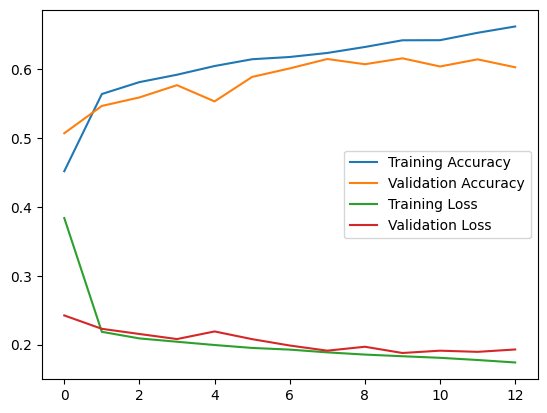

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print the actual and predicted data side by side
for i in range(len(y_test)):
    print('Actual:', y_test[i], 'Predicted:', y_pred[i])

# Plot the accuracy and loss graphs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()